<a href="https://colab.research.google.com/github/freakezoide/lecturas-de-colab/blob/main/autos_modo_carga_csv_no_recomendable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se han truncado las últimas 5000 líneas del flujo de salida.
      2009    4390.92        Kia
      2009    4343.05  Chevrolet
      2009    7235.38     Nissan
      2009    9214.56      Tesla
      2009    5335.39 Volkswagen
      2009    7853.98        Kia
      2009   10956.50     Toyota
      2009    9524.63      Tesla
      2009    6588.46        BMW
      2009    9685.43      Honda
      2009    6094.73      Tesla
      2009    7163.70        Kia
      2009   11829.29  Chevrolet
      2009    2924.46     Nissan
      2009    8117.33 Volkswagen
      2009    6006.80     Toyota
      2009   10324.17    Hyundai
      2009    7669.64     Nissan
      2009    7649.42      Tesla
      2009    8355.52       Ford
      2009    3143.65      Tesla
      2009    8406.29 Volkswagen
      2009    6487.17      Tesla
      2009    7693.46  Chevrolet
      2009    8074.70       Ford
      2009    9932.53     Toyota
      2009    6051.52      Tesla
      2009   10033.04      Tesla
      2009    6

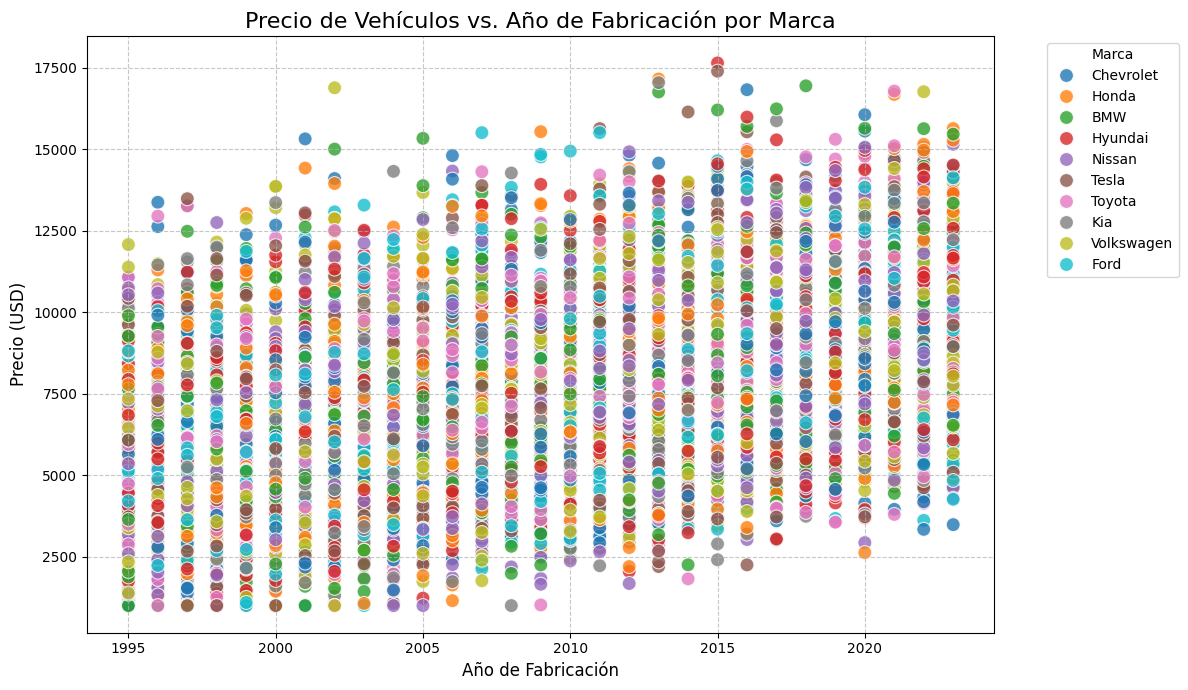

----------------------------------------------------------------
--- ESPERANDO TU DEFINICIÓN para la comparación de 'Calificación' ---
Por favor, dime qué columna de tus datos representa la 'Calificación':
Opciones: 'mileage_kmpl', 'engine_cc', 'owner_count', 'accidents_reported', 'service_history' (o alguna otra).
----------------------------------------------------------------


In [10]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Tus datos proporcionados en formato de cadena de texto
# NOTA: En un caso real, si el archivo está en tu Drive o en tu máquina,
# lo cargarías con pd.read_csv('ruta/a/tu_archivo.csv')
data = """make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,None,0,No
2014,17.59,1500,Petrol,4,5943.5,Honda,Manual,Black,None,0,Yes
2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
2023,12.5,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
2015,17.46,2000,Diesel,5,7701.84,BMW,Manual,Blue,None,0,Yes
2001,14.99,5000,Diesel,2,8730.52,Tesla,Manual,Silver,Partial,1,No
2020,19.59,4000,Petrol,4,10812.16,Chevrolet,Automatic,White,Partial,0,Yes
2013,21.25,1800,Petrol,2,10070.16,BMW,Automatic,Red,None,0,No
2017,20.91,5000,Diesel,5,9638.93,Toyota,Manual,Silver,Partial,0,Yes
2005,15.95,2500,Petrol,3,5543.9,Kia,Manual,Black,Full,1,Yes
2005,19.42,800,Petrol,4,5855.47,Hyundai,Automatic,Silver,Full,0,Yes
2018,23.18,3000,Diesel,3,9773.77,Hyundai,Automatic,Blue,Full,0,Yes
2015,20.23,4000,Diesel,5,9468.89,Kia,Manual,White,Full,1,Yes
1998,27.29,1800,Petrol,3,6491.29,Tesla,Automatic,Gray,None,2,Yes
2002,22.91,2000,Diesel,5,6202.99,Kia,Automatic,Red,Partial,1,Yes
2018,26.59,3000,Diesel,3,9921.66,Kia,Manual,Blue,Full,0,Yes
1997,5.54,1500,Diesel,2,1223.8,Chevrolet,Automatic,Black,Partial,1,Yes
2016,18.48,1000,Diesel,2,5591.11,Tesla,Automatic,Black,Full,1,Yes
2015,16.38,5000,Electric,5,13054.69,BMW,Automatic,Gray,Full,0,Yes
1996,17.38,3000,Petrol,2,5209.92,Chevrolet,Manual,White,Full,1,No
2018,13.98,1000,Petrol,3,4916.24,Tesla,Automatic,Gray,None,0,Yes
2006,19.98,1800,Petrol,3,5906.84,Kia,Manual,Gray,Full,0,Yes
2000,8.96,2000,Petrol,4,2626.29,Volkswagen,Automatic,Gray,None,0,No
1996,20.02,1800,Petrol,5,5167.78,Kia,Manual,Red,Partial,0,Yes
2022,14.14,2000,Petrol,2,7992.87,BMW,Manual,Black,Partial,1,Yes
2015,15.5,2000,Diesel,5,4481.1,Kia,Automatic,Blue,None,1,Yes
1995,20.19,1200,Petrol,2,5047.31,Honda,Manual,Black,Full,0,No
2006,18.39,1200,Diesel,4,7529.89,Tesla,Automatic,Red,None,1,Yes
2020,23.27,4000,Petrol,3,11362.28,Kia,Automatic,Silver,Full,0,Yes
2016,13.15,1200,Electric,3,8934.87,BMW,Automatic,Black,None,1,Yes
2023,17.6,1200,Diesel,1,9565.19,Chevrolet,Manual,Black,None,0,Yes
2006,22.44,1000,Diesel,5,3616.11,Tesla,Automatic,Black,None,0,Yes
2019,19.81,2500,Diesel,2,11251.36,Ford,Automatic,Silver,None,3,Yes
2011,20.13,5000,Diesel,1,10860.67,Nissan,Manual,Red,Full,0,Yes
2021,23.54,5000,Diesel,5,12256.44,Ford,Manual,Blue,None,0,Yes
2021,15.97,1500,Petrol,2,6901.08,Nissan,Automatic,Red,Full,0,Yes
2004,14.92,800,Diesel,4,1858.64,Ford,Manual,White,Partial,0,Yes
2022,20.88,2000,Petrol,5,6916.32,Ford,Manual,Gray,None,1,Yes
2022,17.25,1800,Petrol,2,8983.39,Honda,Manual,Blue,Full,0,Yes
2010,23.61,1000,Petrol,3,6654.31,Hyundai,Manual,Silver,Full,0,Yes
2009,19.85,2000,Petrol,5,6340.6,Kia,Automatic,White,None,1,Yes
2009,14.88,800,Petrol,2,3263.63,Toyota,Manual,Black,Full,0,Yes
2013,19.69,1200,Petrol,3,6564.08,Kia,Manual,Black,Full,0,Yes
2006,13.49,1500,Petrol,3,4548.99,Chevrolet,Automatic,Gray,Partial,0,No
2017,22.73,1200,Petrol,1,7396.53,Honda,Manual,Red,None,2,Yes
2014,11.01,2000,Petrol,2,6603.26,Toyota,Manual,Silver,None,0,Yes
2019,24.11,1500,Diesel,1,10558.87,Chevrolet,Automatic,Silver,Partial,0,Yes
1997,19.6,800,Petrol,1,3727.01,Kia,Automatic,Black,Partial,0,Yes
1999,17.18,1800,Electric,4,7775.41,Ford,Manual,Black,None,0,No
2013,21.82,1800,Petrol,1,9200.45,Honda,Automatic,Gray,Full,0,Yes
2001,20.56,4000,Diesel,1,10397.17,Honda,Manual,Gray,Partial,0,No
2015,24.65,3000,Petrol,4,8650.95,Honda,Manual,Gray,Full,0,Yes
2003,24.61,3000,Electric,4,9899.66,Tesla,Manual,Silver,None,0,No
2001,19.76,1800,Petrol,5,4395.65,Toyota,Manual,Silver,Partial,0,Yes
2012,13.64,3000,Diesel,1,8282.81,Ford,Manual,Red,Partial,0,Yes
1998,15.29,5000,Petrol,3,8083.56,Tesla,Manual,Black,Full,1,No
2019,17.64,2500,Diesel,4,8216.22,Kia,Manual,Silver,Partial,0,Yes
2022,23.41,800,Petrol,2,6903.49,Chevrolet,Automatic,White,Full,0,Yes
2008,15.72,2500,Diesel,5,5304.48,Honda,Automatic,White,Full,1,Yes
2012,16.14,3000,Diesel,5,6862.02,Volkswagen,Automatic,White,None,0,Yes
2020,27.24,1200,Electric,1,11413.96,Chevrolet,Manual,Blue,None,0,Yes
2003,17.48,4000,Diesel,3,8191.43,Ford,Manual,White,Full,1,Yes
2020,14.83,3000,Petrol,4,8248.22,Volkswagen,Manual,Silver,Full,1,No
2015,21.88,1000,Petrol,2,8819.21,Ford,Manual,Blue,Full,0,No
1996,17.72,2000,Diesel,1,7194.95,Nissan,Automatic,Gray,Partial,1,Yes
2014,11.05,1500,Petrol,3,5150.71,Tesla,Manual,Black,Full,0,Yes
2022,23.2,1200,Diesel,1,8327.32,Chevrolet,Automatic,Silver,Partial,1,Yes
2009,14.26,2000,Petrol,1,6737.61,Ford,Manual,White,Full,0,Yes
2022,18.22,5000,Diesel,5,12125.07,Hyundai,Manual,Gray,Full,1,No
2001,17.66,4000,Diesel,2,8567.0,Chevrolet,Manual,Gray,Partial,2,Yes
2006,19.15,1000,Petrol,2,5113.9,Ford,Manual,Black,None,1,Yes
2023,7.04,5000,Diesel,2,12985.97,Honda,Manual,Gray,None,1,Yes
2002,16.32,5000,Petrol,2,9291.24,Volkswagen,Manual,White,Partial,0,Yes
2009,23.62,5000,Petrol,4,10490.67,Honda,Automatic,Red,Full,1,Yes
1997,24.33,1800,Electric,4,6128.32,Ford,Manual,Blue,Full,0,Yes
2008,13.04,2000,Petrol,2,5764.27,Toyota,Automatic,Gray,Partial,0,Yes
2011,22.6,1500,Diesel,3,6549.19,Toyota,Manual,Black,Full,1,No
1998,14.19,2500,Diesel,4,4597.91,Toyota,Manual,White,Full,0,No
2012,16.13,1000,Diesel,4,5888.31,Nissan,Manual,Red,None,1,Yes
2002,16.39,2500,Petrol,3,5042.59,Ford,Manual,Blue,Full,0,Yes
1998,18.54,1000,Diesel,2,2193.27,Kia,Automatic,White,None,1,Yes
1996,23.01,800,Petrol,1,4351.08,Nissan,Automatic,Silver,Full,0,Yes
2000,19.32,1800,Petrol,4,4234.82,Ford,Automatic,Red,Full,1,Yes
2016,17.37,1000,Electric,1,10738.88,BMW,Manual,Black,Partial,1,Yes
2004,22.84,3000,Petrol,1,8821.93,Honda,Automatic,White,Full,0,Yes
1998,13.99,3000,Diesel,3,7058.39,Chevrolet,Manual,Black,None,1,No
2016,17.61,800,Petrol,2,5974.08,BMW,Manual,Silver,Partial,0,Yes
2023,22.98,1500,Petrol,1,8841.47,Toyota,Automatic,Black,Partial,0,Yes
2012,20.65,4000,Petrol,2,11386.9,BMW,Automatic,Red,Partial,0,No
2020,15.67,1800,Petrol,5,6962.45,BMW,Manual,Blue,None,1,Yes
2006,10.44,5000,Petrol,2,9338.5,Ford,Manual,White,None,0,Yes
1996,19.55,2000,Petrol,3,5190.94,Tesla,Manual,Gray,Full,0,Yes
2004,10.11,1200,Diesel,3,3953.91,Chevrolet,Manual,Blue,None,0,Yes
1998,16.94,1800,Petrol,5,3280.74,Nissan,Automatic,White,Partial,0,Yes
2008,23.89,800,Petrol,3,6286.89,Nissan,Manual,Black,Partial,1,Yes
2010,20.98,3000,Petrol,2,10376.58,Ford,Automatic,Black,Full,0,Yes
2009,7.88,2000,Diesel,2,5115.91,BMW,Manual,Red,Full,1,Yes
2002,19.0,1000,Petrol,2,4968.68,Tesla,Automatic,Black,Partial,1,Yes
2008,16.4,1500,Electric,3,8391.33,Nissan,Manual,Silver,Full,2,Yes
2017,11.63,1500,Petrol,2,6147.01,Ford,Automatic,Red,Full,0,Yes
2022,19.68,4000,Petrol,4,10939.12,Hyundai,Automatic,White,Full,0,Yes
2019,15.54,4000,Petrol,5,7848.84,Hyundai,Manual,Black,Full,0,Yes
2002,15.57,1800,Petrol,4,5345.06,Hyundai,Manual,White,Partial,0,Yes
2015,18.62,1200,Diesel,2,7472.53,Hyundai,Manual,Black,Partial,0,Yes
2010,14.87,800,Petrol,3,2462.72,Volkswagen,Manual,Red,Full,1,Yes
2007,18.48,2000,Petrol,5,4981.61,Nissan,Automatic,Gray,Full,0,Yes
2012,15.03,3000,Petrol,4,7840.34,Hyundai,Manual,Silver,Full,0,Yes
2009,15.31,800,Petrol,2,5641.82,Volkswagen,Automatic,White,Partial,0,Yes
2015,22.96,800,Electric,3,8842.66,Volkswagen,Manual,Blue,Partial,0,No
2018,23.47,2500,Diesel,2,9419.87,Nissan,Manual,Black,Full,0,No
2020,9.46,2500,Petrol,4,7652.52,BMW,Manual,Red,Full,1,Yes
2019,21.74,1000,Petrol,4,5677.46,Volkswagen,Automatic,White,Full,1,No
2022,24.99,1200,Diesel,5,8662.69,Honda,Manual,Red,None,1,Yes
2022,25.79,1000,Diesel,3,7897.75,Ford,Manual,White,Full,2,Yes
2022,20.6,2000,Diesel,1,9866.21,Toyota,Manual,Silver,Partial,1,Yes
2007,12.71,3000,Petrol,2,8823.31,Chevrolet,Manual,Gray,Full,1,Yes
2003,21.15,3000,Petrol,3,7364.01,Nissan,Manual,Black,Full,0,Yes
2023,13.65,800,Diesel,1,8546.18,Volkswagen,Automatic,White,None,1,Yes
2009,16.29,4000,Diesel,3,7599.75,Ford,Manual,Blue,None,1,Yes
2007,19.92,3000,Diesel,2,9493.81,Tesla,Manual,Black,Partial,2,Yes
1995,13.98,4000,Petrol,2,8360.51,Toyota,Manual,Black,Full,1,No
2019,12.27,4000,Diesel,5,7168.89,Kia,Manual,Red,Partial,0,Yes
2001,20.33,2000,Petrol,4,4666.03,Kia,Automatic,Black,Partial,0,Yes
2003,27.34,1200,Petrol,4,5336.48,Hyundai,Automatic,White,Full,0,Yes
2018,24.22,800,Diesel,4,7016.61,BMW,Automatic,Silver,Partial,0,No
1995,21.54,3000,Diesel,5,6545.0,Ford,Automatic,White,Full,0,Yes
2006,22.9,5000,Diesel,4,9050.98,BMW,Manual,Gray,Full,0,Yes
2002,21.19,1200,Electric,3,7622.55,Chevrolet,Automatic,Black,Full,1,Yes
2018,20.25,2500,Diesel,4,7340.05,Chevrolet,Manual,Blue,Partial,1,Yes
2005,22.49,5000,Diesel,4,9640.03,Ford,Automatic,Gray,Full,0,Yes
2013,11.16,2000,Diesel,2,7490.07,Nissan,Manual,Blue,None,0,No
2011,19.0,1200,Petrol,5,3833.56,Ford,Manual,Gray,Full,1,Yes
2002,17.6,2000,Diesel,5,4314.29,Ford,Manual,White,Full,0,Yes
1997,18.39,1200,Petrol,4,2513.59,Hyundai,Manual,White,None,0,Yes
1997,15.69,4000,Diesel,1,9336.12,Toyota,Manual,White,Full,1,No
1995,20.6,800,Petrol,2,1488.02,Nissan,Manual,White,Full,0,Yes
2021,13.91,3000,Petrol,4,9960.68,Chevrolet,Automatic,Red,Full,1,No
1999,15.33,1800,Petrol,1,6778.35,Tesla,Automatic,White,Full,0,Yes
2004,14.73,1500,Diesel,3,5112.66,Chevrolet,Manual,Red,Partial,2,Yes
2001,22.32,800,Petrol,2,4655.34,Tesla,Manual,Black,Partial,0,Yes
2020,17.94,4000,Petrol,5,8012.16,Volkswagen,Automatic,White,Full,2,Yes
2003,15.7,4000,Diesel,1,9876.22,BMW,Manual,White,Full,1,Yes
2022,16.13,1800,Petrol,4,8344.84,Ford,Manual,Blue,Full,2,Yes
2001,18.02,4000,Petrol,1,9313.76,Chevrolet,Automatic,Black,None,0,Yes
2003,26.11,5000,Petrol,5,9329.93,Volkswagen,Manual,Black,None,0,Yes
2002,11.82,4000,Diesel,3,9081.22,Volkswagen,Manual,White,None,0,Yes
2006,21.38,2500,Diesel,1,7248.65,Tesla,Automatic,Black,Full,1,No
1996,20.36,3000,Diesel,4,6873.04,Ford,Automatic,Silver,None,1,Yes
1995,13.59,800,Petrol,1,3508.18,Kia,Manual,Gray,Partial,1,Yes
2010,25.33,1500,Petrol,3,6516.66,Honda,Automatic,Blue,Partial,1,Yes
2017,20.7,5000,Petrol,1,15872.61,Kia,Manual,Black,Partial,2,Yes
2017,15.46,5000,Electric,3,15287.96,Hyundai,Manual,Silver,Partial,0,Yes
2018,8.7,1500,Diesel,3,6477.7,BMW,Manual,White,Partial,1,Yes
1999,19.15,4000,Diesel,2,9058.47,Ford,Manual,Blue,Full,0,Yes
1997,17.78,1200,Electric,2,7185.76,Tesla,Manual,Gray,Full,1,Yes
2006,12.85,5000,Petrol,4,9244.95,Nissan,Manual,Blue,None,0,No
2002,12.78,5000,Petrol,4,9491.03,Kia,Automatic,Blue,Full,0,Yes
2016,22.34,800,Diesel,4,5779.98,Volkswagen,Manual,Silver,Full,1,Yes
2021,8.22,1800,Diesel,3,4914.53,Ford,Manual,Red,Full,0,Yes
1997,19.57,2500,Diesel,3,4723.77,Hyundai,Manual,Blue,Full,0,Yes
1995,17.06,1500,Diesel,2,5099.0,BMW,Automatic,Silver,Partial,0,No
1997,20.49,4000,Diesel,3,8792.4,Kia,Manual,Gray,Partial,0,Yes
1999,16.53,2000,Diesel,2,4195.33,Honda,Automatic,Red,Partial,0,Yes
2009,19.47,2000,Diesel,1,7042.82,Kia,Manual,Silver,Full,0,No
2008,14.29,1200,Petrol,4,3499.95,Ford,Manual,Silver,Full,0,Yes
1997,17.75,5000,Diesel,4,10036.61,Tesla,Automatic,Silver,Partial,0,Yes
1995,20.45,5000,Diesel,5,6562.53,Nissan,Automatic,Blue,Full,0,No
1999,18.75,1800,Diesel,2,4586.94,Nissan,Manual,White,None,0,Yes
2020,19.9,5000,Petrol,5,11867.57,Kia,Manual,Gray,Partial,1,No
2017,13.36,2000,Petrol,4,5109.32,Tesla,Automatic,Blue,Full,0,Yes
2008,15.05,1500,Petrol,5,4237.77,Chevrolet,Manual,Gray,Full,0,No
2001,15.13,1200,Electric,1,6621.91,Kia,Automatic,Gray,None,0,No
2021,16.62,1800,Petrol,5,5906.24,Volkswagen,Manual,Blue,Full,0,Yes
2003,24.79,2500,Petrol,1,7555.63,Volkswagen,Manual,Blue,Partial,1,Yes
2009,16.23,2000,Diesel,4,5516.44,Nissan,Manual,Blue,Partial,0,Yes
2009,12.28,1000,Diesel,3,3659.65,Nissan,Manual,Red,None,2,Yes
2020,20.71,800,Diesel,2,7180.43,BMW,Automatic,Red,Full,0,Yes
2004,24.73,1800,Electric,5,9413.59,Tesla,Automatic,Silver,Full,2,Yes
2022,11.69,1800,Diesel,1,9169.91,Ford,Manual,Black,Full,0,Yes
2007,27.86,2000,Diesel,4,8307.23,Hyundai,Manual,Gray,Partial,1,Yes
2013,20.08,1200,Petrol,4,5484.11,Ford,Manual,Black,Full,0,No
2001,23.17,800,Petrol,3,3959.19,Nissan,Automatic,White,Partial,0,Yes
2011,25.34,1500,Diesel,4,6548.13,BMW,Manual,Silver,Partial,0,No
2014,22.86,1500,Petrol,4,4960.39,Hyundai,Manual,Gray,Partial,0,Yes
2023,17.45,5000,Diesel,3,13977.93,Tesla,Manual,White,Full,0,Yes
1998,24.09,1000,Petrol,4,3115.8,Nissan,Manual,Red,Partial,1,No
1999,19.27,3000,Petrol,1,7518.48,Tesla,Automatic,Blue,None,1,Yes
2017,23.45,2000,Petrol,5,7691.52,Ford,Manual,White,Full,1,Yes
2001,24.0,1200,Diesel,5,2957.44,Tesla,Manual,White,Partial,0,Yes
2007,12.55,800,Petrol,1,3914.74,Nissan,Manual,Red,Partial,0,No
2009,21.97,1200,Petrol,5,5076.83,BMW,Manual,Silver,Full,0,Yes
2005,17.09,3000,Diesel,4,7137.36,Honda,Manual,Blue,Full,0,Yes
2023,18.69,1500,Electric,5,12130.73,Ford,Manual,Blue,None,0,Yes
1998,18.64,1200,Petrol,5,2879.82,Tesla,Automatic,Silver,Partial,0,No
2007,18.43,1500,Diesel,4,5446.82,Hyundai,Automatic,Gray,Full,0,Yes
2001,25.62,1500,Diesel,5,6699.4,Honda,Automatic,Red,None,0,Yes
2021,11.17,1000,Petrol,4,5736.05,Chevrolet,Automatic,Gray,Partial,1,Yes
2013,9.39,1500,Diesel,3,5659.79,Hyundai,Manual,Red,Full,1,No
2016,8.33,4000,Petrol,3,6386.74,Kia,Manual,White,Partial,0,Yes
2022,23.35,1500,Petrol,5,6864.9,Honda,Automatic,Black,Full,0,Yes
1996,14.13,800,Diesel,3,2399.79,Chevrolet,Manual,Black,Full,1,Yes
2004,18.66,800,Diesel,5,2177.79,Toyota,Automatic,Red,Full,0,Yes
2007,17.43,800,Petrol,3,4454.46,Nissan,Automatic,Silver,Full,0,Yes
2019,13.57,1800,Diesel,5,6796.85,Nissan,Automatic,Gray,None,0,No
2015,22.26,2000,Diesel,2,9244.49,Hyundai,Automatic,Silver,Full,1,Yes
2000,17.36,2000,Diesel,1,5874.48,Volkswagen,Manual,Black,Full,1,No
2022,16.81,2000,Diesel,3,6659.85,Chevrolet,Manual,Gray,Partial,2,Yes
2022,19.16,4000,Diesel,4,11086.06,Volkswagen,Manual,Silver,None,0,Yes
2006,21.6,800,Petrol,1,5172.28,Volkswagen,Automatic,Silver,Full,2,No
2006,13.21,5000,Petrol,5,8117.19,Toyota,Manual,Gray,None,1,Yes
2014,22.36,2000,Diesel,1,8401.5,Tesla,Manual,Blue,Full,0,Yes
2005,25.25,3000,Diesel,4,7333.1,Chevrolet,Automatic,Gray,Full,1,Yes
2020,10.87,3000,Petrol,4,7986.23,Honda,Manual,Silver,Full,1,Yes
2017,19.39,1200,Petrol,5,5119.76,Ford,Manual,Blue,Full,1,Yes
2022,16.48,1800,Diesel,3,9315.03,Kia,Manual,Gray,None,1,Yes
2019,21.5,5000,Petrol,3,13095.73,Ford,Automatic,Blue,None,0,Yes
2001,11.92,1500,Petrol,2,4500.31,Tesla,Automatic,Gray,Partial,1,No
1995,26.14,800,Petrol,4,3403.0,BMW,Automatic,Black,Full,1,Yes
1995,9.96,4000,Petrol,2,5470.93,Chevrolet,Manual,Blue,Full,1,Yes
2019,16.78,1800,Petrol,4,7977.88,BMW,Automatic,Red,Partial,0,Yes
2021,20.17,1000,Petrol,2,10722.17,Honda,Manual,White,Full,1,Yes
2019,14.57,1000,Diesel,3,5035.78,Chevrolet,Manual,Blue,Full,0,Yes
2014,13.78,2500,Petrol,4,6229.3,Tesla,Manual,Red,Full,0,No
2007,19.11,1500,Diesel,3,4944.42,Toyota,Manual,Red,Full,0,Yes
2003,18.39,800,Diesel,1,5055.62,Hyundai,Manual,Silver,Full,1,Yes
1997,18.03,1800,Petrol,3,4177.78,Nissan,Automatic,Red,Full,0,Yes
2001,22.29,1000,Petrol,4,3210.27,Tesla,Manual,Silver,Full,2,Yes
2000,16.03,2500,Diesel,1,7159.23,Toyota,Automatic,Red,Partial,0,Yes
2002,19.6,4000,Petrol,2,9439.56,Ford,Automatic,Black,Full,0,Yes
2021,15.47,800,Petrol,5,6328.71,Honda,Manual,Black,Full,0,Yes
2003,13.75,1000,Petrol,4,3144.73,Ford,Automatic,Black,Full,1,No
1999,16.58,2000,Petrol,5,3698.34,Ford,Automatic,Black,Full,0,No
1995,15.51,3000,Diesel,5,4076.74,Ford,Manual,Gray,Partial,0,No
2013,15.76,2500,Diesel,1,8725.91,Toyota,Manual,Black,Full,0,Yes
2004,23.83,4000,Petrol,2,8816.8,Ford,Automatic,Red,None,0,Yes
2006,16.73,1000,Electric,3,8395.17,Honda,Manual,Blue,None,0,Yes
2018,14.69,4000,Petrol,1,11988.09,Volkswagen,Manual,Blue,None,3,No
2009,18.14,1500,Diesel,2,6400.47,Nissan,Manual,Blue,None,0,Yes
2021,18.52,1200,Diesel,3,6669.8,Tesla,Manual,Black,Partial,1,Yes
2016,12.07,2500,Diesel,3,9136.35,Kia,Automatic,Black,None,0,Yes
2018,16.51,1800,Petrol,2,7232.83,Chevrolet,Automatic,Red,Partial,1,Yes
2003,16.31,1800,Diesel,3,4156.57,Toyota,Manual,Gray,Full,0,Yes
2014,17.14,1000,Petrol,4,4747.56,Chevrolet,Automatic,Blue,Partial,0,Yes
2011,21.63,2000,Petrol,4,7472.23,Tesla,Manual,Gray,Partial,0,Yes
2011,18.68,2000,Petrol,1,9225.02,Tesla,Manual,Silver,Full,0,Yes
2020,24.14,1500,Diesel,3,9107.15,Kia,Manual,Black,Partial,1,Yes
2014,17.94,1800,Petrol,3,5543.51,Chevrolet,Automatic,White,None,1,Yes
2006,26.88,2500,Petrol,2,8217.09,Honda,Automatic,White,Partial,1,Yes
2001,15.7,3000,Petrol,4,5452.33,BMW,Manual,White,Full,1,Yes
1996,14.15,2000,Petrol,5,3395.55,Tesla,Manual,Red,Full,0,No
1997,20.74,1800,Petrol,1,5346.39,BMW,Manual,Silver,Partial,1,Yes
2011,24.82,1200,Electric,4,9603.61,Tesla,Automatic,Black,Full,0,Yes
1999,11.11,2500,Petrol,2,4877.33,Nissan,Automatic,Red,Partial,0,Yes
2011,17.02,3000,Petrol,1,8247.67,BMW,Manual,Blue,Full,1,Yes
2018,14.95,1200,Diesel,5,6501.41,Volkswagen,Manual,Blue,Full,1,Yes
2011,18.71,1800,Diesel,1,7464.01,Toyota,Manual,Black,None,1,No
2021,18.05,1000,Diesel,4,7100.61,Kia,Automatic,Gray,Full,1,Yes
2011,24.73,5000,Diesel,5,9865.43,Toyota,Automatic,Black,None,0,Yes
1996,17.46,5000,Petrol,2,8441.87,Kia,Automatic,White,None,1,Yes
1996,24.87,1500,Diesel,1,4267.19,BMW,Automatic,Silver,Full,0,Yes
2022,16.42,1500,Diesel,4,6146.92,Tesla,Manual,White,None,0,No
2016,22.63,3000,Diesel,2,9338.81,Tesla,Automatic,Silver,Partial,0,Yes
2017,19.14,1200,Electric,5,7783.0,Volkswagen,Automatic,Red,Full,0,Yes
1999,26.65,1800,Diesel,1,6608.71,Chevrolet,Manual,Red,Full,1,No
1995,10.61,1800,Diesel,3,2124.15,Tesla,Automatic,Gray,None,0,No
1995,12.18,1000,Petrol,4,1000.0,Ford,Automatic,Silver,Partial,0,Yes
2013,27.16,4000,Petrol,4,10826.27,Nissan,Automatic,Red,Full,1,Yes
1996,14.33,1500,Electric,3,8231.07,BMW,Automatic,Silver,Full,1,Yes
2015,14.65,4000,Diesel,2,10884.89,BMW,Manual,Gray,Partial,1,Yes
2006,13.62,4000,Petrol,4,8318.11,Kia,Automatic,Gray,Full,0,No
2020,23.74,1000,Diesel,2,7481.52,Chevrolet,Manual,Gray,Full,0,No
2000,11.73,4000,Petrol,5,4327.06,Volkswagen,Manual,Red,Partial,0,No
2017,18.11,4000,Diesel,3,10423.83,Nissan,Manual,Gray,Partial,1,No
1998,16.67,1000,Diesel,2,2578.19,Kia,Manual,Blue,Full,0,No
2017,23.18,2000,Petrol,5,8254.88,Honda,Manual,Black,Partial,0,No
2005,15.18,4000,Petrol,1,11043.7,Nissan,Manual,Red,Full,2,No
2018,20.08,1500,Petrol,4,5849.54,Nissan,Manual,Red,Partial,0,Yes
2021,12.14,1000,Diesel,3,5986.14,Chevrolet,Manual,Blue,Full,0,Yes
2011,29.37,2500,Diesel,1,8463.91,Nissan,Automatic,White,Partial,0,Yes
2000,16.8,4000,Diesel,1,9744.49,Volkswagen,Automatic,Blue,Partial,0,Yes
2018,18.04,2000,Diesel,1,10013.68,Tesla,Manual,Red,Full,0,Yes
1999,26.27,1500,Petrol,2,6222.49,BMW,Automatic,Blue,Partial,0,No
2014,15.07,800,Petrol,4,4827.66,Honda,Manual,Blue,None,0,No
1996,26.34,1500,Diesel,3,4666.49,Tesla,Manual,Gray,None,0,Yes
2000,15.94,1200,Electric,4,6607.53,Kia,Manual,Blue,Partial,0,Yes
2016,21.36,2500,Petrol,4,7839.37,Tesla,Automatic,Silver,None,0,No
2005,15.14,5000,Petrol,4,9093.77,Volkswagen,Manual,Blue,Partial,1,Yes
2010,11.22,1800,Petrol,5,5700.81,Ford,Manual,Blue,Full,0,No
2010,20.07,1200,Diesel,5,5390.65,Tesla,Automatic,Red,Partial,0,Yes
1995,21.2,1000,Petrol,5,1623.57,Nissan,Manual,Silver,None,0,Yes
2003,11.42,1000,Electric,5,7025.46,Tesla,Manual,White,Full,0,No
2022,16.46,1800,Petrol,4,6679.71,Hyundai,Manual,Silver,Full,1,Yes
2021,24.0,3000,Petrol,4,11863.98,Kia,Manual,Silver,None,0,Yes
2000,21.0,3000,Petrol,3,5620.37,Hyundai,Manual,Silver,Partial,0,Yes
2010,16.02,1800,Diesel,3,5877.78,Kia,Automatic,Red,Full,1,No
2023,15.01,1000,Petrol,3,7106.65,Toyota,Manual,Gray,Partial,0,Yes
1997,27.74,1500,Petrol,3,5376.83,Nissan,Manual,Black,Full,1,No
2014,10.77,2500,Petrol,3,7225.04,Nissan,Automatic,Red,Full,0,Yes
2022,17.7,2000,Diesel,5,8597.51,Nissan,Manual,Red,Full,0,Yes
2021,10.68,5000,Petrol,4,11773.67,Honda,Automatic,White,Full,0,Yes
1998,24.57,2500,Diesel,3,6813.8,Tesla,Automatic,Gray,Partial,1,No
2013,17.96,1800,Petrol,2,6599.46,Toyota,Automatic,White,Full,1,Yes
2020,18.89,1000,Electric,3,10486.5,Volkswagen,Manual,White,None,0,No
1997,31.84,3000,Diesel,3,7329.53,Chevrolet,Automatic,Black,Partial,0,Yes
2013,15.03,1000,Petrol,4,5793.77,Toyota,Manual,Silver,Full,0,Yes
2014,26.74,3000,Electric,5,13151.17,Hyundai,Automatic,Black,Full,1,Yes
2001,16.05,2500,Petrol,1,6804.34,Honda,Manual,Silver,None,0,Yes
2014,16.83,1200,Diesel,4,5843.69,Toyota,Manual,Black,Partial,1,No
2003,31.19,1500,Petrol,5,5627.02,Toyota,Automatic,Gray,Full,1,Yes
1995,17.19,2500,Petrol,2,5392.91,Hyundai,Automatic,Red,Full,0,Yes
2002,11.13,1500,Petrol,1,4565.23,BMW,Automatic,Red,Full,0,Yes
2001,19.41,4000,Diesel,5,6246.07,Hyundai,Manual,Silver,Partial,1,Yes
2012,17.14,2500,Petrol,5,5845.1,Kia,Manual,Silver,Partial,0,Yes
2002,19.84,800,Diesel,4,3376.86,Toyota,Automatic,Silver,None,0,No
1995,17.33,800,Petrol,5,2862.5,Honda,Manual,Blue,None,2,Yes
2005,29.08,1500,Diesel,3,6732.29,Honda,Manual,White,Full,0,Yes
2022,20.78,4000,Diesel,5,11832.04,Hyundai,Manual,Blue,None,0,Yes
2019,12.63,1500,Diesel,1,5772.35,Nissan,Manual,Blue,None,0,Yes
2019,18.62,1800,Diesel,5,8047.7,Volkswagen,Automatic,Red,Partial,0,No
2012,14.0,800,Petrol,2,5737.28,Chevrolet,Manual,Gray,Full,0,Yes
2017,16.76,1000,Petrol,3,7000.67,Nissan,Manual,Red,Full,0,Yes
2004,13.45,1500,Petrol,1,3420.68,BMW,Manual,Silver,Full,0,No
1997,28.54,1500,Electric,1,8730.06,Hyundai,Manual,Red,Full,1,Yes
2001,14.54,5000,Diesel,4,7746.61,Chevrolet,Manual,Silver,None,1,Yes
2022,21.44,2000,Diesel,4,8982.92,Nissan,Automatic,Gray,None,0,Yes
2010,16.38,2000,Diesel,3,6875.71,Volkswagen,Automatic,Gray,Partial,2,No
2020,12.21,3000,Electric,1,13799.51,Nissan,Automatic,Blue,Partial,0,No
2010,18.99,4000,Diesel,2,9799.57,Chevrolet,Automatic,White,Full,1,No
2019,20.0,800,Diesel,5,6170.91,Honda,Automatic,Red,Partial,0,Yes
2014,20.79,800,Diesel,5,4698.26,BMW,Automatic,Blue,Partial,0,Yes
2022,5.0,2000,Diesel,5,6973.21,Nissan,Manual,Gray,Full,0,Yes
2011,11.83,1500,Diesel,4,5407.93,BMW,Manual,Silver,Partial,1,Yes
1996,22.79,1500,Diesel,1,4558.78,Volkswagen,Automatic,Red,Full,0,Yes
1995,13.38,800,Diesel,1,3244.58,Tesla,Automatic,Gray,Full,0,Yes
2010,19.01,4000,Petrol,2,8797.33,Kia,Manual,White,Partial,0,Yes
2006,11.71,1200,Diesel,4,4699.05,Tesla,Automatic,Red,Partial,0,Yes
1999,21.66,1800,Diesel,2,6213.96,Chevrolet,Manual,Silver,Partial,0,Yes
1999,22.66,5000,Petrol,1,11672.95,Tesla,Automatic,Blue,Partial,1,No
2021,21.66,800,Petrol,5,6767.8,Chevrolet,Automatic,Gray,Full,0,Yes
2017,23.16,3000,Diesel,4,9450.66,Honda,Automatic,Blue,None,0,No
2003,25.82,1200,Diesel,4,3289.32,Kia,Manual,White,Partial,1,Yes
2003,12.13,800,Petrol,4,3470.5,BMW,Automatic,White,None,0,Yes
1997,14.06,5000,Petrol,5,6900.79,BMW,Automatic,Blue,None,0,No
2013,22.49,2000,Diesel,4,6228.83,Nissan,Automatic,Black,Full,0,Yes
2010,23.65,800,Petrol,3,6190.33,Kia,Manual,Blue,None,0,Yes
2010,14.63,1200,Petrol,4,3932.02,Tesla,Manual,Silver,None,1,No
1997,14.28,1800,Diesel,5,3031.19,Hyundai,Manual,Red,Full,1,Yes
2014,14.74,1500,Diesel,4,6245.4,Ford,Manual,Black,Full,0,No
2018,9.97,2500,Electric,3,11243.45,Toyota,Manual,Blue,None,1,Yes
2016,11.64,2000,Petrol,3,7798.33,Hyundai,Manual,Red,Full,0,Yes
2018,11.76,1200,Petrol,4,4761.54,Ford,Manual,Gray,None,0,Yes
1995,16.53,3000,Petrol,1,6329.7,Ford,Automatic,White,Full,0,Yes
2018,19.35,3000,Petrol,1,10773.75,BMW,Manual,Gray,Partial,0,Yes
2014,20.17,1000,Petrol,2,5134.6,Volkswagen,Manual,Blue,Partial,0,Yes
2005,15.46,2500,Diesel,3,5452.62,BMW,Manual,Black,None,0,Yes
2011,15.58,800,Petrol,1,4732.28,Hyundai,Automatic,Silver,Partial,0,Yes
2002,18.62,1000,Electric,2,5334.5,Nissan,Manual,Red,Full,0,Yes
1998,10.52,3000,Petrol,1,5823.76,Hyundai,Manual,Gray,Full,1,Yes
2000,22.8,800,Diesel,4,3347.21,Toyota,Automatic,Red,Full,1,Yes
2002,24.43,1000,Electric,3,7791.9,Chevrolet,Automatic,Blue,Partial,0,Yes
2014,14.87,800,Petrol,1,5524.24,Honda,Manual,Silver,Full,0,Yes
1997,16.01,1800,Petrol,4,2711.71,Kia,Manual,Silver,Full,0,Yes
2010,24.22,2500,Diesel,2,8436.07,BMW,Manual,White,Partial,0,Yes
2019,17.38,2000,Diesel,4,6827.71,Hyundai,Manual,Blue,Full,0,Yes
1997,20.94,2000,Diesel,2,3102.34,Hyundai,Manual,Gray,None,0,No
2019,17.54,2000,Petrol,1,7989.7,BMW,Manual,Red,Full,0,Yes
2023,25.78,3000,Diesel,5,10251.05,Honda,Manual,White,Partial,3,Yes
2012,20.45,1800,Diesel,4,6344.29,Tesla,Manual,Red,None,1,Yes
2008,20.74,5000,Petrol,5,10279.56,Toyota,Automatic,Gray,None,1,Yes
2012,20.83,2500,Electric,3,11565.2,Volkswagen,Manual,White,Partial,1,Yes
1996,15.22,1200,Diesel,5,2199.49,Kia,Automatic,Gray,Full,3,Yes
2016,15.68,4000,Diesel,3,10269.67,BMW,Automatic,Blue,Partial,0,Yes
1997,21.85,5000,Diesel,1,10166.87,Kia,Automatic,Gray,None,1,Yes
2010,18.63,1200,Diesel,1,5752.19,Volkswagen,Manual,White,Full,0,Yes
2023,12.11,2000,Petrol,4,7365.77,Volkswagen,Manual,White,Full,0,No
2003,27.37,1200,Diesel,5,3410.03,Ford,Manual,Silver,Partial,0,Yes
1998,22.89,800,Diesel,3,4254.63,Tesla,Automatic,Gray,Partial,1,Yes
1995,18.19,800,Diesel,3,1580.08,Toyota,Manual,Silver,Full,0,Yes
1998,16.63,1200,Electric,5,6795.7,Volkswagen,Manual,Gray,Full,1,No
1995,18.99,1500,Petrol,1,4624.08,Chevrolet,Manual,Red,Full,0,Yes
2008,20.59,1000,Petrol,1,7210.96,Nissan,Manual,Silver,Full,0,No
2015,7.83,4000,Diesel,3,8016.6,Chevrolet,Automatic,Blue,None,0,Yes
2010,28.56,3000,Diesel,4,10473.18,Kia,Manual,Blue,Full,2,Yes
2014,14.05,1200,Petrol,1,5401.81,Toyota,Automatic,White,Full,0,Yes
2018,17.99,2500,Diesel,2,8955.0,Honda,Manual,Red,None,0,Yes
2002,18.17,1500,Petrol,3,3327.22,Ford,Manual,Blue,Full,2,Yes
2001,27.98,1800,Petrol,5,5129.22,Toyota,Manual,White,Full,1,Yes
1997,17.56,1500,Electric,5,5666.85,Hyundai,Automatic,Red,None,0,Yes
2011,25.94,4000,Petrol,3,8375.68,Hyundai,Automatic,Blue,Full,1,No
1995,20.03,2500,Electric,3,8448.92,Kia,Automatic,Black,None,1,Yes
2010,13.19,1500,Petrol,1,6753.16,Chevrolet,Manual,White,Partial,1,No
2006,18.67,3000,Petrol,3,6682.44,Nissan,Automatic,Blue,Full,0,Yes
2021,17.41,1000,Diesel,3,6354.68,Volkswagen,Manual,Black,Partial,0,Yes
2013,12.58,2500,Diesel,2,7387.87,Chevrolet,Manual,Gray,Partial,0,Yes
2016,19.79,800,Petrol,5,6527.82,Kia,Automatic,White,None,1,Yes
2017,18.11,3000,Petrol,1,10321.84,Volkswagen,Manual,Blue,Full,2,Yes
2016,20.78,2000,Diesel,4,6747.2,Honda,Manual,White,None,0,Yes
2008,18.97,1800,Petrol,1,5979.11,Kia,Manual,Silver,None,1,Yes
2000,14.74,4000,Diesel,5,4958.56,Hyundai,Automatic,Gray,Full,0,Yes
2000,21.84,4000,Petrol,4,7895.98,Kia,Manual,Black,Full,0,Yes
2007,14.88,1200,Diesel,3,4652.17,Nissan,Manual,Red,Full,1,No
2013,5.0,4000,Petrol,2,7739.95,Toyota,Manual,Red,Full,1,Yes
2016,18.64,4000,Diesel,2,9620.4,Hyundai,Automatic,White,Full,0,Yes
2002,15.23,1000,Diesel,5,2999.6,Tesla,Manual,White,Full,2,Yes
2021,19.91,1800,Petrol,5,8117.31,Ford,Automatic,Silver,Partial,1,Yes
2021,27.99,1000,Diesel,2,8120.11,Ford,Automatic,Black,Full,0,Yes
1996,28.14,800,Petrol,4,3884.66,Chevrolet,Manual,White,None,0,Yes
2015,17.17,2500,Petrol,4,7357.97,Chevrolet,Manual,Red,Full,0,Yes
1995,13.87,1500,Petrol,1,6663.51,Honda,Manual,Black,Full,1,No
2022,20.92,1800,Diesel,3,8327.87,Tesla,Automatic,Black,Full,1,Yes
2009,16.15,1500,Petrol,4,6313.69,Hyundai,Manual,Silver,Partial,0,Yes
1995,19.96,2000,Diesel,3,5110.71,Volkswagen,Manual,Gray,Partial,0,Yes
1999,14.7,1000,Diesel,5,1471.29,Toyota,Automatic,White,Partial,0,No
2022,19.25,3000,Petrol,4,10100.01,BMW,Manual,Black,Full,0,Yes
2023,13.94,1500,Petrol,4,6715.2,Tesla,Manual,Silver,None,1,Yes
2010,23.92,3000,Petrol,4,7251.22,Volkswagen,Automatic,Red,Full,0,Yes
2013,15.05,1200,Petrol,1,6547.69,Volkswagen,Automatic,Silver,Full,0,Yes
1998,21.31,1800,Petrol,5,3426.82,Nissan,Manual,Silver,Partial,2,Yes
1997,11.68,1200,Diesel,2,3101.66,Toyota,Automatic,Gray,Partial,1,Yes
2011,21.91,2500,Diesel,1,8858.45,Toyota,Manual,Silver,Full,0,Yes
2011,13.17,1200,Petrol,1,5708.22,Chevrolet,Manual,White,Full,0,Yes
2006,19.31,3000,Diesel,4,6162.9,Kia,Automatic,Silver,Full,3,Yes
2022,23.12,4000,Petrol,1,14194.67,Chevrolet,Manual,Red,Full,1,Yes
2023,17.0,1000,Diesel,2,7317.48,Tesla,Manual,Black,Partial,0,Yes
2008,12.85,1200,Electric,1,8663.79,Kia,Manual,Blue,Partial,0,Yes
2015,20.48,2500,Petrol,1,9159.89,Nissan,Automatic,Gray,Partial,1,Yes
2000,13.8,1800,Diesel,4,3349.74,Nissan,Manual,White,None,1,Yes
1997,15.98,5000,Diesel,5,8066.2,Nissan,Manual,Blue,Full,0,No
2022,19.33,2500,Diesel,2,11175.52,Chevrolet,Manual,Gray,Partial,0,Yes
2003,24.8,1000,Petrol,4,2767.87,Chevrolet,Automatic,Gray,Full,1,Yes
1999,18.13,1500,Petrol,1,4085.21,Chevrolet,Manual,Silver,Partial,1,Yes
2018,18.11,800,Petrol,2,6145.02,Honda,Manual,White,Partial,1,No
2023,21.69,1800,Petrol,3,7864.8,Ford,Manual,Red,Partial,0,Yes
2011,18.25,3000,Diesel,1,11255.71,Nissan,Manual,Blue,Full,0,Yes
2008,21.18,800,Petrol,5,3493.36,Volkswagen,Automatic,Black,Full,1,Yes
2015,23.39,2500,Diesel,1,10181.84,Toyota,Automatic,Gray,None,2,Yes
1997,16.36,2500,Petrol,5,3879.13,Tesla,Manual,Red,None,2,Yes
2022,5.0,2500,Petrol,3,5013.52,Chevrolet,Manual,Red,Full,1,No
1995,13.91,800,Diesel,4,1112.71,Kia,Manual,Blue,Partial,1,Yes
2014,24.04,1200,Petrol,4,5014.68,Toyota,Manual,Black,Full,1,Yes
2023,17.83,1000,Diesel,4,6820.62,Volkswagen,Manual,White,Partial,0,Yes
2015,16.3,1800,Petrol,2,7007.8,Honda,Automatic,Red,Partial,0,Yes
2017,23.83,1000,Petrol,5,5044.26,Nissan,Manual,White,Full,0,Yes
1995,17.49,1800,Petrol,1,4835.33,Hyundai,Automatic,Red,Full,0,Yes
1997,7.54,1800,Petrol,2,3126.5,Volkswagen,Manual,Silver,Partial,1,Yes
2012,10.47,1500,Electric,2,9727.88,Tesla,Manual,Gray,Full,0,Yes
2019,20.09,2500,Petrol,1,10472.18,Nissan,Automatic,Red,Partial,1,Yes
2004,17.67,5000,Diesel,3,11852.06,BMW,Manual,White,Full,1,No
2016,25.27,2000,Petrol,4,8554.93,Tesla,Automatic,Black,None,0,No
2020,14.33,1000,Diesel,3,6609.52,Volkswagen,Manual,Blue,Full,0,Yes
1997,16.45,1500,Diesel,3,4271.3,Hyundai,Automatic,Black,Full,0,Yes
2002,13.58,2500,Electric,4,8813.4,Toyota,Manual,Red,Full,0,Yes
2008,15.4,4000,Diesel,3,7147.77,Kia,Manual,White,None,1,Yes
2018,8.54,4000,Electric,2,13643.1,BMW,Manual,Silver,Full,0,Yes
2012,16.07,1200,Diesel,1,4832.14,Kia,Automatic,Black,Partial,0,Yes
2009,17.74,800,Petrol,2,3166.99,Toyota,Automatic,Silver,Full,4,Yes
2016,17.32,4000,Electric,2,12765.97,BMW,Automatic,Blue,Full,1,Yes
2017,28.75,3000,Electric,5,12653.49,Hyundai,Automatic,Silver,Partial,0,Yes
1996,27.17,2500,Petrol,4,4509.78,Kia,Manual,Blue,Full,1,Yes
2021,14.25,2000,Electric,4,10767.86,Hyundai,Manual,Silver,None,2,Yes
2004,7.78,5000,Diesel,2,11069.21,Honda,Automatic,Red,Full,1,Yes
1996,17.5,2500,Electric,4,7342.58,Ford,Automatic,Silver,Full,2,Yes
2020,19.88,4000,Electric,5,13488.97,Hyundai,Automatic,Gray,Full,0,Yes
2011,13.7,2000,Diesel,1,6491.23,Chevrolet,Manual,Black,Full,0,Yes
2002,13.95,5000,Diesel,3,8148.13,BMW,Automatic,Black,Full,0,Yes
1995,25.91,1200,Petrol,4,3364.95,Kia,Manual,Black,Full,1,Yes
2003,16.71,1200,Petrol,2,3876.06,Volkswagen,Manual,Blue,Full,0,Yes
2005,21.31,1500,Petrol,4,4495.79,Nissan,Manual,Blue,None,0,No
2016,13.35,5000,Petrol,2,11171.2,Chevrolet,Manual,Red,Full,1,Yes
2010,17.72,5000,Petrol,3,9685.95,Ford,Automatic,Blue,None,2,Yes
2001,16.32,3000,Diesel,4,5890.38,Hyundai,Manual,Red,Full,1,Yes
2023,14.62,5000,Petrol,3,10677.72,Volkswagen,Manual,Silver,None,0,Yes
2004,23.78,4000,Diesel,2,10358.48,Hyundai,Manual,White,Partial,1,Yes
2017,11.06,3000,Diesel,5,5586.66,Ford,Automatic,Black,Full,0,Yes
2020,19.5,5000,Diesel,5,11146.68,Tesla,Manual,Black,None,1,Yes
1997,16.22,1000,Petrol,1,5065.0,Chevrolet,Manual,Red,Full,0,Yes
2012,20.07,1500,Petrol,2,7574.04,Hyundai,Manual,Blue,Full,0,Yes
2019,16.29,1500,Petrol,2,7453.51,Hyundai,Manual,Gray,None,0,Yes
2018,22.34,1000,Petrol,2,9472.04,Toyota,Automatic,Silver,Full,2,Yes
2007,13.3,3000,Diesel,5,6139.85,Tesla,Manual,Red,Partial,3,Yes
2022,23.79,1200,Diesel,5,7912.37,Kia,Manual,Black,None,0,Yes
2020,17.86,1000,Diesel,5,4916.43,Hyundai,Automatic,Gray,Partial,3,No
2001,11.36,2500,Petrol,4,1776.4,Chevrolet,Manual,Red,Partial,1,Yes
2019,21.4,800,Petrol,4,6245.42,Honda,Automatic,White,Partial,0,Yes
1998,17.01,2000,Diesel,5,4084.48,Ford,Automatic,White,Partial,1,No
2007,9.46,1200,Petrol,3,4297.54,Volkswagen,Manual,White,None,0,Yes
2014,19.66,1200,Diesel,4,4217.65,Hyundai,Manual,Silver,Partial,0,Yes
1995,23.03,1800,Diesel,4,7092.16,Kia,Automatic,White,Partial,2,No
2002,24.41,1200,Petrol,4,3324.4,Tesla,Automatic,Silver,Partial,0,Yes
2008,16.11,1500,Diesel,4,4885.05,Ford,Automatic,Gray,Partial,0,Yes
2010,18.73,1200,Diesel,1,6697.87,Toyota,Automatic,Red,None,0,Yes
2008,18.25,2500,Diesel,4,7359.57,BMW,Manual,Silver,Full,1,Yes
2006,25.45,1200,Petrol,3,4964.38,Honda,Manual,Black,Full,1,Yes
2013,13.95,5000,Diesel,1,12546.65,Volkswagen,Manual,Blue,Partial,0,Yes
2017,15.68,1500,Petrol,4,7699.64,BMW,Automatic,White,Full,2,Yes
2009,13.83,1000,Diesel,2,4450.77,Volkswagen,Automatic,Blue,None,0,Yes
2022,10.75,1000,Petrol,1,6484.65,Chevrolet,Manual,Red,None,0,No
1996,19.24,4000,Petrol,4,6098.83,Chevrolet,Manual,Silver,Full,0,Yes
1996,26.01,800,Petrol,3,3864.02,Toyota,Automatic,Silver,Full,0,No
2017,17.01,800,Petrol,5,3803.32,Honda,Manual,Blue,Partial,0,Yes
2016,13.59,5000,Petrol,4,11622.43,Chevrolet,Manual,Red,Full,1,No
2013,18.93,800,Petrol,2,5338.88,Hyundai,Manual,Blue,None,2,Yes
2019,20.95,1200,Diesel,3,6824.07,Chevrolet,Manual,Black,Full,0,Yes
2020,17.22,1000,Petrol,1,6470.42,Ford,Manual,White,None,0,No
2023,25.02,1200,Diesel,3,10302.79,Tesla,Manual,White,Full,0,Yes
2016,13.94,1800,Diesel,4,6274.46,BMW,Manual,Silver,Full,1,Yes
2020,16.57,4000,Petrol,2,10234.78,Tesla,Automatic,Gray,Full,1,Yes
2020,19.48,1000,Petrol,3,7014.74,Kia,Automatic,Red,None,0,No
2016,19.96,800,Petrol,3,4201.16,Volkswagen,Automatic,Red,Full,0,Yes
2011,18.24,2000,Electric,5,8079.95,Kia,Automatic,Silver,Full,1,No
2014,11.61,1200,Diesel,5,4618.49,BMW,Automatic,Red,Full,1,Yes
2004,29.69,2500,Electric,4,10833.01,Ford,Manual,Red,Full,1,Yes
2000,16.82,2000,Petrol,1,6813.55,BMW,Manual,White,Full,0,Yes
2009,18.55,2500,Diesel,1,9529.27,Chevrolet,Manual,Black,Full,0,Yes
2016,21.08,1800,Petrol,2,7853.83,Tesla,Manual,Black,None,0,Yes
2005,14.82,800,Diesel,4,4021.44,Honda,Manual,Silver,Full,0,Yes
2022,18.28,1200,Petrol,1,8997.42,Volkswagen,Automatic,Black,Full,1,Yes
1999,14.61,1200,Diesel,3,4147.26,Chevrolet,Automatic,Black,Full,0,No
1995,20.08,2500,Diesel,4,3326.41,Chevrolet,Manual,White,Full,0,No
2002,16.62,1200,Diesel,3,4253.85,Nissan,Automatic,Black,None,1,Yes
2015,19.34,1800,Petrol,2,7381.01,BMW,Manual,Black,Full,0,No
2022,12.77,1500,Diesel,4,7785.74,Chevrolet,Manual,Black,Full,0,Yes
2006,13.86,1500,Petrol,2,5319.96,Honda,Manual,Gray,None,0,No
2006,11.17,2500,Diesel,5,4493.04,Nissan,Automatic,Gray,Full,1,Yes
1999,14.45,800,Diesel,2,2872.79,Ford,Automatic,Blue,Full,0,Yes
2001,5.13,2500,Petrol,5,3047.57,Honda,Manual,Black,None,2,No
1998,16.46,3000,Diesel,4,5733.35,Hyundai,Automatic,Blue,Partial,2,Yes
2000,15.33,1200,Petrol,3,3861.46,Toyota,Manual,White,Full,0,No
2007,18.75,1200,Petrol,3,4798.85,Honda,Manual,Black,Partial,1,No
2014,18.22,1500,Petrol,3,6113.12,Kia,Manual,Red,Full,1,Yes
2009,24.29,2000,Diesel,2,6709.15,Kia,Automatic,Blue,Full,1,Yes
1997,30.97,2500,Diesel,4,7859.03,Tesla,Manual,Black,None,1,Yes
2017,23.69,800,Diesel,4,5717.16,Volkswagen,Manual,Gray,None,1,Yes
2002,15.73,1500,Diesel,5,3577.88,Volkswagen,Manual,Red,Partial,1,Yes
2014,15.53,2500,Diesel,4,7530.19,Chevrolet,Manual,Silver,Partial,0,No
2010,22.34,1000,Petrol,3,5854.69,Nissan,Manual,Blue,Full,0,Yes
2007,9.58,800,Diesel,4,2339.67,Toyota,Automatic,White,Partial,0,No
2012,16.42,800,Petrol,5,4465.5,BMW,Manual,Silver,Full,1,Yes
2022,16.81,5000,Diesel,4,13648.02,Chevrolet,Automatic,Red,Partial,0,Yes
2004,20.92,2000,Petrol,4,6185.12,Honda,Automatic,Blue,Partial,0,No
2013,21.07,1800,Electric,3,10512.2,Volkswagen,Manual,Blue,Partial,0,Yes
2011,14.28,800,Diesel,4,4611.63,Toyota,Manual,Black,Full,1,Yes
2018,15.93,5000,Diesel,2,12577.3,Volkswagen,Manual,Silver,Full,0,Yes
2013,20.23,1200,Petrol,5,4800.93,Chevrolet,Manual,Black,Full,0,Yes
2022,14.01,2500,Petrol,5,9544.98,Nissan,Manual,White,Full,0,Yes
2020,24.03,4000,Petrol,5,12316.91,Kia,Manual,Silver,Full,0,Yes
2017,21.05,4000,Diesel,4,9994.5,Chevrolet,Automatic,Blue,None,3,Yes
2020,18.86,2000,Diesel,2,9797.62,Honda,Manual,Red,Partial,0,Yes
1999,19.95,1200,Petrol,5,3410.93,Nissan,Manual,White,None,0,Yes
2020,15.67,800,Petrol,1,7109.74,Honda,Manual,Black,Partial,0,No
2015,14.87,1200,Petrol,3,7242.06,Ford,Automatic,Black,Full,1,Yes
2017,15.88,5000,Diesel,1,12971.93,Kia,Automatic,Gray,Full,0,Yes
2003,20.5,1000,Petrol,1,5564.77,Toyota,Manual,White,Full,0,Yes
2006,19.01,1800,Electric,5,8269.56,BMW,Manual,Silver,Partial,0,No
2015,15.89,3000,Petrol,1,8321.86,Tesla,Manual,White,Full,0,No
1995,21.75,1800,Diesel,1,5732.96,Tesla,Automatic,Silver,Full,1,No
2020,17.13,800,Diesel,2,5271.26,Hyundai,Manual,White,None,1,Yes
2020,14.53,1200,Petrol,3,7029.55,Chevrolet,Automatic,Gray,Full,0,Yes
1995,19.27,1800,Diesel,4,4205.85,Hyundai,Automatic,Gray,Partial,0,Yes
2009,12.93,2500,Petrol,5,6727.62,BMW,Manual,White,Full,0,Yes
1996,9.56,1800,Diesel,5,2773.44,Kia,Automatic,Blue,None,1,Yes
2016,17.97,5000,Diesel,1,15533.48,Tesla,Automatic,Silver,Partial,0,Yes
2010,14.71,1800,Petrol,4,3953.36,Nissan,Automatic,White,Full,1,No
2019,16.73,2500,Diesel,4,7988.38,Toyota,Automatic,Black,None,1,Yes
2002,13.17,3000,Diesel,4,6829.18,Ford,Manual,Black,Partial,1,Yes
2007,24.04,3000,Diesel,5,8477.88,BMW,Manual,Gray,None,0,Yes
2015,14.69,2500,Petrol,5,6089.63,Hyundai,Manual,Silver,None,2,Yes
1995,15.84,1200,Petrol,2,4537.03,Toyota,Manual,White,Full,1,Yes
2010,19.89,1000,Petrol,5,2823.02,Volkswagen,Manual,Silver,Full,1,Yes
2023,11.12,800,Electric,5,7078.82,Tesla,Automatic,White,Partial,0,No
2001,10.75,2000,Electric,2,8251.14,Honda,Manual,Blue,Partial,0,Yes
1999,19.9,4000,Petrol,5,7418.76,Hyundai,Manual,Red,None,0,Yes
2016,15.78,1200,Petrol,1,8247.5,Volkswagen,Automatic,Black,Full,0,Yes
2023,13.49,1800,Diesel,1,9561.19,Ford,Automatic,Gray,Full,1,Yes
2017,21.02,4000,Diesel,2,11034.3,Hyundai,Automatic,Silver,Partial,0,No
1997,13.94,4000,Diesel,2,8881.28,Volkswagen,Manual,Black,Full,1,No
2006,16.63,2500,Petrol,1,8096.09,Kia,Manual,White,Full,1,Yes
2020,13.52,1500,Petrol,4,7100.07,Hyundai,Manual,Black,Full,0,Yes
2010,19.52,1000,Petrol,5,5043.87,Tesla,Automatic,White,Full,1,Yes
2013,24.66,1000,Petrol,3,6066.57,Hyundai,Automatic,Silver,Partial,0,Yes
1999,8.69,1500,Diesel,3,4032.43,Volkswagen,Manual,Gray,Full,0,No
2016,18.56,800,Diesel,2,6570.83,Ford,Automatic,Gray,Full,1,Yes
2019,22.28,1500,Diesel,3,8580.99,Toyota,Automatic,Red,Partial,0,Yes
2023,15.89,2000,Petrol,4,9246.79,BMW,Manual,Blue,None,1,No
2008,12.34,2000,Diesel,3,5484.88,Chevrolet,Automatic,Blue,Full,1,Yes
2022,20.1,2500,Diesel,1,11403.23,Ford,Manual,Black,Partial,0,Yes
1999,23.01,1800,Petrol,2,5368.57,Nissan,Manual,Silver,Full,0,Yes
2009,22.45,4000,Diesel,3,9480.17,Tesla,Automatic,Silver,None,3,Yes
2011,19.83,1000,Diesel,5,4421.83,Honda,Automatic,Gray,None,0,Yes
2008,18.49,1000,Diesel,2,5308.57,Volkswagen,Automatic,Blue,Full,2,Yes
2014,13.5,1500,Petrol,4,5834.67,Ford,Manual,White,Partial,0,Yes
1999,22.33,1500,Diesel,1,4551.44,Kia,Manual,Blue,Full,0,Yes
2006,22.05,1500,Electric,3,9259.0,Chevrolet,Manual,Gray,None,0,Yes
2010,12.31,800,Diesel,1,4930.48,Hyundai,Automatic,Black,Full,1,Yes
2020,19.82,1500,Diesel,4,5136.96,Nissan,Manual,Blue,Partial,0,Yes
2020,21.26,1800,Petrol,3,8551.99,Hyundai,Manual,White,Partial,1,Yes
2010,22.41,4000,Diesel,2,12003.5,Toyota,Manual,Gray,Full,1,Yes
2015,17.63,1200,Diesel,2,7629.82,BMW,Manual,Black,Full,1,Yes
2001,13.71,1200,Diesel,5,2494.51,Toyota,Manual,White,Full,1,No
1998,15.49,1800,Petrol,4,3230.8,Volkswagen,Automatic,Red,Partial,0,Yes
1995,12.96,5000,Electric,3,12076.51,Volkswagen,Manual,Black,Partial,0,No
1999,17.74,2000,Diesel,1,5452.02,Hyundai,Automatic,White,None,1,Yes
2017,16.77,1200,Electric,1,10218.3,Hyundai,Manual,Blue,Partial,0,Yes
2020,28.73,800,Diesel,3,10117.69,Hyundai,Manual,Red,Partial,1,Yes
2004,22.47,5000,Diesel,4,11683.89,Chevrolet,Manual,White,Full,1,No
2016,22.85,3000,Diesel,4,8861.73,Kia,Automatic,Gray,Partial,1,Yes
1999,20.36,800,Diesel,1,5077.92,Honda,Automatic,Blue,Full,0,Yes
1998,16.16,1000,Petrol,3,4633.8,Nissan,Automatic,Red,Full,0,Yes
1996,16.62,1200,Petrol,3,3562.64,Ford,Automatic,Silver,Partial,1,Yes
2014,17.08,2000,Diesel,1,6959.04,Hyundai,Manual,Silver,Full,0,Yes
2004,18.94,1500,Electric,3,8367.16,Chevrolet,Manual,Red,Full,0,No
2020,19.95,1500,Diesel,3,7316.27,Honda,Manual,White,None,0,Yes
2013,18.0,4000,Petrol,2,10304.22,BMW,Manual,White,Partial,0,Yes
2020,16.55,2000,Petrol,2,7716.65,Toyota,Manual,Black,Full,0,Yes
1995,15.03,1000,Diesel,5,1000.0,Chevrolet,Manual,White,Full,1,Yes
2018,11.04,2500,Diesel,5,6108.29,Honda,Manual,White,None,0,Yes
1999,24.42,1200,Electric,4,7743.74,Tesla,Manual,Silver,Full,0,No
2007,29.03,4000,Diesel,2,11926.34,Nissan,Manual,Silver,None,0,Yes
1998,24.0,2000,Petrol,2,8114.07,Toyota,Automatic,White,Full,0,Yes
2010,11.7,3000,Diesel,2,7326.93,Honda,Manual,Blue,Partial,0,Yes
2018,21.94,800,Diesel,2,6155.3,Tesla,Manual,Silver,Full,0,Yes
2010,23.12,1000,Diesel,4,6066.37,Hyundai,Automatic,Gray,Partial,0,No
2017,15.98,2000,Petrol,1,6897.7,Hyundai,Automatic,Gray,Partial,1,Yes
1996,20.44,1200,Petrol,4,1069.5,Chevrolet,Automatic,Gray,Partial,2,No
2011,15.72,800,Diesel,1,6488.39,BMW,Manual,White,Partial,0,Yes
2022,25.64,2000,Petrol,5,7364.0,Volkswagen,Automatic,Silver,Full,0,No
2021,19.83,1800,Petrol,2,7952.98,Ford,Manual,White,None,0,Yes
2014,13.41,4000,Petrol,1,11255.99,Tesla,Manual,Red,Full,0,No
2018,21.35,2000,Electric,4,10744.59,Ford,Automatic,Silver,Full,0,Yes
2006,23.29,1800,Petrol,1,7036.06,Tesla,Manual,White,Full,0,Yes
2012,18.99,800,Diesel,3,3888.18,Toyota,Manual,Silver,Full,0,Yes
1997,20.4,800,Diesel,5,1565.97,Nissan,Automatic,Blue,Full,1,Yes
2022,17.65,800,Diesel,5,5032.71,Nissan,Automatic,Red,Partial,1,Yes
1995,12.33,2500,Diesel,2,4480.59,Chevrolet,Automatic,White,Partial,1,Yes
1995,17.24,2000,Petrol,2,5333.46,Toyota,Automatic,Red,Full,1,Yes
2023,20.62,1800,Petrol,4,8358.32,Honda,Automatic,White,None,1,Yes
2013,17.36,1500,Petrol,1,6977.46,Toyota,Manual,Red,Full,0,Yes
2005,22.0,3000,Diesel,3,7928.72,Nissan,Manual,Red,None,0,Yes
1999,16.04,3000,Electric,5,9972.33,Ford,Manual,Black,Full,1,No
2006,16.37,1800,Electric,1,9838.83,Volkswagen,Manual,White,Full,0,Yes
1997,22.16,1500,Diesel,3,5820.24,Toyota,Automatic,Silver,Partial,0,Yes
1995,19.11,1000,Electric,1,6384.48,Ford,Manual,Silver,Partial,0,Yes
1995,15.94,2500,Electric,2,8121.27,Honda,Automatic,Silver,Partial,0,Yes
2002,23.17,1800,Diesel,5,4362.67,Hyundai,Automatic,Red,Partial,1,Yes
2004,14.56,1200,Petrol,3,4443.54,Chevrolet,Manual,Blue,Partial,0,Yes
2005,14.37,4000,Petrol,2,9362.64,Kia,Manual,Silver,None,0,Yes
2006,5.0,4000,Electric,4,10453.62,Nissan,Manual,Gray,Full,0,Yes
2023,15.23,5000,Diesel,4,9842.1,Hyundai,Manual,Red,Full,0,Yes
2007,24.54,3000,Diesel,2,8010.1,Ford,Manual,Gray,None,0,Yes
2006,7.64,800,Petrol,3,3179.14,Chevrolet,Automatic,Gray,Full,0,Yes
2008,13.24,1200,Petrol,3,6357.67,Volkswagen,Manual,Silver,Full,2,No
1996,20.2,1000,Petrol,5,1719.97,Honda,Manual,Black,Full,0,Yes
2023,6.78,1500,Petrol,2,9143.69,Kia,Manual,Red,Partial,1,Yes
2013,15.45,1000,Electric,4,6371.4,Hyundai,Manual,White,Partial,0,No
2012,23.7,3000,Petrol,2,9789.46,Volkswagen,Automatic,Red,Full,1,Yes
1997,28.22,800,Diesel,1,4875.64,Tesla,Automatic,Gray,Full,0,Yes
2017,19.45,1500,Petrol,3,6539.85,Volkswagen,Manual,Black,Full,1,Yes
2011,13.37,1800,Petrol,1,7755.73,Chevrolet,Automatic,White,Full,0,Yes
2020,13.2,5000,Petrol,4,11408.12,Hyundai,Manual,Silver,Full,0,Yes
2002,18.72,1500,Electric,3,6191.38,BMW,Manual,Red,Partial,2,Yes
2023,19.4,3000,Diesel,4,7717.82,Tesla,Manual,Black,Full,0,Yes
2020,27.29,1000,Diesel,4,6113.58,Honda,Manual,White,Full,0,Yes
2004,22.85,4000,Electric,4,12375.22,Toyota,Manual,Gray,Full,0,Yes
2020,18.42,1000,Electric,5,8408.9,Ford,Automatic,Blue,None,0,Yes
1996,16.32,1000,Petrol,4,3294.1,Chevrolet,Manual,Red,Full,0,Yes
2013,33.07,1000,Petrol,4,6671.08,Toyota,Automatic,Gray,Full,0,Yes
2003,21.13,5000,Petrol,1,11664.22,Hyundai,Manual,Red,Full,0,No
2001,14.66,3000,Petrol,1,8818.84,Hyundai,Automatic,Gray,Full,0,Yes
1998,16.88,1200,Petrol,1,4238.43,Ford,Automatic,Silver,Partial,2,Yes
2020,13.61,5000,Petrol,3,13992.57,Toyota,Manual,Blue,None,0,Yes
2015,5.98,5000,Petrol,5,10046.75,Hyundai,Manual,Silver,Full,1,Yes
2012,19.56,3000,Diesel,3,7604.75,Tesla,Automatic,Blue,Partial,0,Yes
2007,26.91,2500,Diesel,5,5724.11,Volkswagen,Manual,White,None,0,Yes
2005,9.85,5000,Petrol,5,6891.58,Kia,Manual,White,None,1,Yes
2023,18.28,1500,Diesel,2,8330.01,Toyota,Automatic,Gray,Partial,0,No
2018,14.47,2500,Diesel,2,6956.0,Hyundai,Automatic,Red,Full,0,Yes
1998,20.61,3000,Petrol,2,8842.11,Honda,Automatic,Red,Partial,0,Yes
2019,17.14,2000,Diesel,5,9045.59,Toyota,Automatic,Gray,Partial,0,Yes
2015,11.2,2000,Petrol,5,3891.99,Ford,Manual,White,Partial,0,Yes
2023,13.09,1200,Petrol,3,6972.52,Nissan,Manual,Blue,None,0,No
2019,13.85,1800,Diesel,5,4149.78,Hyundai,Automatic,Silver,Partial,2,Yes
1998,24.72,5000,Petrol,4,10277.35,Volkswagen,Manual,White,Full,1,Yes
2004,24.47,1000,Petrol,4,5379.42,Chevrolet,Manual,White,Partial,0,Yes
1999,16.44,1800,Petrol,5,3420.53,Kia,Automatic,Black,Full,0,Yes
2003,24.14,1800,Electric,4,8745.76,Volkswagen,Manual,Red,Full,0,Yes
2018,17.13,2500,Diesel,5,6746.52,Kia,Automatic,Blue,Partial,2,Yes
1997,16.37,1500,Diesel,2,4207.8,BMW,Manual,Silver,Full,0,Yes
2011,18.29,2000,Diesel,5,6458.12,Chevrolet,Manual,Black,Full,0,Yes
1997,19.42,4000,Diesel,2,8093.82,Honda,Automatic,Black,Full,1,Yes
2010,15.22,1500,Petrol,1,7701.61,Honda,Automatic,Gray,None,1,Yes
1998,18.11,2000,Electric,4,6584.88,Kia,Manual,White,Full,1,Yes
2012,21.94,4000,Diesel,1,11013.72,Hyundai,Automatic,Red,Full,1,Yes
2011,18.65,5000,Petrol,4,8723.34,Kia,Manual,White,None,0,Yes
2001,18.21,800,Diesel,1,6757.5,Honda,Manual,Black,Partial,0,Yes
2018,20.47,3000,Diesel,5,6565.7,Honda,Manual,Black,Full,2,Yes
2017,21.33,800,Petrol,1,8323.39,Toyota,Manual,Silver,Partial,0,Yes
1999,17.69,1500,Petrol,4,4049.23,Honda,Manual,White,Full,1,Yes
2006,15.63,1200,Petrol,3,4469.87,Nissan,Automatic,White,Partial,0,Yes
2011,18.95,1500,Diesel,4,4683.53,Chevrolet,Automatic,Blue,Full,0,Yes
2017,10.03,2500,Petrol,3,6941.66,Honda,Automatic,Silver,Full,2,Yes
2007,16.95,4000,Petrol,5,7592.31,Ford,Automatic,Red,Full,1,Yes
2017,5.64,4000,Petrol,4,8103.28,Kia,Automatic,White,Full,1,Yes
2019,9.62,5000,Diesel,1,10279.13,Kia,Manual,White,Partial,1,No
1997,8.87,800,Electric,5,4297.29,Nissan,Manual,Red,Partial,1,No
2003,23.24,5000,Diesel,4,10792.44,Volkswagen,Manual,Silver,None,1,No
2011,18.07,800,Petrol,5,3570.45,Honda,Manual,White,Partial,2,Yes
2011,11.69,4000,Diesel,3,8908.49,Chevrolet,Manual,Red,Full,2,Yes
2014,20.46,1500,Diesel,5,6281.85,Toyota,Automatic,Blue,Partial,0,No
2010,22.94,1200,Diesel,1,5571.67,Kia,Automatic,White,Partial,0,No
2019,20.54,4000,Diesel,4,9097.06,Volkswagen,Manual,Red,None,0,No
2016,17.06,1800,Petrol,3,7056.08,Tesla,Automatic,Black,Partial,1,Yes
2007,19.16,2000,Petrol,5,4921.31,Kia,Manual,White,Full,1,Yes
2021,22.51,800,Petrol,2,7025.16,Kia,Manual,Blue,Full,0,Yes
2013,15.65,800,Electric,3,8532.75,Kia,Manual,Red,Partial,0,Yes
2011,18.15,2500,Diesel,3,7082.63,Tesla,Manual,Red,Full,0,No
1998,16.71,5000,Diesel,1,10547.4,Honda,Manual,White,Full,1,Yes
2006,9.93,3000,Diesel,1,9266.69,Volkswagen,Automatic,Black,Partial,2,Yes
2023,22.58,3000,Diesel,5,11659.71,Nissan,Automatic,Red,Full,1,Yes
2003,28.29,2500,Petrol,2,8859.46,Tesla,Manual,Red,Full,1,Yes
2013,13.63,4000,Petrol,3,7104.15,Honda,Manual,Black,Full,0,Yes
2006,22.81,800,Electric,5,7368.98,Tesla,Automatic,Blue,Partial,1,Yes
2003,13.79,1000,Electric,2,8559.75,Toyota,Automatic,White,Partial,0,Yes
2001,18.66,1200,Diesel,5,3356.6,Kia,Manual,Gray,Full,0,Yes
2022,25.54,1800,Diesel,3,8298.86,Kia,Manual,White,Full,0,No
2008,15.4,1500,Petrol,5,3787.71,Volkswagen,Automatic,White,Full,0,No
2014,17.93,1500,Petrol,1,8630.78,Volkswagen,Automatic,Silver,None,0,Yes
2013,8.99,3000,Petrol,1,7897.17,Hyundai,Automatic,White,Full,0,Yes
2020,14.68,3000,Diesel,4,7709.37,Toyota,Manual,Gray,None,0,No
2009,8.47,2500,Diesel,2,5863.16,Toyota,Automatic,Black,None,1,Yes
2010,20.15,800,Diesel,3,5075.27,Chevrolet,Manual,White,Full,1,No
2015,22.16,5000,Petrol,2,12586.52,BMW,Automatic,Gray,Partial,1,Yes
1999,16.89,1500,Petrol,1,3416.18,Volkswagen,Manual,Blue,Full,2,No
1997,19.43,800,Electric,3,5553.0,Ford,Automatic,Silver,None,1,Yes
2006,16.37,1800,Petrol,4,6861.54,Kia,Manual,Black,Partial,0,Yes
2019,21.7,1200,Diesel,1,8341.11,Volkswagen,Automatic,Black,Partial,0,Yes
2014,18.65,1200,Diesel,1,7649.48,BMW,Automatic,Blue,Partial,0,Yes
2021,8.07,1500,Diesel,2,5348.18,Hyundai,Automatic,White,Full,0,Yes
2015,22.7,1000,Electric,5,9038.97,Hyundai,Automatic,Gray,Full,0,Yes
1998,16.05,2500,Petrol,2,7281.61,Hyundai,Manual,Silver,Partial,1,Yes
2015,11.65,1500,Diesel,1,7115.79,Honda,Automatic,Gray,Full,1,Yes
2017,15.81,1800,Petrol,2,6340.46,Honda,Manual,Silver,Full,1,Yes
2010,8.49,1000,Petrol,5,3559.25,Toyota,Automatic,Silver,Partial,1,Yes
2019,11.75,2000,Petrol,4,7471.68,Toyota,Automatic,Black,None,1,Yes
2001,18.71,4000,Petrol,3,7595.33,BMW,Manual,Blue,None,1,Yes
2007,19.13,3000,Electric,1,12814.84,Ford,Automatic,Black,None,0,Yes
2015,19.53,3000,Diesel,2,9945.05,BMW,Manual,White,Partial,1,Yes
2004,18.02,1000,Petrol,1,3169.18,Kia,Manual,Red,None,2,Yes
2020,14.54,1500,Petrol,3,6306.3,Toyota,Manual,Silver,Partial,3,Yes
2001,17.73,3000,Petrol,2,6841.02,Tesla,Manual,Silver,Full,0,No
2008,15.81,800,Diesel,4,3640.63,Tesla,Manual,Silver,Full,0,Yes
2020,9.87,3000,Diesel,3,8580.08,Chevrolet,Manual,Black,None,0,Yes
1999,14.14,1200,Diesel,5,3035.91,BMW,Manual,Silver,Partial,1,Yes
1997,22.45,3000,Petrol,5,6468.08,Tesla,Automatic,Silver,Partial,0,Yes
2017,25.94,2000,Petrol,1,11178.56,Volkswagen,Manual,Red,Full,0,No
2023,21.26,2500,Petrol,5,8989.49,Hyundai,Manual,Blue,Full,0,No
2005,25.72,1000,Diesel,2,7212.6,Kia,Manual,White,None,2,Yes
2005,18.43,800,Petrol,5,3992.34,Nissan,Automatic,Gray,Partial,1,Yes
2012,26.71,2000,Petrol,4,8632.24,Tesla,Automatic,Black,None,2,Yes
2009,28.27,1200,Petrol,2,8538.79,Hyundai,Manual,White,Full,2,Yes
2006,9.33,1500,Diesel,1,4832.16,BMW,Automatic,Blue,Full,0,Yes
2003,19.11,4000,Petrol,1,9562.18,Tesla,Manual,White,Full,0,Yes
2004,18.43,1200,Diesel,5,1411.89,Ford,Manual,Black,Full,1,Yes
2020,15.88,1000,Diesel,5,6410.57,Kia,Manual,Red,Full,2,Yes
2006,20.46,1000,Diesel,1,6780.13,Volkswagen,Automatic,White,Partial,0,Yes
2011,18.21,1000,Petrol,2,5879.32,Kia,Manual,Blue,Full,1,Yes
2023,14.32,2000,Petrol,3,8865.19,Volkswagen,Automatic,Black,None,1,Yes
2000,17.87,1000,Diesel,1,5612.87,Tesla,Automatic,Blue,None,0,Yes
2001,24.02,2500,Petrol,4,6201.97,Volkswagen,Manual,Gray,Full,1,Yes
2008,18.91,2500,Petrol,2,8049.6,Nissan,Manual,White,Partial,0,Yes
2007,21.13,2500,Petrol,3,7221.94,Volkswagen,Manual,Black,Partial,0,Yes
2002,16.61,1000,Petrol,3,3594.75,Tesla,Automatic,White,Full,1,Yes
2004,20.26,2500,Petrol,2,6501.98,Volkswagen,Automatic,Gray,None,1,Yes
2003,11.95,5000,Diesel,1,8881.11,Chevrolet,Automatic,Silver,Full,0,Yes
2012,15.5,3000,Petrol,3,6776.21,Chevrolet,Automatic,Black,Partial,0,Yes
2021,17.49,3000,Petrol,4,9076.85,BMW,Manual,Gray,Full,1,Yes
2020,11.62,1000,Petrol,2,5173.23,Toyota,Automatic,White,None,0,Yes
1996,13.85,1800,Diesel,5,1717.39,Chevrolet,Manual,Black,Partial,0,Yes
1999,19.57,2000,Diesel,1,5278.92,Tesla,Manual,Red,None,1,Yes
2023,18.65,4000,Petrol,2,11806.39,Volkswagen,Manual,Gray,Full,1,Yes
1999,22.03,2000,Diesel,4,6024.41,Toyota,Manual,Silver,Full,0,Yes
2000,15.0,5000,Petrol,3,7064.19,Volkswagen,Manual,Blue,Full,0,Yes
2013,18.29,2000,Diesel,1,8092.2,Chevrolet,Manual,White,None,0,Yes
2002,14.64,5000,Diesel,1,9532.44,Chevrolet,Manual,Blue,Full,0,No
2010,21.53,5000,Diesel,2,11937.62,Ford,Manual,White,Full,1,Yes
2007,23.95,2000,Diesel,2,6702.79,Toyota,Manual,Black,Full,0,Yes
1995,20.42,4000,Petrol,4,6914.83,Chevrolet,Manual,Blue,Full,0,No
2016,23.31,5000,Diesel,5,10052.79,Nissan,Automatic,Silver,None,0,No
2014,18.16,2500,Petrol,2,8840.12,Tesla,Automatic,White,Full,0,No
2011,22.03,800,Electric,2,8955.62,Kia,Manual,Blue,Partial,0,Yes
2001,18.38,800,Petrol,2,4109.85,Chevrolet,Manual,White,Full,0,No
2019,12.88,1500,Petrol,4,7012.14,Volkswagen,Automatic,Red,Full,0,No
2007,19.23,1000,Petrol,3,3348.39,Tesla,Manual,Red,Full,1,No
1998,13.02,1200,Petrol,5,1000.0,Hyundai,Manual,Blue,Partial,2,Yes
1998,29.7,2500,Diesel,4,8074.21,BMW,Automatic,Red,Full,0,Yes
2000,16.33,2500,Petrol,2,6654.42,BMW,Manual,Silver,Full,0,Yes
2022,21.23,1200,Petrol,3,5622.42,BMW,Automatic,Blue,Full,0,Yes
2013,17.94,1000,Petrol,2,5822.15,Honda,Manual,Black,Partial,0,No
2023,11.83,800,Diesel,4,6536.45,Nissan,Automatic,Blue,Full,0,Yes
2006,8.51,4000,Petrol,1,10904.08,Nissan,Manual,Black,None,0,Yes
2016,21.75,5000,Petrol,2,14467.37,Chevrolet,Automatic,Red,Full,0,Yes
2001,25.75,1200,Diesel,3,4483.98,Tesla,Automatic,Blue,None,1,Yes
2021,14.33,4000,Petrol,5,9643.39,Chevrolet,Manual,Silver,Partial,0,Yes
2004,9.72,1500,Petrol,1,3099.63,Nissan,Automatic,Red,Partial,0,Yes
2020,16.37,5000,Diesel,2,12968.13,Tesla,Automatic,Gray,Full,1,Yes
2013,13.31,2000,Petrol,2,7151.71,Volkswagen,Manual,Red,Full,0,Yes
2001,14.75,2500,Petrol,3,6477.22,Tesla,Automatic,Red,Partial,1,Yes
1997,21.05,5000,Diesel,1,8274.82,Hyundai,Manual,Black,Partial,0,Yes
2007,17.75,2000,Petrol,1,6155.79,BMW,Manual,Black,Partial,0,Yes
2007,13.85,800,Petrol,1,4586.9,Hyundai,Manual,Silver,Full,2,Yes
2012,20.94,2000,Diesel,2,8589.11,Toyota,Automatic,Black,Full,1,Yes
2022,21.33,2000,Electric,1,12358.96,Hyundai,Automatic,Gray,Partial,0,Yes
2020,16.31,1800,Diesel,2,10414.88,Kia,Automatic,White,Full,0,Yes
2014,18.69,1200,Petrol,2,5462.25,Volkswagen,Manual,White,None,0,Yes
2022,20.6,5000,Petrol,1,13679.95,Volkswagen,Automatic,Blue,None,0,Yes
2002,20.13,1200,Diesel,4,2824.75,Nissan,Manual,Gray,Full,1,Yes
2023,18.2,5000,Petrol,5,11829.01,Ford,Manual,Gray,Partial,0,Yes
2003,25.16,2500,Petrol,5,6594.05,Tesla,Manual,Gray,Partial,0,Yes
2001,20.91,3000,Diesel,4,6741.34,Tesla,Automatic,Red,Full,0,Yes
1995,15.75,1200,Petrol,1,2976.33,Volkswagen,Automatic,White,Full,1,Yes
1997,15.78,1200,Petrol,2,4865.11,Toyota,Manual,Black,Full,0,Yes
2007,15.21,2500,Petrol,3,7906.31,Hyundai,Automatic,Silver,Full,1,Yes
2022,21.16,5000,Diesel,4,12039.48,Hyundai,Manual,Black,None,0,Yes
2019,14.89,2500,Petrol,5,10373.44,Chevrolet,Manual,Red,Partial,2,Yes
2022,15.88,4000,Petrol,5,9000.02,Tesla,Manual,Red,Full,0,No
2011,23.29,2000,Petrol,2,7884.08,Chevrolet,Manual,White,Partial,0,No
2019,18.96,2500,Diesel,5,7814.98,Kia,Manual,White,None,0,No
2018,23.99,5000,Diesel,5,10854.83,BMW,Automatic,Black,Full,1,No
1995,21.99,800,Petrol,2,3688.31,Volkswagen,Manual,Blue,Partial,1,Yes
2000,12.12,2500,Diesel,1,5983.25,Honda,Manual,Black,None,0,Yes
2015,17.49,1000,Petrol,5,5168.81,Kia,Automatic,Gray,None,0,Yes
2000,22.95,2500,Petrol,1,7403.05,Nissan,Manual,White,Partial,0,Yes
2020,11.89,1200,Diesel,3,6926.71,Kia,Manual,Gray,None,0,Yes
2006,20.1,4000,Diesel,1,10814.76,BMW,Manual,Blue,Full,0,Yes
2007,17.8,1800,Petrol,2,5295.86,Ford,Manual,Gray,Full,0,No
2007,9.23,2500,Diesel,2,6006.35,Ford,Manual,Blue,Full,2,No
2023,18.6,3000,Petrol,2,9765.07,Honda,Manual,White,Full,0,Yes
2009,13.81,1000,Electric,5,8074.7,Ford,Manual,Black,Full,1,Yes
2015,12.16,800,Diesel,4,5264.72,BMW,Manual,Silver,None,0,Yes
2010,18.05,2500,Electric,5,9645.62,Nissan,Automatic,White,None,0,Yes
2016,8.35,2000,Petrol,1,7836.4,BMW,Manual,Black,Full,1,No
2015,14.63,2000,Petrol,3,6790.85,Nissan,Manual,Silver,None,3,No
2005,30.76,1000,Diesel,3,5994.23,Chevrolet,Automatic,Gray,Full,0,Yes
2022,21.25,1200,Diesel,3,6802.36,BMW,Automatic,Red,Full,2,No
1999,13.59,1500,Diesel,3,2967.88,Volkswagen,Manual,Red,Partial,1,Yes
1998,25.02,1200,Petrol,4,4519.49,Tesla,Automatic,Red,Full,0,Yes
1997,13.04,1000,Diesel,3,1437.78,Toyota,Automatic,Silver,Full,0,Yes
2013,15.23,1200,Diesel,5,3774.5,Nissan,Manual,Blue,None,0,Yes
2014,12.26,2000,Diesel,3,6243.89,Toyota,Automatic,Red,Partial,0,Yes
2019,19.28,4000,Petrol,2,10053.96,Kia,Manual,Red,Partial,2,Yes
2012,24.84,1500,Diesel,1,8932.09,BMW,Manual,Blue,None,0,Yes
2009,13.0,2000,Diesel,5,5468.79,Nissan,Automatic,Silver,None,0,No
2003,7.7,800,Petrol,4,2402.24,Kia,Automatic,Silver,Full,1,Yes
2011,23.45,2000,Electric,5,8975.16,Volkswagen,Manual,Blue,Full,0,Yes
2008,25.77,1200,Petrol,2,7666.25,Nissan,Manual,White,Full,0,Yes
2009,8.02,4000,Diesel,3,8621.88,Hyundai,Manual,Blue,Full,0,Yes
1995,20.3,1500,Diesel,3,4823.72,Tesla,Manual,Black,None,1,Yes
2015,19.13,2500,Petrol,4,8741.83,Honda,Manual,Black,None,2,Yes
2016,14.06,1500,Diesel,1,6760.23,Tesla,Automatic,White,Full,0,Yes
2016,11.03,2000,Diesel,3,5737.87,Tesla,Manual,Gray,None,0,Yes
1997,22.96,2500,Diesel,4,4450.45,Honda,Manual,White,Full,0,Yes
2010,18.9,1000,Petrol,3,5227.71,Chevrolet,Manual,Black,Partial,0,Yes
2017,19.27,5000,Petrol,5,8539.19,Tesla,Manual,Blue,Full,0,Yes
2019,14.89,2000,Diesel,4,5965.73,Chevrolet,Manual,Silver,Full,1,Yes
2005,13.99,3000,Petrol,4,5634.13,Kia,Manual,Black,Partial,0,Yes
2006,5.73,2000,Petrol,4,3366.8,Ford,Automatic,Blue,Partial,0,Yes
2004,16.86,1000,Petrol,3,4619.71,Ford,Manual,Gray,Full,0,Yes
2010,25.19,1500,Petrol,4,4739.54,Tesla,Manual,Black,None,0,Yes
2002,13.55,800,Diesel,5,1000.0,BMW,Manual,Silver,None,0,Yes
2000,10.39,2500,Diesel,1,4221.73,Nissan,Manual,Gray,Full,0,Yes
2006,20.18,3000,Diesel,1,9246.71,Tesla,Manual,Black,Partial,1,Yes
2018,21.1,5000,Diesel,2,12550.25,Nissan,Automatic,Black,Full,1,Yes
2022,15.07,1000,Diesel,5,4891.26,Kia,Automatic,Silver,Full,0,Yes
2015,16.26,5000,Petrol,5,12344.47,Ford,Manual,Red,None,1,Yes
2002,19.32,1800,Diesel,4,5155.99,Nissan,Automatic,Black,Full,0,Yes
2020,17.22,3000,Petrol,2,9237.33,Honda,Automatic,Black,None,0,Yes
2022,23.0,3000,Diesel,5,8072.85,Toyota,Manual,Black,Full,0,No
1998,30.19,1800,Petrol,5,6803.85,BMW,Manual,White,Full,0,Yes
2020,9.45,3000,Petrol,5,7772.9,Tesla,Manual,White,None,1,Yes
2002,24.15,2000,Petrol,3,5662.55,BMW,Manual,Silver,Full,0,No
2020,18.53,1800,Petrol,5,7019.72,Tesla,Manual,Blue,Partial,1,Yes
2022,24.94,1500,Petrol,3,8026.08,Tesla,Automatic,Gray,Partial,3,Yes
2012,21.62,1800,Petrol,5,6503.23,Toyota,Manual,White,Full,0,Yes
2022,18.31,1500,Petrol,1,6951.45,Kia,Manual,Silver,Partial,0,Yes
2022,21.8,800,Petrol,3,6614.25,Nissan,Manual,White,Full,1,Yes
1999,16.03,1200,Petrol,3,2416.85,Tesla,Manual,Gray,Partial,0,Yes
2003,14.13,3000,Petrol,4,5966.47,Tesla,Automatic,Blue,Partial,2,No
1998,22.05,2500,Diesel,5,4040.56,Toyota,Automatic,White,Full,0,Yes
2021,13.78,2500,Diesel,2,8354.44,Tesla,Automatic,Red,Partial,0,Yes
2016,21.21,1200,Electric,2,9595.14,Volkswagen,Automatic,Blue,None,0,Yes
2011,18.15,4000,Diesel,2,10486.61,Kia,Manual,Blue,Partial,1,Yes
2003,6.35,2000,Diesel,2,4230.25,Chevrolet,Automatic,White,Full,1,No
1995,15.13,3000,Diesel,1,5450.48,Kia,Manual,Gray,Partial,0,Yes
2015,19.67,3000,Petrol,2,9923.61,Hyundai,Manual,White,Partial,0,Yes
2014,15.97,1200,Diesel,4,7302.08,Toyota,Manual,Black,Partial,0,Yes
2007,5.27,1500,Petrol,2,3974.54,Honda,Manual,Black,Partial,0,Yes
2022,24.6,2000,Diesel,4,9954.95,Nissan,Manual,Blue,Partial,0,Yes
2010,18.85,1000,Diesel,3,3615.46,Honda,Automatic,Black,Partial,1,Yes
2023,20.22,2500,Diesel,5,7763.35,Volkswagen,Automatic,Black,None,0,Yes
2007,15.63,1000,Petrol,2,6121.12,Kia,Manual,Black,Partial,0,Yes
2008,20.66,1800,Electric,4,8997.56,Ford,Manual,Gray,Full,1,Yes
1997,27.17,1500,Electric,4,6743.19,Ford,Manual,Red,Full,0,Yes
2023,14.32,4000,Petrol,5,10904.52,Nissan,Manual,Black,Full,0,Yes
2000,26.34,1000,Diesel,3,3524.54,Nissan,Automatic,Gray,Full,0,Yes
2012,19.99,2500,Petrol,2,8414.33,Honda,Manual,Black,Full,0,Yes
2013,13.65,2500,Petrol,4,7674.77,Chevrolet,Automatic,Red,None,1,Yes
1999,29.06,2500,Petrol,2,7852.07,Toyota,Manual,White,Partial,0,Yes
2009,19.96,800,Diesel,1,8354.45,Toyota,Manual,Blue,Full,1,Yes
2019,21.38,3000,Petrol,4,8750.97,Nissan,Automatic,Silver,Full,0,Yes
1996,16.65,1000,Petrol,3,3492.69,Ford,Manual,White,Full,0,Yes
2004,14.02,1800,Petrol,5,4761.96,Toyota,Manual,Red,Full,2,Yes
2018,18.84,1000,Petrol,4,5641.42,Ford,Automatic,Red,Partial,0,Yes
2012,25.91,1800,Petrol,1,7574.93,Volkswagen,Manual,Blue,Partial,0,No
2021,16.45,2500,Petrol,5,8935.16,Chevrolet,Manual,Black,None,1,Yes
2007,17.87,2000,Petrol,3,5588.55,Volkswagen,Automatic,Silver,Full,1,Yes
1999,25.28,1800,Petrol,2,6627.47,Chevrolet,Manual,Silver,Full,0,Yes
2017,16.5,1500,Petrol,2,7607.46,Volkswagen,Automatic,Silver,Partial,1,Yes
2018,20.55,3000,Diesel,4,9191.88,Ford,Manual,White,None,1,No
1995,22.39,3000,Electric,5,9684.22,Chevrolet,Automatic,Red,Partial,1,Yes
2016,17.02,800,Petrol,1,6878.18,Kia,Manual,Silver,Full,0,Yes
1995,19.55,5000,Petrol,1,10623.74,Honda,Manual,Gray,Full,0,Yes
2012,21.31,1000,Electric,3,9160.83,Kia,Automatic,Silver,Full,0,Yes
2009,16.0,1200,Diesel,5,4045.65,Ford,Manual,Black,None,1,Yes
2011,22.08,800,Diesel,5,4018.45,Honda,Automatic,White,Partial,1,No
2005,15.27,1200,Petrol,2,4762.34,Hyundai,Manual,Gray,Full,0,Yes
2015,14.62,5000,Petrol,3,12022.62,Hyundai,Manual,Gray,Partial,0,Yes
2020,10.36,3000,Diesel,3,9114.62,Honda,Manual,Red,Full,1,Yes
2019,15.48,1500,Diesel,3,7455.09,Ford,Automatic,Blue,Partial,0,Yes
2016,13.92,2500,Petrol,5,10496.94,Tesla,Automatic,Black,Full,1,Yes
2021,16.0,2500,Petrol,2,8718.44,Hyundai,Manual,Black,None,1,Yes
2021,21.06,1800,Diesel,3,6692.41,Tesla,Automatic,Black,None,1,Yes
2011,9.37,800,Petrol,2,3965.5,Nissan,Manual,Silver,None,0,Yes
2007,8.13,5000,Diesel,3,9069.17,BMW,Automatic,Blue,Full,1,Yes
1995,14.25,1500,Petrol,5,2550.28,BMW,Manual,White,None,1,Yes
1996,20.31,2500,Petrol,2,5734.43,Kia,Manual,Red,Full,0,Yes
2003,19.44,1800,Petrol,4,5615.26,Nissan,Manual,White,None,0,Yes
1997,14.17,1000,Diesel,3,1883.6,Hyundai,Manual,Gray,Full,2,Yes
1995,23.85,3000,Petrol,5,6089.31,Hyundai,Automatic,Black,Full,1,Yes
2015,14.71,1000,Petrol,2,4461.24,Volkswagen,Automatic,Blue,None,0,Yes
2010,20.31,3000,Petrol,1,9332.21,Kia,Automatic,White,Full,1,Yes
2017,16.19,1000,Electric,5,7081.24,Ford,Manual,White,Partial,1,No
2000,13.66,1800,Electric,5,5878.06,BMW,Automatic,Black,Full,0,Yes
2022,14.97,1500,Diesel,1,6195.7,Volkswagen,Manual,Gray,Partial,0,No
2011,21.67,800,Electric,1,10206.56,Kia,Automatic,Gray,Partial,1,No
1999,19.81,3000,Petrol,4,5744.99,Tesla,Manual,Black,Partial,0,Yes
1999,22.84,5000,Electric,4,12379.61,Chevrolet,Manual,White,Full,0,Yes
2000,19.8,1200,Petrol,4,3993.45,Toyota,Automatic,Gray,None,0,Yes
1997,9.94,1500,Petrol,5,1162.41,Toyota,Manual,White,Full,0,Yes
2015,28.57,1500,Petrol,5,6335.8,Nissan,Automatic,Silver,Full,2,Yes
2017,19.88,1800,Electric,5,7768.27,Chevrolet,Manual,Blue,Full,1,Yes
1999,20.57,1200,Diesel,4,3195.0,Honda,Automatic,Black,None,1,Yes
2015,16.12,4000,Diesel,2,12125.85,Volkswagen,Manual,Red,Full,0,Yes
1999,23.57,1500,Electric,5,7100.93,Nissan,Manual,Red,None,1,Yes
2004,12.53,5000,Diesel,5,7000.54,Volkswagen,Manual,Black,None,0,Yes
2004,21.05,1500,Diesel,5,4699.55,Honda,Automatic,Gray,Full,1,No
2013,7.6,2000,Petrol,4,6542.87,Volkswagen,Manual,Blue,None,0,No
2011,21.39,3000,Diesel,3,7605.37,Volkswagen,Manual,Gray,Full,0,Yes
2015,12.6,2500,Electric,4,9696.73,Nissan,Automatic,Red,Full,0,Yes
2008,19.38,1500,Electric,3,8491.79,Kia,Manual,Silver,Partial,0,Yes
2003,24.79,1500,Petrol,4,5195.94,Hyundai,Automatic,Black,Partial,0,Yes
2008,22.11,1800,Petrol,2,7067.55,Nissan,Manual,Red,Full,0,Yes
1995,24.12,5000,Petrol,2,10676.41,Honda,Manual,Red,Partial,0,Yes
2013,23.6,1800,Petrol,5,6255.85,Kia,Manual,Gray,Full,0,Yes
2007,15.38,800,Petrol,4,4728.89,Volkswagen,Automatic,Black,Full,0,Yes
2007,20.99,3000,Diesel,3,6046.34,Ford,Manual,Blue,Partial,0,Yes
1998,9.38,5000,Diesel,3,7075.58,Ford,Automatic,Gray,Partial,0,Yes
1995,14.57,1800,Electric,2,8584.52,BMW,Automatic,Black,Full,0,Yes
2011,24.96,1200,Petrol,5,4868.32,Nissan,Automatic,White,Partial,0,Yes
2002,16.07,1200,Petrol,3,4485.33,BMW,Automatic,Red,Full,1,No
1996,8.66,1500,Petrol,4,1958.36,Toyota,Automatic,White,Partial,1,No
2022,28.07,2500,Petrol,5,10263.33,Honda,Manual,Blue,Full,2,Yes
2002,20.81,1800,Petrol,4,5310.53,Kia,Manual,White,Full,1,Yes
2001,21.82,800,Petrol,4,6006.41,Hyundai,Manual,Blue,None,0,Yes
2020,13.1,1800,Electric,2,10647.64,Nissan,Automatic,Black,Partial,0,No
2020,19.42,1800,Petrol,4,7012.76,BMW,Automatic,Silver,Full,0,Yes
1996,19.29,2000,Diesel,1,6892.65,Nissan,Automatic,Silver,None,0,No
2016,13.89,2500,Diesel,5,7396.97,Volkswagen,Manual,Black,Full,1,Yes
2016,17.15,1800,Diesel,1,7248.79,Honda,Manual,Gray,Full,0,Yes
1997,10.5,1000,Diesel,4,2583.72,Tesla,Automatic,Red,Partial,1,Yes
2021,16.27,1000,Diesel,4,6204.59,BMW,Manual,Blue,Full,1,Yes
2012,22.87,1500,Diesel,2,7281.38,Volkswagen,Automatic,White,None,0,Yes
2006,14.27,800,Diesel,2,4648.29,BMW,Manual,Silver,Full,1,Yes
1995,27.54,2500,Petrol,2,7515.58,Honda,Manual,White,Full,1,No
2016,10.82,800,Petrol,2,5488.38,Kia,Automatic,White,Full,3,Yes
2006,16.7,1200,Diesel,3,4340.23,Volkswagen,Manual,White,None,0,No
1999,14.72,5000,Petrol,2,11604.8,Chevrolet,Automatic,Gray,None,0,No
2021,17.1,2500,Diesel,4,8311.75,Toyota,Manual,Red,None,1,Yes
2019,24.86,2000,Diesel,4,9569.87,Volkswagen,Manual,Silver,Full,0,Yes
2011,13.08,2500,Petrol,5,5307.05,Kia,Automatic,White,Partial,2,No
2010,15.74,1800,Diesel,1,6143.26,Volkswagen,Automatic,White,Full,0,No
2009,21.27,3000,Diesel,3,9272.8,Honda,Automatic,Gray,Full,0,Yes
2017,18.47,2000,Diesel,3,7412.2,Chevrolet,Automatic,Silver,Full,0,Yes
2009,18.88,1500,Diesel,5,2825.3,Tesla,Automatic,Gray,Partial,1,Yes
1999,13.17,800,Diesel,5,1325.78,Tesla,Automatic,White,Full,0,No
2015,17.64,1000,Diesel,2,6774.06,Hyundai,Manual,Blue,Partial,0,Yes
2008,23.66,2000,Diesel,5,5242.57,Chevrolet,Manual,Silver,None,0,Yes
1996,9.95,1500,Petrol,3,1925.14,Chevrolet,Manual,White,Full,2,No
2005,14.51,1200,Petrol,1,5384.97,Ford,Automatic,Red,Full,0,Yes
2013,8.92,2500,Petrol,1,6529.58,Honda,Manual,Gray,Full,1,Yes
2001,20.68,2500,Petrol,3,6589.25,Hyundai,Manual,Blue,None,0,No
2000,24.13,1000,Petrol,2,5830.73,BMW,Manual,Gray,Partial,1,Yes
2022,17.08,3000,Electric,1,15050.63,Tesla,Manual,Black,Partial,1,No
1996,12.97,800,Diesel,1,2405.64,Hyundai,Automatic,Red,Partial,0,Yes
2000,13.12,5000,Diesel,2,11253.83,Volkswagen,Automatic,Black,Partial,1,Yes
2012,16.51,2500,Diesel,1,9019.08,Chevrolet,Automatic,Black,Partial,0,No
1996,16.5,5000,Petrol,4,7607.78,Toyota,Automatic,White,Full,0,No
2012,22.56,800,Petrol,3,5185.44,Honda,Manual,Blue,Partial,0,Yes
2009,14.66,1200,Electric,1,8110.24,Tesla,Automatic,Gray,None,0,Yes
2021,20.18,1200,Petrol,1,6218.03,Nissan,Manual,White,Partial,0,No
2013,16.47,5000,Diesel,2,13247.58,Tesla,Automatic,Red,None,0,Yes
1996,14.28,1000,Petrol,1,3729.94,Honda,Manual,Gray,Full,0,No
2014,16.35,5000,Petrol,2,12611.69,Chevrolet,Manual,Black,Full,0,Yes
2019,19.68,1800,Petrol,3,7911.42,Tesla,Manual,White,Full,0,Yes
2000,22.57,1500,Diesel,4,2847.25,BMW,Automatic,Red,Full,0,Yes
1995,16.74,2000,Diesel,5,3504.64,Ford,Manual,Red,Partial,0,Yes
2018,11.98,1000,Diesel,3,6493.67,Nissan,Manual,Gray,None,1,Yes
2009,23.0,1500,Diesel,1,8209.11,Volkswagen,Manual,Black,Full,1,Yes
2022,13.51,2500,Electric,4,12163.41,Honda,Manual,Gray,None,0,Yes
2017,19.3,800,Diesel,5,5016.89,Ford,Automatic,Gray,None,0,Yes
2004,17.88,1200,Diesel,5,1077.05,Tesla,Manual,Gray,None,0,No
2013,17.21,800,Petrol,1,6793.84,Honda,Manual,White,Full,0,Yes
2011,15.57,1000,Diesel,5,3989.3,Hyundai,Manual,Blue,Full,2,No
1999,21.1,4000,Diesel,5,9276.71,Nissan,Manual,Red,Full,1,Yes
2023,5.0,5000,Petrol,3,13345.05,Tesla,Manual,White,Full,0,Yes
1998,23.68,1800,Petrol,3,6242.26,Chevrolet,Manual,Gray,Full,1,Yes
2004,13.44,1500,Petrol,5,1985.91,BMW,Automatic,Blue,None,0,Yes
2018,20.04,1500,Petrol,2,6646.15,Nissan,Automatic,Black,Partial,0,Yes
2011,19.78,3000,Diesel,1,9945.43,Volkswagen,Manual,Gray,Full,1,Yes
2004,24.37,1200,Diesel,2,4559.62,Honda,Automatic,Blue,None,0,Yes
2011,18.99,1500,Electric,2,10462.84,Chevrolet,Manual,Black,Full,0,Yes
2022,13.85,1000,Diesel,5,6288.13,Chevrolet,Manual,Gray,None,0,Yes
2014,9.98,2000,Diesel,1,8758.12,Chevrolet,Automatic,Red,Full,0,Yes
2018,16.26,4000,Petrol,2,12143.91,Chevrolet,Manual,Silver,Partial,0,No
1999,8.21,1500,Diesel,3,2597.85,Hyundai,Automatic,Silver,Partial,0,Yes
1996,14.86,2000,Diesel,3,4018.44,Toyota,Manual,Red,Partial,2,Yes
2000,16.54,1500,Diesel,1,4287.22,BMW,Manual,Blue,Partial,1,No
2015,14.55,1000,Diesel,2,6163.33,Hyundai,Manual,Silver,Full,0,Yes
1996,18.21,2000,Diesel,4,1809.71,Nissan,Automatic,Gray,Full,0,No
2007,16.82,2500,Petrol,4,5925.41,BMW,Manual,Black,None,0,No
2005,16.36,1500,Diesel,1,6562.41,Chevrolet,Automatic,Red,Full,0,No
2005,5.88,2500,Diesel,1,6722.07,Honda,Automatic,White,None,0,Yes
2010,11.53,3000,Diesel,4,7650.88,Honda,Manual,Silver,Partial,1,Yes
2005,21.21,1200,Petrol,2,4436.27,Honda,Automatic,Blue,Partial,0,Yes
2013,22.02,1000,Petrol,2,5208.66,Nissan,Automatic,Red,None,2,No
2009,8.81,1800,Petrol,5,4602.87,Ford,Manual,Gray,Partial,0,Yes
2019,13.93,1000,Diesel,1,5966.58,Hyundai,Manual,Silver,Partial,0,Yes
2017,23.36,5000,Petrol,2,12081.85,Nissan,Automatic,Silver,None,0,Yes
2017,14.41,1800,Diesel,4,6593.39,Volkswagen,Manual,Red,Full,0,Yes
2010,17.44,5000,Petrol,4,10466.24,Ford,Manual,White,None,0,Yes
2005,25.21,2000,Petrol,3,9063.63,Kia,Automatic,Red,Full,0,Yes
2016,16.19,3000,Diesel,2,9614.94,Kia,Automatic,White,Partial,0,Yes
2010,15.48,2000,Diesel,5,5430.38,Kia,Manual,Red,None,0,Yes
2002,17.21,1500,Diesel,5,2957.56,Hyundai,Manual,Black,Partial,1,Yes
1998,27.27,1200,Petrol,1,6499.04,Honda,Automatic,Black,Full,0,Yes
2002,20.23,1000,Petrol,3,4097.57,Toyota,Automatic,Red,Full,1,Yes
1998,18.1,800,Petrol,4,1952.58,Hyundai,Automatic,Gray,Full,0,Yes
2018,15.38,1000,Petrol,4,5236.98,Tesla,Manual,White,Partial,0,Yes
2019,20.69,1000,Diesel,1,7399.43,Nissan,Automatic,Gray,Partial,2,Yes
1997,21.3,1800,Petrol,5,3625.68,Hyundai,Manual,Silver,Partial,0,No
1997,12.63,4000,Electric,5,11220.01,Ford,Manual,Red,None,0,Yes
2021,21.43,800,Diesel,4,6963.68,Ford,Automatic,Gray,Full,1,Yes
2023,17.24,1500,Diesel,1,8485.32,Honda,Manual,Gray,Full,0,Yes
2012,18.12,5000,Electric,2,14818.02,Chevrolet,Automatic,Silver,Full,1,Yes
2023,13.58,2500,Petrol,3,7335.14,Honda,Manual,Red,Full,1,Yes
2020,16.0,5000,Petrol,5,9514.48,Kia,Manual,Gray,Full,0,Yes
2013,12.85,1200,Diesel,5,4937.17,Tesla,Manual,Blue,Full,0,Yes
2013,12.61,3000,Petrol,5,7588.23,Tesla,Manual,White,Partial,1,Yes
2015,19.89,1200,Electric,2,10241.6,Honda,Manual,Blue,Full,0,Yes
1999,16.22,3000,Electric,2,11183.26,Kia,Manual,Gray,Full,0,Yes
2012,11.5,1000,Electric,3,7799.36,Ford,Automatic,Gray,Partial,1,Yes
2022,28.89,1800,Electric,5,12182.37,Volkswagen,Manual,Blue,None,0,Yes
2004,12.38,1500,Diesel,4,3661.59,Ford,Manual,Gray,Partial,0,Yes
2023,23.46,4000,Diesel,5,8666.39,Toyota,Automatic,Gray,Full,1,No
2016,10.62,1200,Petrol,3,6540.23,Volkswagen,Manual,White,Full,2,Yes
2015,20.28,1800,Diesel,3,6313.91,Tesla,Manual,Red,Full,1,No
2000,16.75,5000,Petrol,4,9168.24,Honda,Manual,White,Full,0,Yes
1995,14.85,4000,Diesel,2,6729.33,Nissan,Automatic,White,None,1,Yes
1999,18.98,2000,Electric,4,7794.25,Nissan,Manual,Black,None,0,No
2003,18.31,1000,Petrol,3,5717.11,Ford,Manual,Black,Full,0,Yes
2006,13.94,800,Petrol,4,3770.62,Chevrolet,Automatic,Gray,None,0,No
2020,13.71,800,Petrol,5,5559.95,Kia,Automatic,Silver,Partial,1,No
2008,10.13,2500,Diesel,3,5890.22,Tesla,Automatic,White,None,1,Yes
1996,19.53,1000,Diesel,2,3358.04,Nissan,Automatic,Blue,Partial,0,Yes
2011,11.73,2500,Diesel,2,6906.01,Hyundai,Manual,Blue,Full,0,Yes
2008,18.02,800,Diesel,4,4726.56,Hyundai,Manual,Black,Full,1,Yes
2020,20.96,1500,Petrol,4,7195.43,Honda,Manual,Gray,Full,0,Yes
2007,19.04,5000,Diesel,4,10926.37,Kia,Automatic,White,Partial,1,Yes
2021,14.38,1500,Diesel,5,5848.86,Hyundai,Manual,Red,None,0,Yes
2003,22.54,1800,Petrol,2,7270.53,Volkswagen,Automatic,Gray,Partial,0,Yes
2020,15.96,5000,Petrol,3,13010.38,Ford,Manual,Black,Full,0,No
2019,11.33,800,Diesel,3,5422.05,Hyundai,Manual,Black,Partial,1,Yes
2009,16.58,2500,Electric,2,11171.11,Ford,Manual,Gray,Full,0,Yes
2019,20.93,1000,Diesel,4,7295.61,Volkswagen,Automatic,Blue,None,0,Yes
2016,14.63,1000,Electric,1,11408.78,Volkswagen,Manual,Gray,Full,0,No
2009,22.39,3000,Petrol,4,7235.38,Nissan,Automatic,Gray,Partial,1,Yes
2018,14.15,4000,Electric,2,14679.72,Chevrolet,Manual,Red,Full,1,Yes
2005,14.83,2000,Petrol,5,5116.27,Toyota,Manual,Red,Full,1,Yes
2010,12.77,800,Diesel,4,4558.76,Volkswagen,Manual,Blue,Partial,0,Yes
2023,21.42,800,Petrol,3,6654.62,Volkswagen,Automatic,Blue,Partial,0,Yes
2011,17.73,2500,Diesel,5,6531.09,Nissan,Automatic,Blue,Full,0,Yes
2020,13.1,3000,Petrol,2,9002.17,Hyundai,Automatic,Red,Partial,0,Yes
1998,16.02,1200,Petrol,1,4673.3,Honda,Automatic,Red,Full,1,Yes
1995,5.0,4000,Petrol,4,4386.32,Toyota,Manual,Black,None,1,No
2002,21.89,1500,Petrol,5,5439.83,Honda,Automatic,Silver,Partial,0,Yes
2011,17.15,1500,Petrol,5,4996.28,BMW,Automatic,Black,Full,0,Yes
1997,5.97,1200,Diesel,3,3691.43,BMW,Automatic,White,Full,0,Yes
2023,10.72,3000,Petrol,4,7975.9,Toyota,Manual,Gray,Full,0,Yes
2014,15.89,4000,Petrol,1,11108.39,Tesla,Manual,Gray,Full,1,Yes
2009,11.43,800,Petrol,5,2924.46,Nissan,Automatic,Silver,Partial,2,Yes
2009,21.97,1000,Petrol,3,6051.52,Tesla,Automatic,Red,Full,1,Yes
2018,20.09,800,Diesel,4,6469.21,Tesla,Automatic,Gray,Full,1,Yes
2016,19.8,1500,Diesel,4,5095.22,Hyundai,Manual,Black,Full,0,Yes
2008,5.0,5000,Petrol,1,11387.99,Nissan,Manual,Red,Partial,1,Yes
2020,15.37,2500,Petrol,3,9386.48,Honda,Manual,Silver,Partial,1,Yes
2022,14.51,2500,Diesel,1,8195.02,BMW,Manual,Gray,Partial,0,Yes
2017,13.23,2000,Diesel,5,7478.37,Toyota,Automatic,Red,None,1,Yes
2008,15.92,1800,Petrol,2,4948.26,Nissan,Manual,Gray,Full,0,Yes
2018,12.37,1500,Petrol,2,7111.66,Toyota,Manual,Black,Full,0,Yes
1996,19.08,3000,Petrol,1,6793.54,Nissan,Automatic,Silver,None,0,Yes
2007,21.83,2500,Petrol,1,8139.58,Ford,Automatic,Gray,Full,1,Yes
2020,21.4,5000,Petrol,2,13125.25,BMW,Manual,Black,None,2,Yes
2008,17.31,800,Petrol,5,3900.89,Ford,Manual,Gray,Full,1,No
2021,28.0,2000,Petrol,1,9523.36,Ford,Manual,Black,Partial,2,Yes
2018,23.7,1000,Diesel,5,6884.76,Tesla,Automatic,Red,Full,0,Yes
2013,17.49,1500,Electric,5,8734.46,BMW,Automatic,Silver,None,1,Yes
2001,15.59,1800,Diesel,3,4459.11,Ford,Manual,Red,Partial,0,Yes
1997,24.69,3000,Diesel,5,6790.92,Volkswagen,Manual,Gray,Full,0,Yes
2009,23.04,2000,Petrol,4,6006.8,Toyota,Automatic,Silver,Partial,1,Yes
2017,10.95,1000,Petrol,2,5722.66,Tesla,Manual,White,Full,1,No
2008,23.43,1800,Petrol,2,5611.05,Hyundai,Manual,White,Full,0,Yes
2005,17.23,1800,Diesel,1,5859.28,Tesla,Automatic,Silver,Full,0,Yes
2009,13.7,2000,Diesel,1,6018.04,Nissan,Manual,Red,Full,0,Yes
2022,8.1,800,Diesel,3,3615.14,Ford,Automatic,Blue,Partial,1,Yes
2007,16.66,3000,Petrol,3,7292.69,Kia,Manual,Silver,None,0,No
2012,17.94,1200,Petrol,4,5038.82,Chevrolet,Automatic,Black,Partial,0,No
2020,25.94,1800,Diesel,1,10009.36,Tesla,Automatic,White,Partial,0,Yes
2000,22.79,2500,Diesel,2,7461.76,Chevrolet,Manual,Silver,Partial,0,Yes
1997,15.09,1200,Petrol,4,2334.15,Chevrolet,Manual,Silver,None,0,No
2013,19.95,5000,Diesel,1,13241.44,Honda,Manual,Silver,Full,0,Yes
2009,22.13,2000,Petrol,4,7300.95,Ford,Automatic,Black,Partial,0,Yes
2019,18.43,1800,Diesel,5,7759.53,Kia,Manual,Red,Full,0,Yes
2017,15.06,2500,Petrol,5,7585.72,Ford,Manual,Blue,Partial,0,Yes
1999,15.34,5000,Diesel,4,9079.24,Volkswagen,Manual,Black,Full,0,Yes
2022,19.93,1200,Diesel,1,7406.55,Volkswagen,Manual,Blue,Full,0,Yes
2004,20.06,1000,Electric,5,7216.81,Kia,Manual,White,Full,0,Yes
2001,16.54,1500,Electric,5,5292.28,Toyota,Automatic,Blue,None,1,No
2019,5.0,1200,Diesel,4,4972.32,Toyota,Automatic,Blue,Full,0,Yes
2011,11.55,1500,Petrol,5,4848.87,BMW,Manual,White,Partial,2,Yes
2001,21.1,2500,Petrol,2,7263.02,Nissan,Automatic,Black,None,0,No
2016,7.35,1800,Petrol,5,2249.76,Tesla,Manual,Black,Full,0,Yes
2020,23.92,1500,Petrol,4,8325.56,Ford,Automatic,White,Partial,1,Yes
2006,23.18,2000,Petrol,5,7090.62,BMW,Automatic,Black,Full,1,Yes
2019,18.21,2500,Diesel,5,6100.27,Kia,Automatic,Red,Partial,0,No
2011,20.99,1800,Petrol,3,6946.14,Volkswagen,Automatic,Gray,None,0,Yes
2007,20.64,2500,Petrol,4,6489.17,BMW,Automatic,Blue,Full,0,No
2014,17.42,1200,Diesel,4,5435.58,Ford,Automatic,Black,Full,1,Yes
2019,11.13,2500,Diesel,3,9119.85,Nissan,Automatic,Blue,Full,0,Yes
1998,22.84,1200,Diesel,3,4380.8,Nissan,Manual,Gray,Full,0,Yes
2004,25.04,2000,Diesel,2,6025.56,Volkswagen,Manual,Gray,Partial,0,Yes
1997,11.96,3000,Petrol,5,3719.86,Chevrolet,Manual,Black,None,0,Yes
2003,10.94,2000,Petrol,1,4888.59,Volkswagen,Manual,Blue,Full,1,Yes
2007,17.32,5000,Diesel,1,9658.6,Nissan,Automatic,White,Full,1,Yes
2012,14.87,1200,Petrol,3,4735.24,Kia,Automatic,White,Full,1,Yes
2009,18.72,1800,Diesel,4,6372.91,BMW,Automatic,White,None,0,Yes
1998,24.04,4000,Petrol,4,8317.87,Hyundai,Automatic,Red,Full,0,Yes
2009,6.77,3000,Electric,2,10233.95,Nissan,Manual,Red,Full,1,Yes
2016,25.91,2000,Diesel,1,9120.04,Honda,Automatic,White,Partial,0,Yes
1996,15.97,4000,Diesel,4,6642.6,Ford,Manual,Blue,Full,2,Yes
2009,20.56,1000,Petrol,2,6256.87,Hyundai,Automatic,White,Full,1,Yes
2002,21.09,4000,Electric,2,13079.78,Ford,Automatic,White,Full,0,Yes
2002,21.68,5000,Diesel,3,10601.07,Ford,Automatic,Silver,None,0,No
2011,18.31,5000,Petrol,1,11161.24,Volkswagen,Automatic,Red,Full,0,Yes
2006,19.48,2000,Diesel,2,6208.22,BMW,Manual,Red,Full,0,Yes
2013,19.45,4000,Petrol,2,11120.4,BMW,Manual,White,Partial,0,Yes
2004,14.85,1500,Petrol,2,4367.51,Toyota,Automatic,White,Full,0,Yes
2003,9.21,1800,Petrol,1,4537.89,Chevrolet,Manual,Silver,Partial,0,Yes
1999,11.9,1000,Diesel,3,3378.14,Nissan,Automatic,Silver,Full,0,Yes
2000,17.48,1200,Diesel,5,3588.66,Volkswagen,Manual,Red,Full,0,Yes
2014,14.07,800,Diesel,4,3427.9,Tesla,Manual,Red,Full,0,Yes
2020,14.08,1500,Diesel,1,6485.86,Honda,Manual,Red,None,1,Yes
1996,27.0,1000,Diesel,1,3830.77,Kia,Automatic,Red,None,2,Yes
2021,22.29,1000,Petrol,1,8894.32,Nissan,Manual,Blue,None,0,Yes
2018,16.74,800,Petrol,5,3964.86,Nissan,Automatic,White,None,1,Yes
2021,21.36,5000,Petrol,4,12076.9,Hyundai,Manual,Blue,None,1,No
2007,15.9,1000,Petrol,4,2624.57,Tesla,Manual,Black,Full,0,Yes
2000,18.55,1500,Electric,2,7890.77,Toyota,Automatic,Red,Partial,2,Yes
1999,20.21,2000,Diesel,2,5439.61,Volkswagen,Manual,Red,Full,1,Yes
2019,15.91,2500,Petrol,3,8852.62,Volkswagen,Manual,White,Full,1,Yes
1995,14.57,2500,Petrol,1,5991.4,Chevrolet,Automatic,Red,None,2,Yes
2015,24.12,2500,Electric,3,9848.34,Tesla,Automatic,Red,Full,1,Yes
2016,21.07,1500,Petrol,1,8431.15,Volkswagen,Manual,Blue,Full,1,No
2015,6.73,1800,Diesel,4,5070.89,Hyundai,Automatic,Black,None,0,Yes
2000,14.66,1200,Petrol,3,4691.11,Honda,Automatic,Blue,Partial,0,Yes
2000,14.09,800,Diesel,4,1467.79,Toyota,Automatic,Silver,Full,1,Yes
2017,14.89,3000,Electric,2,12787.07,Hyundai,Automatic,Red,Full,0,Yes
2010,22.31,5000,Diesel,4,11168.2,Tesla,Automatic,Blue,Partial,1,Yes
1998,18.1,2500,Diesel,5,3666.22,Nissan,Automatic,White,Partial,1,No
2005,11.05,4000,Diesel,3,9041.32,BMW,Automatic,Gray,Partial,0,Yes
2018,16.08,5000,Diesel,1,13431.2,BMW,Manual,Black,Full,0,Yes
2017,20.71,1500,Petrol,4,6342.38,BMW,Manual,Gray,Full,1,No
2003,16.9,1800,Petrol,3,4211.36,Tesla,Manual,Black,Partial,0,No
2017,14.78,1800,Electric,1,12077.81,Chevrolet,Manual,White,None,0,Yes
1997,19.66,2500,Petrol,3,6417.85,Toyota,Manual,White,Full,1,No
2013,26.09,4000,Petrol,3,10992.02,Nissan,Manual,Red,Full,2,Yes
2002,20.31,3000,Diesel,5,6121.25,Kia,Manual,Black,Partial,1,No
1999,24.5,2500,Electric,4,7819.37,BMW,Manual,White,Full,1,Yes
1998,15.11,800,Diesel,5,2984.55,Honda,Manual,Silver,Partial,1,Yes
2018,17.96,5000,Diesel,2,11638.78,Ford,Manual,Black,Full,0,Yes
2000,17.86,2000,Diesel,3,5947.74,BMW,Manual,White,Partial,1,Yes
1996,18.59,5000,Diesel,4,10551.22,Nissan,Automatic,Blue,Partial,1,No
2014,20.2,4000,Diesel,2,10156.12,Chevrolet,Automatic,White,Full,0,Yes
2022,13.41,2500,Electric,2,11561.34,Toyota,Automatic,Gray,None,0,Yes
2005,21.24,800,Diesel,5,2609.61,Toyota,Automatic,Black,Full,0,Yes
1998,9.86,4000,Petrol,2,8524.63,Ford,Manual,Gray,Full,1,Yes
2009,11.32,1200,Diesel,1,5538.06,Honda,Automatic,Gray,Full,0,Yes
2000,28.68,4000,Diesel,1,8862.01,Ford,Automatic,Red,None,1,Yes
2016,15.45,1500,Petrol,1,6324.29,Ford,Manual,Silver,None,0,Yes
2011,21.65,4000,Petrol,2,11311.11,Toyota,Automatic,White,Full,0,Yes
2018,26.49,3000,Electric,3,12544.35,Kia,Manual,Black,Full,0,Yes
2000,6.43,2500,Petrol,4,2155.84,Tesla,Manual,White,Full,1,Yes
2013,23.63,1500,Diesel,1,8498.21,Hyundai,Manual,Gray,Partial,0,Yes
2019,21.24,4000,Petrol,1,12668.6,Toyota,Automatic,White,None,1,Yes
1996,26.2,1500,Petrol,1,4935.62,Nissan,Manual,Black,Partial,1,Yes
2009,12.09,800,Diesel,5,2550.85,Chevrolet,Manual,Blue,None,0,Yes
2005,25.26,2000,Petrol,5,5350.16,Nissan,Manual,Black,Partial,0,Yes
2002,14.3,1500,Petrol,1,4972.42,Volkswagen,Automatic,Black,Full,1,Yes
2020,23.27,5000,Petrol,1,15557.96,Chevrolet,Manual,Red,None,0,Yes
2013,17.82,1200,Electric,5,8527.63,Volkswagen,Automatic,White,Full,0,No
2007,21.85,1800,Diesel,4,6355.69,Nissan,Manual,White,Full,0,Yes
2006,18.24,1200,Diesel,3,4698.21,Volkswagen,Manual,Black,None,0,Yes
1999,8.8,4000,Diesel,4,5544.38,Honda,Manual,Gray,None,0,Yes
2000,5.0,2000,Diesel,3,4940.65,Tesla,Manual,Blue,Full,0,Yes
2020,19.05,1200,Diesel,2,7470.82,Chevrolet,Automatic,Red,Full,0,Yes
2016,16.68,1800,Diesel,2,6545.7,Chevrolet,Automatic,Blue,Full,0,Yes
1998,19.99,3000,Diesel,4,9015.53,Honda,Manual,Blue,Full,0,Yes
2013,16.74,3000,Petrol,5,7587.43,Toyota,Manual,Red,Partial,1,Yes
2014,28.09,2000,Petrol,1,8233.26,BMW,Manual,Gray,None,0,Yes
1995,19.15,1800,Diesel,2,5529.21,Chevrolet,Automatic,Gray,None,0,Yes
2014,15.77,1800,Petrol,5,6556.75,Kia,Manual,Red,None,0,Yes
2011,19.69,800,Petrol,5,3711.11,Nissan,Manual,Blue,Full,0,Yes
2006,15.86,1000,Diesel,3,3309.11,Honda,Automatic,Gray,Full,0,Yes
2009,18.46,1500,Petrol,2,5955.79,Chevrolet,Automatic,Blue,Partial,0,Yes
1995,11.91,2000,Diesel,4,3761.69,Nissan,Manual,Blue,Partial,0,Yes
2020,17.96,2500,Petrol,5,8601.11,Volkswagen,Automatic,Gray,Full,0,No
2008,15.61,800,Diesel,4,3064.15,Honda,Manual,White,Full,1,Yes
2000,12.39,3000,Petrol,4,6797.6,Nissan,Manual,White,Full,0,Yes
1999,27.88,800,Electric,2,6272.49,Hyundai,Automatic,White,Partial,0,Yes
2005,12.58,4000,Petrol,4,7060.18,Honda,Manual,White,Full,1,No
1998,18.03,1500,Diesel,4,3393.95,Toyota,Manual,Gray,Partial,0,No
2007,13.99,2500,Diesel,1,7068.56,Chevrolet,Automatic,Gray,Full,0,No
2005,19.49,2000,Petrol,4,4973.32,Honda,Manual,Red,Full,1,No
1997,11.63,4000,Diesel,1,9114.2,Kia,Automatic,Black,Partial,1,Yes
1995,22.2,1000,Electric,2,6673.97,Chevrolet,Manual,Gray,Full,1,Yes
2000,28.18,2500,Petrol,4,6907.66,Toyota,Manual,White,Full,1,Yes
2012,13.8,1800,Petrol,5,5384.89,Volkswagen,Manual,Blue,Partial,0,Yes
2018,24.08,2500,Petrol,4,9104.94,Kia,Manual,Black,Full,0,Yes
2004,16.09,800,Petrol,1,4463.28,Honda,Manual,White,Full,0,Yes
1999,25.53,5000,Electric,5,10510.63,Toyota,Automatic,Silver,Full,1,Yes
2017,28.94,4000,Petrol,2,13325.33,Toyota,Manual,Silver,Full,0,Yes
2004,16.83,800,Diesel,3,3636.95,Honda,Manual,Red,Full,1,Yes
2006,10.4,1800,Petrol,3,4280.4,Volkswagen,Manual,Silver,Full,0,Yes
1996,22.74,3000,Petrol,1,7063.46,Honda,Automatic,Red,Full,1,Yes
2007,19.12,800,Petrol,2,5249.38,Toyota,Automatic,Gray,Partial,0,Yes
2002,20.51,2500,Petrol,2,6410.61,BMW,Automatic,Gray,Partial,0,Yes
1996,16.3,1000,Diesel,4,2037.77,Volkswagen,Automatic,Red,Partial,1,Yes
2014,13.58,2500,Petrol,3,8073.08,Tesla,Automatic,Gray,Partial,1,Yes
1995,23.8,2500,Diesel,4,5459.98,Chevrolet,Automatic,Red,Full,1,Yes
1999,19.6,4000,Diesel,2,7724.43,Tesla,Automatic,Black,Full,0,Yes
2003,10.78,2000,Petrol,1,6193.97,Honda,Manual,Black,Partial,1,Yes
2011,21.43,1500,Petrol,1,7070.81,Hyundai,Manual,Silver,Full,0,Yes
2003,20.43,2500,Petrol,5,6394.09,Chevrolet,Automatic,Black,Partial,1,Yes
2005,16.37,2500,Petrol,1,6981.22,Toyota,Manual,White,Partial,0,Yes
2009,26.1,1500,Petrol,3,6781.44,Kia,Manual,Red,Full,2,Yes
2018,14.91,1000,Diesel,5,5487.52,Chevrolet,Manual,White,Partial,0,Yes
2000,17.16,4000,Electric,3,10092.01,Tesla,Automatic,Black,Full,0,Yes
2017,21.84,3000,Diesel,4,9786.46,Hyundai,Manual,Gray,Partial,1,Yes
1997,18.38,1800,Petrol,4,5555.99,Tesla,Manual,Blue,Full,0,No
2011,11.08,1800,Petrol,1,7053.42,Nissan,Automatic,Black,Full,2,No
1999,18.92,800,Electric,5,5423.49,Toyota,Manual,Red,None,0,Yes
2022,15.93,4000,Diesel,3,12004.59,BMW,Automatic,Blue,Partial,0,Yes
2006,22.28,5000,Petrol,3,11805.11,Kia,Automatic,Blue,Full,0,Yes
2012,18.76,3000,Petrol,2,9091.06,BMW,Manual,Red,Partial,0,Yes
2008,18.47,1800,Petrol,1,6075.59,Hyundai,Automatic,Gray,Full,0,No
2015,12.76,5000,Diesel,4,10029.62,Honda,Manual,Silver,Full,0,Yes
2018,16.85,2000,Diesel,2,7758.16,Chevrolet,Automatic,Gray,None,0,No
2005,22.85,5000,Petrol,4,9119.88,Volkswagen,Manual,Gray,Full,1,No
2003,14.12,5000,Petrol,4,10431.53,Chevrolet,Manual,Gray,Full,0,Yes
1996,17.84,3000,Petrol,3,5006.38,Toyota,Manual,Black,None,2,Yes
2006,13.32,2000,Petrol,4,4848.0,Honda,Automatic,Gray,Full,1,Yes
1997,12.08,5000,Diesel,5,6503.76,Tesla,Automatic,Gray,Full,0,Yes
1997,17.58,1500,Diesel,4,3897.33,Toyota,Automatic,Black,Full,0,Yes
1995,18.87,1200,Petrol,5,3204.25,Honda,Automatic,Gray,Full,2,No
2002,27.97,2500,Diesel,4,5497.08,Hyundai,Automatic,Blue,Full,0,Yes
2016,15.72,1000,Petrol,2,6848.02,Kia,Manual,Blue,Partial,0,Yes
2022,17.75,2500,Diesel,3,7885.96,Toyota,Automatic,Red,Partial,0,Yes
2023,11.75,800,Diesel,2,6062.19,Toyota,Manual,Red,Partial,1,Yes
2002,21.06,5000,Petrol,3,12877.97,Honda,Automatic,Silver,Partial,0,Yes
2005,19.99,1800,Diesel,2,6529.92,Ford,Automatic,Gray,Full,0,Yes
2003,25.44,4000,Petrol,1,11304.1,Volkswagen,Automatic,Blue,Full,0,Yes
1999,23.56,800,Petrol,4,3591.38,Ford,Automatic,Black,None,0,Yes
2008,19.76,3000,Petrol,4,7314.22,Tesla,Manual,Gray,Full,1,No
2022,15.65,4000,Petrol,1,11463.49,Kia,Manual,Red,None,1,No
1997,19.02,4000,Diesel,1,10213.65,Nissan,Automatic,Gray,Full,0,No
2015,17.44,3000,Petrol,5,9664.5,Hyundai,Manual,White,Full,0,Yes
1999,22.77,1500,Diesel,2,5285.99,Volkswagen,Manual,Black,Full,0,No
1999,22.13,2500,Electric,4,9867.66,Tesla,Manual,Gray,Full,0,Yes
2013,16.52,800,Petrol,5,4906.2,Ford,Manual,Blue,None,0,No
2021,10.69,2500,Petrol,4,7394.0,Chevrolet,Manual,Red,Full,1,Yes
2008,24.67,2000,Petrol,1,8117.94,BMW,Automatic,Gray,Partial,0,Yes
2020,20.91,1800,Petrol,5,6672.77,Tesla,Manual,Red,Full,0,Yes
1998,16.4,800,Petrol,5,3810.92,Chevrolet,Manual,White,Partial,0,Yes
2019,20.71,3000,Diesel,5,9544.89,Ford,Automatic,Silver,Full,0,Yes
2007,18.37,5000,Petrol,2,11186.37,Chevrolet,Manual,Black,Partial,0,Yes
2004,24.59,800,Diesel,5,3166.47,Kia,Automatic,Red,None,0,No
2019,8.35,800,Petrol,4,4969.38,Kia,Manual,Silver,Full,1,Yes
2012,16.01,1200,Petrol,2,4620.78,Nissan,Manual,Gray,None,0,Yes
2002,26.0,3000,Petrol,4,6562.76,Ford,Manual,White,Full,0,Yes
2002,20.82,3000,Petrol,5,5997.35,BMW,Automatic,Gray,None,1,No
2001,26.86,2500,Petrol,5,5602.11,BMW,Manual,White,Full,1,No
2002,11.89,1800,Diesel,4,3616.89,Kia,Automatic,Black,None,0,Yes
2008,23.36,3000,Diesel,3,9082.53,Volkswagen,Automatic,Black,Full,0,Yes
2013,23.06,1000,Petrol,5,7057.25,Hyundai,Automatic,Red,Partial,1,Yes
2023,9.59,3000,Diesel,5,8715.19,Tesla,Manual,Red,None,0,No
2000,16.52,1000,Petrol,2,3728.53,Hyundai,Manual,Black,None,0,Yes
1995,17.47,5000,Petrol,4,9252.15,Kia,Manual,Black,Full,0,Yes
2017,9.9,1800,Diesel,5,5386.88,Kia,Manual,Gray,Full,0,Yes
2009,16.63,1500,Electric,4,6129.93,BMW,Automatic,Red,Partial,1,Yes
1995,22.37,800,Diesel,2,4731.22,Nissan,Manual,Gray,Partial,0,Yes
2019,16.05,1800,Petrol,4,5689.92,Nissan,Manual,Red,Partial,0,No
2011,19.21,2500,Electric,4,10238.08,Hyundai,Automatic,Red,None,0,Yes
1995,19.25,800,Diesel,2,2362.05,BMW,Manual,White,Full,1,Yes
2009,17.94,1000,Diesel,5,2763.39,Honda,Manual,Blue,Partial,1,No
2017,14.47,4000,Electric,4,12240.91,Honda,Automatic,Black,Partial,0,Yes
1996,21.29,1800,Diesel,3,2019.68,Tesla,Manual,White,Full,0,Yes
2008,10.06,2500,Diesel,5,4363.74,BMW,Automatic,Red,Full,0,No
2015,18.04,1000,Diesel,2,6733.69,Volkswagen,Manual,Blue,Partial,1,Yes
2002,24.93,2500,Petrol,1,8307.81,Kia,Automatic,Blue,Full,0,No
2002,15.76,2500,Diesel,3,3969.35,Hyundai,Manual,White,Partial,0,Yes
2013,14.36,2500,Petrol,5,7293.69,Chevrolet,Automatic,Silver,None,2,Yes
2001,21.63,1800,Electric,2,11217.59,Kia,Manual,Silver,Full,0,No
2013,18.82,4000,Diesel,3,11836.11,BMW,Manual,Red,Partial,1,Yes
2000,21.73,1000,Diesel,5,2480.12,Nissan,Manual,Gray,Partial,1,Yes
2000,18.19,1500,Petrol,1,4673.71,Volkswagen,Manual,Gray,Full,0,Yes
1997,6.06,1000,Diesel,5,1000.0,Kia,Automatic,Silver,Partial,0,Yes
2001,23.9,3000,Petrol,1,10243.41,Ford,Automatic,Gray,None,0,Yes
2013,28.35,800,Diesel,1,6933.64,BMW,Manual,Red,None,0,Yes
2002,24.42,4000,Diesel,4,7921.37,BMW,Manual,Silver,Partial,0,No
2004,5.0,1800,Petrol,2,5137.68,Tesla,Automatic,White,Partial,0,Yes
2014,20.26,1200,Petrol,4,6866.62,Hyundai,Automatic,Blue,Partial,0,Yes
2009,15.67,1500,Diesel,1,7353.92,Tesla,Manual,Black,Partial,1,No
2009,12.58,800,Petrol,2,3404.81,Tesla,Automatic,Blue,Full,1,No
2023,18.61,1200,Petrol,2,8377.18,Kia,Automatic,Silver,Full,0,Yes
1995,17.26,3000,Petrol,2,7682.65,Hyundai,Manual,Blue,Full,0,Yes
2014,20.54,1000,Petrol,3,5967.47,Honda,Manual,Silver,Partial,0,No
2001,18.28,1000,Diesel,5,3038.93,Toyota,Automatic,Red,Full,1,Yes
2021,12.4,4000,Electric,1,14740.7,Chevrolet,Manual,Black,Partial,0,Yes
1998,15.12,1800,Diesel,2,4344.27,Nissan,Automatic,Red,Full,0,No
2023,14.31,1800,Petrol,3,8220.54,Nissan,Manual,Black,Partial,0,Yes
2000,9.42,800,Diesel,3,3119.32,Chevrolet,Manual,Red,Partial,0,Yes
2019,11.14,2000,Diesel,1,9389.75,Honda,Manual,Gray,Partial,0,No
1995,16.94,3000,Diesel,4,5128.11,Ford,Manual,Red,Partial,1,Yes
2023,25.12,2000,Petrol,3,9431.6,Tesla,Automatic,Blue,None,0,Yes
1999,15.32,2500,Petrol,1,5834.13,BMW,Automatic,Black,None,3,Yes
2021,14.21,1500,Diesel,3,8583.55,Hyundai,Automatic,Blue,Partial,0,Yes
2017,12.09,1000,Petrol,1,5969.14,Chevrolet,Manual,Red,Full,0,No
1995,18.15,800,Diesel,2,2930.11,Tesla,Manual,Blue,Full,0,No
1998,23.9,2000,Diesel,4,5047.06,Toyota,Manual,Silver,Full,0,Yes
2016,28.01,4000,Petrol,3,11870.35,Chevrolet,Automatic,Gray,Partial,2,Yes
1996,19.43,5000,Diesel,3,7633.35,Ford,Automatic,Red,Partial,0,Yes
2004,18.7,1800,Petrol,3,5989.99,Hyundai,Automatic,Silver,Partial,0,Yes
1999,15.28,1000,Petrol,5,2528.46,Toyota,Automatic,Gray,Full,0,Yes
2021,16.12,800,Petrol,5,5342.13,Ford,Manual,Red,Full,1,Yes
2004,21.15,1200,Petrol,2,5697.44,Hyundai,Manual,Silver,Partial,0,Yes
1995,16.43,1500,Petrol,3,3316.45,Toyota,Manual,Gray,Full,0,No
2016,17.19,2500,Petrol,4,6174.75,Honda,Manual,Silver,Full,1,Yes
2000,17.87,4000,Petrol,5,8139.12,Ford,Manual,Red,Full,1,No
2007,15.05,3000,Petrol,1,6803.35,Tesla,Automatic,Silver,Partial,0,Yes
2009,17.63,4000,Diesel,1,9494.49,Hyundai,Manual,Black,Partial,0,Yes
1998,7.9,2500,Petrol,1,6497.98,Hyundai,Manual,Silver,Full,0,No
2007,20.74,5000,Petrol,2,10086.7,Ford,Manual,Red,Full,2,Yes
2018,29.76,3000,Petrol,3,10512.96,Volkswagen,Manual,Gray,Partial,0,Yes
2014,15.24,3000,Petrol,3,10142.25,Volkswagen,Automatic,Black,None,0,Yes
2018,19.87,800,Electric,5,8256.77,Honda,Automatic,Black,None,0,No
2009,22.26,4000,Diesel,1,9543.32,Tesla,Manual,Black,Full,0,Yes
2023,24.4,1000,Diesel,2,9030.49,Toyota,Manual,Blue,Full,1,Yes
2002,16.68,2500,Petrol,4,5901.09,Hyundai,Manual,Black,Partial,2,No
1999,8.98,5000,Diesel,3,8449.52,Chevrolet,Automatic,Gray,Full,1,Yes
2023,19.34,5000,Electric,3,14131.31,Tesla,Automatic,Blue,Full,1,Yes
2009,18.64,1800,Petrol,2,7993.83,Tesla,Manual,Gray,Partial,0,Yes
1998,16.27,1500,Diesel,5,4572.19,Kia,Manual,White,Full,1,Yes
2006,17.33,800,Diesel,2,4555.31,Chevrolet,Manual,Gray,Full,2,Yes
2007,18.72,800,Electric,5,5733.46,BMW,Automatic,Silver,Partial,0,No
1996,19.81,1200,Petrol,3,4010.49,Nissan,Manual,Blue,Partial,0,Yes
2021,19.6,800,Diesel,5,6147.19,Chevrolet,Automatic,Red,Partial,0,Yes
2013,16.91,3000,Petrol,5,8011.81,Chevrolet,Manual,Black,None,0,Yes
2013,19.92,1200,Electric,5,8050.55,Volkswagen,Manual,Gray,Full,0,Yes
1998,16.57,5000,Diesel,5,8634.05,Honda,Manual,Red,Partial,0,Yes
1998,21.21,1000,Diesel,1,5394.47,Tesla,Automatic,Black,Full,2,Yes
2020,14.86,2000,Diesel,1,11247.95,Volkswagen,Automatic,Gray,Full,1,Yes
2005,18.37,1500,Diesel,1,6545.04,Ford,Manual,Red,Partial,0,Yes
2021,9.88,1500,Diesel,1,7663.6,Tesla,Manual,Silver,Full,2,No
1999,16.15,1000,Diesel,2,2169.21,Toyota,Manual,Gray,Partial,1,Yes
2014,20.84,1000,Petrol,4,4068.95,Nissan,Automatic,Silver,Full,1,Yes
2005,12.83,2000,Petrol,5,4315.08,Hyundai,Automatic,White,Partial,1,Yes
2004,16.4,1800,Petrol,2,5588.21,Toyota,Automatic,Red,Full,2,No
2002,5.97,4000,Petrol,1,6960.5,Toyota,Manual,White,Full,0,Yes
2000,11.16,1500,Electric,5,4498.95,Kia,Automatic,Red,Partial,0,No
2000,12.47,1800,Petrol,4,4200.52,Hyundai,Manual,Silver,Full,1,Yes
2002,18.51,800,Diesel,5,2043.01,Hyundai,Manual,White,Full,0,Yes
2017,19.67,1000,Petrol,3,5541.59,Honda,Manual,Black,Full,2,Yes
2009,17.72,1200,Petrol,3,4126.87,Nissan,Manual,Gray,Full,0,Yes
2020,16.09,1800,Petrol,2,7214.65,Volkswagen,Automatic,Gray,Full,0,No
2008,16.1,1800,Petrol,4,4857.13,Hyundai,Manual,Silver,Partial,0,Yes
2005,21.58,1500,Petrol,2,5966.79,Ford,Manual,Blue,None,1,Yes
2006,19.06,5000,Diesel,5,9821.17,Chevrolet,Automatic,Silver,Partial,0,Yes
2020,16.33,1200,Diesel,4,5739.75,Kia,Automatic,Silver,Full,1,Yes
2007,24.47,4000,Diesel,2,8601.84,Kia,Manual,Blue,Full,0,No
2002,27.75,800,Diesel,5,2610.32,Hyundai,Manual,Red,Full,0,Yes
2012,11.77,2000,Electric,1,9599.5,BMW,Automatic,Blue,Full,2,Yes
2019,20.61,2500,Diesel,5,9005.79,Kia,Manual,Red,Full,0,Yes
1995,33.45,5000,Petrol,2,11062.77,Chevrolet,Manual,White,Full,0,No
2009,19.4,1500,Petrol,4,5754.42,Tesla,Manual,White,Partial,0,No
2002,18.58,5000,Petrol,4,10830.05,Honda,Manual,White,Full,0,Yes
2022,17.72,1200,Petrol,1,7960.13,BMW,Manual,Blue,None,2,Yes
2005,20.45,3000,Diesel,2,8093.83,Chevrolet,Automatic,Red,Partial,1,Yes
2006,21.77,4000,Electric,1,13451.62,Ford,Automatic,Black,None,0,No
2006,11.78,800,Diesel,3,3476.35,Hyundai,Automatic,Silver,None,0,Yes
1998,17.87,5000,Diesel,5,7202.13,Nissan,Automatic,Blue,Partial,0,Yes
2010,6.65,4000,Petrol,3,8698.36,Chevrolet,Automatic,White,Full,0,Yes
1998,16.95,2500,Petrol,3,5484.28,Volkswagen,Automatic,Black,Full,2,Yes
1999,13.49,800,Diesel,1,2740.85,Kia,Automatic,Red,Full,0,Yes
2018,19.7,2500,Petrol,1,9539.43,Honda,Manual,Red,Full,0,No
1999,9.72,1800,Diesel,5,1000.0,Volkswagen,Manual,Red,Partial,0,Yes
2002,15.44,5000,Petrol,1,9018.93,Kia,Automatic,Blue,Partial,0,Yes
2004,22.83,2500,Diesel,1,8874.61,Nissan,Manual,Silver,Full,0,Yes
2011,14.62,4000,Diesel,1,10087.7,Honda,Automatic,Silver,Partial,0,Yes
2022,8.48,3000,Diesel,1,11047.48,Toyota,Automatic,Black,Full,2,No
2020,19.29,2000,Diesel,1,9277.24,BMW,Manual,Gray,None,1,Yes
2003,15.07,1000,Petrol,3,3877.97,Honda,Automatic,White,Full,1,Yes
2016,17.07,3000,Petrol,3,8826.73,Chevrolet,Manual,Gray,Full,0,Yes
2013,14.35,1500,Petrol,5,3812.24,Chevrolet,Automatic,Gray,Full,0,Yes
2023,27.87,3000,Petrol,4,11105.64,Ford,Manual,Gray,Partial,0,Yes
2008,10.21,2500,Petrol,5,4405.18,Nissan,Automatic,White,Full,1,Yes
2002,32.17,1500,Diesel,2,7127.98,Toyota,Manual,White,None,0,No
2003,16.05,3000,Petrol,5,4941.03,Honda,Automatic,White,Full,0,Yes
2016,18.92,1000,Electric,5,8814.84,Tesla,Manual,Black,Full,1,Yes
2005,15.13,4000,Electric,1,12899.78,BMW,Automatic,Black,Full,2,Yes
2017,14.92,2000,Diesel,1,9462.79,Ford,Manual,Red,Partial,0,Yes
1995,14.08,2500,Electric,1,9313.34,Nissan,Automatic,Blue,Full,0,Yes
2008,21.01,5000,Diesel,4,10564.59,Chevrolet,Manual,Silver,Full,2,No
1999,10.95,800,Diesel,1,4800.32,Nissan,Automatic,Gray,Full,0,Yes
2015,19.82,1200,Diesel,2,7211.81,BMW,Automatic,Black,None,0,Yes
2020,7.08,5000,Diesel,3,8937.97,Honda,Manual,Gray,Full,1,No
2008,19.37,1800,Petrol,2,6015.44,Ford,Manual,Silver,Full,1,Yes
1998,22.25,2500,Petrol,4,5370.89,BMW,Manual,Red,Partial,0,Yes
2016,11.63,800,Diesel,1,7202.92,Toyota,Automatic,Red,Partial,1,No
2017,21.39,4000,Petrol,5,9583.23,Tesla,Automatic,Gray,None,1,Yes
2019,18.26,1800,Electric,3,9950.85,Tesla,Automatic,Black,Partial,0,Yes
1995,25.99,1200,Diesel,4,1518.59,Hyundai,Automatic,White,Full,0,Yes
2016,13.72,2500,Petrol,2,9488.82,Kia,Manual,Blue,Full,1,Yes
2017,32.08,5000,Petrol,1,16239.17,BMW,Automatic,Silver,Full,1,Yes
2013,6.05,3000,Petrol,4,5435.85,Ford,Automatic,Silver,None,0,Yes
2002,16.35,5000,Petrol,4,7743.18,Ford,Automatic,Red,Full,2,Yes
2009,9.51,5000,Petrol,5,9931.08,BMW,Manual,Silver,Full,0,Yes
2015,27.26,1200,Electric,5,10515.47,Kia,Manual,White,Full,0,Yes
2009,16.69,2500,Petrol,5,5280.87,Honda,Manual,Black,None,0,Yes
2003,17.14,2500,Diesel,2,6424.61,Kia,Manual,Blue,Full,0,Yes
2015,20.22,1500,Petrol,5,6382.86,Tesla,Manual,Blue,Full,0,Yes
2003,17.98,5000,Electric,4,11485.39,Volkswagen,Manual,White,Full,1,Yes
2004,15.03,4000,Diesel,4,6897.79,BMW,Manual,Silver,Full,1,No
2014,11.72,800,Diesel,4,3764.71,Hyundai,Automatic,White,Partial,1,Yes
2019,18.84,800,Diesel,3,5214.95,Tesla,Automatic,Blue,Partial,0,No
2015,19.89,1800,Diesel,3,10149.63,Nissan,Manual,White,Full,0,Yes
2020,21.48,1200,Petrol,2,9022.51,Honda,Automatic,Blue,None,1,Yes
2003,27.56,5000,Petrol,5,9853.56,Nissan,Automatic,Silver,Partial,0,Yes
1997,7.13,4000,Petrol,4,5935.56,Honda,Manual,Gray,Partial,1,Yes
2014,17.66,1800,Petrol,5,4216.27,Volkswagen,Manual,Blue,Partial,0,Yes
2019,23.96,2500,Petrol,4,9276.84,Kia,Manual,White,Partial,0,No
2020,17.38,800,Diesel,3,6926.63,Nissan,Manual,Red,Partial,0,Yes
2005,6.31,1000,Petrol,4,1739.57,Volkswagen,Automatic,Blue,Full,0,Yes
2000,11.54,1500,Petrol,2,3586.21,Nissan,Manual,Red,Full,0,Yes
1996,19.64,4000,Electric,1,10746.4,Chevrolet,Automatic,Red,Full,0,No
2001,19.46,1800,Electric,4,8970.15,Hyundai,Manual,Red,Partial,0,Yes
2012,21.36,1800,Electric,2,11797.6,Volkswagen,Manual,White,None,0,Yes
2021,14.09,4000,Diesel,3,11132.86,Volkswagen,Manual,White,Full,0,No
1996,19.3,3000,Petrol,3,6250.14,Honda,Manual,Silver,Partial,1,Yes
2021,13.27,1000,Diesel,1,5894.35,Tesla,Automatic,Blue,Full,1,No
2011,19.3,2500,Petrol,5,5898.49,Tesla,Automatic,Gray,None,1,Yes
2005,18.27,800,Petrol,5,2751.02,Honda,Manual,Black,Partial,0,Yes
2021,13.9,5000,Petrol,4,11047.14,Nissan,Manual,Gray,Full,2,Yes
2006,25.79,4000,Diesel,3,10458.86,Chevrolet,Automatic,Red,Full,1,Yes
2021,9.47,1200,Petrol,2,4847.96,Toyota,Manual,Blue,Full,0,Yes
2013,17.29,1000,Diesel,1,5135.82,Hyundai,Automatic,Red,Partial,1,No
2016,13.79,1500,Petrol,5,4574.16,Hyundai,Manual,Gray,Partial,1,No
2018,27.17,1500,Petrol,4,6037.44,Nissan,Automatic,Silver,None,0,Yes
2019,20.99,1200,Petrol,4,7569.66,Hyundai,Manual,White,Partial,1,No
2001,14.75,1000,Petrol,3,4459.78,Honda,Automatic,Gray,Full,2,No
2014,16.6,1800,Electric,2,8498.18,Ford,Manual,Gray,Partial,0,Yes
2000,27.31,1500,Electric,2,9216.63,Kia,Manual,Black,None,2,Yes
2015,13.27,1800,Petrol,5,5038.7,Toyota,Manual,Gray,None,1,Yes
2018,9.18,3000,Electric,4,10690.8,Kia,Automatic,White,Partial,1,Yes
1995,19.46,1000,Diesel,3,3519.08,Kia,Manual,Silver,Full,0,No
2011,19.57,4000,Petrol,2,8337.57,Chevrolet,Automatic,Silver,Partial,1,Yes
2023,21.33,5000,Diesel,4,13978.88,Volkswagen,Manual,Red,Partial,0,Yes
2005,21.36,800,Electric,2,8434.94,Volkswagen,Manual,White,Partial,1,Yes
2016,26.85,3000,Petrol,1,12109.06,BMW,Automatic,White,Full,0,Yes
2020,9.41,1800,Petrol,2,5375.33,Honda,Automatic,Black,Full,0,Yes
2022,11.99,1000,Petrol,2,6604.62,Hyundai,Automatic,Blue,Partial,1,Yes
2012,21.31,3000,Petrol,4,8794.24,Toyota,Manual,Silver,Partial,0,Yes
2015,12.47,1800,Petrol,2,7282.17,Hyundai,Automatic,Red,Full,0,Yes
2011,10.72,5000,Diesel,2,11689.98,Nissan,Manual,Gray,Full,1,Yes
2001,27.33,5000,Diesel,1,12285.24,Ford,Manual,Black,Partial,0,Yes
2011,9.9,1200,Petrol,2,3089.49,Chevrolet,Manual,Gray,Partial,1,No
2014,16.24,2500,Petrol,2,9351.49,Chevrolet,Manual,White,Full,3,Yes
2003,17.7,1500,Diesel,4,3743.67,Ford,Manual,Red,Full,0,Yes
2011,24.55,5000,Petrol,3,12196.88,Hyundai,Manual,Silver,Full,0,Yes
2014,8.66,2000,Diesel,1,8592.59,Volkswagen,Automatic,Silver,None,1,No
2016,20.08,5000,Electric,2,15700.14,BMW,Automatic,Blue,Full,0,Yes
2016,13.55,3000,Electric,3,11075.74,Honda,Manual,White,Full,2,Yes
2022,21.14,800,Diesel,4,5273.08,Ford,Automatic,Silver,None,0,No
2023,13.47,1000,Petrol,1,6134.21,Toyota,Manual,Red,Partial,1,No
2002,25.86,3000,Petrol,4,6095.28,Hyundai,Manual,Red,Partial,0,Yes
2011,13.5,2500,Diesel,3,6883.01,Volkswagen,Manual,Red,Partial,1,No
2001,5.69,5000,Electric,1,14423.09,Honda,Manual,White,Full,0,No
1995,14.06,4000,Petrol,2,7028.75,Ford,Manual,White,Full,2,Yes
2007,16.69,1000,Petrol,3,4424.02,Ford,Automatic,Silver,Full,1,Yes
2017,23.41,3000,Diesel,4,9951.89,Chevrolet,Manual,Blue,Full,0,Yes
2013,11.71,2000,Petrol,1,6553.01,Nissan,Automatic,Blue,Full,1,Yes
2021,11.81,800,Petrol,3,7040.07,Chevrolet,Automatic,Blue,None,0,Yes
2018,22.8,1500,Electric,3,10097.61,Toyota,Manual,Black,Full,0,Yes
2013,11.12,1000,Petrol,4,5410.97,Ford,Automatic,Gray,Full,0,Yes
2023,17.11,2500,Petrol,4,9253.24,Toyota,Manual,White,Full,0,Yes
2011,17.21,4000,Diesel,2,10200.91,Volkswagen,Manual,White,Full,0,Yes
2007,19.09,2000,Diesel,2,6131.96,Chevrolet,Automatic,Silver,Full,2,Yes
2023,14.25,1500,Petrol,3,8254.82,Hyundai,Manual,Gray,Full,0,Yes
2010,13.37,1800,Petrol,4,5092.38,Chevrolet,Manual,Red,Partial,2,Yes
2002,19.67,800,Diesel,3,3253.9,Ford,Manual,White,Partial,1,Yes
2013,13.52,1500,Diesel,5,6312.94,Ford,Automatic,Blue,Full,0,No
2012,11.2,5000,Petrol,4,7931.81,Toyota,Manual,Black,Partial,0,Yes
1995,24.14,1200,Petrol,5,4359.86,Hyundai,Manual,Red,Full,0,Yes
2008,20.44,4000,Diesel,5,10582.32,Chevrolet,Automatic,Red,Partial,0,No
2013,26.84,2000,Diesel,4,6679.7,Ford,Manual,Black,Full,0,Yes
2009,21.92,1500,Diesel,2,5973.91,Hyundai,Manual,Black,Partial,0,Yes
2012,11.66,1200,Diesel,3,3783.6,Nissan,Manual,White,Full,0,Yes
1996,18.48,1500,Diesel,1,5639.86,Toyota,Manual,Black,Full,1,Yes
2016,12.92,3000,Petrol,1,8710.4,Chevrolet,Automatic,Silver,Full,0,No
2022,9.74,1800,Diesel,4,6445.68,Tesla,Manual,Red,Full,0,Yes
2011,15.76,800,Diesel,2,5777.81,Tesla,Manual,Red,Partial,0,Yes
2012,22.91,1800,Diesel,2,6041.93,Toyota,Manual,Blue,None,1,Yes
2000,19.37,3000,Petrol,2,5688.41,BMW,Manual,White,None,0,No
2013,11.05,1500,Diesel,1,6759.66,Volkswagen,Automatic,Blue,Partial,1,Yes
1998,15.59,1000,Diesel,5,1585.56,Honda,Automatic,White,None,0,No
1995,17.29,1200,Petrol,1,3032.2,Toyota,Automatic,White,None,0,Yes
2002,9.55,4000,Diesel,2,7846.87,Kia,Manual,Gray,Partial,0,Yes
2023,21.57,2500,Diesel,1,10565.31,Toyota,Manual,Gray,Full,0,No
2017,16.86,1200,Diesel,1,6362.36,Kia,Manual,White,None,0,Yes
2001,11.05,1800,Petrol,3,4234.47,Toyota,Automatic,Silver,Full,0,Yes
1997,10.76,1200,Petrol,4,1047.22,Kia,Manual,Black,Full,0,Yes
2004,23.5,5000,Diesel,5,10539.39,Volkswagen,Automatic,Gray,Partial,0,Yes
2004,16.1,1500,Diesel,3,4484.52,Hyundai,Manual,Black,None,0,No
2013,23.95,3000,Diesel,4,10564.03,BMW,Manual,Gray,Partial,0,Yes
2008,25.86,1200,Diesel,2,5199.52,Tesla,Automatic,Silver,Full,0,Yes
1996,23.11,1200,Petrol,3,3282.49,BMW,Manual,Blue,Full,0,No
2022,15.33,3000,Diesel,4,9973.38,BMW,Manual,White,Full,0,Yes
1995,5.51,5000,Electric,3,9260.29,Volkswagen,Manual,Silver,Full,0,Yes
2017,19.56,5000,Diesel,1,13330.76,Toyota,Manual,Blue,Full,1,Yes
2017,28.46,2500,Electric,1,11637.31,Ford,Automatic,Black,Partial,1,Yes
2022,17.82,2500,Diesel,3,8018.07,BMW,Automatic,Red,Partial,1,Yes
2012,8.05,5000,Diesel,3,9232.11,Tesla,Automatic,White,Full,0,Yes
2001,14.63,1000,Petrol,5,2134.23,Toyota,Manual,White,Full,0,Yes
2023,17.08,2500,Petrol,2,10640.91,Ford,Automatic,White,Partial,0,No
2002,12.51,5000,Petrol,1,9929.24,Honda,Manual,Gray,Partial,0,Yes
1995,5.18,5000,Petrol,3,6947.85,Kia,Manual,Black,Partial,0,Yes
2019,17.51,1200,Petrol,4,5347.66,Volkswagen,Manual,White,None,0,Yes
2017,14.08,2500,Diesel,2,7245.93,Nissan,Manual,White,Full,0,Yes
1997,26.86,1500,Electric,4,8441.95,Volkswagen,Automatic,Gray,Full,1,Yes
2018,18.51,3000,Diesel,2,9996.66,Nissan,Manual,Gray,Partial,0,Yes
2017,20.35,3000,Petrol,4,8567.99,Hyundai,Manual,Black,None,2,Yes
2021,17.4,2000,Electric,1,13741.33,Ford,Automatic,Gray,Full,0,Yes
2023,18.47,1200,Diesel,3,4591.47,Tesla,Manual,Gray,Partial,2,Yes
2002,9.74,2000,Diesel,3,5390.62,Volkswagen,Manual,Gray,Full,0,Yes
2016,12.8,2000,Diesel,5,4263.04,Volkswagen,Automatic,Silver,Full,1,Yes
2019,23.44,1200,Electric,3,10495.89,Toyota,Automatic,Gray,None,1,Yes
2009,19.05,1500,Diesel,1,7750.43,Nissan,Manual,Blue,Full,1,Yes
1999,16.01,1000,Diesel,2,1885.17,Hyundai,Manual,Red,Partial,1,No
1997,20.43,800,Diesel,2,4837.73,Nissan,Automatic,Blue,Partial,0,Yes
2013,20.53,1000,Petrol,3,5675.93,Volkswagen,Manual,Black,Partial,0,Yes
1995,27.95,2500,Diesel,4,4950.9,Ford,Automatic,Black,Full,0,Yes
2022,18.82,5000,Petrol,3,13179.61,Chevrolet,Manual,Blue,None,0,Yes
2009,12.69,1800,Petrol,2,6495.06,Volkswagen,Manual,Gray,Partial,1,No
2002,17.42,4000,Diesel,5,9663.18,Honda,Automatic,Black,Full,0,No
1996,21.04,1200,Petrol,2,3932.58,Honda,Manual,Red,Full,1,Yes
1997,22.98,1000,Diesel,4,4053.63,Hyundai,Manual,White,Full,0,Yes
2018,9.92,1500,Diesel,4,5661.1,Tesla,Manual,Silver,Full,1,Yes
2008,19.27,1000,Diesel,5,4267.61,Nissan,Manual,Red,Full,0,Yes
2018,13.51,2500,Petrol,4,7219.15,Hyundai,Manual,Gray,Full,0,Yes
2008,15.17,5000,Diesel,3,9661.03,Tesla,Manual,Black,Partial,2,Yes
2005,22.23,2000,Electric,3,9701.78,BMW,Manual,Silver,None,1,Yes
2010,21.73,3000,Diesel,2,8011.55,Volkswagen,Automatic,Gray,Full,0,No
1998,14.61,1800,Diesel,1,3049.87,BMW,Automatic,Blue,Partial,1,No
2014,17.21,1000,Petrol,3,5672.49,Hyundai,Automatic,White,Full,2,Yes
1999,15.32,1500,Electric,3,6013.45,Chevrolet,Manual,Blue,Full,1,No
2016,32.46,800,Diesel,5,6104.82,Volkswagen,Manual,Silver,Full,1,Yes
2015,19.39,1000,Petrol,3,4309.26,Hyundai,Manual,White,None,0,Yes
2008,13.8,1500,Petrol,2,6459.71,Chevrolet,Manual,Blue,None,1,Yes
2017,24.61,2000,Diesel,5,4709.85,BMW,Manual,Silver,Partial,0,Yes
2010,24.79,1500,Petrol,3,7051.43,Honda,Automatic,White,Full,0,Yes
2012,26.96,1500,Diesel,2,8211.48,Honda,Manual,Black,Full,1,Yes
2001,28.44,5000,Petrol,5,10162.34,Hyundai,Manual,White,Full,2,Yes
2004,21.54,5000,Diesel,1,12613.43,Honda,Manual,Gray,None,1,Yes
2001,16.25,1000,Diesel,2,2822.5,Honda,Manual,Silver,Partial,1,Yes
1995,16.99,4000,Diesel,3,9150.22,Honda,Manual,Red,Partial,0,Yes
2017,16.54,5000,Diesel,5,10036.8,BMW,Manual,Silver,Partial,2,Yes
2015,15.98,3000,Diesel,1,10228.71,Tesla,Manual,Red,Partial,0,Yes
2013,24.2,3000,Electric,2,14576.06,Chevrolet,Manual,Blue,Partial,0,No
2010,18.0,1800,Diesel,1,7049.31,Hyundai,Manual,Gray,Partial,1,Yes
2023,22.86,1200,Diesel,2,7672.69,Chevrolet,Manual,Black,None,0,Yes
2013,21.38,2000,Petrol,3,8209.87,Kia,Manual,White,Full,0,Yes
1998,12.51,4000,Diesel,2,7027.53,Tesla,Manual,Silver,None,1,Yes
2023,9.41,3000,Petrol,3,8116.39,Tesla,Automatic,Black,Partial,0,Yes
2022,11.82,2500,Electric,2,12560.07,Chevrolet,Manual,Red,Partial,0,Yes
2012,15.87,3000,Petrol,5,7857.22,Hyundai,Automatic,Red,None,0,Yes
1996,18.67,1500,Petrol,2,4260.19,Kia,Manual,Silver,None,0,Yes
1995,14.76,2000,Petrol,2,4486.82,Nissan,Automatic,Gray,Full,1,Yes
2009,21.52,1800,Petrol,4,6198.82,Tesla,Automatic,Red,None,0,Yes
1999,15.36,1000,Petrol,4,2401.64,Chevrolet,Automatic,Black,Full,0,Yes
2014,19.28,3000,Diesel,2,9036.88,Hyundai,Manual,Black,Full,1,Yes
2005,18.59,1200,Electric,4,5825.0,Nissan,Manual,Black,Full,0,Yes
2004,26.67,1800,Petrol,3,5670.03,Tesla,Automatic,Silver,Full,0,Yes
1996,13.12,3000,Petrol,4,4866.68,BMW,Manual,Red,None,1,Yes
1997,29.04,4000,Diesel,2,11543.14,Kia,Automatic,Red,Full,0,Yes
2017,15.03,4000,Petrol,1,10109.37,BMW,Automatic,Blue,Partial,2,Yes
2017,11.3,1800,Diesel,1,7010.97,Hyundai,Automatic,White,Full,0,Yes
2006,16.92,1000,Petrol,2,3535.98,Nissan,Manual,White,Partial,1,Yes
2014,34.2,2500,Diesel,2,8275.85,Ford,Manual,Red,Full,1,Yes
1999,22.48,2500,Petrol,1,8582.55,Honda,Manual,Gray,Partial,0,No
1999,21.01,3000,Petrol,5,6301.95,Toyota,Automatic,Red,Partial,1,Yes
2000,21.98,3000,Diesel,4,7892.4,Ford,Manual,Black,Full,0,Yes
2003,14.15,1800,Petrol,5,1866.65,Toyota,Manual,Silver,None,0,Yes
1996,19.63,800,Electric,3,6487.66,Kia,Automatic,Red,Full,1,Yes
2015,18.01,1500,Diesel,1,9699.69,Honda,Automatic,Blue,Partial,0,Yes
2006,27.05,1500,Diesel,1,8254.48,Ford,Manual,Blue,Partial,1,Yes
1997,17.46,1200,Electric,5,5910.14,Tesla,Manual,Gray,Full,1,No
2014,16.11,3000,Petrol,3,7664.11,Hyundai,Manual,Red,None,0,Yes
2020,12.18,1200,Diesel,5,6619.24,Honda,Manual,White,Partial,0,Yes
2016,18.7,1800,Petrol,3,6599.63,Honda,Manual,Silver,None,1,Yes
2006,19.46,1000,Diesel,2,5640.17,Ford,Automatic,Blue,Partial,0,No
2018,11.99,2000,Diesel,2,6500.45,Ford,Automatic,Red,Partial,0,Yes
2011,20.27,2000,Petrol,1,7885.69,Tesla,Automatic,Red,Full,1,No
2004,19.17,3000,Petrol,2,8776.53,Hyundai,Manual,Black,None,0,Yes
2018,23.07,3000,Diesel,5,9771.65,Tesla,Automatic,Blue,Full,0,Yes
2021,24.06,800,Diesel,3,7154.85,BMW,Manual,Black,None,1,No
2008,18.47,1800,Electric,1,12168.88,Volkswagen,Automatic,Silver,Partial,0,Yes
2017,12.82,1000,Diesel,2,5778.41,Ford,Automatic,Silver,Partial,0,No
2011,13.85,5000,Petrol,1,12857.3,Honda,Automatic,Gray,Full,1,No
2012,26.81,1800,Diesel,1,8054.76,Kia,Manual,Blue,Full,0,Yes
2013,18.83,5000,Diesel,3,10364.6,BMW,Manual,Black,Full,0,Yes
2011,26.73,4000,Petrol,5,9558.29,Honda,Automatic,Gray,None,0,Yes
2008,20.49,1500,Petrol,5,3128.18,Kia,Automatic,Gray,Full,0,Yes
2003,21.77,3000,Diesel,4,7283.25,BMW,Manual,White,Full,1,Yes
2002,22.69,800,Diesel,5,3230.15,Nissan,Automatic,Black,Full,1,Yes
1996,11.88,3000,Petrol,2,6343.01,BMW,Automatic,Blue,None,0,No
2007,19.53,2000,Electric,4,8780.18,Nissan,Manual,Blue,Partial,0,Yes
2019,11.82,3000,Diesel,4,7869.52,BMW,Manual,Black,Full,0,Yes
2001,16.58,2000,Electric,4,7615.24,BMW,Automatic,Red,Partial,2,No
2003,21.2,1200,Petrol,4,5324.14,Tesla,Manual,Red,Full,1,No
2016,12.87,3000,Diesel,5,8370.08,Toyota,Automatic,White,Full,0,No
2016,20.8,1800,Petrol,4,8273.87,Volkswagen,Automatic,Gray,Partial,0,No
2005,10.51,5000,Diesel,2,7653.16,Ford,Manual,Gray,Full,0,No
2008,23.72,1800,Petrol,2,8215.81,Hyundai,Automatic,White,Full,0,Yes
1998,14.68,2500,Diesel,1,6808.48,Hyundai,Manual,White,Full,0,Yes
2020,12.86,2000,Petrol,2,9990.51,BMW,Manual,Blue,Full,0,Yes
2020,10.82,4000,Diesel,1,10673.21,BMW,Automatic,Blue,None,0,Yes
2023,15.1,2500,Petrol,2,9110.15,Chevrolet,Manual,Red,Partial,1,Yes
2007,8.46,1200,Petrol,4,3530.62,BMW,Manual,Black,Full,1,Yes
1996,15.26,1800,Petrol,3,1413.89,Nissan,Manual,Silver,Partial,1,No
2017,23.5,4000,Petrol,4,8031.9,Ford,Manual,Black,Full,1,Yes
1999,17.06,5000,Diesel,5,8610.05,Volkswagen,Manual,Gray,Partial,1,Yes
2005,12.11,1000,Petrol,1,3444.52,BMW,Manual,Red,Partial,0,No
2000,19.13,800,Petrol,3,2057.42,BMW,Automatic,Red,Full,1,Yes
2012,18.69,3000,Petrol,2,9484.54,Nissan,Manual,Red,Full,1,Yes
2015,27.78,3000,Diesel,4,7896.32,Tesla,Manual,Red,None,0,Yes
2004,21.95,1000,Petrol,1,6332.39,Chevrolet,Automatic,Blue,Full,0,Yes
1998,19.53,3000,Petrol,1,6577.03,BMW,Manual,White,Full,1,Yes
2003,22.53,1800,Diesel,2,5345.07,Tesla,Manual,White,None,0,Yes
2000,17.33,1000,Diesel,1,4839.55,Nissan,Automatic,Black,None,0,Yes
1996,17.62,2500,Diesel,2,4427.61,Honda,Manual,Black,Full,1,Yes
2011,26.29,2500,Petrol,2,10688.21,Volkswagen,Manual,Gray,Partial,2,Yes
1999,9.82,1200,Petrol,4,2123.35,Honda,Manual,Red,Full,3,Yes
2019,22.84,800,Diesel,1,7673.0,Nissan,Automatic,Red,None,1,Yes
2000,17.45,1500,Electric,5,6876.04,Ford,Automatic,Silver,Full,0,Yes
2020,16.54,1000,Diesel,5,6456.08,Kia,Manual,White,Partial,0,Yes
2006,15.24,1500,Petrol,4,3854.43,Chevrolet,Manual,Red,Full,0,Yes
2017,18.77,3000,Diesel,4,9394.31,Volkswagen,Automatic,Gray,Partial,0,Yes
2015,17.78,1000,Diesel,2,7035.6,Tesla,Manual,Black,Partial,2,Yes
2004,15.93,800,Diesel,5,4078.39,Kia,Manual,Black,Full,0,Yes
2016,14.49,1200,Diesel,1,6369.53,Tesla,Manual,Black,None,0,No
2015,8.47,5000,Petrol,5,10419.05,Hyundai,Automatic,Silver,Full,0,Yes
2021,14.38,2500,Diesel,4,8596.59,Nissan,Automatic,Red,None,0,Yes
2019,15.44,2000,Diesel,4,7529.53,Nissan,Manual,Red,Partial,1,Yes
2000,18.76,2000,Diesel,2,3439.22,Volkswagen,Manual,Gray,None,0,Yes
2021,27.82,2500,Diesel,1,12394.94,BMW,Manual,Red,Partial,1,Yes
2002,14.92,3000,Diesel,4,7029.91,Toyota,Manual,Gray,Full,0,Yes
1996,12.88,1200,Diesel,1,4305.74,Tesla,Manual,Silver,Full,0,Yes
2006,14.43,1200,Electric,5,5722.33,Hyundai,Manual,Red,Partial,1,Yes
2007,18.77,5000,Petrol,2,12849.77,Volkswagen,Manual,Gray,Full,1,Yes
2019,20.94,3000,Diesel,5,8705.23,Ford,Manual,White,Full,0,Yes
2015,21.64,2500,Electric,4,11483.49,Volkswagen,Manual,Red,Full,2,Yes
2001,22.14,5000,Petrol,4,8561.44,Tesla,Automatic,Red,Partial,0,Yes
2004,22.85,1800,Petrol,1,6627.85,Kia,Manual,Black,Partial,0,Yes
2007,16.61,1500,Petrol,4,4760.26,Nissan,Automatic,Red,Full,0,Yes
2011,28.27,2000,Petrol,1,8061.03,Nissan,Manual,Blue,Full,0,Yes
2020,16.23,4000,Electric,3,13187.56,Tesla,Manual,Silver,Partial,0,Yes
2015,18.55,2000,Petrol,4,7411.51,Tesla,Manual,Black,Full,0,Yes
2022,24.48,3000,Diesel,5,10683.37,Chevrolet,Automatic,Silver,Partial,0,Yes
2020,20.83,800,Petrol,5,4143.28,Chevrolet,Manual,Blue,Full,1,No
2008,6.8,2000,Petrol,1,8211.62,Ford,Manual,Black,Full,0,Yes
1996,18.03,1000,Diesel,3,2098.33,Chevrolet,Manual,Gray,Full,2,Yes
2022,22.31,1200,Diesel,4,6141.82,Ford,Automatic,Gray,Full,0,Yes
2016,11.28,2000,Petrol,2,8684.48,Volkswagen,Automatic,Gray,Full,0,No
2005,21.75,1000,Electric,2,8949.82,Hyundai,Automatic,Black,None,0,Yes
1995,19.95,1500,Petrol,5,3765.9,Tesla,Manual,Blue,Partial,1,Yes
2013,23.92,2000,Petrol,4,6375.91,Ford,Automatic,Blue,Full,1,Yes
2015,14.54,1800,Diesel,2,7546.68,Ford,Manual,White,Full,0,Yes
1998,22.98,2000,Petrol,1,8913.82,Ford,Automatic,Black,Full,0,Yes
2013,18.8,2000,Diesel,4,5752.34,Tesla,Automatic,Silver,Partial,0,Yes
2020,26.83,3000,Diesel,5,10351.43,Volkswagen,Manual,Red,None,0,Yes
2023,31.93,4000,Petrol,3,12407.25,Chevrolet,Automatic,Blue,Full,0,Yes
2015,25.69,1800,Diesel,1,7888.47,Toyota,Automatic,White,Full,0,Yes
2005,20.4,2000,Petrol,1,6850.02,Kia,Manual,Blue,Full,2,Yes
2002,29.61,2000,Diesel,4,6221.95,Ford,Automatic,Gray,Full,1,Yes
2005,21.02,2000,Petrol,3,6003.13,Toyota,Manual,Silver,Full,0,Yes
1998,13.46,1000,Electric,1,6643.18,Nissan,Automatic,Red,Partial,0,Yes
2011,17.8,1500,Diesel,3,8138.11,Honda,Manual,Red,None,2,No
2021,21.81,800,Petrol,5,7574.77,Ford,Manual,Blue,Partial,0,Yes
2001,22.13,800,Electric,1,8080.22,Chevrolet,Manual,Red,None,1,Yes
2002,12.37,800,Diesel,2,3480.5,Kia,Automatic,Gray,Full,0,Yes
1997,12.53,2500,Diesel,5,5155.58,Honda,Automatic,Gray,Partial,1,No
2016,16.29,800,Diesel,5,5190.74,Hyundai,Manual,Red,None,0,Yes
1996,20.67,2000,Petrol,1,6047.15,Toyota,Manual,Silver,Full,1,Yes
2017,21.31,1000,Petrol,2,9254.05,Ford,Automatic,Gray,None,0,No
2009,18.71,2000,Petrol,3,5632.09,Toyota,Manual,Blue,Full,1,Yes
2018,13.83,2000,Petrol,2,7746.21,Ford,Automatic,White,None,1,Yes
2016,26.68,1200,Petrol,5,6165.03,Honda,Automatic,Gray,Full,0,Yes
2016,12.64,3000,Diesel,1,9785.42,BMW,Automatic,White,Full,1,No
1999,24.51,1500,Petrol,2,4384.51,Hyundai,Automatic,Black,Full,1,Yes
2018,21.69,2500,Diesel,2,9925.15,Ford,Automatic,Silver,Full,1,No
1995,24.4,1500,Petrol,5,3055.53,Nissan,Manual,Blue,None,0,Yes
2020,15.78,800,Petrol,3,7029.73,Hyundai,Manual,Red,Full,0,Yes
1998,17.29,2000,Petrol,2,4861.97,Chevrolet,Manual,Silver,Partial,0,Yes
2009,18.28,1800,Diesel,2,6071.56,Nissan,Automatic,Blue,None,0,Yes
2014,15.62,4000,Diesel,4,10064.9,Volkswagen,Automatic,Blue,None,0,Yes
2013,19.13,4000,Petrol,5,9257.87,Tesla,Manual,Silver,None,0,Yes
1997,25.9,3000,Diesel,4,6298.37,Kia,Manual,Gray,None,0,Yes
2014,11.52,2500,Diesel,5,5935.61,Volkswagen,Manual,Silver,Full,0,Yes
2005,14.71,1000,Electric,5,5433.07,Tesla,Automatic,Silver,None,0,Yes
2011,14.17,3000,Diesel,4,9311.98,BMW,Manual,Black,Full,0,Yes
2021,17.53,1200,Petrol,3,7502.56,Honda,Manual,Red,Full,0,Yes
2007,17.32,2000,Petrol,3,6796.79,Volkswagen,Manual,Silver,Full,1,Yes
2005,21.86,5000,Petrol,5,10294.98,Kia,Manual,Black,Partial,0,No
1996,18.17,2500,Diesel,4,5012.16,Nissan,Manual,White,Full,0,Yes
2003,19.51,2000,Petrol,2,5772.71,Tesla,Manual,Gray,Full,0,No
2020,19.99,1800,Diesel,5,6307.83,Tesla,Automatic,Black,Partial,0,No
1996,19.23,1500,Petrol,5,2433.75,BMW,Manual,Gray,Full,0,Yes
2015,21.52,1000,Petrol,1,7892.44,Nissan,Manual,Red,Full,0,No
2003,17.39,4000,Electric,3,11004.27,Hyundai,Manual,White,Partial,0,Yes
2003,26.23,2500,Electric,4,11043.12,Toyota,Automatic,Silver,Full,0,Yes
2002,30.71,2500,Diesel,2,9829.44,Volkswagen,Manual,Silver,Partial,0,No
2011,21.53,1500,Petrol,2,5153.92,Chevrolet,Manual,Silver,Partial,0,Yes
1995,19.14,1800,Electric,5,7749.1,Toyota,Manual,Silver,None,1,Yes
2019,21.12,2000,Petrol,2,7675.4,Nissan,Manual,White,None,0,Yes
2023,12.49,1000,Diesel,2,6587.57,Nissan,Manual,Black,Full,1,Yes
2005,18.9,1500,Petrol,5,4317.89,Ford,Manual,Gray,Full,1,No
2002,14.34,1500,Diesel,3,2086.87,Volkswagen,Manual,Gray,None,1,Yes
2004,20.55,1500,Diesel,1,5529.82,Toyota,Manual,Gray,Partial,1,Yes
2019,14.37,2500,Diesel,3,8394.01,Kia,Automatic,Black,Partial,1,Yes
2001,16.28,2500,Diesel,3,4532.24,Hyundai,Automatic,Blue,Partial,0,Yes
1997,8.64,2500,Electric,1,6973.27,BMW,Manual,Black,Partial,0,No
1997,12.13,2500,Diesel,5,5511.14,Toyota,Manual,Black,Full,1,No
2012,19.77,1000,Diesel,3,5706.03,Chevrolet,Manual,Gray,Partial,0,No
1999,13.66,1800,Petrol,4,4599.98,Toyota,Manual,Black,None,0,No
2006,23.32,5000,Petrol,4,12527.57,Toyota,Manual,Black,Full,2,Yes
2006,13.23,1000,Diesel,1,5701.0,Honda,Manual,Gray,Full,0,No
2013,20.27,1800,Diesel,4,5981.61,Volkswagen,Automatic,Gray,Partial,0,No
2000,14.19,2000,Petrol,5,3008.52,Toyota,Automatic,Black,None,0,Yes
1996,19.93,1200,Petrol,2,4527.22,Tesla,Automatic,White,None,1,Yes
2006,10.33,2000,Petrol,5,4735.08,Toyota,Manual,Red,Partial,0,No
2013,15.73,1800,Diesel,1,7703.59,Toyota,Automatic,Red,Partial,0,Yes
1999,13.77,1500,Petrol,2,4922.44,Volkswagen,Automatic,Blue,None,0,No
2006,22.42,5000,Petrol,4,10373.17,Tesla,Automatic,Black,Full,2,Yes
2021,20.31,4000,Petrol,3,11501.66,Toyota,Manual,Silver,None,0,Yes
2021,11.84,3000,Petrol,4,8049.53,Chevrolet,Automatic,Red,Full,0,No
2011,16.98,2500,Diesel,5,5472.46,Tesla,Manual,Gray,Partial,1,No
2023,14.14,800,Electric,5,7359.55,Honda,Manual,Silver,None,0,No
2011,22.75,4000,Petrol,1,10912.2,BMW,Manual,Blue,Partial,1,No
2004,24.36,4000,Petrol,3,10159.89,Honda,Automatic,Silver,Full,0,Yes
2019,10.79,2000,Diesel,3,7079.95,Kia,Automatic,Black,None,1,Yes
2017,22.13,2500,Diesel,2,8936.37,Hyundai,Automatic,Black,Partial,1,No
2011,13.88,1200,Petrol,2,5257.06,Hyundai,Automatic,White,Full,0,Yes
2009,16.74,1800,Petrol,5,3143.65,Tesla,Manual,Black,Full,0,Yes
2006,18.16,2500,Electric,1,10197.9,Toyota,Automatic,Red,Full,1,Yes
2010,27.08,800,Diesel,5,5609.94,Nissan,Manual,Black,Full,1,Yes
2018,12.98,800,Electric,3,7202.33,Honda,Manual,Black,Partial,1,Yes
2013,22.17,1800,Petrol,3,5647.28,Toyota,Automatic,Silver,Partial,0,Yes
2002,12.14,4000,Diesel,5,5429.99,BMW,Automatic,Blue,None,1,Yes
2015,11.8,2500,Diesel,3,6822.74,Honda,Automatic,Black,Partial,0,No
2011,18.14,800,Diesel,2,5364.15,Nissan,Automatic,Red,Full,2,Yes
2017,18.11,1800,Electric,3,10555.07,Chevrolet,Manual,Blue,Full,1,Yes
1999,5.0,3000,Petrol,2,6054.78,Hyundai,Manual,Black,Full,1,No
2016,23.8,3000,Diesel,4,8911.41,Hyundai,Automatic,Blue,None,2,Yes
2010,7.3,1000,Petrol,1,5505.67,Toyota,Manual,Red,Full,0,Yes
2000,17.27,2500,Diesel,1,5528.17,Honda,Manual,Silver,Full,1,Yes
2002,24.64,5000,Diesel,3,11858.47,Hyundai,Manual,Silver,Partial,0,No
2019,29.05,1800,Diesel,1,10294.71,Chevrolet,Manual,White,None,0,Yes
2012,16.18,4000,Petrol,4,7135.2,Toyota,Manual,Red,Full,0,Yes
2019,10.84,1200,Petrol,3,5957.82,Chevrolet,Manual,Gray,Full,0,No
2006,24.45,800,Petrol,2,7751.75,Honda,Automatic,Black,Full,0,Yes
2009,22.33,1500,Petrol,4,7729.5,Honda,Automatic,Gray,Full,0,Yes
2021,15.56,2500,Petrol,4,8148.6,Volkswagen,Manual,Gray,Full,0,Yes
2020,14.92,800,Electric,1,10488.06,Tesla,Automatic,Black,Partial,1,Yes
2003,14.41,1000,Petrol,2,2968.31,Nissan,Manual,White,Partial,0,Yes
2007,16.28,1800,Diesel,5,3325.22,BMW,Automatic,Red,Full,0,Yes
2020,19.58,4000,Diesel,4,10560.51,Hyundai,Manual,Blue,Partial,0,Yes
2009,15.17,800,Diesel,1,4782.84,Volkswagen,Automatic,Blue,Full,0,Yes
2004,15.8,1500,Diesel,4,4294.69,BMW,Automatic,Gray,None,1,Yes
2010,21.21,1200,Petrol,2,6873.75,Nissan,Manual,Silver,None,0,No
2001,10.59,1800,Petrol,2,5112.28,Tesla,Automatic,Blue,Partial,0,Yes
2011,16.12,1800,Petrol,3,7204.5,Hyundai,Manual,Blue,Full,0,No
2017,9.62,5000,Diesel,5,10611.45,Toyota,Automatic,Gray,None,2,Yes
2020,18.54,1000,Diesel,5,6753.28,Chevrolet,Manual,Gray,None,1,Yes
2015,8.3,1800,Diesel,1,7875.21,Nissan,Automatic,Red,Full,2,No
2016,22.45,4000,Diesel,5,9801.85,Ford,Manual,Gray,Full,1,No
2020,11.43,1800,Diesel,2,5424.66,Chevrolet,Automatic,Red,Full,1,Yes
2001,9.14,5000,Electric,5,9425.2,Tesla,Automatic,White,Full,0,Yes
2008,16.18,1000,Diesel,1,6130.92,BMW,Manual,Gray,Full,1,Yes
2009,26.56,2500,Petrol,4,7853.98,Kia,Automatic,Gray,Partial,0,Yes
2015,21.56,2000,Petrol,5,8779.99,Nissan,Manual,Red,Full,1,Yes
2001,8.39,2500,Petrol,5,2230.85,Chevrolet,Automatic,White,Full,1,No
2003,11.28,3000,Diesel,2,7595.99,Tesla,Manual,White,Full,1,Yes
2013,16.02,5000,Diesel,2,11755.95,Ford,Manual,Black,Full,0,Yes
2010,29.19,1800,Petrol,4,6297.53,Chevrolet,Manual,Blue,Partial,2,No
2002,13.31,1000,Diesel,3,5067.1,Hyundai,Automatic,Red,Partial,1,No
2012,13.35,2500,Petrol,5,4957.61,Chevrolet,Manual,White,Full,0,No
2021,25.64,2500,Electric,2,13716.45,Kia,Manual,Blue,Full,0,Yes
2017,18.97,3000,Petrol,3,10476.28,Hyundai,Manual,Gray,Partial,1,Yes
2023,23.27,2500,Petrol,5,8055.72,Ford,Manual,Red,None,0,Yes
2012,14.36,5000,Petrol,5,8088.69,Nissan,Manual,Gray,Partial,2,Yes
2014,17.49,2500,Petrol,3,8465.49,Honda,Manual,Blue,Full,2,Yes
2001,24.58,4000,Petrol,2,10638.62,Ford,Automatic,White,Partial,0,Yes
1997,17.28,3000,Diesel,4,5016.69,Honda,Manual,Blue,Full,1,No
2012,23.62,1000,Petrol,5,3456.71,Ford,Automatic,Gray,Full,1,Yes
2021,19.94,1000,Diesel,1,8189.17,Honda,Manual,Silver,Full,0,Yes
2004,12.8,2500,Petrol,1,6491.95,Toyota,Automatic,Blue,Full,2,Yes
2001,17.92,5000,Petrol,1,8838.5,Volkswagen,Manual,Gray,None,1,Yes
2011,22.91,5000,Diesel,4,11878.45,Nissan,Manual,Silver,None,0,No
2008,21.35,1200,Petrol,5,3747.18,Hyundai,Manual,Gray,Full,0,Yes
2018,17.8,800,Diesel,2,7047.94,Volkswagen,Manual,Red,None,0,Yes
1997,8.54,4000,Petrol,2,9275.13,Tesla,Manual,Gray,Full,0,Yes
2006,9.02,1200,Petrol,4,3150.58,Chevrolet,Manual,White,Partial,0,No
2022,10.08,800,Petrol,5,4693.77,Kia,Manual,Blue,Partial,1,Yes
2007,15.45,2000,Diesel,3,5923.33,BMW,Manual,Blue,Partial,1,Yes
1996,16.11,1500,Petrol,3,3381.42,Nissan,Automatic,Gray,Full,1,Yes
1997,10.62,800,Diesel,5,1000.0,Nissan,Manual,Gray,None,0,Yes
1999,23.11,1500,Diesel,5,4083.0,Chevrolet,Automatic,Blue,Full,0,Yes
2005,11.68,3000,Petrol,2,6486.58,Chevrolet,Manual,White,Partial,0,Yes
2002,11.15,2500,Electric,4,7339.95,Toyota,Manual,Gray,Partial,0,Yes
2020,18.44,800,Petrol,4,5077.96,Volkswagen,Manual,Blue,None,2,Yes
2017,22.87,5000,Diesel,2,13649.35,BMW,Automatic,Red,Full,1,Yes
2017,28.27,4000,Diesel,1,12060.59,Chevrolet,Automatic,Red,Partial,0,Yes
2006,20.91,2000,Petrol,3,6691.11,Volkswagen,Automatic,Red,Full,1,Yes
2001,25.9,1000,Electric,5,7151.91,Honda,Manual,Red,Partial,1,Yes
2009,11.94,1200,Petrol,3,4545.62,Tesla,Automatic,Black,Partial,0,Yes
2018,28.8,2500,Petrol,3,8397.46,BMW,Manual,Black,Full,1,Yes
2011,8.69,1200,Diesel,4,3288.61,BMW,Manual,Red,Full,3,Yes
1998,15.48,1200,Electric,2,6671.81,Ford,Manual,Blue,Full,1,Yes
2023,20.8,1800,Diesel,1,8228.95,Nissan,Manual,Red,Full,0,Yes
2016,9.97,1200,Petrol,1,6610.01,BMW,Manual,Black,Partial,0,Yes
2019,13.36,1200,Diesel,2,8089.3,Volkswagen,Automatic,Black,None,1,Yes
2007,12.57,1800,Petrol,3,5663.53,Toyota,Manual,White,Partial,0,Yes
2012,16.45,1800,Petrol,2,5638.45,Volkswagen,Manual,White,Partial,1,Yes
1995,25.11,4000,Diesel,2,11090.5,Nissan,Manual,Blue,None,0,Yes
2010,18.08,800,Petrol,5,3247.32,Volkswagen,Manual,White,Partial,0,No
2007,15.68,800,Petrol,5,3284.35,Toyota,Manual,Silver,Full,3,Yes
2004,5.0,4000,Electric,3,9419.95,Volkswagen,Manual,Silver,Partial,0,Yes
2006,20.33,1800,Diesel,4,5650.43,Kia,Manual,Gray,Partial,2,Yes
1996,21.95,1500,Diesel,1,6564.29,Tesla,Manual,White,None,0,Yes
2017,9.5,1000,Petrol,5,3018.98,Tesla,Automatic,Silver,None,0,Yes
1997,17.67,4000,Electric,3,10100.42,Tesla,Automatic,Gray,None,0,Yes
2004,18.97,2000,Petrol,2,6441.59,Tesla,Manual,Black,Full,0,Yes
1996,22.82,4000,Diesel,5,5312.41,Toyota,Automatic,Red,Full,0,Yes
2021,14.38,1800,Diesel,2,8798.55,Toyota,Manual,Red,Partial,0,Yes
2017,13.62,1500,Diesel,2,6110.5,Chevrolet,Manual,Silver,Full,1,Yes
2007,15.72,2500,Petrol,5,5635.3,Volkswagen,Automatic,Black,Partial,1,Yes
2007,24.42,1800,Petrol,3,5477.53,Nissan,Manual,Black,Partial,2,Yes
2012,23.22,3000,Diesel,1,8845.56,Tesla,Automatic,White,Partial,0,Yes
1997,17.89,3000,Petrol,3,6084.45,Hyundai,Manual,Gray,Full,1,Yes
2021,23.1,1000,Diesel,4,8379.5,Tesla,Automatic,Gray,Partial,1,No
2001,6.16,1800,Petrol,4,2032.95,Volkswagen,Manual,Black,Partial,0,Yes
2008,21.96,5000,Petrol,1,13149.41,Chevrolet,Automatic,Black,Partial,2,Yes
2014,12.41,3000,Petrol,4,8799.02,Nissan,Manual,Black,None,1,No
2023,26.84,1200,Petrol,2,9847.16,Ford,Manual,Gray,None,0,Yes
2011,12.68,2500,Diesel,4,6150.18,Volkswagen,Automatic,Red,Full,0,Yes
2023,13.74,1200,Petrol,5,6034.97,Hyundai,Automatic,Silver,None,0,Yes
2015,20.81,2000,Diesel,2,9676.67,Tesla,Automatic,White,Full,0,Yes
2006,21.29,1000,Petrol,3,5805.05,Toyota,Manual,White,Partial,0,Yes
2019,15.77,2000,Petrol,1,8663.21,Toyota,Automatic,White,None,0,Yes
2010,19.86,2000,Petrol,5,4610.21,Ford,Automatic,Blue,Partial,1,Yes
2018,20.48,3000,Petrol,5,10393.48,Honda,Manual,Silver,Full,0,Yes
2006,19.97,1800,Diesel,1,7013.45,Hyundai,Manual,Red,Full,0,No
2009,15.98,800,Electric,4,6320.85,Volkswagen,Manual,Gray,None,1,No
2019,20.53,3000,Diesel,1,11240.59,Volkswagen,Manual,Silver,Full,0,Yes
2004,25.03,4000,Diesel,1,8397.61,Tesla,Automatic,White,None,1,Yes
2019,11.87,800,Diesel,4,5568.75,Hyundai,Manual,Red,Partial,0,Yes
2001,13.8,1800,Electric,3,8014.78,Ford,Manual,Silver,None,3,No
2014,18.14,2000,Diesel,1,8527.2,Kia,Manual,Gray,Full,0,Yes
1999,12.72,1500,Diesel,4,3965.69,Tesla,Automatic,Black,Full,0,No
1995,8.98,1000,Diesel,5,1009.34,Kia,Manual,Silver,Full,0,No
2011,23.47,1800,Diesel,1,8664.6,Chevrolet,Manual,Gray,Partial,1,Yes
1997,6.86,1500,Diesel,1,4204.28,Chevrolet,Automatic,Black,Full,3,Yes
2007,15.99,2500,Diesel,3,7661.81,Chevrolet,Automatic,White,Full,0,Yes
2008,21.79,2000,Diesel,3,6387.56,Volkswagen,Manual,Black,None,0,Yes
2018,19.33,1200,Diesel,5,6159.92,Volkswagen,Automatic,Blue,Partial,1,Yes
2012,16.06,4000,Petrol,3,9167.03,Toyota,Automatic,Red,Full,0,Yes
1998,12.51,1500,Diesel,5,2664.22,Ford,Automatic,Black,Partial,0,Yes
2012,19.72,1800,Petrol,1,7747.82,Hyundai,Automatic,Red,Partial,0,No
1999,13.06,1200,Diesel,4,1715.79,BMW,Manual,Gray,Partial,1,Yes
2019,19.33,3000,Petrol,3,10133.39,Toyota,Manual,Black,Partial,0,Yes
2010,18.7,2500,Petrol,5,4616.83,Toyota,Automatic,Gray,Partial,0,Yes
1995,18.76,2500,Diesel,3,4054.43,BMW,Manual,White,Full,0,No
2015,14.8,3000,Diesel,3,9138.33,Hyundai,Automatic,Silver,Full,0,Yes
2008,28.18,2500,Petrol,2,8065.15,BMW,Manual,Gray,Partial,0,Yes
2009,19.79,1200,Petrol,1,6955.53,Honda,Manual,Black,Partial,0,Yes
2003,16.61,1200,Electric,3,9438.92,Hyundai,Manual,White,None,0,Yes
2009,19.32,1000,Petrol,4,2480.93,Nissan,Automatic,Black,Full,0,Yes
2011,14.13,800,Petrol,2,5236.04,Ford,Automatic,Blue,Full,0,No
2019,16.07,1800,Diesel,5,8225.99,Chevrolet,Manual,Red,Full,0,Yes
2018,29.96,1500,Diesel,5,7694.88,BMW,Manual,Black,Full,0,Yes
1998,14.16,1000,Diesel,4,2306.26,Honda,Manual,White,Full,1,No
2006,17.61,800,Diesel,4,3212.31,Tesla,Automatic,White,Full,1,Yes
2021,15.72,1200,Diesel,1,6942.6,Nissan,Manual,Silver,Partial,2,No
2020,12.8,2000,Electric,4,7868.23,Honda,Manual,Red,Full,0,No
1999,20.11,1000,Diesel,5,2186.69,Chevrolet,Manual,Gray,Full,1,Yes
2023,18.18,5000,Petrol,1,14091.08,Tesla,Manual,Silver,Partial,0,Yes
1999,22.56,2500,Petrol,4,5858.29,Nissan,Automatic,Red,None,0,Yes
2005,22.05,2500,Diesel,4,7475.78,Ford,Manual,Red,Full,1,No
2022,22.5,1200,Diesel,5,7575.21,Kia,Manual,Black,Full,3,Yes
2000,13.41,800,Petrol,1,3929.38,BMW,Automatic,Silver,Partial,0,Yes
2001,21.2,4000,Diesel,2,9422.73,Honda,Automatic,Silver,Full,0,No
2018,21.33,1800,Diesel,2,8300.82,Tesla,Automatic,Silver,Full,0,Yes
2008,12.89,1000,Petrol,1,4392.04,Honda,Manual,White,None,0,Yes
2018,16.41,3000,Diesel,4,9506.1,Volkswagen,Manual,Blue,None,0,Yes
2005,10.72,5000,Diesel,4,8775.25,Volkswagen,Manual,Black,Partial,0,Yes
2007,21.35,5000,Petrol,1,12276.71,Tesla,Manual,Gray,Full,1,Yes
1996,21.33,1500,Diesel,2,7193.68,Nissan,Automatic,Silver,Full,0,Yes
2019,25.15,5000,Petrol,3,14180.2,Ford,Automatic,Red,Partial,2,Yes
2001,16.86,2500,Diesel,5,4617.92,Tesla,Automatic,Gray,Partial,0,Yes
2014,20.26,1800,Diesel,1,6607.44,Hyundai,Manual,Gray,Partial,0,No
1998,22.94,1200,Diesel,3,5262.91,Nissan,Automatic,Red,Full,0,Yes
2021,14.23,5000,Petrol,5,8334.71,Hyundai,Manual,Black,Full,0,Yes
2002,13.47,3000,Petrol,3,5894.73,Honda,Manual,White,Full,1,Yes
2014,14.39,1000,Diesel,3,3345.71,Ford,Automatic,Silver,None,0,Yes
2023,16.25,800,Petrol,5,5012.83,Tesla,Manual,Blue,Partial,1,Yes
2016,13.65,1800,Petrol,3,6137.36,Toyota,Manual,White,Full,2,Yes
2015,14.6,1500,Petrol,2,6800.66,BMW,Automatic,Black,None,2,Yes
2013,22.4,5000,Diesel,1,12831.1,Kia,Automatic,Silver,None,1,Yes
2007,17.52,2500,Diesel,2,8249.08,Volkswagen,Automatic,Black,Partial,0,Yes
2008,19.53,4000,Electric,2,13584.33,Tesla,Manual,Black,Partial,1,Yes
2004,15.25,2000,Petrol,5,5169.01,Nissan,Manual,Black,Full,1,Yes
2005,14.92,800,Petrol,5,1229.02,Hyundai,Automatic,Black,Full,0,Yes
1996,19.43,3000,Diesel,5,4999.49,Chevrolet,Manual,Blue,Partial,0,Yes
2019,18.63,1000,Diesel,3,7112.42,Tesla,Manual,Black,None,0,Yes
2020,21.89,1500,Petrol,3,7863.82,Volkswagen,Manual,Red,Partial,1,No
2003,24.51,1200,Petrol,1,5504.52,Ford,Automatic,Black,Full,0,Yes
2011,14.54,2000,Petrol,3,5539.89,Tesla,Manual,Blue,Partial,0,No
2020,22.31,1000,Diesel,1,9927.27,Ford,Automatic,Black,None,1,Yes
1997,12.6,1800,Petrol,2,4632.97,Toyota,Automatic,Silver,Partial,1,Yes
2018,28.37,4000,Electric,1,13897.8,BMW,Automatic,White,Full,0,Yes
2000,14.07,1200,Diesel,1,3137.67,Chevrolet,Manual,Blue,None,0,Yes
1999,21.45,1000,Petrol,5,1000.0,Volkswagen,Manual,Gray,Full,0,Yes
1999,12.56,1000,Petrol,3,1366.16,Nissan,Automatic,Gray,Full,0,Yes
2016,17.24,4000,Petrol,4,8692.12,Chevrolet,Automatic,Silver,None,0,Yes
2009,25.73,2000,Diesel,4,8055.78,Nissan,Manual,Blue,Partial,2,No
2017,13.91,1000,Diesel,5,5152.87,Hyundai,Manual,White,Partial,0,Yes
2011,29.02,1200,Petrol,2,6482.23,Toyota,Manual,Red,Full,0,No
2003,17.97,800,Diesel,2,3414.25,Toyota,Manual,White,Partial,0,Yes
1997,22.88,1000,Diesel,2,3589.61,Volkswagen,Manual,Red,None,0,Yes
2014,20.01,1000,Petrol,1,6007.07,BMW,Manual,Black,Full,2,Yes
2020,20.29,1000,Petrol,3,6551.1,Ford,Automatic,Silver,Full,0,Yes
2011,10.87,2500,Petrol,2,6270.54,Hyundai,Manual,Blue,Full,0,Yes
2023,15.64,1200,Petrol,4,6284.1,Chevrolet,Manual,Red,Full,0,No
2021,23.98,1500,Petrol,1,7863.1,Chevrolet,Manual,Gray,Partial,1,Yes
2004,16.28,1000,Petrol,2,4386.39,Hyundai,Manual,Blue,Full,1,Yes
1997,18.69,1800,Petrol,2,5114.08,Tesla,Automatic,White,Partial,2,Yes
2012,10.26,4000,Electric,3,10898.96,Hyundai,Manual,Black,Full,0,Yes
2012,15.31,4000,Petrol,3,8826.59,Nissan,Automatic,White,Partial,1,Yes
2011,23.62,2500,Petrol,1,8944.63,BMW,Manual,Red,Full,0,No
2018,11.59,3000,Diesel,4,8856.28,Kia,Manual,Silver,Partial,0,Yes
1997,21.59,1800,Petrol,5,4878.57,Ford,Manual,Red,Partial,1,Yes
1997,18.89,1800,Petrol,4,3814.71,BMW,Manual,Red,Partial,0,Yes
2000,16.82,1200,Petrol,3,4002.08,Tesla,Automatic,Gray,None,1,Yes
2007,16.6,2000,Electric,3,8796.02,Nissan,Manual,White,None,0,Yes
2018,15.54,800,Petrol,5,5883.71,Nissan,Automatic,Red,None,0,Yes
2023,15.99,1200,Electric,4,11235.35,Ford,Manual,Silver,None,0,Yes
2009,22.65,1000,Diesel,4,5779.57,Nissan,Manual,Black,Full,0,Yes
2019,15.84,2500,Diesel,5,7836.35,Ford,Automatic,White,Partial,0,Yes
2003,27.04,4000,Diesel,3,10036.93,Kia,Automatic,Red,Full,0,Yes
1998,19.5,1500,Petrol,1,5322.57,Tesla,Manual,Blue,None,0,No
2008,15.12,2500,Petrol,4,5402.62,Nissan,Manual,Black,None,0,No
1999,22.87,3000,Petrol,2,6961.95,Honda,Automatic,White,Full,0,Yes
1996,21.12,5000,Petrol,4,9086.32,Toyota,Automatic,Silver,Partial,0,Yes
2005,9.73,1000,Electric,4,5309.49,Nissan,Automatic,Silver,None,0,Yes
2003,12.83,2500,Diesel,4,3785.77,Toyota,Manual,Black,Partial,0,Yes
2018,17.42,1200,Petrol,3,6289.65,Chevrolet,Automatic,Silver,Full,0,Yes
1997,10.08,3000,Diesel,2,4051.95,Honda,Automatic,White,Full,0,Yes
2021,28.45,2000,Electric,4,13866.83,Volkswagen,Automatic,White,Partial,1,Yes
2022,22.11,1200,Electric,1,11086.88,Nissan,Manual,Gray,Full,0,Yes
2023,17.93,3000,Diesel,2,10473.67,BMW,Manual,White,Partial,0,No
2003,16.29,1200,Petrol,5,4297.28,Chevrolet,Automatic,Gray,None,0,No
1997,15.0,4000,Petrol,1,10713.71,Hyundai,Automatic,Red,Full,1,Yes
2019,8.18,1200,Petrol,5,4338.99,Hyundai,Manual,Silver,Partial,0,Yes
1996,9.34,800,Petrol,4,1000.0,Chevrolet,Manual,Red,Partial,0,No
2006,27.51,1000,Petrol,3,6245.96,Volkswagen,Manual,Silver,Full,0,Yes
2004,25.87,1500,Electric,4,8312.9,BMW,Manual,Gray,None,1,Yes
2003,15.12,1000,Electric,4,6025.17,Volkswagen,Manual,Silver,Full,0,No
2009,22.54,1500,Diesel,5,5396.43,Volkswagen,Manual,Silver,Full,1,Yes
2002,20.53,1500,Diesel,4,4853.82,Tesla,Automatic,Blue,None,0,Yes
2019,21.12,1500,Diesel,1,10556.52,Toyota,Automatic,Red,Partial,0,Yes
1999,10.87,800,Petrol,3,1000.0,Nissan,Automatic,Black,Full,0,No
2005,8.96,4000,Electric,5,11658.26,Volkswagen,Automatic,Red,Full,1,Yes
2021,23.91,5000,Petrol,2,13701.9,Ford,Manual,Gray,Full,0,Yes
1996,8.1,2500,Diesel,4,4418.95,Tesla,Manual,Silver,None,0,Yes
2018,17.26,1000,Petrol,5,5322.95,Hyundai,Manual,Black,Full,1,Yes
2022,16.16,1200,Diesel,4,6461.69,Kia,Manual,Black,None,0,Yes
2009,15.7,3000,Diesel,4,7328.84,Ford,Manual,Black,Full,0,Yes
2000,19.57,2500,Diesel,5,4205.9,Chevrolet,Automatic,Blue,Partial,0,No
2002,14.61,1500,Petrol,1,6807.96,Honda,Manual,White,Partial,0,Yes
2021,19.98,1500,Petrol,2,8760.24,Ford,Manual,Silver,Full,0,Yes
1999,18.71,4000,Diesel,4,7878.81,Honda,Manual,Silver,Full,1,Yes
2010,28.49,1800,Petrol,1,8209.82,Volkswagen,Manual,Red,Full,1,Yes
2020,11.07,1800,Diesel,4,5044.17,Ford,Automatic,Black,Partial,0,No
2012,18.15,2500,Diesel,4,7807.98,Tesla,Manual,Blue,None,0,Yes
2000,20.16,800,Petrol,1,5257.22,Kia,Manual,Black,None,0,Yes
1999,16.72,1200,Petrol,4,3650.82,Toyota,Manual,Red,Full,0,Yes
2022,11.31,1000,Diesel,2,6649.22,Kia,Manual,White,None,0,No
2010,24.29,5000,Petrol,5,10591.63,Tesla,Manual,Silver,Full,0,No
2007,19.68,2000,Petrol,1,8548.65,Nissan,Manual,Black,None,0,No
2022,11.67,2000,Petrol,3,8071.99,Ford,Automatic,Silver,Partial,3,Yes
1999,20.19,5000,Petrol,4,9455.47,Chevrolet,Manual,Red,None,0,Yes
2007,26.51,800,Petrol,5,2867.01,Kia,Automatic,Gray,Full,0,No
2011,17.82,2000,Petrol,2,5355.1,Toyota,Automatic,White,Partial,0,Yes
2012,17.99,5000,Diesel,2,14183.39,Honda,Manual,Blue,Partial,1,Yes
2002,25.84,1000,Diesel,3,5628.57,Hyundai,Manual,White,Full,0,Yes
2007,13.15,1500,Diesel,2,6574.51,Chevrolet,Manual,Gray,None,0,No
2023,26.64,2000,Petrol,5,6927.53,BMW,Manual,Blue,Full,0,Yes
2013,22.86,1200,Diesel,3,7386.75,Kia,Manual,Black,None,0,Yes
2020,13.38,1200,Diesel,1,7021.39,Honda,Manual,Gray,None,2,No
1997,14.66,1200,Petrol,3,3120.42,Hyundai,Manual,White,Partial,0,Yes
2018,15.38,1500,Diesel,1,8235.47,Nissan,Manual,Black,Full,1,Yes
2002,8.83,4000,Petrol,2,7939.8,Ford,Automatic,White,Full,0,No
1996,19.3,1500,Petrol,5,3040.39,Toyota,Manual,Black,None,1,No
2002,13.61,1500,Electric,4,5701.0,Kia,Automatic,Red,Partial,0,Yes
2021,19.48,1500,Petrol,3,8249.82,Volkswagen,Automatic,Red,None,0,Yes
2007,11.55,2500,Diesel,2,5694.22,Nissan,Automatic,Blue,Full,0,Yes
2007,22.62,1800,Petrol,5,4538.4,Tesla,Automatic,White,None,1,Yes
1995,21.69,1000,Electric,4,5856.3,BMW,Manual,Gray,None,0,No
2000,14.47,2500,Petrol,3,4125.06,Tesla,Manual,White,None,2,Yes
2018,19.8,1200,Petrol,5,6951.35,Hyundai,Manual,Gray,Full,1,Yes
2013,18.41,800,Diesel,2,6940.89,Ford,Manual,Blue,Full,0,No
2010,25.41,4000,Diesel,3,10023.94,BMW,Manual,Gray,Full,0,Yes
2002,12.84,1800,Diesel,3,4189.64,Chevrolet,Manual,Black,Partial,1,Yes
2022,17.24,5000,Diesel,1,13804.24,Hyundai,Automatic,White,Partial,1,Yes
1995,14.8,800,Petrol,1,1157.64,BMW,Manual,Blue,Full,0,Yes
2021,18.22,800,Petrol,3,4965.27,Ford,Manual,Blue,Full,0,Yes
2021,20.67,800,Diesel,5,6451.28,Ford,Manual,White,Partial,0,Yes
2010,14.74,4000,Diesel,2,10058.63,Nissan,Manual,Silver,Full,0,Yes
2003,16.18,3000,Petrol,4,5930.04,Kia,Automatic,Gray,Full,0,Yes
2007,22.83,2000,Diesel,1,7252.72,Tesla,Automatic,Black,Full,0,Yes
2005,24.79,5000,Electric,2,15335.07,BMW,Manual,Silver,Partial,2,No
2007,20.47,2000,Diesel,3,4522.98,Toyota,Manual,Silver,Full,0,Yes
2019,17.31,2000,Petrol,2,10208.46,BMW,Manual,Gray,Partial,0,Yes
2015,16.83,1500,Petrol,2,7842.07,Hyundai,Manual,Black,Full,0,Yes
2004,20.74,1800,Petrol,2,5789.45,Tesla,Manual,Red,Full,0,Yes
1998,19.14,5000,Petrol,3,9778.54,Chevrolet,Automatic,White,Partial,3,Yes
2021,9.76,1200,Petrol,1,8400.5,Honda,Manual,Gray,Partial,0,No
2000,20.86,1200,Petrol,4,2656.0,Volkswagen,Manual,Blue,Full,0,Yes
2022,13.7,5000,Petrol,5,12627.67,Ford,Automatic,White,Full,1,Yes
2001,10.92,2500,Petrol,1,6095.4,Volkswagen,Manual,Silver,Full,0,No
1999,9.66,1800,Petrol,4,3790.58,Toyota,Automatic,Gray,Full,0,Yes
2005,16.92,3000,Petrol,3,8057.07,Volkswagen,Automatic,Red,Partial,1,Yes
2007,12.92,1800,Petrol,4,4866.62,Chevrolet,Automatic,Red,None,0,Yes
2020,6.37,1500,Petrol,3,7007.47,Honda,Manual,White,Full,1,Yes
2019,16.21,1200,Petrol,4,5570.86,Nissan,Manual,Gray,Full,1,Yes
2013,15.55,1000,Diesel,1,6192.32,Chevrolet,Manual,Silver,Full,0,Yes
2017,17.25,1200,Diesel,3,5549.02,Toyota,Manual,Black,None,0,Yes
2004,14.86,2500,Petrol,2,5841.8,Ford,Manual,Blue,Full,1,Yes
2004,27.15,3000,Diesel,3,8448.66,Chevrolet,Manual,Red,Full,2,No
2005,20.59,1800,Petrol,3,6670.06,Ford,Automatic,Blue,Full,0,Yes
2015,15.5,800,Diesel,4,3423.19,Honda,Manual,Silver,Partial,1,No
2001,17.68,1200,Petrol,3,4364.42,Hyundai,Automatic,White,None,2,Yes
2012,25.07,1500,Diesel,4,7632.12,Ford,Manual,Silver,Full,0,Yes
1998,22.78,5000,Petrol,1,12153.28,Volkswagen,Automatic,Red,Full,1,Yes
1996,11.02,1500,Petrol,3,2757.32,Chevrolet,Automatic,White,Full,0,No
2008,13.13,800,Petrol,2,3322.26,Toyota,Manual,Blue,Full,0,Yes
2007,14.09,5000,Electric,2,14310.13,Toyota,Automatic,Red,None,0,Yes
2023,15.8,4000,Petrol,1,12690.12,Kia,Automatic,White,Partial,0,Yes
2006,15.02,5000,Petrol,2,10601.5,BMW,Automatic,White,Full,0,Yes
2001,18.17,1500,Petrol,4,3694.58,Toyota,Automatic,Blue,Full,0,Yes
1996,21.68,1000,Diesel,3,3738.1,Volkswagen,Manual,Gray,None,1,Yes
2007,22.51,4000,Petrol,5,9072.19,Honda,Manual,Silver,Partial,0,Yes
2008,16.37,1500,Diesel,3,4903.81,Toyota,Automatic,Gray,Partial,0,Yes
2021,9.83,1500,Petrol,3,6261.22,Ford,Automatic,Gray,Partial,0,Yes
2011,12.8,2000,Diesel,5,3695.61,Nissan,Automatic,Gray,Partial,0,Yes
2003,15.4,3000,Petrol,2,7506.29,Toyota,Manual,Gray,Full,0,Yes
2011,11.77,1800,Petrol,2,6577.6,BMW,Automatic,Silver,Full,1,Yes
2002,23.7,3000,Diesel,3,6315.07,BMW,Manual,Gray,None,0,Yes
1996,12.1,800,Diesel,2,2346.05,Kia,Manual,Silver,Full,1,Yes
2022,21.09,1500,Electric,4,9956.53,Ford,Manual,Red,Full,0,Yes
2018,9.59,800,Diesel,4,5591.95,Volkswagen,Automatic,White,None,0,Yes
2007,21.29,1200,Petrol,5,3036.96,Kia,Manual,Black,Full,1,Yes
1997,17.3,2500,Diesel,3,6396.15,Chevrolet,Manual,Black,Partial,2,Yes
2010,25.56,800,Diesel,4,6439.39,Kia,Automatic,Blue,Partial,1,Yes
2000,12.34,1800,Petrol,1,2653.17,Volkswagen,Manual,White,Full,1,Yes
2013,15.18,800,Petrol,2,6013.65,Honda,Manual,Red,Full,1,Yes
2001,16.15,2000,Petrol,3,5494.4,Tesla,Manual,White,Full,0,Yes
2004,17.24,4000,Petrol,4,6545.72,Hyundai,Manual,Blue,Full,0,No
2003,16.27,1200,Petrol,5,2780.39,Honda,Manual,Black,Full,0,Yes
1996,16.37,2000,Electric,4,6328.84,Chevrolet,Automatic,Red,Partial,1,Yes
2022,16.28,1500,Diesel,1,7457.76,Hyundai,Automatic,Gray,None,0,Yes
2022,7.64,2000,Diesel,4,5980.33,Tesla,Manual,Gray,Full,0,Yes
2009,22.97,1000,Petrol,3,6356.49,Nissan,Manual,Black,Full,1,Yes
1999,32.31,1500,Petrol,5,4961.01,Kia,Manual,Silver,None,0,Yes
2023,19.49,2500,Diesel,5,7845.34,Chevrolet,Manual,Blue,Full,0,Yes
2016,12.32,2000,Diesel,1,6630.46,Toyota,Manual,Black,Partial,1,Yes
1998,12.83,4000,Diesel,3,7980.01,Honda,Manual,Red,Partial,1,Yes
2014,21.07,2500,Electric,1,13971.41,Volkswagen,Automatic,White,Full,1,Yes
1998,19.93,800,Petrol,1,3972.47,Chevrolet,Manual,Blue,Full,3,No
2012,16.58,2000,Petrol,1,7597.88,Chevrolet,Automatic,Black,Partial,1,Yes
1998,21.77,1200,Petrol,4,6065.26,BMW,Manual,Silver,None,1,No
2021,7.68,3000,Petrol,2,9810.48,BMW,Manual,Black,Partial,0,Yes
2011,21.77,800,Petrol,4,5965.23,Ford,Automatic,Gray,Partial,1,Yes
2006,19.19,5000,Diesel,3,10028.89,Nissan,Manual,Red,Partial,0,No
2016,13.02,1000,Electric,1,8516.21,BMW,Automatic,Silver,Full,1,Yes
2011,10.83,1200,Electric,1,9936.76,Nissan,Manual,Gray,Partial,1,Yes
2004,18.61,1200,Diesel,2,5489.95,Kia,Automatic,Silver,Full,0,Yes
2016,25.04,2500,Electric,5,11246.1,Ford,Manual,Blue,None,2,Yes
1995,16.86,3000,Electric,1,10091.19,Nissan,Automatic,Red,Partial,1,Yes
2016,13.74,4000,Diesel,4,11173.22,Tesla,Manual,Red,Full,1,No
2020,18.96,2500,Petrol,1,9190.32,Toyota,Manual,Silver,Full,1,Yes
2018,27.1,3000,Petrol,3,10511.0,Kia,Automatic,White,Full,1,Yes
2021,20.16,2000,Petrol,2,8286.58,Honda,Automatic,White,Full,1,Yes
2012,20.7,1000,Petrol,5,4961.69,Toyota,Automatic,Blue,Full,0,Yes
2012,24.11,800,Diesel,3,6594.9,BMW,Manual,Blue,Partial,1,Yes
2008,20.36,1200,Petrol,4,5159.08,Kia,Automatic,Blue,Full,0,Yes
2009,14.1,4000,Petrol,3,10674.52,Chevrolet,Manual,Blue,None,0,Yes
2023,9.28,2500,Petrol,1,8698.23,Toyota,Manual,Silver,Full,0,Yes
2006,13.39,1000,Petrol,2,4953.84,Ford,Manual,Blue,Partial,1,No
1998,12.48,800,Petrol,1,4574.88,Kia,Manual,Gray,None,1,Yes
2021,21.3,1000,Petrol,2,7227.48,Kia,Automatic,White,Full,0,No
1997,21.99,1200,Petrol,4,2921.7,Nissan,Automatic,Black,Full,1,Yes
2014,18.88,2000,Petrol,3,7112.64,Kia,Manual,Gray,Full,0,Yes
2023,11.66,4000,Diesel,2,9802.32,Chevrolet,Manual,Gray,Partial,0,Yes
2006,26.93,3000,Petrol,3,9667.9,Chevrolet,Manual,White,None,0,Yes
2001,15.92,5000,Diesel,2,10121.29,Nissan,Manual,Blue,Full,0,Yes
2023,21.02,4000,Petrol,1,11183.46,Tesla,Manual,Silver,Partial,1,Yes
2005,18.25,3000,Petrol,2,7413.2,Honda,Automatic,Red,Partial,0,Yes
1995,19.04,2500,Diesel,2,6996.8,Nissan,Automatic,Black,Full,1,Yes
2000,20.84,2000,Petrol,5,4072.62,Toyota,Manual,Black,Full,0,Yes
2009,14.52,3000,Petrol,4,8561.36,Nissan,Automatic,Gray,Full,0,Yes
2009,24.53,2000,Electric,1,10920.33,Chevrolet,Automatic,Blue,Full,1,Yes
2013,10.1,1000,Diesel,1,4114.02,Toyota,Manual,Blue,Full,0,No
2005,12.81,4000,Petrol,3,6067.67,Honda,Manual,Black,Full,0,Yes
2020,24.46,4000,Diesel,2,14434.46,Toyota,Manual,Gray,Partial,0,Yes
2017,20.95,1200,Electric,2,9442.92,Toyota,Manual,Silver,None,0,No
2020,30.7,4000,Petrol,2,12495.79,Ford,Manual,Black,Full,0,Yes
1996,18.34,1000,Diesel,1,3887.86,BMW,Automatic,Gray,Full,0,Yes
2008,26.5,1200,Diesel,5,5329.99,Hyundai,Automatic,Silver,Full,0,Yes
1996,8.71,2000,Petrol,3,2353.98,Hyundai,Automatic,White,None,0,Yes
2023,10.93,1500,Diesel,2,8690.13,Honda,Automatic,Blue,None,0,Yes
1998,22.48,3000,Petrol,5,6104.82,Ford,Automatic,Gray,Full,1,Yes
2011,9.3,800,Diesel,4,4592.79,Tesla,Manual,Silver,Full,1,Yes
1997,17.01,2000,Diesel,1,3507.81,Honda,Manual,Black,None,1,Yes
2007,23.84,1000,Petrol,4,5298.24,BMW,Manual,White,Partial,1,Yes
2003,20.51,2000,Diesel,1,7213.4,Chevrolet,Manual,Black,Partial,0,Yes
2001,18.06,800,Diesel,3,3387.6,Volkswagen,Automatic,Gray,Partial,0,Yes
2009,15.75,1000,Electric,4,6616.91,Ford,Manual,White,Partial,0,Yes
2017,19.01,4000,Petrol,3,9242.91,Ford,Manual,Red,Full,0,No
2023,20.89,2000,Petrol,3,7488.3,Chevrolet,Automatic,White,Full,0,Yes
2023,14.7,3000,Diesel,3,10912.47,Tesla,Automatic,Gray,Full,1,Yes
2005,19.86,2500,Petrol,4,6658.41,BMW,Manual,Silver,Partial,0,No
2014,23.39,4000,Petrol,4,10106.83,Toyota,Manual,Red,None,0,Yes
1996,16.89,4000,Diesel,4,6567.06,Hyundai,Manual,Gray,Full,1,Yes
2009,18.34,1500,Petrol,2,7222.13,BMW,Manual,White,None,0,Yes
2008,20.42,2500,Petrol,3,8279.54,Tesla,Automatic,White,Partial,1,No
2014,20.76,1800,Petrol,2,6874.78,Chevrolet,Automatic,Silver,Full,1,Yes
2016,22.39,2500,Petrol,1,8295.52,Honda,Manual,Blue,Partial,0,Yes
2005,12.93,1500,Petrol,4,4321.76,Kia,Manual,Blue,Full,0,Yes
2021,15.36,5000,Petrol,5,12625.83,BMW,Manual,Gray,Full,0,Yes
1997,15.54,800,Petrol,1,4205.0,Chevrolet,Automatic,Gray,Full,1,Yes
2011,13.48,1500,Diesel,3,7077.7,Volkswagen,Manual,Blue,Full,1,Yes
2006,9.01,5000,Petrol,3,9209.83,Chevrolet,Automatic,Red,Partial,0,No
2018,5.0,1200,Diesel,2,5784.96,Honda,Manual,Gray,None,1,Yes
2022,23.98,4000,Petrol,4,11520.89,Tesla,Manual,Blue,Full,0,Yes
2023,10.23,1800,Diesel,4,7540.01,Kia,Manual,Red,Partial,0,Yes
2015,25.83,1500,Electric,1,10786.02,Volkswagen,Automatic,Blue,Partial,1,Yes
2009,21.7,3000,Diesel,1,9547.96,Chevrolet,Manual,Silver,Partial,1,Yes
2010,15.97,1800,Diesel,1,8663.88,Hyundai,Automatic,Red,Full,0,Yes
1999,21.08,1200,Petrol,5,2350.81,Tesla,Manual,Blue,Full,1,Yes
2021,20.13,1000,Petrol,5,3953.46,Chevrolet,Manual,Black,Full,1,Yes
2014,12.49,3000,Diesel,3,8524.15,Toyota,Manual,Blue,Partial,0,Yes
2000,17.93,1000,Diesel,3,5791.84,Hyundai,Automatic,Black,None,0,No
2013,13.1,3000,Diesel,3,7242.01,Chevrolet,Automatic,Black,Full,0,Yes
2019,21.27,1800,Electric,4,11779.19,Nissan,Manual,White,Partial,0,Yes
1999,14.42,3000,Petrol,3,5994.86,Chevrolet,Manual,Gray,Full,0,No
1997,17.52,1800,Diesel,2,3769.63,Ford,Automatic,Blue,None,1,No
2021,17.3,800,Petrol,1,8014.74,Hyundai,Manual,White,Partial,1,Yes
1995,18.61,1000,Diesel,4,1000.0,Tesla,Manual,White,Partial,0,Yes
2020,26.31,2000,Petrol,5,9578.81,Volkswagen,Manual,Red,Partial,0,Yes
2022,16.8,1200,Electric,1,11126.34,Volkswagen,Automatic,Black,Full,0,Yes
2000,24.09,3000,Diesel,3,5584.33,Nissan,Automatic,White,Full,0,Yes
2009,20.4,1800,Petrol,5,7251.96,Hyundai,Manual,Blue,Partial,0,No
1996,25.09,1200,Diesel,5,3968.44,Honda,Manual,Silver,Partial,0,Yes
2023,16.31,5000,Diesel,5,12122.99,Tesla,Manual,Blue,Full,0,Yes
1997,21.48,2500,Petrol,1,7665.94,Chevrolet,Manual,Black,None,1,Yes
2011,17.7,3000,Petrol,4,5216.1,BMW,Manual,Red,Full,1,Yes
2019,5.0,1500,Petrol,1,5975.5,Hyundai,Manual,Blue,Full,2,Yes
2018,12.55,4000,Petrol,2,13115.17,Nissan,Automatic,Blue,Full,0,Yes
2006,20.91,2000,Diesel,3,6439.06,Nissan,Automatic,Gray,None,1,No
2012,20.58,800,Petrol,4,4229.23,Honda,Manual,White,Full,0,Yes
2009,11.53,1800,Petrol,4,5001.93,Volkswagen,Automatic,Gray,None,0,Yes
2006,19.1,1800,Diesel,3,4693.73,Kia,Automatic,Blue,Partial,0,Yes
2010,20.52,2500,Electric,2,12689.55,Volkswagen,Manual,Black,Full,0,Yes
2021,17.83,2500,Diesel,5,7492.78,Tesla,Manual,Silver,Partial,0,No
2002,21.64,2000,Diesel,3,4218.66,Toyota,Manual,White,None,1,Yes
2022,20.96,3000,Petrol,5,9385.72,Volkswagen,Automatic,Blue,Partial,1,Yes
2008,17.82,1000,Petrol,3,5736.35,Volkswagen,Manual,Silver,Full,1,Yes
2019,15.45,2500,Petrol,1,10048.67,BMW,Automatic,Blue,Full,3,Yes
2011,23.21,5000,Diesel,2,10937.09,Toyota,Automatic,Red,Full,1,Yes
2023,20.32,2500,Petrol,2,9088.99,BMW,Manual,Black,Full,0,Yes
2015,11.09,1500,Petrol,3,3603.38,Kia,Automatic,Red,Full,0,No
2002,19.1,5000,Diesel,2,11206.2,BMW,Automatic,White,Partial,0,Yes
2009,12.24,1000,Petrol,5,3689.49,Volkswagen,Manual,Silver,Full,0,Yes
2021,13.18,1500,Diesel,2,7947.2,BMW,Automatic,Red,Full,0,Yes
2008,14.74,1500,Diesel,2,5183.78,Nissan,Manual,Blue,Full,0,No
2012,18.22,2000,Petrol,2,5484.55,Tesla,Automatic,Red,None,1,Yes
2014,19.87,2500,Electric,4,9835.45,Honda,Manual,Gray,Partial,0,Yes
2001,15.96,1200,Petrol,3,4873.79,Chevrolet,Automatic,Silver,None,0,Yes
1997,16.17,5000,Electric,1,13262.43,Tesla,Manual,Blue,Full,2,No
2023,15.48,800,Petrol,1,5679.29,Kia,Manual,White,Full,0,Yes
2006,23.24,1200,Diesel,4,4615.14,Nissan,Manual,Red,None,1,Yes
2015,5.0,4000,Diesel,4,8816.01,Kia,Manual,Black,Partial,0,Yes
2018,16.46,800,Diesel,1,6674.11,Tesla,Automatic,Silver,Full,0,Yes
2022,25.72,3000,Diesel,5,8368.25,Ford,Manual,Black,Partial,0,Yes
2020,20.59,1000,Electric,1,10384.17,Honda,Automatic,Gray,Full,1,Yes
1997,24.33,2000,Electric,1,8638.93,Volkswagen,Automatic,Blue,Full,0,Yes
2014,7.83,1200,Diesel,3,4772.98,Tesla,Automatic,Black,None,1,No
2008,11.79,2500,Diesel,1,7545.76,Nissan,Automatic,Silver,None,0,Yes
2009,20.57,1000,Petrol,1,5562.67,Hyundai,Manual,Silver,Full,1,Yes
2019,25.75,1500,Diesel,2,9236.4,Hyundai,Manual,Black,Partial,2,Yes
2008,12.29,5000,Diesel,4,11209.65,Kia,Manual,Black,Partial,0,No
2001,16.06,4000,Diesel,1,12092.51,Kia,Manual,Blue,Partial,2,Yes
2011,20.01,2000,Diesel,1,7019.24,Honda,Manual,Black,Full,0,Yes
2006,10.74,1500,Petrol,5,3413.47,Chevrolet,Automatic,Silver,Partial,0,Yes
2014,20.61,1000,Petrol,1,5159.39,Ford,Manual,Gray,Partial,1,Yes
1998,5.0,5000,Petrol,3,7222.85,Tesla,Manual,Gray,Full,0,Yes
2003,20.46,4000,Diesel,5,9084.11,Volkswagen,Automatic,Black,Partial,1,Yes
2000,13.02,1500,Petrol,1,2443.99,Ford,Automatic,White,Partial,1,No
2010,15.76,4000,Diesel,3,8874.24,Kia,Automatic,Silver,Full,0,No
2019,21.26,1000,Petrol,4,6265.64,Tesla,Automatic,Silver,Full,0,Yes
2022,20.24,2500,Petrol,1,8815.68,Kia,Manual,Blue,Partial,0,No
2016,17.96,1800,Petrol,4,7031.61,Nissan,Manual,Blue,Full,1,Yes
2016,22.85,3000,Petrol,1,10795.58,Ford,Manual,Red,None,0,Yes
2015,9.5,3000,Petrol,5,6177.92,BMW,Manual,Blue,Full,0,Yes
2015,19.02,1500,Diesel,5,6331.43,Volkswagen,Manual,White,Partial,1,Yes
1996,14.05,1500,Petrol,3,2405.54,Toyota,Automatic,Blue,None,0,No
2018,22.59,3000,Petrol,2,10766.63,BMW,Manual,Red,None,1,Yes
2002,21.44,1200,Electric,3,7576.29,Nissan,Manual,Silver,Full,0,Yes
2005,21.62,2500,Petrol,1,8228.64,Toyota,Automatic,Blue,Full,2,Yes
2007,26.23,3000,Diesel,4,7852.53,Tesla,Manual,Red,Partial,0,Yes
2011,23.63,3000,Electric,4,10037.81,Chevrolet,Manual,Blue,Full,0,Yes
2002,17.21,5000,Diesel,1,9367.59,Chevrolet,Automatic,Blue,Full,0,No
2015,17.99,1500,Diesel,2,6289.31,Honda,Automatic,Silver,None,0,Yes
2012,21.0,4000,Petrol,2,10175.15,Nissan,Manual,Red,Full,0,Yes
2012,18.68,5000,Petrol,2,12213.83,Kia,Manual,Blue,Partial,0,Yes
2008,21.53,1500,Petrol,1,6900.83,Tesla,Automatic,Silver,Partial,0,No
2009,6.85,3000,Petrol,5,5114.11,Tesla,Manual,Gray,Full,0,Yes
2000,27.4,2000,Petrol,5,3188.1,Hyundai,Automatic,Red,None,0,Yes
2005,18.31,1800,Diesel,1,5851.1,Tesla,Automatic,Black,Full,0,Yes
2007,9.89,1500,Petrol,5,2227.19,Honda,Automatic,Red,Full,0,Yes
2019,13.43,1800,Diesel,2,9307.06,BMW,Automatic,Blue,Full,1,No
1995,7.35,800,Diesel,5,1000.0,Nissan,Automatic,Blue,Partial,0,No
2022,12.55,2500,Petrol,1,11021.45,Honda,Manual,Red,Full,0,Yes
2000,17.29,3000,Petrol,5,5551.65,Hyundai,Automatic,Silver,None,1,Yes
2003,25.57,4000,Petrol,5,10283.89,Ford,Manual,Red,Partial,2,Yes
2002,20.05,1200,Diesel,5,3721.87,Kia,Automatic,Blue,Partial,0,Yes
2005,19.16,4000,Petrol,5,8303.35,Chevrolet,Automatic,Blue,Full,1,Yes
2016,12.32,5000,Diesel,1,14226.08,Kia,Manual,White,Partial,1,No
2013,13.88,1800,Diesel,3,5504.04,Honda,Automatic,Silver,Partial,0,Yes
2018,14.27,5000,Diesel,5,10146.83,Honda,Manual,White,Full,1,Yes
2003,14.47,2000,Petrol,3,5211.17,BMW,Automatic,Gray,Partial,0,Yes
2011,16.24,800,Diesel,1,8616.73,Chevrolet,Manual,Blue,None,2,No
2006,16.62,4000,Petrol,4,7917.07,Tesla,Manual,Silver,Full,1,Yes
2019,16.3,4000,Petrol,3,11015.36,Hyundai,Manual,Silver,Partial,2,Yes
2008,14.64,2000,Petrol,1,7760.86,Nissan,Manual,Silver,None,0,Yes
2009,18.68,3000,Diesel,4,9090.0,Toyota,Manual,Gray,Full,0,No
2010,16.43,1500,Electric,5,8518.49,Volkswagen,Manual,Red,Full,0,Yes
2016,10.02,1800,Petrol,1,8691.63,Tesla,Manual,Red,Partial,0,Yes
2016,18.17,1800,Diesel,2,8444.17,Toyota,Manual,Blue,None,2,Yes
2022,17.42,2500,Petrol,4,8651.98,Volkswagen,Automatic,Gray,None,1,Yes
2014,10.1,2500,Diesel,2,6384.32,Hyundai,Manual,Silver,Full,0,Yes
1995,15.04,2500,Petrol,5,3187.85,Tesla,Manual,Silver,None,3,Yes
2004,20.99,1800,Petrol,5,4354.82,Nissan,Manual,Silver,Partial,0,Yes
2002,12.32,1500,Diesel,3,4218.04,Nissan,Automatic,Red,Full,0,Yes
2012,11.79,3000,Diesel,5,7142.78,Honda,Automatic,Blue,None,1,Yes
2022,16.38,800,Petrol,3,8280.09,Chevrolet,Automatic,Silver,None,0,Yes
1995,21.11,800,Diesel,4,1000.0,Volkswagen,Manual,Silver,Partial,2,No
1996,27.05,2000,Petrol,2,5996.29,Chevrolet,Automatic,Black,Full,0,Yes
1995,21.29,1000,Petrol,4,4615.19,Volkswagen,Manual,Gray,Full,0,No
1995,23.42,1200,Petrol,2,2882.17,BMW,Manual,White,Full,0,No
2003,19.73,1500,Diesel,1,5263.33,Hyundai,Manual,Gray,Partial,1,Yes
2007,14.57,1000,Diesel,4,4165.28,Chevrolet,Manual,Gray,None,1,No
1995,21.26,5000,Petrol,1,11070.93,Toyota,Manual,Gray,Full,0,Yes
2007,17.57,2500,Diesel,2,5925.06,Honda,Automatic,Red,None,0,Yes
2014,19.89,5000,Diesel,3,13433.45,Honda,Automatic,Black,Full,0,Yes
2020,13.27,800,Electric,4,8770.13,Nissan,Manual,Blue,Full,1,Yes
2016,20.33,1200,Electric,4,7645.25,Volkswagen,Manual,White,Full,0,Yes
2001,17.4,1000,Diesel,3,4791.41,Ford,Manual,Blue,Full,0,Yes
1996,19.16,4000,Petrol,3,8622.54,Volkswagen,Manual,Red,Partial,1,Yes
2000,17.57,3000,Petrol,5,5506.92,Toyota,Automatic,Gray,Full,0,Yes
2001,16.61,1200,Diesel,5,2384.97,Ford,Automatic,Blue,Partial,0,Yes
2020,20.42,1800,Electric,2,10382.56,Nissan,Manual,Silver,Partial,0,Yes
2008,15.97,1200,Petrol,4,3906.91,Honda,Manual,Silver,None,0,Yes
2020,10.06,2000,Diesel,3,8137.05,Honda,Automatic,Gray,Full,0,Yes
2012,8.63,1800,Diesel,3,3717.93,Toyota,Manual,Blue,Partial,0,Yes
2009,18.92,1000,Petrol,1,5186.64,Kia,Manual,Blue,Full,2,Yes
1996,15.76,5000,Diesel,5,7981.9,Hyundai,Automatic,Blue,Full,1,No
2004,9.35,3000,Petrol,1,7832.44,Hyundai,Automatic,Blue,Full,0,Yes
2017,18.53,2000,Diesel,3,8344.08,Volkswagen,Automatic,Silver,Full,0,No
2006,17.53,1200,Diesel,4,3421.87,Kia,Manual,Gray,Full,1,Yes
2011,15.5,800,Electric,4,7006.96,Volkswagen,Manual,Black,Full,2,Yes
2002,19.23,1800,Electric,1,8748.03,BMW,Automatic,Black,Full,1,Yes
2005,24.58,1000,Petrol,5,4367.29,Chevrolet,Manual,Blue,Partial,1,Yes
2023,24.42,1000,Petrol,2,8859.91,BMW,Manual,Blue,Partial,0,Yes
1997,18.72,4000,Diesel,4,7023.11,Toyota,Manual,White,Full,1,Yes
2021,17.58,5000,Diesel,2,13274.72,BMW,Manual,Blue,Full,0,Yes
2000,18.79,2500,Diesel,5,4904.61,Honda,Manual,Black,Full,0,Yes
2003,19.55,2000,Petrol,1,5122.42,Hyundai,Manual,Red,Full,0,Yes
2000,16.66,800,Diesel,5,3392.87,Honda,Automatic,Red,None,1,No
2003,18.87,5000,Petrol,3,11150.37,Honda,Manual,Blue,Partial,0,Yes
2001,10.13,1000,Petrol,5,1000.0,BMW,Automatic,Gray,Full,1,Yes
2003,18.41,2500,Petrol,1,9415.62,Chevrolet,Automatic,Blue,Full,1,Yes
2012,20.38,1200,Diesel,1,7357.03,Ford,Automatic,Red,Full,0,Yes
2006,15.55,1000,Diesel,5,3712.64,Chevrolet,Automatic,White,Full,1,Yes
2002,17.52,2000,Electric,1,8800.88,Volkswagen,Manual,Black,Partial,1,No
2002,12.44,3000,Diesel,3,6317.3,Ford,Manual,Gray,Partial,0,No
2012,11.75,3000,Petrol,2,8656.09,BMW,Automatic,Blue,Partial,1,Yes
2022,19.05,1000,Diesel,5,7807.97,Toyota,Automatic,Blue,None,0,Yes
2014,14.35,2000,Petrol,1,6627.1,Chevrolet,Manual,White,Full,0,Yes
2009,9.12,1800,Diesel,2,6667.52,Toyota,Automatic,Black,Full,0,Yes
2021,12.44,2500,Petrol,3,7872.14,Ford,Manual,Blue,None,0,Yes
2001,13.17,1500,Diesel,5,4300.47,Volkswagen,Manual,Gray,Full,0,No
2005,21.87,1000,Diesel,1,4322.43,Hyundai,Manual,Black,Partial,0,Yes
2014,18.9,5000,Petrol,2,12191.21,Nissan,Manual,Black,None,0,No
2010,13.64,1200,Petrol,3,2765.73,Nissan,Automatic,Gray,None,0,Yes
1998,15.06,4000,Petrol,4,6248.28,Honda,Manual,Red,Partial,0,Yes
2000,24.56,5000,Electric,1,13869.47,Volkswagen,Manual,Blue,None,0,Yes
2020,22.68,3000,Petrol,3,10557.24,Kia,Manual,Red,Partial,1,Yes
2016,12.41,4000,Diesel,2,8719.65,Volkswagen,Manual,Black,Full,0,Yes
2020,23.82,1800,Petrol,5,9114.94,BMW,Automatic,Blue,None,2,Yes
1997,17.6,1800,Petrol,2,6591.66,Kia,Manual,Silver,None,1,Yes
2003,22.0,2500,Diesel,5,5894.05,Chevrolet,Automatic,Silver,Partial,0,Yes
2022,17.18,2500,Diesel,3,7690.73,Kia,Manual,White,Full,0,Yes
2004,23.93,800,Diesel,3,3151.3,BMW,Automatic,Gray,None,2,Yes
2008,12.2,1800,Diesel,2,5861.48,Tesla,Manual,Red,Full,0,Yes
2005,16.72,3000,Diesel,2,6864.45,Kia,Manual,Gray,Partial,0,Yes
2012,24.08,2500,Petrol,5,8616.77,Honda,Manual,Black,Full,2,Yes
2016,6.04,1000,Petrol,1,5184.67,Kia,Manual,Silver,Full,0,Yes
2006,17.77,3000,Petrol,2,8384.37,Toyota,Manual,Blue,Full,0,Yes
2017,16.03,1000,Petrol,1,6815.56,Volkswagen,Manual,Gray,Partial,0,Yes
2006,21.42,5000,Electric,1,14331.61,Nissan,Automatic,Gray,None,2,Yes
2007,23.35,800,Diesel,1,5192.22,Chevrolet,Automatic,Black,Full,0,No
2019,21.65,1200,Petrol,3,5998.91,Tesla,Manual,Gray,Partial,0,Yes
2007,19.21,1200,Electric,3,7677.7,BMW,Automatic,White,None,0,Yes
2013,18.2,2000,Electric,1,11102.73,Tesla,Manual,Black,None,2,Yes
2020,16.29,1200,Petrol,1,7883.52,Toyota,Automatic,White,Partial,2,Yes
2013,19.05,2500,Diesel,3,7917.57,BMW,Automatic,Black,None,1,No
2017,25.3,3000,Petrol,5,8789.14,Kia,Manual,Blue,None,0,Yes
2008,13.85,1200,Diesel,4,2185.57,Nissan,Automatic,Red,Partial,1,Yes
1998,15.99,4000,Petrol,2,9181.89,Chevrolet,Manual,Silver,None,0,Yes
2007,17.62,800,Diesel,1,3730.65,Ford,Automatic,Black,Full,1,Yes
2002,23.0,1200,Petrol,3,5265.78,Nissan,Manual,Black,Partial,1,Yes
2023,19.12,1200,Electric,1,12679.5,Nissan,Automatic,Blue,Full,0,Yes
2017,22.92,2500,Petrol,1,11147.27,Honda,Manual,Blue,None,0,No
2015,23.17,1800,Petrol,1,9429.82,Volkswagen,Manual,Silver,Full,0,Yes
2017,20.96,1500,Diesel,1,8289.74,Toyota,Manual,Black,Full,1,Yes
2013,12.68,1000,Diesel,5,2968.38,Nissan,Manual,Blue,Full,0,Yes
2006,26.31,2500,Diesel,2,6808.61,Toyota,Manual,Red,Full,1,No
2012,25.06,1200,Diesel,2,7043.54,Nissan,Manual,White,None,1,Yes
2000,18.32,2500,Diesel,3,5168.71,Honda,Manual,White,None,0,Yes
2012,11.09,5000,Petrol,5,9018.32,Hyundai,Manual,Blue,None,1,Yes
2013,10.2,2500,Petrol,5,6515.27,Toyota,Manual,Silver,Full,0,No
2016,19.27,1000,Petrol,2,6432.21,Kia,Manual,Blue,Full,0,No
1999,14.49,2500,Electric,3,7487.6,Tesla,Manual,Blue,Full,1,Yes
2018,9.41,2000,Petrol,5,8716.34,Nissan,Manual,White,Partial,0,Yes
2003,10.1,5000,Petrol,3,8725.79,Honda,Automatic,Blue,Full,0,Yes
2021,15.65,1500,Diesel,2,8458.25,Hyundai,Automatic,Silver,None,0,Yes
1997,18.97,1800,Petrol,1,6120.95,Ford,Automatic,White,None,0,Yes
2022,25.03,3000,Petrol,5,9286.41,Honda,Manual,Gray,Full,0,Yes
2004,20.42,1800,Diesel,3,4960.16,Kia,Automatic,White,Partial,2,Yes
2013,16.09,1200,Petrol,1,4948.68,Toyota,Manual,White,Full,0,Yes
1997,19.9,1000,Diesel,2,4082.76,Tesla,Manual,Red,Full,1,Yes
2023,19.45,2000,Petrol,4,8219.89,Kia,Manual,Black,Partial,0,Yes
2023,21.7,2000,Petrol,5,6741.51,BMW,Manual,Blue,None,1,Yes
2016,17.8,2500,Electric,5,11454.51,Hyundai,Manual,Red,None,0,Yes
2009,23.18,3000,Petrol,3,9156.47,Honda,Manual,Blue,Full,0,Yes
1995,22.12,1500,Petrol,2,4574.77,Tesla,Automatic,Silver,Full,0,Yes
2001,18.41,3000,Diesel,2,6890.67,Kia,Manual,Gray,Partial,0,Yes
2006,17.4,800,Petrol,5,2874.38,Kia,Manual,Black,Full,0,Yes
2011,22.6,2000,Petrol,5,5080.18,Ford,Automatic,Blue,Full,2,Yes
2015,14.43,2000,Petrol,3,6276.32,Toyota,Manual,Blue,Partial,0,Yes
2020,10.47,1200,Diesel,3,6679.32,Tesla,Automatic,Black,Partial,1,Yes
2023,10.44,4000,Petrol,4,9941.07,Chevrolet,Manual,Silver,Partial,1,Yes
2018,14.02,1800,Diesel,1,10123.68,Toyota,Manual,Silver,None,0,Yes
2014,21.3,800,Petrol,3,5155.12,Tesla,Automatic,Blue,Full,1,Yes
1999,15.89,2500,Petrol,1,6320.39,Nissan,Automatic,Black,Partial,0,No
1998,19.02,5000,Diesel,5,8863.52,Honda,Automatic,White,Full,0,Yes
2022,15.52,1200,Petrol,4,6984.76,Tesla,Manual,White,None,0,Yes
2006,15.56,5000,Petrol,4,9415.48,Hyundai,Automatic,Gray,None,0,Yes
2014,12.87,5000,Diesel,4,9840.57,Tesla,Manual,Red,None,0,No
2022,17.54,1500,Electric,2,10759.44,Kia,Automatic,Gray,Partial,0,Yes
2018,17.12,2000,Petrol,5,7086.9,Honda,Automatic,Black,Partial,0,Yes
2012,20.06,3000,Petrol,2,8843.74,Chevrolet,Automatic,Silver,Full,0,Yes
2011,19.44,1500,Petrol,2,9065.49,Kia,Manual,Red,Full,0,Yes
2013,17.01,4000,Diesel,4,9105.26,BMW,Manual,Silver,Full,0,Yes
2003,10.47,3000,Electric,2,9854.95,Volkswagen,Manual,Red,Full,0,Yes
1998,23.35,5000,Electric,5,11943.94,BMW,Automatic,Silver,Partial,0,No
2020,17.57,5000,Petrol,5,11297.78,Toyota,Automatic,Blue,Full,0,Yes
2015,18.4,2000,Petrol,2,8734.74,Ford,Manual,Silver,Full,0,Yes
1996,26.0,2500,Petrol,5,4158.9,Tesla,Manual,Black,Full,2,Yes
1998,22.54,3000,Petrol,1,10172.51,Ford,Automatic,Red,Partial,1,Yes
1996,20.23,1000,Diesel,2,3049.91,Chevrolet,Automatic,White,Partial,0,Yes
2009,17.99,1800,Petrol,4,6084.85,Toyota,Manual,Blue,Full,0,No
1996,17.94,2500,Diesel,4,4914.63,BMW,Automatic,Gray,Full,1,Yes
1998,19.2,3000,Electric,5,8384.08,BMW,Manual,Silver,Partial,0,Yes
2000,20.03,1800,Petrol,5,5325.36,Volkswagen,Automatic,White,Full,0,Yes
2001,26.56,1200,Diesel,4,6482.88,Toyota,Manual,Gray,None,0,Yes
2004,30.37,2000,Petrol,1,7364.11,Volkswagen,Manual,Gray,Partial,1,Yes
2013,19.45,1800,Petrol,4,5624.18,Nissan,Manual,Gray,Full,0,Yes
2013,7.23,3000,Petrol,2,8260.21,Tesla,Automatic,Red,None,1,No
2020,13.24,4000,Petrol,4,9940.65,Nissan,Manual,Blue,Full,2,Yes
2016,27.06,4000,Petrol,3,11048.92,Kia,Manual,Gray,Partial,0,Yes
2023,21.59,2000,Diesel,1,9658.17,BMW,Automatic,Blue,Partial,0,Yes
2006,20.13,1500,Diesel,1,5966.81,Kia,Automatic,Blue,Full,0,Yes
1997,17.17,1500,Petrol,4,2139.93,Kia,Manual,Gray,Partial,1,Yes
2007,12.05,4000,Diesel,3,8668.88,Honda,Manual,White,Partial,0,Yes
2012,26.39,1500,Diesel,2,7669.14,Chevrolet,Manual,Gray,None,0,Yes
2002,13.88,3000,Diesel,4,5412.97,Volkswagen,Manual,Red,Partial,0,Yes
2015,21.65,4000,Petrol,2,9344.11,Tesla,Manual,Silver,Full,0,No
2009,11.5,1800,Petrol,3,4997.69,Ford,Manual,Red,None,0,No
1995,16.92,2000,Diesel,4,5640.62,Tesla,Automatic,Blue,Full,0,Yes
1997,22.96,1200,Diesel,4,3172.44,BMW,Manual,Red,None,0,Yes
2020,16.75,1800,Petrol,2,7808.37,Nissan,Manual,Silver,None,2,Yes
2002,16.16,1800,Diesel,4,3855.91,Toyota,Automatic,Gray,Partial,0,Yes
1998,18.05,1000,Petrol,3,3885.73,Ford,Automatic,Gray,Full,2,Yes
2010,11.32,5000,Diesel,4,10832.23,Toyota,Manual,Gray,Partial,1,No
2017,10.38,2000,Petrol,5,5039.89,Hyundai,Manual,Red,None,0,No
2004,21.57,4000,Diesel,3,7583.89,Nissan,Automatic,Gray,Partial,1,No
2006,15.89,2500,Diesel,1,7115.88,Volkswagen,Automatic,Gray,None,1,No
2008,21.53,3000,Petrol,2,8158.98,Chevrolet,Automatic,Gray,Full,1,Yes
2008,23.59,1000,Petrol,3,5222.36,Ford,Manual,Blue,Full,0,No
1996,23.99,4000,Electric,1,13373.14,Chevrolet,Manual,Blue,Full,0,No
2017,9.89,1200,Diesel,1,5413.91,Tesla,Automatic,Silver,Full,1,Yes
1999,14.51,5000,Diesel,3,9413.3,BMW,Manual,Black,Full,2,No
1999,20.69,1800,Diesel,1,6361.08,Ford,Automatic,Red,None,0,Yes
2000,20.77,2500,Diesel,1,7645.76,Honda,Manual,Blue,Full,2,Yes
2007,29.25,1500,Petrol,5,6405.23,Tesla,Automatic,Gray,Partial,0,Yes
2003,13.46,2500,Diesel,4,3326.67,Ford,Manual,Red,Full,1,No
2016,23.84,3000,Petrol,5,9265.69,Chevrolet,Manual,Silver,None,0,Yes
2022,19.86,5000,Petrol,4,12573.21,Honda,Manual,White,Partial,1,Yes
2023,9.8,5000,Diesel,1,12336.0,Hyundai,Automatic,White,Full,2,No
2009,15.26,1500,Electric,4,9484.65,Hyundai,Manual,Gray,Partial,0,Yes
2008,19.31,1800,Petrol,5,6010.38,Volkswagen,Manual,Gray,Partial,1,Yes
2018,9.48,1200,Petrol,2,5226.77,Tesla,Manual,Blue,Full,1,Yes
2001,7.63,1800,Diesel,2,3689.27,Tesla,Automatic,Silver,Partial,1,No
2019,9.19,3000,Petrol,4,8933.06,Nissan,Manual,Silver,Full,1,Yes
2014,19.3,1200,Electric,2,9584.82,Honda,Manual,Red,Full,0,Yes
1996,15.58,1800,Diesel,3,2571.95,Honda,Manual,Blue,Full,0,Yes
2001,14.9,5000,Diesel,2,11595.27,Nissan,Automatic,White,None,2,Yes
2000,15.07,800,Petrol,4,2163.07,Chevrolet,Automatic,Silver,None,0,No
2011,10.88,1000,Petrol,1,5385.88,BMW,Manual,Gray,None,1,No
2021,15.72,1200,Diesel,5,6195.34,Ford,Automatic,Silver,Full,1,Yes
2019,8.9,800,Petrol,2,4681.55,Ford,Automatic,White,None,0,Yes
2019,23.94,4000,Diesel,4,12419.38,Chevrolet,Automatic,Red,Partial,0,No
2022,26.46,4000,Petrol,5,10447.26,Toyota,Automatic,Red,Full,2,No
1996,6.37,1800,Petrol,3,3004.61,BMW,Automatic,Red,Full,1,Yes
1997,15.65,1500,Diesel,1,4052.01,Kia,Automatic,Red,Partial,1,Yes
1999,15.98,1800,Diesel,5,4432.74,Volkswagen,Manual,Blue,Full,1,No
1999,17.13,1500,Petrol,5,3623.15,Toyota,Automatic,Red,Partial,1,Yes
1995,23.01,1800,Diesel,4,3933.05,Toyota,Manual,Red,Partial,1,No
2002,15.67,2500,Diesel,3,4279.12,Honda,Automatic,Blue,Partial,1,Yes
2006,17.56,3000,Diesel,2,8284.75,Chevrolet,Manual,Silver,None,0,No
2018,32.9,1000,Petrol,3,8192.6,Chevrolet,Manual,Black,Full,0,Yes
1998,17.44,1500,Petrol,1,3399.64,Hyundai,Automatic,Red,Full,0,Yes
2007,26.83,3000,Diesel,2,9374.15,BMW,Manual,Black,Partial,2,Yes
2017,20.51,2500,Petrol,3,9319.83,Nissan,Automatic,Gray,Partial,3,No
2009,15.23,4000,Petrol,1,10142.38,Kia,Automatic,White,Partial,1,Yes
2005,14.4,1800,Petrol,5,3580.16,Tesla,Manual,Black,Full,1,Yes
2004,17.96,2000,Petrol,5,6028.51,Chevrolet,Manual,White,Full,0,Yes
1997,12.37,3000,Diesel,5,6259.57,Honda,Automatic,Black,Partial,1,Yes
2016,13.68,1800,Petrol,5,4528.49,Honda,Automatic,Red,Full,0,Yes
2008,15.88,4000,Petrol,2,10536.27,Kia,Manual,Gray,Partial,0,Yes
2010,19.47,1500,Diesel,5,5413.98,Toyota,Automatic,Black,Full,0,Yes
2004,27.13,3000,Diesel,2,8145.88,Hyundai,Automatic,Silver,Partial,1,No
2023,15.58,1200,Petrol,2,7307.13,Toyota,Manual,Gray,Full,0,Yes
2004,20.31,1800,Diesel,3,5470.15,Chevrolet,Automatic,Black,Full,0,Yes
2006,9.86,3000,Petrol,5,6533.57,Ford,Automatic,White,Partial,1,Yes
2003,23.3,5000,Petrol,4,9702.31,Volkswagen,Manual,Silver,Partial,0,Yes
1995,9.39,2500,Diesel,5,1195.88,Hyundai,Automatic,Gray,Full,0,Yes
1999,21.99,800,Diesel,4,2875.69,Toyota,Manual,Black,Full,0,Yes
2014,17.6,1500,Diesel,5,6297.96,Nissan,Automatic,White,Partial,1,Yes
2002,17.4,1000,Diesel,2,5474.5,BMW,Manual,Gray,Partial,0,Yes
2005,16.5,1000,Electric,5,5717.92,Tesla,Manual,White,Partial,1,Yes
2006,11.49,2500,Electric,5,8405.65,Chevrolet,Manual,Red,Full,0,Yes
1995,11.76,1200,Diesel,5,2566.48,Kia,Manual,White,Full,0,No
2019,22.18,1200,Diesel,5,6865.32,Volkswagen,Automatic,Gray,Full,0,Yes
2016,18.06,2000,Diesel,3,9532.41,BMW,Manual,Silver,Full,1,Yes
2014,16.46,2000,Petrol,3,8368.48,Nissan,Manual,Blue,Full,0,Yes
2022,20.22,800,Petrol,2,6895.23,Toyota,Automatic,White,None,0,No
2019,18.51,800,Petrol,2,6571.25,Nissan,Manual,Silver,Full,1,Yes
2005,14.04,2000,Electric,4,9531.52,Kia,Automatic,Gray,Full,0,Yes
1999,30.3,2500,Diesel,2,6465.03,BMW,Manual,Blue,Full,1,Yes
2009,21.7,4000,Diesel,3,9786.51,Toyota,Manual,Black,None,1,Yes
1999,18.64,1500,Petrol,2,6639.02,Nissan,Automatic,White,None,0,Yes
2006,15.43,5000,Petrol,4,11682.74,Ford,Automatic,Red,Partial,0,No
1999,22.76,2000,Petrol,4,5275.99,Toyota,Manual,Black,Full,0,Yes
2011,14.06,1200,Diesel,3,3370.91,Hyundai,Automatic,Red,Full,1,No
2011,13.64,1500,Diesel,2,5579.66,Tesla,Manual,Silver,Full,0,Yes
2018,26.47,4000,Diesel,4,11998.98,Honda,Automatic,Silver,Full,1,Yes
2006,18.15,800,Petrol,2,3885.97,Kia,Automatic,Gray,Partial,0,No
2018,14.18,1800,Petrol,2,9847.01,Kia,Manual,Blue,None,0,Yes
2022,18.03,2500,Petrol,3,8878.1,Hyundai,Automatic,Red,Full,0,Yes
2009,22.25,1200,Petrol,3,7050.08,Chevrolet,Automatic,Silver,Full,1,Yes
2009,21.11,1000,Diesel,2,5662.23,Toyota,Manual,Gray,None,1,Yes
2000,22.87,1000,Petrol,5,3455.42,Nissan,Manual,Red,Partial,0,Yes
2006,11.75,800,Diesel,5,2408.26,BMW,Automatic,Silver,None,0,Yes
2021,22.75,1800,Diesel,1,8916.67,Kia,Automatic,Red,None,1,Yes
2023,17.1,1200,Petrol,1,7801.8,BMW,Manual,Gray,Full,0,Yes
2014,18.45,2500,Petrol,1,9664.17,Kia,Manual,Blue,Partial,0,No
2012,24.05,800,Electric,3,8574.14,Honda,Automatic,Black,Partial,0,Yes
2008,21.51,4000,Petrol,2,9741.46,Volkswagen,Manual,White,Partial,3,No
1996,19.76,1000,Diesel,4,3284.45,BMW,Manual,Silver,Full,0,Yes
2003,8.08,3000,Petrol,2,7849.11,Hyundai,Manual,Gray,None,0,Yes
1999,17.77,5000,Diesel,2,11597.21,Chevrolet,Manual,Gray,Partial,0,Yes
2014,14.08,1500,Petrol,1,5944.26,Tesla,Manual,Gray,Full,1,No
2020,21.56,2000,Diesel,2,8209.82,Toyota,Manual,Gray,Full,0,No
2023,22.95,4000,Diesel,1,14401.79,Chevrolet,Manual,Gray,Full,1,Yes
1995,16.49,2500,Petrol,2,4884.6,Nissan,Automatic,Red,None,2,Yes
2017,14.66,3000,Petrol,4,7972.46,Volkswagen,Manual,Silver,Full,0,Yes
1997,25.78,2500,Electric,5,6945.83,Honda,Manual,Silver,Full,2,Yes
2000,14.98,1000,Petrol,5,2915.7,Honda,Automatic,White,Full,0,Yes
1999,12.03,4000,Diesel,3,7163.37,BMW,Manual,Blue,Partial,0,Yes
2015,13.84,800,Diesel,4,5572.22,Toyota,Manual,White,Full,0,Yes
2021,15.23,1000,Petrol,2,7681.21,Volkswagen,Automatic,Black,Full,0,No
1999,13.69,1200,Petrol,4,3745.75,Hyundai,Manual,Black,None,0,No
1995,22.23,1200,Petrol,2,5181.83,Ford,Manual,Black,Full,0,Yes
2011,7.01,5000,Diesel,4,9004.55,Kia,Manual,Black,Full,0,Yes
2013,13.59,1500,Diesel,4,5216.99,Chevrolet,Manual,Black,Full,0,No
2008,17.76,1800,Diesel,5,5135.98,BMW,Automatic,Red,Full,0,Yes
2006,19.05,2000,Diesel,4,5693.85,Honda,Manual,Silver,Full,0,Yes
2004,26.46,800,Diesel,3,5562.37,Hyundai,Manual,Red,Partial,1,Yes
2014,25.73,3000,Petrol,2,9625.82,Chevrolet,Manual,Red,Full,0,Yes
2015,10.0,2000,Diesel,1,7664.73,Nissan,Automatic,White,Partial,0,Yes
2012,8.46,5000,Petrol,4,9138.26,Nissan,Automatic,White,Full,0,Yes
2018,18.12,4000,Petrol,1,12028.7,Ford,Manual,Red,Full,0,Yes
2021,14.63,1800,Diesel,5,6873.03,Honda,Manual,Black,None,0,Yes
2005,12.04,2500,Diesel,1,5666.67,Honda,Automatic,Blue,Full,0,Yes
1996,18.08,1500,Petrol,3,4073.77,BMW,Manual,Silver,None,1,Yes
2019,19.15,2000,Diesel,3,9413.57,BMW,Automatic,Black,Partial,0,Yes
2012,13.81,2000,Petrol,5,6423.02,Hyundai,Automatic,White,Partial,0,Yes
2023,14.88,1500,Diesel,3,6206.25,Ford,Automatic,Red,Partial,0,No
2019,14.19,2000,Petrol,2,6688.76,Toyota,Manual,Gray,Full,0,Yes
2001,15.94,3000,Petrol,3,6988.62,BMW,Manual,Gray,Full,1,No
2018,20.71,1800,Diesel,4,7436.95,Toyota,Manual,White,Full,0,Yes
2009,12.61,1000,Diesel,3,4111.66,Tesla,Manual,Silver,Partial,1,Yes
2005,14.8,4000,Diesel,2,6435.38,Hyundai,Automatic,Red,Partial,1,Yes
2012,16.0,1500,Diesel,5,3843.96,Honda,Automatic,Blue,None,1,Yes
2017,17.97,1500,Electric,3,11146.7,Hyundai,Automatic,Red,None,0,No
2006,19.38,2500,Diesel,2,7796.68,Hyundai,Manual,White,None,0,Yes
2000,28.21,5000,Diesel,4,12272.96,Toyota,Automatic,Black,Full,0,Yes
2014,20.86,5000,Diesel,1,13870.88,Hyundai,Manual,White,Full,0,No
2017,20.98,2000,Diesel,1,9297.33,Tesla,Manual,Silver,Full,2,Yes
2007,16.67,1500,Petrol,5,2631.93,Nissan,Manual,Blue,Partial,1,Yes
2014,13.1,2000,Diesel,5,5907.51,Honda,Manual,Gray,Full,0,No
2010,15.36,1200,Diesel,1,5953.0,Tesla,Manual,Silver,Full,1,Yes
2012,14.45,2500,Petrol,1,7057.53,Tesla,Manual,Silver,Partial,0,Yes
2004,19.96,2000,Diesel,5,6192.15,Toyota,Automatic,Black,Full,0,No
2022,9.74,1200,Petrol,1,7231.18,BMW,Manual,White,Partial,2,Yes
2017,20.96,800,Petrol,3,6581.44,Hyundai,Manual,Black,Partial,1,Yes
2002,17.41,5000,Electric,2,12462.25,Nissan,Automatic,Black,Full,0,Yes
2012,21.67,1800,Petrol,5,6361.98,Tesla,Manual,Red,None,1,No
2015,14.38,5000,Diesel,2,11714.16,Ford,Manual,White,Partial,1,Yes
1995,13.49,1000,Petrol,4,4052.04,Toyota,Automatic,Gray,Full,0,Yes
2017,15.97,2500,Diesel,4,7064.32,Chevrolet,Automatic,Red,Full,1,Yes
2002,15.85,2500,Petrol,3,5154.84,BMW,Manual,Gray,None,1,Yes
2023,22.03,1500,Petrol,4,7999.54,Nissan,Manual,White,None,1,Yes
2000,21.98,2000,Diesel,5,4310.62,Hyundai,Manual,Black,Full,1,Yes
1999,27.53,800,Petrol,3,4491.61,Kia,Manual,Blue,None,0,Yes
2009,15.52,1000,Petrol,3,6254.99,BMW,Automatic,Red,Partial,0,Yes
2016,5.0,2000,Petrol,5,3923.74,Toyota,Manual,White,Full,0,Yes
2009,15.95,1000,Petrol,1,5777.41,Tesla,Manual,Red,Partial,0,Yes
1996,19.15,1500,Petrol,2,3723.11,Volkswagen,Manual,White,Full,0,No
1995,21.57,1500,Petrol,5,2322.37,Ford,Manual,Red,Full,0,Yes
2017,19.52,5000,Diesel,1,13154.53,Nissan,Manual,Blue,Full,0,No
2017,15.52,4000,Diesel,1,11322.72,BMW,Manual,White,Partial,1,Yes
2020,26.57,5000,Diesel,4,14868.72,Hyundai,Manual,Blue,Partial,0,Yes
2005,12.83,2500,Diesel,3,5416.33,Nissan,Automatic,Gray,Partial,0,Yes
2004,16.63,2500,Petrol,3,5997.7,Volkswagen,Manual,Blue,Full,1,Yes
2012,12.6,800,Diesel,4,2051.23,Hyundai,Manual,Gray,Partial,0,Yes
2012,18.1,1800,Petrol,4,6527.03,Chevrolet,Manual,Blue,Full,0,Yes
2011,25.95,1200,Electric,3,9585.29,Ford,Automatic,Red,None,0,Yes
2020,17.3,1200,Petrol,5,6370.37,Toyota,Automatic,Silver,Full,0,No
2002,17.33,2000,Electric,5,7520.4,Kia,Manual,Black,Full,1,No
2009,9.52,1500,Diesel,5,1830.32,Nissan,Automatic,Silver,Partial,0,Yes
2002,16.57,3000,Petrol,5,7423.23,Toyota,Automatic,Silver,Partial,1,No
2011,23.75,1500,Electric,4,9452.55,Kia,Manual,Red,Full,0,No
2006,16.75,3000,Petrol,2,8180.74,Tesla,Manual,Silver,Full,1,Yes
2021,16.41,1500,Diesel,2,9529.44,Volkswagen,Automatic,Silver,None,0,No
2002,23.53,1200,Diesel,3,4335.23,Tesla,Manual,Red,Full,1,No
2019,16.43,1800,Petrol,2,6537.04,Hyundai,Manual,Black,Full,1,Yes
2008,24.46,1800,Petrol,5,4647.14,Chevrolet,Manual,Black,Partial,1,Yes
1998,11.58,5000,Diesel,4,7956.39,Kia,Manual,Silver,Full,0,Yes
1995,21.39,5000,Diesel,5,8102.73,Volkswagen,Automatic,Black,Full,2,No
1995,26.23,800,Diesel,1,6123.88,BMW,Manual,Red,Full,0,Yes
2013,23.04,3000,Diesel,4,9004.65,Tesla,Manual,Blue,None,0,Yes
2010,8.66,3000,Petrol,1,6485.15,Volkswagen,Manual,White,Full,2,Yes
2008,14.81,3000,Diesel,1,7695.89,Chevrolet,Manual,Red,Partial,0,Yes
2015,16.79,5000,Electric,3,14069.74,Chevrolet,Manual,Black,Full,1,Yes
2010,23.05,1500,Petrol,1,7150.11,Honda,Automatic,Silver,Partial,1,Yes
1999,11.34,4000,Petrol,2,6910.38,Volkswagen,Manual,Gray,Partial,0,Yes
2003,12.91,5000,Petrol,2,8680.96,Hyundai,Automatic,Black,Full,0,Yes
2020,9.97,1200,Diesel,1,7046.04,Nissan,Manual,Gray,Full,1,Yes
2022,13.87,2500,Petrol,3,8156.16,Ford,Manual,Silver,Partial,0,No
1996,11.74,2000,Diesel,1,3447.71,BMW,Manual,White,None,1,Yes
2012,25.99,4000,Electric,4,14922.94,Nissan,Manual,Blue,Full,1,Yes
2000,14.76,1500,Petrol,4,3357.55,Honda,Automatic,Blue,Partial,0,Yes
2003,21.45,1500,Petrol,4,6664.71,Ford,Manual,Red,None,0,Yes
1995,18.09,2000,Petrol,4,4947.37,Kia,Manual,White,Full,2,No
2003,18.02,3000,Petrol,1,7551.2,Toyota,Automatic,Red,None,0,No
2019,15.04,1200,Petrol,5,7201.19,Honda,Automatic,Gray,Partial,1,Yes
2010,21.85,3000,Diesel,5,8627.57,BMW,Automatic,Gray,Full,1,Yes
2007,18.77,3000,Diesel,4,6625.33,Toyota,Manual,White,Full,1,Yes
2003,18.48,2500,Electric,3,9003.16,Kia,Automatic,White,Full,0,Yes
2015,15.03,2500,Petrol,3,8002.73,BMW,Automatic,Blue,Full,0,Yes
2007,15.85,1800,Diesel,1,6337.07,Honda,Manual,White,Partial,1,No
2003,20.94,1000,Diesel,5,4394.63,Nissan,Manual,White,Full,0,Yes
2005,19.15,1000,Petrol,1,5840.68,BMW,Automatic,Black,Full,2,Yes
1998,18.62,5000,Petrol,2,10883.26,Tesla,Manual,White,None,0,Yes
1996,14.23,3000,Diesel,4,5641.47,Kia,Automatic,Blue,Full,0,No
2023,27.72,2000,Diesel,2,9497.09,Toyota,Manual,Blue,None,0,Yes
2000,15.6,3000,Petrol,2,5157.37,Hyundai,Automatic,Blue,Partial,1,Yes
2008,17.85,1200,Diesel,3,4312.24,Kia,Manual,Silver,Full,0,Yes
1998,17.06,800,Electric,5,6960.3,BMW,Manual,Red,Partial,1,Yes
2000,27.77,2000,Petrol,4,6712.64,BMW,Manual,White,Full,0,Yes
2013,16.55,1000,Petrol,1,6454.72,Ford,Automatic,Silver,Partial,1,Yes
2000,16.09,4000,Diesel,4,8720.49,Nissan,Manual,Blue,None,1,No
1996,18.59,1800,Petrol,1,5264.04,Nissan,Manual,Blue,Full,0,Yes
2012,14.53,1800,Diesel,1,7257.45,Kia,Manual,Blue,Full,2,Yes
2007,18.56,5000,Petrol,5,10061.16,Volkswagen,Manual,White,Full,1,Yes
2003,29.86,3000,Diesel,2,8522.02,Chevrolet,Manual,Silver,None,0,Yes
2017,19.5,2000,Diesel,1,7900.97,Volkswagen,Automatic,Silver,None,0,Yes
2013,19.32,1200,Petrol,5,5405.12,Kia,Manual,Black,Full,0,Yes
2007,14.41,4000,Petrol,2,9200.37,Honda,Manual,Red,Full,1,Yes
2005,26.55,5000,Diesel,2,11598.03,Kia,Automatic,Blue,Full,0,Yes
1995,27.7,1500,Petrol,4,4759.27,Chevrolet,Automatic,Gray,Full,0,Yes
2018,22.26,5000,Diesel,4,11894.41,Honda,Automatic,Black,Full,0,Yes
2016,21.27,1500,Petrol,4,7390.73,Toyota,Manual,White,Full,0,Yes
2001,16.83,1000,Petrol,3,2363.33,Kia,Manual,Black,Full,0,Yes
2019,19.96,1200,Petrol,2,6169.26,Tesla,Automatic,Blue,Partial,0,Yes
2015,13.82,1500,Petrol,3,4739.15,Kia,Automatic,Black,Full,1,Yes
2009,12.37,2500,Petrol,4,5995.83,Tesla,Manual,Blue,Full,1,Yes
1995,10.56,1200,Diesel,5,1000.0,Kia,Automatic,Black,Full,1,Yes
2006,20.05,3000,Diesel,4,8947.91,Kia,Automatic,Blue,Full,1,No
2020,11.11,3000,Diesel,1,11437.04,Tesla,Automatic,Silver,Full,1,Yes
2001,15.5,5000,Petrol,5,8806.32,Ford,Automatic,Black,Full,0,No
2009,17.69,1000,Petrol,5,4800.45,Ford,Manual,Silver,Full,0,Yes
2015,22.98,1500,Petrol,2,6805.53,Kia,Automatic,Red,None,0,Yes
2013,15.11,3000,Petrol,3,9321.92,BMW,Manual,Red,Full,0,Yes
2022,23.57,800,Diesel,1,7922.9,Chevrolet,Automatic,Red,Full,0,Yes
2023,22.7,800,Diesel,5,6223.27,Chevrolet,Manual,Black,Partial,1,No
2019,12.64,1500,Petrol,3,6322.78,Volkswagen,Automatic,Red,Full,0,Yes
1995,23.61,1000,Diesel,3,2771.36,Honda,Manual,Silver,None,2,Yes
2011,16.58,800,Petrol,1,6323.06,Honda,Automatic,Silver,None,0,No
2011,15.51,3000,Diesel,1,8369.71,Kia,Manual,Gray,None,0,Yes
1997,16.6,1000,Diesel,4,2179.23,Volkswagen,Automatic,Gray,Full,0,Yes
2006,17.98,1500,Petrol,4,2438.64,Chevrolet,Manual,Gray,Full,1,Yes
2000,15.92,1200,Diesel,5,2985.89,Kia,Automatic,Red,Partial,1,Yes
2020,13.8,1000,Diesel,5,4953.33,Hyundai,Manual,Red,Full,1,Yes
2005,14.24,3000,Petrol,5,4920.07,Tesla,Automatic,White,Full,0,Yes
1997,18.69,1200,Electric,4,5754.94,Honda,Automatic,White,Full,0,Yes
2002,17.2,4000,Diesel,5,6797.88,Ford,Automatic,Black,Partial,2,Yes
2008,20.64,5000,Diesel,5,8530.45,Kia,Manual,White,None,0,Yes
2008,18.26,1800,Diesel,4,7115.01,Toyota,Manual,Silver,Partial,1,Yes
2004,18.39,4000,Petrol,4,9622.29,Tesla,Automatic,Silver,Partial,1,Yes
1996,20.96,1200,Petrol,5,3329.37,Volkswagen,Manual,Black,Partial,0,Yes
2008,25.09,1800,Petrol,5,7060.37,Honda,Automatic,Black,Partial,0,Yes
2003,25.3,5000,Petrol,3,10387.18,Volkswagen,Manual,Blue,None,1,Yes
1997,24.7,2000,Electric,2,8905.27,Hyundai,Manual,White,Full,0,Yes
2015,22.35,4000,Petrol,4,9797.07,Tesla,Automatic,Blue,None,0,Yes
2020,28.43,3000,Diesel,2,11563.04,Toyota,Automatic,Red,Full,2,Yes
2002,20.19,1000,Diesel,4,4577.05,Toyota,Manual,Gray,Full,0,Yes
2010,19.63,1000,Diesel,3,5180.24,BMW,Manual,Gray,Partial,1,Yes
1996,29.22,1800,Petrol,2,4717.77,Toyota,Automatic,Silver,Full,1,Yes
2000,5.0,1800,Petrol,3,3614.69,Toyota,Manual,Black,Full,0,Yes
2022,16.93,1800,Petrol,1,8326.72,Hyundai,Manual,Red,None,0,Yes
2015,24.26,1500,Electric,2,11744.9,Honda,Automatic,Blue,Full,1,Yes
2023,22.9,3000,Diesel,2,12972.88,BMW,Manual,Red,None,0,Yes
2020,30.83,1800,Petrol,2,10865.73,Tesla,Manual,Red,Partial,1,No
2019,18.54,800,Petrol,1,6958.86,Kia,Manual,Black,None,1,No
2006,15.85,5000,Diesel,1,11316.07,Honda,Automatic,White,None,0,Yes
1999,16.34,1800,Petrol,3,4315.24,Ford,Automatic,Black,Partial,0,Yes
1996,19.59,800,Diesel,1,2952.69,Honda,Manual,Black,Partial,0,Yes
2010,26.11,1500,Diesel,4,5752.69,BMW,Manual,White,None,0,Yes
1999,26.17,800,Diesel,5,2938.3,Hyundai,Automatic,White,Partial,1,Yes
2009,17.72,2000,Diesel,2,6653.56,Volkswagen,Manual,Black,Full,0,Yes
2006,19.27,2000,Diesel,3,4887.45,Chevrolet,Automatic,White,None,1,Yes
1998,14.94,800,Petrol,3,2638.19,Tesla,Manual,Silver,Full,2,Yes
2009,15.46,3000,Diesel,3,7547.09,Chevrolet,Manual,Red,Full,0,Yes
2005,23.23,1500,Diesel,3,3434.4,Nissan,Automatic,Red,Partial,0,No
2010,26.01,1000,Petrol,2,6397.42,Tesla,Manual,Blue,Full,1,No
2017,14.51,800,Petrol,3,3042.99,Hyundai,Manual,Black,Full,0,Yes
2000,19.21,1200,Petrol,2,3487.68,Ford,Manual,Red,Partial,0,Yes
2008,16.78,2500,Diesel,3,5680.89,Chevrolet,Manual,Red,Full,0,Yes
2012,22.32,5000,Petrol,3,11646.48,Toyota,Automatic,Red,Partial,1,Yes
2006,16.06,5000,Diesel,5,8544.8,Ford,Automatic,White,Partial,1,Yes
2021,8.37,3000,Petrol,4,7716.95,Chevrolet,Manual,White,Full,3,Yes
2005,23.02,1800,Diesel,1,9010.12,BMW,Manual,Red,None,0,Yes
2007,16.48,2500,Diesel,1,6710.88,Chevrolet,Manual,Silver,None,0,Yes
2015,17.0,1000,Petrol,1,7789.89,Nissan,Automatic,White,Partial,0,Yes
2017,20.18,1500,Petrol,4,7220.12,Nissan,Automatic,Red,Partial,0,Yes
2005,19.76,2000,Petrol,2,6903.96,Kia,Automatic,Blue,None,1,Yes
2017,20.28,1800,Diesel,1,9815.77,BMW,Manual,Red,Full,0,No
2010,9.85,2000,Diesel,1,6126.73,Chevrolet,Automatic,Gray,Partial,0,Yes
2009,20.78,1000,Petrol,1,6094.73,Tesla,Automatic,Gray,Partial,1,Yes
2015,8.45,2500,Petrol,2,6567.61,Tesla,Automatic,Black,Full,0,No
2022,21.85,3000,Petrol,4,7437.95,Chevrolet,Manual,Red,None,0,Yes
2009,23.59,4000,Diesel,4,9685.43,Honda,Manual,Black,Full,0,Yes
2019,11.16,2000,Petrol,2,9309.79,Tesla,Manual,Blue,Full,0,Yes
1998,19.64,2500,Diesel,5,3323.52,Hyundai,Manual,Blue,None,0,Yes
2005,23.29,800,Diesel,3,3360.6,Volkswagen,Manual,Silver,None,0,Yes
2013,15.75,4000,Diesel,2,10540.36,Kia,Automatic,Red,Partial,0,Yes
2009,21.37,2000,Petrol,3,6588.46,BMW,Automatic,White,Partial,0,Yes
1998,5.0,1500,Petrol,4,3451.67,Volkswagen,Manual,Silver,Partial,2,No
2015,23.49,5000,Diesel,3,11958.09,Toyota,Automatic,Gray,Full,0,Yes
2007,18.15,4000,Petrol,1,11660.3,BMW,Manual,Silver,Full,1,Yes
2016,16.71,800,Petrol,3,5950.12,Hyundai,Automatic,Black,Partial,0,Yes
2013,22.92,1000,Diesel,3,7230.78,BMW,Manual,Silver,Full,2,Yes
1996,26.65,1200,Petrol,4,2994.29,Volkswagen,Automatic,Gray,None,0,Yes
2008,20.43,800,Petrol,5,3529.03,Toyota,Manual,Gray,Full,1,No
2023,26.04,1000,Diesel,3,8138.19,Ford,Manual,Silver,None,1,No
1998,10.23,1000,Electric,4,5180.67,Volkswagen,Manual,Silver,Full,1,Yes
2010,21.33,2500,Petrol,1,7980.69,Chevrolet,Manual,Gray,Full,0,Yes
2015,17.34,5000,Diesel,3,11227.82,Hyundai,Manual,Black,Full,1,Yes
2014,14.06,2000,Diesel,3,8227.6,Kia,Automatic,Blue,Partial,0,Yes
2008,8.36,4000,Electric,1,13005.17,BMW,Automatic,Silver,Partial,0,Yes
2021,21.06,1800,Petrol,2,7547.24,Hyundai,Automatic,Blue,None,0,Yes
2023,22.38,4000,Electric,5,14299.33,Tesla,Manual,Blue,Full,0,No
2009,24.71,5000,Petrol,1,13924.05,Hyundai,Automatic,Gray,Partial,0,Yes
2022,23.88,4000,Petrol,1,12333.32,Nissan,Automatic,Gray,Partial,0,Yes
1997,14.14,1000,Petrol,1,4175.7,Honda,Automatic,Gray,Full,1,No
2002,24.45,4000,Petrol,2,10205.03,Tesla,Manual,Gray,None,0,Yes
2010,24.98,1200,Diesel,1,5508.35,Ford,Manual,Black,Full,1,Yes
2004,16.7,1200,Diesel,2,4028.11,Hyundai,Manual,Blue,Partial,1,Yes
1998,18.14,4000,Petrol,5,6249.68,Kia,Manual,Gray,Partial,2,Yes
2012,13.33,2500,Petrol,2,7549.65,Toyota,Automatic,Black,Full,0,No
1996,25.4,3000,Petrol,5,5298.9,Ford,Automatic,Silver,Full,0,Yes
2011,10.44,2500,Petrol,5,5945.69,Toyota,Automatic,White,Partial,1,Yes
2007,20.67,4000,Petrol,5,8110.72,Chevrolet,Manual,Black,Full,2,Yes
1998,15.02,3000,Petrol,4,3842.48,Honda,Manual,Gray,Full,1,Yes
2020,12.46,1500,Petrol,5,2932.24,Nissan,Manual,White,Full,1,Yes
2019,8.63,1000,Petrol,2,5246.88,Chevrolet,Automatic,Silver,Partial,0,Yes
2005,16.92,1800,Diesel,4,5035.17,Ford,Manual,White,Partial,0,Yes
2001,11.68,1000,Petrol,1,3946.55,Ford,Manual,Red,Full,0,Yes
2006,18.28,1500,Petrol,1,5159.76,Toyota,Manual,Red,Full,0,Yes
2004,26.85,1000,Petrol,3,6054.64,Chevrolet,Manual,Gray,Partial,1,No
2001,19.0,1800,Petrol,5,3631.28,Tesla,Manual,Silver,Partial,0,Yes
2007,27.99,2000,Diesel,3,8159.6,BMW,Automatic,Blue,None,1,Yes
2001,13.09,800,Electric,5,5710.74,Volkswagen,Manual,Blue,Full,0,Yes
2018,11.6,3000,Diesel,5,8311.59,BMW,Automatic,Black,None,1,Yes
2011,12.86,1000,Diesel,2,5733.39,Nissan,Automatic,Gray,Full,0,No
2004,17.67,1800,Petrol,2,4631.69,Hyundai,Manual,Red,Full,0,Yes
2023,31.61,3000,Petrol,1,12441.12,Kia,Automatic,Black,Partial,0,Yes
2004,9.69,1800,Diesel,4,5353.94,Volkswagen,Manual,Silver,None,0,Yes
2018,21.1,1200,Diesel,1,7684.46,Volkswagen,Automatic,White,Full,1,Yes
1998,14.5,2000,Diesel,5,1799.81,Tesla,Automatic,Gray,None,0,Yes
2014,16.88,800,Petrol,4,5441.53,Nissan,Automatic,Gray,Full,1,No
1998,11.71,800,Petrol,3,2742.58,Honda,Manual,Red,Full,0,No
2016,22.4,3000,Petrol,5,8377.23,Nissan,Automatic,Blue,Full,0,Yes
2001,17.78,2500,Petrol,2,6147.42,Nissan,Automatic,Black,Partial,0,Yes
2016,23.44,5000,Diesel,1,13843.8,Toyota,Automatic,White,Full,0,Yes
1995,18.88,5000,Petrol,1,10667.34,Honda,Manual,Blue,Full,0,No
2006,8.34,1200,Petrol,3,3680.25,Kia,Manual,Blue,Full,0,No
2018,23.48,3000,Diesel,1,11498.79,Chevrolet,Manual,Gray,Partial,0,Yes
2007,7.93,3000,Petrol,1,9068.64,Kia,Automatic,Silver,Full,0,No
2004,8.65,800,Petrol,4,1967.1,Toyota,Manual,Blue,Full,2,Yes
2009,13.41,5000,Petrol,5,12048.91,Toyota,Automatic,Blue,Full,2,No
2021,13.48,2500,Petrol,4,9733.23,Toyota,Manual,Blue,Full,1,Yes
2007,24.98,1000,Petrol,4,4474.44,Toyota,Manual,White,Partial,1,Yes
2017,17.14,1000,Diesel,1,9047.66,Nissan,Manual,White,Full,1,Yes
2016,24.24,1000,Diesel,5,5174.31,Nissan,Automatic,Blue,Partial,1,Yes
2016,15.16,1800,Diesel,1,10256.96,Toyota,Manual,Gray,Full,0,Yes
2015,19.59,2500,Diesel,1,8993.74,Honda,Manual,Silver,Partial,0,Yes
2016,20.37,1500,Diesel,4,7009.0,Honda,Manual,Blue,Partial,0,Yes
2022,21.48,1500,Petrol,2,9022.78,BMW,Automatic,Red,Full,0,Yes
2003,15.68,4000,Diesel,2,8348.67,Ford,Automatic,Red,Full,0,No
2020,16.11,5000,Petrol,4,12282.63,BMW,Manual,Black,Full,0,Yes
2003,16.51,4000,Petrol,4,8991.69,Hyundai,Manual,Red,Full,1,Yes
2009,9.74,2500,Petrol,1,7254.1,BMW,Manual,Black,Full,0,Yes
2004,17.58,5000,Petrol,5,9371.48,Ford,Manual,Black,Full,0,Yes
2018,16.08,1500,Electric,1,11591.08,Ford,Automatic,Black,Partial,0,Yes
2020,20.9,3000,Petrol,1,9797.46,BMW,Automatic,Black,Full,0,Yes
2019,18.46,5000,Petrol,3,12548.99,Kia,Manual,Blue,Full,1,Yes
2023,24.68,1200,Diesel,1,10370.16,Chevrolet,Manual,Gray,Full,0,Yes
2004,18.35,1200,Petrol,5,3224.05,BMW,Manual,White,None,0,Yes
2002,15.19,2500,Diesel,1,7372.12,Tesla,Automatic,Red,Full,0,No
2018,18.29,4000,Electric,4,11637.67,Kia,Manual,Red,Full,2,Yes
2010,21.62,1500,Petrol,5,5348.58,Hyundai,Manual,Red,Partial,1,Yes
2011,9.13,1500,Petrol,4,4255.75,Tesla,Manual,Black,Full,0,Yes
2020,14.42,800,Petrol,3,5881.24,Kia,Manual,Silver,None,0,Yes
2021,14.53,800,Petrol,3,5826.4,Toyota,Automatic,White,None,1,Yes
1999,20.05,1200,Petrol,5,4193.36,Toyota,Manual,Silver,Full,0,No
1998,20.64,2500,Petrol,2,5418.72,Nissan,Automatic,Silver,None,0,No
2012,18.51,4000,Diesel,2,10070.45,Nissan,Automatic,Red,Partial,2,Yes
2018,5.61,1500,Petrol,5,3740.15,Kia,Manual,Silver,Full,1,Yes
2013,9.74,1000,Petrol,5,2197.74,Tesla,Manual,Blue,None,0,Yes
1998,16.81,2000,Petrol,4,4048.04,Volkswagen,Manual,Silver,None,1,Yes
2022,15.49,2000,Diesel,3,7117.76,BMW,Automatic,Silver,Full,0,Yes
2001,18.03,4000,Petrol,5,7458.9,Chevrolet,Automatic,Red,Partial,0,Yes
2004,15.65,1500,Petrol,1,5900.24,Volkswagen,Automatic,Silver,None,1,Yes
2019,25.66,3000,Petrol,4,9987.1,Tesla,Automatic,Black,Partial,1,Yes
2012,6.53,1200,Petrol,3,4861.33,Tesla,Automatic,Gray,Full,1,No
2013,19.51,1000,Petrol,4,2855.21,Toyota,Automatic,White,Full,0,Yes
1998,22.14,4000,Electric,3,12752.16,Nissan,Automatic,Blue,None,0,Yes
2004,21.51,2000,Diesel,1,7020.74,Kia,Manual,White,Partial,1,Yes
1995,21.94,3000,Diesel,3,6968.57,Volkswagen,Manual,Black,Partial,0,Yes
2017,22.66,5000,Diesel,4,11169.64,Tesla,Automatic,Silver,None,0,Yes
2012,14.98,4000,Diesel,3,8222.7,Honda,Manual,Red,Full,0,No
1999,12.49,800,Diesel,4,2458.25,Hyundai,Automatic,White,Full,0,Yes
2009,7.83,800,Petrol,5,3113.65,BMW,Manual,Silver,Partial,0,Yes
2011,16.19,1800,Diesel,1,5964.18,Tesla,Manual,White,Full,2,No
1997,14.11,4000,Petrol,4,7240.87,Volkswagen,Automatic,Silver,Partial,0,Yes
2006,23.81,2500,Petrol,2,8607.75,Ford,Manual,Red,None,0,Yes
1996,16.56,2500,Petrol,2,6166.29,Volkswagen,Automatic,Gray,Full,0,No
1995,12.85,1000,Diesel,3,2344.69,Toyota,Manual,Black,None,0,Yes
2017,12.06,1200,Petrol,5,5007.25,Chevrolet,Automatic,White,None,0,Yes
2015,27.94,1500,Diesel,5,8464.1,Tesla,Manual,Blue,None,1,Yes
2011,17.89,1000,Diesel,2,5116.14,Kia,Manual,Black,Partial,0,Yes
2016,14.09,5000,Petrol,3,12367.35,BMW,Automatic,Gray,None,1,Yes
2010,18.62,4000,Petrol,5,9055.6,BMW,Manual,Red,Partial,0,Yes
1999,27.48,1800,Petrol,5,3376.24,Chevrolet,Manual,Gray,None,0,Yes
2009,16.05,2500,Petrol,3,5501.76,Nissan,Manual,Blue,Full,0,No
1997,21.44,4000,Diesel,4,7690.37,Kia,Manual,Silver,Full,0,Yes
2022,23.93,1800,Diesel,2,7672.32,BMW,Automatic,Gray,Full,0,Yes
2001,8.54,2000,Petrol,5,1000.0,Hyundai,Manual,White,Full,0,Yes
2005,14.81,1500,Diesel,4,7478.79,Nissan,Manual,Gray,Partial,0,Yes
2004,23.31,3000,Diesel,4,6330.32,BMW,Automatic,Blue,Full,0,Yes
2003,14.5,800,Petrol,4,3709.46,Toyota,Manual,Gray,Partial,0,No
2008,20.07,800,Diesel,4,4442.91,BMW,Manual,Black,None,2,Yes
2007,14.21,1800,Petrol,1,8681.58,Kia,Manual,Gray,Full,0,No
2023,15.77,5000,Diesel,1,15634.51,Honda,Manual,Blue,None,0,Yes
2019,15.16,4000,Petrol,3,11131.0,Chevrolet,Automatic,Red,Full,1,Yes
2019,21.18,1000,Diesel,2,5873.38,Volkswagen,Automatic,Blue,Partial,0,Yes
1996,19.01,1200,Petrol,3,4914.62,Nissan,Automatic,White,Full,1,Yes
1997,18.49,3000,Electric,1,8927.49,Honda,Automatic,Gray,Full,0,Yes
2001,30.54,1800,Petrol,3,7486.27,Chevrolet,Automatic,White,Partial,1,Yes
2015,26.7,1200,Petrol,3,6163.9,Honda,Automatic,Silver,Partial,0,Yes
2012,8.09,2000,Petrol,4,4672.29,Volkswagen,Automatic,Blue,Partial,2,Yes
1997,15.78,2000,Diesel,5,5669.08,Toyota,Manual,Blue,None,0,Yes
2004,30.13,1800,Diesel,1,8061.75,BMW,Manual,Red,Full,1,Yes
2016,15.13,1800,Electric,1,10034.22,Honda,Manual,White,Full,0,Yes
2023,28.44,2000,Diesel,3,9544.36,Toyota,Manual,Black,Partial,1,Yes
2001,15.87,1000,Diesel,5,2692.63,Honda,Manual,Silver,Full,0,Yes
2003,16.83,2000,Petrol,3,4516.42,Nissan,Automatic,Blue,Partial,1,Yes
2011,22.32,1000,Petrol,2,6880.46,Kia,Manual,Silver,None,0,Yes
2005,17.55,1200,Electric,1,7741.04,Hyundai,Manual,Blue,Partial,0,No
2001,20.47,1000,Electric,4,4365.75,Toyota,Manual,Gray,Partial,1,Yes
2018,25.87,800,Petrol,4,6186.89,Ford,Manual,Blue,Partial,1,Yes
2022,21.79,800,Diesel,4,5908.91,Nissan,Manual,Red,Full,1,Yes
2008,18.71,4000,Diesel,1,10490.48,Kia,Manual,Blue,Partial,0,Yes
2013,26.37,1500,Diesel,1,8064.13,Hyundai,Manual,Silver,Full,0,Yes
1998,22.38,1800,Diesel,4,5351.78,Kia,Manual,Silver,Full,0,Yes
2020,14.33,5000,Petrol,1,13836.6,Tesla,Automatic,Red,Partial,0,Yes
2000,27.9,2500,Diesel,4,4489.03,Kia,Automatic,Red,None,0,Yes
2004,21.21,1000,Petrol,2,4997.21,Hyundai,Manual,Silver,Full,0,Yes
2001,16.93,5000,Petrol,2,9637.25,BMW,Automatic,Silver,Partial,1,No
2007,7.9,4000,Petrol,2,8091.59,Hyundai,Automatic,Blue,Partial,0,Yes
2008,11.11,1500,Diesel,3,2891.25,Volkswagen,Manual,White,None,0,Yes
1998,26.5,5000,Diesel,3,7108.36,Nissan,Manual,Silver,Full,0,Yes
2002,26.7,5000,Diesel,5,11400.0,Kia,Automatic,Black,None,0,Yes
1999,18.43,800,Diesel,5,1924.37,Hyundai,Manual,White,None,0,Yes
1995,9.15,3000,Diesel,5,4040.06,Tesla,Manual,Black,Full,0,Yes
1998,12.57,1500,Petrol,2,3169.94,Hyundai,Manual,White,Full,0,Yes
1997,9.88,2500,Electric,2,6449.5,Hyundai,Manual,Silver,Full,1,No
2003,9.7,1200,Petrol,2,3268.2,Tesla,Manual,Red,Full,1,Yes
2002,28.13,4000,Diesel,1,9563.11,Volkswagen,Manual,Red,Full,0,Yes
1995,28.3,1800,Petrol,1,6854.4,Tesla,Manual,Silver,None,0,Yes
2021,12.4,1800,Petrol,2,8072.86,Volkswagen,Automatic,White,Full,0,No
2000,17.96,1200,Petrol,4,4015.95,Volkswagen,Automatic,Silver,Full,0,Yes
2003,11.58,4000,Electric,5,10125.89,Tesla,Automatic,White,None,1,Yes
2001,17.92,1200,Petrol,3,2060.23,Chevrolet,Manual,Gray,Partial,0,Yes
1998,26.2,1000,Petrol,5,2878.53,Chevrolet,Manual,Silver,Full,1,Yes
2007,23.39,4000,Diesel,4,8436.37,Toyota,Manual,Gray,Full,0,Yes
2011,22.04,4000,Petrol,1,11362.66,Chevrolet,Manual,Black,Partial,0,Yes
2022,17.03,5000,Diesel,2,12587.68,Nissan,Manual,Gray,Full,0,No
1996,24.31,1500,Diesel,1,5776.28,Kia,Manual,Silver,Full,0,Yes
2022,21.23,1500,Diesel,1,9354.98,Toyota,Manual,White,Full,0,No
1999,20.02,5000,Petrol,4,8896.72,Nissan,Manual,Blue,Full,0,Yes
2006,17.42,2000,Petrol,1,7170.49,Nissan,Automatic,Gray,Full,2,Yes
2021,19.59,4000,Petrol,1,12777.32,Tesla,Manual,Red,Full,2,Yes
2015,19.44,3000,Petrol,5,8106.6,Volkswagen,Automatic,Blue,Full,1,Yes
2002,15.29,5000,Petrol,5,8891.3,Honda,Automatic,Silver,Partial,0,Yes
2000,14.13,1200,Diesel,4,3556.74,BMW,Manual,White,Partial,0,Yes
2002,13.02,2000,Diesel,2,4896.12,Chevrolet,Automatic,Red,Partial,1,Yes
2012,13.34,2500,Petrol,5,5307.84,Toyota,Automatic,Silver,Partial,0,No
1997,17.06,2000,Petrol,1,5844.63,Tesla,Manual,Blue,Partial,0,No
2016,16.24,1200,Diesel,3,5470.05,Volkswagen,Automatic,Red,Partial,0,Yes
2006,14.9,4000,Petrol,5,7577.97,Tesla,Automatic,Silver,Partial,1,Yes
2023,14.53,1500,Diesel,3,7208.92,Honda,Manual,Red,Full,1,Yes
2020,19.46,1000,Petrol,2,8921.71,Tesla,Automatic,Black,None,2,Yes
1997,24.89,4000,Diesel,1,10195.1,Tesla,Manual,Red,Partial,1,Yes
2016,17.95,1200,Diesel,5,6486.87,Honda,Automatic,Black,None,1,Yes
2000,17.62,2000,Electric,2,8925.43,Volkswagen,Automatic,Gray,Full,1,Yes
1996,13.33,1800,Petrol,4,3386.14,Toyota,Manual,Red,Full,0,No
2017,16.88,1000,Petrol,2,6891.79,Chevrolet,Automatic,Red,None,2,Yes
2006,23.95,800,Diesel,4,3916.75,Honda,Automatic,Red,Partial,0,No
1996,23.19,4000,Electric,4,9441.2,Tesla,Automatic,Black,Partial,0,Yes
2000,22.84,1200,Diesel,5,4021.61,Tesla,Automatic,Silver,Partial,2,Yes
2011,22.68,2500,Diesel,3,8532.67,BMW,Automatic,Blue,Full,0,Yes
1997,20.18,4000,Petrol,4,8799.36,Tesla,Automatic,Red,Partial,1,Yes
1996,20.01,4000,Petrol,1,9559.22,Hyundai,Automatic,Gray,Full,0,Yes
2017,19.22,5000,Petrol,5,10820.87,Volkswagen,Automatic,Blue,None,0,Yes
2014,15.92,2000,Diesel,4,5295.38,Toyota,Manual,Blue,Full,0,Yes
2002,18.42,3000,Petrol,5,6259.0,Hyundai,Manual,Red,Full,0,No
2016,19.08,4000,Petrol,1,11614.33,Volkswagen,Manual,Black,None,1,Yes
2006,21.17,1200,Diesel,5,3578.92,Kia,Manual,White,None,0,Yes
2020,18.5,2000,Electric,5,10666.24,BMW,Automatic,White,Partial,1,Yes
1998,28.53,1800,Diesel,4,4035.3,Toyota,Manual,White,Partial,0,Yes
1999,11.95,2500,Diesel,2,4814.86,Nissan,Manual,Red,None,2,Yes
2007,21.77,2500,Electric,5,12164.75,Kia,Manual,Blue,Partial,0,No
2023,17.79,4000,Petrol,4,10000.83,Chevrolet,Automatic,White,Partial,1,Yes
2009,18.01,800,Petrol,1,6053.11,Chevrolet,Manual,Gray,Full,0,Yes
2019,13.94,2000,Diesel,1,9427.65,Volkswagen,Manual,Red,Partial,0,No
2017,23.1,1800,Petrol,2,9268.59,BMW,Manual,Red,None,0,No
2010,21.26,1500,Petrol,1,7878.55,BMW,Manual,Red,Full,1,No
2004,22.17,5000,Petrol,4,10611.96,Hyundai,Manual,Black,Partial,0,Yes
2019,18.85,800,Diesel,2,6695.4,Volkswagen,Automatic,Gray,Full,1,No
2017,16.38,1500,Petrol,4,7601.76,Honda,Manual,Silver,Partial,0,Yes
2010,17.67,5000,Petrol,2,12901.65,BMW,Automatic,Black,Full,0,No
2006,20.17,2500,Petrol,2,8473.61,Volkswagen,Manual,Blue,None,0,Yes
2011,7.97,1500,Petrol,4,5857.01,Kia,Manual,Red,Full,0,No
2010,22.36,800,Electric,2,9736.45,Kia,Automatic,Black,Full,0,Yes
2006,30.13,5000,Electric,4,14082.9,Chevrolet,Manual,White,None,1,Yes
2002,20.4,800,Diesel,1,4157.4,Hyundai,Manual,Silver,Full,2,Yes
2014,16.6,800,Electric,1,9561.56,BMW,Manual,Red,Partial,0,No
1997,17.19,5000,Petrol,5,8304.24,Ford,Automatic,Black,None,0,Yes
2010,21.54,1800,Diesel,3,7147.27,Honda,Manual,White,Full,0,Yes
2007,16.71,2500,Petrol,3,8237.8,Chevrolet,Automatic,White,Full,1,Yes
2017,22.34,4000,Diesel,1,11753.65,Hyundai,Manual,Black,None,0,Yes
2022,17.13,3000,Petrol,5,8603.51,Toyota,Manual,Black,Partial,0,Yes
2013,26.57,1000,Diesel,3,6837.83,BMW,Automatic,Gray,Full,2,No
2002,26.43,4000,Petrol,4,8723.57,Volkswagen,Automatic,Gray,Full,1,No
2016,16.35,1500,Petrol,4,4179.96,Tesla,Automatic,Gray,Partial,1,Yes
1999,17.59,5000,Diesel,2,9400.53,Chevrolet,Automatic,Gray,Partial,0,Yes
2014,17.89,1800,Diesel,3,5862.57,Hyundai,Manual,Blue,Partial,0,No
2002,17.96,1800,Diesel,4,5922.71,Toyota,Automatic,Red,Partial,1,Yes
2018,13.26,1500,Diesel,3,5614.24,Hyundai,Manual,Gray,Partial,0,No
2006,12.56,2000,Petrol,2,5765.37,Tesla,Manual,White,None,0,Yes
1995,24.25,800,Diesel,1,4311.54,BMW,Manual,Blue,Full,2,Yes
2019,23.45,1000,Petrol,5,6562.48,Hyundai,Automatic,White,None,0,Yes
2015,23.36,1500,Diesel,2,7963.58,Tesla,Automatic,Black,Partial,0,No
2014,17.65,1500,Diesel,2,7182.04,Hyundai,Manual,White,Full,1,Yes
2000,27.46,3000,Electric,2,10315.68,BMW,Manual,White,Full,1,Yes
2016,17.89,4000,Petrol,5,9172.25,BMW,Manual,Red,Partial,0,Yes
2012,22.31,1500,Petrol,4,4740.91,Kia,Manual,Black,Full,0,Yes
2002,11.06,2000,Petrol,3,4905.7,Nissan,Manual,White,Full,2,Yes
2001,16.85,1500,Petrol,1,4552.13,Toyota,Manual,Silver,Partial,0,Yes
1995,17.22,1500,Petrol,1,5815.04,BMW,Automatic,Blue,Partial,1,Yes
2015,17.67,4000,Diesel,5,7293.11,Toyota,Automatic,Gray,Full,0,Yes
2010,11.37,1500,Petrol,1,7939.15,Kia,Manual,Gray,Full,0,Yes
2006,21.52,2000,Diesel,5,5615.88,Tesla,Automatic,White,Partial,1,Yes
2000,23.14,4000,Petrol,5,7370.67,BMW,Manual,White,None,0,No
2014,14.28,1200,Petrol,3,6064.17,Tesla,Manual,Blue,Full,0,No
1996,12.26,2500,Diesel,3,5983.58,Honda,Manual,White,Partial,1,Yes
2023,14.16,2500,Diesel,5,9684.76,Hyundai,Manual,Black,Partial,2,Yes
2008,20.48,800,Petrol,3,4752.83,Ford,Automatic,White,Partial,1,Yes
1998,15.02,1000,Petrol,4,1000.0,Chevrolet,Manual,Black,Full,0,Yes
1995,17.33,1800,Petrol,2,4345.36,Volkswagen,Automatic,Black,Partial,0,No
2017,12.63,3000,Diesel,1,8936.35,Toyota,Automatic,Black,Full,0,Yes
2012,27.9,2000,Diesel,1,9703.22,Tesla,Manual,Gray,Full,1,Yes
2007,18.37,2500,Electric,1,10490.56,BMW,Manual,Blue,None,2,Yes
1996,23.75,1200,Petrol,1,3818.26,Nissan,Manual,Black,Full,1,Yes
2003,20.47,2000,Electric,4,7783.08,Hyundai,Manual,White,Full,1,Yes
2015,17.79,4000,Diesel,4,11150.38,Toyota,Automatic,Red,Full,1,Yes
1996,17.53,1200,Diesel,2,3834.1,Hyundai,Manual,Black,Full,0,No
2021,14.37,2000,Petrol,5,7757.67,Volkswagen,Automatic,White,Partial,1,Yes
2019,15.75,2500,Diesel,3,7976.13,Tesla,Manual,White,Full,0,Yes
2003,12.96,1800,Diesel,2,6282.46,Tesla,Manual,Silver,Partial,1,Yes
1995,12.42,5000,Diesel,1,8271.16,Kia,Manual,White,Full,0,Yes
2005,28.43,3000,Petrol,3,7804.72,Volkswagen,Automatic,Silver,Full,0,Yes
1997,19.39,3000,Diesel,2,8144.11,BMW,Manual,White,Full,2,No
2014,25.33,2000,Electric,1,13360.89,Kia,Manual,Black,None,1,No
2017,14.03,2500,Diesel,2,6476.65,Ford,Manual,Gray,None,2,Yes
2020,11.74,1200,Diesel,1,8103.97,Honda,Manual,Silver,Full,1,Yes
1998,13.11,2500,Diesel,1,4584.21,Volkswagen,Manual,Silver,Full,0,Yes
2012,15.89,2500,Diesel,4,7920.78,Hyundai,Automatic,Silver,Full,0,Yes
2017,18.18,1500,Petrol,1,8919.18,Honda,Manual,Black,Full,1,Yes
2000,17.25,5000,Petrol,2,11546.07,Hyundai,Automatic,Red,Full,0,Yes
1997,14.13,1500,Diesel,3,5099.9,Kia,Automatic,Black,Partial,1,Yes
2016,18.44,1200,Petrol,4,6048.27,Tesla,Manual,Red,Full,0,Yes
2005,18.88,5000,Diesel,3,10167.43,Hyundai,Manual,Black,Partial,1,No
2009,21.51,2500,Diesel,5,6560.27,Honda,Automatic,White,Full,0,Yes
2016,25.35,1800,Diesel,3,7916.54,Chevrolet,Manual,Black,Partial,0,No
2022,16.18,1200,Electric,5,8682.06,Hyundai,Manual,Red,Partial,0,Yes
1999,24.08,2000,Petrol,5,4452.56,Honda,Manual,Blue,Partial,0,Yes
2014,18.33,2000,Petrol,4,7826.85,Kia,Manual,White,None,1,Yes
2004,10.36,2000,Petrol,3,3449.07,Chevrolet,Manual,Silver,None,0,Yes
2006,26.92,1000,Electric,1,10609.91,Tesla,Manual,Black,Partial,0,Yes
2009,29.36,5000,Electric,4,14765.09,Ford,Manual,Gray,Full,0,No
2011,21.1,2500,Petrol,4,5859.21,BMW,Manual,White,Full,0,Yes
2004,18.45,2500,Petrol,1,8058.37,Kia,Manual,Red,None,1,Yes
2000,16.64,5000,Petrol,3,7843.95,Ford,Manual,Silver,Partial,0,No
2012,15.68,1500,Diesel,4,5418.35,Kia,Automatic,Red,Partial,1,Yes
2007,24.05,2000,Diesel,5,7956.66,Volkswagen,Manual,White,Full,1,No
1997,17.91,1500,Diesel,1,4401.39,Hyundai,Manual,White,Partial,0,Yes
2018,26.37,1500,Diesel,2,8139.87,Honda,Automatic,White,None,0,Yes
2004,18.17,2000,Diesel,4,5967.37,Nissan,Manual,White,Full,1,Yes
2008,15.94,4000,Petrol,5,8647.77,Honda,Automatic,Red,Partial,0,Yes
2000,14.99,2500,Petrol,3,6084.83,Chevrolet,Automatic,Blue,Full,0,Yes
1997,14.28,1000,Diesel,3,2208.89,BMW,Manual,White,Full,0,Yes
2010,20.57,2000,Diesel,1,8343.11,Volkswagen,Automatic,Silver,Full,1,Yes
2001,11.53,1800,Petrol,5,2563.99,Volkswagen,Manual,Red,Partial,0,Yes
2014,13.91,2000,Petrol,1,8135.67,Kia,Automatic,Black,Full,1,Yes
2008,24.62,3000,Diesel,4,7924.77,Nissan,Manual,Black,Full,0,Yes
2003,13.23,3000,Petrol,1,8201.1,Hyundai,Manual,Red,Full,0,Yes
2009,22.31,1200,Diesel,2,7131.88,Chevrolet,Automatic,Red,Full,2,Yes
2015,7.68,4000,Diesel,1,10507.68,Hyundai,Automatic,White,Full,1,Yes
1997,25.25,2000,Petrol,1,5710.93,Volkswagen,Manual,Red,None,0,Yes
1996,11.65,2500,Diesel,4,2440.06,Volkswagen,Manual,Silver,Full,0,Yes
2021,13.62,4000,Petrol,5,8551.58,Chevrolet,Automatic,Black,Partial,0,No
1996,21.4,2500,Petrol,2,5144.81,BMW,Manual,Silver,Full,1,Yes
1997,19.35,5000,Petrol,1,13263.92,Toyota,Automatic,Gray,Full,0,Yes
2012,22.47,4000,Diesel,4,10556.28,BMW,Automatic,Silver,Full,1,Yes
2008,11.61,800,Diesel,4,3419.53,Ford,Manual,White,Full,1,No
2014,16.57,800,Petrol,4,4134.83,Toyota,Automatic,Gray,Partial,1,Yes
2012,14.91,1200,Diesel,5,5227.29,Nissan,Automatic,Red,Full,3,Yes
2004,12.45,4000,Petrol,1,8801.34,BMW,Manual,Gray,Full,1,No
2019,20.98,800,Diesel,3,6809.53,Chevrolet,Manual,Black,Full,0,Yes
1996,22.72,800,Diesel,2,4324.88,Honda,Manual,Black,Full,0,Yes
2019,16.32,1800,Diesel,3,7824.6,Chevrolet,Manual,Black,None,0,Yes
2023,25.61,3000,Petrol,5,9991.91,Kia,Automatic,Silver,Full,0,Yes
2016,14.07,1000,Petrol,1,5473.99,Volkswagen,Manual,Gray,Full,3,Yes
1995,25.49,1500,Petrol,3,4518.96,Honda,Manual,Black,Full,0,Yes
1998,20.81,2000,Petrol,3,6183.72,Kia,Manual,Black,Partial,2,Yes
2008,11.88,800,Diesel,3,4479.93,Kia,Manual,Silver,Full,0,Yes
1995,27.91,1500,Petrol,2,5566.83,Kia,Manual,White,Full,3,Yes
2008,15.78,1500,Petrol,1,7058.55,Ford,Automatic,Silver,None,1,Yes
2010,24.03,4000,Petrol,4,8585.55,Kia,Manual,Silver,Partial,0,Yes
2016,18.73,4000,Diesel,1,11387.26,Volkswagen,Manual,Gray,Full,0,No
2008,19.87,2000,Diesel,3,6443.72,Ford,Automatic,White,Partial,0,Yes
2023,22.51,3000,Petrol,1,10479.63,Honda,Automatic,Blue,Full,0,Yes
2014,22.23,5000,Petrol,4,12182.28,Tesla,Manual,Gray,Partial,2,Yes
1997,16.29,1500,Diesel,2,4837.49,Ford,Manual,Blue,None,1,Yes
1997,20.66,5000,Petrol,1,10593.12,Hyundai,Manual,Red,Full,0,Yes
2003,20.28,3000,Diesel,1,8484.92,Hyundai,Manual,Red,None,0,Yes
2000,19.07,1200,Diesel,2,3893.29,Honda,Automatic,Silver,Partial,0,Yes
2019,16.98,1000,Petrol,2,6203.37,Honda,Automatic,Red,None,0,No
2007,19.06,2000,Petrol,3,4874.53,Kia,Manual,Blue,Partial,1,Yes
2015,27.84,1800,Petrol,3,8005.31,Honda,Manual,Red,Full,0,Yes
1996,16.52,3000,Diesel,2,5686.43,Kia,Manual,Blue,Full,0,No
2002,24.03,800,Diesel,4,2981.1,Chevrolet,Manual,Blue,Partial,1,No
2015,14.9,5000,Petrol,3,11493.63,BMW,Automatic,Silver,Full,2,Yes
1996,13.59,1200,Petrol,4,1860.4,Nissan,Automatic,Red,Full,0,No
1998,34.38,2500,Diesel,2,6568.51,BMW,Manual,Red,Partial,2,Yes
2019,20.7,5000,Petrol,1,13179.92,Ford,Manual,White,Partial,0,Yes
2009,20.84,1500,Petrol,2,6368.07,Toyota,Automatic,White,Full,1,Yes
1998,20.98,5000,Diesel,2,9019.92,BMW,Manual,Blue,Full,0,Yes
2007,25.04,1800,Diesel,5,6005.46,Ford,Automatic,Gray,Partial,0,Yes
2022,20.04,3000,Petrol,2,10680.32,Tesla,Manual,Silver,Partial,2,Yes
2006,22.08,800,Petrol,3,3774.98,Hyundai,Manual,Black,Full,0,Yes
2022,12.71,800,Diesel,1,7704.43,Chevrolet,Automatic,Red,Full,1,Yes
2007,22.92,2500,Petrol,4,8337.76,Ford,Manual,Red,None,2,Yes
2008,16.82,4000,Diesel,5,8047.11,Ford,Manual,Blue,Full,2,Yes
2014,21.36,1500,Diesel,3,6601.75,Kia,Manual,Blue,Partial,1,Yes
2012,9.42,3000,Petrol,1,8012.08,Nissan,Manual,Red,Full,0,Yes
2023,21.15,5000,Diesel,4,12363.06,BMW,Automatic,Blue,Full,2,Yes
2022,6.79,2500,Petrol,1,7828.79,Tesla,Manual,Silver,None,1,Yes
2000,16.62,1000,Diesel,3,3509.4,Ford,Manual,Red,Full,1,Yes
2023,9.47,1800,Diesel,1,7424.96,Hyundai,Manual,Red,Partial,0,Yes
2005,21.17,4000,Diesel,2,7090.31,Toyota,Automatic,White,Full,0,Yes
1996,18.35,4000,Diesel,1,10533.02,Toyota,Manual,Blue,Full,0,Yes
2022,14.15,1200,Petrol,2,8894.87,Tesla,Manual,Gray,Full,2,Yes
2017,25.17,1200,Petrol,3,7382.21,Chevrolet,Manual,White,Partial,1,No
2013,13.52,1000,Petrol,5,2672.34,Toyota,Manual,Blue,Full,1,Yes
2013,5.0,2500,Electric,2,11999.08,Kia,Manual,Black,Full,1,Yes
1999,20.57,2000,Electric,1,9737.71,Honda,Manual,Red,None,0,Yes
2013,9.17,1800,Petrol,1,6283.2,Toyota,Automatic,White,Full,2,Yes
1996,13.67,2500,Petrol,1,7204.11,Nissan,Manual,Red,None,0,Yes
2004,15.41,1500,Petrol,3,3604.03,Hyundai,Manual,White,Full,1,Yes
2019,10.88,1800,Electric,4,7178.8,Hyundai,Manual,White,None,1,Yes
1996,15.53,4000,Petrol,1,7510.55,Honda,Automatic,Black,Full,0,No
2005,10.97,4000,Diesel,1,9686.76,Hyundai,Automatic,Red,None,1,Yes
2012,18.81,1500,Petrol,2,8986.56,Chevrolet,Automatic,Silver,Partial,0,Yes
2023,11.86,2000,Petrol,5,6059.93,BMW,Automatic,Blue,Partial,0,Yes
2018,18.15,1000,Petrol,1,6113.39,Honda,Manual,Red,Full,1,Yes
2009,23.81,1200,Petrol,3,5940.0,Hyundai,Manual,Blue,Partial,0,No
2003,21.91,4000,Petrol,4,8468.02,Kia,Automatic,Silver,None,0,Yes
2017,17.59,2000,Petrol,4,8944.75,Tesla,Automatic,Gray,Partial,0,Yes
2013,13.06,3000,Petrol,4,7670.89,Volkswagen,Manual,Gray,Full,0,No
2003,18.8,1800,Petrol,3,7418.55,Nissan,Manual,Silver,Full,1,Yes
1997,14.52,1000,Diesel,4,3568.37,Tesla,Automatic,Blue,None,1,Yes
2015,19.01,2500,Diesel,4,8604.25,Chevrolet,Automatic,Blue,Full,1,Yes
2003,9.42,2000,Diesel,2,3516.72,Volkswagen,Manual,Blue,Full,0,Yes
2022,22.04,1000,Petrol,4,6449.99,Volkswagen,Manual,Silver,Full,0,Yes
2008,18.17,2000,Diesel,2,7036.11,Kia,Automatic,Silver,Partial,0,No
2013,29.04,3000,Petrol,2,7716.54,Ford,Manual,Silver,Partial,0,No
2001,24.53,800,Petrol,2,4027.25,Tesla,Automatic,Red,Full,0,Yes
2010,20.83,1500,Petrol,3,5827.55,Ford,Manual,Blue,Partial,0,No
2010,17.38,800,Petrol,1,4901.25,Toyota,Automatic,Red,Full,0,Yes
2022,14.35,1000,Petrol,5,7535.54,BMW,Manual,Black,Full,0,Yes
1995,22.71,800,Petrol,4,3071.5,Volkswagen,Automatic,Silver,Partial,0,No
1998,16.85,2000,Petrol,5,3415.88,Tesla,Manual,Gray,Full,1,Yes
1998,23.84,2000,Petrol,1,4622.18,Kia,Manual,Red,Full,0,Yes
2001,20.0,800,Diesel,2,3620.53,Ford,Manual,Silver,Full,0,Yes
2002,20.04,1500,Diesel,2,6950.3,Ford,Automatic,White,Full,0,Yes
2011,20.97,1500,Diesel,2,6207.99,Chevrolet,Manual,Blue,Full,1,Yes
1999,13.4,3000,Petrol,2,5960.1,Hyundai,Automatic,Silver,Partial,2,Yes
2001,12.89,2000,Petrol,4,2795.86,Ford,Manual,Blue,Partial,0,Yes
2022,12.72,1000,Electric,1,10392.46,Toyota,Automatic,Red,Full,1,No
2014,23.24,1800,Petrol,1,8808.39,Volkswagen,Manual,White,Full,1,Yes
2023,13.27,1500,Diesel,1,8377.49,Hyundai,Automatic,Blue,Partial,2,Yes
2014,13.89,5000,Petrol,5,8989.55,Chevrolet,Automatic,Black,Partial,0,No
1998,20.69,1500,Petrol,2,5343.24,Nissan,Manual,Silver,None,0,Yes
2022,16.74,3000,Petrol,3,9297.62,Volkswagen,Manual,Blue,Full,0,Yes
2000,16.1,1800,Diesel,1,5769.84,BMW,Automatic,Gray,None,0,No
2001,15.67,1200,Petrol,5,3520.62,Hyundai,Manual,Gray,Full,1,Yes
2012,6.37,5000,Petrol,4,9885.1,Ford,Automatic,Black,Full,1,Yes
1999,13.17,1500,Diesel,2,4733.68,Chevrolet,Manual,Blue,Partial,0,No
2014,23.91,800,Diesel,5,5759.28,Toyota,Automatic,Red,Full,0,No
2023,15.3,2000,Diesel,3,9059.93,Tesla,Automatic,Gray,Full,1,Yes
1997,8.5,5000,Petrol,3,8944.94,Ford,Automatic,Silver,Full,0,Yes
2001,12.96,1500,Diesel,4,4555.89,BMW,Automatic,Silver,Full,1,Yes
2021,19.8,2000,Petrol,1,9860.6,Nissan,Manual,Black,Full,1,No
2022,19.7,1000,Petrol,1,8905.56,BMW,Manual,Gray,Partial,3,Yes
2016,16.53,1800,Diesel,5,6154.68,Chevrolet,Manual,Gray,Partial,0,Yes
2008,14.55,4000,Petrol,5,8534.54,Chevrolet,Manual,White,None,0,Yes
2001,10.99,3000,Diesel,1,6411.36,BMW,Manual,Gray,Partial,0,Yes
1999,19.84,1200,Electric,1,6170.09,Kia,Manual,White,Full,2,No
2023,22.19,800,Petrol,5,7663.74,Tesla,Automatic,Black,None,0,No
2016,24.44,5000,Diesel,2,13427.26,Nissan,Manual,Blue,Partial,1,Yes
1999,12.45,1200,Diesel,3,3213.13,BMW,Manual,White,Full,0,Yes
2017,24.83,3000,Diesel,3,10828.11,Toyota,Manual,Silver,Full,1,No
1996,17.72,1200,Diesel,4,2062.6,Chevrolet,Automatic,Black,Full,0,No
2021,18.13,1800,Petrol,3,7819.14,Honda,Manual,Black,None,0,No
2015,22.47,1000,Diesel,5,4761.98,Ford,Manual,Silver,Full,0,Yes
2016,15.3,800,Petrol,2,5648.13,Tesla,Manual,White,Full,0,Yes
2000,7.18,5000,Diesel,5,6870.87,Honda,Manual,Red,None,1,Yes
2009,21.52,1800,Petrol,1,6978.91,Honda,Automatic,Black,None,1,Yes
2015,19.74,1800,Diesel,1,8606.55,BMW,Automatic,Gray,Full,1,Yes
2004,16.2,2000,Diesel,3,3582.2,Kia,Automatic,Blue,None,0,Yes
2017,21.11,1000,Diesel,2,8301.24,Nissan,Automatic,Black,Full,1,No
2020,22.13,4000,Diesel,4,10344.37,Honda,Automatic,Gray,None,1,Yes
2018,10.44,1000,Diesel,5,4838.89,Volkswagen,Manual,Gray,None,1,Yes
2001,18.11,1000,Petrol,4,3766.5,Honda,Manual,Red,Partial,0,Yes
1999,6.61,1800,Petrol,4,2446.36,Volkswagen,Manual,Silver,Partial,1,Yes
1995,17.38,4000,Petrol,4,7170.0,Chevrolet,Manual,Gray,Partial,0,Yes
2007,16.14,1500,Diesel,4,3553.46,Ford,Automatic,White,Full,0,Yes
2015,20.46,2000,Petrol,5,6057.63,Volkswagen,Manual,Silver,Full,3,Yes
2020,12.63,1000,Petrol,1,6674.11,Volkswagen,Automatic,Silver,Full,0,Yes
2012,15.89,1500,Petrol,5,5311.56,Kia,Manual,White,None,0,Yes
2007,5.0,4000,Petrol,1,8210.07,Honda,Manual,Silver,Partial,0,Yes
2015,20.79,1000,Petrol,1,6982.61,Chevrolet,Automatic,Gray,Partial,1,Yes
2015,17.56,800,Petrol,5,5286.05,BMW,Automatic,Silver,Full,0,Yes
2012,18.44,1500,Petrol,5,5558.69,BMW,Manual,Black,None,0,No
1999,10.53,1500,Diesel,5,4601.63,Chevrolet,Manual,Blue,Full,1,Yes
2007,19.99,800,Petrol,1,4643.27,Hyundai,Manual,White,Full,0,No
1998,26.26,1500,Electric,5,5716.23,Toyota,Manual,Black,Full,0,Yes
2011,17.08,1200,Diesel,2,7810.29,Ford,Manual,Gray,None,1,Yes
1997,21.25,1000,Petrol,3,3762.44,Chevrolet,Manual,Red,None,0,No
2011,13.65,5000,Petrol,3,12019.63,Volkswagen,Manual,Black,None,1,Yes
2022,17.62,1500,Diesel,2,7058.47,Volkswagen,Manual,Black,Full,1,Yes
2005,10.34,3000,Petrol,3,5903.07,Chevrolet,Manual,Silver,None,2,Yes
2015,21.94,2500,Electric,1,12666.67,Hyundai,Automatic,Blue,Full,0,Yes
2014,18.8,4000,Petrol,5,9256.21,BMW,Automatic,Black,Full,0,Yes
2017,11.9,3000,Diesel,5,7302.32,Volkswagen,Manual,Red,Partial,2,No
2015,13.99,800,Electric,5,5445.36,Kia,Manual,Silver,None,1,Yes
2020,18.31,1000,Diesel,2,6982.01,Nissan,Manual,Black,Partial,1,Yes
1998,22.62,1000,Electric,2,7655.52,Honda,Manual,Red,Full,0,Yes
1996,25.4,3000,Electric,1,10510.56,Ford,Manual,White,Full,0,Yes
2014,17.33,1500,Electric,2,10809.54,Chevrolet,Manual,Gray,Partial,2,No
2010,11.18,4000,Diesel,5,8724.72,BMW,Manual,Black,None,0,Yes
2022,19.19,1000,Petrol,1,8221.27,Chevrolet,Automatic,White,Full,0,Yes
2012,26.92,1500,Petrol,1,7454.28,Hyundai,Automatic,White,None,0,Yes
2002,9.89,800,Petrol,5,1944.22,Toyota,Automatic,Red,Full,1,Yes
1997,13.23,1200,Electric,4,5834.52,Nissan,Automatic,Silver,None,1,Yes
2003,21.05,2000,Petrol,5,4975.23,Ford,Automatic,Blue,Partial,1,Yes
2023,18.77,4000,Petrol,1,11856.23,Volkswagen,Automatic,Blue,Full,0,Yes
2014,15.27,800,Diesel,4,5377.37,BMW,Automatic,Black,Full,1,Yes
2023,19.1,1800,Petrol,5,7770.55,Hyundai,Manual,Gray,None,0,No
2000,22.89,1000,Diesel,5,2747.48,Honda,Automatic,Red,Partial,1,Yes
2004,17.51,2500,Electric,4,9006.37,Nissan,Manual,White,Full,0,Yes
2015,17.07,1500,Diesel,4,5026.26,Tesla,Manual,Black,Full,2,Yes
2004,20.95,1800,Diesel,3,3826.47,Toyota,Manual,Silver,Full,1,Yes
2007,16.65,3000,Diesel,4,5420.35,BMW,Manual,Gray,Partial,0,No
2011,23.71,1000,Diesel,2,6657.51,Kia,Automatic,Gray,Partial,0,Yes
2003,28.13,1200,Petrol,4,4727.13,Tesla,Automatic,Blue,None,1,Yes
2011,13.54,1800,Petrol,1,7294.21,BMW,Automatic,Gray,Partial,0,Yes
2018,11.75,5000,Petrol,4,11840.69,Honda,Manual,Blue,Full,0,No
2003,19.86,1500,Diesel,5,4330.64,BMW,Automatic,White,Partial,1,Yes
2003,11.57,1800,Diesel,2,4294.9,Toyota,Automatic,Gray,Partial,0,Yes
1995,11.49,1200,Petrol,4,2240.24,Tesla,Manual,Black,Full,0,Yes
1996,7.75,4000,Diesel,2,6342.4,Volkswagen,Manual,Gray,None,0,No
2022,16.09,3000,Petrol,3,9308.0,Ford,Manual,Black,Partial,0,Yes
2010,17.84,2000,Petrol,2,8090.72,Tesla,Manual,Blue,Full,1,Yes
2023,15.41,800,Petrol,5,5969.99,Volkswagen,Manual,Silver,None,0,Yes
1995,24.95,1500,Diesel,3,3976.9,Tesla,Manual,Red,None,0,Yes
2004,24.58,2500,Diesel,4,5881.95,Honda,Manual,Gray,None,1,Yes
2012,27.64,5000,Petrol,2,14404.09,Honda,Automatic,White,None,0,No
2020,18.23,1800,Diesel,3,7744.4,Nissan,Automatic,Blue,Full,2,Yes
2022,23.92,1500,Petrol,4,6675.11,BMW,Manual,Blue,None,0,Yes
2002,19.54,4000,Diesel,4,7603.64,Toyota,Automatic,Black,Partial,0,Yes
2015,19.04,3000,Petrol,2,7684.17,Ford,Manual,White,Partial,0,Yes
2022,15.66,1200,Electric,2,7767.67,BMW,Manual,Blue,None,0,No
2005,6.68,2000,Diesel,3,5406.68,Honda,Automatic,Blue,Full,0,Yes
2017,21.19,1500,Diesel,2,6862.44,Chevrolet,Manual,Gray,None,0,Yes
1996,23.77,2500,Diesel,4,4183.61,Nissan,Manual,Blue,Partial,0,Yes
2002,10.37,800,Petrol,5,1079.04,Ford,Automatic,Gray,Partial,1,Yes
2021,17.95,800,Diesel,3,6067.15,Chevrolet,Automatic,White,Partial,1,Yes
2016,22.96,2000,Petrol,5,6460.67,Chevrolet,Manual,Gray,Partial,2,No
2002,16.2,5000,Petrol,5,7738.19,Volkswagen,Automatic,Blue,Full,1,Yes
2011,23.97,2500,Diesel,4,7634.5,BMW,Automatic,Blue,None,2,Yes
2009,17.3,4000,Petrol,5,8085.9,BMW,Automatic,Gray,Full,1,No
2011,15.37,2500,Petrol,1,9839.73,Toyota,Automatic,Black,None,0,Yes
2022,24.25,4000,Diesel,3,11744.68,Kia,Manual,Silver,Partial,0,Yes
2017,13.33,5000,Electric,4,14008.02,Kia,Manual,Red,None,0,Yes
2018,14.38,4000,Diesel,2,9909.91,Chevrolet,Manual,Gray,Full,0,Yes
2007,13.52,3000,Diesel,4,7220.28,Volkswagen,Automatic,White,None,0,Yes
2013,12.29,2500,Electric,2,12239.9,Nissan,Automatic,Red,Partial,0,Yes
1999,18.77,1200,Diesel,4,3205.53,Nissan,Automatic,Blue,None,1,Yes
2006,15.44,1200,Electric,1,7822.23,Nissan,Manual,Silver,Full,1,Yes
1995,20.44,1800,Petrol,3,4483.68,Volkswagen,Automatic,Black,None,0,Yes
2017,9.33,2500,Diesel,5,6796.4,Hyundai,Automatic,Black,None,0,No
1999,12.39,5000,Petrol,4,11127.27,Honda,Manual,White,Full,0,Yes
2002,18.26,2500,Diesel,3,5991.67,Toyota,Automatic,Silver,Full,1,Yes
2007,25.35,800,Diesel,3,4850.84,Honda,Automatic,Gray,Partial,0,Yes
2002,19.89,3000,Petrol,3,5931.82,Honda,Automatic,White,Full,1,Yes
2019,15.05,800,Diesel,3,5457.1,Toyota,Manual,Black,Full,0,Yes
2017,10.55,1500,Diesel,3,5545.14,Tesla,Manual,Blue,None,0,Yes
2005,14.76,1000,Diesel,5,3467.94,Ford,Automatic,White,Full,1,Yes
1995,17.79,1800,Petrol,5,2714.94,Nissan,Automatic,Silver,Partial,1,Yes
2007,6.21,2000,Diesel,4,3175.74,Nissan,Manual,Gray,Partial,0,Yes
2013,11.93,1500,Petrol,2,4974.15,Tesla,Manual,White,Full,0,Yes
2018,14.31,1500,Diesel,4,5645.16,Kia,Automatic,Gray,Partial,0,Yes
1997,16.71,2500,Petrol,3,5961.21,Toyota,Manual,Black,None,0,Yes
2018,17.73,1500,Petrol,2,7655.8,Chevrolet,Automatic,White,Partial,0,Yes
2011,14.95,1000,Petrol,4,4813.5,Ford,Manual,Blue,Partial,0,Yes
1999,20.53,1500,Petrol,2,4977.16,Volkswagen,Manual,Gray,Partial,1,Yes
2014,18.62,2500,Diesel,5,7382.34,Volkswagen,Manual,Black,Full,0,Yes
2015,16.15,800,Petrol,3,4935.25,BMW,Manual,Gray,Full,0,Yes
2002,21.22,1500,Diesel,2,4635.05,Honda,Automatic,White,Full,0,No
2020,20.81,2000,Electric,1,11557.93,Nissan,Manual,Red,Full,1,Yes
2008,10.73,3000,Diesel,3,5998.38,Volkswagen,Manual,Gray,None,0,Yes
1998,17.84,3000,Petrol,5,6504.83,Hyundai,Manual,Red,Full,1,No
2005,22.45,4000,Diesel,5,9321.54,Tesla,Manual,Black,Full,1,Yes
2014,23.29,1800,Petrol,4,6567.64,Volkswagen,Manual,Blue,Partial,0,Yes
2009,19.85,1000,Petrol,1,6299.6,Toyota,Manual,Silver,Partial,2,Yes
2013,16.83,1200,Diesel,2,6867.41,Ford,Manual,Blue,Full,0,Yes
2001,20.11,1000,Petrol,4,2871.85,Chevrolet,Manual,White,Full,0,Yes
2013,22.04,4000,Electric,5,12371.46,Honda,Manual,Black,Full,0,Yes
2022,18.58,2000,Petrol,2,7979.82,BMW,Automatic,Red,Partial,0,Yes
2013,19.14,800,Petrol,5,3474.76,BMW,Manual,Silver,Full,1,Yes
2005,16.75,1200,Petrol,5,4132.03,Chevrolet,Manual,Black,Partial,3,Yes
2020,11.32,2500,Diesel,1,9072.81,Honda,Manual,Black,Full,1,Yes
1999,17.13,2500,Petrol,3,5584.2,Tesla,Automatic,Black,Full,1,Yes
1999,14.61,1800,Petrol,2,5841.05,Tesla,Manual,White,None,0,Yes
2016,14.63,1200,Diesel,1,6426.69,Kia,Automatic,Red,Full,0,Yes
2002,25.17,2500,Electric,5,9684.7,BMW,Manual,Gray,Partial,0,Yes
2004,22.76,1800,Diesel,5,4104.46,Honda,Manual,Red,Full,1,No
2000,9.53,2000,Petrol,1,4626.54,Ford,Automatic,Red,Full,0,Yes
2009,12.58,1200,Petrol,2,4335.57,Ford,Manual,Silver,Full,0,Yes
2010,16.18,2000,Diesel,5,4549.46,Ford,Automatic,Gray,None,0,Yes
2022,14.8,2500,Diesel,2,11005.32,BMW,Manual,Gray,Partial,1,Yes
2011,19.59,3000,Electric,1,11130.03,Chevrolet,Manual,Gray,Partial,0,Yes
2002,11.78,1000,Diesel,5,1414.81,Volkswagen,Manual,White,Partial,1,Yes
2002,22.79,1000,Petrol,4,1887.74,Nissan,Manual,Blue,Full,0,Yes
2019,17.78,2000,Petrol,4,6860.27,BMW,Manual,Red,Full,0,No
2003,16.3,3000,Diesel,5,5624.17,Chevrolet,Automatic,Blue,Full,1,No
1996,17.93,1800,Petrol,3,4997.54,Nissan,Automatic,Black,Full,0,Yes
2009,15.91,800,Electric,5,5857.53,Kia,Manual,Gray,Full,0,Yes
2012,7.85,800,Petrol,5,1677.73,Nissan,Manual,Black,None,1,Yes
1997,18.06,5000,Diesel,5,7612.24,Volkswagen,Manual,Black,Partial,1,Yes
2011,16.4,4000,Petrol,1,10780.57,Tesla,Manual,Red,Full,1,Yes
1998,13.23,1500,Petrol,5,3196.21,Honda,Automatic,Gray,None,2,Yes
1998,23.49,5000,Diesel,5,8281.33,Ford,Automatic,Black,Full,0,Yes
2008,21.35,800,Diesel,1,4916.88,Kia,Automatic,White,Full,0,Yes
2003,30.19,3000,Petrol,5,7090.78,Hyundai,Manual,Gray,None,0,No
2003,22.17,1000,Petrol,4,4353.94,Honda,Manual,Black,Full,1,Yes
2019,14.78,1000,Diesel,4,6321.33,Honda,Automatic,Red,Full,1,Yes
2020,13.47,800,Diesel,5,3692.58,Hyundai,Manual,White,Full,0,Yes
2017,15.53,800,Petrol,1,5792.56,Hyundai,Automatic,Red,Partial,1,Yes
2012,14.67,4000,Diesel,5,6355.01,Toyota,Manual,Black,Full,1,No
2004,18.54,800,Petrol,5,1000.0,Nissan,Manual,White,Full,1,No
2015,10.31,2000,Diesel,2,5778.48,Ford,Automatic,Black,Full,0,Yes
1998,21.24,2500,Diesel,3,4909.06,Volkswagen,Manual,White,None,0,Yes
2006,18.46,1500,Petrol,1,5782.86,Nissan,Manual,Blue,None,0,Yes
2021,20.66,1800,Diesel,3,8529.94,Ford,Automatic,White,Full,1,Yes
2002,12.28,1500,Petrol,2,4337.81,Kia,Manual,Blue,Full,2,No
1996,19.23,1500,Petrol,3,4135.66,Kia,Manual,Black,Partial,2,Yes
2016,24.5,5000,Diesel,5,12643.87,Honda,Manual,White,Full,0,Yes
2007,13.7,800,Petrol,4,3539.81,Chevrolet,Automatic,Red,None,0,Yes
2015,13.56,2000,Diesel,1,7577.62,Volkswagen,Manual,Gray,Partial,0,No
2010,21.56,5000,Petrol,1,12947.16,Volkswagen,Manual,White,Full,0,Yes
2022,13.15,5000,Diesel,5,9385.56,Tesla,Manual,White,Full,0,No
1996,16.83,2500,Petrol,3,4812.6,Hyundai,Automatic,Gray,None,1,Yes
2005,25.38,2500,Petrol,1,9086.72,Tesla,Automatic,White,Full,3,Yes
2004,13.63,3000,Diesel,2,6989.77,Volkswagen,Automatic,Silver,Full,0,Yes
2009,25.72,2500,Petrol,2,8814.54,Toyota,Automatic,Red,Full,0,No
2011,16.32,2000,Electric,3,9308.29,Toyota,Automatic,White,Full,2,Yes
2002,12.39,3000,Diesel,2,7294.67,Hyundai,Automatic,White,Full,3,Yes
2012,21.02,1200,Petrol,4,6410.4,Chevrolet,Manual,Black,None,1,No
2017,18.54,4000,Electric,5,10573.51,Volkswagen,Manual,Gray,Partial,0,Yes
2003,18.07,1200,Petrol,1,4656.15,Volkswagen,Automatic,Gray,Partial,0,Yes
2019,14.16,1500,Petrol,5,3674.84,Ford,Automatic,Red,Full,0,No
2002,18.5,5000,Petrol,3,5958.69,Toyota,Automatic,White,Full,1,Yes
2021,7.66,2000,Electric,5,9553.47,Ford,Manual,White,None,0,Yes
2008,19.09,3000,Diesel,1,9684.58,Tesla,Automatic,White,Full,0,No
2022,24.49,1200,Diesel,1,8432.62,Chevrolet,Automatic,Blue,None,1,Yes
2020,9.17,5000,Diesel,3,10809.07,Hyundai,Automatic,Silver,Partial,0,Yes
2019,15.97,2000,Diesel,1,8490.93,Nissan,Automatic,Red,Partial,1,Yes
2012,13.63,1800,Diesel,2,9335.1,Volkswagen,Automatic,Blue,Full,2,Yes
2016,10.44,1800,Petrol,5,4208.42,BMW,Manual,White,Partial,0,No
2014,7.74,1800,Petrol,4,3778.77,Kia,Manual,Gray,None,1,Yes
2014,12.1,4000,Petrol,4,9551.06,Hyundai,Automatic,Red,Full,0,Yes
2015,16.79,2500,Diesel,4,8067.78,Kia,Manual,Blue,Full,3,Yes
2006,23.75,4000,Diesel,3,10035.13,BMW,Automatic,Silver,Partial,0,Yes
2013,10.39,4000,Diesel,4,8671.19,Ford,Manual,Blue,Partial,0,Yes
2008,19.47,2000,Petrol,5,5123.27,Hyundai,Automatic,Black,Partial,0,Yes
2011,19.1,2000,Petrol,1,6342.16,Hyundai,Manual,White,Full,1,Yes
2018,26.36,1500,Diesel,2,10373.29,Honda,Automatic,Blue,Full,0,No
2015,20.86,3000,Petrol,4,10581.42,Nissan,Manual,Gray,Full,0,No
1997,21.14,1000,Diesel,4,2488.61,BMW,Manual,Silver,Full,0,No
2020,21.5,1800,Petrol,4,9086.84,Ford,Automatic,Gray,Partial,0,Yes
2017,13.38,800,Diesel,2,6097.8,Chevrolet,Manual,Gray,Full,2,Yes
2001,15.14,5000,Diesel,5,6600.88,Hyundai,Automatic,White,None,0,Yes
2011,23.58,1000,Diesel,4,3706.79,Kia,Manual,Black,None,3,Yes
2006,7.75,800,Petrol,1,4691.16,Chevrolet,Automatic,Gray,Full,0,Yes
2003,14.59,2000,Diesel,3,6387.99,Honda,Manual,Black,Partial,1,Yes
2009,11.35,1000,Petrol,2,4966.43,Nissan,Manual,Blue,None,0,Yes
2012,19.17,1500,Electric,5,8505.48,BMW,Automatic,White,Partial,0,Yes
2015,15.89,1800,Diesel,1,6877.54,Kia,Manual,Blue,Full,0,Yes
2007,21.13,2500,Petrol,2,6610.59,Ford,Automatic,Black,None,0,Yes
2015,17.46,5000,Diesel,2,13012.03,Kia,Manual,Red,Partial,0,Yes
2002,10.27,800,Diesel,3,2680.39,Nissan,Manual,Blue,Full,0,No
2008,10.5,1800,Diesel,3,4941.8,Toyota,Manual,Red,Partial,2,Yes
2002,17.97,1500,Petrol,5,4860.94,Tesla,Manual,White,Partial,1,Yes
2008,14.14,2500,Petrol,4,7739.22,Nissan,Automatic,Black,Full,2,Yes
2001,15.34,5000,Electric,3,12973.11,Hyundai,Manual,Blue,None,0,Yes
2017,22.69,2500,Electric,5,9991.41,Toyota,Manual,Blue,None,1,Yes
2006,21.8,3000,Petrol,2,8468.04,Nissan,Manual,Blue,Full,2,No
2005,26.99,1500,Petrol,4,5214.63,Nissan,Automatic,White,Partial,1,Yes
2016,16.42,1500,Petrol,1,7382.17,Toyota,Automatic,Gray,Full,2,No
2016,14.79,5000,Petrol,2,10873.69,Nissan,Manual,Gray,Full,0,Yes
2005,20.09,1800,Petrol,5,6014.1,Ford,Manual,White,None,1,Yes
2019,15.2,1800,Petrol,1,7800.53,Kia,Automatic,Gray,Full,0,Yes
2016,15.36,1200,Diesel,2,8047.15,Honda,Manual,Gray,Full,1,Yes
2022,16.99,1800,Petrol,3,7811.53,Tesla,Manual,Silver,None,1,No
2023,26.26,1800,Diesel,5,7721.47,Nissan,Manual,Gray,Full,1,Yes
2007,21.52,3000,Diesel,1,8362.76,Chevrolet,Manual,Blue,Partial,0,Yes
2012,22.04,2500,Diesel,3,7435.99,Honda,Automatic,White,None,1,No
1996,26.04,3000,Diesel,1,8142.26,Toyota,Manual,Black,Full,0,Yes
2023,22.51,1800,Diesel,4,8195.85,Chevrolet,Manual,White,Full,0,Yes
2015,12.34,1000,Diesel,4,5432.89,Chevrolet,Manual,White,Full,1,Yes
2009,22.44,3000,Diesel,5,6669.24,Ford,Manual,Blue,None,1,Yes
2014,23.07,4000,Petrol,1,12000.34,Nissan,Automatic,Red,Full,2,Yes
2021,21.26,1000,Petrol,4,7812.54,Tesla,Manual,Black,Partial,0,Yes
2012,17.02,800,Diesel,2,6824.21,Tesla,Automatic,Red,Full,0,Yes
2009,20.73,2000,Diesel,2,6509.93,Hyundai,Manual,Silver,None,0,Yes
2013,17.9,1200,Electric,4,7953.9,Chevrolet,Automatic,Blue,Partial,1,Yes
2017,13.11,800,Petrol,4,4101.34,Ford,Manual,Gray,Partial,0,Yes
2018,14.35,2000,Petrol,5,5459.17,Kia,Manual,Red,Partial,0,Yes
2006,21.52,3000,Petrol,5,7553.06,Ford,Automatic,White,Partial,0,Yes
2007,13.47,4000,Petrol,2,7942.67,Volkswagen,Manual,White,Full,0,No
2016,13.94,2000,Diesel,3,9134.18,Chevrolet,Automatic,Silver,None,0,Yes
2005,21.77,2000,Diesel,1,7495.36,Toyota,Manual,Silver,Full,1,No
1999,18.67,800,Diesel,3,3011.47,Tesla,Manual,Black,Full,0,Yes
2023,20.89,1800,Petrol,5,9569.16,Volkswagen,Manual,Black,Full,1,Yes
1995,11.85,1200,Diesel,3,1059.63,Nissan,Automatic,Blue,Full,0,Yes
2018,20.75,2500,Diesel,5,7063.07,Honda,Automatic,Silver,Full,2,Yes
1997,14.7,4000,Diesel,3,5962.06,Toyota,Automatic,Blue,Full,1,Yes
2016,12.92,2000,Diesel,2,7326.07,BMW,Manual,Red,Full,1,Yes
2013,15.47,1800,Diesel,5,4767.2,Volkswagen,Automatic,Black,None,0,No
2017,24.81,2500,Petrol,2,8375.59,Kia,Manual,Blue,None,0,No
2023,16.18,4000,Diesel,3,10107.51,Nissan,Manual,Silver,Full,0,Yes
2001,29.01,1800,Diesel,4,6062.08,Tesla,Manual,Red,Full,0,Yes
2006,7.69,1800,Petrol,4,4556.27,Chevrolet,Automatic,Black,Full,0,Yes
2009,10.27,5000,Petrol,1,9601.87,Hyundai,Manual,Blue,None,0,Yes
2019,24.62,1500,Petrol,4,7260.99,Hyundai,Manual,Gray,Full,0,Yes
1999,25.88,1800,Petrol,1,6141.8,Kia,Manual,Silver,Partial,0,Yes
2009,13.68,2500,Diesel,3,5986.69,Kia,Automatic,Blue,Full,0,Yes
2002,18.34,1200,Petrol,1,6811.58,Hyundai,Automatic,Black,Partial,0,Yes
2004,21.56,1500,Petrol,1,6284.45,Tesla,Manual,Red,Partial,1,Yes
2020,16.85,4000,Petrol,1,12089.61,Ford,Automatic,White,Full,1,Yes
2010,18.75,1000,Petrol,2,6332.89,Volkswagen,Automatic,Gray,Full,0,Yes
2002,18.05,3000,Diesel,1,7948.7,Hyundai,Manual,Red,Partial,1,Yes
1995,10.59,4000,Diesel,5,5401.55,Volkswagen,Automatic,Blue,Full,0,Yes
2006,16.28,1800,Petrol,3,6279.13,Hyundai,Manual,Blue,Full,0,Yes
1999,18.06,2500,Electric,2,8588.35,Ford,Manual,White,Full,0,Yes
1997,18.52,2000,Petrol,5,3220.58,Volkswagen,Manual,Blue,Partial,0,No
1995,9.35,800,Diesel,3,1000.0,Honda,Automatic,Gray,Partial,0,Yes
1998,21.77,3000,Diesel,2,8625.29,Hyundai,Manual,Red,Full,0,Yes
2002,18.65,4000,Diesel,3,8993.15,Ford,Manual,Black,Full,2,Yes
1997,12.72,5000,Electric,4,11209.58,Chevrolet,Manual,Red,Full,0,Yes
2004,27.0,800,Diesel,3,6497.14,BMW,Automatic,Red,Partial,1,Yes
1996,16.27,3000,Electric,4,7027.42,Tesla,Automatic,Gray,None,0,Yes
2005,16.59,1200,Petrol,4,3857.74,Toyota,Automatic,Gray,Full,0,Yes
2019,21.21,2000,Diesel,3,6809.43,Hyundai,Manual,Gray,Partial,0,Yes
2004,27.42,5000,Diesel,4,9382.9,Tesla,Manual,Gray,Full,0,Yes
2015,21.41,3000,Electric,2,13845.24,Honda,Automatic,Red,Partial,1,Yes
2008,22.13,1800,Electric,4,10645.47,Kia,Manual,Black,Partial,1,No
2001,12.99,3000,Diesel,1,6692.75,Chevrolet,Manual,Blue,Partial,2,No
2021,18.43,2500,Diesel,2,9103.8,Kia,Manual,Red,Full,0,No
2021,15.34,2500,Petrol,2,8699.36,Nissan,Automatic,Black,Full,0,Yes
1996,21.52,2500,Petrol,2,7819.86,Ford,Manual,Blue,Full,1,No
2003,21.98,4000,Petrol,1,9403.88,Kia,Manual,Black,Full,1,Yes
2010,26.17,2000,Petrol,1,10206.03,Chevrolet,Automatic,Black,Full,0,Yes
2007,7.21,2000,Petrol,1,5861.69,Ford,Automatic,Red,None,0,Yes
2003,14.85,4000,Petrol,1,8646.62,Nissan,Manual,White,Full,0,Yes
2014,24.5,2000,Petrol,1,9208.33,Honda,Automatic,Red,Partial,1,Yes
1998,10.99,2500,Electric,5,8559.24,Ford,Automatic,Black,Full,1,Yes
2016,22.03,2500,Petrol,5,7856.98,Toyota,Manual,Black,Full,0,No
2004,23.67,1000,Petrol,1,5645.12,Chevrolet,Automatic,Black,Partial,0,Yes
2020,17.86,3000,Diesel,2,10576.62,BMW,Automatic,Silver,Full,1,Yes
2020,10.89,2000,Diesel,4,6475.53,Ford,Manual,Gray,None,0,Yes
2016,17.39,1500,Petrol,4,5009.71,Kia,Automatic,Red,Partial,0,Yes
2006,25.29,2500,Petrol,5,6511.73,Ford,Automatic,White,None,0,Yes
2011,25.7,3000,Petrol,1,11003.6,Nissan,Automatic,Gray,None,1,Yes
2008,19.04,800,Petrol,3,5024.25,Ford,Manual,Blue,Partial,1,Yes
2008,13.11,5000,Petrol,4,8386.01,Volkswagen,Manual,White,Partial,0,No
2019,26.69,1500,Diesel,4,8500.67,Honda,Manual,Gray,Partial,0,No
1996,22.1,1500,Diesel,2,5212.54,Hyundai,Manual,White,Full,0,Yes
2015,13.44,5000,Diesel,4,10887.89,Nissan,Automatic,Silver,None,1,Yes
2019,19.71,4000,Petrol,5,11198.6,Nissan,Automatic,Black,Full,1,Yes
2014,19.48,2000,Petrol,1,9255.14,Honda,Manual,White,Partial,1,Yes
2005,14.82,1500,Petrol,1,6560.62,Kia,Automatic,Gray,Partial,1,Yes
2010,19.74,800,Petrol,4,2717.61,BMW,Manual,Black,Partial,2,Yes
2013,23.53,3000,Diesel,3,9815.15,Chevrolet,Manual,Red,Partial,1,Yes
2017,16.52,4000,Electric,5,12139.37,Toyota,Manual,Black,Full,1,Yes
2000,24.04,1800,Petrol,4,5321.19,Tesla,Manual,Gray,Partial,1,Yes
2018,9.22,1800,Electric,5,7470.92,Honda,Manual,Black,None,0,Yes
2013,29.09,5000,Electric,3,16759.39,BMW,Manual,Red,Full,1,Yes
1999,18.29,3000,Petrol,5,6512.55,Chevrolet,Automatic,Red,Full,2,Yes
2020,23.37,3000,Petrol,5,9106.21,Tesla,Manual,Gray,Partial,0,Yes
1998,19.09,1800,Petrol,5,1895.51,Volkswagen,Manual,Gray,Full,0,Yes
2009,13.88,1500,Diesel,1,6699.81,Hyundai,Automatic,White,Full,0,Yes
2023,17.82,2000,Petrol,3,8690.56,Volkswagen,Manual,Silver,Full,0,Yes
1998,8.45,5000,Petrol,1,7197.2,Volkswagen,Automatic,Gray,Partial,1,Yes
2014,21.44,1800,Electric,2,10769.76,Ford,Manual,Blue,Partial,4,Yes
2004,18.97,3000,Petrol,4,7591.88,Chevrolet,Manual,Red,Partial,0,No
2018,17.04,4000,Petrol,1,9405.04,Tesla,Manual,Red,None,0,Yes
2016,21.76,800,Diesel,5,5171.85,Toyota,Manual,Blue,Full,0,No
1997,18.19,4000,Diesel,2,8356.1,Nissan,Automatic,Black,None,0,Yes
2020,21.03,4000,Petrol,3,11654.88,Hyundai,Manual,Red,Partial,1,No
1999,22.81,2000,Petrol,3,5255.18,Toyota,Manual,Blue,Partial,0,Yes
2000,15.25,5000,Diesel,1,10381.72,Ford,Manual,White,Partial,2,Yes
2015,13.82,1800,Diesel,5,5297.41,Honda,Manual,Gray,Partial,0,No
2016,9.39,2500,Electric,5,8903.12,Honda,Manual,Silver,Full,0,Yes
2002,18.61,3000,Petrol,3,7407.46,BMW,Manual,Red,None,0,Yes
2001,20.26,4000,Diesel,5,10040.0,Hyundai,Manual,Blue,Full,2,Yes
2015,11.38,4000,Petrol,4,8966.08,Toyota,Manual,Red,Full,0,Yes
2004,25.1,5000,Electric,1,14323.29,Kia,Automatic,Black,Full,1,Yes
2000,13.89,1200,Petrol,1,4237.73,Hyundai,Manual,Red,Partial,1,Yes
2008,7.48,3000,Petrol,5,5408.93,BMW,Automatic,Red,None,0,Yes
1998,25.47,800,Petrol,3,3195.67,Kia,Automatic,Black,Full,0,Yes
2022,8.13,2500,Petrol,4,6761.21,Honda,Automatic,Red,Full,0,No
2019,22.82,1800,Petrol,4,6838.4,Tesla,Manual,Gray,Full,1,Yes
2007,21.61,1000,Petrol,4,3974.54,Kia,Automatic,Black,None,2,Yes
2014,19.6,1000,Petrol,2,6425.27,Ford,Manual,Blue,Full,0,No
2011,15.39,3000,Petrol,5,6803.92,BMW,Automatic,Silver,Full,0,Yes
2017,20.51,1800,Diesel,4,8248.26,Honda,Automatic,Silver,Full,1,Yes
2001,23.24,1200,Petrol,5,1592.3,BMW,Automatic,Blue,None,0,Yes
1998,13.07,800,Diesel,3,2194.28,Volkswagen,Manual,White,Full,0,Yes
2023,22.88,2500,Diesel,3,9271.43,BMW,Manual,White,None,0,Yes
2008,22.65,1200,Petrol,3,4405.13,Tesla,Manual,Gray,Full,1,No
1997,19.47,2500,Petrol,2,5212.35,Ford,Automatic,Silver,Full,0,Yes
2018,15.31,1000,Diesel,3,4108.85,Hyundai,Manual,Blue,Full,0,Yes
1999,22.68,1500,Petrol,5,3562.34,Honda,Manual,Red,Full,0,Yes
2010,20.54,1000,Petrol,1,6367.26,Volkswagen,Automatic,Blue,Full,0,Yes
2020,12.92,1500,Petrol,1,6297.31,Volkswagen,Automatic,Black,None,0,Yes
2017,16.16,1800,Petrol,5,6028.72,Nissan,Manual,Blue,Partial,1,Yes
2014,22.1,3000,Petrol,1,10227.86,Chevrolet,Automatic,Gray,None,1,Yes
1998,18.57,1000,Electric,4,4905.77,Honda,Automatic,White,Partial,0,Yes
2018,23.43,5000,Diesel,1,14003.46,BMW,Manual,Red,None,0,Yes
2018,16.29,1200,Diesel,2,6906.61,Kia,Manual,Red,Partial,1,Yes
1996,13.0,5000,Petrol,3,8168.16,Volkswagen,Automatic,Silver,Full,0,Yes
2012,28.97,1800,Electric,1,12660.22,Kia,Manual,Black,Partial,0,Yes
2013,9.6,4000,Diesel,1,11046.67,BMW,Automatic,Red,Full,0,Yes
2022,15.5,5000,Diesel,2,14150.39,Toyota,Manual,Silver,Full,1,Yes
2022,19.4,1800,Diesel,2,7864.4,Chevrolet,Automatic,Red,Partial,1,Yes
2013,22.93,4000,Petrol,1,11412.76,Chevrolet,Manual,White,Partial,0,Yes
2011,21.23,1500,Diesel,4,3873.99,Kia,Manual,Red,Partial,0,Yes
2008,29.56,5000,Petrol,1,13831.66,Ford,Automatic,White,Partial,1,No
2013,17.41,1800,Electric,4,9987.98,Hyundai,Manual,Gray,Full,1,Yes
2016,13.64,4000,Petrol,3,11046.55,Chevrolet,Automatic,Blue,Full,0,Yes
2018,16.9,1500,Electric,5,10738.27,Kia,Automatic,White,Partial,1,Yes
2007,16.4,1800,Petrol,3,6684.54,Chevrolet,Automatic,Gray,Full,0,No
2006,17.66,1800,Petrol,1,7155.61,Hyundai,Automatic,White,Partial,0,Yes
2020,13.09,1500,Diesel,1,7820.39,Toyota,Manual,White,Full,1,Yes
2000,21.92,1500,Diesel,4,6880.62,Nissan,Automatic,Gray,Full,0,No
2015,19.85,1800,Diesel,2,7995.83,Hyundai,Manual,Red,Full,0,Yes
1998,11.68,2000,Petrol,4,5912.11,Honda,Manual,Gray,Full,0,No
2013,22.84,2500,Petrol,2,8159.09,Nissan,Manual,Black,None,3,Yes
2010,13.94,2000,Petrol,2,6261.52,Nissan,Manual,Gray,Full,1,Yes
2007,12.09,800,Petrol,2,4860.25,Honda,Manual,White,Full,0,Yes
1998,18.44,1000,Diesel,2,1000.0,BMW,Manual,Silver,None,0,Yes
2017,9.21,2500,Petrol,1,8065.7,Kia,Manual,Red,Full,0,Yes
2011,20.95,1200,Petrol,5,6061.56,Hyundai,Manual,Black,Partial,0,No
2017,5.0,5000,Electric,5,12169.33,Chevrolet,Manual,Black,Partial,0,Yes
1995,12.85,1000,Petrol,3,2191.9,Nissan,Manual,Red,None,0,Yes
2012,25.88,2000,Diesel,3,6225.95,Tesla,Automatic,Silver,Full,0,Yes
2014,14.57,1500,Petrol,3,5590.6,Nissan,Manual,Blue,Full,1,Yes
2011,15.44,1800,Petrol,4,4780.07,Toyota,Manual,Red,Full,1,Yes
2021,24.37,2000,Diesel,3,9726.93,Tesla,Manual,Black,Partial,0,Yes
2022,14.04,1200,Petrol,3,7492.2,Ford,Manual,Blue,Full,0,Yes
2021,21.82,800,Diesel,3,6072.55,Nissan,Automatic,Black,Full,0,No
2009,23.87,1200,Diesel,1,5967.35,Nissan,Manual,White,Partial,0,Yes
2005,20.39,1200,Diesel,3,6458.31,Honda,Automatic,Blue,Full,1,No
2019,10.78,2000,Diesel,5,4724.6,Honda,Automatic,Gray,None,0,Yes
2022,14.98,1500,Diesel,1,9028.47,Hyundai,Automatic,Red,Partial,0,No
2016,31.57,2500,Petrol,2,10376.99,Honda,Manual,Red,Full,0,Yes
2007,15.55,1000,Petrol,4,4930.1,BMW,Automatic,Silver,Full,1,Yes
1995,32.93,1500,Diesel,1,6553.5,Ford,Manual,Blue,Full,0,Yes
2011,26.54,3000,Diesel,1,9705.79,Tesla,Automatic,Silver,Full,1,Yes
2000,20.6,2000,Petrol,5,3206.7,Volkswagen,Automatic,Red,Full,0,Yes
1998,19.49,5000,Petrol,3,8298.59,Kia,Manual,Silver,Full,1,Yes
2014,15.68,1200,Petrol,2,4919.52,BMW,Manual,Blue,None,0,Yes
2010,17.56,5000,Petrol,5,9893.44,Honda,Manual,Red,None,1,No
2009,14.56,1000,Petrol,5,4308.33,Tesla,Automatic,Black,Full,1,Yes
2021,17.68,1200,Diesel,1,7054.81,Ford,Automatic,Red,Full,0,Yes
2009,11.19,800,Petrol,2,3257.77,Honda,Manual,Silver,Full,0,Yes
2000,10.92,800,Diesel,5,1589.86,BMW,Automatic,Silver,Full,0,No
2009,24.51,1000,Diesel,4,6581.27,Honda,Automatic,Red,Full,1,Yes
2008,9.94,1200,Petrol,4,4365.19,Ford,Automatic,White,Full,0,Yes
2022,22.43,4000,Petrol,5,10800.27,Volkswagen,Manual,White,Full,0,Yes
2005,8.53,3000,Petrol,1,6145.99,Chevrolet,Manual,White,Full,0,Yes
2001,21.15,4000,Diesel,4,8136.04,Toyota,Automatic,Black,Full,0,Yes
2003,16.96,2500,Diesel,1,8020.2,Nissan,Manual,Black,None,1,Yes
2020,24.61,2500,Petrol,3,10186.66,Hyundai,Manual,Black,Full,1,Yes
2010,16.34,1800,Petrol,3,6318.87,Hyundai,Automatic,Red,Full,1,No
1999,7.95,2500,Petrol,1,6564.01,Volkswagen,Automatic,Gray,Full,0,No
2019,17.06,1500,Diesel,5,7544.56,Toyota,Manual,Red,Partial,0,Yes
2014,18.8,1800,Petrol,3,7791.73,Toyota,Manual,Blue,Full,1,Yes
2023,17.34,800,Diesel,3,4629.14,Nissan,Automatic,White,None,0,Yes
2004,20.88,1500,Diesel,4,5721.8,Chevrolet,Manual,Blue,Full,0,Yes
2012,15.18,1200,Petrol,5,4174.03,Chevrolet,Manual,White,None,0,Yes
1997,11.68,1000,Diesel,1,3486.0,Tesla,Automatic,Silver,Full,1,No
2007,13.0,1000,Petrol,3,3756.36,BMW,Manual,Blue,Full,0,No
2005,15.42,3000,Petrol,5,5321.39,Chevrolet,Automatic,Red,None,0,No
2011,15.38,800,Petrol,3,2223.6,Kia,Manual,Silver,Full,0,Yes
2016,30.03,3000,Petrol,4,10201.73,Toyota,Manual,Blue,None,0,No
2007,24.28,4000,Petrol,5,7559.05,Honda,Automatic,Silver,Partial,1,No
2000,21.43,2000,Diesel,2,6492.83,Tesla,Automatic,Gray,Full,0,Yes
2011,20.23,800,Electric,4,7281.79,Kia,Manual,Gray,None,0,Yes
2021,19.5,5000,Diesel,1,15011.41,Chevrolet,Manual,Gray,Full,1,Yes
2007,19.53,2500,Petrol,5,7785.39,Tesla,Manual,Silver,Partial,0,No
2013,18.82,1800,Electric,3,9679.85,Hyundai,Manual,Silver,Full,1,Yes
2015,18.2,4000,Petrol,5,8816.69,Hyundai,Automatic,Red,Full,1,Yes
2013,7.54,2500,Petrol,1,6778.12,Honda,Manual,Silver,Partial,0,Yes
2004,16.15,1800,Petrol,5,4588.25,BMW,Automatic,Red,Partial,0,No
1997,16.8,1000,Diesel,3,2386.64,Honda,Manual,Black,Full,0,Yes
2008,14.26,1500,Petrol,4,4535.19,Chevrolet,Manual,Silver,Full,0,Yes
2020,15.22,1000,Diesel,4,4795.9,Volkswagen,Manual,White,Full,0,No
2013,19.5,4000,Petrol,3,10242.14,Honda,Automatic,Red,Partial,0,Yes
1999,21.84,1000,Diesel,2,6034.72,BMW,Manual,Black,None,0,Yes
2023,19.5,1000,Diesel,2,6952.06,Tesla,Manual,Red,None,0,Yes
1999,21.71,1000,Diesel,4,3370.13,Volkswagen,Manual,Silver,Full,0,No
2014,21.8,800,Electric,1,10307.16,BMW,Automatic,Red,Full,2,Yes
2011,16.5,4000,Diesel,5,9865.77,Tesla,Automatic,Blue,Partial,0,Yes
2015,20.63,3000,Petrol,3,10278.53,Chevrolet,Manual,Blue,Partial,0,No
2004,9.27,1000,Diesel,1,4839.04,Hyundai,Manual,White,Partial,0,Yes
1999,16.08,1000,Petrol,5,2587.58,BMW,Automatic,Red,None,0,Yes
1998,15.49,1800,Electric,4,9528.28,Kia,Automatic,Silver,Full,0,Yes
2000,25.66,1500,Diesel,3,5936.8,Kia,Automatic,Silver,Full,0,Yes
2020,19.69,1000,Petrol,1,8051.05,Honda,Manual,Gray,None,0,Yes
1998,11.33,3000,Diesel,5,5664.27,Ford,Automatic,Gray,Partial,0,Yes
2001,20.97,3000,Petrol,4,7145.55,Kia,Manual,Blue,Partial,0,No
2001,22.55,1500,Petrol,4,7049.43,BMW,Manual,Red,Full,1,Yes
2012,17.55,1500,Diesel,5,4495.98,Ford,Automatic,Silver,Partial,0,Yes
1997,21.45,4000,Petrol,2,8476.23,BMW,Manual,Black,Partial,0,Yes
1995,5.52,1500,Electric,2,4227.6,Kia,Automatic,Silver,Partial,1,Yes
2018,5.0,5000,Petrol,5,9589.49,Ford,Manual,Red,Partial,0,Yes
2019,12.11,4000,Diesel,5,8026.26,Toyota,Manual,Blue,Partial,0,Yes
1998,18.75,1200,Diesel,5,2770.96,Kia,Manual,Black,None,0,Yes
2000,25.66,1000,Diesel,4,3285.48,Honda,Automatic,Silver,Full,1,Yes
2003,12.37,3000,Petrol,3,7123.21,Volkswagen,Manual,Gray,Full,1,No
2016,13.73,1200,Petrol,4,4755.24,Kia,Manual,White,Full,0,Yes
2008,18.44,1000,Diesel,4,5024.58,Toyota,Manual,White,None,1,Yes
2022,15.54,3000,Diesel,2,9853.9,BMW,Manual,Blue,Full,1,Yes
2006,15.25,3000,Petrol,5,7321.7,Hyundai,Manual,Black,Full,1,Yes
2022,15.89,1800,Diesel,4,7214.54,Tesla,Manual,White,Full,0,Yes
2019,24.57,4000,Electric,4,13764.45,Ford,Manual,White,Full,0,Yes
2014,23.58,2000,Diesel,5,5009.96,Volkswagen,Manual,Silver,Full,0,Yes
2018,18.12,1800,Diesel,3,6124.96,Volkswagen,Automatic,Red,None,0,Yes
2019,26.27,1200,Diesel,2,8949.87,Nissan,Manual,Silver,Full,0,Yes
1998,20.55,2500,Petrol,1,5531.38,Hyundai,Manual,Silver,Full,1,Yes
2015,23.77,4000,Electric,4,14457.96,BMW,Manual,Blue,Partial,0,Yes
2018,13.7,1500,Diesel,3,6058.82,Chevrolet,Automatic,Silver,Partial,0,Yes
2006,14.73,2500,Petrol,1,7303.46,Volkswagen,Manual,Gray,None,1,Yes
2004,14.68,1200,Petrol,5,3624.2,Kia,Automatic,Black,Partial,0,Yes
2016,17.57,1000,Petrol,1,7983.52,Chevrolet,Automatic,Black,Full,1,Yes
2022,18.3,800,Diesel,5,4136.87,Toyota,Automatic,Red,None,0,Yes
2001,19.62,2000,Diesel,3,4024.08,BMW,Automatic,White,Partial,2,Yes
1997,27.87,1800,Diesel,1,6231.82,Honda,Manual,White,Full,1,Yes
2017,21.61,1000,Electric,2,11238.85,Toyota,Manual,Red,Full,0,Yes
2022,15.43,1200,Petrol,3,6870.37,Chevrolet,Manual,Gray,None,1,Yes
2008,17.98,4000,Diesel,1,11417.48,Nissan,Automatic,Red,Full,1,No
2018,25.52,1200,Diesel,4,5310.61,BMW,Manual,Silver,Full,0,Yes
2004,21.91,2500,Petrol,1,7316.05,Honda,Automatic,Gray,Full,1,Yes
2010,25.46,800,Diesel,1,6729.48,Hyundai,Manual,Blue,Partial,0,Yes
2010,15.59,2500,Petrol,2,6447.32,Chevrolet,Automatic,White,Full,0,Yes
2016,14.44,4000,Petrol,3,8881.62,Honda,Automatic,White,Full,1,Yes
2004,14.51,3000,Petrol,4,5438.64,Chevrolet,Manual,Red,Full,0,Yes
2019,15.99,2500,Diesel,3,8035.07,Ford,Automatic,Red,Full,1,Yes
2007,12.68,5000,Diesel,3,8833.89,Tesla,Manual,White,Partial,0,Yes
2000,19.48,3000,Diesel,4,7454.82,Chevrolet,Automatic,White,Full,2,Yes
2006,19.56,1500,Diesel,4,5099.31,Toyota,Automatic,Silver,Full,1,Yes
2003,24.69,1000,Petrol,2,5627.51,Volkswagen,Automatic,White,Full,0,Yes
2007,9.2,4000,Petrol,5,7337.22,Kia,Manual,Gray,Partial,0,Yes
1998,13.28,1200,Petrol,2,5071.48,BMW,Manual,Gray,Partial,0,Yes
2018,22.03,1500,Petrol,4,9013.39,Kia,Automatic,Red,None,1,Yes
2005,18.92,2500,Electric,1,10392.59,Honda,Automatic,Black,Full,0,Yes
2014,18.22,1000,Diesel,1,7218.55,Honda,Manual,Gray,None,0,Yes
2012,24.32,3000,Petrol,3,8820.45,Tesla,Automatic,Gray,Full,0,Yes
2020,12.95,5000,Petrol,3,12839.18,Nissan,Manual,Black,None,0,No
2005,14.36,3000,Diesel,5,7287.91,Hyundai,Automatic,Black,None,0,Yes
2019,13.77,1800,Diesel,5,6096.15,Chevrolet,Automatic,Gray,None,0,No
2015,7.94,4000,Diesel,5,9048.64,Toyota,Automatic,Silver,Full,0,Yes
1998,18.66,3000,Petrol,5,5013.48,Kia,Manual,Black,Full,0,Yes
2012,15.39,800,Diesel,1,6906.63,Nissan,Automatic,Blue,Full,0,Yes
1995,14.34,4000,Petrol,4,5479.95,Chevrolet,Manual,Blue,Partial,0,Yes
2021,13.43,1800,Diesel,5,5288.19,Nissan,Manual,Silver,Partial,0,No
2001,17.91,4000,Petrol,2,9301.1,Chevrolet,Manual,Black,Partial,1,Yes
2000,14.01,4000,Petrol,5,7723.29,Nissan,Manual,Red,Full,0,No
2009,19.11,5000,Diesel,1,12693.93,Ford,Manual,Silver,Partial,1,No
2012,20.3,5000,Petrol,3,12694.27,Volkswagen,Automatic,Gray,Full,1,Yes
2018,16.53,1200,Diesel,2,6032.24,Volkswagen,Automatic,Gray,Partial,3,No
2005,16.19,3000,Petrol,5,6024.04,Hyundai,Manual,Gray,None,0,Yes
2014,18.93,2500,Petrol,1,7444.27,Volkswagen,Automatic,White,Partial,3,Yes
2018,17.86,2500,Diesel,3,7299.08,Chevrolet,Automatic,Silver,Partial,1,Yes
2009,24.65,5000,Petrol,5,12163.21,Chevrolet,Manual,Blue,Full,1,Yes
2010,19.59,1000,Petrol,1,5882.18,Volkswagen,Manual,Gray,Full,0,Yes
2001,23.48,1000,Petrol,1,7224.79,Honda,Automatic,Red,Full,1,Yes
2015,21.05,1000,Diesel,4,5843.28,Nissan,Automatic,Black,None,1,No
2004,11.41,1000,Diesel,1,4148.28,Hyundai,Manual,Gray,Full,0,No
2020,15.21,1500,Electric,5,8725.8,Tesla,Automatic,Blue,None,1,Yes
2006,17.76,2500,Diesel,1,8683.61,Tesla,Automatic,Black,Full,3,No
2018,22.34,1000,Diesel,2,7162.28,Ford,Automatic,Gray,Partial,0,No
2008,27.64,1800,Petrol,1,8158.61,Hyundai,Manual,Black,Partial,0,Yes
2019,15.58,2500,Diesel,1,9681.29,BMW,Automatic,Silver,Partial,0,Yes
1999,18.28,4000,Petrol,2,7099.77,BMW,Automatic,Silver,Partial,1,Yes
2020,22.0,3000,Diesel,5,9137.82,Honda,Manual,Blue,Partial,0,Yes
2015,17.71,4000,Diesel,3,10225.54,Kia,Automatic,Black,Full,0,Yes
2012,26.22,2500,Diesel,4,8552.99,Toyota,Manual,Gray,None,0,Yes
1999,11.26,1200,Petrol,3,3894.01,Tesla,Manual,Silver,Full,1,No
1997,21.39,800,Diesel,5,1980.66,Nissan,Automatic,Blue,Full,0,Yes
2017,21.34,5000,Diesel,5,12017.4,Volkswagen,Manual,Gray,Partial,0,No
2020,23.76,2500,Petrol,2,8645.73,Hyundai,Manual,Black,Full,0,Yes
1999,18.31,2000,Electric,3,9942.18,Kia,Manual,White,Partial,1,No
2018,22.46,1000,Diesel,1,9335.92,Toyota,Manual,White,Full,0,Yes
2011,16.75,800,Petrol,2,4927.17,Kia,Manual,Blue,Full,1,Yes
2013,13.99,5000,Diesel,2,11636.61,Toyota,Manual,White,Partial,0,Yes
2013,13.26,1500,Diesel,4,3015.79,Hyundai,Manual,Red,Full,3,No
2019,10.79,1500,Diesel,2,7465.81,Volkswagen,Manual,Gray,None,0,Yes
2015,15.79,2000,Diesel,3,6311.37,Hyundai,Manual,Gray,Full,2,Yes
2006,19.56,1800,Petrol,5,3219.78,Ford,Automatic,Blue,Full,1,No
2019,16.96,4000,Petrol,4,10630.1,BMW,Automatic,Blue,None,0,Yes
2023,18.99,3000,Petrol,1,10220.57,Ford,Manual,Black,Full,0,Yes
2003,24.17,4000,Petrol,3,8221.3,BMW,Manual,Gray,Full,0,Yes
1995,15.41,5000,Diesel,1,10278.13,Nissan,Manual,Red,None,0,Yes
2012,29.7,2500,Petrol,2,11146.0,Kia,Manual,Gray,None,2,Yes
2015,21.78,4000,Petrol,3,11042.43,Ford,Automatic,Blue,Full,2,Yes
1998,17.02,1200,Diesel,4,4200.01,Hyundai,Automatic,Gray,None,1,Yes
2004,16.9,4000,Petrol,4,7688.77,Chevrolet,Manual,Silver,Full,0,No
2019,12.96,1000,Petrol,1,7397.73,Toyota,Manual,Blue,Full,1,Yes
2001,17.87,4000,Diesel,5,7437.7,Ford,Automatic,Red,Partial,0,Yes
2016,7.19,2000,Petrol,4,6118.86,Kia,Manual,Gray,None,0,No
2017,24.28,1500,Diesel,1,7670.1,Nissan,Manual,Blue,Full,1,Yes
1995,5.0,1000,Diesel,5,1000.0,Honda,Automatic,White,Partial,0,Yes
2011,18.21,5000,Electric,3,15634.08,Tesla,Manual,Red,Full,2,Yes
2018,12.28,1200,Petrol,4,5120.92,Chevrolet,Automatic,Silver,None,0,Yes
2023,14.49,1800,Petrol,4,5424.48,Honda,Automatic,Red,Full,0,No
2023,15.14,4000,Diesel,1,12152.99,Hyundai,Manual,Blue,Full,2,Yes
1996,27.63,2500,Petrol,4,6240.11,BMW,Manual,Silver,None,0,No
2022,12.48,1200,Petrol,1,7548.14,Honda,Automatic,Silver,None,1,Yes
2020,22.57,1500,Petrol,4,7622.43,BMW,Manual,Silver,Partial,0,No
2005,23.8,1000,Diesel,1,6104.76,Volkswagen,Manual,White,Full,0,Yes
2003,6.31,3000,Diesel,4,4784.78,Nissan,Automatic,Red,Partial,0,Yes
2001,14.92,2000,Electric,3,8017.07,Honda,Manual,Gray,None,1,Yes
2016,25.42,1200,Diesel,3,6996.69,Nissan,Manual,Blue,Partial,0,Yes
2011,11.43,1800,Petrol,1,6820.24,Nissan,Manual,White,Full,0,Yes
2011,23.99,1800,Diesel,3,7526.01,Kia,Automatic,Silver,None,1,Yes
1996,17.91,800,Petrol,1,4230.76,BMW,Automatic,Gray,None,0,Yes
2000,17.69,1800,Electric,1,8227.9,Tesla,Manual,Blue,Partial,0,Yes
2008,18.35,2000,Electric,2,10482.5,BMW,Manual,Black,None,0,No
2000,19.71,5000,Electric,3,13206.53,Volkswagen,Manual,Blue,Full,0,Yes
1996,13.22,5000,Diesel,2,10115.02,Nissan,Automatic,Black,Full,0,Yes
1995,16.7,1000,Diesel,2,3346.93,Ford,Automatic,Black,Full,0,Yes
2004,19.85,1200,Diesel,4,5193.51,Chevrolet,Manual,Gray,None,1,Yes
2015,18.88,5000,Electric,1,13695.41,Hyundai,Automatic,Silver,None,2,No
1999,19.75,1800,Diesel,5,2761.67,Toyota,Automatic,Black,None,1,Yes
1996,14.41,1200,Diesel,2,4441.36,Ford,Automatic,White,Partial,0,Yes
2016,21.16,1800,Electric,4,10373.9,Volkswagen,Automatic,Silver,Partial,1,Yes
2010,18.63,1800,Diesel,3,5285.5,Volkswagen,Manual,Gray,None,0,No
2019,10.1,3000,Petrol,5,7648.56,Hyundai,Automatic,Black,Partial,0,Yes
1996,15.34,5000,Petrol,1,10711.75,Hyundai,Manual,Red,Full,1,No
2004,13.52,4000,Petrol,4,6389.33,BMW,Automatic,Gray,Full,1,Yes
1996,13.46,3000,Petrol,5,4696.65,BMW,Automatic,Gray,None,0,Yes
2010,15.62,1200,Petrol,1,8262.55,BMW,Manual,White,Full,0,No
2010,21.07,800,Diesel,1,5325.56,Honda,Automatic,Red,Full,0,Yes
2013,14.87,1200,Petrol,5,3526.1,Chevrolet,Manual,Blue,Partial,0,Yes
2023,19.13,800,Electric,4,6886.45,Ford,Automatic,White,None,1,Yes
2001,18.31,4000,Petrol,5,6879.66,Toyota,Manual,Gray,Full,0,No
2016,14.1,1200,Diesel,2,7218.66,Nissan,Manual,Red,Full,1,Yes
2006,16.28,3000,Petrol,1,7735.72,Ford,Automatic,Red,None,1,Yes
2018,22.32,2000,Diesel,3,10880.52,Volkswagen,Manual,Gray,Full,0,Yes
2009,18.75,1200,Diesel,5,7706.85,Volkswagen,Manual,Silver,None,0,Yes
2002,20.74,4000,Diesel,5,9494.2,Nissan,Manual,Blue,Full,0,Yes
2000,24.36,3000,Diesel,1,7605.7,Chevrolet,Automatic,White,Full,0,Yes
2022,20.17,1200,Petrol,1,8732.71,Toyota,Automatic,White,None,0,Yes
2021,8.4,2500,Petrol,5,6221.47,Kia,Manual,Gray,Full,0,Yes
2004,19.35,1800,Petrol,3,4872.47,Nissan,Automatic,Gray,Full,3,Yes
1997,14.91,1000,Petrol,1,4083.05,Toyota,Automatic,White,None,2,Yes
2013,27.05,3000,Diesel,1,9543.9,Honda,Automatic,Black,Partial,0,Yes
2011,20.0,800,Diesel,2,3756.9,Ford,Automatic,White,Full,0,Yes
2001,15.01,1500,Diesel,4,2204.5,Kia,Manual,Black,Partial,1,Yes
2015,20.83,1500,Electric,2,10669.03,Chevrolet,Automatic,Silver,None,0,No
2014,18.45,5000,Petrol,3,13609.5,Tesla,Automatic,Black,None,0,Yes
2020,9.41,1800,Petrol,4,7169.17,Volkswagen,Automatic,Blue,Full,0,Yes
1998,22.32,1500,Diesel,5,3416.68,Chevrolet,Manual,Gray,Partial,0,No
2008,15.97,800,Petrol,3,4978.19,Kia,Manual,Black,Partial,0,Yes
2014,25.1,2500,Diesel,3,8694.59,Hyundai,Automatic,Gray,Full,1,Yes
2016,17.38,5000,Diesel,2,13453.17,Nissan,Manual,Blue,Partial,1,Yes
2009,25.2,1000,Diesel,4,6029.45,Honda,Manual,Blue,Full,0,Yes
2018,20.12,5000,Diesel,3,10123.0,Tesla,Automatic,Blue,Full,2,Yes
2002,22.87,1200,Electric,4,6595.42,Hyundai,Manual,Blue,Full,3,Yes
2015,15.54,1800,Electric,5,9396.74,Nissan,Manual,White,Partial,2,No
2009,19.77,3000,Diesel,4,8437.3,Honda,Automatic,Gray,Full,2,Yes
2016,9.37,5000,Diesel,2,10960.81,Ford,Automatic,Blue,Partial,0,Yes
2014,17.36,3000,Petrol,2,6943.74,Nissan,Manual,Red,Full,0,Yes
2022,10.58,1000,Diesel,3,6179.59,Nissan,Manual,Silver,Partial,1,Yes
2008,12.29,4000,Petrol,4,6542.2,Chevrolet,Automatic,Red,Full,0,Yes
2021,13.55,2000,Diesel,2,7343.55,Nissan,Automatic,White,Full,1,Yes
2023,21.3,4000,Petrol,1,14315.07,Tesla,Automatic,Blue,Partial,1,No
2003,17.26,1500,Petrol,2,4714.14,Hyundai,Manual,Black,Full,0,No
2002,18.16,1200,Petrol,5,2471.72,Nissan,Automatic,Gray,Partial,2,Yes
2020,17.13,1800,Petrol,1,8527.78,Tesla,Manual,White,None,0,Yes
2022,23.4,1800,Petrol,4,9117.87,Nissan,Automatic,Silver,Full,0,Yes
2020,18.02,1500,Petrol,3,7063.39,Nissan,Automatic,Black,Full,0,Yes
2011,19.24,2500,Diesel,1,10078.31,Kia,Manual,Black,Full,1,Yes
1996,15.15,3000,Diesel,2,5197.02,Honda,Manual,Blue,None,0,Yes
2019,23.75,1800,Diesel,3,7257.09,Honda,Automatic,Silver,Partial,0,Yes
2018,24.12,4000,Diesel,3,11966.66,Tesla,Automatic,Gray,Partial,0,Yes
1997,17.82,2500,Diesel,3,4640.19,BMW,Manual,Gray,Partial,2,Yes
2002,15.08,2500,Electric,3,9239.24,Tesla,Manual,Silver,None,0,Yes
2006,9.92,3000,Diesel,4,8282.11,Volkswagen,Manual,Black,Full,1,Yes
1995,13.66,1500,Diesel,4,1270.84,Kia,Manual,Silver,Partial,0,Yes
2004,7.16,5000,Diesel,4,8687.03,Volkswagen,Manual,Red,None,0,Yes
2014,13.45,2000,Petrol,2,8037.45,Kia,Automatic,Blue,Partial,0,Yes
1997,19.78,1800,Petrol,4,3365.64,Ford,Automatic,Blue,Full,2,Yes
2000,17.75,800,Diesel,3,3242.71,Tesla,Automatic,Red,None,2,Yes
2001,29.62,4000,Petrol,1,8303.78,Toyota,Automatic,Red,Full,1,Yes
2014,16.14,1000,Petrol,1,6434.78,Kia,Automatic,Silver,Full,0,Yes
2017,15.75,2000,Petrol,1,7345.84,Ford,Manual,Black,Full,0,Yes
2019,23.31,3000,Diesel,1,10065.14,Nissan,Automatic,Silver,None,2,Yes
2021,8.37,1200,Electric,1,9647.0,Nissan,Manual,Red,Full,1,Yes
2012,10.59,1800,Petrol,5,4222.44,Ford,Manual,Blue,None,0,Yes
2005,21.32,2500,Petrol,1,6718.74,Volkswagen,Manual,Blue,Full,0,Yes
2013,17.02,1500,Petrol,1,8706.44,Chevrolet,Manual,Blue,Partial,1,No
1999,17.14,1800,Diesel,1,5654.42,Honda,Manual,Silver,Full,0,No
2013,13.31,800,Petrol,2,5541.6,Kia,Manual,Gray,Full,0,No
2005,19.2,1500,Petrol,5,3638.9,BMW,Manual,Red,Full,1,Yes
2018,13.96,2500,Petrol,1,8964.22,Nissan,Manual,Black,None,0,No
2006,18.36,5000,Petrol,4,7918.73,Chevrolet,Automatic,Gray,Full,0,No
2004,12.21,2500,Petrol,2,5119.83,BMW,Manual,Silver,Partial,0,No
2002,17.09,5000,Diesel,5,10241.98,Chevrolet,Manual,Gray,None,0,Yes
2018,28.12,5000,Petrol,4,13596.22,Kia,Manual,Blue,Full,0,No
2022,15.88,1500,Diesel,4,6372.31,Tesla,Manual,Gray,Partial,2,Yes
2022,17.34,2000,Petrol,2,9172.39,Chevrolet,Automatic,Red,Full,0,Yes
2003,16.99,1800,Petrol,4,2839.41,Volkswagen,Automatic,Black,Full,0,Yes
1998,18.87,800,Petrol,3,2660.3,BMW,Manual,White,Partial,0,Yes
1999,20.34,3000,Diesel,2,7194.78,Volkswagen,Manual,Silver,Full,0,No
2015,19.29,2500,Diesel,2,9503.48,Hyundai,Manual,White,Full,1,No
2002,19.4,1800,Diesel,3,4419.11,Volkswagen,Manual,Red,Full,1,Yes
2017,17.1,5000,Petrol,2,12543.77,BMW,Manual,White,Full,0,Yes
2003,18.5,5000,Petrol,4,9323.55,Ford,Manual,Blue,Partial,0,Yes
2009,16.93,2500,Petrol,4,6907.14,Chevrolet,Manual,Silver,Partial,2,Yes
2009,8.94,5000,Petrol,4,9558.71,BMW,Automatic,Black,Full,0,No
2010,31.15,1200,Petrol,3,6896.5,Hyundai,Automatic,Blue,Partial,0,Yes
2008,21.64,3000,Petrol,4,8037.53,Ford,Automatic,Red,Partial,1,No
2002,13.1,1800,Petrol,3,3870.58,Kia,Automatic,Silver,Partial,0,No
2012,19.15,1000,Diesel,3,4974.42,BMW,Manual,Red,None,0,Yes
2004,11.27,1000,Diesel,3,1786.45,Toyota,Manual,Red,None,0,Yes
2022,15.53,1500,Petrol,2,8516.67,Honda,Manual,Red,Partial,0,Yes
2014,10.59,2500,Petrol,5,5887.72,Tesla,Automatic,Silver,Full,1,Yes
2000,17.74,5000,Diesel,3,8449.48,BMW,Automatic,Blue,Full,1,No
2006,10.09,1500,Petrol,4,2971.66,Nissan,Manual,Gray,Full,1,Yes
1996,19.94,4000,Diesel,3,9343.23,Honda,Manual,Red,Partial,2,No
2001,21.41,1000,Electric,1,7859.36,BMW,Automatic,Black,None,0,No
2010,13.87,2000,Diesel,2,6985.19,Chevrolet,Manual,Blue,Full,1,Yes
1997,18.8,1500,Petrol,4,2944.06,Honda,Automatic,Red,Full,1,Yes
2007,13.6,2000,Diesel,2,4933.61,Kia,Manual,Silver,Full,0,Yes
1997,20.56,5000,Diesel,2,9957.55,Toyota,Manual,Red,Full,0,No
2021,14.56,4000,Petrol,1,12897.88,Ford,Automatic,Red,Partial,0,Yes
2012,21.94,5000,Diesel,3,13308.54,Volkswagen,Manual,White,Full,1,Yes
2005,8.94,4000,Petrol,4,8584.67,Hyundai,Manual,White,None,0,Yes
2002,12.98,4000,Diesel,5,7410.94,Tesla,Automatic,Blue,None,0,No
2000,12.46,4000,Petrol,2,8459.67,Toyota,Manual,White,Full,0,Yes
1995,19.02,1200,Petrol,5,1320.11,BMW,Manual,Silver,Full,0,Yes
2022,20.78,4000,Diesel,5,10771.45,Ford,Manual,White,None,0,Yes
1995,19.4,1200,Petrol,3,4280.05,Nissan,Manual,Silver,None,1,Yes
2017,15.46,5000,Petrol,5,12241.26,Volkswagen,Manual,Red,None,0,No
2002,5.0,1200,Petrol,4,2032.6,Chevrolet,Manual,Blue,Full,0,No
1999,18.19,1800,Petrol,3,4219.86,Ford,Manual,White,Full,0,Yes
2022,21.94,2000,Diesel,5,6913.85,Toyota,Manual,White,Partial,0,Yes
2010,31.4,4000,Petrol,3,11167.55,Hyundai,Automatic,Blue,None,1,Yes
2005,15.88,800,Petrol,4,4431.66,Nissan,Manual,Silver,Full,1,Yes
1999,14.67,3000,Petrol,2,6023.19,Ford,Automatic,Gray,None,0,Yes
1998,19.6,1500,Petrol,1,5871.17,Honda,Manual,Silver,Full,2,Yes
2000,16.72,5000,Diesel,3,10573.09,Ford,Manual,White,Full,1,Yes
2008,24.38,2500,Petrol,1,8377.09,Hyundai,Manual,Gray,Full,0,No
2016,13.96,2000,Diesel,2,7302.41,Hyundai,Automatic,Silver,Full,0,No
2013,16.76,2000,Petrol,4,7634.85,Nissan,Manual,Silver,Full,0,Yes
2003,22.38,2500,Petrol,2,7657.71,Tesla,Manual,White,Full,0,No
2006,19.54,1500,Diesel,1,8025.6,BMW,Manual,White,Partial,0,Yes
2005,23.81,2000,Petrol,4,6066.97,Honda,Automatic,White,Partial,1,No
2008,15.82,1200,Petrol,5,4973.17,Tesla,Automatic,Black,Full,0,Yes
2017,24.32,1800,Petrol,5,5930.19,Tesla,Manual,White,None,0,Yes
2010,9.68,1000,Petrol,3,4851.1,Nissan,Manual,Gray,Full,0,Yes
1995,9.88,1200,Diesel,5,1000.0,Tesla,Manual,Black,Partial,1,No
2007,24.4,4000,Diesel,1,9606.16,Toyota,Automatic,Red,Partial,1,No
2017,18.04,2000,Petrol,5,6158.91,Volkswagen,Automatic,Silver,None,0,Yes
2015,22.6,1200,Diesel,3,6529.41,BMW,Manual,Black,Full,1,Yes
2015,18.5,1000,Electric,4,8957.12,BMW,Manual,Red,Full,0,No
2007,17.96,1800,Diesel,5,4711.82,Tesla,Manual,Gray,Full,0,Yes
1996,11.36,5000,Petrol,3,6279.72,Tesla,Automatic,Silver,Full,0,Yes
1998,17.87,1800,Petrol,5,3129.1,Kia,Manual,Silver,Full,0,Yes
2022,24.81,800,Petrol,5,6385.31,BMW,Automatic,Silver,Full,1,Yes
2000,18.28,1200,Petrol,1,5549.19,Ford,Manual,Gray,Partial,1,No
2020,21.41,2500,Petrol,3,10157.91,Hyundai,Manual,Blue,Full,1,Yes
2021,21.27,4000,Petrol,3,10896.45,Tesla,Manual,Blue,Full,0,Yes
2017,12.94,1800,Petrol,2,6476.53,Chevrolet,Automatic,Black,Full,0,No
2021,22.29,1500,Diesel,2,7678.98,Tesla,Manual,Black,None,0,No
1999,16.43,1200,Petrol,3,2550.69,Toyota,Automatic,Silver,Full,0,Yes
2019,16.7,5000,Petrol,1,11633.16,BMW,Manual,Red,Full,0,Yes
1997,28.49,4000,Petrol,5,8352.62,Volkswagen,Manual,Black,Full,0,Yes
1995,20.99,2500,Diesel,4,7542.84,Kia,Automatic,White,Full,0,No
1998,14.81,2500,Diesel,5,4995.65,Nissan,Automatic,Gray,Full,0,Yes
2019,18.32,3000,Electric,4,12923.72,Tesla,Automatic,White,Full,0,No
2014,18.18,5000,Electric,1,16143.99,Tesla,Manual,Black,Full,0,No
1996,26.43,800,Diesel,2,2824.3,Hyundai,Manual,Red,None,0,Yes
2020,18.2,1500,Diesel,3,7024.73,Tesla,Manual,White,Full,0,No
1999,29.04,1800,Petrol,1,7632.23,BMW,Manual,Silver,Full,0,No
1997,11.52,1800,Diesel,4,1755.67,Kia,Automatic,Silver,Partial,0,No
2023,17.84,800,Diesel,3,6208.36,Chevrolet,Manual,Blue,None,0,Yes
2022,14.19,1200,Diesel,4,4893.02,Kia,Manual,Blue,None,0,Yes
2023,15.53,1000,Petrol,5,5215.91,Kia,Manual,Blue,Full,0,Yes
2003,15.63,2500,Petrol,5,6961.5,Tesla,Automatic,Gray,None,1,Yes
2014,14.44,1800,Petrol,5,7055.92,Hyundai,Manual,Red,Full,0,Yes
2000,26.65,1200,Diesel,3,5060.53,Tesla,Manual,Silver,None,1,Yes
2012,25.11,3000,Electric,2,14276.8,Volkswagen,Automatic,Red,Full,0,Yes
2000,20.01,800,Petrol,2,4672.26,BMW,Manual,White,Full,0,Yes
2013,15.63,800,Electric,4,7173.07,Ford,Manual,Silver,Full,0,Yes
2022,14.58,2000,Petrol,2,7216.41,Hyundai,Manual,Blue,Full,0,Yes
2006,21.71,800,Electric,2,7755.28,Nissan,Automatic,Gray,None,1,Yes
2019,19.5,1500,Diesel,4,6551.86,Nissan,Automatic,Blue,Full,0,No
2005,17.28,2000,Petrol,4,4831.23,Hyundai,Manual,Gray,Full,1,Yes
1996,20.71,800,Petrol,4,2371.7,Chevrolet,Manual,White,Full,1,No
2009,22.46,4000,Petrol,3,8904.38,Ford,Manual,Silver,Full,0,Yes
2006,17.23,1500,Electric,4,6323.72,Nissan,Manual,Red,Full,0,Yes
2006,14.06,4000,Petrol,3,7131.5,Volkswagen,Manual,Red,Full,0,Yes
2003,11.39,4000,Diesel,3,8162.72,Kia,Manual,White,None,1,No
2015,19.25,2000,Petrol,3,6503.68,Nissan,Automatic,Gray,Full,0,Yes
2018,28.84,2500,Electric,4,12521.42,Volkswagen,Manual,Silver,None,0,Yes
1996,12.45,800,Petrol,2,2540.78,Toyota,Manual,Red,Partial,0,Yes
2016,23.5,1800,Petrol,2,8665.01,Honda,Automatic,Blue,Full,0,No
1997,14.62,1200,Petrol,4,2161.05,Nissan,Automatic,Blue,Partial,1,No
2006,15.63,5000,Petrol,2,9581.47,Honda,Manual,Red,None,0,Yes
2022,22.57,5000,Petrol,4,14640.85,Tesla,Automatic,Gray,Partial,1,Yes
2020,16.72,2000,Diesel,3,7205.57,BMW,Manual,Silver,Partial,1,Yes
2010,19.24,1500,Petrol,5,6893.14,Chevrolet,Manual,Red,Partial,1,No
2015,19.15,4000,Diesel,1,10108.77,BMW,Manual,White,None,2,Yes
2022,14.63,2500,Petrol,4,7191.74,BMW,Automatic,Silver,Partial,1,No
2018,22.48,1500,Petrol,3,5751.99,Tesla,Automatic,Red,Full,1,Yes
2020,17.69,2000,Petrol,5,7106.15,Nissan,Automatic,Blue,Full,1,Yes
1995,11.06,1000,Diesel,3,2628.06,BMW,Manual,Silver,Full,2,Yes
2015,13.54,1200,Petrol,1,5099.8,Ford,Automatic,Black,Partial,0,Yes
1997,5.0,2500,Petrol,2,4329.69,Nissan,Manual,Silver,Partial,1,No
2014,18.26,1500,Diesel,2,6529.62,Volkswagen,Automatic,Blue,Full,1,No
1996,24.52,5000,Petrol,3,7663.63,Ford,Manual,Silver,Partial,0,No
2003,12.76,2500,Diesel,1,6528.51,Hyundai,Manual,White,Full,0,Yes
2013,20.93,4000,Petrol,3,11281.72,Toyota,Automatic,Blue,Full,1,Yes
2009,20.15,1800,Petrol,2,8333.72,Volkswagen,Manual,Blue,Full,0,Yes
2012,14.24,800,Diesel,3,2940.75,Kia,Manual,Gray,Partial,0,Yes
2020,25.68,1800,Petrol,5,8704.15,Hyundai,Manual,White,Full,2,Yes
2005,16.64,2000,Petrol,1,7447.41,BMW,Automatic,Black,None,0,Yes
2019,28.05,1000,Diesel,2,7745.41,Tesla,Manual,Silver,None,0,Yes
2017,9.82,3000,Petrol,3,6407.65,Honda,Manual,White,Full,1,Yes
2010,16.65,1000,Diesel,1,6230.71,Nissan,Manual,Silver,Full,0,No
2016,17.25,4000,Electric,3,11671.68,Hyundai,Manual,Silver,Full,0,No
2011,17.8,1000,Diesel,2,6000.33,Tesla,Automatic,Black,Partial,0,Yes
1999,21.58,1200,Petrol,1,4551.34,Toyota,Automatic,Silver,Full,0,Yes
2006,34.99,3000,Diesel,2,9148.7,Ford,Automatic,Gray,Full,0,Yes
2005,20.28,2000,Petrol,5,5366.25,Chevrolet,Manual,White,Full,0,Yes
2009,18.12,800,Petrol,5,5929.39,Nissan,Automatic,Silver,Full,0,Yes
2021,12.52,1500,Diesel,4,7760.95,Hyundai,Manual,Silver,Full,0,Yes
1997,8.55,1800,Petrol,1,4167.47,Nissan,Manual,Black,None,0,Yes
1995,23.85,1200,Petrol,5,3105.98,Volkswagen,Automatic,Silver,None,0,No
2014,15.27,800,Petrol,4,4423.21,Toyota,Automatic,Blue,Partial,0,Yes
2023,31.02,1200,Electric,1,12582.03,Chevrolet,Manual,Red,Partial,2,Yes
2010,22.34,4000,Petrol,2,12190.51,Nissan,Automatic,Gray,Full,0,No
1996,19.71,1000,Petrol,3,3449.06,Kia,Automatic,Blue,None,1,Yes
1996,19.97,800,Diesel,3,3422.09,Nissan,Automatic,Black,Full,0,No
1997,20.02,2500,Diesel,2,6510.29,BMW,Automatic,Gray,Partial,2,Yes
2002,14.53,2500,Petrol,5,4633.49,Nissan,Manual,Silver,Full,0,Yes
2018,9.24,1800,Electric,3,8365.29,Nissan,Automatic,White,Partial,0,Yes
2022,15.25,1000,Petrol,2,6165.76,Kia,Manual,Silver,Partial,3,Yes
2009,17.91,800,Petrol,4,4414.04,Nissan,Manual,Gray,None,1,Yes
2001,14.76,1800,Petrol,4,4620.89,Volkswagen,Manual,Silver,Partial,1,Yes
2000,11.57,5000,Diesel,2,8088.15,Volkswagen,Automatic,Black,Full,0,Yes
2003,14.26,1500,Petrol,1,4619.72,Honda,Automatic,Silver,None,1,Yes
2014,23.18,4000,Diesel,5,9236.48,Volkswagen,Automatic,White,Partial,0,Yes
2022,21.74,1800,Electric,5,9568.16,Honda,Manual,White,Full,2,Yes
1995,18.86,5000,Petrol,2,7356.08,Kia,Manual,Red,Full,0,Yes
2002,20.94,1000,Electric,3,5897.85,Chevrolet,Automatic,Red,Full,0,Yes
2017,12.34,1500,Petrol,5,5138.56,Volkswagen,Automatic,Silver,Full,0,No
2017,14.02,4000,Petrol,5,9697.45,Kia,Automatic,White,Full,0,No
1997,19.56,3000,Diesel,4,5109.32,Tesla,Manual,Silver,None,0,Yes
1998,12.98,1200,Diesel,4,2910.8,Nissan,Automatic,Blue,Full,1,Yes
2020,18.54,3000,Diesel,4,9219.16,Ford,Manual,Black,None,0,Yes
2019,11.69,1000,Petrol,5,5348.64,Nissan,Automatic,Black,Partial,1,Yes
2009,9.75,1200,Electric,5,7868.84,Kia,Manual,White,None,2,Yes
2000,21.68,1800,Diesel,5,3322.46,Honda,Manual,Blue,Partial,0,No
2009,23.14,5000,Petrol,3,11045.19,Toyota,Automatic,White,Partial,0,Yes
2015,14.85,5000,Electric,3,13201.47,Kia,Manual,Blue,Full,0,Yes
1997,10.4,3000,Electric,3,9708.76,Ford,Manual,Gray,Partial,0,Yes
2019,6.96,800,Petrol,1,5348.62,Hyundai,Manual,White,Full,1,No
2015,27.21,1500,Diesel,5,6902.48,Kia,Manual,Red,Full,0,Yes
2015,18.56,800,Diesel,5,5224.18,Nissan,Manual,Silver,None,0,Yes
2008,14.96,800,Diesel,2,6025.91,Kia,Manual,Black,Partial,1,Yes
2014,16.18,1800,Petrol,2,5654.39,Nissan,Manual,Black,Partial,0,Yes
2008,8.43,2000,Diesel,1,7051.6,Chevrolet,Manual,Gray,Full,0,Yes
1998,21.1,800,Electric,2,4882.38,Chevrolet,Manual,Blue,Partial,0,Yes
2006,28.0,2000,Petrol,3,6018.75,Kia,Manual,Red,Partial,0,Yes
2011,14.09,1800,Diesel,1,6719.23,Toyota,Manual,Blue,Full,1,Yes
2001,29.92,1500,Diesel,1,6870.61,Tesla,Manual,Red,None,0,Yes
2003,17.42,5000,Petrol,1,12462.37,Nissan,Automatic,Blue,Full,0,Yes
1997,26.33,1800,Petrol,4,4857.55,BMW,Automatic,White,Partial,0,Yes
2022,19.54,3000,Diesel,2,10506.77,Toyota,Automatic,Gray,Full,1,Yes
2007,19.53,4000,Petrol,5,8483.52,Nissan,Manual,White,Partial,0,Yes
2009,27.22,1000,Petrol,4,6656.24,Honda,Manual,Black,Full,0,Yes
2012,21.91,2000,Petrol,3,6611.85,Ford,Manual,Gray,None,0,Yes
2013,19.87,1200,Diesel,4,3893.57,Kia,Automatic,Blue,Partial,1,Yes
1995,8.29,1000,Petrol,3,1740.16,Honda,Manual,Gray,Partial,0,Yes
2000,10.46,800,Diesel,5,1440.58,Honda,Automatic,Blue,Full,0,No
2021,20.29,1500,Diesel,5,6555.04,Kia,Automatic,White,None,0,No
2021,25.34,3000,Petrol,2,12731.56,BMW,Automatic,Blue,Partial,0,Yes
2017,18.64,1200,Diesel,4,6833.31,Hyundai,Automatic,Black,Full,0,Yes
2021,15.04,1800,Diesel,5,4652.64,Tesla,Automatic,Gray,Full,1,Yes
2021,8.8,5000,Petrol,3,11104.43,Ford,Manual,Black,Full,0,Yes
1996,14.08,1800,Diesel,5,3187.21,Hyundai,Automatic,Blue,Full,1,Yes
2018,18.65,1800,Petrol,2,8458.8,Toyota,Automatic,Black,Partial,0,Yes
2008,13.72,4000,Petrol,3,9850.96,Nissan,Automatic,Black,Partial,0,No
2000,13.18,3000,Petrol,1,8491.92,BMW,Manual,Blue,Full,1,Yes
2008,17.74,3000,Petrol,2,8631.62,Hyundai,Manual,Blue,Full,0,No
1998,25.24,800,Petrol,2,4939.63,BMW,Automatic,White,Full,0,No
2015,21.42,800,Petrol,1,5542.78,Volkswagen,Manual,White,Full,0,Yes
2002,19.43,1000,Petrol,5,2349.65,Tesla,Manual,Red,Full,0,Yes
1997,18.94,3000,Diesel,2,6170.67,Honda,Manual,Blue,Full,0,Yes
2013,20.76,5000,Petrol,1,11421.26,Volkswagen,Manual,Red,Partial,2,Yes
2008,17.45,800,Diesel,1,6152.83,Honda,Manual,Blue,Partial,0,Yes
2021,15.94,1500,Diesel,2,7837.26,Kia,Manual,Red,None,0,Yes
2014,21.69,4000,Diesel,4,11936.76,Honda,Manual,Silver,Partial,0,Yes
2011,16.87,1000,Diesel,2,6229.23,Kia,Manual,Blue,Full,2,Yes
2019,12.06,1200,Diesel,4,5822.65,Kia,Manual,Black,Partial,1,Yes
2002,25.22,2000,Diesel,5,6787.27,Chevrolet,Automatic,Red,Full,0,Yes
2018,8.65,5000,Diesel,1,11416.98,Nissan,Manual,Silver,None,0,Yes
2008,25.59,1200,Petrol,3,4152.97,Hyundai,Manual,Silver,Partial,0,Yes
2020,20.53,1500,Petrol,2,9053.52,Ford,Manual,White,Full,0,Yes
2000,13.15,4000,Diesel,3,7893.9,Honda,Manual,Silver,Full,0,Yes
2017,18.12,4000,Diesel,5,9490.64,BMW,Manual,Red,None,0,Yes
2016,15.86,5000,Petrol,2,11722.79,Toyota,Automatic,Silver,None,1,Yes
2010,22.04,1800,Petrol,3,6018.2,Honda,Manual,Silver,Full,0,Yes
2019,21.94,2500,Petrol,5,8124.53,Tesla,Manual,White,Full,1,Yes
2013,20.31,4000,Petrol,4,9996.75,Hyundai,Automatic,White,None,0,Yes
2008,21.73,3000,Electric,5,10907.31,Hyundai,Automatic,Blue,None,0,Yes
2013,17.43,2500,Petrol,2,6756.69,Ford,Automatic,Gray,None,0,No
1997,26.81,3000,Petrol,2,8776.46,Toyota,Manual,Black,None,0,Yes
2004,24.12,1800,Petrol,2,6396.1,Kia,Manual,Silver,Partial,0,Yes
2013,15.61,1800,Petrol,5,5487.31,Toyota,Automatic,Black,None,0,Yes
2003,22.05,1800,Petrol,2,5454.56,BMW,Automatic,Silver,Full,1,Yes
2022,21.62,800,Diesel,5,6458.15,BMW,Manual,Gray,None,0,Yes
2014,16.7,2000,Diesel,1,9842.26,Ford,Manual,White,Full,0,No
2007,16.31,1800,Electric,1,10396.32,BMW,Manual,Red,Partial,1,No
2001,24.07,3000,Diesel,1,7996.31,Kia,Manual,Gray,Full,1,Yes
2008,17.93,3000,Diesel,3,5997.76,Kia,Manual,Blue,None,1,Yes
2003,19.3,1000,Electric,1,7553.97,Kia,Manual,Silver,Full,1,Yes
2021,25.01,2000,Electric,1,12502.93,Kia,Manual,Red,None,0,Yes
2022,30.67,5000,Diesel,5,13795.02,BMW,Manual,White,Full,0,Yes
2017,15.37,5000,Diesel,5,10136.9,Chevrolet,Manual,Gray,Full,0,Yes
2019,16.9,2000,Diesel,2,7493.39,Chevrolet,Manual,Blue,None,1,Yes
2022,18.37,1200,Petrol,2,7347.72,Honda,Automatic,Black,Partial,0,No
2013,18.48,800,Petrol,2,5719.62,Kia,Automatic,Blue,None,0,Yes
2009,19.88,2500,Diesel,5,6061.99,Hyundai,Manual,Black,Partial,2,Yes
2014,15.55,5000,Diesel,5,9958.86,Nissan,Manual,Silver,Partial,0,Yes
2008,11.67,1800,Diesel,1,4841.46,Toyota,Manual,Gray,None,0,Yes
2018,26.77,5000,Diesel,4,13257.98,Ford,Automatic,Black,None,1,Yes
2000,21.06,1800,Diesel,5,3092.63,Volkswagen,Manual,Black,Full,0,Yes
2015,15.91,3000,Petrol,4,8971.45,Volkswagen,Automatic,Blue,Full,0,No
2023,20.19,1800,Petrol,5,8582.72,Nissan,Automatic,Silver,Partial,0,Yes
1998,27.16,1800,Petrol,5,3326.04,Volkswagen,Automatic,White,None,1,No
2002,14.06,800,Petrol,3,4819.39,Nissan,Manual,Blue,Partial,0,Yes
2011,19.06,1000,Diesel,4,5936.95,Hyundai,Automatic,Silver,Partial,1,Yes
2003,11.05,1800,Petrol,3,4542.48,Kia,Manual,Gray,Full,0,Yes
1995,17.41,2500,Petrol,1,5001.23,Volkswagen,Manual,Red,Partial,1,Yes
2018,21.08,1200,Petrol,3,4369.84,BMW,Automatic,White,Full,0,No
2014,12.43,800,Diesel,3,4695.27,BMW,Manual,Gray,Full,1,Yes
2019,17.06,1000,Petrol,1,7425.74,Volkswagen,Manual,Black,Full,0,Yes
2008,22.0,1200,Diesel,4,5927.72,Chevrolet,Manual,Red,Full,0,Yes
2005,20.95,4000,Petrol,2,7700.96,Kia,Manual,Black,None,0,Yes
2015,12.21,3000,Petrol,5,8103.55,Nissan,Automatic,Silver,Full,0,Yes
1997,19.87,1500,Diesel,4,4711.94,Kia,Automatic,White,Partial,0,Yes
2003,20.79,3000,Electric,1,11772.11,Hyundai,Automatic,Gray,Full,0,Yes
2021,18.54,4000,Diesel,3,9923.59,BMW,Automatic,White,None,0,Yes
2008,23.45,1200,Diesel,2,5983.21,Ford,Manual,Blue,Partial,0,Yes
2003,15.05,2000,Diesel,3,4003.39,Chevrolet,Manual,Silver,Full,1,No
1998,20.06,3000,Diesel,5,4195.06,Hyundai,Manual,Black,Full,1,Yes
2021,12.17,5000,Petrol,1,11843.72,Honda,Manual,Black,Full,0,Yes
1998,10.0,2500,Diesel,2,5268.98,Ford,Automatic,Gray,Partial,0,Yes
2022,21.91,4000,Electric,4,13498.43,Hyundai,Manual,Black,Full,0,No
2002,18.1,2500,Diesel,4,5387.5,Volkswagen,Manual,Black,Full,1,Yes
1996,15.68,800,Diesel,1,4048.47,Kia,Automatic,White,Full,0,No
2003,12.67,4000,Petrol,1,8865.74,Honda,Automatic,White,Full,0,Yes
2023,22.14,1800,Petrol,3,8308.91,Tesla,Manual,Black,Partial,0,Yes
2008,10.46,2000,Diesel,2,5713.06,Kia,Manual,Blue,Full,1,Yes
2016,22.96,1000,Petrol,5,7158.29,Kia,Automatic,Red,None,0,Yes
2003,20.25,1000,Diesel,1,6574.27,Tesla,Manual,Silver,Full,1,Yes
2018,10.71,1500,Electric,2,7185.51,Chevrolet,Automatic,Black,Full,0,Yes
2017,18.63,1500,Diesel,1,7450.31,Hyundai,Manual,Silver,Full,0,No
2010,31.27,1800,Electric,1,11866.8,Volkswagen,Manual,Black,Full,0,Yes
2023,23.95,2500,Petrol,4,11533.07,Toyota,Manual,Gray,None,0,No
2011,13.86,800,Diesel,2,4727.89,BMW,Manual,Gray,Full,0,Yes
2010,21.58,5000,Petrol,4,10587.27,Nissan,Automatic,Blue,Full,2,Yes
2006,10.92,1500,Petrol,4,3621.61,Volkswagen,Automatic,Red,Full,0,No
1997,11.14,4000,Diesel,2,7171.02,Honda,Automatic,Black,Full,2,Yes
2005,17.66,3000,Petrol,4,6984.02,Ford,Automatic,Black,Partial,0,No
2008,20.76,1200,Electric,3,8756.63,Ford,Manual,Red,Full,0,Yes
2012,22.06,2000,Petrol,5,6152.57,Kia,Manual,Black,Partial,0,Yes
2015,22.13,4000,Electric,5,14649.14,Ford,Manual,White,None,1,Yes
2015,20.47,3000,Petrol,3,9139.68,Ford,Automatic,Blue,None,1,Yes
1999,9.93,2500,Diesel,1,6849.34,Hyundai,Manual,White,Partial,0,Yes
2010,17.7,2500,Diesel,4,6848.88,Ford,Manual,Gray,Full,0,No
2014,22.84,800,Diesel,5,4523.33,Hyundai,Manual,Blue,Full,0,No
1999,20.22,1800,Petrol,2,5843.43,Ford,Manual,White,Partial,1,Yes
1997,18.91,2500,Diesel,1,4065.0,Honda,Manual,Gray,Full,1,Yes
2006,19.65,1000,Petrol,5,3500.12,Tesla,Automatic,White,Partial,0,Yes
1995,19.56,2000,Diesel,4,1082.41,Ford,Manual,Gray,Partial,1,Yes
2015,8.18,1000,Diesel,5,2405.39,Kia,Manual,Black,Partial,0,Yes
2023,23.77,1200,Petrol,4,6704.93,Honda,Manual,Blue,Full,1,Yes
2003,17.45,800,Petrol,1,4619.65,Toyota,Automatic,Blue,Partial,0,No
2023,21.54,1200,Petrol,3,8069.42,Tesla,Manual,Black,Full,0,Yes
2003,6.47,2500,Electric,4,5706.29,Ford,Manual,Gray,Full,2,Yes
1998,26.3,1800,Diesel,4,4458.35,Honda,Manual,Blue,Partial,0,Yes
1997,12.22,1500,Diesel,1,3816.81,Honda,Manual,Blue,Full,1,Yes
2011,30.71,3000,Diesel,1,12788.13,Hyundai,Manual,Black,Partial,0,No
1996,28.6,3000,Electric,2,10660.23,Kia,Automatic,Silver,Full,0,No
2018,11.38,800,Petrol,1,4891.97,Honda,Manual,Red,Full,0,Yes
1995,22.09,4000,Petrol,5,7655.0,Kia,Automatic,Gray,Partial,2,No
2002,12.91,4000,Diesel,4,6978.57,Toyota,Automatic,Gray,Partial,0,Yes
2007,14.8,1000,Diesel,3,4971.39,Volkswagen,Manual,White,None,2,Yes
2017,14.92,1000,Diesel,1,7745.33,BMW,Manual,Blue,None,0,No
2009,20.24,3000,Petrol,4,6825.41,Hyundai,Automatic,Red,Full,1,No
2002,19.62,2000,Petrol,3,5145.52,Ford,Manual,Black,None,1,Yes
2006,11.99,1200,Petrol,2,4158.98,Kia,Manual,Blue,Full,1,Yes
2016,20.2,1000,Diesel,5,6105.36,Toyota,Manual,Red,Full,1,No
2006,16.98,1800,Diesel,2,7659.95,Chevrolet,Manual,Gray,Partial,1,No
2008,8.9,3000,Petrol,1,9328.15,Tesla,Automatic,Gray,Full,0,Yes
2009,15.83,2000,Diesel,5,4938.1,Ford,Manual,White,Full,3,No
2009,26.3,1200,Petrol,2,8241.88,Honda,Manual,Gray,Full,0,Yes
2003,16.0,4000,Diesel,4,8142.92,BMW,Manual,Red,Full,0,Yes
2013,8.82,3000,Diesel,1,8047.14,Tesla,Automatic,Silver,None,1,Yes
2020,22.07,5000,Petrol,2,12762.35,Tesla,Manual,Blue,Partial,1,Yes
2014,13.36,2000,Petrol,5,6078.81,Tesla,Automatic,White,Full,0,Yes
2023,19.07,800,Petrol,5,7436.83,Honda,Manual,White,Partial,1,Yes
2016,17.14,1000,Electric,3,10083.32,BMW,Automatic,White,None,2,Yes
2002,26.81,1500,Diesel,5,3871.68,Nissan,Manual,Silver,Full,0,Yes
2015,17.14,1000,Petrol,5,5053.17,Toyota,Manual,Red,Partial,2,Yes
2013,12.28,1200,Petrol,1,5268.9,Chevrolet,Automatic,White,Partial,3,No
2000,15.66,3000,Electric,5,8488.61,Nissan,Manual,Silver,Partial,0,Yes
2014,11.86,4000,Diesel,3,9888.76,Kia,Automatic,Blue,None,0,Yes
2019,16.95,2000,Petrol,5,7097.74,Chevrolet,Automatic,Blue,Full,0,Yes
2023,26.85,1500,Petrol,3,9814.29,Nissan,Manual,Black,Partial,1,Yes
2013,24.24,1000,Diesel,4,5040.66,Hyundai,Automatic,Silver,Full,1,Yes
1998,28.21,2500,Petrol,3,8072.14,Kia,Manual,White,Partial,0,Yes
2017,20.4,5000,Petrol,1,13027.03,Kia,Manual,Gray,None,0,Yes
2001,18.72,2500,Electric,2,8409.16,Kia,Manual,Silver,Full,0,Yes
2022,13.01,5000,Electric,2,16765.07,Volkswagen,Automatic,Silver,Full,1,Yes
2022,19.35,4000,Electric,4,14479.88,BMW,Manual,Red,None,1,Yes
1998,17.35,1800,Petrol,1,6352.87,Honda,Automatic,Black,None,0,No
2016,21.89,5000,Petrol,4,12078.78,Volkswagen,Manual,Silver,None,0,Yes
2006,12.39,1500,Petrol,4,1853.4,Nissan,Automatic,White,None,0,Yes
2007,18.26,5000,Diesel,5,8803.04,Chevrolet,Automatic,Gray,Partial,0,No
1997,10.13,2000,Diesel,5,2783.13,Hyundai,Manual,Black,None,0,Yes
2016,19.69,1000,Diesel,1,7104.05,Kia,Automatic,Blue,None,0,Yes
2006,21.38,1000,Electric,2,10167.64,Chevrolet,Manual,Silver,Full,0,Yes
1996,9.89,4000,Diesel,3,5688.53,Hyundai,Manual,Gray,None,0,Yes
2018,11.3,2500,Petrol,5,7574.22,Hyundai,Automatic,Red,Partial,0,Yes
1996,11.52,2500,Petrol,1,6017.42,Kia,Automatic,White,Full,0,No
2021,17.11,1800,Petrol,1,6397.24,Tesla,Manual,Gray,Partial,0,Yes
2017,11.01,2500,Petrol,2,8002.78,Honda,Manual,Silver,Full,0,Yes
2003,24.89,4000,Petrol,1,10448.82,Nissan,Manual,Red,None,1,Yes
1995,20.18,5000,Diesel,1,11385.42,Volkswagen,Automatic,Blue,None,1,No
2002,21.0,1800,Petrol,2,4199.3,Nissan,Automatic,Silver,None,0,Yes
2017,10.05,4000,Diesel,5,9429.73,Hyundai,Manual,Red,Full,1,No
2000,24.47,800,Diesel,2,4931.67,BMW,Manual,Gray,Partial,0,Yes
2000,21.25,1200,Petrol,4,5064.74,Tesla,Automatic,White,Full,0,Yes
2016,14.59,2500,Petrol,5,6169.45,BMW,Manual,White,Partial,0,Yes
2019,10.29,1500,Petrol,4,6506.45,Honda,Manual,Blue,Partial,1,Yes
2012,17.62,1000,Petrol,1,5203.03,Hyundai,Manual,Black,Full,1,Yes
2011,15.67,1200,Diesel,4,6792.46,Hyundai,Automatic,Gray,Full,1,No
2023,15.88,2500,Diesel,2,9080.86,BMW,Manual,Silver,Partial,1,Yes
2006,14.47,3000,Diesel,2,6049.87,Ford,Automatic,Gray,Full,1,Yes
2000,21.61,4000,Petrol,3,7623.9,Hyundai,Automatic,Red,Full,0,Yes
2020,5.0,2000,Petrol,1,8468.58,Volkswagen,Manual,Blue,None,1,Yes
2021,25.15,5000,Diesel,2,14033.61,Volkswagen,Automatic,Blue,Partial,0,Yes
2002,22.99,4000,Petrol,5,8968.44,Volkswagen,Automatic,Gray,Partial,0,No
2013,19.05,1500,Petrol,2,8467.36,Kia,Manual,Gray,None,1,No
2022,17.28,1800,Diesel,5,7945.86,Tesla,Automatic,Red,Full,0,Yes
2004,23.42,800,Petrol,1,6442.9,Toyota,Manual,Black,Partial,1,Yes
1995,17.79,4000,Diesel,3,6288.28,Toyota,Manual,Gray,None,0,Yes
2019,16.61,4000,Petrol,3,9977.74,Chevrolet,Automatic,Black,Full,1,No
2023,23.69,4000,Petrol,4,10510.11,Hyundai,Manual,Blue,Full,0,Yes
2007,28.47,1200,Diesel,2,6696.72,Honda,Automatic,Blue,Full,1,Yes
2011,13.14,5000,Diesel,1,13553.34,BMW,Manual,Blue,None,0,Yes
1997,20.12,5000,Diesel,4,8612.88,BMW,Automatic,Blue,Partial,0,Yes
2002,12.57,5000,Petrol,1,11964.35,Kia,Manual,Blue,Full,0,No
2008,20.51,3000,Electric,1,10459.86,Tesla,Manual,Silver,Full,0,No
1997,14.11,1200,Petrol,4,1990.56,Ford,Automatic,Silver,Full,1,No
2010,24.06,2000,Petrol,1,7363.83,Chevrolet,Manual,Silver,Partial,0,Yes
2007,17.5,1800,Petrol,4,5690.02,Honda,Automatic,White,None,0,Yes
2014,18.23,3000,Petrol,2,9550.04,Volkswagen,Automatic,Silver,Full,1,Yes
2018,26.16,1200,Diesel,4,5379.54,Chevrolet,Manual,Gray,Full,0,Yes
2011,14.33,800,Petrol,2,4138.58,Toyota,Automatic,Silver,Full,0,Yes
2007,21.42,4000,Electric,3,13677.24,BMW,Manual,Gray,Full,0,Yes
2023,14.83,5000,Diesel,4,13094.05,Honda,Automatic,Black,Partial,0,Yes
2000,23.98,4000,Diesel,3,7939.56,Nissan,Automatic,Blue,Partial,0,Yes
2011,26.93,1200,Diesel,4,5338.75,Hyundai,Manual,Red,None,1,Yes
2008,16.69,1000,Diesel,1,5482.39,Volkswagen,Manual,Gray,Partial,0,Yes
2011,7.03,1500,Petrol,3,3765.93,Ford,Automatic,Black,Full,0,Yes
2002,14.56,3000,Diesel,5,5852.85,Hyundai,Automatic,White,Partial,0,Yes
2005,30.16,2000,Electric,5,9067.37,Nissan,Manual,Black,None,0,No
2014,15.04,5000,Diesel,5,11277.26,Honda,Manual,Red,Partial,0,No
2022,26.86,800,Petrol,3,7374.48,BMW,Manual,Black,Partial,0,Yes
1995,14.97,3000,Petrol,2,6835.16,Honda,Automatic,Black,Partial,0,No
2020,14.85,1800,Electric,4,9363.13,Tesla,Manual,Silver,None,0,Yes
2001,21.9,2000,Petrol,1,6181.07,Chevrolet,Automatic,White,None,1,Yes
2015,21.3,1800,Diesel,1,8357.32,Chevrolet,Manual,Gray,Full,0,Yes
2015,22.26,5000,Petrol,3,10769.82,Chevrolet,Automatic,Silver,None,0,Yes
2011,18.02,1800,Petrol,5,5338.86,Volkswagen,Manual,Red,Full,2,Yes
2004,23.17,1200,Diesel,1,7177.49,Honda,Automatic,White,None,0,Yes
2005,22.81,1500,Petrol,1,5491.23,Kia,Manual,Gray,None,1,Yes
2016,23.75,1800,Petrol,2,9344.85,BMW,Manual,Gray,Partial,1,Yes
2003,14.88,1000,Petrol,1,4711.44,Nissan,Manual,Red,Partial,0,Yes
2003,23.17,2000,Diesel,1,7308.37,Kia,Manual,Red,Full,0,Yes
2018,15.39,1000,Petrol,4,5854.01,Volkswagen,Automatic,Gray,Full,1,Yes
1999,17.21,1500,Petrol,1,4771.6,Toyota,Automatic,Black,Partial,0,Yes
2011,17.11,800,Diesel,4,4654.11,Honda,Automatic,Black,Full,1,Yes
2003,13.01,1500,Petrol,5,2928.41,Kia,Automatic,Black,None,2,Yes
2011,9.32,2500,Petrol,2,6332.49,Chevrolet,Manual,Black,Full,0,Yes
2018,24.12,3000,Diesel,1,12172.36,Ford,Automatic,White,Partial,0,No
2015,14.49,1000,Diesel,2,4644.93,Toyota,Manual,Gray,Partial,0,No
2013,16.65,1200,Petrol,2,5654.19,Chevrolet,Automatic,Silver,Partial,1,Yes
2021,14.35,800,Electric,2,10299.3,Honda,Manual,White,Partial,1,No
2001,16.72,2500,Diesel,3,4889.1,Kia,Manual,Black,Partial,1,Yes
2017,15.47,1500,Petrol,4,5881.86,BMW,Manual,Blue,Full,0,Yes
2003,24.4,5000,Diesel,2,9904.26,Nissan,Automatic,Red,None,0,No
2001,15.05,3000,Petrol,5,4936.14,BMW,Automatic,Gray,Partial,1,Yes
2007,26.57,1800,Petrol,1,6400.54,Volkswagen,Manual,Black,Full,1,Yes
2005,23.7,4000,Electric,2,12270.05,Chevrolet,Automatic,Black,Partial,0,Yes
2008,15.63,2000,Petrol,2,6640.91,Toyota,Automatic,Red,Partial,1,Yes
2013,19.6,5000,Diesel,1,12644.97,BMW,Manual,Red,Full,0,Yes
2005,20.6,1000,Petrol,5,4715.42,Nissan,Automatic,Silver,None,0,Yes
2007,22.21,800,Petrol,2,6034.32,Kia,Manual,White,Full,0,Yes
2008,22.7,800,Petrol,2,5158.7,Honda,Automatic,Gray,Partial,1,No
2007,18.93,4000,Petrol,5,9174.25,BMW,Manual,Red,Full,0,Yes
1995,13.23,800,Diesel,2,2297.31,Honda,Manual,Gray,Partial,1,Yes
2002,21.2,1200,Diesel,5,2863.94,Toyota,Automatic,White,Partial,0,Yes
2006,16.82,1000,Diesel,2,3581.61,Toyota,Manual,Gray,Full,0,Yes
2013,5.0,1500,Diesel,1,7161.36,Volkswagen,Manual,Black,Full,0,Yes
2006,19.95,800,Diesel,5,4669.36,Volkswagen,Automatic,Blue,Partial,0,No
2002,14.33,800,Diesel,1,3917.04,BMW,Automatic,Blue,Partial,1,Yes
2002,15.71,1500,Petrol,1,5251.51,Tesla,Automatic,Silver,Full,0,Yes
2023,18.03,1500,Diesel,2,8029.44,Nissan,Automatic,Silver,Full,1,Yes
2015,10.23,2500,Petrol,5,4222.5,Chevrolet,Manual,Silver,None,0,Yes
2007,18.7,3000,Diesel,3,7583.49,Hyundai,Manual,Blue,Partial,0,Yes
2006,16.42,3000,Diesel,1,6128.94,Nissan,Automatic,Red,Full,1,Yes
2023,13.61,3000,Petrol,1,9303.02,Honda,Automatic,Red,None,0,No
2010,18.23,4000,Diesel,1,10574.57,Volkswagen,Manual,Red,None,0,No
1995,9.55,800,Electric,2,5808.08,Chevrolet,Automatic,Black,Full,0,Yes
2007,18.38,4000,Petrol,2,7981.91,BMW,Manual,White,None,0,No
2020,20.35,5000,Diesel,1,13680.96,Nissan,Manual,Black,Full,0,Yes
2001,19.53,3000,Petrol,2,7320.83,Honda,Manual,Gray,Full,2,Yes
2022,21.94,800,Diesel,2,7369.72,Honda,Automatic,Silver,Full,0,Yes
2020,23.83,2500,Diesel,2,10338.15,Ford,Manual,Silver,Full,1,Yes
1999,17.59,4000,Petrol,4,8131.79,Kia,Automatic,Red,Partial,1,Yes
2002,23.48,1500,Petrol,5,4311.42,Toyota,Automatic,Black,Partial,0,Yes
2019,17.57,4000,Petrol,2,12897.85,Hyundai,Automatic,Black,Full,1,Yes
2021,14.5,800,Petrol,4,5271.97,Nissan,Manual,Red,Full,1,Yes
2008,16.04,4000,Petrol,4,7507.42,Ford,Automatic,White,Partial,1,Yes
2017,19.33,2000,Diesel,2,10081.87,Chevrolet,Manual,White,Partial,0,Yes
2007,23.43,1500,Electric,4,10955.74,Chevrolet,Automatic,Black,Full,0,Yes
2009,18.01,1800,Diesel,3,6709.86,Nissan,Automatic,Black,None,2,Yes
2017,14.63,2500,Diesel,4,5175.28,Hyundai,Automatic,White,Partial,1,Yes
2011,25.22,5000,Diesel,5,11341.19,Volkswagen,Manual,Blue,Full,0,Yes
2009,10.83,1500,Diesel,4,3605.25,Nissan,Manual,Blue,Partial,1,No
2014,14.66,3000,Diesel,2,10246.67,Tesla,Automatic,Silver,Full,0,Yes
2012,22.46,1200,Diesel,1,7184.0,Volkswagen,Automatic,Black,Full,1,Yes
2012,26.83,1000,Petrol,3,5740.3,Kia,Automatic,White,Partial,1,Yes
1996,20.4,800,Petrol,4,2787.8,Tesla,Manual,Red,Full,0,No
1998,19.25,2000,Diesel,3,6199.46,Nissan,Manual,Red,Partial,1,Yes
1995,16.55,1000,Petrol,5,1000.0,Honda,Manual,Blue,Full,1,No
1998,20.74,3000,Petrol,4,6863.72,Hyundai,Manual,White,Partial,1,Yes
2012,18.65,5000,Diesel,4,9048.38,Tesla,Manual,Blue,Full,0,Yes
1999,14.23,1500,Electric,3,6620.97,Honda,Automatic,Blue,Full,1,Yes
2013,16.46,4000,Diesel,4,7945.98,Honda,Automatic,Black,Full,0,Yes
2009,13.66,1500,Petrol,4,3790.47,Ford,Manual,Black,Partial,1,Yes
2022,18.07,1500,Diesel,1,9809.81,Honda,Automatic,White,None,0,Yes
2002,18.81,3000,Electric,3,9606.23,BMW,Automatic,Silver,Full,2,Yes
2014,26.17,3000,Diesel,2,9412.04,BMW,Manual,Black,Full,1,Yes
2011,15.01,1800,Petrol,2,7723.31,Toyota,Automatic,Silver,Full,0,Yes
1995,17.1,1200,Diesel,5,2580.03,Kia,Automatic,Blue,Partial,1,Yes
2006,24.3,1000,Petrol,1,4341.35,Chevrolet,Manual,Gray,None,0,Yes
2020,27.03,4000,Electric,3,15073.09,Chevrolet,Manual,Blue,None,1,Yes
2013,20.37,4000,Diesel,3,10357.31,Hyundai,Manual,White,Full,1,Yes
2009,16.73,1800,Diesel,1,7738.75,BMW,Manual,White,None,3,Yes
2003,15.63,3000,Diesel,1,7442.63,Honda,Automatic,Gray,Full,1,No
2001,8.78,2500,Electric,5,8796.64,Hyundai,Manual,Blue,None,0,No
1996,13.36,1200,Petrol,2,3491.13,BMW,Automatic,Silver,None,0,Yes
2023,18.51,1800,Petrol,3,6689.72,Tesla,Automatic,Silver,Full,1,No
2003,17.1,4000,Petrol,1,9028.25,Nissan,Automatic,Blue,Full,0,Yes
2004,21.12,1500,Diesel,3,6371.12,Toyota,Manual,Red,Full,0,Yes
1996,17.02,1200,Diesel,2,3347.41,Chevrolet,Automatic,Red,Full,0,Yes
2013,14.37,2500,Diesel,3,7433.3,Hyundai,Automatic,Silver,Full,1,Yes
2005,19.71,3000,Diesel,3,7480.22,Nissan,Manual,Red,Partial,0,Yes
2007,30.53,1800,Petrol,1,5879.56,Hyundai,Automatic,Gray,Partial,0,Yes
2004,16.41,3000,Petrol,1,7562.46,Toyota,Automatic,Gray,Full,0,Yes
2008,18.69,1800,Petrol,1,6588.47,Volkswagen,Manual,Black,Full,1,Yes
2012,22.23,4000,Diesel,2,12518.91,Chevrolet,Automatic,White,None,0,Yes
2013,15.14,2500,Diesel,4,8243.68,Honda,Manual,White,Full,0,Yes
2016,24.36,1800,Diesel,2,7239.7,Hyundai,Manual,Red,Partial,1,Yes
2003,10.1,4000,Petrol,1,7073.91,Tesla,Manual,Blue,Partial,0,Yes
2019,15.96,1800,Petrol,5,7081.41,Chevrolet,Automatic,Black,Partial,1,Yes
2001,16.44,3000,Diesel,3,6533.41,Honda,Manual,Red,Full,1,Yes
2022,18.76,1500,Petrol,3,7871.63,Chevrolet,Manual,Gray,Full,0,Yes
1997,8.14,4000,Petrol,3,5264.89,Kia,Manual,Blue,Partial,0,Yes
2014,24.76,2000,Petrol,3,7906.81,Tesla,Automatic,Gray,None,0,Yes
2000,20.07,2000,Diesel,5,3620.8,Volkswagen,Manual,Blue,None,0,No
2021,23.61,1200,Petrol,1,7546.97,Chevrolet,Automatic,Silver,Full,1,Yes
2015,26.07,1200,Petrol,4,6229.87,Tesla,Automatic,Black,Full,1,No
1996,14.3,1500,Diesel,3,3082.98,Nissan,Manual,Black,Full,1,No
2023,5.53,800,Petrol,4,3483.38,Chevrolet,Manual,Silver,None,0,Yes
2000,23.73,2000,Petrol,2,5862.54,Chevrolet,Manual,Blue,Full,1,Yes
1997,16.57,800,Diesel,2,2437.14,Toyota,Manual,Blue,Partial,1,Yes
2010,12.33,1500,Diesel,3,4933.67,Hyundai,Automatic,Gray,Full,0,Yes
2002,20.88,2500,Petrol,1,7040.28,Nissan,Manual,Red,None,0,Yes
1996,30.32,2000,Petrol,5,6605.76,Hyundai,Automatic,White,Full,1,Yes
2011,17.46,3000,Petrol,3,8375.05,BMW,Automatic,Gray,Partial,0,Yes
2003,22.76,1500,Diesel,2,5342.93,Toyota,Manual,Silver,Partial,0,Yes
2006,13.06,4000,Diesel,2,9861.29,Chevrolet,Automatic,Red,Full,0,Yes
1997,9.57,5000,Petrol,4,5500.65,Tesla,Automatic,Black,Full,0,Yes
2005,22.57,3000,Petrol,5,7420.16,Hyundai,Manual,Black,None,0,Yes
1995,20.73,1800,Petrol,3,4541.17,BMW,Manual,Black,Partial,0,No
2017,15.67,2000,Petrol,1,8624.43,Volkswagen,Manual,White,Partial,0,Yes
2007,26.53,1800,Petrol,4,5810.97,Ford,Automatic,Silver,None,0,Yes
2009,9.18,2000,Electric,5,8188.21,Ford,Manual,Gray,Full,1,Yes
2020,11.85,800,Diesel,4,5368.88,BMW,Manual,White,None,0,Yes
1999,15.29,1500,Petrol,1,5699.34,Chevrolet,Automatic,Blue,Partial,0,Yes
2015,16.22,4000,Diesel,2,9720.17,Honda,Manual,Blue,Partial,0,Yes
2011,25.33,1500,Petrol,3,7950.75,Tesla,Manual,Black,Full,0,Yes
2019,18.25,1000,Petrol,3,5909.24,Honda,Manual,Silver,None,0,Yes
2017,17.04,2000,Electric,1,10021.62,BMW,Manual,Red,Full,0,Yes
2018,11.65,1000,Petrol,3,7328.18,Honda,Manual,Blue,Full,0,Yes
2019,23.43,1200,Electric,3,11191.28,Volkswagen,Manual,Red,Partial,0,Yes
2000,12.32,2500,Diesel,4,6548.26,BMW,Manual,Gray,Partial,1,Yes
2022,11.63,1500,Electric,1,10825.58,Hyundai,Manual,Red,Full,0,Yes
2015,16.0,800,Diesel,4,5758.99,Volkswagen,Manual,Gray,None,0,Yes
2016,18.82,4000,Petrol,3,11798.74,Honda,Manual,Gray,Full,0,Yes
2005,14.4,2000,Diesel,5,4031.62,BMW,Manual,Blue,Full,1,Yes
2012,21.54,4000,Petrol,5,7678.21,Kia,Automatic,Red,Full,0,Yes
1998,16.59,1200,Diesel,4,3304.34,Toyota,Manual,Red,Partial,0,Yes
1997,23.26,1800,Diesel,2,5726.06,Toyota,Manual,Gray,None,0,No
2007,20.53,4000,Diesel,2,10240.3,Chevrolet,Automatic,Gray,None,1,Yes
2017,26.96,2000,Diesel,1,9685.67,Kia,Manual,Red,Partial,1,No
2003,15.79,1000,Diesel,5,2228.57,BMW,Manual,White,Partial,1,Yes
2015,22.22,800,Diesel,5,4407.29,Hyundai,Automatic,Gray,Partial,0,Yes
2000,9.07,4000,Diesel,4,7178.12,Hyundai,Manual,Silver,Partial,1,No
2020,32.46,800,Petrol,3,4895.71,Volkswagen,Manual,Black,None,0,Yes
2022,21.97,1800,Diesel,1,7831.18,Hyundai,Manual,White,Full,1,Yes
2006,16.52,800,Diesel,4,1631.99,Honda,Manual,Red,Full,0,Yes
1996,16.7,1800,Diesel,2,2489.61,Chevrolet,Manual,White,Full,1,Yes
1997,16.76,1800,Electric,3,7018.94,Nissan,Manual,White,Full,0,Yes
1997,27.2,2500,Petrol,1,8024.35,Volkswagen,Manual,Silver,None,0,Yes
2022,22.49,2500,Petrol,3,10174.02,Chevrolet,Automatic,Silver,Partial,1,No
2006,15.78,5000,Diesel,2,9475.4,Tesla,Manual,Red,Full,0,Yes
2009,11.81,800,Petrol,4,1654.58,Nissan,Manual,Gray,Full,1,Yes
2003,23.98,4000,Diesel,4,8892.82,Ford,Manual,White,None,1,Yes
2017,22.19,800,Diesel,5,5825.76,Volkswagen,Manual,Silver,Partial,0,Yes
2002,21.53,1800,Petrol,4,5562.9,Chevrolet,Manual,Silver,Full,0,Yes
2005,17.58,2500,Electric,5,7090.45,Nissan,Automatic,White,Full,0,Yes
2010,16.5,3000,Electric,4,11208.1,BMW,Automatic,Silver,Full,0,Yes
2020,26.43,1000,Petrol,1,8751.8,Nissan,Manual,Blue,Partial,0,No
2021,26.89,800,Diesel,2,6980.76,Chevrolet,Manual,Silver,Partial,0,No
2019,21.2,1500,Petrol,3,6917.27,Ford,Automatic,Red,Full,0,Yes
2016,22.85,1500,Diesel,2,6900.77,Nissan,Automatic,Red,Full,1,Yes
1998,19.18,5000,Petrol,2,9089.15,Chevrolet,Manual,Black,Full,0,No
2022,11.15,2000,Diesel,5,7634.72,Ford,Automatic,Black,Partial,0,Yes
1995,13.1,800,Petrol,5,1443.02,Honda,Automatic,White,None,0,Yes
2018,23.73,800,Diesel,1,6539.09,Toyota,Manual,Gray,None,0,Yes
2001,24.37,1200,Diesel,3,4322.38,Kia,Automatic,Red,Partial,2,Yes
1996,23.27,1800,Petrol,4,4893.7,Ford,Automatic,Black,None,0,Yes
2018,19.73,2000,Diesel,4,5441.42,Nissan,Automatic,White,Full,0,No
2022,23.46,1800,Electric,2,12813.67,Honda,Manual,Black,Full,1,Yes
1999,17.71,1800,Diesel,1,7553.26,Ford,Automatic,Silver,Full,2,No
2001,21.11,4000,Diesel,3,8897.99,Tesla,Manual,Blue,Full,0,Yes
1998,16.98,1000,Diesel,4,2453.78,Ford,Automatic,Black,None,1,Yes
1999,12.72,800,Diesel,2,1456.21,BMW,Manual,Silver,None,1,Yes
2018,22.32,2000,Petrol,1,6975.37,Honda,Manual,Blue,Full,1,Yes
1995,24.38,4000,Diesel,3,7565.18,Tesla,Automatic,Black,Full,0,Yes
1995,30.37,2500,Diesel,2,7536.53,Kia,Manual,Red,Full,0,Yes
2009,19.32,3000,Diesel,2,8406.29,Volkswagen,Automatic,Blue,Partial,0,Yes
2014,12.76,1800,Petrol,1,8457.81,Tesla,Manual,Gray,Full,0,Yes
2013,16.36,5000,Petrol,1,12681.95,BMW,Automatic,Gray,Full,0,Yes
2023,17.32,1500,Diesel,1,7880.93,Tesla,Manual,Silver,None,2,Yes
2004,18.74,2000,Petrol,1,8007.31,Toyota,Automatic,Red,None,1,Yes
2022,20.35,1200,Petrol,3,8034.15,Volkswagen,Automatic,Silver,Full,1,No
2012,19.81,800,Petrol,1,4699.32,Hyundai,Automatic,Gray,Full,0,Yes
2022,21.89,1500,Diesel,1,8083.7,BMW,Automatic,Black,Full,0,Yes
1997,18.99,4000,Electric,1,11237.28,Hyundai,Manual,Silver,Partial,0,Yes
2005,6.87,1500,Diesel,3,5490.83,Toyota,Automatic,White,Full,0,No
2009,19.14,800,Petrol,4,4986.39,Honda,Automatic,Silver,Full,1,No
2021,18.43,1500,Petrol,2,6981.42,Honda,Automatic,Silver,None,0,Yes
2005,20.75,2500,Electric,5,12058.49,Volkswagen,Automatic,Red,Full,0,Yes
2011,16.19,1200,Diesel,2,6579.2,Kia,Automatic,Silver,Full,0,Yes
2011,19.12,5000,Petrol,3,10157.21,Ford,Automatic,Blue,None,0,Yes
2000,20.78,2000,Diesel,1,6096.06,BMW,Automatic,Silver,Partial,0,Yes
1999,17.2,800,Petrol,3,2496.62,Toyota,Automatic,Gray,Partial,1,Yes
2002,21.38,1500,Diesel,4,3675.3,Chevrolet,Automatic,Black,Full,1,Yes
1996,18.35,1200,Petrol,5,3605.39,Chevrolet,Manual,White,None,1,Yes
2010,18.78,800,Electric,4,7226.57,Tesla,Automatic,White,Full,0,Yes
2014,5.0,1200,Diesel,1,6329.43,Toyota,Automatic,Gray,Full,0,Yes
2018,12.28,1500,Petrol,3,6199.44,Volkswagen,Manual,Silver,Full,0,Yes
2006,12.29,1800,Diesel,3,4616.11,Honda,Manual,White,None,0,Yes
2000,19.08,2000,Petrol,1,5592.55,Toyota,Manual,Red,None,1,Yes
1995,24.36,1000,Petrol,1,4591.18,Toyota,Manual,White,Partial,0,Yes
1998,17.41,1000,Petrol,5,1410.01,Tesla,Automatic,Black,None,0,Yes
2011,22.24,2000,Diesel,4,6688.51,Ford,Manual,Silver,Full,1,Yes
2007,21.24,1800,Petrol,1,6629.01,Kia,Automatic,White,Full,0,Yes
2012,18.7,800,Diesel,1,4799.54,Kia,Automatic,Gray,Full,1,Yes
1999,20.87,1200,Diesel,4,3195.97,Honda,Automatic,Black,Full,1,Yes
2018,19.23,1800,Diesel,1,6829.39,Honda,Manual,Gray,Partial,0,Yes
2018,17.29,1000,Petrol,5,6530.55,Toyota,Manual,White,Full,0,Yes
2021,19.96,800,Petrol,5,6146.73,Volkswagen,Manual,Black,Full,1,Yes
1997,25.23,4000,Petrol,4,7513.61,Toyota,Manual,Gray,Partial,1,No
2005,20.36,1800,Petrol,2,4524.87,Kia,Manual,Silver,Full,1,Yes
2007,19.09,1000,Diesel,5,3755.2,Volkswagen,Manual,Black,Full,0,Yes
1998,13.61,5000,Electric,3,11960.89,Kia,Manual,White,Full,0,Yes
2020,25.08,1500,Petrol,3,8577.91,Kia,Manual,Black,Partial,1,Yes
2021,10.96,1200,Diesel,2,5892.39,BMW,Manual,Silver,None,1,Yes
2008,9.47,2500,Petrol,5,5196.42,Hyundai,Automatic,Black,None,0,Yes
2016,19.86,800,Petrol,1,8793.51,Toyota,Automatic,Red,Full,0,Yes
2005,13.6,5000,Diesel,2,9761.74,Ford,Automatic,Gray,Partial,1,Yes
2021,23.45,1500,Diesel,1,10148.47,Kia,Automatic,White,Full,1,Yes
2004,9.58,2500,Diesel,3,5385.62,Honda,Manual,Gray,Full,1,Yes
2013,22.81,5000,Diesel,2,12445.39,Toyota,Automatic,Black,Partial,1,Yes
2012,22.1,1800,Petrol,5,6182.9,Toyota,Manual,Red,Partial,0,Yes
2000,18.59,1500,Diesel,3,3844.39,Toyota,Manual,Gray,Full,1,Yes
2021,7.5,1500,Diesel,5,5341.17,Nissan,Manual,Red,Full,0,Yes
2023,9.38,1000,Diesel,1,7941.75,Nissan,Manual,Blue,Full,0,Yes
2009,19.2,3000,Electric,5,10956.5,Toyota,Manual,Black,Full,0,No
2015,16.84,1500,Petrol,2,8069.7,Kia,Automatic,Blue,Full,1,Yes
2004,21.64,1000,Diesel,1,4972.73,Nissan,Automatic,Red,None,1,No
1999,17.66,4000,Petrol,2,8426.82,BMW,Manual,Gray,Full,0,Yes
2020,17.22,5000,Diesel,1,15643.98,BMW,Automatic,Gray,Full,1,No
2023,5.87,2500,Diesel,2,7331.26,BMW,Automatic,Gray,Full,1,Yes
1999,22.11,1200,Petrol,3,4092.12,Tesla,Manual,Silver,Partial,1,Yes
2004,14.75,2500,Electric,2,8308.6,Chevrolet,Automatic,Black,Partial,0,Yes
2022,16.01,800,Petrol,3,6430.69,Hyundai,Automatic,Blue,Full,1,Yes
1999,12.65,800,Petrol,4,3009.93,Chevrolet,Manual,White,Full,0,Yes
1997,10.3,1500,Diesel,5,3652.0,Tesla,Automatic,Gray,Partial,1,Yes
2017,25.36,1500,Petrol,1,7744.69,Nissan,Automatic,Gray,Full,1,Yes
2000,21.98,1500,Petrol,5,2960.52,Tesla,Automatic,Silver,Full,1,Yes
1998,22.06,4000,Diesel,3,9827.62,Chevrolet,Automatic,Blue,Full,0,Yes
2012,16.92,2000,Diesel,3,3700.66,Chevrolet,Manual,Black,None,0,Yes
2022,9.31,1200,Electric,3,8478.2,Volkswagen,Automatic,White,Full,0,No
2003,28.51,2000,Diesel,2,8242.38,Hyundai,Automatic,Silver,Full,0,Yes
2011,20.11,1000,Diesel,5,2761.38,Tesla,Manual,Red,Partial,0,Yes
2023,18.68,1000,Electric,3,9043.13,Honda,Automatic,Blue,Partial,1,Yes
2007,16.2,2500,Diesel,4,7403.69,Tesla,Automatic,Silver,Full,1,No
2021,7.78,1200,Petrol,3,3796.21,Toyota,Manual,Red,None,0,Yes
2009,23.71,2500,Diesel,5,4818.2,Volkswagen,Automatic,Gray,Full,0,Yes
2014,12.71,1200,Petrol,3,6165.42,Toyota,Manual,Black,None,0,No
2011,20.73,1000,Petrol,3,7161.56,Tesla,Manual,Gray,Partial,0,Yes
2007,21.85,1500,Diesel,1,8255.7,Ford,Manual,Black,None,1,Yes
2010,19.67,1500,Electric,3,6419.94,BMW,Automatic,Red,Full,0,Yes
2016,20.35,1200,Petrol,5,7004.68,Nissan,Automatic,Silver,Full,1,Yes
1998,24.73,4000,Petrol,1,9646.66,Chevrolet,Manual,Blue,Full,1,Yes
1999,14.04,2000,Petrol,1,4626.75,Nissan,Automatic,Black,Full,2,No
1999,18.82,1800,Petrol,3,3772.45,Ford,Manual,Black,Full,0,Yes
2003,16.87,2000,Petrol,3,6074.48,Volkswagen,Automatic,Silver,Full,2,No
2011,8.8,3000,Diesel,4,7043.39,Ford,Manual,Gray,Full,2,Yes
2007,19.43,1800,Petrol,5,6386.97,Tesla,Manual,Black,Full,0,Yes
1996,24.26,1500,Petrol,5,2834.79,Tesla,Automatic,White,None,0,Yes
2007,24.88,2500,Diesel,2,7698.33,Ford,Manual,Red,Partial,0,Yes
2016,27.29,1800,Diesel,2,9580.86,Ford,Automatic,Blue,Full,0,Yes
2015,9.13,1500,Petrol,5,3703.37,Nissan,Automatic,Silver,Partial,1,No
2021,26.14,1800,Diesel,3,9706.96,Hyundai,Manual,White,Partial,0,No
2017,18.92,1500,Petrol,1,6854.64,Tesla,Automatic,Black,Full,0,Yes
2013,26.0,3000,Electric,4,14008.62,Kia,Manual,Black,Full,1,Yes
1997,16.03,3000,Petrol,3,7866.64,Hyundai,Manual,White,None,1,Yes
2004,15.35,800,Electric,1,6805.69,Hyundai,Automatic,Black,Partial,1,Yes
1996,11.92,1200,Diesel,5,1593.31,Kia,Automatic,Red,Full,0,Yes
2007,21.88,1500,Diesel,3,5948.36,Tesla,Automatic,Black,Full,2,Yes
2013,20.57,1000,Petrol,4,5184.95,Kia,Automatic,Blue,Partial,0,Yes
2020,12.41,1800,Diesel,2,6588.58,Chevrolet,Automatic,Red,Full,0,Yes
2011,7.18,3000,Petrol,1,8016.33,Volkswagen,Manual,Silver,Full,1,Yes
2015,20.08,1000,Petrol,3,4578.71,Chevrolet,Manual,Red,Full,0,Yes
2008,20.65,4000,Petrol,4,10614.17,Volkswagen,Manual,Silver,Full,1,Yes
2006,13.07,2500,Diesel,3,7720.53,Nissan,Automatic,Silver,Partial,1,Yes
2015,12.06,2000,Petrol,5,6945.84,Toyota,Automatic,Red,Full,0,Yes
2006,21.28,3000,Electric,1,13272.05,Ford,Manual,Blue,Partial,0,Yes
2005,27.28,1000,Petrol,5,5166.13,Kia,Manual,Black,None,0,Yes
2001,15.53,1800,Diesel,5,2703.95,Ford,Manual,Gray,None,0,Yes
1998,13.6,1500,Petrol,2,2668.47,Honda,Manual,Red,Full,1,Yes
2013,19.49,3000,Petrol,5,6614.76,Hyundai,Manual,Silver,Full,1,Yes
1995,21.18,800,Petrol,4,2843.18,Toyota,Manual,Red,Partial,0,No
2022,16.18,1200,Electric,1,9604.14,Hyundai,Automatic,Silver,Full,0,Yes
2018,28.13,5000,Petrol,2,14149.43,Tesla,Automatic,Silver,None,1,Yes
2023,22.51,3000,Diesel,3,11107.3,Volkswagen,Automatic,White,None,1,Yes
1997,16.09,1800,Petrol,5,2896.64,Nissan,Automatic,Gray,None,0,Yes
2007,10.04,1500,Diesel,3,4441.58,Kia,Manual,Blue,Partial,1,No
2009,24.6,2000,Petrol,2,10308.34,BMW,Automatic,Gray,Partial,0,No
1996,23.96,1800,Petrol,3,4843.42,Ford,Manual,Blue,Partial,0,Yes
2005,16.49,1200,Diesel,4,4331.95,Tesla,Manual,Gray,Full,1,No
1998,19.75,1800,Petrol,2,6346.66,Honda,Manual,Silver,None,0,Yes
2013,17.25,1500,Petrol,1,8074.78,Tesla,Manual,Silver,Full,0,Yes
2023,20.6,800,Petrol,1,8857.29,Chevrolet,Manual,Black,None,0,Yes
2011,12.88,800,Diesel,1,5569.78,Honda,Manual,Silver,None,0,Yes
1997,12.16,2500,Petrol,1,5937.05,Honda,Automatic,Silver,Full,0,Yes
2022,22.05,1500,Petrol,2,6776.6,Honda,Automatic,Gray,Full,1,Yes
2012,22.69,800,Diesel,2,7858.03,Toyota,Manual,Blue,None,0,Yes
2002,15.55,2000,Petrol,2,4973.0,Chevrolet,Manual,Silver,None,0,Yes
2016,14.25,800,Diesel,5,5089.1,Tesla,Automatic,Black,None,0,Yes
2019,23.74,3000,Diesel,2,10363.98,Chevrolet,Manual,White,None,1,No
2018,14.42,4000,Electric,2,16945.6,BMW,Manual,White,None,1,Yes
2020,18.28,1200,Petrol,2,6565.44,Volkswagen,Manual,Gray,None,1,Yes
2013,17.64,2500,Diesel,1,11083.48,Honda,Automatic,Black,Full,1,No
1999,10.67,1800,Petrol,4,3102.38,Hyundai,Automatic,Gray,Full,0,Yes
2001,18.96,1200,Petrol,1,5855.64,Honda,Manual,Silver,Partial,1,Yes
2015,18.47,1800,Diesel,4,6584.01,Ford,Manual,Black,Full,1,Yes
2002,19.8,5000,Petrol,4,11161.84,Honda,Manual,White,Partial,0,Yes
2022,18.79,2500,Petrol,4,8835.49,Tesla,Manual,Gray,Partial,1,Yes
1999,28.68,2500,Diesel,1,8263.72,Nissan,Manual,Blue,None,0,Yes
2011,23.81,4000,Petrol,5,9510.23,Kia,Manual,Silver,Full,0,No
1999,18.19,3000,Petrol,3,6999.36,Hyundai,Manual,Silver,Partial,1,Yes
1998,18.65,1500,Petrol,5,2160.98,Hyundai,Manual,Gray,None,0,No
2016,26.82,1800,Petrol,1,7008.19,Volkswagen,Manual,Gray,Full,1,Yes
2013,22.32,1800,Petrol,4,7188.78,Honda,Automatic,Red,Partial,0,Yes
2021,11.85,5000,Petrol,3,14104.0,Toyota,Manual,Silver,Partial,0,Yes
2015,22.74,1000,Petrol,5,4968.28,Kia,Manual,Red,Full,2,No
1996,24.21,2500,Diesel,2,7223.57,Tesla,Automatic,Red,Full,0,Yes
2005,26.09,2500,Petrol,5,5050.08,Tesla,Manual,Blue,Partial,0,Yes
2016,15.99,4000,Diesel,1,10662.85,Kia,Manual,Red,Full,0,Yes
2007,15.63,4000,Electric,3,11873.65,Ford,Manual,Red,Full,0,Yes
2009,13.29,1500,Petrol,2,5564.95,Ford,Manual,Red,None,1,No
2006,19.54,1800,Petrol,3,6962.16,Honda,Manual,Red,Full,0,Yes
2016,21.66,2500,Diesel,3,6833.01,Honda,Manual,Red,None,0,Yes
2015,15.43,5000,Petrol,5,10332.02,Honda,Manual,Black,Full,0,Yes
2016,17.29,2500,Diesel,4,6998.88,Chevrolet,Automatic,Red,Full,0,No
2005,7.73,5000,Petrol,5,7166.72,Nissan,Manual,Gray,Partial,0,Yes
2001,25.55,3000,Petrol,2,7384.48,Volkswagen,Automatic,Black,Full,0,Yes
2022,10.18,3000,Petrol,1,10193.57,Nissan,Automatic,Black,Full,0,No
1999,19.87,1000,Petrol,5,2781.17,Chevrolet,Automatic,Black,None,0,No
2011,19.19,4000,Petrol,4,9156.29,Tesla,Manual,Gray,Partial,1,Yes
2018,18.23,1500,Petrol,4,5185.8,Hyundai,Automatic,Silver,Full,0,Yes
2014,18.34,800,Petrol,5,4134.37,Honda,Automatic,Black,Full,0,No
2003,12.94,800,Diesel,2,4729.89,Tesla,Manual,Silver,Partial,3,Yes
2008,16.36,1800,Petrol,4,3620.29,Hyundai,Automatic,Black,Partial,0,Yes
2020,22.84,2500,Diesel,4,8177.62,Volkswagen,Manual,Black,Full,0,Yes
2006,24.33,1800,Petrol,2,5772.48,Kia,Manual,Black,Partial,2,Yes
2000,15.9,1200,Petrol,2,3002.71,Chevrolet,Manual,Blue,Full,2,Yes
2011,10.2,2500,Petrol,2,6781.33,Toyota,Manual,Silver,Full,0,Yes
2013,14.11,800,Diesel,2,4602.57,Tesla,Automatic,Silver,Full,3,Yes
2013,27.26,800,Diesel,5,4464.78,Chevrolet,Manual,Blue,Full,1,Yes
2020,14.4,1000,Petrol,5,5147.67,Chevrolet,Automatic,Red,Full,0,Yes
2010,17.51,800,Petrol,3,3134.46,Chevrolet,Manual,Black,Partial,0,Yes
2006,25.08,4000,Electric,3,14805.61,Chevrolet,Manual,White,Full,0,No
2006,15.37,1500,Diesel,3,4327.01,Toyota,Automatic,Silver,Partial,1,Yes
2014,17.17,2500,Petrol,4,6935.49,Volkswagen,Manual,Silver,Partial,0,No
2000,21.97,1800,Diesel,2,5393.83,Chevrolet,Automatic,White,None,1,Yes
2017,26.56,2500,Petrol,5,7417.71,Chevrolet,Automatic,White,Full,0,Yes
2020,14.77,2500,Petrol,5,8674.23,Toyota,Manual,Gray,None,1,No
1998,24.96,800,Diesel,2,4552.67,Kia,Manual,White,Full,1,Yes
2000,16.59,800,Diesel,3,1000.0,Nissan,Manual,Blue,Partial,0,No
2005,13.57,1200,Petrol,4,2340.42,Tesla,Automatic,Black,Partial,0,No
1995,19.25,5000,Diesel,5,7314.85,Hyundai,Automatic,Black,Partial,0,No
2018,12.21,1000,Diesel,1,7199.42,Toyota,Manual,White,None,0,Yes
2017,20.36,2500,Petrol,4,9334.09,Hyundai,Manual,Red,Full,1,Yes
2009,33.75,1200,Petrol,4,6463.38,Honda,Manual,Black,Partial,1,Yes
2021,23.53,2500,Petrol,3,11212.8,Honda,Manual,Red,Partial,0,Yes
2005,17.48,4000,Petrol,2,10020.71,BMW,Automatic,Black,Full,0,Yes
2019,23.26,800,Diesel,1,9884.94,BMW,Manual,Gray,Full,0,Yes
2013,13.34,1200,Petrol,3,4691.29,Nissan,Manual,Red,Full,1,Yes
2012,14.18,2000,Petrol,2,6498.37,Chevrolet,Automatic,Blue,Partial,0,Yes
2011,17.61,4000,Diesel,1,10877.45,Volkswagen,Automatic,Black,Full,0,Yes
2013,18.44,1800,Electric,5,8024.29,Honda,Manual,Black,None,1,No
2015,11.53,1200,Diesel,1,7116.31,Tesla,Manual,Silver,Full,0,Yes
2008,16.47,3000,Diesel,3,6340.0,Tesla,Automatic,Black,Partial,0,Yes
2021,17.28,1800,Diesel,1,7343.32,Tesla,Automatic,Silver,Full,0,Yes
2012,25.71,2000,Diesel,1,8729.31,Volkswagen,Manual,Gray,Full,1,Yes
2022,11.53,1000,Petrol,1,8564.17,Volkswagen,Manual,White,Full,0,Yes
2013,11.07,1500,Petrol,5,4920.49,Nissan,Automatic,Silver,Partial,1,Yes
2009,18.88,800,Diesel,2,6031.89,Chevrolet,Manual,White,Full,1,Yes
2009,23.75,1500,Petrol,1,9018.21,Hyundai,Manual,Black,Full,0,Yes
1998,20.76,800,Petrol,4,3223.64,Chevrolet,Automatic,Silver,None,0,Yes
2001,19.51,1500,Diesel,3,4295.89,Chevrolet,Automatic,White,Full,0,No
2007,16.56,1000,Petrol,4,5392.89,Nissan,Automatic,Gray,Full,1,Yes
1997,21.38,2000,Petrol,2,6481.72,Nissan,Automatic,Silver,Partial,1,Yes
2010,22.13,2000,Petrol,3,6322.48,Chevrolet,Automatic,White,Full,1,Yes
2003,16.71,3000,Petrol,2,6506.12,Tesla,Manual,Silver,Full,0,Yes
2002,13.26,4000,Diesel,3,7738.05,Honda,Automatic,Gray,Partial,1,No
2014,13.29,3000,Diesel,4,8493.68,BMW,Automatic,White,None,0,Yes
2007,22.39,800,Diesel,4,3364.77,Volkswagen,Manual,Gray,Full,2,No
2011,10.28,1200,Petrol,5,3717.96,BMW,Automatic,Red,Full,0,Yes
2011,26.39,2000,Diesel,2,9121.96,Honda,Automatic,Black,None,0,Yes
2011,15.72,800,Diesel,4,3889.61,Chevrolet,Manual,Black,Partial,0,Yes
1995,19.55,3000,Petrol,3,6277.53,Kia,Automatic,Silver,Full,0,Yes
2002,21.51,2000,Petrol,1,7270.99,BMW,Manual,White,Full,0,Yes
2013,14.58,800,Diesel,1,6552.76,Tesla,Manual,Red,Partial,1,Yes
2000,15.7,5000,Electric,1,13363.83,Kia,Manual,Black,Full,0,Yes
1997,18.66,1000,Diesel,5,2064.67,Tesla,Manual,Silver,Partial,0,Yes
2021,13.73,2000,Petrol,4,8214.37,BMW,Automatic,Black,Partial,2,Yes
1999,12.66,5000,Petrol,2,6703.83,Honda,Manual,Gray,Partial,2,Yes
2007,13.11,3000,Diesel,2,8383.96,Kia,Automatic,Red,Full,2,Yes
2009,24.05,1800,Petrol,5,6418.84,Volkswagen,Automatic,Black,Full,1,No
2008,19.99,800,Petrol,3,6222.17,Volkswagen,Manual,Gray,None,0,Yes
2023,14.03,5000,Petrol,4,12609.05,Volkswagen,Manual,Gray,Full,1,Yes
2017,22.36,1000,Petrol,4,5096.46,Ford,Manual,Gray,Full,0,Yes
2010,14.31,1500,Petrol,3,5469.82,Ford,Automatic,Blue,None,0,No
2012,8.25,1500,Diesel,3,3960.17,Nissan,Manual,Gray,Full,0,Yes
2016,21.48,2500,Electric,4,12274.53,Ford,Manual,Red,None,0,Yes
2023,26.23,1000,Petrol,4,5036.51,Hyundai,Manual,White,None,0,Yes
2016,20.79,2500,Petrol,1,7943.15,Hyundai,Automatic,Red,Full,0,Yes
2005,8.56,2500,Diesel,2,4727.06,Hyundai,Manual,Silver,Partial,0,No
1997,17.88,2500,Petrol,1,4717.95,Tesla,Automatic,White,Full,1,Yes
2016,16.63,1200,Electric,1,9770.22,Nissan,Manual,Black,Partial,1,Yes
2004,19.89,2000,Petrol,2,5967.93,Tesla,Manual,Red,Partial,0,Yes
2004,13.76,2000,Electric,5,7980.56,Tesla,Manual,White,Full,1,Yes
2015,16.33,1500,Petrol,5,3450.29,Volkswagen,Automatic,Black,Full,0,Yes
2010,10.9,800,Diesel,5,2371.85,Nissan,Automatic,Gray,None,0,Yes
2006,19.11,4000,Diesel,5,8353.74,Kia,Manual,Red,None,2,Yes
1996,11.09,1000,Electric,3,4198.79,Honda,Automatic,White,None,1,No
2003,20.19,4000,Diesel,1,8119.9,Volkswagen,Manual,Gray,Partial,0,Yes
2018,14.25,3000,Diesel,3,9515.58,Kia,Manual,Silver,Full,0,Yes
1997,5.0,800,Diesel,3,1819.34,Toyota,Manual,Gray,Full,0,Yes
2018,21.97,2500,Diesel,2,7364.12,Hyundai,Manual,Black,Partial,0,Yes
2019,20.47,5000,Diesel,5,11277.45,Chevrolet,Manual,Black,Full,2,Yes
2009,24.76,1200,Petrol,4,4907.61,Toyota,Automatic,Silver,None,1,Yes
1997,7.55,5000,Petrol,5,8672.09,Chevrolet,Manual,Silver,None,1,Yes
2013,14.73,5000,Petrol,1,10228.08,Hyundai,Automatic,Silver,Partial,0,No
2012,18.66,4000,Petrol,3,9488.99,Hyundai,Manual,White,Full,1,No
2002,20.86,1800,Diesel,1,7163.07,Honda,Manual,Silver,Partial,1,Yes
2020,10.69,1200,Petrol,3,5862.61,BMW,Manual,Gray,Full,0,Yes
2011,20.16,3000,Diesel,3,9539.42,Volkswagen,Automatic,Gray,Full,0,Yes
2002,15.14,1200,Diesel,3,1834.14,Honda,Manual,Blue,Partial,1,Yes
2001,8.72,2500,Diesel,4,3058.28,Volkswagen,Automatic,Gray,Partial,0,Yes
2001,14.25,2500,Diesel,5,4194.55,Tesla,Manual,White,Full,0,Yes
1997,20.57,2500,Petrol,3,6157.26,BMW,Manual,Silver,None,1,Yes
1995,8.93,800,Electric,2,4926.07,Honda,Automatic,Silver,Full,1,Yes
1998,21.19,1800,Petrol,3,5454.0,Kia,Automatic,Blue,Partial,2,Yes
2019,19.42,800,Diesel,5,4943.21,Chevrolet,Automatic,Red,None,0,Yes
1999,16.73,2500,Petrol,5,3198.12,Honda,Automatic,Silver,Partial,0,Yes
1995,9.82,3000,Petrol,4,4881.17,Tesla,Automatic,Black,Full,1,No
2009,10.23,2500,Diesel,3,4696.66,Volkswagen,Manual,Silver,Full,2,Yes
1999,16.01,800,Diesel,2,2402.33,Hyundai,Manual,White,Full,1,No
2007,12.38,1200,Petrol,4,2366.58,Kia,Automatic,White,Full,0,Yes
2002,16.33,5000,Diesel,4,9342.45,Kia,Automatic,Silver,Full,0,Yes
2002,22.53,1200,Petrol,3,4623.38,Nissan,Automatic,White,Partial,0,Yes
1999,16.63,2500,Petrol,3,4358.16,Honda,Manual,Gray,None,1,Yes
2022,16.5,1500,Diesel,4,6136.06,Toyota,Automatic,Black,Full,0,Yes
2003,16.5,1200,Diesel,4,3278.15,Hyundai,Manual,Gray,Partial,0,Yes
1995,23.07,2000,Diesel,4,5051.77,Kia,Automatic,Silver,Partial,0,Yes
1998,24.47,5000,Diesel,1,11064.14,Toyota,Automatic,Black,Partial,0,No
1997,20.11,2000,Diesel,4,4648.2,Tesla,Manual,Blue,Full,0,Yes
1996,18.68,5000,Petrol,5,8474.73,Hyundai,Manual,Red,Full,0,Yes
2002,19.15,1800,Petrol,2,5676.28,Hyundai,Automatic,Blue,Partial,1,Yes
2017,25.14,2000,Petrol,2,9180.02,Tesla,Manual,Silver,Full,1,No
2003,20.38,1200,Electric,3,7453.28,Tesla,Automatic,Red,Full,1,Yes
1996,25.61,5000,Petrol,4,10847.11,Volkswagen,Automatic,Silver,None,1,Yes
2008,15.9,1800,Petrol,2,6737.54,BMW,Manual,Gray,None,1,No
2008,11.32,4000,Diesel,2,10792.82,Ford,Manual,Gray,Full,2,No
1998,14.65,1500,Petrol,5,3876.71,Nissan,Manual,Gray,Partial,0,Yes
2000,15.19,1000,Diesel,5,2023.71,Honda,Manual,Red,Partial,1,Yes
2005,26.02,1800,Petrol,1,7275.96,Toyota,Automatic,Silver,Full,0,No
1997,21.68,1200,Diesel,1,3194.08,Nissan,Automatic,Red,Full,1,Yes
2002,14.81,1200,Petrol,2,3167.64,Hyundai,Manual,Black,Partial,0,Yes
1997,22.04,1500,Petrol,3,5354.85,Kia,Manual,White,Full,0,No
2008,17.35,1500,Diesel,2,6893.55,Tesla,Manual,Silver,Full,0,Yes
2022,26.17,1800,Diesel,3,7020.28,Kia,Automatic,Blue,None,0,Yes
2007,16.33,2500,Petrol,2,8475.09,Honda,Automatic,Blue,Full,0,Yes
2007,10.31,1500,Petrol,5,4621.17,Tesla,Manual,Silver,Partial,1,Yes
1996,17.07,2500,Petrol,4,5715.84,Hyundai,Automatic,Black,None,2,No
2007,16.33,4000,Petrol,2,9922.38,Ford,Automatic,Silver,None,1,Yes
2023,11.28,1200,Petrol,1,8012.02,Kia,Automatic,Red,Partial,0,Yes
2013,20.93,1800,Diesel,3,6876.33,Kia,Manual,White,Partial,0,Yes
2021,25.12,1500,Petrol,3,7681.85,Ford,Automatic,Black,None,0,Yes
2000,12.39,4000,Petrol,2,9022.07,Chevrolet,Automatic,Gray,Full,1,No
2010,22.86,1800,Diesel,3,6581.54,Chevrolet,Manual,White,Partial,0,Yes
1996,14.97,5000,Petrol,1,5754.1,Chevrolet,Automatic,Blue,Full,1,Yes
2002,17.88,1000,Diesel,5,3465.61,Tesla,Automatic,White,Partial,1,Yes
2011,17.35,5000,Diesel,4,9578.51,Chevrolet,Manual,White,Partial,1,Yes
2017,17.88,800,Petrol,4,5447.15,BMW,Manual,Silver,Full,1,Yes
1996,20.37,2500,Petrol,3,7153.46,Hyundai,Manual,Gray,None,0,Yes
2004,12.88,800,Petrol,2,5847.77,BMW,Automatic,Blue,Full,0,No
2022,24.47,3000,Diesel,3,11329.63,Honda,Manual,White,Full,0,Yes
2010,20.52,4000,Diesel,1,12177.66,Chevrolet,Manual,Red,None,0,Yes
2000,22.18,2500,Diesel,2,7556.26,Ford,Manual,White,Full,1,Yes
2022,14.1,4000,Electric,5,13696.55,Toyota,Manual,Silver,Partial,1,No
1996,12.43,5000,Diesel,1,10210.48,Toyota,Automatic,Black,Full,0,Yes
1996,23.91,2000,Diesel,5,3101.63,Volkswagen,Manual,Black,Full,0,Yes
2020,12.21,2500,Petrol,2,7334.92,Ford,Automatic,Black,Partial,0,Yes
2007,18.75,1200,Petrol,5,5013.02,Chevrolet,Automatic,Red,Full,1,Yes
2018,23.09,4000,Petrol,1,12677.71,Volkswagen,Automatic,White,Partial,0,Yes
2009,17.37,1200,Diesel,1,6293.09,Chevrolet,Automatic,Gray,None,1,Yes
2022,23.85,2000,Petrol,3,8587.5,Tesla,Manual,Gray,None,0,Yes
1996,16.64,1500,Diesel,2,3688.96,Kia,Automatic,Blue,None,0,Yes
2001,11.61,4000,Diesel,4,8200.25,Ford,Manual,White,Full,1,Yes
1997,19.87,800,Petrol,4,1685.66,Toyota,Automatic,Black,Partial,0,Yes
2002,18.99,4000,Diesel,5,7492.36,Nissan,Automatic,Black,Partial,1,No
2017,31.44,1500,Petrol,4,7184.57,Tesla,Automatic,Blue,None,1,Yes
2008,13.27,5000,Petrol,4,8139.4,Kia,Manual,White,Full,1,Yes
2018,16.74,1800,Diesel,1,8415.92,Honda,Manual,Black,Partial,0,No
2017,14.35,800,Diesel,1,7112.44,Nissan,Automatic,Blue,Full,2,Yes
2021,17.29,800,Petrol,1,6262.04,Tesla,Manual,Silver,Full,0,No
2016,17.09,2000,Petrol,4,6139.98,BMW,Automatic,Black,Full,0,Yes
2023,13.64,5000,Petrol,5,10302.75,Nissan,Automatic,Silver,Partial,1,Yes
2001,20.34,800,Petrol,2,4324.07,Volkswagen,Automatic,White,Full,0,Yes
2015,16.93,1000,Electric,3,8195.42,Volkswagen,Manual,Red,Full,1,Yes
2001,24.73,1200,Petrol,5,1695.08,Volkswagen,Manual,Gray,Full,0,Yes
1995,14.76,2500,Electric,1,8316.92,BMW,Manual,White,Full,1,Yes
2011,27.31,1000,Electric,5,9367.28,Kia,Automatic,Red,Full,1,No
2003,19.38,1800,Petrol,2,7034.57,BMW,Manual,Blue,None,1,Yes
2015,24.36,4000,Petrol,1,13281.89,Nissan,Automatic,Red,Partial,0,Yes
2007,18.58,5000,Diesel,2,10185.63,Nissan,Manual,Blue,Full,1,Yes
2015,14.1,3000,Petrol,3,7155.55,Hyundai,Manual,Black,Full,0,Yes
2013,16.68,3000,Diesel,5,6704.29,Chevrolet,Automatic,White,None,1,No
2015,11.07,1000,Petrol,3,5950.82,Chevrolet,Manual,Blue,None,2,Yes
2013,17.44,800,Petrol,4,5580.99,Nissan,Manual,White,Partial,1,Yes
2019,18.86,4000,Petrol,5,10016.14,Kia,Manual,White,Full,0,Yes
2019,18.23,5000,Petrol,4,13055.66,Nissan,Manual,Blue,Partial,0,Yes
2016,24.65,1500,Diesel,2,8615.07,BMW,Manual,Blue,Partial,0,Yes
2011,17.25,4000,Electric,4,11638.35,Hyundai,Manual,Red,Partial,0,Yes
2017,8.53,2500,Petrol,2,7378.57,Hyundai,Manual,Black,Partial,0,Yes
2017,35.0,2000,Petrol,3,8381.61,Volkswagen,Automatic,Black,Full,0,Yes
2004,14.55,5000,Petrol,1,10621.67,Kia,Manual,Silver,None,0,Yes
2004,22.84,4000,Petrol,3,8631.83,BMW,Manual,Red,None,1,Yes
1998,10.48,5000,Diesel,4,6854.72,Kia,Manual,Red,Full,0,Yes
2002,19.23,1500,Diesel,2,4520.75,Chevrolet,Automatic,White,None,0,No
2016,14.03,800,Petrol,4,6177.69,Chevrolet,Manual,White,Partial,0,Yes
2014,5.0,1800,Diesel,1,5837.05,Nissan,Automatic,Blue,None,0,Yes
2014,16.59,2000,Diesel,5,7567.51,Ford,Manual,Silver,None,0,Yes
2012,17.75,2000,Petrol,5,5887.48,Kia,Automatic,White,Full,0,Yes
2008,16.91,800,Diesel,5,3099.75,Chevrolet,Manual,Red,Full,0,Yes
2012,19.22,2500,Petrol,4,7777.46,Toyota,Automatic,Silver,Full,0,Yes
2022,16.65,3000,Diesel,5,6314.12,BMW,Automatic,Red,Full,0,Yes
2008,18.35,1800,Petrol,2,8583.03,Chevrolet,Manual,Red,Full,0,Yes
2014,18.85,1000,Petrol,1,7717.2,Nissan,Manual,Red,Full,1,Yes
2015,17.82,1000,Diesel,3,5995.04,Toyota,Manual,Black,Full,1,Yes
2018,17.15,1800,Diesel,2,8671.19,Tesla,Manual,Red,Full,0,Yes
2009,13.53,2500,Diesel,1,7678.45,Kia,Automatic,Black,Full,1,No
2016,20.97,2500,Petrol,3,7959.63,Kia,Manual,White,Full,0,Yes
1998,16.59,1500,Diesel,5,2816.82,Ford,Automatic,Red,Full,1,No
2007,16.18,1200,Petrol,3,4270.02,Kia,Manual,Gray,None,1,No
2021,20.56,4000,Diesel,4,10118.69,BMW,Manual,Blue,None,0,Yes
2017,19.06,2500,Diesel,4,7592.32,Volkswagen,Manual,Gray,Full,0,No
2002,14.51,1000,Petrol,5,2653.72,BMW,Manual,Blue,Partial,1,Yes
2012,24.25,800,Petrol,5,5165.86,Kia,Manual,Gray,None,0,No
2006,12.05,1000,Diesel,2,5656.94,Kia,Automatic,Black,Partial,1,Yes
2017,12.84,1200,Diesel,2,5981.81,Toyota,Automatic,Black,Partial,1,Yes
2008,21.34,1800,Electric,4,8154.72,BMW,Manual,Silver,None,0,Yes
1996,26.76,1200,Petrol,1,4053.28,Volkswagen,Manual,Red,Full,0,Yes
2012,15.11,5000,Diesel,2,11955.78,Nissan,Manual,Red,Full,0,Yes
2018,20.06,4000,Diesel,1,13466.16,Kia,Automatic,Red,Partial,0,No
1996,12.04,5000,Diesel,4,7353.68,BMW,Automatic,Red,Partial,0,No
2005,13.36,1500,Diesel,2,4439.63,Chevrolet,Automatic,Silver,Full,1,Yes
2003,23.66,2500,Petrol,1,8804.44,Nissan,Manual,White,None,0,Yes
2006,19.83,1500,Diesel,1,5365.9,Chevrolet,Manual,Black,None,0,No
2011,23.82,1200,Diesel,2,8328.09,Hyundai,Manual,Black,Full,0,Yes
2009,23.43,5000,Petrol,5,10486.22,BMW,Automatic,Blue,Partial,0,Yes
2019,7.55,800,Petrol,3,5231.96,BMW,Automatic,Gray,None,0,No
2011,12.02,4000,Diesel,5,8030.15,Chevrolet,Manual,Red,Full,0,Yes
2020,19.37,800,Petrol,3,3919.63,Kia,Manual,Black,Full,1,No
2023,9.51,800,Petrol,1,6625.64,BMW,Manual,Blue,None,1,No
2020,12.73,800,Diesel,2,5745.21,Ford,Automatic,Silver,Full,0,Yes
2012,25.13,1800,Petrol,4,7305.84,Honda,Manual,Blue,Full,0,Yes
2016,15.29,2500,Petrol,2,9527.84,BMW,Manual,Gray,Full,0,Yes
2000,21.55,2500,Diesel,5,5729.21,Chevrolet,Automatic,Red,None,0,Yes
2011,17.86,5000,Petrol,3,10527.11,Honda,Manual,Blue,Full,1,Yes
2017,14.6,800,Diesel,2,7549.1,Volkswagen,Automatic,Red,Full,1,Yes
2018,9.68,2000,Petrol,3,6806.62,Volkswagen,Manual,Silver,Partial,1,Yes
2012,19.17,4000,Diesel,5,10280.68,Kia,Manual,Silver,Full,1,Yes
2002,25.27,2000,Petrol,5,6114.81,Volkswagen,Manual,Silver,Full,0,Yes
2003,14.74,1500,Petrol,2,3872.67,Toyota,Automatic,Gray,Full,0,Yes
2000,18.34,5000,Diesel,4,10161.54,Kia,Manual,Blue,Partial,0,Yes
1999,10.4,4000,Petrol,4,7365.85,Ford,Manual,Red,Full,0,Yes
2006,14.64,1200,Diesel,3,4434.12,Kia,Manual,Black,Full,1,No
2019,19.7,5000,Diesel,2,12667.85,Hyundai,Manual,Red,None,2,Yes
2023,21.72,1500,Diesel,1,10020.94,Hyundai,Manual,Blue,Full,2,No
2022,20.78,1500,Petrol,5,7936.95,Toyota,Automatic,Silver,None,0,Yes
2005,7.84,1500,Diesel,3,3431.58,Hyundai,Automatic,White,Partial,0,Yes
2019,15.72,2000,Petrol,5,7241.77,Kia,Automatic,Black,None,0,Yes
1995,13.16,2500,Petrol,3,4143.03,Toyota,Manual,Red,Full,0,Yes
2005,16.45,4000,Petrol,2,8575.38,Nissan,Manual,Gray,Full,0,No
2013,17.44,1200,Diesel,3,6175.78,Chevrolet,Manual,Red,Partial,0,Yes
2003,23.33,3000,Diesel,3,8438.89,Toyota,Automatic,White,Full,1,Yes
2021,19.48,3000,Petrol,1,11405.83,Chevrolet,Manual,Gray,Partial,0,Yes
1996,25.09,800,Diesel,3,3373.18,Volkswagen,Manual,Silver,Full,0,Yes
2006,14.5,1800,Diesel,4,3593.52,Chevrolet,Automatic,White,Full,0,Yes
1998,10.91,5000,Petrol,3,8100.08,Nissan,Manual,Silver,None,0,Yes
1998,25.28,1800,Diesel,3,5705.79,Hyundai,Manual,Gray,Partial,0,Yes
2012,20.17,3000,Petrol,2,11274.21,Ford,Manual,Red,Partial,1,Yes
2009,14.28,3000,Diesel,3,6491.54,Chevrolet,Manual,Gray,Full,1,Yes
2013,20.19,1000,Diesel,1,6657.18,Kia,Manual,Silver,Partial,1,Yes
2007,22.18,1200,Petrol,2,5749.59,Tesla,Manual,Black,Full,0,Yes
2013,18.6,1000,Diesel,5,2340.8,Tesla,Manual,Blue,None,0,No
2011,14.35,800,Petrol,4,3382.42,Nissan,Automatic,Blue,Full,0,Yes
2000,15.79,1000,Diesel,4,1601.37,Kia,Automatic,Silver,None,0,Yes
2010,19.45,5000,Petrol,5,9832.02,Chevrolet,Automatic,Red,None,1,Yes
2018,18.99,2000,Diesel,3,9382.77,Ford,Manual,Red,Full,0,Yes
2006,24.06,800,Diesel,1,6543.08,BMW,Manual,Gray,Full,2,Yes
2013,16.62,2000,Diesel,1,8018.15,Chevrolet,Manual,Gray,None,0,Yes
1999,13.18,800,Petrol,1,5481.54,Kia,Automatic,Silver,Partial,1,No
2011,30.89,1000,Diesel,1,9165.97,Ford,Manual,White,Full,0,Yes
2020,18.87,3000,Petrol,3,8861.61,Nissan,Manual,White,None,0,Yes
2017,22.17,2000,Petrol,5,5283.54,Chevrolet,Manual,White,None,0,Yes
2020,20.61,4000,Petrol,5,8051.36,Ford,Manual,Red,Full,0,Yes
2023,18.93,800,Diesel,4,5442.18,Nissan,Manual,Silver,None,0,Yes
1995,16.86,1800,Petrol,5,2305.92,Tesla,Automatic,Silver,Partial,1,Yes
2022,5.0,2500,Diesel,1,10097.25,Chevrolet,Automatic,Red,Full,0,Yes
2021,12.68,4000,Diesel,3,11774.16,BMW,Manual,Silver,Full,0,Yes
2019,19.65,4000,Diesel,2,12526.81,Toyota,Manual,Black,None,0,Yes
2018,5.0,1500,Petrol,2,5446.65,Kia,Manual,White,Full,0,Yes
2017,18.36,1500,Diesel,1,7714.3,Hyundai,Manual,Silver,Full,0,Yes
2004,21.31,1500,Petrol,4,4398.84,Volkswagen,Manual,Red,Partial,0,No
2009,22.17,1200,Diesel,2,8414.59,Nissan,Automatic,Silver,Full,0,Yes
2017,20.99,3000,Diesel,1,9842.54,Kia,Automatic,Gray,Partial,1,Yes
2015,22.79,1800,Diesel,3,6791.38,Toyota,Manual,Gray,Full,0,Yes
2015,26.03,2500,Diesel,2,10088.29,Ford,Manual,Red,Full,0,Yes
2005,23.48,5000,Petrol,1,11004.85,Honda,Automatic,Silver,Partial,0,Yes
2007,18.98,2000,Petrol,2,7285.92,Ford,Automatic,Blue,Partial,0,Yes
1999,17.33,4000,Petrol,3,8118.49,Toyota,Automatic,Black,Partial,0,No
1995,18.57,1200,Petrol,5,1437.38,Honda,Manual,Blue,Partial,3,Yes
2018,16.62,2000,Electric,5,9250.62,Tesla,Manual,Silver,Full,0,Yes
2006,23.59,1200,Petrol,3,4584.93,Ford,Manual,Gray,Full,0,Yes
2005,20.86,1000,Electric,3,8667.29,Volkswagen,Automatic,Gray,Full,0,Yes
2011,16.09,1200,Diesel,5,4133.81,BMW,Manual,Gray,Full,0,Yes
1998,24.62,1000,Diesel,3,3840.46,Honda,Automatic,Red,None,1,Yes
2009,16.54,1000,Diesel,3,5544.32,Chevrolet,Manual,Silver,Partial,1,Yes
2019,13.27,5000,Petrol,3,12517.74,Volkswagen,Manual,Red,Full,0,Yes
2003,17.95,2500,Petrol,5,5487.75,Hyundai,Manual,Gray,Full,0,Yes
2015,13.88,5000,Diesel,5,11359.63,Toyota,Manual,White,None,0,Yes
2014,22.68,1200,Petrol,2,6866.15,Volkswagen,Manual,White,None,0,Yes
2013,13.77,3000,Petrol,5,6110.28,Volkswagen,Automatic,Silver,Partial,0,No
2013,17.42,1000,Diesel,2,6088.95,Chevrolet,Manual,White,Partial,1,Yes
2006,22.7,2500,Diesel,5,6238.16,Toyota,Automatic,Silver,None,1,Yes
1999,14.44,1200,Diesel,4,4219.11,BMW,Automatic,Gray,Partial,1,Yes
2004,20.06,4000,Petrol,2,9143.1,Toyota,Automatic,White,Partial,2,No
2011,13.13,2500,Electric,3,11466.0,Ford,Manual,Gray,None,0,Yes
1999,19.22,4000,Diesel,4,6341.82,Chevrolet,Manual,Black,Full,2,Yes
2016,20.84,1000,Diesel,5,5064.24,Toyota,Manual,Blue,Partial,0,Yes
2010,17.79,2000,Petrol,5,5219.13,Tesla,Manual,White,Full,0,Yes
2001,18.17,1800,Diesel,4,4108.78,Nissan,Manual,Black,Full,0,Yes
2022,20.22,1000,Diesel,1,9263.8,BMW,Automatic,Blue,None,0,Yes
2003,16.6,1500,Diesel,3,4128.12,BMW,Automatic,Red,Partial,2,Yes
1997,22.45,1500,Petrol,2,5885.37,Toyota,Automatic,Blue,Full,0,Yes
2009,24.86,3000,Diesel,4,8147.47,Hyundai,Automatic,Blue,Partial,0,Yes
2010,13.37,2500,Electric,2,10156.74,Tesla,Manual,Black,None,1,Yes
2012,26.84,1800,Diesel,5,5281.11,Tesla,Automatic,Silver,None,0,Yes
2008,16.48,4000,Petrol,1,11332.39,Chevrolet,Manual,Gray,Partial,1,No
1997,27.97,800,Petrol,1,6540.18,Chevrolet,Automatic,Black,Partial,0,Yes
2006,16.55,1500,Petrol,2,4286.21,Tesla,Manual,Blue,Partial,1,Yes
2003,21.54,1800,Diesel,5,6250.42,Tesla,Automatic,Blue,Partial,0,Yes
2022,21.51,3000,Diesel,1,9837.77,Toyota,Manual,Black,None,1,Yes
2001,16.06,1200,Petrol,3,3609.19,Honda,Automatic,White,Full,2,No
2003,18.36,1800,Electric,5,7152.41,Nissan,Manual,Blue,Partial,1,Yes
2007,25.2,1200,Diesel,4,4971.86,Tesla,Manual,Gray,Full,0,Yes
2012,16.39,2500,Petrol,4,8005.46,Toyota,Manual,Blue,Partial,1,No
1999,15.91,5000,Petrol,4,9406.96,Volkswagen,Automatic,Gray,Full,0,Yes
2007,12.23,1200,Petrol,3,2518.7,Volkswagen,Manual,Red,None,0,Yes
1998,25.84,2500,Diesel,5,6922.72,Nissan,Manual,Silver,Partial,0,Yes
1996,15.6,1000,Petrol,2,4845.24,Honda,Manual,Gray,None,0,Yes
2010,24.0,2500,Diesel,2,9208.78,Kia,Automatic,Black,None,0,No
2003,14.99,4000,Diesel,5,6800.05,BMW,Manual,Blue,None,0,Yes
2003,23.84,1800,Petrol,3,6130.93,Nissan,Manual,White,Full,0,Yes
2000,22.03,2000,Petrol,5,4259.56,Chevrolet,Automatic,White,Full,0,Yes
2005,16.86,5000,Diesel,2,11650.76,Honda,Automatic,Red,Full,0,Yes
2016,14.33,1200,Petrol,5,3027.25,Nissan,Manual,White,Partial,1,No
2018,14.73,5000,Electric,4,14768.59,Toyota,Manual,Black,Full,2,Yes
2016,14.67,1800,Diesel,5,6915.31,Volkswagen,Manual,White,None,1,Yes
1995,23.33,1800,Petrol,1,5403.78,Volkswagen,Automatic,Red,Full,0,No
1998,18.8,1200,Diesel,5,3208.09,Volkswagen,Manual,Gray,Partial,0,Yes
2007,12.42,3000,Diesel,2,5683.91,Hyundai,Manual,Red,None,1,Yes
2017,16.74,2000,Petrol,2,7005.12,Ford,Manual,White,None,1,No
2007,17.34,1200,Petrol,2,5728.05,Kia,Automatic,Gray,Full,0,Yes
2007,7.31,800,Diesel,4,2977.78,Nissan,Automatic,Blue,Full,1,No
1996,17.02,5000,Petrol,2,8761.15,Toyota,Automatic,White,Partial,1,No
2003,21.62,800,Petrol,1,5449.09,Nissan,Automatic,Red,Partial,1,Yes
2018,17.31,5000,Diesel,5,11120.82,Tesla,Automatic,Blue,Partial,0,Yes
2002,19.27,1000,Diesel,3,2175.62,Nissan,Manual,Red,Full,0,No
2001,20.42,5000,Diesel,2,10268.39,BMW,Automatic,Gray,Full,2,Yes
1998,16.29,1800,Petrol,5,3978.74,Honda,Manual,Blue,Full,0,No
2012,21.65,2500,Petrol,4,8875.18,BMW,Manual,White,Full,1,Yes
1997,25.29,800,Diesel,5,2443.75,Toyota,Automatic,Gray,Full,0,Yes
2022,10.38,800,Diesel,2,6531.82,Nissan,Manual,Silver,None,0,Yes
2000,16.28,1500,Diesel,2,4775.58,Nissan,Manual,Black,Full,0,No
2006,29.65,5000,Petrol,2,12892.44,Tesla,Automatic,Blue,Partial,0,Yes
2006,18.85,2000,Petrol,1,6414.46,Kia,Manual,Gray,None,0,Yes
2015,17.83,4000,Diesel,5,9217.23,Toyota,Automatic,Red,Full,0,No
2022,16.71,800,Diesel,3,6949.58,Toyota,Manual,Red,Full,1,Yes
2002,24.37,5000,Petrol,1,12027.46,Honda,Manual,Silver,Full,0,No
2016,13.31,1800,Petrol,3,7203.31,Chevrolet,Manual,Red,Full,0,Yes
2016,22.63,4000,Diesel,2,12312.71,Honda,Manual,Red,Partial,0,No
1995,16.62,3000,Electric,3,8803.76,Ford,Manual,Red,Full,0,Yes
1998,14.25,2500,Petrol,3,5356.77,Volkswagen,Manual,Blue,Partial,0,No
2015,16.84,5000,Petrol,1,12104.54,Toyota,Manual,Blue,Full,0,Yes
2022,17.77,1000,Petrol,1,8692.97,Volkswagen,Manual,Gray,None,1,Yes
2005,15.51,4000,Petrol,5,6431.76,Kia,Manual,Black,Full,0,Yes
1997,23.56,3000,Petrol,3,7396.91,Volkswagen,Manual,Silver,Full,0,Yes
2007,14.29,5000,Petrol,1,11296.49,Nissan,Automatic,White,Full,1,Yes
2019,18.7,5000,Diesel,5,10778.11,Tesla,Manual,Gray,Full,1,Yes
2011,20.69,4000,Diesel,3,9359.66,Chevrolet,Automatic,Silver,Full,1,Yes
2016,18.65,4000,Diesel,3,10752.52,Nissan,Manual,Black,Full,0,No
2016,21.86,4000,Diesel,2,11174.35,Chevrolet,Automatic,Blue,None,0,No
2004,15.83,1200,Petrol,1,4770.48,Kia,Manual,Blue,Full,0,Yes
2015,21.11,2500,Petrol,4,8353.3,Tesla,Automatic,Silver,Full,0,Yes
2006,21.26,800,Diesel,1,3874.28,Volkswagen,Manual,White,Partial,0,No
2009,22.84,4000,Diesel,2,10583.01,Tesla,Automatic,Blue,Full,1,Yes
2015,8.57,4000,Petrol,5,7804.93,Volkswagen,Automatic,Gray,Full,2,Yes
2004,20.55,1200,Petrol,1,4536.74,Hyundai,Manual,Gray,None,1,Yes
2008,22.51,1800,Diesel,3,6163.09,Ford,Manual,Blue,Full,2,Yes
2007,15.94,3000,Petrol,4,5550.34,BMW,Manual,Silver,Partial,0,Yes
1999,15.26,2000,Petrol,5,4763.22,BMW,Manual,Silver,None,0,Yes
2000,14.49,5000,Electric,1,13859.9,Volkswagen,Manual,White,Full,1,No
2018,12.84,5000,Diesel,5,11468.42,Volkswagen,Manual,White,Full,1,No
1996,21.33,4000,Diesel,3,8370.93,Toyota,Manual,Silver,Full,0,Yes
2016,29.41,1200,Petrol,4,4988.32,Hyundai,Manual,White,Full,1,Yes
2011,15.22,2500,Diesel,3,5948.86,Honda,Automatic,Black,None,0,Yes
1998,15.67,2000,Diesel,4,4873.71,Hyundai,Manual,Gray,Full,0,Yes
2008,18.08,1800,Diesel,5,6941.47,Hyundai,Manual,Silver,Partial,2,No
2004,9.99,1500,Petrol,1,5324.27,Ford,Manual,Red,None,0,Yes
1997,14.52,1800,Electric,4,7782.41,BMW,Manual,White,Partial,1,Yes
2019,17.72,1500,Petrol,3,6312.05,Chevrolet,Manual,Silver,Partial,0,Yes
1997,13.53,1200,Petrol,4,1749.8,Nissan,Manual,Red,None,0,Yes
2009,23.99,2500,Petrol,5,7548.0,BMW,Manual,Black,Partial,0,Yes
2000,11.53,2000,Diesel,5,2483.38,Ford,Manual,Black,None,0,Yes
2011,22.51,1500,Diesel,5,3884.74,Nissan,Automatic,Blue,Full,0,Yes
2006,25.34,4000,Diesel,1,11590.48,BMW,Automatic,Gray,Partial,0,No
2016,19.91,800,Petrol,5,4170.34,Honda,Automatic,Gray,Full,1,Yes
2014,17.31,800,Diesel,1,4340.67,Toyota,Manual,Red,None,2,Yes
2018,19.23,4000,Petrol,2,12568.34,Hyundai,Manual,Red,Partial,0,Yes
2023,15.8,2500,Petrol,4,9000.58,Volkswagen,Automatic,Gray,Partial,0,Yes
2005,7.82,1000,Diesel,3,3786.09,Volkswagen,Automatic,Red,Full,0,Yes
2019,13.1,5000,Petrol,1,13581.58,Toyota,Manual,Black,Full,2,No
1998,17.94,1800,Diesel,1,6423.74,Toyota,Automatic,Blue,Full,1,Yes
2020,13.3,1500,Petrol,3,7248.73,Tesla,Automatic,Black,Full,1,No
2022,15.93,800,Petrol,4,4323.85,Chevrolet,Automatic,Gray,Full,0,Yes
2020,20.4,4000,Petrol,5,9261.32,Chevrolet,Manual,Silver,Partial,1,Yes
2000,18.73,2000,Petrol,4,5653.82,Volkswagen,Manual,Red,Partial,0,Yes
1995,23.29,2000,Petrol,1,6519.35,Hyundai,Manual,Red,Partial,0,Yes
2014,19.47,1500,Petrol,5,5455.87,Tesla,Automatic,Blue,Partial,1,Yes
2017,19.76,1000,Diesel,2,5137.65,Chevrolet,Automatic,Blue,None,0,Yes
2022,14.44,3000,Petrol,3,8593.0,Honda,Automatic,Red,Full,1,Yes
2010,11.34,3000,Diesel,4,6456.36,Honda,Automatic,Black,Partial,1,Yes
2009,15.94,1200,Diesel,5,3207.22,BMW,Manual,Gray,Full,1,Yes
2011,14.36,2500,Diesel,3,5976.47,Toyota,Manual,Gray,Partial,0,Yes
2002,17.17,2500,Diesel,4,5843.32,Nissan,Manual,Blue,Partial,1,Yes
2022,12.67,1800,Petrol,1,9888.81,Hyundai,Automatic,Red,Partial,0,Yes
2020,22.21,1800,Petrol,1,9906.49,Hyundai,Manual,Silver,Partial,1,Yes
2006,14.35,3000,Diesel,1,7547.08,Toyota,Automatic,Blue,Full,1,Yes
2021,16.18,1500,Diesel,2,7675.34,Hyundai,Manual,White,Full,1,Yes
2016,17.9,800,Petrol,1,7263.12,BMW,Automatic,Silver,Partial,0,No
2015,23.62,800,Diesel,1,6587.23,Nissan,Manual,Gray,Partial,2,Yes
2004,26.79,4000,Diesel,1,10928.95,Hyundai,Automatic,Red,Full,0,No
2021,27.14,1500,Diesel,5,7200.48,BMW,Automatic,Blue,Full,0,Yes
2009,11.59,800,Diesel,3,3462.61,Volkswagen,Manual,Blue,Partial,1,Yes
2003,16.13,1000,Petrol,2,2698.63,Volkswagen,Manual,Black,None,3,Yes
1996,15.18,5000,Petrol,4,8166.35,Ford,Automatic,Gray,Partial,1,No
1999,19.85,2500,Petrol,2,6790.97,Ford,Manual,Red,Full,0,Yes
2000,19.55,1000,Petrol,3,4589.05,Ford,Manual,Gray,Full,0,Yes
2001,15.08,800,Electric,1,5317.65,Chevrolet,Manual,White,Partial,1,Yes
2015,14.69,5000,Petrol,1,13365.86,Toyota,Automatic,Gray,Partial,0,No
2019,13.01,4000,Petrol,4,10538.8,BMW,Manual,Red,Full,0,Yes
1995,5.0,1800,Petrol,2,4422.47,Volkswagen,Manual,Gray,Full,0,No
2017,11.51,1500,Diesel,2,6217.12,Tesla,Manual,Blue,Partial,0,Yes
2020,22.33,1500,Diesel,4,7398.77,Ford,Automatic,Blue,Full,0,Yes
2001,25.32,800,Diesel,2,3763.39,Tesla,Manual,White,Full,0,No
2014,24.74,1200,Diesel,2,7206.79,Kia,Manual,Silver,None,1,Yes
2019,22.55,800,Petrol,2,6839.67,Nissan,Manual,Red,None,1,Yes
2006,12.94,1800,Petrol,4,4704.87,Ford,Manual,Red,Partial,0,Yes
2010,12.09,1800,Diesel,4,5008.27,Volkswagen,Manual,Red,Full,1,Yes
2010,8.94,4000,Diesel,3,9284.97,Nissan,Automatic,Black,Full,0,No
2005,15.08,3000,Petrol,2,7256.43,Chevrolet,Automatic,Gray,Full,0,Yes
2015,18.44,1800,Petrol,3,8335.36,Tesla,Manual,White,Full,0,Yes
1998,12.96,1800,Diesel,5,1000.0,Nissan,Manual,Silver,Full,0,Yes
2007,20.16,2500,Petrol,5,7411.74,Honda,Manual,Red,Full,0,Yes
2001,21.26,1000,Petrol,2,3222.43,Ford,Manual,Gray,Partial,1,Yes
1998,15.63,2500,Diesel,1,7047.68,Chevrolet,Automatic,Silver,Partial,0,Yes
2009,11.3,800,Petrol,5,3481.61,Honda,Manual,Silver,Full,0,Yes
2013,24.9,1800,Diesel,1,7465.8,Kia,Manual,Silver,Full,2,Yes
2003,18.18,2000,Petrol,3,6754.53,Chevrolet,Manual,Blue,Partial,2,Yes
2005,27.71,5000,Petrol,2,10789.6,Kia,Manual,Gray,Full,1,Yes
2002,18.46,800,Diesel,3,2295.4,Hyundai,Manual,Red,Full,1,No
1995,18.81,4000,Petrol,3,6959.19,Volkswagen,Manual,Gray,Full,1,Yes
2017,13.18,4000,Diesel,4,9131.19,Ford,Automatic,Red,Partial,1,Yes
2019,15.88,800,Petrol,2,5750.04,Hyundai,Manual,Red,Partial,1,No
2018,10.21,1500,Petrol,4,5644.8,Hyundai,Automatic,White,Partial,0,Yes
2002,11.28,3000,Petrol,3,6424.18,Tesla,Manual,Black,Full,0,Yes
2007,21.71,1000,Diesel,1,5974.42,Tesla,Automatic,Black,Partial,0,Yes
2016,16.59,3000,Petrol,2,8127.3,Toyota,Manual,Gray,Full,0,No
2021,15.89,5000,Petrol,2,12103.83,Kia,Manual,Black,Full,0,No
1998,14.3,4000,Petrol,5,8423.43,Kia,Manual,Black,Partial,0,Yes
2002,16.07,4000,Diesel,1,8078.36,Nissan,Manual,Blue,Partial,2,Yes
1997,23.67,800,Petrol,1,3477.29,Honda,Manual,White,Full,0,No
2023,18.72,4000,Diesel,3,10044.52,Hyundai,Manual,White,Full,1,No
2003,12.1,1500,Electric,3,8022.13,Kia,Manual,Blue,Full,0,No
2023,23.15,3000,Petrol,3,11588.52,Ford,Automatic,Red,Partial,0,Yes
1996,26.63,4000,Petrol,5,7892.13,Toyota,Manual,Blue,Partial,0,Yes
1996,20.47,1200,Diesel,1,5843.56,Volkswagen,Manual,Black,Full,1,Yes
2022,22.46,2000,Petrol,4,7671.76,Honda,Manual,Gray,Partial,0,Yes
2007,24.1,1200,Diesel,1,5488.03,BMW,Manual,White,Partial,0,Yes
2009,9.72,800,Petrol,4,3391.93,Volkswagen,Automatic,Gray,Full,0,Yes
2022,27.32,5000,Petrol,2,14951.55,Volkswagen,Manual,Blue,Full,1,No
2017,23.49,2000,Electric,4,10959.7,Tesla,Manual,Black,None,0,No
2006,20.44,1800,Petrol,2,6144.01,BMW,Manual,Black,Partial,1,No
2020,17.37,1200,Petrol,3,7812.66,Toyota,Automatic,Silver,Full,0,Yes
1998,11.31,1500,Diesel,1,4164.04,Chevrolet,Manual,Red,Partial,0,Yes
2020,16.34,1000,Electric,3,9614.2,Honda,Automatic,Red,None,2,Yes
2002,20.24,5000,Petrol,1,11100.23,Tesla,Automatic,Red,Full,1,Yes
2003,12.48,5000,Electric,4,11355.02,Nissan,Automatic,Gray,Partial,1,Yes
2017,17.65,1500,Diesel,1,6755.11,Nissan,Automatic,White,Full,1,Yes
1999,12.08,1500,Electric,4,6371.45,Honda,Automatic,Gray,Full,1,Yes
2018,16.08,1200,Diesel,1,5165.79,Nissan,Manual,White,Partial,2,Yes
2014,11.24,2000,Diesel,2,6213.83,Ford,Manual,White,Full,0,Yes
2012,10.71,800,Diesel,4,3185.13,Kia,Automatic,White,None,0,Yes
2005,19.7,4000,Petrol,3,7800.77,BMW,Manual,Black,Partial,1,Yes
2009,15.1,5000,Electric,3,13269.89,Honda,Automatic,Red,Full,1,Yes
2022,15.57,1200,Petrol,3,7315.05,Toyota,Manual,Gray,Partial,0,No
2016,14.83,1200,Petrol,3,6008.31,Ford,Manual,Gray,Partial,1,No
2003,31.62,1200,Diesel,2,5869.34,BMW,Automatic,White,Full,0,Yes
2011,21.04,2500,Petrol,2,8942.84,Volkswagen,Manual,Red,Full,0,Yes
2021,21.57,3000,Diesel,5,9402.46,Volkswagen,Automatic,Black,Full,1,Yes
2020,14.12,1000,Diesel,5,3949.69,Hyundai,Automatic,White,Full,1,Yes
2006,20.52,800,Petrol,5,2686.66,Hyundai,Automatic,Silver,Partial,1,Yes
2001,16.86,1800,Petrol,5,2361.67,Chevrolet,Manual,Blue,Full,0,No
2004,14.08,3000,Diesel,1,7340.65,Tesla,Automatic,White,Full,1,Yes
2019,27.65,1200,Diesel,4,6698.65,Ford,Manual,White,Full,0,No
2020,20.86,2000,Diesel,3,8174.76,Hyundai,Manual,Silver,Full,0,Yes
2019,20.61,1200,Petrol,1,9957.69,Chevrolet,Manual,Gray,Partial,0,Yes
2004,13.14,2000,Electric,2,6941.39,Honda,Manual,Black,Full,0,Yes
2021,11.65,1500,Petrol,3,4801.2,Volkswagen,Manual,Blue,Full,1,No
2007,17.71,2500,Petrol,4,7820.82,Ford,Manual,Gray,Full,0,Yes
2013,15.13,5000,Petrol,4,11192.85,Chevrolet,Automatic,Black,Partial,0,Yes
2005,21.06,800,Petrol,2,5853.61,Volkswagen,Automatic,Gray,Partial,0,Yes
2007,21.4,800,Diesel,3,4372.66,Volkswagen,Automatic,Silver,None,0,Yes
2015,18.33,1800,Diesel,5,6737.83,Ford,Manual,White,Partial,2,Yes
2002,22.14,4000,Diesel,3,8730.55,Honda,Manual,Gray,None,0,Yes
2002,18.97,1800,Diesel,3,6042.77,Hyundai,Manual,Blue,Partial,0,Yes
1998,13.64,1500,Petrol,4,4004.46,Hyundai,Automatic,Black,Partial,1,Yes
2009,17.01,3000,Diesel,2,9214.56,Tesla,Automatic,White,None,0,Yes
2022,18.68,1800,Petrol,3,7486.96,Kia,Automatic,Red,Full,1,No
2005,22.64,800,Diesel,1,5659.69,Chevrolet,Automatic,Gray,None,1,Yes
2005,19.12,2500,Petrol,1,6736.46,Tesla,Manual,Silver,Full,1,Yes
1995,15.14,1500,Petrol,2,4270.16,Volkswagen,Manual,Black,Partial,0,Yes
2011,22.83,5000,Petrol,5,11129.05,BMW,Manual,Red,Partial,1,Yes
2009,19.9,1800,Diesel,3,4745.45,Hyundai,Manual,Gray,Full,2,Yes
2014,25.73,2000,Diesel,3,8546.52,BMW,Automatic,Black,None,1,No
2000,18.44,2500,Electric,4,8798.33,Volkswagen,Automatic,Black,None,0,Yes
2018,12.81,1000,Petrol,3,6205.15,Honda,Manual,Red,Partial,0,Yes
2016,23.88,800,Electric,5,8412.53,Tesla,Automatic,Silver,Full,0,Yes
2022,15.12,1200,Petrol,3,7378.75,Chevrolet,Manual,Silver,Partial,2,Yes
2019,19.48,5000,Diesel,3,12901.59,Chevrolet,Automatic,Red,Full,0,Yes
2009,18.93,800,Petrol,4,3330.68,Tesla,Manual,Silver,None,1,Yes
2003,18.23,1500,Petrol,1,6418.49,Toyota,Manual,Blue,Full,0,Yes
2008,17.15,2000,Diesel,1,6205.31,Toyota,Automatic,Blue,Partial,0,Yes
2012,9.74,1800,Diesel,5,3500.45,Chevrolet,Manual,White,Partial,1,Yes
2020,12.99,1500,Diesel,2,7420.09,Honda,Manual,Red,Full,0,Yes
2011,23.61,2500,Petrol,2,5967.67,BMW,Automatic,Blue,Partial,0,Yes
2012,20.14,2000,Diesel,4,5949.75,Kia,Manual,Black,Full,0,No
1999,27.55,1200,Petrol,3,4542.25,Hyundai,Automatic,Gray,Full,0,Yes
2014,12.81,4000,Petrol,4,10361.93,Hyundai,Automatic,Silver,None,0,No
2014,17.85,1800,Diesel,1,7626.13,Kia,Manual,Gray,Full,1,Yes
2003,23.82,5000,Diesel,5,11633.87,Nissan,Manual,Blue,Full,2,Yes
2005,15.17,800,Electric,2,5681.2,Chevrolet,Manual,Blue,Full,2,Yes
2018,15.57,2000,Petrol,3,7940.49,Honda,Manual,Gray,Full,2,Yes
2016,16.53,1800,Electric,2,11133.2,BMW,Manual,Red,Partial,2,No
1995,15.77,5000,Diesel,1,8622.56,Chevrolet,Manual,Gray,Full,0,Yes
2012,20.66,3000,Diesel,3,8589.03,Hyundai,Automatic,Black,Full,1,Yes
2000,9.1,1500,Petrol,1,4136.91,Nissan,Manual,Gray,None,0,Yes
2021,26.21,800,Diesel,2,8982.56,Volkswagen,Manual,Blue,Partial,3,No
1996,13.2,1000,Diesel,2,1442.22,Kia,Automatic,Black,Full,0,Yes
2009,7.41,3000,Petrol,1,9518.85,BMW,Automatic,Silver,None,1,Yes
2023,17.95,5000,Diesel,3,11104.15,Nissan,Automatic,Silver,None,0,Yes
2020,16.11,3000,Petrol,1,10757.33,BMW,Automatic,Silver,Full,0,No
2015,17.11,1800,Diesel,3,6029.64,Ford,Manual,Gray,None,0,Yes
2008,19.56,2000,Electric,4,9424.54,Kia,Automatic,Gray,Partial,0,Yes
1999,21.22,1000,Petrol,4,2635.66,Tesla,Manual,White,None,0,Yes
2000,26.43,4000,Diesel,3,10418.02,Toyota,Automatic,Red,None,1,Yes
2000,14.55,2000,Petrol,1,5746.45,Honda,Manual,Silver,Partial,1,Yes
2016,21.87,4000,Diesel,3,10505.15,BMW,Manual,White,Full,0,No
2012,21.54,5000,Diesel,2,11164.3,Chevrolet,Automatic,White,None,1,Yes
2008,5.0,1200,Petrol,1,4887.88,Honda,Manual,Red,Partial,3,Yes
2004,13.83,2000,Petrol,3,5610.44,Nissan,Manual,Silver,Full,0,Yes
2008,11.57,5000,Diesel,2,10124.81,Tesla,Automatic,Red,Full,0,Yes
2007,20.24,1800,Diesel,5,5108.12,Ford,Manual,Gray,Full,0,No
1997,19.69,4000,Petrol,2,8595.21,Honda,Manual,Red,None,0,Yes
2000,19.79,5000,Petrol,3,10415.89,Chevrolet,Manual,Blue,None,1,Yes
2023,16.47,800,Petrol,1,6528.32,Nissan,Automatic,Gray,Full,0,Yes
2002,16.98,4000,Petrol,1,8776.55,Volkswagen,Manual,Red,Full,0,Yes
2006,17.86,1800,Diesel,4,5753.84,BMW,Manual,White,Full,1,Yes
2007,15.99,800,Petrol,3,3963.43,Honda,Manual,Silver,Partial,0,Yes
2005,21.89,5000,Diesel,2,9399.72,Volkswagen,Manual,Red,None,0,Yes
2006,12.65,3000,Petrol,2,8910.4,Nissan,Manual,White,Partial,1,Yes
1995,14.09,2500,Petrol,3,5437.37,Hyundai,Automatic,Silver,Partial,1,Yes
2011,18.61,2000,Petrol,2,5533.84,Nissan,Manual,Black,Full,0,Yes
2010,16.16,1000,Diesel,5,3182.55,Chevrolet,Manual,Gray,Full,0,Yes
2005,12.46,1800,Petrol,4,5917.35,Nissan,Manual,White,Full,0,Yes
2007,20.66,1200,Electric,1,9684.76,Hyundai,Automatic,Gray,Full,1,Yes
2012,15.14,1000,Petrol,2,4074.31,Hyundai,Automatic,Black,Full,0,Yes
2005,13.78,5000,Petrol,5,6844.54,Kia,Manual,Gray,Full,1,Yes
2022,17.13,800,Petrol,3,4692.75,Hyundai,Manual,Gray,None,0,Yes
2006,13.53,4000,Petrol,2,8433.48,Tesla,Automatic,Gray,None,0,Yes
2000,17.83,1000,Diesel,3,4208.35,BMW,Automatic,Black,Partial,2,Yes
2003,16.2,800,Diesel,5,1000.0,Ford,Manual,Blue,Partial,0,No
2010,15.44,2500,Petrol,5,6572.24,Ford,Automatic,Black,None,0,No
1998,15.47,4000,Diesel,1,7577.69,Honda,Automatic,White,None,1,Yes
1997,22.98,2000,Diesel,3,3349.42,Tesla,Manual,Gray,Full,1,Yes
2022,19.85,3000,Electric,4,12233.4,Chevrolet,Manual,Red,Full,2,Yes
2010,9.45,2500,Petrol,1,9258.17,Kia,Manual,Gray,Partial,1,Yes
2018,22.41,4000,Petrol,3,12633.31,Honda,Automatic,Silver,Partial,0,Yes
2021,20.58,2500,Diesel,3,8770.88,Honda,Automatic,Blue,None,2,Yes
2020,20.29,2000,Petrol,5,7541.81,Nissan,Manual,Silver,Full,0,Yes
2019,22.44,800,Diesel,5,5060.89,Toyota,Manual,White,Full,1,No
2006,18.08,4000,Electric,3,9999.88,Nissan,Manual,Red,Partial,0,Yes
2005,21.1,5000,Petrol,5,9073.03,Honda,Manual,Black,Full,0,Yes
1999,15.68,1800,Diesel,3,4969.86,Volkswagen,Manual,Black,Full,1,No
2019,22.24,1000,Electric,3,8741.77,Toyota,Manual,Gray,Full,1,Yes
2012,19.09,3000,Electric,1,13561.74,Nissan,Manual,Gray,Full,0,Yes
2013,11.12,1500,Diesel,1,7548.12,BMW,Manual,White,Full,2,Yes
2017,23.18,1200,Diesel,4,6080.8,Honda,Automatic,White,Partial,1,Yes
2017,17.36,800,Petrol,1,6843.74,Hyundai,Automatic,Silver,Partial,0,No
2000,16.66,1800,Electric,2,9401.06,Nissan,Automatic,Silver,Partial,0,Yes
2016,15.79,1200,Petrol,2,6857.42,Tesla,Automatic,Gray,Full,1,Yes
2012,16.15,1500,Petrol,5,6347.52,Toyota,Manual,Gray,Full,0,Yes
2020,19.15,4000,Petrol,2,9943.35,Volkswagen,Manual,Silver,Full,0,Yes
2000,13.06,2500,Diesel,1,5635.69,Chevrolet,Manual,Gray,None,0,Yes
1998,10.16,1800,Petrol,4,2691.1,Hyundai,Manual,Black,Full,0,Yes
2006,12.68,3000,Diesel,3,8065.01,Hyundai,Automatic,White,Full,0,Yes
2013,19.91,2000,Diesel,4,6739.93,Volkswagen,Manual,Blue,Partial,0,Yes
2023,17.19,5000,Petrol,1,13174.87,Volkswagen,Manual,Black,Full,1,No
2021,23.57,1000,Petrol,1,8266.78,Honda,Manual,Blue,None,0,No
2023,17.68,2500,Petrol,1,10741.02,Tesla,Manual,Silver,None,0,Yes
1996,22.21,800,Petrol,5,1850.01,Hyundai,Manual,Silver,None,2,No
2011,14.54,1200,Petrol,2,6432.46,Honda,Manual,White,Partial,0,Yes
2005,15.82,800,Petrol,1,4865.35,Volkswagen,Manual,Red,Full,1,Yes
2005,18.05,800,Diesel,3,3713.56,BMW,Manual,Red,Full,0,Yes
2015,17.27,1800,Diesel,2,8600.84,Hyundai,Manual,Gray,Full,0,Yes
2010,16.8,2000,Diesel,2,8354.52,Chevrolet,Automatic,Gray,None,0,Yes
1996,13.64,1200,Petrol,5,2905.25,Honda,Manual,Silver,Partial,0,Yes
1996,10.07,1200,Petrol,4,1002.26,Hyundai,Automatic,Red,None,0,No
2017,21.16,1200,Diesel,2,8480.1,Tesla,Manual,Red,Partial,0,No
2002,20.6,800,Diesel,2,5373.17,Toyota,Manual,Gray,Full,0,Yes
2007,14.93,1800,Petrol,1,5296.7,Tesla,Manual,Silver,Full,0,Yes
2004,19.89,800,Petrol,3,3752.51,Honda,Automatic,White,Full,2,Yes
2002,17.17,5000,Electric,1,15004.68,BMW,Manual,Black,Full,1,Yes
1998,23.53,5000,Petrol,3,10879.1,Ford,Automatic,Gray,Partial,0,Yes
2009,11.44,1200,Petrol,2,4397.51,Honda,Automatic,Red,Full,1,Yes
1995,17.37,2000,Petrol,3,3146.08,Nissan,Manual,Blue,Partial,2,Yes
2005,16.97,2000,Diesel,1,7986.04,Nissan,Manual,Red,Partial,1,Yes
2001,18.81,1200,Diesel,1,5669.21,Honda,Automatic,Black,Partial,1,Yes
2011,25.69,4000,Petrol,4,10168.49,Nissan,Manual,Black,None,1,Yes
2021,17.38,3000,Petrol,5,7833.98,Kia,Manual,Black,Partial,1,Yes
2014,21.72,1200,Petrol,4,6625.68,Ford,Automatic,Black,Partial,0,Yes
2018,17.26,1800,Petrol,2,6835.47,Nissan,Automatic,Blue,Full,1,Yes
2012,23.35,1800,Petrol,3,6298.23,BMW,Automatic,White,None,0,Yes
2016,21.76,1800,Petrol,1,9013.42,BMW,Manual,Black,Full,0,Yes
2023,16.33,1200,Petrol,1,9099.52,Honda,Manual,Black,Full,0,Yes
2016,15.97,1800,Diesel,1,8059.34,BMW,Manual,Gray,None,3,Yes
2006,20.43,1800,Diesel,1,6589.81,Honda,Manual,Blue,Full,1,Yes
2003,14.72,1500,Diesel,2,5753.65,BMW,Manual,Red,Full,2,No
1999,18.95,1500,Diesel,5,2119.17,Tesla,Manual,Red,Full,1,Yes
2004,16.22,1000,Electric,4,5495.84,Volkswagen,Manual,Blue,Full,1,Yes
1998,19.84,4000,Electric,4,11567.45,BMW,Automatic,Red,Partial,1,Yes
1999,17.19,2500,Petrol,1,5381.4,BMW,Manual,Silver,Full,1,No
2022,14.54,800,Petrol,1,5360.41,Chevrolet,Manual,White,Full,1,Yes
2022,23.53,1800,Diesel,3,7735.9,Toyota,Automatic,Gray,None,0,Yes
2004,19.2,1000,Diesel,1,6391.32,Chevrolet,Manual,Red,Full,1,Yes
2005,17.73,5000,Electric,4,13671.27,Volkswagen,Manual,Blue,Full,1,Yes
2015,20.1,2000,Diesel,3,6098.41,BMW,Manual,Silver,Full,0,Yes
2018,9.64,2500,Petrol,3,6687.02,Honda,Automatic,White,Full,2,No
2004,28.45,1000,Petrol,1,4926.09,BMW,Manual,Black,Full,2,No
2022,18.12,2000,Petrol,3,9011.36,Honda,Manual,Red,None,2,Yes
2002,8.18,1200,Diesel,5,1000.0,Nissan,Automatic,Gray,Full,1,No
1996,23.99,4000,Electric,1,12629.04,Chevrolet,Automatic,White,Full,1,Yes
2017,14.24,1500,Petrol,5,5202.42,Kia,Automatic,White,Partial,1,Yes
2002,23.22,1200,Diesel,1,5880.08,Honda,Manual,Gray,Full,0,Yes
2010,18.61,1200,Diesel,5,2755.27,Kia,Manual,Black,Full,0,No
2021,10.15,1000,Petrol,1,7660.18,Volkswagen,Automatic,White,Full,0,Yes
2016,19.31,4000,Diesel,4,11663.24,Tesla,Manual,Gray,Full,2,Yes
1999,18.94,3000,Diesel,1,9002.94,Volkswagen,Manual,Red,Full,1,Yes
2021,23.76,1800,Petrol,4,8165.16,Hyundai,Automatic,Silver,Partial,1,Yes
2019,20.61,4000,Petrol,2,9674.46,Nissan,Manual,Red,Full,1,No
2023,11.8,1000,Petrol,2,6403.98,Honda,Manual,Blue,Partial,0,No
1997,23.01,2000,Petrol,1,6479.83,Hyundai,Manual,White,None,0,Yes
2006,15.93,2500,Petrol,4,6095.77,Nissan,Manual,Black,Partial,0,Yes
2007,26.6,2000,Petrol,4,5096.69,Ford,Manual,Gray,None,0,Yes
2007,16.23,1200,Diesel,3,5408.41,BMW,Automatic,Blue,Full,0,Yes
2004,16.94,5000,Diesel,3,10804.31,Chevrolet,Manual,White,None,1,No
1998,13.89,5000,Diesel,5,8540.53,Honda,Manual,White,Full,0,Yes
2003,15.51,5000,Diesel,3,8993.78,Kia,Automatic,Silver,Full,1,Yes
2016,14.19,4000,Electric,1,12553.21,Toyota,Automatic,Black,Full,0,Yes
2018,23.88,3000,Diesel,3,9477.06,Nissan,Manual,Red,Partial,0,No
2017,11.34,3000,Petrol,3,9490.16,Ford,Manual,White,None,0,Yes
2021,22.02,3000,Petrol,1,10224.44,Chevrolet,Automatic,Blue,Partial,0,No
1996,22.14,4000,Petrol,1,8089.01,Hyundai,Manual,Gray,Full,1,Yes
2013,24.89,800,Diesel,5,3975.78,Tesla,Manual,Black,Full,0,Yes
1995,18.22,3000,Diesel,4,4916.21,Chevrolet,Manual,Red,Full,0,Yes
2019,12.87,1000,Diesel,3,6208.91,Chevrolet,Manual,Gray,Full,1,Yes
2023,17.14,1500,Diesel,2,8834.12,Toyota,Manual,Blue,Full,0,Yes
2001,20.97,800,Diesel,4,2004.87,Toyota,Manual,Black,None,0,Yes
2011,18.42,2000,Diesel,1,8772.84,Kia,Manual,Silver,Full,1,Yes
1997,19.83,5000,Electric,3,13482.86,Tesla,Automatic,Blue,Partial,1,Yes
2014,24.83,800,Diesel,5,4893.44,Ford,Manual,Black,Full,0,Yes
2014,20.91,1800,Diesel,2,6322.58,Tesla,Manual,Red,None,0,No
2015,18.99,4000,Diesel,4,11185.86,Tesla,Automatic,White,Partial,0,Yes
1997,8.78,800,Petrol,3,2078.48,Toyota,Manual,Gray,Full,1,Yes
1997,14.08,4000,Petrol,1,10043.44,Hyundai,Automatic,Black,Partial,0,Yes
2011,15.98,1500,Petrol,4,3777.96,Volkswagen,Manual,Blue,Full,1,Yes
2001,8.11,1200,Petrol,2,3614.92,Nissan,Manual,Red,Full,0,No
2021,12.45,3000,Electric,1,14512.07,Nissan,Manual,Gray,Full,1,Yes
2020,16.66,2000,Petrol,2,8863.96,Ford,Automatic,White,None,1,Yes
2008,17.47,2500,Petrol,3,4761.52,Volkswagen,Manual,Red,None,1,Yes
2011,20.53,4000,Petrol,4,7425.32,Volkswagen,Automatic,White,Partial,0,Yes
2012,16.97,1800,Petrol,5,7234.34,Toyota,Automatic,Silver,Partial,1,No
2007,19.24,1000,Electric,3,7143.31,Honda,Manual,Silver,Partial,0,Yes
2014,15.91,1200,Petrol,3,6186.68,Ford,Automatic,Red,None,0,Yes
2023,18.21,1200,Electric,5,8034.92,BMW,Manual,White,Full,0,Yes
2014,20.25,1500,Petrol,5,5111.62,Hyundai,Manual,Gray,Full,1,Yes
2015,25.36,5000,Electric,1,17647.63,Hyundai,Manual,White,Full,1,Yes
2021,15.43,2500,Diesel,2,9433.82,Nissan,Manual,Black,Full,1,Yes
2012,18.72,5000,Diesel,3,10996.41,Hyundai,Manual,Black,None,0,Yes
1998,22.35,2000,Petrol,1,7079.88,Ford,Manual,Silver,Full,0,Yes
1995,10.8,1200,Diesel,1,3190.28,Kia,Automatic,Silver,Full,0,Yes
2012,27.99,2500,Diesel,3,9809.95,BMW,Manual,White,None,2,Yes
1995,23.9,1500,Petrol,2,4337.86,Volkswagen,Manual,White,Partial,1,Yes
2020,9.44,5000,Petrol,5,10827.69,Honda,Manual,Blue,Partial,0,Yes
2020,19.86,3000,Electric,3,14781.81,Toyota,Automatic,Black,Full,1,Yes
2007,15.18,2500,Petrol,2,7179.08,Chevrolet,Manual,White,Partial,2,No
2014,16.01,2500,Electric,5,10364.64,Volkswagen,Automatic,White,Full,1,Yes
2014,19.75,4000,Diesel,4,8123.1,Nissan,Automatic,Silver,Partial,1,Yes
2017,23.25,3000,Petrol,3,9886.93,Volkswagen,Automatic,Red,Full,0,Yes
2004,15.67,800,Petrol,3,3785.24,Ford,Manual,Silver,Full,0,No
2021,15.74,2500,Electric,2,10976.57,Toyota,Manual,White,Full,0,No
2005,19.86,1200,Diesel,1,5562.56,Volkswagen,Manual,Black,Partial,0,Yes
2003,20.86,1500,Petrol,1,5812.93,Chevrolet,Automatic,Red,None,0,Yes
2003,12.96,2000,Diesel,2,4295.43,Tesla,Manual,Blue,Full,0,Yes
1999,26.62,1800,Petrol,3,5136.44,Kia,Manual,Gray,Full,2,Yes
2020,14.78,3000,Diesel,3,11286.91,Nissan,Automatic,Gray,None,1,Yes
1995,22.82,1000,Petrol,3,3411.1,Kia,Manual,Silver,Full,1,Yes
2011,20.26,1800,Petrol,4,6493.34,BMW,Manual,Blue,Full,1,Yes
2016,21.03,1800,Petrol,1,10409.45,Honda,Manual,Black,Full,0,No
1996,14.88,1200,Petrol,4,1000.0,Toyota,Manual,Red,Full,0,Yes
2018,9.38,5000,Diesel,3,13379.71,Kia,Manual,Gray,Full,0,Yes
2007,17.89,1800,Diesel,1,7542.87,Volkswagen,Manual,Black,Full,1,Yes
2003,17.91,1500,Diesel,3,3518.07,Nissan,Manual,Gray,None,0,Yes
2023,13.21,1800,Diesel,3,6394.9,Nissan,Automatic,Red,Full,0,No
1998,22.59,5000,Petrol,2,11108.33,Honda,Automatic,Blue,Full,1,No
1999,17.74,4000,Diesel,1,9654.64,Toyota,Automatic,Blue,Partial,0,Yes
2005,13.95,2500,Electric,3,9509.06,Toyota,Manual,Black,Partial,1,Yes
2018,20.93,800,Petrol,5,4363.5,Chevrolet,Manual,Red,None,0,Yes
2013,21.06,1200,Petrol,5,5411.61,Toyota,Manual,Gray,None,0,Yes
2015,14.42,4000,Diesel,3,9235.67,Volkswagen,Automatic,Blue,Partial,0,Yes
1997,24.17,1500,Petrol,2,4826.63,Volkswagen,Manual,Red,Partial,1,Yes
2006,29.22,1500,Petrol,3,5569.69,Ford,Manual,Blue,Full,0,Yes
2020,12.55,5000,Diesel,5,10228.17,Honda,Manual,White,Full,0,Yes
2013,17.08,2000,Diesel,1,5795.82,Volkswagen,Automatic,Blue,Full,1,Yes
2013,19.69,1200,Diesel,2,8015.53,Ford,Manual,White,Partial,0,No
2007,29.4,1200,Diesel,3,5434.44,Honda,Automatic,Black,Full,0,Yes
2022,14.33,4000,Petrol,5,11291.56,BMW,Manual,White,Full,0,Yes
2001,13.3,1800,Diesel,1,4891.55,Chevrolet,Manual,Black,Full,0,Yes
2009,13.27,2500,Diesel,5,4997.4,BMW,Automatic,White,Partial,0,Yes
2017,24.11,1800,Petrol,2,6455.87,Tesla,Automatic,Black,Full,0,No
2001,14.46,2000,Petrol,4,6190.74,Hyundai,Automatic,Blue,Partial,1,No
2020,13.75,3000,Diesel,3,10099.32,Honda,Manual,Gray,None,0,Yes
2002,19.15,3000,Diesel,1,7052.07,Nissan,Manual,Silver,Full,1,Yes
1999,19.54,1000,Diesel,2,5014.94,BMW,Manual,Gray,Partial,0,No
2015,23.36,4000,Petrol,2,12523.36,Chevrolet,Automatic,Silver,Full,0,Yes
2008,18.46,5000,Petrol,4,10518.91,Toyota,Automatic,Silver,Partial,0,Yes
1998,19.24,2000,Petrol,4,4582.91,Chevrolet,Automatic,White,Full,0,Yes
2017,17.47,2500,Petrol,3,8284.16,Ford,Manual,Silver,None,1,Yes
2004,11.48,1200,Diesel,3,2894.52,Chevrolet,Automatic,Black,None,0,No
2014,17.0,1500,Diesel,2,6388.36,Ford,Manual,White,Full,0,Yes
2009,18.31,2000,Diesel,3,5481.02,Tesla,Manual,White,Full,1,No
2012,15.78,2500,Diesel,3,8377.48,BMW,Manual,Gray,Partial,0,Yes
2014,10.18,2000,Petrol,4,7380.89,Toyota,Automatic,Blue,Partial,0,Yes
2007,12.33,1800,Diesel,2,5991.68,Toyota,Automatic,Black,None,0,Yes
2023,17.8,1000,Petrol,5,5462.37,BMW,Manual,Black,None,0,Yes
2002,22.66,2500,Petrol,5,5223.91,Volkswagen,Automatic,Blue,None,0,No
2003,26.41,1800,Petrol,1,7573.94,Hyundai,Manual,Red,Partial,0,Yes
2010,17.08,4000,Electric,4,12508.62,Hyundai,Manual,Blue,Full,0,Yes
2013,14.42,1500,Petrol,1,6975.07,Ford,Automatic,Red,None,0,No
2010,16.14,5000,Petrol,2,10616.73,Hyundai,Manual,Silver,Full,2,Yes
2001,12.77,1000,Diesel,5,3254.1,Chevrolet,Manual,Silver,Full,0,Yes
2008,21.94,2500,Petrol,5,6608.52,Ford,Automatic,Gray,Full,0,Yes
2022,28.69,2500,Petrol,5,9853.68,Hyundai,Manual,Silver,Full,2,Yes
2008,14.54,800,Diesel,1,2939.49,Ford,Automatic,Silver,Full,1,No
2019,12.04,1800,Petrol,3,6676.94,Toyota,Automatic,Blue,Partial,0,Yes
2021,23.03,1200,Electric,1,12324.31,Kia,Automatic,Silver,Partial,0,Yes
1998,19.59,4000,Diesel,5,5715.46,Ford,Manual,Blue,Full,0,No
2020,19.67,4000,Petrol,4,9014.02,Honda,Automatic,Gray,None,0,Yes
2009,25.94,2500,Petrol,4,8744.39,Ford,Automatic,Black,Partial,2,No
1997,11.17,4000,Diesel,1,7915.94,Hyundai,Manual,Black,Full,2,Yes
1999,11.03,1000,Petrol,1,3774.14,Hyundai,Automatic,White,Full,0,Yes
1995,17.19,5000,Diesel,2,9615.07,Volkswagen,Automatic,Black,Partial,0,Yes
1997,18.32,3000,Diesel,1,7406.79,Volkswagen,Automatic,Red,Partial,0,No
2009,16.23,5000,Diesel,1,8719.97,Honda,Manual,Red,Full,1,No
2018,30.3,5000,Diesel,5,12329.82,Kia,Manual,Silver,Full,1,Yes
2021,16.45,5000,Diesel,3,12380.66,Volkswagen,Automatic,White,Full,0,No
2002,15.25,800,Petrol,5,2391.08,Volkswagen,Manual,Blue,None,2,Yes
2023,18.62,1200,Petrol,3,7411.01,Kia,Manual,Blue,Full,0,Yes
1998,22.85,3000,Diesel,5,5412.38,Toyota,Manual,Gray,Full,0,Yes
1996,14.37,3000,Petrol,5,5405.77,Toyota,Automatic,Blue,Partial,0,Yes
2023,17.27,5000,Diesel,2,13136.96,Volkswagen,Manual,Silver,Full,1,No
2018,23.0,3000,Diesel,3,10044.31,Ford,Automatic,White,Partial,0,Yes
2018,23.27,2500,Petrol,5,9738.54,Hyundai,Automatic,Gray,Partial,1,Yes
2004,19.09,1000,Petrol,5,1852.14,Kia,Manual,Black,Full,1,No
1998,30.09,1200,Diesel,3,2744.24,Toyota,Manual,Gray,Full,1,Yes
1997,27.9,4000,Diesel,2,9641.26,Toyota,Manual,Black,Full,0,Yes
1996,10.97,1000,Petrol,3,2703.43,BMW,Automatic,Silver,None,0,No
2019,9.54,2500,Diesel,2,10322.19,Kia,Manual,Gray,Partial,0,Yes
2011,21.98,800,Petrol,2,5919.59,Tesla,Manual,Red,None,0,Yes
2017,24.83,1200,Petrol,4,6553.08,Chevrolet,Automatic,Blue,None,0,Yes
2015,16.88,800,Petrol,2,5348.9,Honda,Manual,Gray,Partial,0,Yes
2018,15.49,2000,Petrol,4,8043.71,BMW,Automatic,Red,Partial,0,Yes
2014,13.9,1500,Diesel,1,7426.9,Hyundai,Manual,Black,None,0,Yes
2017,12.16,800,Diesel,2,6429.9,Tesla,Manual,Silver,Partial,2,No
2007,23.68,1800,Electric,3,9768.45,Chevrolet,Manual,Gray,Full,0,Yes
1999,16.09,1500,Petrol,4,4288.41,BMW,Manual,Red,Full,0,Yes
2015,19.51,5000,Electric,1,17395.45,Tesla,Manual,Black,Full,0,No
2003,8.87,5000,Diesel,1,10510.36,Tesla,Manual,Silver,Full,0,Yes
2019,23.01,1000,Petrol,2,6971.68,BMW,Automatic,Gray,Full,1,Yes
2023,20.94,2500,Petrol,3,8646.65,Honda,Manual,Blue,Full,0,Yes
2019,11.28,3000,Diesel,2,9258.54,Ford,Automatic,Gray,Partial,1,Yes
2022,19.3,1500,Diesel,5,8278.88,Hyundai,Manual,White,None,0,Yes
2016,18.02,4000,Diesel,1,11669.07,Toyota,Manual,Black,Full,0,Yes
2000,15.75,1200,Diesel,5,1000.0,Hyundai,Automatic,White,Full,0,No
1999,5.0,2000,Petrol,5,4127.47,BMW,Automatic,Silver,None,1,Yes
2019,14.7,2500,Petrol,4,8225.13,Hyundai,Manual,Black,Partial,0,No
2004,19.51,2500,Petrol,5,5501.15,Toyota,Automatic,Blue,Partial,0,Yes
2002,15.26,2000,Petrol,1,5863.18,Nissan,Manual,Blue,Partial,1,Yes
2001,16.89,4000,Diesel,1,6772.11,Chevrolet,Manual,Silver,Partial,0,No
2001,25.48,800,Diesel,3,3479.38,Nissan,Automatic,White,None,0,Yes
2000,17.61,4000,Petrol,2,7668.73,Volkswagen,Manual,Gray,None,1,Yes
2015,7.52,4000,Diesel,3,9676.83,Hyundai,Manual,Red,Partial,0,Yes
2023,17.08,1500,Petrol,3,7437.58,Ford,Manual,Blue,Full,0,Yes
2014,18.5,1800,Petrol,2,8510.3,Volkswagen,Manual,White,Full,0,No
1997,13.87,1200,Petrol,1,1756.75,Kia,Automatic,White,Partial,1,Yes
2013,21.67,2500,Petrol,4,9959.62,Kia,Manual,Black,Full,0,No
2016,10.69,1000,Petrol,5,5325.54,Nissan,Automatic,Red,None,1,Yes
2009,17.31,3000,Petrol,4,7756.19,Nissan,Manual,Silver,Full,0,Yes
1998,10.63,4000,Petrol,5,5529.23,Ford,Manual,Blue,None,0,Yes
2022,16.52,2000,Petrol,2,9471.33,Toyota,Automatic,Gray,Partial,1,Yes
2006,21.54,4000,Diesel,2,9973.53,BMW,Manual,Red,Full,0,Yes
2000,17.19,2000,Petrol,3,4764.46,BMW,Automatic,White,Full,1,Yes
2013,16.9,1200,Electric,2,9925.2,Ford,Automatic,Red,Full,1,No
1998,18.14,5000,Diesel,5,9144.93,Hyundai,Manual,Black,Full,0,Yes
2009,18.39,1200,Electric,4,8111.71,Volkswagen,Manual,Black,Partial,0,Yes
2003,21.47,1000,Diesel,4,3448.24,Volkswagen,Manual,White,None,0,Yes
1999,21.5,1800,Diesel,4,4409.08,Tesla,Automatic,White,Partial,1,Yes
2007,25.11,1500,Petrol,4,4366.54,Nissan,Manual,Silver,None,0,Yes
2017,18.84,2000,Diesel,3,6308.11,Kia,Manual,Blue,None,0,No
2020,9.7,1800,Petrol,4,5661.7,BMW,Manual,Blue,Full,0,Yes
2012,22.29,2000,Petrol,5,7344.53,Honda,Manual,Red,Partial,0,Yes
1999,24.75,1500,Petrol,3,5087.61,Nissan,Manual,Blue,Full,0,No
2019,30.31,1200,Petrol,3,9140.48,Ford,Automatic,White,Full,1,Yes
2010,25.26,800,Petrol,3,6922.53,Volkswagen,Automatic,Red,Full,0,Yes
2021,15.55,1800,Electric,2,11478.25,Toyota,Automatic,Blue,Full,1,Yes
2013,18.94,2000,Petrol,3,6085.61,Chevrolet,Automatic,Silver,Partial,0,No
2008,16.65,1800,Diesel,5,5610.21,Nissan,Manual,White,Full,0,Yes
2019,15.97,1800,Petrol,4,5731.59,Kia,Automatic,White,Full,1,Yes
2010,17.43,2000,Diesel,2,6456.91,Honda,Manual,Blue,None,0,No
2021,24.43,1500,Diesel,4,9087.11,Hyundai,Manual,Silver,Full,0,Yes
2009,10.05,1500,Diesel,1,5701.4,Honda,Manual,Gray,Partial,3,No
2016,12.99,3000,Petrol,2,9319.65,Volkswagen,Manual,Silver,None,1,Yes
1998,24.1,3000,Diesel,5,3950.71,Hyundai,Manual,Gray,Partial,0,Yes
2001,25.27,1200,Petrol,2,5064.93,Kia,Automatic,Black,Partial,2,Yes
2010,14.7,2500,Diesel,3,7196.38,BMW,Manual,White,Full,0,No
2018,26.25,1800,Diesel,2,9045.78,Toyota,Manual,White,Partial,1,No
2016,22.88,1800,Petrol,3,8533.64,Ford,Automatic,Blue,Full,2,No
2015,16.66,1200,Petrol,4,4815.78,Hyundai,Automatic,Blue,Partial,0,Yes
2016,5.82,1000,Petrol,2,6146.11,Ford,Automatic,Silver,None,0,Yes
2015,9.66,1200,Diesel,2,5146.77,Tesla,Manual,White,Full,0,Yes
2002,14.71,2500,Diesel,5,4737.85,Honda,Automatic,Blue,Partial,0,Yes
2011,21.8,1200,Petrol,1,5978.32,Honda,Manual,Silver,None,0,Yes
2010,21.82,1000,Petrol,2,6571.49,Toyota,Manual,White,Partial,0,Yes
2021,15.67,1500,Petrol,4,5921.43,Toyota,Manual,Gray,Full,0,Yes
2017,16.84,1800,Petrol,3,7434.45,BMW,Manual,Black,None,0,No
2004,17.84,2500,Diesel,4,6705.28,Tesla,Manual,White,None,0,Yes
2004,16.91,800,Diesel,5,3652.07,Tesla,Manual,Black,Full,0,No
2021,18.82,3000,Diesel,2,12926.4,Tesla,Manual,White,Full,0,Yes
1996,17.85,5000,Electric,1,12949.16,Toyota,Manual,Silver,None,0,Yes
2003,9.63,1200,Diesel,1,3996.38,Toyota,Manual,White,Full,2,No
2011,16.96,2000,Diesel,2,6457.17,Chevrolet,Manual,Blue,None,0,Yes
2005,17.89,1500,Diesel,1,6661.01,Chevrolet,Manual,Silver,Full,0,Yes
2004,22.95,1800,Diesel,4,5326.14,Nissan,Automatic,Black,Full,0,Yes
2016,13.84,5000,Diesel,3,10616.94,Hyundai,Manual,White,Full,2,No
2019,19.02,2000,Diesel,2,7655.76,Tesla,Manual,Gray,Full,2,Yes
2011,20.81,1000,Petrol,3,6803.94,Kia,Manual,Black,Full,2,No
1998,17.26,1200,Electric,1,8352.5,Toyota,Manual,Blue,Full,1,Yes
2010,9.23,3000,Diesel,5,7330.18,Chevrolet,Manual,Gray,Full,0,No
2014,23.05,3000,Petrol,3,7839.77,Tesla,Manual,Silver,Full,2,No
2009,21.74,800,Diesel,5,3700.63,Tesla,Manual,Black,Full,0,Yes
2019,19.14,5000,Petrol,4,11132.5,Nissan,Manual,Gray,Full,0,Yes
2021,18.2,3000,Diesel,5,8868.1,Volkswagen,Manual,Red,None,0,Yes
2015,9.09,1000,Electric,3,6950.68,Ford,Automatic,Gray,Full,0,Yes
1999,21.87,5000,Petrol,3,11271.72,Honda,Manual,White,Partial,0,Yes
2000,25.43,5000,Diesel,2,10594.78,Tesla,Automatic,Black,Full,1,Yes
2011,12.43,3000,Diesel,5,8398.17,BMW,Automatic,Red,Full,0,Yes
1995,24.73,5000,Diesel,4,9979.12,Honda,Manual,Red,Full,1,Yes
2019,23.66,1800,Petrol,2,9693.46,Honda,Manual,Blue,Full,0,Yes
2013,12.28,800,Petrol,2,6751.89,Honda,Manual,Black,Partial,1,Yes
1998,16.03,3000,Petrol,4,5592.79,Hyundai,Manual,Blue,None,0,Yes
2011,11.02,1800,Petrol,2,6915.78,Tesla,Manual,White,Partial,0,Yes
2003,17.67,800,Diesel,4,3485.45,Volkswagen,Automatic,Gray,Full,0,Yes
2018,20.24,1500,Diesel,1,7490.44,Kia,Automatic,Silver,Full,0,Yes
1996,11.4,800,Electric,2,4736.04,Tesla,Manual,Red,None,2,Yes
2002,19.93,4000,Petrol,3,8389.76,Kia,Automatic,Black,Full,1,Yes
2009,21.2,5000,Petrol,1,12743.08,Toyota,Manual,White,Partial,0,No
2001,21.27,1000,Diesel,2,5354.3,Volkswagen,Manual,Black,Full,0,Yes
2021,20.27,3000,Petrol,4,10044.59,Nissan,Automatic,Red,Full,1,Yes
2000,11.86,1500,Electric,1,8151.3,Chevrolet,Automatic,Silver,Full,1,No
1995,17.39,4000,Diesel,1,7959.95,Honda,Automatic,White,None,3,No
2009,19.76,1000,Diesel,3,2903.7,Ford,Automatic,Red,Partial,0,Yes
2017,25.31,1200,Petrol,2,8549.96,Honda,Manual,White,Full,0,Yes
2020,18.01,1000,Petrol,2,6263.85,Volkswagen,Manual,Gray,Full,0,Yes
2001,20.13,5000,Petrol,4,11620.96,Tesla,Manual,Gray,Full,0,Yes
2023,13.34,1800,Petrol,1,8995.12,Hyundai,Automatic,Black,Full,0,Yes
2019,12.23,800,Diesel,3,6795.14,BMW,Manual,Red,Full,1,Yes
2011,11.58,1200,Petrol,4,3137.45,Chevrolet,Manual,Red,None,1,No
1996,15.9,800,Diesel,4,3037.04,Volkswagen,Manual,Red,Partial,0,Yes
2021,28.31,5000,Diesel,3,14662.83,Tesla,Automatic,Silver,None,0,Yes
2003,15.99,3000,Petrol,2,7645.99,Tesla,Automatic,Red,Partial,0,No
2023,19.82,1500,Diesel,3,6927.74,Honda,Manual,White,Partial,0,Yes
2003,20.79,1200,Diesel,2,4439.95,Nissan,Manual,Red,Partial,0,Yes
2007,12.54,3000,Petrol,5,6610.0,Volkswagen,Manual,Silver,Full,1,No
2000,15.82,4000,Petrol,1,8094.94,Honda,Manual,Silver,Full,0,No
2000,21.12,3000,Diesel,3,6105.28,Tesla,Manual,Gray,Partial,0,Yes
2014,20.14,2000,Diesel,4,6411.5,Hyundai,Automatic,Black,Full,1,Yes
2014,8.03,1200,Diesel,2,5766.09,Kia,Automatic,White,Full,1,Yes
2015,20.97,3000,Petrol,1,11588.06,Nissan,Manual,Blue,Full,0,Yes
1997,15.25,1800,Petrol,1,5393.45,Volkswagen,Manual,White,None,0,Yes
2011,15.38,1800,Petrol,3,7314.74,Tesla,Manual,Blue,None,0,Yes
2011,20.02,4000,Petrol,4,9312.0,Hyundai,Manual,White,Partial,0,No
2006,25.61,800,Diesel,3,7112.43,Kia,Manual,Red,None,0,Yes
2010,17.0,2500,Diesel,4,8020.69,Hyundai,Manual,Blue,None,0,Yes
2009,23.9,3000,Diesel,5,8511.9,Volkswagen,Manual,White,Full,0,Yes
2007,10.8,5000,Petrol,3,10202.49,Hyundai,Manual,Gray,Full,1,Yes
2017,18.65,1200,Petrol,2,7385.11,Kia,Automatic,Gray,Partial,0,Yes
1995,15.29,3000,Diesel,3,3994.74,Toyota,Manual,Gray,Full,1,Yes
2011,19.41,800,Diesel,3,3541.27,Tesla,Automatic,Gray,Full,1,Yes
1997,16.52,3000,Diesel,5,5585.86,Tesla,Manual,Black,Partial,1,No
2020,11.29,2500,Petrol,5,7078.01,Tesla,Manual,Silver,Full,1,Yes
2009,13.56,1500,Diesel,3,5689.61,Chevrolet,Automatic,White,None,1,Yes
1998,9.78,2500,Diesel,4,2894.24,Chevrolet,Manual,White,Full,0,Yes
1998,11.47,5000,Electric,5,11998.99,Kia,Automatic,Silver,Full,3,Yes
2012,20.4,2500,Electric,5,9696.27,Chevrolet,Automatic,Blue,Full,0,Yes
2011,16.74,5000,Electric,4,13939.54,Volkswagen,Manual,Blue,Partial,0,No
2013,19.15,800,Diesel,1,5845.38,Hyundai,Manual,Gray,Full,0,Yes
2005,27.08,1200,Diesel,5,5025.89,Volkswagen,Manual,Red,Full,0,Yes
2014,16.52,2500,Petrol,5,9115.43,Volkswagen,Manual,Gray,Partial,0,Yes
1997,21.17,1800,Diesel,4,5348.13,BMW,Manual,Red,Full,2,No
2002,18.14,4000,Petrol,4,7307.93,Volkswagen,Automatic,Gray,None,0,Yes
2008,31.81,2500,Petrol,3,7661.44,Tesla,Manual,Gray,Partial,0,Yes
2020,5.0,1200,Diesel,3,5654.81,Hyundai,Manual,Red,None,0,Yes
1995,14.41,800,Diesel,1,2748.99,Nissan,Manual,Black,Full,0,Yes
2008,21.27,1800,Diesel,1,6675.12,Ford,Manual,Silver,Full,1,Yes
1996,14.24,5000,Petrol,1,11495.76,Volkswagen,Manual,Blue,Partial,2,Yes
2023,20.83,1800,Diesel,2,7071.39,Ford,Automatic,Black,Partial,0,No
2017,17.7,2500,Electric,4,11534.03,Ford,Automatic,Gray,Full,0,Yes
1998,22.32,800,Diesel,5,4421.82,Ford,Manual,Red,Partial,1,No
2018,12.34,5000,Diesel,4,9920.91,Toyota,Automatic,Gray,Full,0,Yes
2021,18.86,1000,Diesel,4,5896.76,Kia,Automatic,Silver,None,0,Yes
2023,20.33,2000,Electric,1,12460.84,Ford,Manual,Red,Partial,0,Yes
2013,18.66,3000,Petrol,4,9698.68,Nissan,Manual,White,Full,0,Yes
2000,18.75,1500,Petrol,2,4870.26,Ford,Automatic,Gray,Full,0,Yes
2019,24.01,1200,Petrol,5,8479.99,Volkswagen,Automatic,Red,None,0,Yes
1995,9.6,1200,Petrol,1,3953.87,Chevrolet,Manual,Gray,None,1,Yes
2011,18.62,1200,Petrol,3,5232.73,Tesla,Automatic,Silver,Full,0,Yes
2002,11.95,1000,Diesel,5,1006.17,Toyota,Automatic,Gray,Full,0,Yes
2013,21.79,800,Petrol,3,4653.66,Tesla,Automatic,Blue,Full,0,No
2015,13.81,1800,Petrol,3,7169.9,Tesla,Automatic,Silver,Partial,0,Yes
1995,5.64,5000,Petrol,4,9395.93,Tesla,Automatic,Blue,Partial,0,Yes
1999,21.91,1800,Electric,5,6605.49,Kia,Manual,Gray,None,0,Yes
2021,16.66,1800,Diesel,2,7606.95,Nissan,Automatic,Gray,Partial,1,Yes
2010,19.78,1500,Petrol,4,6178.85,Hyundai,Manual,Silver,Full,0,Yes
2000,25.14,1200,Petrol,3,4519.83,BMW,Automatic,Silver,Full,0,Yes
2002,19.86,1200,Petrol,5,2918.47,Volkswagen,Automatic,Blue,Partial,0,Yes
2007,18.85,1000,Diesel,4,5764.21,Chevrolet,Automatic,White,Full,0,Yes
2010,17.76,1800,Diesel,5,6760.29,Toyota,Automatic,Silver,None,1,Yes
1997,12.26,1500,Electric,1,7457.82,Toyota,Manual,Silver,Full,1,Yes
2013,16.92,2000,Diesel,2,6729.11,Toyota,Manual,Gray,Full,1,Yes
2006,27.87,1000,Electric,2,9532.43,BMW,Automatic,Black,Full,1,Yes
2010,16.12,1000,Petrol,2,6359.61,Volkswagen,Automatic,Red,Full,0,Yes
2021,17.22,3000,Diesel,3,10963.36,Ford,Automatic,Black,Full,0,Yes
2005,24.29,2000,Diesel,3,7688.84,Nissan,Manual,Gray,Full,1,Yes
2004,10.29,1200,Petrol,2,1446.44,Toyota,Manual,Silver,Full,0,No
2019,21.1,1800,Petrol,5,7473.94,Toyota,Manual,Silver,Full,1,Yes
2014,10.06,1200,Diesel,1,6777.42,Ford,Manual,Silver,Full,0,Yes
1998,20.0,1000,Petrol,3,4424.83,Chevrolet,Automatic,White,Full,0,Yes
2006,17.89,1200,Diesel,4,4605.06,Tesla,Automatic,Black,Full,0,Yes
2017,21.06,800,Diesel,4,5720.72,BMW,Automatic,Red,None,0,Yes
1996,12.94,2500,Petrol,3,4309.31,Honda,Manual,White,Partial,0,Yes
2018,15.32,2000,Petrol,2,7145.37,Chevrolet,Automatic,Blue,None,0,Yes
2016,21.32,1800,Electric,5,8925.67,Volkswagen,Automatic,Gray,None,1,Yes
2013,15.45,2000,Petrol,1,9085.38,Nissan,Manual,Silver,Full,1,No
2019,21.78,3000,Petrol,4,10077.98,Kia,Manual,White,Partial,0,Yes
1999,19.05,1200,Petrol,3,4661.5,Honda,Automatic,Gray,Full,0,Yes
2002,15.77,1200,Electric,5,5324.63,Volkswagen,Manual,Gray,None,1,No
2001,16.42,1800,Diesel,2,5755.33,Chevrolet,Manual,Blue,Full,0,Yes
2008,18.02,1800,Petrol,1,8802.88,Volkswagen,Manual,Silver,Full,2,Yes
2018,16.9,800,Petrol,1,6966.66,Honda,Automatic,White,None,0,Yes
2017,21.65,1500,Petrol,4,7589.74,Nissan,Automatic,Silver,None,1,Yes
1997,16.14,4000,Petrol,4,6381.81,BMW,Automatic,Black,Full,0,Yes
2012,15.13,3000,Diesel,3,7627.21,Kia,Automatic,Silver,Full,0,No
2010,22.55,1200,Petrol,1,7191.96,Nissan,Automatic,Gray,None,0,Yes
2017,15.89,1800,Diesel,2,6861.54,Chevrolet,Automatic,Red,Full,2,Yes
2013,15.3,1800,Diesel,2,6139.01,Ford,Manual,Red,None,0,Yes
2013,5.57,2500,Petrol,3,6099.73,Nissan,Automatic,Silver,None,1,Yes
2012,12.8,3000,Electric,1,11940.31,Hyundai,Manual,White,Full,0,No
2014,13.81,4000,Petrol,4,8544.37,BMW,Automatic,Gray,Full,1,No
2010,15.3,2500,Petrol,2,7657.79,Hyundai,Automatic,Blue,Full,0,Yes
2002,14.39,1000,Diesel,5,1304.84,Kia,Manual,Blue,Full,0,Yes
2022,22.92,3000,Petrol,3,10614.02,Kia,Automatic,Red,Partial,2,No
1995,14.12,3000,Petrol,2,3951.01,Chevrolet,Automatic,Red,Partial,0,No
2011,14.5,1000,Petrol,5,4871.14,Kia,Automatic,White,Full,0,Yes
2006,18.78,2000,Petrol,5,3499.85,Kia,Automatic,Black,Full,1,No
2015,12.49,5000,Electric,2,16204.39,BMW,Manual,Red,Full,1,Yes
2005,25.82,800,Petrol,3,5376.84,Honda,Manual,Red,Full,0,No
1999,22.01,2500,Petrol,5,5731.99,Nissan,Automatic,Silver,Partial,0,Yes
2021,12.16,5000,Diesel,5,10571.59,Chevrolet,Manual,Black,None,2,Yes
2006,23.07,1000,Petrol,1,6610.85,Chevrolet,Automatic,Black,Full,0,Yes
2011,24.11,1800,Electric,1,11330.97,Ford,Manual,Red,None,0,No
2000,12.29,2500,Petrol,1,4973.53,Hyundai,Manual,Silver,Full,0,Yes
1995,12.17,5000,Petrol,5,7881.13,Kia,Manual,Gray,None,0,Yes
1999,14.95,4000,Petrol,5,5710.55,Nissan,Manual,Gray,Full,2,Yes
2019,10.92,800,Petrol,3,7600.83,Volkswagen,Manual,White,None,0,Yes
2022,14.1,4000,Petrol,4,9608.42,Ford,Automatic,Blue,None,1,Yes
2008,16.0,1800,Petrol,1,5102.2,Ford,Manual,Red,Partial,0,Yes
1999,20.52,2000,Diesel,4,6406.06,Hyundai,Manual,Blue,Full,0,Yes
2016,18.41,3000,Petrol,1,10787.87,Honda,Manual,Blue,Full,0,Yes
2018,17.26,1000,Petrol,1,7626.15,Ford,Automatic,Gray,Partial,0,Yes
2021,15.58,2500,Petrol,3,8117.3,Kia,Manual,Blue,Full,0,Yes
1995,11.46,1500,Diesel,3,2839.7,Ford,Automatic,Gray,Partial,0,No
2012,20.96,4000,Petrol,2,10557.51,Toyota,Manual,Gray,Partial,2,Yes
2010,20.85,2000,Petrol,1,8794.47,Chevrolet,Automatic,Red,Full,2,Yes
2003,14.92,2500,Diesel,1,6297.14,Chevrolet,Manual,White,Full,0,Yes
2013,12.49,2000,Petrol,1,6846.98,Honda,Manual,Black,Full,2,Yes
2016,25.78,3000,Petrol,3,10615.74,Hyundai,Manual,Silver,Partial,0,Yes
1999,19.23,2000,Petrol,1,7386.81,Volkswagen,Automatic,Black,Full,0,Yes
2021,19.98,2500,Petrol,2,9310.73,Ford,Automatic,Silver,Full,1,Yes
1996,20.2,3000,Diesel,5,5870.01,Tesla,Automatic,Black,Full,1,Yes
2009,11.99,800,Petrol,2,5428.01,BMW,Automatic,Red,Partial,0,Yes
2001,25.5,5000,Petrol,5,8691.22,Ford,Manual,Red,None,0,Yes
1998,15.98,1500,Petrol,3,3489.99,Honda,Manual,Blue,None,1,No
1995,22.11,2000,Electric,4,5588.55,Volkswagen,Automatic,Silver,Full,1,Yes
2007,25.29,800,Petrol,3,7245.68,Hyundai,Automatic,Gray,Partial,2,Yes
2014,18.41,1500,Diesel,4,6204.15,Volkswagen,Manual,White,None,1,No
2016,12.09,2000,Petrol,5,6662.37,Tesla,Automatic,Red,Partial,0,Yes
2001,5.53,2500,Diesel,4,3568.18,Ford,Manual,Silver,Full,0,No
2009,17.81,2000,Diesel,5,4891.33,BMW,Automatic,Red,None,0,Yes
2017,19.25,1500,Petrol,4,6404.54,Kia,Automatic,White,None,0,Yes
2008,15.1,2500,Petrol,5,5485.64,Nissan,Manual,Silver,Full,0,Yes
2017,18.68,5000,Petrol,4,14057.63,Hyundai,Manual,Blue,Partial,0,Yes
2013,20.15,1000,Petrol,5,5165.45,Nissan,Automatic,Silver,Full,1,No
2016,22.97,2000,Petrol,2,9233.47,Nissan,Manual,White,Full,1,No
2023,16.86,1800,Petrol,1,9094.27,Ford,Manual,Gray,Full,0,No
2018,17.77,1000,Petrol,2,6812.68,Hyundai,Manual,Blue,Full,0,No
2014,17.11,4000,Petrol,3,10733.05,Hyundai,Manual,Gray,Partial,1,Yes
2023,18.17,2500,Diesel,4,8745.09,Volkswagen,Manual,Gray,Full,0,Yes
2018,15.43,1200,Petrol,5,6654.07,BMW,Automatic,Gray,Full,0,Yes
2012,15.41,2500,Petrol,2,6975.29,Tesla,Automatic,Red,Full,1,Yes
2004,15.72,2000,Diesel,2,7103.18,BMW,Automatic,Gray,None,0,Yes
2003,18.78,2500,Diesel,5,6522.5,Nissan,Manual,Blue,Full,0,No
2019,13.76,1500,Electric,4,11235.25,Honda,Automatic,Red,Partial,0,Yes
2002,15.75,5000,Diesel,3,7844.51,Ford,Automatic,White,Partial,1,Yes
2020,27.04,3000,Diesel,3,11724.72,BMW,Automatic,Gray,Partial,1,No
2023,22.48,3000,Petrol,3,9884.04,Tesla,Manual,Black,Full,0,Yes
2004,13.21,2500,Diesel,5,5731.1,Volkswagen,Manual,Black,Full,0,Yes
2011,22.32,2500,Diesel,2,9367.02,Kia,Manual,White,None,0,Yes
1996,21.14,5000,Diesel,3,8481.13,Tesla,Automatic,Red,Full,1,Yes
2000,17.48,3000,Petrol,2,7711.54,Nissan,Manual,Blue,Full,0,No
2020,14.46,800,Diesel,3,5497.57,Hyundai,Automatic,Red,Partial,1,Yes
1999,13.89,2000,Diesel,3,3725.76,Hyundai,Automatic,Black,Partial,2,Yes
2022,19.12,1000,Petrol,4,4613.95,Tesla,Automatic,Gray,None,0,Yes
2003,13.77,800,Diesel,5,3612.93,BMW,Manual,Blue,Full,0,Yes
1999,23.49,5000,Petrol,4,9477.03,Ford,Manual,Silver,None,2,Yes
2012,24.9,2500,Diesel,2,7888.04,Nissan,Automatic,Black,Partial,0,No
2020,17.79,2000,Diesel,2,8851.24,Honda,Automatic,White,Partial,0,Yes
2014,23.69,1800,Petrol,5,6649.47,Tesla,Manual,Blue,Full,1,Yes
2003,15.94,1800,Diesel,3,4042.69,Hyundai,Manual,Red,Partial,0,Yes
2011,14.43,4000,Diesel,5,7380.18,Kia,Manual,Gray,Full,0,Yes
2021,23.5,4000,Petrol,3,12977.8,Volkswagen,Manual,Silver,None,0,Yes
2011,25.9,2000,Petrol,1,8869.47,Ford,Manual,Black,Partial,0,Yes
2006,27.82,1200,Diesel,1,6290.82,BMW,Manual,Blue,Partial,0,Yes
2001,19.66,2500,Petrol,5,4778.49,Honda,Automatic,Black,None,0,Yes
2021,22.31,1500,Petrol,1,8611.98,Kia,Automatic,White,Partial,0,Yes
1997,19.55,1800,Diesel,1,3819.09,Volkswagen,Manual,Black,Full,0,Yes
2004,25.02,2500,Electric,2,11693.9,Honda,Automatic,Gray,Full,0,Yes
1996,20.17,2500,Petrol,3,5104.79,Hyundai,Automatic,Red,None,1,Yes
2019,22.03,5000,Petrol,1,13738.87,Nissan,Automatic,Red,None,1,Yes
1997,12.32,3000,Diesel,4,5490.59,Toyota,Manual,White,None,1,Yes
2010,16.84,800,Diesel,2,6365.93,BMW,Manual,White,Full,0,Yes
1996,22.07,1800,Diesel,3,4849.69,Tesla,Manual,Silver,Full,1,No
2022,21.62,4000,Petrol,2,11204.03,Ford,Automatic,Blue,Full,0,No
2018,22.49,2500,Diesel,4,8300.5,BMW,Automatic,Black,None,0,Yes
2004,18.6,1000,Petrol,3,4163.78,Honda,Manual,White,Full,1,Yes
2000,14.74,800,Diesel,5,1000.0,Volkswagen,Manual,Blue,Full,0,No
2016,17.71,3000,Petrol,5,8400.69,Hyundai,Manual,White,Full,2,Yes
2020,18.24,4000,Diesel,2,12246.02,Ford,Manual,White,None,0,No
2005,19.21,5000,Diesel,5,9547.69,Nissan,Manual,Silver,Partial,1,Yes
2017,13.16,1800,Diesel,3,5893.45,Chevrolet,Automatic,Gray,Partial,0,Yes
2001,16.67,2000,Petrol,4,4762.69,Toyota,Manual,Gray,Partial,0,Yes
2021,17.56,1000,Diesel,4,7181.53,Volkswagen,Manual,Gray,Partial,0,Yes
2023,6.79,1800,Electric,5,8647.56,Chevrolet,Automatic,Red,Full,0,Yes
2009,22.16,1500,Electric,1,10956.46,Toyota,Automatic,Blue,Full,1,No
2000,18.82,3000,Electric,1,11090.71,BMW,Manual,Silver,Full,0,Yes
2014,19.33,3000,Petrol,1,7925.86,Chevrolet,Automatic,Red,Full,0,Yes
2021,15.42,1800,Petrol,5,6084.99,BMW,Automatic,White,Partial,1,No
2003,20.93,3000,Petrol,5,6884.52,Chevrolet,Manual,Gray,Full,0,Yes
2016,13.84,2000,Petrol,5,6093.94,Ford,Manual,Silver,Partial,0,Yes
2014,14.63,5000,Petrol,3,12195.22,BMW,Manual,Red,Partial,1,Yes
2006,21.14,2000,Diesel,1,7573.56,Ford,Automatic,Red,Full,2,Yes
2013,19.79,1500,Diesel,2,7624.33,BMW,Automatic,Silver,Full,0,Yes
2014,11.61,5000,Diesel,3,10558.82,Nissan,Manual,Black,Partial,1,Yes
1997,25.89,1200,Diesel,3,4690.73,Ford,Manual,Gray,Full,0,No
2009,14.21,4000,Petrol,5,6932.68,Nissan,Automatic,Silver,Full,0,Yes
1996,17.34,1800,Diesel,5,3950.12,Nissan,Manual,White,Full,0,Yes
2015,26.73,5000,Petrol,3,13129.68,Hyundai,Automatic,Black,Partial,0,Yes
1996,7.7,5000,Petrol,5,5508.58,BMW,Manual,Silver,Full,1,Yes
2016,9.47,1500,Petrol,1,6457.75,Ford,Manual,Red,Full,0,Yes
1997,20.21,2000,Diesel,3,7377.31,Hyundai,Manual,Gray,Partial,1,Yes
2000,5.61,1500,Electric,3,5631.23,Nissan,Automatic,Blue,None,1,No
2009,7.78,2000,Petrol,3,4875.35,Volkswagen,Automatic,Silver,None,2,Yes
2021,23.88,5000,Petrol,5,11655.42,Toyota,Automatic,Red,Full,0,No
2004,15.96,3000,Diesel,3,5835.91,BMW,Automatic,Silver,Full,2,Yes
2003,28.98,3000,Diesel,2,7850.5,Chevrolet,Manual,Gray,Full,0,No
1995,12.83,2000,Diesel,2,6207.1,BMW,Automatic,White,Full,0,No
2010,16.41,800,Petrol,1,5934.19,Tesla,Manual,White,Full,1,Yes
2000,20.7,800,Diesel,3,2170.7,Chevrolet,Automatic,Red,Full,1,Yes
2003,20.36,1200,Petrol,3,4612.43,Hyundai,Manual,Gray,Full,0,Yes
2021,16.73,1000,Petrol,5,6586.05,Nissan,Manual,Red,Full,1,Yes
1998,14.76,800,Petrol,4,2495.74,BMW,Manual,Black,None,0,Yes
2021,19.16,800,Electric,4,7673.53,Tesla,Manual,White,Partial,1,Yes
2022,24.88,2000,Petrol,3,9834.74,Toyota,Automatic,Blue,Full,1,Yes
1996,21.81,2500,Diesel,1,6697.94,Honda,Automatic,White,Partial,0,Yes
2023,14.84,3000,Petrol,2,10344.69,Hyundai,Automatic,White,Full,0,Yes
1998,13.04,1200,Petrol,3,4816.23,Nissan,Manual,Blue,Full,0,Yes
1995,14.54,800,Electric,3,5074.22,Chevrolet,Automatic,Gray,Partial,1,Yes
2013,11.63,1800,Petrol,1,6245.57,Volkswagen,Automatic,Gray,Full,1,Yes
2020,18.74,3000,Diesel,1,8918.66,Ford,Manual,White,Partial,0,Yes
2019,22.07,1500,Electric,4,9454.58,Hyundai,Manual,Silver,Full,0,Yes
2004,17.64,1000,Diesel,3,3364.59,Honda,Automatic,Silver,Partial,1,Yes
2015,26.6,4000,Petrol,3,9435.47,Kia,Automatic,White,Partial,0,Yes
2009,26.88,4000,Diesel,5,10146.76,Kia,Manual,White,None,2,No
2021,19.54,1200,Diesel,2,8199.33,BMW,Manual,Blue,Full,0,Yes
2016,21.51,2500,Electric,5,10607.64,Honda,Manual,White,Full,0,Yes
2013,13.5,800,Diesel,5,2673.24,Tesla,Manual,Red,Full,1,No
2010,16.2,3000,Petrol,2,8593.07,Tesla,Manual,Silver,None,2,Yes
2015,24.36,3000,Diesel,3,10201.86,Toyota,Manual,White,Full,1,No
2021,15.1,1200,Petrol,4,7929.41,Honda,Manual,Red,Full,1,Yes
2018,25.44,1800,Petrol,2,9200.62,BMW,Manual,Gray,Full,1,Yes
2016,23.56,1500,Diesel,1,8838.48,Toyota,Automatic,White,Full,0,No
1998,21.76,2500,Diesel,3,6129.23,Kia,Manual,Black,None,0,Yes
1996,12.14,2500,Diesel,2,4812.66,Honda,Manual,Red,Partial,0,Yes
2019,16.44,3000,Diesel,2,10504.8,Ford,Manual,Silver,Full,1,Yes
2007,21.22,1800,Petrol,2,6644.24,Volkswagen,Manual,Silver,None,1,No
2022,13.07,1800,Petrol,4,6822.31,Chevrolet,Manual,Black,Full,1,Yes
1995,17.05,3000,Petrol,5,4331.35,BMW,Manual,Red,None,0,No
2011,21.76,1800,Petrol,5,5567.27,Nissan,Automatic,Gray,Partial,0,Yes
2007,15.16,800,Petrol,2,4806.07,Toyota,Manual,Red,Full,0,No
1998,13.77,1200,Electric,2,7174.84,BMW,Manual,Blue,Full,0,Yes
2001,9.0,1000,Diesel,5,1000.0,Nissan,Manual,White,None,0,Yes
2011,16.07,5000,Petrol,4,10689.55,Kia,Manual,Red,Full,0,No
2003,21.87,1800,Petrol,3,4779.05,Tesla,Automatic,Blue,None,1,Yes
1998,13.64,3000,Diesel,5,5366.5,Volkswagen,Manual,Black,None,0,Yes
2013,18.09,4000,Petrol,2,11991.86,BMW,Manual,Black,Partial,1,Yes
1995,16.88,4000,Diesel,4,7226.27,Kia,Manual,Black,Full,1,Yes
2004,14.67,800,Petrol,4,2642.73,Honda,Manual,Blue,Full,0,Yes
1998,22.19,800,Petrol,2,4987.78,Honda,Automatic,Silver,Partial,0,Yes
2003,26.21,800,Diesel,1,4459.09,Kia,Manual,Black,Partial,0,Yes
2007,23.02,800,Diesel,4,4714.79,Volkswagen,Manual,Blue,Full,0,Yes
2008,14.52,4000,Petrol,5,10669.99,Ford,Manual,Blue,None,1,No
2004,27.96,800,Electric,1,8176.46,BMW,Manual,White,None,2,Yes
2000,23.01,2500,Petrol,3,6087.03,Volkswagen,Automatic,Black,Full,1,No
2010,15.71,2000,Petrol,5,5066.11,Volkswagen,Manual,Gray,Partial,0,Yes
2000,14.12,4000,Diesel,2,6976.65,Hyundai,Manual,Silver,Partial,1,Yes
2011,23.61,4000,Diesel,1,10631.85,Volkswagen,Manual,Blue,Full,3,Yes
2004,18.87,1500,Petrol,5,4043.76,Hyundai,Manual,Silver,Full,0,Yes
2012,13.75,4000,Diesel,4,10458.57,Hyundai,Manual,Silver,Partial,0,Yes
2021,17.26,2000,Petrol,2,9100.92,Chevrolet,Automatic,Black,Full,2,Yes
2016,15.96,1800,Electric,1,12036.47,Kia,Automatic,Black,Partial,2,Yes
2012,13.88,4000,Diesel,4,9701.54,Nissan,Automatic,White,Partial,2,Yes
1997,23.07,2500,Petrol,2,6815.87,Chevrolet,Manual,Gray,Full,0,Yes
2014,21.91,4000,Petrol,2,9338.84,Nissan,Automatic,Gray,Full,1,Yes
2021,22.19,1800,Diesel,1,11026.98,Honda,Manual,Silver,Partial,0,Yes
2015,22.12,1500,Diesel,1,9084.01,Volkswagen,Automatic,Silver,Full,0,Yes
2019,13.42,5000,Diesel,1,13143.16,Kia,Manual,Blue,Full,0,Yes
2022,14.98,1200,Electric,5,7516.84,Volkswagen,Manual,Blue,Full,1,Yes
2009,25.29,1800,Petrol,2,6027.69,Toyota,Manual,Gray,Full,0,Yes
2009,18.54,4000,Diesel,3,8277.04,Honda,Manual,Gray,Full,0,No
1998,10.65,1200,Diesel,4,1489.44,Chevrolet,Manual,Blue,Full,0,Yes
2023,19.08,800,Petrol,1,8207.55,Honda,Manual,Silver,Full,2,Yes
2021,21.27,1000,Diesel,2,7353.76,Kia,Manual,White,Full,0,Yes
2003,20.62,5000,Petrol,4,9917.55,Honda,Automatic,Red,Partial,0,Yes
2021,13.31,1800,Petrol,3,7900.92,Nissan,Manual,Blue,Full,2,Yes
2020,27.43,1200,Diesel,4,8801.91,Hyundai,Manual,Red,Partial,0,Yes
2013,10.5,2000,Diesel,3,5480.2,Kia,Automatic,White,None,0,Yes
2018,18.55,3000,Electric,1,11658.93,Chevrolet,Manual,Silver,Full,1,Yes
2022,26.68,2000,Petrol,5,7599.63,Toyota,Automatic,Gray,Partial,1,Yes
2011,20.96,5000,Petrol,3,12167.58,Honda,Automatic,Red,Full,1,Yes
2005,22.18,4000,Petrol,1,11148.66,Honda,Manual,Black,Full,0,No
2019,12.73,2000,Petrol,4,7637.82,Toyota,Manual,Silver,Partial,0,Yes
2003,19.74,1800,Electric,4,7223.45,Ford,Manual,Black,None,0,Yes
2004,17.82,1500,Petrol,4,4714.54,Kia,Manual,Gray,Partial,1,Yes
2012,12.35,1000,Diesel,5,5202.83,Volkswagen,Automatic,White,Full,4,Yes
2014,22.33,2000,Diesel,2,8929.67,Ford,Automatic,Red,Full,0,No
2007,13.9,1000,Diesel,3,2361.46,Ford,Automatic,Red,Full,1,Yes
2002,14.5,1800,Diesel,2,5089.96,Honda,Manual,White,Partial,1,Yes
2001,20.16,800,Diesel,4,2833.88,Honda,Automatic,Gray,Full,2,Yes
2011,17.28,1200,Diesel,5,2929.03,Chevrolet,Automatic,White,Full,1,Yes
2015,18.85,5000,Petrol,1,14379.65,BMW,Automatic,Silver,Partial,0,Yes
2017,16.98,1800,Electric,5,7802.83,Kia,Manual,Gray,Full,0,Yes
2009,25.07,2500,Diesel,2,8404.92,Tesla,Manual,Gray,Partial,0,No
2014,13.37,3000,Petrol,4,8913.1,Hyundai,Manual,White,Partial,1,Yes
2009,15.68,2500,Diesel,3,6003.95,Ford,Manual,Blue,None,0,No
1995,20.41,2500,Diesel,5,4316.14,Honda,Manual,Black,Full,0,Yes
2019,13.06,1000,Diesel,2,6807.23,Kia,Automatic,White,Full,2,No
2008,12.84,2000,Petrol,2,5340.25,Tesla,Automatic,Blue,None,1,Yes
1999,18.69,1800,Diesel,1,5117.34,Nissan,Automatic,Red,Full,0,Yes
2005,22.34,4000,Petrol,3,9631.69,BMW,Manual,White,Full,0,Yes
2010,22.99,5000,Petrol,2,12796.16,Honda,Manual,Black,Full,0,Yes
1996,18.46,1500,Diesel,3,4551.67,Ford,Manual,Black,None,0,Yes
2002,14.64,2500,Diesel,4,4239.41,Ford,Manual,Silver,Full,0,Yes
2005,19.38,3000,Diesel,5,4851.1,Volkswagen,Manual,Red,Full,1,Yes
2023,20.83,2000,Diesel,2,10202.97,Nissan,Manual,Red,Partial,0,No
2012,19.31,1200,Diesel,4,6563.44,BMW,Manual,Black,Full,0,Yes
1997,24.17,1800,Electric,1,11645.45,Kia,Manual,Blue,Partial,0,Yes
2020,12.93,800,Petrol,3,8780.25,Volkswagen,Manual,Black,Partial,0,Yes
1995,14.52,3000,Petrol,4,6652.74,Nissan,Manual,White,Partial,0,Yes
2005,23.48,1000,Diesel,3,3932.62,Tesla,Automatic,Silver,None,0,No
2010,10.63,5000,Petrol,3,9984.3,Volkswagen,Automatic,Gray,Partial,0,No
2012,15.3,2500,Petrol,2,8431.22,Kia,Manual,White,Full,0,Yes
2010,14.34,4000,Diesel,3,9584.26,Honda,Manual,Red,Full,1,Yes
2017,10.18,800,Diesel,4,4203.31,Hyundai,Automatic,White,Partial,0,Yes
2004,17.06,1500,Petrol,1,7121.65,Nissan,Automatic,Red,Partial,0,Yes
2012,21.73,2500,Diesel,2,8060.1,Ford,Automatic,Silver,None,0,No
2000,18.78,4000,Petrol,5,7378.11,Ford,Manual,Red,Full,1,Yes
2013,22.0,1000,Petrol,1,7066.38,Nissan,Automatic,Silver,Full,0,No
1998,23.96,1000,Petrol,4,3955.05,Toyota,Automatic,Blue,Partial,1,No
2021,16.07,2000,Petrol,2,9028.09,BMW,Manual,Blue,Full,0,Yes
2007,31.23,1200,Diesel,3,5638.32,Chevrolet,Manual,Silver,Full,2,Yes
2018,16.27,1500,Petrol,1,5001.51,Ford,Manual,Black,None,0,Yes
2008,16.94,1200,Diesel,2,4969.27,Chevrolet,Automatic,Silver,Full,0,Yes
1997,14.46,800,Diesel,5,1635.13,Kia,Manual,Red,Full,0,No
2004,20.73,2000,Petrol,5,5483.09,Toyota,Manual,Blue,Partial,0,Yes
2000,16.55,1000,Petrol,5,1771.88,Hyundai,Automatic,Gray,Full,1,Yes
1995,17.61,1000,Petrol,2,3553.28,Kia,Manual,Blue,Full,0,Yes
2017,16.97,2500,Diesel,1,9504.52,Volkswagen,Manual,Silver,Full,1,Yes
2018,16.86,1800,Petrol,3,6659.21,Nissan,Automatic,Black,Partial,1,Yes
2021,18.79,3000,Diesel,1,10641.77,Kia,Automatic,Silver,Partial,0,Yes
2008,15.75,1000,Petrol,3,3290.6,Tesla,Automatic,Red,Full,1,Yes
2002,15.98,5000,Electric,1,11659.11,Honda,Manual,Red,Full,0,Yes
2013,23.36,3000,Diesel,1,11375.61,Toyota,Automatic,White,Full,0,Yes
2008,16.53,2500,Diesel,2,7533.31,Toyota,Automatic,Black,Partial,1,No
2004,19.92,5000,Diesel,5,9050.16,Chevrolet,Automatic,Blue,None,0,Yes
2011,13.55,3000,Diesel,5,7055.86,Tesla,Manual,Gray,Full,2,Yes
2003,15.78,1200,Diesel,5,3508.73,Tesla,Manual,Red,Partial,2,Yes
2023,11.84,3000,Diesel,5,10287.57,Ford,Manual,Red,Full,0,Yes
2000,27.27,2000,Diesel,1,8513.06,Hyundai,Manual,Black,Full,0,Yes
2005,24.88,1000,Diesel,5,4485.62,Chevrolet,Automatic,Silver,Full,2,Yes
2019,20.98,2000,Petrol,1,11411.77,Volkswagen,Manual,White,Partial,0,Yes
2001,28.76,1800,Petrol,3,6109.39,Hyundai,Manual,Gray,Partial,1,Yes
2011,21.85,1200,Petrol,4,6685.54,BMW,Manual,Red,Full,1,No
2022,17.14,800,Diesel,4,5425.72,BMW,Manual,White,None,1,Yes
2022,19.86,2500,Petrol,3,9387.46,Kia,Manual,Blue,Full,0,No
1995,24.8,1000,Diesel,1,5297.31,Volkswagen,Manual,White,Full,0,Yes
2016,13.6,800,Petrol,5,4348.85,Toyota,Manual,Red,Full,1,Yes
1999,12.14,800,Petrol,2,3197.48,Toyota,Manual,Gray,None,0,No
2003,20.03,2500,Petrol,1,7754.18,Toyota,Manual,Silver,None,0,Yes
2012,15.07,800,Petrol,1,7011.24,BMW,Manual,Gray,Full,1,Yes
2018,6.7,4000,Diesel,3,9501.75,BMW,Manual,Red,Full,0,Yes
2021,11.79,2000,Petrol,3,6870.61,Tesla,Automatic,Blue,Partial,0,Yes
2015,16.44,1500,Petrol,2,6821.74,Hyundai,Manual,White,Partial,1,Yes
1996,18.24,1500,Diesel,5,4031.8,Nissan,Automatic,Silver,Partial,1,Yes
2023,18.39,1800,Petrol,4,8613.36,BMW,Manual,Gray,Full,1,Yes
2020,28.03,1000,Petrol,5,6656.4,Tesla,Manual,Silver,Full,1,Yes
2005,16.96,1800,Diesel,5,3608.96,Chevrolet,Manual,Gray,Full,0,Yes
2021,19.39,1000,Petrol,1,7325.64,Kia,Automatic,White,None,0,Yes
2022,9.87,1500,Petrol,2,7120.09,Honda,Manual,White,Full,1,Yes
2000,17.84,5000,Petrol,1,10458.42,Hyundai,Manual,White,None,0,No
2020,19.67,1800,Petrol,3,7231.2,Honda,Automatic,Blue,Full,1,Yes
2002,11.12,2000,Petrol,4,4985.42,Kia,Manual,Silver,Partial,3,Yes
1998,13.33,2000,Petrol,2,4131.67,Volkswagen,Automatic,Red,Full,1,Yes
2012,20.45,4000,Petrol,2,9750.1,Volkswagen,Manual,Blue,None,1,Yes
2022,15.27,1500,Petrol,5,6084.92,Kia,Manual,White,None,0,No
2005,17.49,1800,Petrol,1,6914.12,BMW,Automatic,White,Full,0,No
1999,20.7,2000,Petrol,5,3316.14,Nissan,Manual,Gray,Full,1,Yes
2009,28.18,1500,Petrol,5,5932.36,Volkswagen,Manual,Red,Full,0,No
2022,16.89,2000,Petrol,2,8293.19,Hyundai,Automatic,Gray,None,0,Yes
2012,26.85,1000,Diesel,4,5594.62,Tesla,Automatic,Red,Full,0,Yes
1996,8.21,2500,Diesel,3,4025.26,Volkswagen,Manual,Red,Full,1,Yes
2016,18.74,1200,Diesel,5,5941.09,Hyundai,Manual,Black,None,1,Yes
2005,16.33,5000,Diesel,4,9619.16,Kia,Manual,Blue,Partial,0,Yes
2020,15.34,1500,Diesel,5,8609.96,BMW,Automatic,Black,None,1,Yes
2019,21.29,4000,Diesel,4,11494.76,Toyota,Automatic,Red,Partial,1,No
2007,16.93,1800,Petrol,1,7088.62,Toyota,Automatic,Silver,Full,1,No
1998,7.88,4000,Petrol,3,6241.86,Hyundai,Automatic,Blue,None,0,Yes
2016,10.06,5000,Petrol,2,11001.53,Ford,Automatic,Black,Partial,1,Yes
2001,21.61,5000,Petrol,1,12153.64,Chevrolet,Manual,Gray,Partial,0,Yes
2023,9.81,5000,Electric,5,12441.42,BMW,Manual,Gray,Full,0,Yes
2005,21.74,5000,Electric,5,13883.49,BMW,Manual,White,None,0,Yes
2016,18.62,2000,Petrol,3,8697.45,BMW,Manual,Blue,None,0,Yes
2018,17.15,3000,Diesel,3,9039.35,Kia,Manual,Silver,Full,1,Yes
1998,17.59,1800,Petrol,3,5566.12,Volkswagen,Manual,Silver,Full,0,No
2022,20.57,1800,Diesel,5,7082.02,Volkswagen,Manual,Red,Partial,0,Yes
2009,12.11,1200,Diesel,5,3411.01,Hyundai,Automatic,Red,Full,0,No
1995,18.21,2500,Petrol,2,6094.14,Tesla,Automatic,White,Full,0,Yes
2017,12.3,1000,Diesel,3,5055.81,BMW,Manual,Gray,Partial,0,Yes
1997,18.82,1200,Diesel,4,3721.76,Tesla,Manual,Silver,Full,0,Yes
2008,21.23,1000,Diesel,2,5183.34,Nissan,Automatic,Red,None,1,No
2000,18.83,3000,Petrol,4,6435.06,Volkswagen,Manual,Black,None,0,Yes
2012,21.04,1500,Electric,1,13113.19,Tesla,Manual,Gray,None,0,Yes
2019,14.5,5000,Diesel,3,12470.64,Tesla,Automatic,Red,Full,0,Yes
1995,17.69,3000,Diesel,2,7359.39,Volkswagen,Automatic,White,Full,0,Yes
2000,16.81,3000,Petrol,2,7829.49,Nissan,Manual,White,Partial,0,Yes
2000,16.48,3000,Petrol,1,5395.66,Tesla,Automatic,Black,Partial,1,Yes
2015,14.0,3000,Diesel,1,9236.2,BMW,Automatic,Blue,Full,0,Yes
2010,15.84,3000,Petrol,1,10171.61,Hyundai,Automatic,Silver,Full,0,Yes
2023,12.44,4000,Petrol,2,10157.64,Nissan,Manual,White,Partial,2,Yes
1999,9.53,1000,Petrol,5,1220.26,Kia,Manual,Silver,Full,0,Yes
2011,14.5,4000,Petrol,4,10920.48,Hyundai,Automatic,Black,Full,1,Yes
2004,21.13,3000,Petrol,4,5907.24,Volkswagen,Automatic,Black,Full,1,Yes
2022,19.17,5000,Petrol,1,15151.56,Honda,Manual,Blue,Partial,0,No
2015,11.72,800,Petrol,5,2893.47,Kia,Manual,Gray,Partial,1,Yes
2012,15.97,1800,Diesel,5,5884.81,Nissan,Automatic,White,Full,1,No
2001,21.46,1000,Petrol,1,5857.07,Honda,Manual,Black,Partial,0,Yes
1997,15.76,5000,Petrol,3,9648.93,Tesla,Automatic,Red,Full,0,Yes
2007,10.91,1800,Diesel,2,4520.91,Tesla,Automatic,Silver,None,0,Yes
2009,29.29,3000,Petrol,3,10439.26,Hyundai,Automatic,Silver,Full,1,No
2014,17.17,4000,Petrol,5,8353.88,Nissan,Manual,Gray,Full,0,Yes
2013,12.18,4000,Petrol,1,8746.92,Tesla,Manual,Red,Partial,1,Yes
1997,18.86,800,Diesel,2,2435.42,Hyundai,Automatic,Silver,Full,0,Yes
1998,17.57,2500,Diesel,4,4124.94,BMW,Manual,Gray,Full,1,Yes
1999,10.29,3000,Petrol,5,5241.83,Volkswagen,Manual,Gray,Full,1,No
1995,18.47,5000,Diesel,2,10384.01,Tesla,Manual,Red,Partial,3,Yes
1998,22.92,1200,Electric,2,7797.89,BMW,Manual,Gray,None,1,Yes
2006,16.84,2000,Petrol,3,4861.84,Honda,Automatic,Silver,Partial,0,Yes
2022,7.7,1200,Diesel,4,4896.09,Honda,Automatic,Black,Partial,0,No
2021,19.71,4000,Petrol,3,11329.04,Honda,Manual,Blue,Partial,0,Yes
2018,21.01,1200,Diesel,3,5689.54,Nissan,Automatic,Gray,None,0,Yes
2004,15.07,1000,Diesel,3,2701.01,Tesla,Automatic,White,Full,0,Yes
2017,15.1,4000,Diesel,3,10257.37,Kia,Manual,White,Full,1,No
2019,29.29,3000,Diesel,5,9554.75,Toyota,Manual,White,Full,0,Yes
2015,14.71,3000,Diesel,4,6813.75,Nissan,Manual,White,Full,1,Yes
2023,12.39,1000,Petrol,3,7636.6,BMW,Manual,White,Full,2,Yes
2020,18.13,2000,Petrol,5,6376.85,Ford,Manual,Red,Full,0,No
2014,20.87,1800,Diesel,5,5015.79,Nissan,Manual,Black,None,1,Yes
2018,20.66,1000,Petrol,2,8367.05,Chevrolet,Manual,Blue,Partial,0,Yes
2019,5.66,1800,Petrol,2,6934.8,Nissan,Automatic,White,Full,0,Yes
2007,14.7,1500,Petrol,1,5675.37,Hyundai,Automatic,Silver,Full,0,Yes
2017,23.76,4000,Petrol,5,9601.23,Toyota,Automatic,Gray,Partial,0,Yes
2008,19.63,800,Petrol,1,5286.72,Kia,Manual,Silver,Partial,1,Yes
2017,11.82,2000,Diesel,5,5133.43,BMW,Manual,Blue,Partial,0,Yes
1999,24.21,2500,Petrol,3,5887.93,Nissan,Manual,Gray,Full,1,Yes
1998,22.82,2000,Diesel,3,5512.02,Kia,Manual,White,Partial,2,Yes
2008,16.52,1800,Petrol,1,5873.74,Chevrolet,Automatic,White,None,0,Yes
2004,22.4,1500,Diesel,3,2866.38,Volkswagen,Manual,Black,Full,0,Yes
2011,28.0,1800,Petrol,3,9302.57,Toyota,Manual,Silver,Partial,0,Yes
2004,12.73,4000,Diesel,2,7313.88,Kia,Automatic,Silver,Full,0,Yes
2020,20.78,1800,Petrol,3,6489.62,Tesla,Manual,Red,Full,0,Yes
2001,27.93,5000,Diesel,2,12615.39,BMW,Manual,Gray,Partial,1,Yes
2010,21.27,3000,Petrol,4,7482.14,Nissan,Automatic,Silver,Partial,0,Yes
1995,14.23,2500,Diesel,5,3950.33,Volkswagen,Automatic,White,Full,1,No
2011,19.19,1500,Petrol,2,7443.72,BMW,Manual,White,None,0,Yes
2015,24.85,5000,Petrol,2,14060.71,BMW,Automatic,Silver,Full,0,No
2023,12.92,1800,Petrol,2,8610.79,Volkswagen,Manual,Red,Partial,0,Yes
2003,17.85,2500,Diesel,5,4570.27,BMW,Manual,Gray,Full,1,Yes
2000,16.78,2000,Petrol,5,2619.27,Volkswagen,Manual,Blue,None,0,Yes
2013,14.84,1200,Diesel,5,6231.41,Toyota,Automatic,Gray,Full,1,No
2007,19.21,5000,Electric,3,13886.11,Tesla,Manual,Silver,Full,3,Yes
1997,17.5,1200,Petrol,2,4315.32,Honda,Manual,Blue,None,1,No
2001,21.22,1000,Electric,5,5610.64,Tesla,Automatic,Silver,Partial,1,No
2016,23.7,1200,Petrol,4,6771.98,Hyundai,Automatic,Blue,None,1,Yes
2003,11.64,5000,Diesel,5,7823.83,Toyota,Automatic,White,Full,1,Yes
2016,18.34,800,Electric,1,9412.93,Toyota,Manual,White,Partial,1,Yes
1999,17.73,4000,Electric,1,10529.51,Kia,Manual,Blue,Partial,1,No
2004,19.02,1000,Petrol,2,5231.1,Toyota,Manual,Black,None,1,Yes
2017,17.92,1200,Diesel,2,4587.45,Honda,Manual,Gray,Full,0,Yes
2011,13.1,1800,Petrol,2,7449.72,Ford,Manual,White,Full,0,Yes
2006,25.27,5000,Petrol,3,13248.68,Honda,Automatic,Gray,Partial,0,Yes
2017,27.4,1500,Petrol,1,8541.17,Volkswagen,Manual,Red,Full,0,Yes
2010,20.73,1800,Petrol,1,8475.64,Nissan,Manual,Red,Partial,0,Yes
1997,20.99,2000,Diesel,2,5081.56,Kia,Manual,Blue,None,1,No
2019,18.66,1800,Petrol,1,8680.88,Volkswagen,Manual,Gray,None,0,Yes
2016,22.85,5000,Electric,1,15987.75,Hyundai,Manual,Black,Full,1,Yes
2003,5.78,800,Diesel,3,1820.38,BMW,Manual,Red,Partial,0,No
2023,17.98,2000,Diesel,4,7583.86,Honda,Automatic,White,Partial,0,Yes
2009,15.14,4000,Diesel,2,7653.74,BMW,Manual,Silver,Full,2,Yes
1999,18.73,1200,Diesel,4,3625.85,Tesla,Automatic,Gray,Partial,1,No
2017,23.46,1000,Petrol,4,4385.26,Honda,Automatic,Silver,None,0,Yes
2007,18.1,2000,Diesel,3,5724.78,Tesla,Manual,Gray,Full,2,Yes
2008,16.2,1200,Petrol,1,4064.01,Honda,Automatic,White,Partial,0,No
2014,10.98,1500,Petrol,2,5694.52,Toyota,Manual,Gray,Full,0,Yes
2009,17.45,2000,Petrol,5,5604.08,BMW,Automatic,Black,None,0,Yes
2010,21.36,2000,Diesel,4,7826.27,Chevrolet,Manual,Blue,Full,0,Yes
2017,13.79,1000,Petrol,4,5057.16,Honda,Automatic,White,Partial,0,Yes
2007,7.98,1200,Petrol,3,3411.11,Ford,Automatic,Silver,Partial,0,Yes
2011,29.37,4000,Petrol,4,9455.16,Kia,Manual,Blue,Partial,0,Yes
2017,19.68,1000,Petrol,4,4936.44,Honda,Manual,Black,Full,2,No
2002,16.89,1200,Diesel,4,4698.82,Volkswagen,Manual,Gray,Partial,0,Yes
2015,24.95,4000,Diesel,3,11604.5,Kia,Manual,Red,Partial,1,Yes
1996,18.71,1500,Electric,1,6885.57,Kia,Manual,Gray,Full,0,Yes
1999,24.66,800,Petrol,4,1369.49,Tesla,Automatic,Silver,Partial,0,Yes
2000,24.23,1000,Petrol,2,6448.17,Toyota,Manual,Black,Full,2,Yes
2006,11.63,1200,Petrol,4,2255.65,Nissan,Manual,White,Partial,0,Yes
2012,20.3,4000,Electric,4,12624.82,Ford,Manual,Black,Partial,0,Yes
2016,26.63,4000,Petrol,2,11119.8,Honda,Manual,Black,Full,2,No
2016,13.01,2000,Petrol,3,5761.78,Toyota,Automatic,Blue,Full,2,No
1995,13.07,2000,Petrol,5,2901.69,Kia,Manual,Silver,Full,0,Yes
2011,13.91,1200,Petrol,2,6376.22,BMW,Manual,Silver,Partial,0,Yes
2005,22.45,1800,Petrol,5,5701.76,Kia,Manual,Black,Full,1,Yes
2004,19.42,1500,Diesel,1,6679.05,Tesla,Manual,White,Partial,0,Yes
2013,8.32,5000,Diesel,1,10324.65,Chevrolet,Manual,Black,Full,0,Yes
2008,19.7,5000,Petrol,4,10633.41,Ford,Manual,Gray,Full,1,Yes
2020,16.74,4000,Petrol,4,10741.0,Ford,Manual,Gray,Full,2,No
2004,17.44,4000,Petrol,3,7177.71,Kia,Automatic,Gray,Full,0,Yes
2009,13.81,800,Diesel,5,1020.59,Toyota,Manual,White,None,0,Yes
2022,19.74,3000,Diesel,1,11120.28,Ford,Manual,Gray,Partial,1,Yes
2013,23.25,4000,Diesel,1,10813.92,Tesla,Manual,Gray,Partial,1,Yes
1998,14.79,1800,Petrol,4,2282.94,Ford,Manual,Blue,Full,2,Yes
1996,9.59,1500,Diesel,4,1000.0,Toyota,Manual,Silver,Full,0,Yes
2003,16.48,5000,Electric,3,12122.37,Nissan,Manual,Silver,Full,1,Yes
2004,21.78,1500,Diesel,4,6438.94,Volkswagen,Manual,Silver,None,1,Yes
2022,15.89,1000,Petrol,4,6968.93,Honda,Automatic,Gray,Partial,1,No
2005,10.51,4000,Diesel,3,9377.04,Chevrolet,Manual,Silver,Full,0,Yes
2008,21.82,1800,Diesel,4,5176.97,Tesla,Manual,Blue,Full,0,Yes
2001,25.08,1200,Petrol,4,5431.63,Ford,Manual,Black,Partial,0,Yes
2017,18.1,2000,Petrol,4,8359.75,Chevrolet,Manual,Silver,None,0,Yes
2009,9.97,4000,Diesel,5,8932.53,Nissan,Automatic,Red,Partial,1,Yes
2016,16.41,4000,Diesel,1,11012.98,BMW,Manual,Gray,Full,0,Yes
2013,18.76,1800,Electric,2,9821.73,Honda,Manual,White,Full,0,Yes
2016,13.95,3000,Petrol,1,9386.43,BMW,Automatic,White,Partial,0,Yes
2009,20.92,1500,Diesel,5,5101.94,Tesla,Manual,Silver,Full,1,Yes
2022,13.46,1800,Petrol,2,6706.33,Honda,Automatic,White,Partial,0,Yes
2018,18.13,2500,Electric,1,11951.52,Kia,Manual,White,Partial,0,No
2002,16.86,2500,Petrol,3,7085.87,Nissan,Automatic,Blue,None,0,Yes
2005,21.08,2500,Petrol,5,5371.95,Ford,Manual,White,Full,0,No
2023,17.93,3000,Petrol,3,10074.79,Ford,Automatic,Blue,Full,0,Yes
2003,17.02,1800,Diesel,3,5568.23,Kia,Manual,Gray,Full,0,No
2009,13.99,800,Petrol,1,6373.2,Ford,Automatic,White,None,0,Yes
1995,18.17,4000,Diesel,2,8434.8,Honda,Manual,Gray,Full,1,Yes
1995,16.7,4000,Petrol,4,7585.48,Honda,Automatic,Gray,Partial,2,Yes
2013,13.65,2500,Petrol,4,7170.43,Ford,Automatic,Blue,Full,0,Yes
1997,18.8,2000,Petrol,5,3995.85,Honda,Automatic,White,None,0,No
2004,19.82,1800,Petrol,3,6450.95,Kia,Manual,Gray,None,0,Yes
2002,16.31,1800,Petrol,5,1528.95,BMW,Manual,Red,Full,0,Yes
2009,22.66,1200,Diesel,1,7475.42,Toyota,Automatic,Black,Full,2,No
2004,19.32,5000,Petrol,3,8242.27,Ford,Manual,Blue,Partial,0,No
1995,11.58,800,Petrol,4,1000.0,Nissan,Automatic,Red,None,0,No
2023,24.69,2000,Diesel,1,11208.53,Ford,Automatic,Black,Partial,0,No
2012,21.83,3000,Petrol,1,9656.46,BMW,Manual,Black,Full,0,No
1996,23.01,1000,Diesel,5,2490.77,Kia,Manual,Red,Partial,1,Yes
2013,20.0,3000,Electric,5,10990.21,Toyota,Manual,Silver,Full,0,Yes
2007,6.31,3000,Petrol,2,8564.15,Honda,Manual,Silver,Partial,0,No
2016,23.46,5000,Diesel,4,9947.54,Nissan,Automatic,Gray,Full,0,Yes
1995,18.3,3000,Diesel,4,4624.84,Ford,Manual,Blue,None,0,Yes
1996,19.77,5000,Petrol,5,9565.94,Hyundai,Manual,Silver,None,0,Yes
2023,20.7,1200,Diesel,4,6881.84,Chevrolet,Automatic,Blue,Full,0,Yes
2010,27.68,5000,Petrol,4,11526.23,Toyota,Manual,Red,Full,0,Yes
2009,15.27,3000,Petrol,1,9265.57,Honda,Automatic,Silver,Partial,0,Yes
2007,15.4,1500,Diesel,3,3802.97,BMW,Manual,Silver,Full,0,Yes
2010,13.74,1200,Diesel,3,5731.96,Nissan,Manual,White,Partial,0,No
2011,12.65,4000,Electric,2,12202.44,Toyota,Manual,Gray,Partial,0,No
2015,12.74,3000,Diesel,3,8014.09,Toyota,Manual,White,Full,0,Yes
2023,8.74,5000,Petrol,4,10585.23,Volkswagen,Automatic,Black,Partial,1,Yes
2023,20.13,1000,Diesel,1,8770.58,Kia,Manual,White,Full,0,Yes
2001,27.94,3000,Diesel,3,7586.37,Honda,Automatic,Gray,None,0,Yes
2018,28.26,1200,Diesel,4,7566.53,Nissan,Manual,Red,Full,0,Yes
2020,13.74,5000,Diesel,4,11176.83,Chevrolet,Automatic,Blue,Full,2,Yes
2011,16.64,2000,Electric,5,8503.86,Nissan,Manual,Blue,None,2,Yes
2001,24.17,1800,Petrol,5,4090.57,Kia,Automatic,Gray,Full,0,Yes
2007,20.16,3000,Petrol,3,7521.87,Kia,Manual,White,None,1,Yes
1999,18.67,4000,Diesel,5,6133.33,Tesla,Manual,Gray,Full,2,Yes
2020,16.72,2500,Diesel,4,7165.44,Nissan,Automatic,White,Full,2,No
2011,23.89,2000,Diesel,4,8667.65,Ford,Automatic,Blue,Full,0,Yes
1997,12.63,2000,Petrol,5,3150.17,Nissan,Automatic,Black,None,1,Yes
2001,20.4,800,Petrol,1,2608.69,Honda,Manual,Gray,Full,1,Yes
2020,19.72,1800,Petrol,5,6849.52,Volkswagen,Automatic,Gray,Partial,0,Yes
2011,18.22,3000,Diesel,1,10221.0,Hyundai,Manual,Silver,Full,0,Yes
2001,21.94,2000,Petrol,5,3013.34,Kia,Manual,Black,None,1,Yes
2015,18.17,800,Diesel,4,5590.29,Chevrolet,Automatic,Red,Full,0,Yes
1995,15.33,1800,Electric,4,6127.6,Honda,Automatic,Red,Full,1,Yes
2011,18.46,1800,Petrol,5,3688.31,Kia,Automatic,Silver,Partial,1,Yes
2011,10.04,1200,Petrol,2,4416.4,Toyota,Automatic,Silver,Partial,1,Yes
2005,21.06,3000,Petrol,1,8459.67,Volkswagen,Manual,Black,Full,0,Yes
2019,22.34,4000,Petrol,2,10645.63,Kia,Automatic,Blue,Full,1,No
2021,14.72,2000,Petrol,4,6549.35,Chevrolet,Manual,Silver,None,0,Yes
2023,13.53,2000,Petrol,1,9201.97,Hyundai,Manual,Black,Full,0,Yes
1997,14.9,1000,Diesel,5,1974.33,Honda,Automatic,Gray,Full,0,Yes
2009,17.68,5000,Petrol,1,12304.5,BMW,Automatic,Black,Full,0,Yes
2023,19.08,1000,Diesel,1,7465.84,Hyundai,Manual,Blue,Full,1,Yes
2015,26.08,2000,Electric,3,12358.46,Nissan,Automatic,Gray,None,1,Yes
2005,25.45,3000,Petrol,1,9059.49,Honda,Manual,Gray,Partial,1,Yes
2020,22.16,1000,Diesel,4,6121.41,Volkswagen,Manual,Black,Full,0,Yes
2022,18.61,4000,Petrol,2,11692.68,Honda,Automatic,Red,Partial,0,Yes
2010,13.37,4000,Petrol,2,9852.08,Honda,Automatic,Blue,Partial,1,Yes
2019,26.4,1500,Diesel,5,7451.87,Honda,Automatic,White,Full,2,No
2016,16.76,1500,Petrol,3,6093.91,Honda,Automatic,Black,Full,1,No
2022,19.41,1500,Petrol,2,9211.4,Hyundai,Manual,Silver,Partial,0,No
2003,21.14,1800,Petrol,2,5867.59,Chevrolet,Manual,Silver,None,0,Yes
2018,18.31,3000,Electric,1,13972.05,Toyota,Automatic,Blue,Full,1,Yes
2018,23.76,1000,Petrol,4,7807.9,Volkswagen,Automatic,Silver,Full,0,Yes
1995,20.28,1800,Diesel,4,3271.23,Kia,Automatic,Gray,None,1,Yes
2023,22.94,1000,Diesel,5,6208.39,Toyota,Automatic,Silver,Full,0,Yes
2019,20.24,3000,Petrol,4,8054.71,Toyota,Automatic,White,Full,0,Yes
2016,17.81,800,Petrol,2,5188.94,Volkswagen,Automatic,Silver,Partial,0,Yes
2010,18.37,2500,Petrol,1,9018.86,Volkswagen,Manual,Blue,Partial,0,Yes
2003,17.69,1200,Petrol,4,4427.39,Toyota,Manual,Blue,None,0,Yes
2013,11.58,1500,Petrol,3,3640.91,Toyota,Automatic,Red,Full,0,Yes
2006,13.0,3000,Petrol,3,5829.39,Hyundai,Automatic,Black,Full,0,No
2013,21.7,1200,Petrol,3,7630.58,Hyundai,Manual,Black,Full,0,Yes
2016,11.7,2500,Petrol,4,6100.19,Chevrolet,Manual,Black,Full,1,Yes
2003,15.98,800,Diesel,1,4197.73,BMW,Manual,Blue,None,0,Yes
2001,12.75,4000,Petrol,4,7115.54,Nissan,Manual,Silver,None,0,Yes
2008,15.71,2000,Electric,2,9638.93,Toyota,Automatic,Gray,Full,0,Yes
2023,17.22,1200,Petrol,4,5249.9,Kia,Manual,Black,Full,2,Yes
2013,15.97,2500,Diesel,3,7670.39,Nissan,Manual,Silver,Full,0,Yes
2013,10.86,1800,Electric,3,5943.79,Ford,Manual,Silver,Partial,0,Yes
1996,17.07,3000,Petrol,1,6187.78,Chevrolet,Manual,Red,Partial,1,Yes
2003,13.21,3000,Diesel,5,5070.21,Toyota,Automatic,Black,Full,1,Yes
2007,14.82,4000,Petrol,3,7090.25,BMW,Manual,Blue,Partial,0,Yes
2009,21.7,2000,Electric,3,10507.7,Nissan,Automatic,Gray,None,0,Yes
1997,22.78,1500,Diesel,5,2511.79,Volkswagen,Manual,Blue,Partial,1,Yes
2005,11.45,1000,Petrol,4,4693.3,Nissan,Manual,Red,Full,1,Yes
2015,25.84,1200,Diesel,3,7455.56,Kia,Manual,Black,Partial,1,Yes
2008,15.45,1800,Diesel,1,6401.05,Honda,Automatic,Silver,None,0,Yes
2019,14.99,3000,Petrol,4,9276.75,Kia,Manual,Black,Partial,1,Yes
2002,13.54,5000,Diesel,4,7141.75,Volkswagen,Manual,Blue,Full,0,Yes
2012,18.28,1000,Diesel,3,5568.17,Toyota,Manual,Blue,Full,1,Yes
2013,27.91,1800,Petrol,4,6131.19,Hyundai,Automatic,Gray,Full,0,Yes
2010,10.3,4000,Diesel,4,8945.3,Tesla,Manual,Blue,Full,1,Yes
1996,7.72,1000,Petrol,1,2263.7,Chevrolet,Manual,Gray,None,0,Yes
2002,19.34,3000,Diesel,4,4404.87,Nissan,Manual,Silver,Partial,2,No
2016,20.85,1200,Petrol,3,5222.84,Honda,Automatic,Gray,Full,0,Yes
2000,18.26,3000,Diesel,3,6582.62,Tesla,Automatic,Blue,Partial,0,Yes
2006,20.98,1500,Diesel,5,4902.46,Volkswagen,Manual,Black,Full,0,Yes
2009,12.34,1500,Diesel,2,3908.1,Nissan,Automatic,Silver,Full,1,Yes
2019,13.28,2500,Electric,5,8216.8,Tesla,Manual,Gray,Partial,1,Yes
2002,18.62,1800,Petrol,1,5692.35,Kia,Manual,Black,Full,1,Yes
1998,26.79,1500,Petrol,1,7656.53,Volkswagen,Automatic,White,Full,2,Yes
2009,20.8,2500,Diesel,3,6947.75,Tesla,Manual,White,Full,0,Yes
2022,21.04,1200,Petrol,2,8234.45,BMW,Manual,Silver,Partial,0,Yes
2014,12.63,4000,Petrol,5,5866.47,Kia,Automatic,Blue,Partial,0,Yes
2019,20.11,1800,Diesel,2,11058.79,Hyundai,Manual,Blue,Full,0,Yes
2011,12.09,1200,Diesel,3,3689.95,Nissan,Manual,Silver,Full,2,Yes
2007,26.84,1000,Petrol,4,5257.34,Volkswagen,Automatic,Black,Partial,0,No
2012,12.94,2500,Diesel,3,5137.11,BMW,Manual,White,Full,1,Yes
1996,14.02,2500,Diesel,3,5134.34,Toyota,Manual,Gray,Full,0,Yes
2007,10.63,1800,Diesel,2,4817.68,Volkswagen,Manual,Gray,Full,1,Yes
2007,18.43,1500,Electric,1,9636.05,Volkswagen,Manual,Gray,Full,0,Yes
2016,18.22,1000,Petrol,4,5179.66,Chevrolet,Manual,Blue,Full,0,Yes
2009,25.57,1000,Diesel,4,5781.52,Hyundai,Manual,Gray,Partial,0,Yes
2014,21.88,2500,Petrol,1,10410.93,Chevrolet,Manual,Blue,Partial,1,Yes
2023,14.05,5000,Diesel,2,11614.58,Volkswagen,Automatic,Gray,Partial,0,Yes
2021,22.37,2500,Diesel,2,11638.96,Ford,Manual,White,Partial,0,Yes
2004,11.78,1500,Petrol,1,4438.07,Hyundai,Automatic,Gray,Full,0,Yes
2023,14.41,1500,Electric,5,9771.77,Ford,Manual,Silver,Full,1,Yes
1997,18.59,1500,Diesel,2,3533.79,Tesla,Automatic,Silver,Partial,1,Yes
2013,12.34,1000,Electric,1,8947.45,Toyota,Automatic,Silver,Full,0,Yes
1997,23.32,4000,Petrol,5,6863.09,BMW,Manual,Blue,Full,0,Yes
2016,29.4,800,Diesel,3,8997.78,Chevrolet,Manual,Black,Partial,1,Yes
2008,16.53,3000,Diesel,4,6293.67,Volkswagen,Manual,Red,Full,0,Yes
2002,14.74,2000,Diesel,1,7563.58,Nissan,Manual,Silver,Partial,0,Yes
2021,17.35,5000,Diesel,2,12112.66,Honda,Automatic,Red,Full,0,Yes
2017,15.21,2500,Diesel,4,9118.99,Volkswagen,Manual,Black,Full,1,Yes
1998,19.31,1800,Diesel,5,4588.99,Kia,Manual,Blue,None,0,Yes
2021,11.39,2000,Petrol,4,6537.78,Chevrolet,Manual,Red,None,0,Yes
2022,19.59,2000,Diesel,1,9373.0,BMW,Manual,Gray,None,1,Yes
2014,27.56,4000,Diesel,3,11461.58,Hyundai,Automatic,Gray,Partial,0,No
2005,7.99,5000,Diesel,5,8109.68,Toyota,Manual,Silver,Full,0,Yes
2020,12.16,1500,Petrol,5,6010.75,BMW,Manual,Red,Full,0,Yes
2005,15.77,1800,Petrol,5,4358.5,Tesla,Manual,White,Full,0,Yes
2021,20.71,1500,Petrol,4,6281.37,Kia,Manual,Black,Full,1,No
2005,22.45,800,Diesel,3,4010.5,Chevrolet,Manual,White,Full,1,No
1996,22.05,5000,Petrol,1,10722.75,Toyota,Automatic,Gray,Full,0,Yes
2011,9.54,2000,Petrol,1,5614.3,Chevrolet,Automatic,Black,Full,0,Yes
2003,14.63,1800,Diesel,4,3773.68,Kia,Automatic,Gray,None,0,No
2022,13.5,1500,Petrol,1,8597.06,BMW,Manual,Black,Partial,1,No
2022,17.67,2000,Electric,1,12560.93,Honda,Automatic,Blue,Full,0,Yes
1996,18.09,1800,Diesel,3,3875.04,Honda,Manual,Black,Full,0,Yes
2023,11.15,1200,Electric,4,10002.17,Chevrolet,Manual,Black,Full,1,Yes
2018,15.8,1000,Petrol,4,6463.99,Ford,Manual,Silver,None,0,Yes
2009,20.9,2000,Petrol,5,5166.6,Honda,Automatic,White,Full,0,Yes
2010,14.86,1500,Petrol,1,7094.99,Nissan,Manual,Red,Full,0,Yes
2019,17.0,5000,Diesel,2,11891.74,Ford,Manual,Blue,Partial,1,No
1998,26.48,1200,Petrol,3,4837.32,Nissan,Automatic,Black,Full,1,Yes
2002,27.95,3000,Petrol,3,8302.86,Honda,Automatic,Silver,Full,1,Yes
2003,7.19,4000,Electric,2,10713.11,Ford,Automatic,Black,Full,0,Yes
2020,18.57,2500,Petrol,5,7610.04,Hyundai,Manual,Blue,Partial,0,No
2020,32.59,1000,Diesel,2,8865.33,Nissan,Manual,White,Full,0,No
1999,20.39,3000,Diesel,2,7180.92,Nissan,Automatic,Gray,None,1,Yes
2010,18.09,1800,Petrol,5,2994.93,Nissan,Manual,Red,Full,1,Yes
2007,24.56,5000,Diesel,2,13280.31,Hyundai,Manual,Silver,Full,0,Yes
2001,19.09,2500,Diesel,5,5715.83,Chevrolet,Manual,Blue,Full,1,Yes
2020,21.55,1800,Petrol,1,8723.24,Nissan,Automatic,Blue,Full,0,Yes
2014,16.95,1000,Petrol,5,5479.78,Ford,Manual,Black,Full,1,Yes
2011,19.02,1500,Diesel,4,5059.18,Ford,Automatic,Silver,Partial,1,Yes
1997,20.13,1800,Petrol,4,1381.85,Chevrolet,Manual,Red,Full,0,Yes
1999,22.33,2000,Diesel,2,6265.97,Kia,Manual,Gray,Partial,0,Yes
2013,15.84,1800,Diesel,4,4341.43,Kia,Manual,Blue,Partial,2,No
2006,15.71,5000,Petrol,5,7846.11,BMW,Manual,Red,Full,2,No
2023,8.36,800,Electric,1,8465.93,BMW,Manual,White,None,0,Yes
2021,16.06,800,Petrol,5,5271.78,Honda,Automatic,Black,None,0,Yes
2001,22.77,1200,Petrol,3,4746.73,Kia,Automatic,Red,None,1,Yes
2022,20.32,4000,Diesel,2,13193.93,Nissan,Automatic,Blue,Partial,1,Yes
2003,13.02,1000,Petrol,1,3179.54,Ford,Manual,Blue,None,0,No
2022,8.48,5000,Diesel,2,11484.44,Kia,Manual,Blue,Partial,0,Yes
2000,17.29,1800,Electric,3,8957.62,Ford,Automatic,Blue,Full,1,Yes
2023,22.62,4000,Petrol,4,12085.87,Ford,Manual,Silver,Partial,1,Yes
2020,15.61,2500,Petrol,3,8830.51,Toyota,Automatic,Gray,Partial,1,Yes
2011,10.78,3000,Petrol,4,6805.47,Hyundai,Automatic,Black,Full,1,Yes
2010,15.05,1000,Diesel,2,5606.9,Honda,Manual,Silver,None,1,No
2017,19.63,1800,Petrol,2,8035.45,Nissan,Manual,Gray,Full,0,Yes
1997,24.21,4000,Petrol,2,8954.34,Honda,Automatic,Gray,Partial,0,No
2015,16.72,800,Diesel,5,4814.58,Volkswagen,Manual,Silver,Full,1,Yes
2020,23.27,800,Petrol,1,6981.33,Honda,Automatic,Black,Full,1,No
1998,22.72,5000,Petrol,5,9014.46,Honda,Automatic,Gray,None,3,Yes
2004,12.12,3000,Electric,3,7505.83,Kia,Automatic,Blue,Partial,0,No
1999,24.25,1000,Petrol,1,5165.09,Nissan,Automatic,White,None,1,Yes
2015,19.48,4000,Petrol,2,10485.01,Toyota,Automatic,Silver,Full,0,Yes
2016,11.97,5000,Petrol,2,12551.27,Tesla,Automatic,Red,Partial,0,No
2004,26.8,4000,Diesel,2,8819.46,Toyota,Manual,Gray,Partial,0,Yes
2006,17.37,1500,Petrol,4,4828.82,Volkswagen,Automatic,Silver,Full,1,Yes
2004,8.28,1000,Petrol,3,3611.59,BMW,Manual,Black,Full,0,No
2023,14.47,1200,Petrol,5,6630.22,Ford,Manual,Silver,None,1,Yes
2007,13.24,5000,Electric,3,12386.37,Chevrolet,Automatic,Red,Full,0,Yes
2005,14.59,800,Petrol,4,2746.07,Tesla,Automatic,Silver,None,0,No
2016,15.77,1200,Petrol,4,5908.68,Hyundai,Manual,White,Partial,0,Yes
2010,16.71,1800,Diesel,3,4951.58,Ford,Manual,Silver,Partial,1,Yes
2002,16.52,1200,Petrol,4,3035.49,BMW,Manual,Red,Full,0,Yes
2002,17.51,1200,Diesel,1,4230.85,Nissan,Manual,Gray,Full,1,Yes
2021,20.94,5000,Diesel,2,11753.54,Kia,Manual,Blue,Full,0,Yes
2019,14.27,2000,Petrol,5,7928.08,Hyundai,Manual,White,Full,1,Yes
2002,23.91,1200,Diesel,4,4394.65,BMW,Automatic,Gray,Partial,1,No
2007,11.87,1200,Petrol,5,2126.48,Ford,Manual,Blue,Full,0,No
2021,21.08,4000,Petrol,2,9732.67,Kia,Manual,Silver,Partial,1,Yes
1996,26.22,1000,Diesel,3,4266.32,Chevrolet,Automatic,Red,Partial,1,Yes
2006,17.11,800,Petrol,2,2988.44,Honda,Automatic,Gray,None,0,No
2004,18.97,5000,Petrol,5,8606.67,Kia,Manual,Black,None,2,Yes
2006,13.16,3000,Petrol,1,7831.51,Ford,Manual,White,Full,1,Yes
2005,15.44,1200,Diesel,3,3060.48,Nissan,Automatic,Gray,None,1,Yes
2009,25.84,2500,Diesel,4,9253.29,Tesla,Manual,Red,Partial,0,Yes
2010,21.74,1000,Petrol,1,5483.06,Honda,Automatic,Gray,Full,1,No
2011,20.09,3000,Petrol,2,7719.56,Hyundai,Manual,Black,None,0,No
2020,8.31,4000,Electric,5,12124.4,Tesla,Manual,White,Partial,0,Yes
1996,14.42,3000,Diesel,5,4174.01,Volkswagen,Automatic,White,Partial,0,No
2012,26.69,3000,Petrol,5,10333.72,Chevrolet,Manual,Silver,Partial,0,Yes
2006,20.05,3000,Diesel,2,9615.03,Volkswagen,Manual,Black,Full,0,Yes
2013,20.68,2500,Petrol,3,9582.22,Volkswagen,Automatic,Gray,Full,1,Yes
2020,18.85,1000,Diesel,4,6712.08,Tesla,Automatic,White,Full,0,No
2017,14.94,3000,Diesel,1,10413.54,Chevrolet,Manual,White,Partial,1,Yes
2012,19.66,1800,Petrol,2,6887.62,Kia,Manual,Silver,Partial,0,Yes
2011,10.35,2000,Diesel,5,5468.21,Ford,Automatic,Gray,Full,1,Yes
2000,9.97,1500,Diesel,4,2187.39,Tesla,Manual,Silver,Full,1,Yes
2019,14.32,800,Electric,5,7538.15,Ford,Automatic,Blue,Partial,0,Yes
2009,18.96,1800,Petrol,2,5335.39,Volkswagen,Automatic,Blue,Full,0,Yes
1997,10.15,1200,Diesel,5,1028.5,Volkswagen,Manual,Blue,Partial,2,Yes
2000,18.64,4000,Petrol,2,9195.66,Nissan,Manual,Blue,Full,3,Yes
1997,13.03,1500,Petrol,5,3356.3,Nissan,Manual,Black,Full,0,Yes
2023,13.7,5000,Petrol,2,13445.11,Volkswagen,Automatic,Black,Full,0,Yes
1995,24.5,1000,Diesel,5,3963.45,BMW,Manual,Red,Partial,0,Yes
2007,18.19,1500,Petrol,4,3464.18,Volkswagen,Automatic,Red,Full,0,Yes
2022,13.48,1200,Diesel,4,6642.29,Honda,Manual,Gray,Full,1,No
2015,18.93,1200,Petrol,5,4343.12,Toyota,Manual,Blue,None,0,No
2020,10.65,1800,Diesel,5,6297.49,Tesla,Manual,Blue,Full,0,Yes
2008,19.91,800,Petrol,2,4375.97,Kia,Manual,Black,Full,0,Yes
2007,23.54,1800,Petrol,2,6404.68,Nissan,Automatic,Blue,Full,2,Yes
2021,21.31,3000,Diesel,2,11461.48,Volkswagen,Manual,Gray,None,0,Yes
1998,28.79,5000,Diesel,3,10798.37,Volkswagen,Manual,Blue,Partial,0,Yes
2001,8.31,4000,Petrol,5,5212.09,Ford,Manual,Black,None,0,Yes
2016,18.63,800,Diesel,5,3228.29,Honda,Manual,White,Partial,1,Yes
2004,11.28,1000,Petrol,5,1476.34,Chevrolet,Automatic,Black,Full,0,Yes
2001,17.13,1000,Diesel,5,2535.46,Hyundai,Automatic,Gray,Full,0,Yes
2015,18.01,2000,Petrol,2,6597.97,Nissan,Manual,Blue,Partial,0,Yes
2009,29.4,800,Petrol,2,6724.17,Kia,Manual,Black,None,1,Yes
2009,17.7,800,Electric,3,6476.95,Hyundai,Automatic,Red,None,2,Yes
1998,17.61,1000,Petrol,2,3520.65,BMW,Manual,White,Partial,1,Yes
2017,23.03,1500,Diesel,5,6789.33,Toyota,Automatic,White,Partial,1,No
2017,17.74,1000,Petrol,5,4592.98,BMW,Manual,White,Partial,0,Yes
2000,27.16,1500,Petrol,1,7469.83,Nissan,Automatic,Gray,Partial,0,Yes
2018,21.35,1200,Petrol,2,7830.5,Ford,Manual,Black,Full,0,Yes
2014,22.14,1200,Petrol,1,6529.0,Ford,Manual,Red,Full,1,Yes
2020,8.66,4000,Petrol,5,7808.17,Hyundai,Manual,Silver,Full,0,No
1999,27.93,3000,Petrol,2,9654.0,Toyota,Automatic,Red,Partial,0,No
2014,14.72,5000,Petrol,5,11365.02,Kia,Automatic,Red,Full,1,No
2006,17.95,4000,Petrol,1,9598.09,Honda,Manual,Blue,Full,0,Yes
1995,14.74,800,Diesel,1,3407.74,Toyota,Automatic,Red,Partial,0,Yes
2022,12.88,1800,Petrol,4,6657.65,Tesla,Automatic,Black,Full,0,Yes
2002,11.99,1500,Diesel,4,4040.47,Nissan,Manual,White,Full,0,Yes
1995,18.52,4000,Petrol,2,8036.4,Ford,Automatic,Gray,None,0,Yes
1999,8.15,1200,Diesel,2,1012.09,Kia,Manual,Red,None,1,Yes
2016,16.79,1800,Petrol,2,8656.93,Honda,Manual,Red,Full,1,Yes
2000,23.29,3000,Petrol,2,9045.32,Hyundai,Automatic,Silver,Partial,0,Yes
2023,21.16,5000,Petrol,2,13414.42,Volkswagen,Automatic,Silver,Partial,0,Yes
2015,20.16,1800,Petrol,2,8080.17,Chevrolet,Manual,Gray,Partial,0,No
1997,13.52,4000,Diesel,2,8657.9,BMW,Automatic,Blue,Full,0,Yes
2009,10.07,1000,Petrol,1,8355.52,Ford,Automatic,Gray,None,0,Yes
1999,23.21,2000,Electric,1,10061.65,Volkswagen,Automatic,Silver,Partial,2,Yes
2022,15.76,1800,Diesel,1,9140.34,BMW,Manual,Gray,Full,2,No
2018,17.58,4000,Petrol,5,10571.14,Hyundai,Automatic,Blue,Partial,0,No
2008,17.01,2500,Petrol,3,7850.6,Kia,Manual,Black,Full,0,Yes
2012,21.36,3000,Electric,5,11295.08,Nissan,Manual,White,Partial,0,Yes
2010,27.22,2500,Petrol,2,7626.96,Hyundai,Manual,Silver,Partial,0,Yes
2000,25.31,5000,Diesel,3,10614.4,Volkswagen,Manual,Black,Full,1,Yes
2019,6.34,5000,Electric,1,15305.02,Toyota,Manual,White,Full,0,No
2018,16.46,1800,Diesel,1,6806.11,Kia,Manual,Black,Partial,0,Yes
2008,11.27,1800,Diesel,4,5288.01,BMW,Manual,Black,Partial,1,Yes
2021,22.69,1500,Diesel,2,7393.39,BMW,Manual,Black,Full,2,Yes
2018,18.02,1000,Diesel,2,8081.9,Ford,Manual,Black,Partial,0,Yes
2002,21.03,4000,Petrol,4,7423.63,Hyundai,Manual,Silver,Partial,0,Yes
2023,16.03,5000,Petrol,5,12717.61,Tesla,Manual,Red,Full,1,Yes
2001,12.8,5000,Diesel,4,7901.41,BMW,Manual,Black,Partial,1,Yes
2002,13.66,5000,Electric,2,14101.53,Chevrolet,Manual,Gray,Full,0,Yes
2007,10.33,5000,Diesel,1,12075.1,Tesla,Automatic,White,None,1,Yes
2000,11.68,1200,Diesel,4,3166.46,Hyundai,Automatic,Silver,Full,1,Yes
2012,10.63,1200,Petrol,3,4145.44,Nissan,Manual,Silver,Full,0,No
1996,12.82,1200,Diesel,1,4060.07,Toyota,Automatic,Black,Partial,2,Yes
2002,12.54,3000,Petrol,5,4475.63,Tesla,Automatic,Black,Full,0,No
2005,19.97,2000,Diesel,1,5907.21,Nissan,Manual,White,None,1,Yes
1995,19.77,800,Electric,5,4209.29,Ford,Automatic,Red,Partial,0,No
2016,19.97,1200,Petrol,1,7444.49,BMW,Automatic,Silver,None,1,No
2023,23.87,1500,Electric,2,11328.4,Nissan,Manual,Black,Partial,0,Yes
2000,17.61,1000,Electric,5,5249.57,Chevrolet,Automatic,Blue,Partial,3,Yes
2010,14.1,2000,Electric,5,7533.85,Volkswagen,Manual,Blue,Full,1,Yes
2021,29.06,5000,Petrol,4,13551.01,BMW,Automatic,Black,Partial,0,Yes
2014,22.53,800,Petrol,1,6676.02,BMW,Manual,Blue,Partial,0,No
2006,18.76,800,Diesel,5,1734.43,Kia,Automatic,White,None,0,Yes
2005,18.41,3000,Petrol,5,6323.04,Volkswagen,Manual,Red,Full,0,Yes
2023,19.45,1500,Petrol,1,8135.86,BMW,Manual,Blue,Full,0,No
2021,16.99,800,Electric,1,9383.65,Nissan,Automatic,White,Partial,0,Yes
2023,18.64,2500,Diesel,3,8424.86,Tesla,Manual,Blue,Full,1,No
2004,20.5,4000,Petrol,4,8634.22,Ford,Automatic,Gray,Partial,0,Yes
1997,14.37,5000,Petrol,5,8075.2,Honda,Manual,White,Full,0,Yes
2007,9.83,2500,Diesel,1,7007.89,BMW,Automatic,White,Partial,1,Yes
2021,7.62,800,Diesel,5,4892.96,BMW,Manual,Black,Full,1,Yes
1997,22.44,800,Petrol,3,3343.56,Chevrolet,Manual,Silver,Full,0,Yes
2009,10.09,800,Petrol,3,3791.45,Chevrolet,Automatic,White,None,0,Yes
2010,20.33,3000,Diesel,5,6484.71,Volkswagen,Manual,Blue,Partial,1,No
2023,12.23,2500,Petrol,4,8561.27,Nissan,Manual,Black,Partial,1,No
2007,12.31,1200,Petrol,2,4582.86,Honda,Manual,Silver,Partial,0,No
2011,14.41,1200,Diesel,5,4704.96,BMW,Manual,Red,Full,0,Yes
1997,18.97,1200,Petrol,3,3429.84,Ford,Automatic,White,Partial,0,Yes
2014,11.56,1000,Diesel,4,4389.8,Ford,Automatic,White,Partial,0,No
2005,14.92,1500,Diesel,1,4900.55,Chevrolet,Manual,Silver,Full,0,Yes
2021,17.87,2500,Petrol,4,8285.54,Nissan,Manual,Black,Partial,0,Yes
2015,11.95,4000,Electric,4,14117.03,Kia,Manual,Red,None,0,No
2013,25.14,1200,Diesel,5,3815.02,Ford,Automatic,Silver,Partial,1,Yes
2016,9.39,5000,Diesel,4,9971.84,Tesla,Manual,Red,Partial,1,Yes
2005,16.91,2500,Petrol,1,8212.0,Tesla,Manual,Silver,Full,0,Yes
2022,24.36,1500,Diesel,5,6658.41,Chevrolet,Manual,Gray,Partial,0,Yes
2010,11.38,800,Electric,3,7075.52,Volkswagen,Automatic,Black,Partial,0,No
2015,17.45,1800,Petrol,1,7844.98,Ford,Automatic,Blue,Partial,4,No
1997,18.66,3000,Diesel,5,6039.91,Hyundai,Manual,Silver,Partial,0,No
2016,13.97,1200,Petrol,5,4531.25,Kia,Manual,Blue,Full,0,Yes
2000,17.61,5000,Petrol,2,8367.1,Volkswagen,Manual,Silver,Partial,0,Yes
2008,20.81,1500,Petrol,1,8536.04,BMW,Manual,White,Partial,1,Yes
2018,15.66,1200,Petrol,4,5651.31,Hyundai,Manual,Black,Full,1,Yes
2012,21.82,5000,Petrol,1,12977.2,Volkswagen,Manual,White,Full,0,Yes
2011,19.96,3000,Petrol,1,8991.85,BMW,Manual,Red,Full,0,Yes
1998,15.09,5000,Diesel,2,9576.47,Honda,Automatic,Blue,Full,1,No
2017,23.64,3000,Diesel,4,10269.23,Volkswagen,Automatic,Red,Full,0,Yes
2009,14.3,1500,Electric,2,8570.38,Ford,Manual,Gray,Partial,0,Yes
2005,22.28,1000,Petrol,2,4544.45,Kia,Manual,Blue,Partial,3,Yes
2020,14.38,1200,Diesel,2,5620.95,Volkswagen,Manual,Blue,Full,1,Yes
1997,16.42,1200,Diesel,1,5394.89,Ford,Manual,Black,None,1,Yes
1997,17.19,1500,Diesel,2,3821.54,Tesla,Automatic,Red,Full,0,Yes
2010,19.69,1000,Petrol,3,5815.48,Volkswagen,Automatic,White,Partial,0,Yes
1999,5.93,1000,Petrol,4,2154.38,Ford,Manual,White,Full,1,Yes
2015,20.29,1200,Electric,4,8659.49,Ford,Manual,Blue,Full,1,Yes
2023,17.49,800,Petrol,2,7069.99,BMW,Manual,Blue,Partial,0,No
2004,19.43,3000,Petrol,1,8343.14,Toyota,Manual,Blue,Full,1,No
2013,20.51,2000,Petrol,5,7117.36,Honda,Automatic,Red,Full,1,Yes
2019,19.97,1200,Electric,5,8131.95,Toyota,Manual,Red,Full,0,No
1998,7.96,800,Petrol,1,2552.26,Ford,Automatic,Silver,Full,3,Yes
2023,12.69,1200,Diesel,2,7466.33,Kia,Manual,White,Full,0,Yes
2023,19.66,800,Petrol,2,7723.14,Tesla,Automatic,Blue,Full,0,Yes
2013,19.0,1200,Diesel,3,6551.32,Hyundai,Automatic,Red,Partial,1,No
2005,14.05,1500,Diesel,5,2256.61,Tesla,Manual,Silver,Full,0,Yes
1996,21.69,2000,Petrol,5,3575.95,Kia,Manual,Blue,Full,3,Yes
2004,16.72,2500,Electric,4,9164.29,Toyota,Automatic,White,Full,0,No
2023,22.43,2500,Diesel,2,8990.78,Ford,Manual,Gray,None,0,No
2005,24.05,4000,Petrol,1,12292.6,Honda,Automatic,Red,Full,0,Yes
2019,19.39,3000,Petrol,2,8528.28,Kia,Manual,Blue,Full,0,Yes
2014,20.78,1500,Petrol,2,6107.78,Tesla,Automatic,Black,Partial,0,Yes
2010,14.96,2000,Diesel,3,5480.83,Kia,Manual,Black,None,0,Yes
2013,22.46,800,Petrol,1,5918.62,BMW,Manual,White,None,0,Yes
2017,19.09,3000,Petrol,3,9742.3,BMW,Manual,Silver,Full,0,Yes
2018,16.53,2000,Petrol,3,7668.43,Volkswagen,Manual,Silver,Full,0,Yes
2005,11.91,1000,Petrol,3,2689.42,Toyota,Automatic,Gray,Full,0,Yes
2008,15.57,3000,Petrol,3,9543.55,Honda,Automatic,Black,Full,0,No
1996,12.45,1500,Diesel,2,4294.6,BMW,Automatic,Gray,None,0,Yes
2017,21.81,4000,Petrol,4,10827.03,Ford,Manual,White,Partial,0,No
2022,24.1,1500,Diesel,2,9562.05,Volkswagen,Automatic,Black,None,1,Yes
1999,22.58,800,Electric,3,7058.93,Hyundai,Manual,Blue,Partial,2,No
2021,30.43,2500,Petrol,3,10647.02,Tesla,Manual,Red,Full,0,No
1999,15.7,5000,Diesel,4,9138.17,BMW,Manual,Silver,Partial,0,No
2013,20.98,1800,Diesel,5,6027.81,BMW,Manual,Red,Full,0,No
2015,12.09,5000,Diesel,1,12772.12,Nissan,Automatic,White,Full,2,No
2006,17.01,1800,Petrol,3,5621.19,Ford,Automatic,Gray,None,1,No
2012,10.61,1500,Petrol,3,4946.26,Volkswagen,Manual,White,Partial,1,No
1998,20.84,2000,Diesel,2,7232.63,Nissan,Manual,Black,Full,0,Yes
2016,16.22,800,Petrol,3,5530.13,Honda,Manual,White,Partial,0,Yes
2011,7.73,1200,Diesel,3,4030.42,Ford,Manual,Red,Full,0,Yes
2004,14.57,2500,Diesel,1,6140.28,Ford,Manual,Silver,Full,1,Yes
2014,26.97,3000,Petrol,2,9237.49,Ford,Automatic,Black,Partial,0,No
2000,20.05,4000,Diesel,5,7349.71,BMW,Automatic,White,Full,0,No
2019,21.85,800,Diesel,3,6209.54,Hyundai,Manual,Blue,Full,0,Yes
2008,18.63,1500,Petrol,3,4844.92,Kia,Automatic,White,Full,0,Yes
2005,17.09,1000,Diesel,5,4494.75,Hyundai,Automatic,Silver,None,0,Yes
2005,18.08,1000,Petrol,4,4861.16,Volkswagen,Manual,Black,Full,0,Yes
2023,19.23,800,Diesel,5,4861.1,Chevrolet,Manual,Silver,Partial,0,Yes
2012,12.52,1800,Diesel,5,4558.63,Chevrolet,Manual,Red,Full,1,Yes
2021,21.82,1000,Diesel,2,6044.56,Chevrolet,Automatic,Red,Partial,1,Yes
2017,23.61,1500,Petrol,5,6040.96,Chevrolet,Automatic,White,Full,0,Yes
2016,17.02,4000,Petrol,2,10162.33,Honda,Automatic,Blue,Partial,0,Yes
2012,15.38,1200,Electric,5,7185.37,Tesla,Automatic,Blue,Partial,0,Yes
2018,14.29,3000,Petrol,3,7928.37,Nissan,Automatic,Black,Full,0,Yes
2017,26.8,5000,Diesel,3,11392.44,Toyota,Automatic,White,None,0,Yes
2005,15.74,2000,Electric,4,7487.67,Kia,Automatic,Silver,None,0,Yes
2015,21.27,5000,Petrol,5,12460.97,Ford,Manual,White,Full,0,Yes
2006,17.05,1800,Petrol,1,5910.77,Kia,Automatic,Blue,Full,2,Yes
1999,16.78,1000,Diesel,5,4203.31,Kia,Automatic,Silver,Full,0,Yes
2017,14.18,1200,Electric,1,9113.46,Tesla,Automatic,Gray,Partial,1,No
2003,13.15,3000,Petrol,5,5507.51,BMW,Automatic,Silver,Full,0,Yes
2021,21.7,4000,Diesel,2,12477.05,Ford,Automatic,Gray,Partial,0,Yes
2019,13.04,2500,Electric,3,10022.41,Honda,Manual,Blue,Full,0,Yes
2003,20.31,800,Petrol,1,3332.17,Kia,Manual,Gray,Full,1,Yes
2016,18.45,2000,Petrol,1,9600.27,Ford,Manual,Black,Partial,1,Yes
2004,21.76,2500,Diesel,5,6956.3,BMW,Manual,White,Partial,2,Yes
2016,14.95,2000,Petrol,3,8486.99,Volkswagen,Manual,Gray,None,0,No
2013,23.4,5000,Diesel,4,10839.58,Chevrolet,Automatic,Blue,Full,0,No
1995,17.29,1000,Diesel,1,4094.38,Toyota,Automatic,White,Full,0,Yes
2001,30.96,4000,Petrol,3,9803.87,BMW,Manual,White,Full,0,Yes
1998,9.93,1200,Diesel,3,2492.99,Tesla,Manual,Black,Full,0,Yes
1995,30.14,2000,Petrol,1,6383.73,Nissan,Automatic,Silver,None,1,Yes
2009,17.37,2000,Petrol,2,7609.62,BMW,Manual,Blue,Full,0,Yes
2002,19.11,3000,Petrol,2,10122.85,Toyota,Manual,Silver,Partial,0,Yes
2006,14.98,1500,Diesel,5,4124.14,Nissan,Manual,Red,Full,1,Yes
2016,10.16,2000,Petrol,5,5696.95,Honda,Manual,Gray,None,1,No
2016,15.36,800,Petrol,3,4687.03,Hyundai,Manual,Blue,Full,0,No
2012,16.17,4000,Electric,1,14313.73,Kia,Automatic,White,Partial,0,Yes
2009,18.91,4000,Electric,2,10561.37,Toyota,Automatic,Blue,Full,1,Yes
2011,23.61,2500,Petrol,3,7800.23,Hyundai,Manual,Silver,Full,0,Yes
2023,18.95,800,Petrol,2,7688.92,Tesla,Manual,Red,Partial,1,Yes
2008,19.04,1200,Diesel,1,6430.44,Tesla,Automatic,Black,Partial,0,Yes
2008,19.92,1800,Diesel,2,6594.76,Honda,Manual,Blue,Full,1,Yes
2012,9.23,1500,Electric,4,5714.37,Volkswagen,Manual,Gray,Full,0,Yes
2014,9.69,1800,Petrol,5,6358.91,Honda,Manual,Black,Partial,1,Yes
2012,10.52,2500,Petrol,2,7441.47,BMW,Manual,Red,Partial,0,Yes
2010,16.13,4000,Diesel,1,10312.97,Nissan,Automatic,Gray,Partial,0,Yes
1995,8.64,800,Diesel,1,3645.75,BMW,Automatic,Silver,None,0,Yes
2017,14.55,1800,Diesel,4,7605.14,BMW,Manual,Red,Full,0,Yes
2021,11.16,1200,Diesel,1,6974.5,Chevrolet,Manual,Blue,Partial,2,Yes
2005,20.44,1200,Diesel,4,4143.68,Tesla,Manual,White,Full,0,No
2009,20.19,1000,Petrol,3,5645.74,Tesla,Automatic,Silver,Full,1,No
2006,16.5,2000,Diesel,2,7514.19,BMW,Manual,Gray,Partial,1,Yes
2002,8.5,2000,Petrol,1,6206.03,BMW,Manual,Gray,Full,2,No
2016,16.81,1200,Petrol,5,4151.66,Kia,Automatic,Blue,Full,2,Yes
2014,19.64,800,Electric,2,7970.5,Volkswagen,Manual,Silver,None,0,Yes
2000,22.05,2500,Diesel,4,4932.75,Hyundai,Manual,Silver,Full,0,Yes
1997,26.77,1000,Petrol,2,5210.41,Honda,Automatic,Blue,Full,2,Yes
2022,23.59,3000,Petrol,2,10646.93,Volkswagen,Manual,Gray,None,0,Yes
2018,18.82,1200,Petrol,1,8155.76,Volkswagen,Manual,White,Full,0,Yes
2020,16.57,800,Petrol,5,3792.06,Toyota,Manual,White,Partial,2,No
2007,14.29,5000,Diesel,3,9337.13,Volkswagen,Automatic,Gray,Full,0,Yes
2007,24.78,4000,Diesel,5,9414.58,Chevrolet,Automatic,Blue,Full,0,Yes
1996,18.83,1800,Petrol,4,2213.1,Toyota,Automatic,Silver,Full,0,Yes
1999,21.15,800,Petrol,5,4268.3,Honda,Manual,Gray,Full,1,Yes
2011,15.05,5000,Petrol,5,10966.6,Honda,Automatic,Gray,Full,0,Yes
2000,11.8,2000,Petrol,4,5200.58,Tesla,Manual,Silver,Full,1,Yes
1996,16.0,5000,Petrol,5,8488.56,Toyota,Automatic,Blue,None,0,No
1998,16.49,1200,Diesel,3,1505.55,Ford,Manual,Blue,Partial,0,Yes
2016,18.96,1500,Diesel,2,8449.1,Toyota,Automatic,Red,Full,2,Yes
2020,14.31,3000,Electric,3,12844.83,Hyundai,Manual,White,Full,0,Yes
2005,18.12,1800,Diesel,2,5689.27,BMW,Automatic,Silver,None,1,Yes
2002,23.89,2000,Diesel,2,6114.94,Ford,Manual,Silver,Full,0,Yes
2006,9.64,5000,Petrol,5,9237.41,Tesla,Manual,Silver,None,0,Yes
2002,7.42,1500,Petrol,2,2254.76,Chevrolet,Automatic,Silver,Partial,0,No
2005,24.23,2000,Diesel,4,6976.65,BMW,Manual,Blue,Partial,0,Yes
2016,10.68,1200,Petrol,3,4737.61,Toyota,Automatic,White,Partial,1,No
2014,16.1,5000,Diesel,2,12096.27,Chevrolet,Automatic,Gray,Full,1,Yes
2002,21.04,800,Petrol,5,3125.03,Ford,Manual,Gray,Full,0,Yes
2023,17.7,2000,Electric,5,9121.42,Hyundai,Manual,Red,Partial,0,Yes
2002,17.63,800,Petrol,5,1000.0,Tesla,Automatic,Blue,None,1,Yes
2020,18.36,5000,Petrol,1,13853.22,Volkswagen,Automatic,Silver,Partial,0,Yes
2011,30.59,1200,Diesel,3,6970.37,Nissan,Automatic,Gray,Partial,1,No
2014,26.9,3000,Petrol,5,9008.41,Nissan,Automatic,Gray,None,0,No
2014,14.53,2500,Diesel,4,5979.29,Chevrolet,Manual,White,Full,1,No
2017,23.25,3000,Petrol,5,9616.39,Kia,Manual,White,Partial,0,Yes
2010,20.53,5000,Diesel,1,13575.54,Hyundai,Manual,Black,Full,0,Yes
2008,17.9,5000,Petrol,3,10471.89,Hyundai,Manual,Blue,Full,0,Yes
2005,13.46,1000,Petrol,2,3109.56,BMW,Manual,Gray,Partial,0,No
2001,20.26,5000,Diesel,3,9415.01,Chevrolet,Automatic,Gray,Partial,0,Yes
2010,16.47,2500,Petrol,2,7917.66,Toyota,Manual,White,Full,0,Yes
2007,16.1,1500,Petrol,2,6080.08,Ford,Manual,Gray,Full,0,No
2021,14.16,800,Diesel,5,6901.27,Kia,Automatic,Blue,Full,1,Yes
2009,23.0,1200,Electric,4,9133.12,Nissan,Manual,White,None,0,Yes
2018,14.16,1800,Petrol,4,6246.77,Toyota,Manual,White,Full,0,Yes
2010,14.19,5000,Petrol,5,10134.77,Chevrolet,Manual,Red,Full,0,Yes
2021,21.89,3000,Diesel,1,11506.82,Honda,Automatic,Black,Full,0,Yes
2015,17.28,1000,Diesel,2,6272.03,Chevrolet,Automatic,Gray,Full,1,Yes
2017,17.41,1000,Electric,4,10202.49,BMW,Manual,Blue,Partial,1,Yes
2018,23.16,3000,Petrol,3,9252.79,Volkswagen,Manual,Silver,None,2,Yes
2003,24.57,4000,Diesel,1,10898.77,Hyundai,Manual,Red,Partial,0,Yes
1997,7.36,5000,Petrol,5,7415.47,Toyota,Manual,Silver,None,0,Yes
2013,17.36,800,Petrol,1,7949.94,BMW,Manual,Red,None,0,Yes
2014,10.95,1000,Petrol,4,2250.77,BMW,Manual,White,Full,1,No
1999,16.07,1500,Petrol,5,4143.62,BMW,Manual,Black,Partial,0,Yes
2004,17.97,1200,Diesel,4,2847.78,Ford,Automatic,Blue,Partial,0,Yes
2011,16.23,800,Petrol,2,3666.68,Ford,Manual,White,Partial,2,No
2009,12.87,1500,Diesel,1,5096.05,Nissan,Manual,Silver,None,0,Yes
2017,12.62,1000,Diesel,2,4485.01,Hyundai,Automatic,Black,Partial,0,No
2019,21.64,5000,Petrol,3,14033.14,Hyundai,Manual,Silver,Full,0,No
2002,25.67,1800,Diesel,2,8095.95,Honda,Automatic,Gray,Partial,0,Yes
2009,7.7,800,Electric,1,6669.09,Nissan,Automatic,Blue,Partial,1,Yes
2015,16.36,3000,Diesel,3,8404.8,Nissan,Manual,Gray,Partial,2,Yes
2008,21.66,5000,Petrol,4,11829.79,Volkswagen,Manual,Silver,Full,0,No
2014,17.84,1000,Petrol,3,7311.38,Ford,Manual,Black,Full,1,No
2022,12.43,1200,Petrol,1,7642.35,BMW,Manual,Blue,None,1,Yes
2001,15.61,1200,Petrol,5,2284.6,Honda,Manual,White,Full,0,Yes
2015,19.51,1500,Petrol,3,5321.53,Tesla,Manual,White,Full,1,Yes
2017,16.46,2500,Diesel,4,6477.38,Chevrolet,Automatic,Black,Full,1,No
2006,17.76,4000,Petrol,3,10560.03,Ford,Manual,Black,Full,0,Yes
2011,17.9,1200,Petrol,2,4810.76,Hyundai,Automatic,Gray,Full,2,Yes
2011,15.38,800,Petrol,5,3987.17,Toyota,Automatic,Black,None,0,Yes
2004,22.08,5000,Petrol,1,11408.44,Kia,Manual,Gray,None,0,Yes
2023,15.61,800,Petrol,5,5078.58,Nissan,Manual,Silver,Full,0,Yes
2013,12.97,2000,Petrol,2,5354.51,Kia,Automatic,White,Partial,0,No
2008,29.15,1800,Diesel,5,6075.85,Hyundai,Manual,White,Partial,0,No
2005,17.61,5000,Diesel,2,12395.54,Volkswagen,Automatic,White,Full,1,Yes
1996,5.0,2500,Petrol,3,3638.44,BMW,Manual,Blue,Partial,0,Yes
2012,24.27,2500,Electric,1,12929.04,Honda,Automatic,Red,Full,2,Yes
2001,24.26,1200,Diesel,2,3790.85,Chevrolet,Automatic,Black,Partial,0,Yes
2006,20.29,2500,Petrol,2,7371.76,Hyundai,Manual,Blue,None,0,Yes
2020,21.16,4000,Petrol,3,11253.66,Chevrolet,Automatic,Red,None,1,Yes
1996,28.8,3000,Petrol,2,7634.01,Chevrolet,Manual,Black,Partial,0,Yes
2021,13.19,1200,Petrol,1,7863.12,Chevrolet,Manual,Red,None,0,Yes
2014,18.67,5000,Petrol,4,11484.22,Ford,Automatic,White,Partial,0,No
2012,27.85,1800,Diesel,5,5757.37,Hyundai,Automatic,Red,Partial,0,Yes
2000,28.91,3000,Diesel,2,7638.3,Toyota,Manual,Black,Full,2,Yes
2018,16.17,1000,Petrol,5,5041.05,Kia,Automatic,Blue,Full,1,Yes
2004,28.05,2500,Petrol,5,8737.48,BMW,Manual,Black,Partial,1,No
2014,22.01,5000,Petrol,4,10890.31,Honda,Manual,Red,None,0,Yes
2009,25.48,5000,Electric,2,14842.65,Ford,Manual,Gray,Partial,0,Yes
1999,21.85,2500,Petrol,1,6791.29,Ford,Automatic,Red,Partial,1,No
2014,19.53,3000,Petrol,2,9674.51,Toyota,Manual,Black,Full,1,No
1997,29.05,800,Petrol,5,4098.86,Chevrolet,Manual,White,None,0,Yes
1999,15.36,3000,Diesel,3,6480.96,Nissan,Automatic,Black,Partial,1,Yes
2019,27.51,800,Petrol,4,5714.99,Ford,Manual,Gray,Full,2,No
2002,28.3,1200,Diesel,1,7025.51,Chevrolet,Manual,Black,None,0,Yes
2002,24.82,4000,Petrol,1,11695.32,Nissan,Automatic,Red,None,0,Yes
2002,17.64,1500,Petrol,5,3610.61,Nissan,Manual,Silver,Full,0,Yes
2006,19.22,5000,Petrol,1,11345.62,Volkswagen,Manual,Red,Partial,1,No
2018,11.63,4000,Diesel,5,10746.59,Kia,Automatic,Red,Full,0,Yes
2017,15.74,800,Petrol,1,5227.0,Tesla,Automatic,Red,None,0,Yes
2002,21.1,3000,Diesel,1,8365.84,Toyota,Automatic,Gray,Full,2,Yes
2005,10.87,1200,Petrol,5,3104.73,Tesla,Manual,Red,None,0,Yes
2008,16.51,2500,Petrol,4,6626.06,Tesla,Automatic,Gray,Full,0,Yes
2002,27.72,1000,Diesel,1,6668.51,Ford,Automatic,White,None,1,No
2023,17.23,2500,Petrol,2,8491.53,Kia,Manual,Gray,Full,0,No
2018,23.17,2500,Petrol,3,8862.03,Kia,Manual,Blue,Partial,0,Yes
2022,20.83,4000,Petrol,5,10318.77,Chevrolet,Manual,Black,Full,2,No
2004,16.46,1000,Petrol,1,3856.69,Ford,Manual,Black,Full,2,Yes
2001,17.22,3000,Petrol,4,4670.47,Nissan,Automatic,Silver,Full,0,Yes
2022,18.83,1800,Petrol,2,9925.93,Toyota,Automatic,White,Full,2,Yes
2011,7.74,5000,Petrol,5,9141.48,Volkswagen,Manual,Gray,Partial,0,Yes
1998,22.73,4000,Petrol,2,7886.65,Kia,Manual,Gray,None,1,Yes
2023,17.41,3000,Diesel,3,9000.62,Hyundai,Automatic,Gray,Full,0,Yes
2007,22.91,1200,Petrol,4,4963.8,Honda,Manual,Silver,Full,0,Yes
1998,19.94,1200,Diesel,5,3703.41,BMW,Manual,Black,Full,0,Yes
1999,17.19,5000,Petrol,5,7430.64,Hyundai,Automatic,Gray,None,1,No
2020,18.99,3000,Diesel,1,11236.34,Nissan,Automatic,Silver,Full,0,Yes
2016,19.0,4000,Diesel,2,12526.76,BMW,Manual,Red,Full,0,Yes
1998,25.38,1000,Diesel,5,3689.33,Nissan,Automatic,Red,None,0,Yes
2012,18.31,1200,Diesel,2,5392.29,BMW,Manual,Black,Full,2,Yes
2000,19.44,3000,Petrol,3,6622.42,Kia,Manual,Silver,Full,0,Yes
2018,11.69,1000,Petrol,1,6202.38,BMW,Manual,Red,Partial,0,Yes
2018,17.76,3000,Diesel,3,8756.86,Volkswagen,Automatic,White,Partial,0,Yes
2017,25.27,1800,Petrol,1,9160.82,Honda,Automatic,White,Partial,0,Yes
2016,20.14,2000,Petrol,1,8199.5,Hyundai,Manual,Black,Full,0,Yes
1996,12.59,5000,Petrol,2,7872.26,Ford,Manual,Blue,Full,0,Yes
2017,13.13,1500,Petrol,1,7738.77,Tesla,Automatic,Blue,None,1,Yes
2005,14.29,1200,Diesel,3,5106.9,Ford,Automatic,Silver,Partial,0,No
2022,23.0,3000,Petrol,3,11491.89,Tesla,Manual,Black,Full,2,Yes
2008,22.38,4000,Petrol,3,8762.9,Tesla,Manual,Black,Partial,1,Yes
1999,5.0,3000,Electric,2,9358.2,Honda,Automatic,Red,Full,0,Yes
2000,17.59,4000,Petrol,2,10104.29,Nissan,Manual,Red,Full,1,No
2004,18.74,800,Petrol,4,2399.54,Chevrolet,Manual,White,Full,1,Yes
2002,13.19,1800,Diesel,5,2589.21,Kia,Automatic,White,Partial,0,No
2008,16.05,2500,Petrol,4,5017.41,Toyota,Manual,Black,Partial,1,No
2018,24.65,3000,Electric,4,11460.62,Honda,Manual,Red,Partial,1,Yes
1997,20.04,1000,Petrol,1,5784.71,BMW,Manual,Red,Full,0,No
2006,15.5,1500,Petrol,1,5005.84,Honda,Manual,Black,Full,0,Yes
2010,17.06,2500,Petrol,4,7412.98,Hyundai,Automatic,White,Full,2,No
2022,16.86,1800,Diesel,5,5380.06,Ford,Automatic,Red,None,0,No
2017,19.41,800,Electric,4,7116.46,Kia,Manual,Blue,Full,1,Yes
2011,10.85,1000,Diesel,2,4053.91,Volkswagen,Automatic,Silver,Partial,1,Yes
1995,14.65,1800,Diesel,3,4189.88,Nissan,Manual,Gray,Full,0,Yes
2017,23.18,2000,Petrol,4,7533.23,Chevrolet,Automatic,Gray,Full,2,Yes
2004,17.64,800,Diesel,1,4747.6,Hyundai,Manual,White,Full,0,Yes
2019,13.75,1200,Diesel,5,4412.81,Toyota,Manual,Gray,None,0,Yes
2017,13.96,2000,Petrol,1,7577.99,Toyota,Automatic,Blue,Full,1,Yes
2004,21.6,2000,Diesel,2,5447.98,Toyota,Manual,Black,Full,0,Yes
2015,15.41,2500,Diesel,1,9435.37,Ford,Manual,Black,Full,0,Yes
2018,20.55,5000,Diesel,1,13913.68,Chevrolet,Manual,Silver,Full,0,Yes
1996,14.87,1200,Petrol,5,1582.34,Volkswagen,Manual,Red,None,0,Yes
2003,12.35,800,Electric,5,4698.16,Kia,Manual,Blue,Full,1,Yes
2016,19.22,2500,Petrol,1,9627.69,Chevrolet,Manual,Gray,Partial,0,Yes
2007,17.51,1200,Diesel,1,6801.24,Ford,Automatic,Red,Partial,1,Yes
2019,21.43,1800,Petrol,4,6880.59,Tesla,Automatic,Gray,Partial,0,No
2010,22.42,1500,Electric,2,10515.58,Nissan,Manual,Gray,Full,0,Yes
2012,16.21,800,Petrol,4,3706.12,Kia,Manual,Gray,Full,2,No
2013,19.74,2500,Diesel,5,6738.4,Ford,Manual,Blue,Full,0,Yes
2006,16.06,1500,Petrol,4,4280.78,Honda,Manual,Black,Full,0,Yes
2002,21.17,800,Diesel,4,4555.12,Volkswagen,Manual,Black,Full,0,No
2011,19.17,2000,Electric,1,10365.12,Chevrolet,Automatic,Red,None,0,Yes
2009,14.88,1500,Electric,1,7225.8,Nissan,Manual,Red,Full,1,No
2004,14.46,1500,Petrol,2,4017.65,Nissan,Manual,Blue,Partial,0,No
2009,19.34,1000,Petrol,3,7015.75,Volkswagen,Manual,Silver,Partial,0,Yes
2009,23.81,800,Petrol,3,3653.87,BMW,Automatic,Black,Full,3,No
2017,22.51,1200,Petrol,4,4571.5,BMW,Automatic,Blue,Full,0,Yes
2001,13.28,5000,Diesel,2,10453.14,Kia,Automatic,White,Full,0,Yes
2007,13.81,1800,Diesel,2,6497.17,Honda,Manual,Gray,None,1,Yes
2011,14.55,4000,Petrol,5,7929.43,Nissan,Manual,Red,Full,1,Yes
2003,15.02,2500,Petrol,1,7430.14,Toyota,Manual,Black,Full,1,Yes
2002,8.92,1500,Diesel,5,2079.83,Nissan,Manual,Silver,Partial,1,Yes
2014,21.95,3000,Petrol,3,8160.6,Ford,Automatic,Silver,Full,1,Yes
2020,15.72,1500,Petrol,2,9236.59,Hyundai,Manual,White,Partial,2,No
2021,20.31,2000,Petrol,3,7817.26,Honda,Automatic,Red,None,1,Yes
2015,16.42,800,Petrol,1,4971.62,Volkswagen,Manual,Red,None,2,Yes
2012,17.89,2000,Petrol,1,6161.07,Toyota,Automatic,Blue,Full,1,Yes
2007,14.57,5000,Electric,1,15509.27,Ford,Automatic,White,Partial,0,Yes
2010,17.86,1800,Petrol,3,6415.18,Hyundai,Automatic,Gray,Full,0,No
2003,13.64,1000,Diesel,2,4826.88,Toyota,Manual,Silver,Full,0,Yes
2006,17.9,800,Diesel,5,5007.19,BMW,Manual,Silver,None,1,Yes
2006,25.29,2000,Diesel,2,6825.48,Nissan,Automatic,White,Partial,1,No
2000,20.6,1000,Petrol,2,6492.59,Toyota,Manual,White,None,0,Yes
2013,19.46,4000,Petrol,4,9563.17,Chevrolet,Manual,Silver,None,1,No
2022,11.4,4000,Petrol,2,11142.24,Toyota,Automatic,White,Full,1,Yes
2001,20.84,800,Diesel,5,4147.9,Ford,Manual,White,Full,0,Yes
2019,21.32,1800,Diesel,4,7549.81,BMW,Manual,Red,Full,2,Yes
1997,19.34,3000,Electric,2,10607.53,BMW,Automatic,White,Partial,0,Yes
2010,19.07,1500,Petrol,4,4957.5,Chevrolet,Manual,Silver,Full,0,Yes
2012,17.3,1200,Petrol,2,6475.49,Hyundai,Manual,Black,Partial,1,Yes
2010,21.25,1800,Petrol,1,9050.68,Tesla,Manual,Silver,Full,0,Yes
2017,24.99,1800,Petrol,1,9748.4,Ford,Automatic,Gray,Full,0,No
2001,19.65,3000,Petrol,2,6996.33,Tesla,Manual,Gray,Full,0,Yes
1998,13.14,2000,Diesel,4,3756.88,Volkswagen,Manual,Red,Partial,2,Yes
2021,13.52,1000,Petrol,5,4766.87,Volkswagen,Manual,White,Full,0,No
2019,21.63,800,Diesel,1,7467.89,Volkswagen,Manual,Silver,Full,1,Yes
2002,13.18,1200,Petrol,4,4588.97,Toyota,Manual,Gray,None,1,Yes
2007,19.01,1000,Petrol,5,3863.55,Volkswagen,Manual,Blue,Full,1,Yes
2007,16.27,1500,Diesel,4,5511.57,Tesla,Manual,Black,Partial,1,Yes
2011,12.64,1200,Petrol,2,5867.88,Honda,Automatic,Silver,Partial,1,Yes
2011,22.16,4000,Electric,1,15509.34,Ford,Manual,White,None,1,Yes
1999,21.53,1800,Diesel,1,4988.85,Chevrolet,Manual,Red,Full,0,Yes
2000,11.22,1500,Diesel,1,4704.06,Ford,Manual,Black,Full,0,Yes
2013,20.41,5000,Electric,2,17155.52,Honda,Manual,Gray,None,0,Yes
2007,19.68,4000,Petrol,5,7654.79,BMW,Automatic,Gray,Full,0,Yes
2019,22.19,1500,Petrol,5,8851.01,Volkswagen,Automatic,Blue,Full,0,Yes
2022,18.83,2000,Diesel,1,8614.18,Honda,Automatic,Blue,None,2,Yes
2020,25.13,5000,Petrol,5,12142.39,Toyota,Manual,White,Full,0,Yes
2008,17.37,800,Petrol,1,6191.8,Nissan,Automatic,Blue,Partial,3,Yes
2016,16.64,1000,Petrol,5,4948.91,Chevrolet,Automatic,Black,Partial,1,No
1998,13.13,1500,Petrol,1,2404.16,Toyota,Manual,Gray,Partial,0,Yes
2022,13.33,4000,Diesel,5,10208.83,Kia,Manual,Blue,Full,0,Yes
2001,12.88,2000,Petrol,4,4230.8,Hyundai,Automatic,White,Full,1,Yes
2002,19.09,2000,Petrol,1,5949.64,Tesla,Manual,Gray,None,2,No
2019,16.65,4000,Petrol,1,11496.58,Ford,Automatic,Blue,Partial,2,No
2007,19.65,1500,Petrol,3,3495.94,Ford,Automatic,Red,Partial,1,No
2021,11.95,1200,Diesel,1,6735.75,Toyota,Manual,Gray,Full,0,Yes
2000,13.72,2500,Diesel,5,5025.99,BMW,Manual,Black,Partial,0,No
2000,13.64,2500,Petrol,4,4959.21,Nissan,Manual,Gray,Full,0,Yes
2018,28.85,4000,Petrol,4,12573.09,Nissan,Manual,Gray,Full,1,Yes
2022,17.17,2000,Petrol,5,9119.37,Kia,Manual,White,None,0,Yes
2015,17.67,1000,Petrol,2,5445.88,Hyundai,Automatic,White,Full,0,Yes
1997,17.61,2000,Diesel,1,4673.78,Chevrolet,Automatic,Red,None,1,Yes
2022,25.76,3000,Petrol,4,11242.39,Nissan,Automatic,White,None,1,Yes
1997,9.93,2000,Petrol,5,2486.69,Toyota,Manual,Silver,Partial,1,Yes
2007,17.7,4000,Diesel,4,8391.95,Ford,Manual,White,Partial,0,No
2016,9.89,1500,Diesel,4,7940.81,BMW,Manual,Gray,Full,0,No
1996,6.1,1200,Diesel,5,2080.67,Kia,Manual,Gray,Partial,0,Yes
2010,14.33,1800,Diesel,3,5978.61,BMW,Manual,Blue,Partial,0,Yes
2016,20.06,1200,Petrol,4,6519.51,Chevrolet,Manual,White,Partial,0,Yes
2023,14.01,1000,Petrol,4,6244.51,Nissan,Automatic,Black,Full,2,Yes
2000,19.98,1000,Diesel,2,2983.6,Nissan,Manual,White,Partial,0,Yes
2002,18.53,1500,Petrol,3,5027.2,Ford,Automatic,Black,Partial,0,Yes
2017,17.3,1200,Petrol,2,6687.42,Tesla,Automatic,Gray,Partial,0,Yes
2002,24.32,4000,Diesel,5,7464.33,Chevrolet,Manual,Red,None,0,Yes
2019,15.02,2500,Diesel,1,8921.56,Ford,Automatic,Silver,Partial,2,Yes
2000,19.9,2000,Petrol,5,3038.4,Volkswagen,Manual,Blue,Full,1,Yes
2008,8.98,5000,Petrol,3,8139.74,Nissan,Automatic,Silver,Full,0,Yes
1997,18.49,3000,Diesel,5,4476.18,Hyundai,Automatic,Silver,Full,1,Yes
2004,16.71,4000,Petrol,3,7668.57,Honda,Manual,Red,Full,0,Yes
1997,12.09,1200,Petrol,2,5122.42,Volkswagen,Automatic,White,Full,2,Yes
2021,19.99,5000,Diesel,4,13853.11,Tesla,Manual,Gray,Full,0,Yes
2006,14.31,2500,Petrol,5,4811.89,Tesla,Automatic,Silver,Full,0,Yes
2011,26.66,4000,Petrol,5,10279.1,Toyota,Manual,Blue,Full,0,Yes
2021,5.83,800,Petrol,4,4443.5,BMW,Manual,Black,Full,0,Yes
2023,19.24,5000,Diesel,5,11627.33,Chevrolet,Manual,Gray,None,1,Yes
1999,18.21,4000,Diesel,5,5995.98,Kia,Automatic,Gray,None,2,Yes
2014,16.6,2500,Diesel,1,8422.9,Volkswagen,Manual,Red,Full,1,Yes
2019,15.35,5000,Petrol,1,12609.62,Tesla,Automatic,Red,None,0,Yes
2003,18.34,1500,Diesel,4,4145.74,Volkswagen,Automatic,Silver,Full,0,Yes
2015,23.31,2000,Diesel,2,10501.7,BMW,Manual,Gray,Partial,0,Yes
2020,9.64,2000,Petrol,5,5963.55,Tesla,Automatic,Gray,Partial,0,Yes
2014,13.97,2000,Petrol,5,4432.55,Kia,Manual,White,None,0,Yes
2001,12.75,1000,Diesel,2,3378.06,Volkswagen,Manual,Silver,Full,0,Yes
2016,12.51,1800,Electric,5,9666.39,Nissan,Manual,Black,Full,1,Yes
1998,19.71,2500,Electric,2,11254.51,Toyota,Manual,Silver,Partial,1,No
2007,20.95,2000,Petrol,4,4610.57,Kia,Manual,Gray,Partial,2,No
2007,23.33,1200,Electric,4,8092.42,Nissan,Manual,White,Full,0,No
2004,21.03,1800,Petrol,2,6582.83,Nissan,Manual,Red,Full,2,Yes
2012,21.43,3000,Petrol,2,10277.64,Honda,Manual,Blue,Partial,2,Yes
2011,10.94,1800,Electric,3,8388.93,Ford,Manual,Red,Full,0,Yes
2014,25.42,5000,Diesel,1,13558.31,Volkswagen,Automatic,White,None,1,No
2014,16.95,1200,Diesel,1,6415.25,Hyundai,Manual,Red,None,0,Yes
2007,23.16,4000,Diesel,5,7426.09,Hyundai,Automatic,Gray,Partial,0,Yes
2011,11.12,1200,Diesel,5,4629.07,Toyota,Manual,Silver,Full,1,Yes
2016,16.79,1000,Petrol,2,5364.9,Nissan,Automatic,Silver,Partial,0,Yes
1998,22.72,2000,Electric,2,7255.98,Honda,Manual,Silver,Full,1,Yes
1995,18.14,3000,Electric,1,9358.94,Volkswagen,Automatic,Silver,Partial,0,Yes
1995,14.23,2000,Petrol,5,1178.81,Chevrolet,Manual,White,Full,1,No
2009,24.55,800,Petrol,1,5991.73,BMW,Manual,Black,Partial,0,Yes
2007,12.14,3000,Petrol,4,5947.56,Chevrolet,Automatic,Silver,Partial,0,No
2011,17.9,800,Diesel,1,5806.21,Nissan,Manual,Red,Partial,1,No
2018,21.2,4000,Diesel,1,11666.38,Honda,Manual,White,Full,1,Yes
2020,28.48,3000,Electric,2,14373.05,Hyundai,Automatic,Gray,Full,0,Yes
2002,15.71,2000,Petrol,5,5960.13,Volkswagen,Manual,White,Partial,3,Yes
2012,16.62,1000,Diesel,4,2197.88,Honda,Manual,Blue,None,0,Yes
2021,15.78,4000,Diesel,1,13472.13,Ford,Manual,Silver,Full,1,No
2007,19.19,3000,Petrol,1,7314.93,Hyundai,Manual,Red,Partial,0,Yes
2017,20.94,1500,Diesel,2,8164.15,Hyundai,Automatic,Black,Partial,0,Yes
2008,23.47,1000,Diesel,3,6686.4,Tesla,Automatic,Black,Full,1,Yes
2002,21.78,2000,Diesel,5,4621.07,Chevrolet,Manual,Gray,Full,0,Yes
2002,15.51,800,Diesel,5,2464.15,Ford,Automatic,Red,Partial,0,Yes
2021,22.07,2500,Diesel,5,9183.03,Hyundai,Manual,White,Partial,0,Yes
2020,18.46,800,Petrol,1,8361.54,Tesla,Automatic,Red,None,2,No
2009,21.73,2000,Petrol,1,6685.95,Hyundai,Manual,Blue,None,1,Yes
2021,22.01,1800,Diesel,1,9810.38,Honda,Manual,White,Full,0,No
2007,26.15,5000,Petrol,3,11526.89,Nissan,Manual,Gray,Full,0,Yes
2001,16.23,1200,Petrol,1,5292.94,Honda,Manual,Blue,Full,1,Yes
1999,15.27,2000,Petrol,5,4072.61,Toyota,Manual,Black,Full,1,Yes
2011,20.24,1500,Petrol,5,5167.35,Kia,Automatic,Gray,Partial,1,Yes
2022,23.91,2000,Diesel,2,9580.51,Toyota,Manual,Silver,Full,0,Yes
2019,18.29,1500,Diesel,3,7736.28,Tesla,Manual,Blue,None,0,No
2023,24.24,800,Diesel,4,6512.29,Toyota,Automatic,Red,Full,0,No
2010,21.45,1800,Diesel,1,8432.23,Tesla,Manual,Silver,Full,0,No
2017,16.99,3000,Petrol,4,7750.85,Kia,Automatic,Black,Partial,0,Yes
1996,20.82,2000,Petrol,1,7781.54,Volkswagen,Manual,Red,Partial,1,No
2016,15.83,5000,Diesel,3,12188.35,Ford,Automatic,Blue,Partial,0,Yes
2012,19.19,4000,Petrol,3,10257.24,Chevrolet,Manual,Red,Full,0,Yes
2011,12.63,1500,Petrol,5,3748.27,Honda,Automatic,Silver,None,0,Yes
2001,17.66,5000,Diesel,3,9550.86,Hyundai,Automatic,Red,Full,4,Yes
2007,23.0,4000,Petrol,4,9639.6,Toyota,Manual,Blue,None,0,Yes
2012,21.84,3000,Petrol,4,9561.04,Hyundai,Automatic,White,Full,1,Yes
2023,21.1,1200,Petrol,3,6536.35,Tesla,Manual,Gray,Partial,0,Yes
2008,19.44,2000,Electric,4,7588.93,Nissan,Manual,Black,Partial,0,No
2012,18.8,1500,Petrol,1,6744.56,Ford,Manual,Black,Partial,0,Yes
2007,11.66,800,Petrol,2,3647.85,Kia,Manual,Silver,Full,0,No
2005,16.97,4000,Diesel,5,7243.69,BMW,Automatic,Red,Partial,0,Yes
2015,18.91,1500,Diesel,2,7647.39,Tesla,Automatic,Red,None,1,Yes
2015,12.38,1800,Diesel,4,6068.52,Honda,Manual,Blue,Full,0,Yes
2010,9.24,1200,Petrol,5,3078.45,Hyundai,Manual,Black,Full,3,Yes
2017,23.64,1500,Petrol,2,9399.02,Kia,Manual,Black,Partial,0,Yes
2011,18.25,4000,Petrol,2,12541.09,Tesla,Manual,Silver,Partial,1,Yes
2002,19.05,2500,Diesel,4,6283.52,Honda,Manual,Black,Full,1,Yes
2013,20.78,3000,Diesel,5,8287.63,Volkswagen,Manual,Blue,Partial,0,Yes
2014,13.09,1200,Petrol,5,4446.51,Chevrolet,Manual,Blue,Partial,0,Yes
2009,15.98,1200,Diesel,2,4351.84,Nissan,Automatic,Gray,Partial,0,Yes
2003,25.52,2500,Diesel,5,7152.81,BMW,Automatic,Gray,None,0,Yes
2014,15.56,3000,Electric,5,10132.07,Nissan,Manual,Black,Full,0,Yes
2004,16.67,1800,Diesel,1,6142.73,Honda,Automatic,Silver,Full,0,Yes
2006,14.65,800,Diesel,4,3395.17,Tesla,Manual,Blue,None,0,Yes
2015,14.3,1200,Diesel,4,3964.2,Honda,Manual,Gray,Partial,0,Yes
2017,23.53,1800,Petrol,1,10290.09,Honda,Manual,Silver,Full,1,Yes
2014,5.62,1200,Petrol,2,5814.42,Volkswagen,Automatic,Red,Full,1,No
1995,15.71,800,Diesel,3,1415.64,BMW,Manual,Black,None,0,Yes
2019,19.13,2500,Petrol,2,8252.17,Chevrolet,Manual,Red,Partial,0,No
2014,26.48,800,Petrol,1,6590.79,Nissan,Manual,Red,None,0,Yes
2003,12.32,5000,Diesel,5,7528.76,BMW,Manual,Black,None,1,Yes
2016,11.47,2000,Diesel,1,6552.7,Hyundai,Automatic,Red,Full,0,Yes
2009,13.7,2000,Diesel,4,5708.25,Toyota,Manual,Black,None,2,Yes
1995,21.51,2500,Diesel,5,4784.45,Nissan,Automatic,Gray,Partial,1,Yes
2006,18.63,800,Petrol,2,3490.09,Toyota,Automatic,Silver,None,0,Yes
1997,10.79,1200,Diesel,5,3587.12,Nissan,Manual,Red,Partial,0,Yes
2005,18.5,4000,Electric,4,10366.82,Nissan,Automatic,Red,Full,0,Yes
1996,25.76,1000,Petrol,1,2867.94,Ford,Manual,Blue,Partial,1,Yes
2010,19.32,1800,Diesel,2,7560.0,Kia,Automatic,Red,Partial,0,Yes
2003,18.82,1200,Diesel,3,4396.11,Toyota,Manual,White,None,0,Yes
2009,19.12,1800,Petrol,3,5857.57,BMW,Manual,Gray,Partial,0,Yes
2006,20.07,2500,Petrol,1,8095.54,Volkswagen,Manual,Red,Full,0,Yes
1995,11.66,800,Petrol,2,2201.93,Honda,Automatic,Red,Partial,0,Yes
2007,16.84,1200,Petrol,2,5969.42,Honda,Manual,Blue,Full,1,Yes
2008,17.1,2000,Diesel,5,4950.97,Honda,Automatic,White,None,1,Yes
2019,15.58,2500,Electric,1,11875.37,Nissan,Manual,Silver,Full,0,Yes
2019,21.43,5000,Petrol,5,12037.65,Nissan,Manual,Black,None,0,Yes
2002,14.83,1200,Petrol,1,5572.97,Chevrolet,Manual,Red,Full,0,Yes
2002,16.2,1500,Diesel,4,3796.53,Chevrolet,Automatic,Silver,Partial,1,Yes
2021,11.7,2000,Electric,1,11404.97,Kia,Automatic,Gray,Full,1,Yes
2006,19.89,1800,Diesel,5,6181.17,Honda,Automatic,Silver,Partial,0,Yes
1995,22.71,4000,Diesel,2,8421.29,Hyundai,Manual,Black,Full,0,No
2005,16.19,800,Diesel,1,3333.07,Kia,Manual,Black,Partial,0,Yes
2002,22.04,1800,Diesel,2,6123.38,Kia,Automatic,Silver,Full,1,Yes
2004,17.27,800,Petrol,4,3279.39,Nissan,Automatic,White,Full,1,Yes
2013,5.36,3000,Petrol,3,7250.46,Kia,Manual,Blue,Full,1,Yes
2005,17.74,2500,Petrol,3,6759.51,Kia,Automatic,Silver,None,0,Yes
2001,17.12,1800,Petrol,5,3820.36,Toyota,Manual,Gray,Partial,0,Yes
2005,18.51,2000,Petrol,1,7199.23,BMW,Automatic,Gray,Partial,0,Yes
2011,19.27,1500,Diesel,4,4403.18,Toyota,Manual,Black,Full,1,Yes
1995,14.58,4000,Petrol,4,8660.96,Ford,Manual,Blue,Full,0,No
2020,25.36,1200,Petrol,2,8314.83,Honda,Manual,Black,Full,1,Yes
2023,17.67,1000,Diesel,5,4901.98,Honda,Automatic,Silver,Partial,0,No
2015,17.0,2500,Petrol,4,5966.78,Kia,Manual,Blue,Partial,0,Yes
2015,21.72,1000,Petrol,1,7719.89,Toyota,Automatic,Black,Full,0,Yes
2002,18.09,2000,Electric,4,7474.48,BMW,Manual,Black,Full,0,Yes
2017,30.83,3000,Petrol,3,10948.24,Volkswagen,Automatic,Gray,Partial,0,Yes
2018,16.95,1200,Petrol,5,7552.9,Ford,Automatic,White,Partial,0,Yes
2000,19.76,1200,Petrol,2,4597.12,Tesla,Automatic,Black,None,0,No
2016,14.25,1200,Diesel,1,7898.07,Volkswagen,Automatic,Red,Partial,1,Yes
2012,22.35,800,Diesel,3,4604.16,Honda,Automatic,Silver,Full,0,Yes
2000,19.54,4000,Petrol,4,8007.0,Hyundai,Automatic,Red,Partial,0,Yes
1999,16.31,1800,Diesel,5,2554.09,Kia,Automatic,Silver,Full,0,No
2007,13.64,4000,Petrol,5,6429.72,Hyundai,Manual,White,Partial,3,Yes
2013,11.45,1800,Petrol,1,7113.45,Kia,Manual,Silver,Full,0,Yes
2016,20.09,2500,Diesel,2,10444.18,Hyundai,Automatic,White,Full,0,Yes
2002,11.07,800,Petrol,3,3694.77,Chevrolet,Manual,Gray,Full,0,Yes
2003,24.54,4000,Petrol,2,12515.14,Hyundai,Automatic,Gray,Full,1,Yes
2011,11.69,800,Petrol,1,5100.45,Hyundai,Manual,Blue,None,0,No
1997,17.11,1500,Electric,1,8092.37,Chevrolet,Manual,Red,Full,0,Yes
2013,13.59,2500,Electric,3,10896.15,Ford,Automatic,Gray,Full,1,No
2005,18.16,4000,Diesel,5,7944.03,Nissan,Manual,Red,None,0,Yes
2018,18.13,800,Diesel,5,5863.26,Chevrolet,Manual,White,Full,2,Yes
2011,20.22,2000,Diesel,3,6436.97,Tesla,Manual,Red,Full,2,Yes
2015,10.37,5000,Diesel,2,10702.3,Hyundai,Manual,Red,Full,1,Yes
2013,14.18,1800,Petrol,3,5738.55,BMW,Automatic,White,None,0,No
1996,22.85,1200,Diesel,5,1834.29,Honda,Automatic,White,Full,0,Yes
2002,21.29,5000,Diesel,2,9073.52,Hyundai,Automatic,Black,Full,0,Yes
2013,5.5,1000,Electric,4,6355.54,Kia,Automatic,Red,Full,0,Yes
2001,19.89,800,Petrol,2,1901.68,Volkswagen,Automatic,Red,Partial,0,Yes
2022,12.84,1000,Petrol,5,4839.11,Kia,Manual,Blue,Full,0,No
2021,15.04,1500,Electric,1,9036.77,Kia,Manual,Red,Partial,0,Yes
2011,16.86,2000,Diesel,2,8674.83,Kia,Manual,White,Full,1,Yes
2000,25.79,1800,Electric,2,8794.33,Tesla,Manual,Silver,Partial,2,Yes
2013,12.79,1500,Diesel,1,3822.75,Kia,Manual,Black,Partial,0,No
2018,10.98,3000,Diesel,5,7448.45,Toyota,Manual,White,Full,0,Yes
2000,20.25,2500,Petrol,4,5845.81,Toyota,Manual,Silver,Full,1,Yes
2022,17.86,1500,Petrol,4,6491.89,Nissan,Manual,Gray,Partial,0,Yes
1996,24.04,5000,Diesel,3,11297.24,Honda,Manual,Gray,None,1,Yes
2000,16.24,1800,Diesel,4,4637.63,Toyota,Automatic,Red,None,0,Yes
2017,24.05,5000,Diesel,4,12090.12,Ford,Manual,White,Partial,1,No
1999,18.08,1800,Petrol,2,5646.68,Ford,Manual,Red,Full,0,Yes
2013,20.65,1200,Diesel,3,7676.72,BMW,Manual,Blue,None,1,Yes
2014,26.12,4000,Diesel,4,9419.73,Kia,Manual,Blue,Full,1,Yes
1998,17.16,1800,Electric,2,7039.15,Nissan,Automatic,Black,Full,3,Yes
2016,23.22,5000,Petrol,3,12612.0,Chevrolet,Manual,Silver,None,0,Yes
2020,14.93,1000,Petrol,2,5017.09,Volkswagen,Manual,White,Full,1,Yes
2011,19.14,1500,Petrol,1,7382.19,Tesla,Automatic,Black,Partial,0,No
2005,10.78,1500,Petrol,5,4840.25,Kia,Manual,Red,Full,0,Yes
1998,15.48,1800,Electric,5,6031.03,Volkswagen,Manual,White,Partial,1,Yes
2020,12.71,3000,Petrol,5,6341.04,BMW,Manual,White,None,1,Yes
2007,24.1,1800,Electric,4,9844.5,Kia,Manual,Red,None,1,Yes
2014,26.69,800,Electric,5,10046.96,Chevrolet,Manual,Black,Full,2,Yes
2020,16.23,1000,Petrol,5,2625.87,Honda,Manual,Black,Partial,0,Yes
2011,14.13,1200,Diesel,3,5578.17,Toyota,Manual,Blue,Partial,0,Yes
2003,11.43,1200,Petrol,3,4168.96,Nissan,Manual,White,None,0,No
1998,19.32,5000,Diesel,3,9896.35,Tesla,Manual,Black,Full,0,Yes
2017,14.99,2000,Petrol,4,6983.46,Tesla,Manual,White,Full,0,No
2022,15.26,4000,Electric,5,13150.3,Chevrolet,Manual,Blue,Full,1,Yes
2008,26.15,5000,Diesel,4,10976.48,Volkswagen,Manual,Silver,Partial,0,No
2013,16.52,800,Diesel,4,6012.52,Volkswagen,Automatic,Silver,None,0,Yes
2020,20.93,2000,Diesel,4,8002.13,Ford,Manual,Blue,Full,0,No
2022,18.26,4000,Diesel,4,13301.6,Toyota,Automatic,Gray,Partial,0,Yes
1997,11.22,1500,Petrol,4,3493.61,Volkswagen,Manual,White,Full,0,Yes
2008,8.78,5000,Petrol,4,9263.9,Toyota,Manual,Black,Full,0,No
2002,20.44,1200,Petrol,5,2534.72,Toyota,Automatic,Black,Partial,0,Yes
2018,26.52,2000,Diesel,3,9345.38,Hyundai,Manual,Gray,None,1,Yes
2021,19.57,2000,Petrol,2,8064.07,Honda,Manual,Gray,None,0,Yes
2022,21.12,1000,Electric,2,10077.11,Honda,Automatic,Red,Partial,0,Yes
1995,13.48,1800,Diesel,2,3604.14,Hyundai,Automatic,Gray,None,0,Yes
2004,23.07,800,Petrol,1,4188.97,Chevrolet,Manual,Black,Full,0,Yes
2012,23.01,4000,Petrol,3,12221.48,Kia,Automatic,White,None,1,Yes
2010,14.52,4000,Electric,5,9939.09,Hyundai,Automatic,White,Partial,0,Yes
2002,20.73,1200,Petrol,4,4259.38,Ford,Manual,Blue,Full,0,Yes
1995,9.17,1800,Petrol,2,2653.79,Volkswagen,Manual,Red,Partial,0,Yes
2006,21.62,1200,Petrol,3,3764.12,Tesla,Automatic,Black,Full,1,Yes
2002,15.14,2500,Electric,5,7539.71,Ford,Manual,White,Full,1,Yes
2018,11.86,800,Diesel,2,5582.11,Chevrolet,Automatic,White,None,1,No
2010,20.01,1800,Petrol,3,8020.6,Ford,Manual,Silver,Full,1,Yes
2012,9.14,2000,Petrol,5,5213.46,Kia,Manual,White,Full,0,No
1998,19.71,2500,Petrol,3,5930.41,Ford,Automatic,Gray,Full,1,Yes
2000,12.34,1200,Petrol,4,3442.39,Tesla,Automatic,Red,Partial,0,Yes
2006,11.27,2500,Diesel,3,5621.59,Ford,Automatic,Black,Full,0,Yes
2021,18.3,1500,Diesel,3,6885.15,Hyundai,Manual,Silver,Full,0,Yes
2003,17.14,5000,Diesel,1,10247.82,Ford,Automatic,White,None,0,Yes
2009,25.28,2000,Petrol,4,6064.61,Tesla,Manual,Red,None,0,Yes
2010,11.58,1800,Diesel,3,5785.51,Nissan,Automatic,Blue,Full,0,No
2018,24.88,1500,Petrol,4,5875.71,Volkswagen,Automatic,Black,Full,1,Yes
2006,12.31,2000,Diesel,3,5046.81,Kia,Manual,Blue,Partial,1,Yes
2018,22.6,1200,Diesel,4,7936.73,Nissan,Manual,Red,None,0,Yes
2017,23.53,1200,Petrol,5,6379.66,BMW,Automatic,Blue,None,0,Yes
2008,19.61,1800,Petrol,2,6553.65,Nissan,Manual,Gray,Full,0,Yes
2007,14.05,1800,Diesel,1,5811.7,BMW,Automatic,Black,Partial,1,Yes
2019,10.39,4000,Petrol,2,9635.12,Hyundai,Manual,Red,Full,2,Yes
1996,8.24,1500,Diesel,3,3798.14,Ford,Manual,White,Full,1,No
1997,27.26,1800,Diesel,3,5523.06,BMW,Manual,Blue,None,2,Yes
2020,16.52,4000,Petrol,5,9371.91,BMW,Automatic,Silver,Partial,1,Yes
2018,12.48,1500,Diesel,3,6043.67,Toyota,Manual,Blue,None,0,No
2016,12.28,1200,Diesel,4,4187.79,Toyota,Manual,Red,Full,0,No
2004,18.84,2500,Diesel,2,7122.99,Volkswagen,Automatic,Silver,Full,2,Yes
2003,16.03,2500,Petrol,3,6130.08,Ford,Manual,Red,None,0,Yes
2020,8.4,3000,Diesel,5,8020.25,Hyundai,Manual,Red,Full,0,Yes
2014,22.32,1500,Petrol,1,6409.36,Honda,Automatic,Silver,Full,1,Yes
2002,19.67,1500,Petrol,2,5444.65,Toyota,Manual,Red,Partial,1,Yes
2004,27.2,4000,Petrol,5,9326.41,Chevrolet,Automatic,Silver,Full,1,Yes
2013,23.7,5000,Diesel,5,11033.42,Nissan,Manual,White,Full,0,Yes
1997,5.0,2500,Petrol,2,5647.62,Volkswagen,Manual,Red,Partial,0,Yes
2018,25.08,1200,Diesel,5,7059.79,BMW,Manual,White,Full,0,Yes
1999,24.04,4000,Diesel,1,10721.16,BMW,Manual,Black,None,0,No
1997,14.32,1800,Diesel,1,3796.97,Ford,Automatic,Blue,Partial,1,Yes
2020,15.84,1500,Diesel,3,5229.05,Ford,Automatic,White,None,0,Yes
2021,20.06,800,Diesel,4,6441.24,Honda,Manual,Blue,None,1,Yes
2010,12.93,4000,Diesel,3,6922.5,Ford,Manual,Silver,Full,3,Yes
2011,16.79,2000,Diesel,4,5468.41,Hyundai,Automatic,Black,Full,0,Yes
2009,23.0,1000,Diesel,2,5981.4,Tesla,Manual,Silver,None,0,Yes
1997,20.59,2500,Petrol,5,5418.95,Tesla,Automatic,Red,None,2,Yes
2006,14.67,1200,Petrol,3,4451.99,Hyundai,Manual,Gray,Full,0,No
2003,23.11,2000,Diesel,5,6577.07,Toyota,Automatic,Blue,None,0,Yes
2015,19.51,3000,Diesel,3,8295.84,Nissan,Manual,Gray,Full,1,Yes
2006,19.34,1200,Diesel,3,4011.15,Honda,Manual,Silver,Full,0,No
2020,15.43,1800,Diesel,1,10715.86,Tesla,Automatic,Blue,None,0,No
2009,17.97,2000,Electric,4,8753.73,Nissan,Manual,Red,Full,0,Yes
1996,14.13,800,Petrol,2,2825.86,Volkswagen,Manual,Gray,Partial,0,Yes
2017,8.3,5000,Petrol,5,9382.19,Chevrolet,Manual,Red,Full,1,Yes
2012,16.6,2500,Petrol,3,6559.56,Volkswagen,Manual,Gray,Full,3,Yes
2014,17.39,1500,Electric,5,8179.71,Volkswagen,Manual,Blue,Full,3,Yes
2006,18.69,5000,Petrol,1,12592.23,Kia,Manual,Black,Full,0,No
2017,24.06,2500,Diesel,2,9365.57,Kia,Automatic,Blue,Partial,0,No
1998,14.74,2500,Petrol,4,2127.11,Chevrolet,Automatic,Blue,Partial,0,Yes
2017,16.16,1800,Petrol,4,5487.01,Toyota,Automatic,Silver,Full,1,Yes
2010,21.83,3000,Diesel,3,10405.89,Volkswagen,Manual,Blue,Full,1,Yes
2017,14.24,3000,Diesel,2,6625.15,Toyota,Manual,Black,Full,0,Yes
2010,18.77,1800,Petrol,4,5123.3,Tesla,Automatic,Black,Full,1,No
1995,15.96,1800,Petrol,2,4704.78,Nissan,Manual,Gray,Full,0,Yes
2016,16.78,2500,Petrol,5,7527.97,Honda,Automatic,Blue,Full,1,Yes
2019,21.79,2000,Diesel,1,9851.65,Nissan,Manual,White,Full,1,Yes
1996,16.13,1500,Petrol,2,4879.71,Chevrolet,Automatic,Gray,Full,0,Yes
1997,21.95,1000,Diesel,2,3865.01,Hyundai,Automatic,Gray,Full,0,No
2020,8.24,3000,Petrol,4,6867.31,Tesla,Manual,Blue,Full,0,Yes
2015,10.85,1200,Diesel,3,5033.01,Nissan,Manual,Silver,Full,0,No
2019,6.41,1000,Petrol,3,6213.06,Chevrolet,Automatic,White,Full,0,Yes
2014,12.17,5000,Petrol,5,8301.98,Tesla,Manual,Red,Full,0,Yes
2011,27.28,2500,Petrol,4,7615.62,Honda,Manual,Red,Full,0,No
2014,17.91,5000,Diesel,4,11168.48,Nissan,Automatic,White,Partial,0,No
2016,14.39,2000,Diesel,1,7371.49,Volkswagen,Automatic,Gray,Full,0,Yes
2015,21.91,3000,Electric,3,11755.33,Kia,Manual,Blue,Full,2,No
2023,22.62,2000,Electric,4,11971.04,Kia,Manual,Red,Full,0,No
1995,11.9,2500,Diesel,5,3460.57,Kia,Manual,Silver,None,1,Yes
2014,30.49,1000,Diesel,1,9106.83,Toyota,Manual,Red,Full,0,No
2000,19.38,5000,Diesel,3,10279.73,Chevrolet,Manual,Silver,None,0,Yes
2023,20.01,1000,Diesel,3,8287.05,Honda,Manual,White,Full,1,Yes
2009,20.49,2000,Diesel,3,6061.37,Honda,Manual,Silver,None,0,Yes
2020,20.48,4000,Petrol,1,14962.83,Hyundai,Manual,Black,Partial,0,No
2020,14.89,1200,Petrol,5,3808.6,Kia,Manual,Black,Partial,0,Yes
2008,28.56,5000,Diesel,5,11831.24,Toyota,Automatic,Black,Full,1,Yes
2014,16.57,3000,Diesel,4,6973.55,Toyota,Automatic,Black,None,0,Yes
2009,22.79,1800,Petrol,4,4545.06,Toyota,Automatic,White,Partial,1,Yes
2008,15.63,2000,Petrol,3,7645.42,Chevrolet,Automatic,Silver,Partial,0,Yes
2019,14.74,2000,Petrol,2,7647.07,Toyota,Manual,Gray,Partial,3,Yes
2015,27.51,5000,Electric,4,14175.79,Volkswagen,Manual,Blue,Full,0,Yes
2018,17.46,1200,Petrol,5,5091.33,Ford,Automatic,Black,None,0,Yes
2019,17.83,1800,Diesel,3,6908.15,Nissan,Automatic,Black,Full,0,No
2020,19.42,800,Electric,5,8268.93,Honda,Automatic,Red,Full,1,No
1999,31.01,1000,Petrol,3,4642.91,Kia,Manual,Black,Partial,0,Yes
2000,28.84,5000,Diesel,1,10501.99,Honda,Manual,Blue,Full,3,Yes
2011,24.42,1200,Diesel,4,5843.76,Hyundai,Automatic,Blue,None,0,Yes
2005,32.27,1500,Petrol,1,7759.17,Hyundai,Automatic,Gray,Full,1,Yes
2010,13.28,4000,Petrol,4,10116.57,Volkswagen,Manual,Red,Partial,0,Yes
2006,21.28,800,Petrol,5,4999.25,BMW,Manual,Gray,Partial,0,No
2009,18.38,1200,Petrol,5,4261.42,Tesla,Manual,White,Partial,0,No
2017,9.15,1200,Electric,2,9309.14,Chevrolet,Manual,Gray,Full,0,Yes
1998,20.32,2000,Petrol,5,2989.54,Chevrolet,Manual,White,Full,0,Yes
2021,15.55,1800,Electric,3,11274.68,Toyota,Manual,Silver,None,0,Yes
2012,25.67,1200,Petrol,2,9812.91,Kia,Manual,Gray,None,0,Yes
2015,16.02,1500,Electric,3,8178.24,Kia,Manual,Gray,Full,0,Yes
2022,15.74,2500,Petrol,2,8727.91,Nissan,Automatic,Blue,Full,0,Yes
1997,25.67,1200,Diesel,3,4575.47,Tesla,Manual,Blue,None,0,Yes
2016,17.67,4000,Petrol,2,11105.55,Kia,Automatic,Gray,Partial,1,Yes
2002,23.81,3000,Petrol,4,7172.11,Tesla,Manual,Black,Full,1,Yes
2017,20.12,1000,Petrol,4,5178.45,Kia,Automatic,Black,Full,0,Yes
1997,20.19,1800,Petrol,2,3670.8,Tesla,Automatic,Black,Partial,0,Yes
2002,16.78,1500,Petrol,1,4607.0,Hyundai,Automatic,Gray,Partial,0,Yes
2012,20.51,1800,Diesel,2,8191.54,Volkswagen,Automatic,Gray,Full,1,No
2004,17.34,1200,Petrol,1,7414.75,BMW,Manual,Silver,Full,2,No
2019,13.98,5000,Diesel,3,12464.84,Kia,Automatic,Blue,Full,1,No
2014,17.48,800,Diesel,2,5460.22,Honda,Manual,Black,Full,0,Yes
2011,24.44,3000,Diesel,1,10809.82,Ford,Automatic,Gray,Full,0,No
2002,20.68,4000,Diesel,2,7824.78,BMW,Manual,Black,Full,0,Yes
2017,21.84,3000,Diesel,4,9039.44,Ford,Manual,Blue,Full,1,No
2005,18.01,1500,Petrol,4,3964.84,Chevrolet,Automatic,Black,Full,2,Yes
2023,8.31,1000,Petrol,2,6064.23,Volkswagen,Automatic,Red,Full,0,No
1999,11.89,1500,Diesel,2,3362.4,Kia,Manual,Red,Full,0,Yes
2020,16.55,4000,Diesel,5,8776.26,Ford,Automatic,White,Full,0,Yes
2007,12.32,5000,Petrol,4,11129.27,Volkswagen,Manual,Blue,Full,1,No
2015,15.38,4000,Diesel,3,9372.98,Toyota,Manual,Red,Full,0,Yes
2017,15.2,1800,Petrol,2,6846.96,Hyundai,Automatic,Blue,Full,0,Yes
1999,15.35,1800,Petrol,5,3234.01,Nissan,Manual,Silver,None,2,Yes
2018,25.19,5000,Diesel,2,13829.33,Nissan,Manual,Blue,Full,0,No
2021,17.74,1200,Petrol,4,8092.59,Hyundai,Automatic,White,Partial,1,Yes
2007,22.67,2000,Petrol,1,7841.24,Honda,Manual,White,Full,0,Yes
2000,18.82,2500,Petrol,1,7462.13,Hyundai,Manual,Silver,None,0,Yes
2023,25.08,5000,Petrol,4,11513.2,Toyota,Manual,Blue,None,0,Yes
1999,23.1,4000,Petrol,3,8827.33,Toyota,Automatic,Gray,Full,0,Yes
2003,15.04,2500,Petrol,5,4145.59,BMW,Automatic,Blue,Partial,0,Yes
2021,27.81,1200,Petrol,2,7945.55,Kia,Automatic,Red,Full,0,Yes
2010,15.73,2500,Petrol,2,6348.91,Honda,Automatic,Red,Partial,0,Yes
1996,19.0,800,Petrol,2,2944.14,Hyundai,Manual,White,None,0,Yes
1995,19.89,1000,Petrol,5,2419.22,Nissan,Manual,Blue,None,0,Yes
2002,20.44,1500,Petrol,5,4334.98,Hyundai,Manual,Black,Full,1,No
2022,21.98,2500,Diesel,4,9286.26,Ford,Automatic,Red,None,0,Yes
2013,14.22,4000,Diesel,5,7932.88,BMW,Manual,Blue,Full,0,Yes
2005,21.56,1800,Diesel,2,5712.46,Honda,Automatic,Silver,None,1,Yes
2022,20.91,3000,Diesel,2,10291.12,Chevrolet,Manual,Red,Partial,0,No
2006,18.0,2500,Petrol,5,5817.61,Ford,Manual,White,None,0,Yes
2006,17.05,1800,Electric,5,5976.79,Kia,Manual,White,Full,1,Yes
2001,13.96,1200,Petrol,4,2767.84,Volkswagen,Automatic,White,None,0,No
2020,20.4,1200,Petrol,1,7776.07,Chevrolet,Manual,White,None,0,Yes
2007,14.7,2000,Petrol,5,5067.31,BMW,Automatic,Blue,Full,0,No
2021,19.19,5000,Diesel,1,16683.02,Honda,Automatic,Gray,Full,0,Yes
2002,17.49,1500,Electric,3,7537.65,Chevrolet,Manual,Blue,Full,1,Yes
2023,11.33,1200,Diesel,1,7521.32,Tesla,Manual,Red,Partial,0,Yes
2023,13.33,1500,Petrol,5,6859.83,Ford,Manual,Black,Full,3,Yes
2016,20.02,1200,Electric,2,9800.53,Chevrolet,Manual,White,Full,0,Yes
2022,15.38,5000,Petrol,2,13475.67,Toyota,Manual,Black,Full,1,Yes
2020,15.21,2000,Diesel,5,8032.19,Tesla,Automatic,White,Full,0,No
2003,14.18,2500,Electric,4,8009.22,Chevrolet,Manual,Red,Partial,1,Yes
2001,14.35,1500,Diesel,5,4545.76,Kia,Automatic,Silver,Partial,0,Yes
2020,26.21,1200,Petrol,5,7039.01,Ford,Automatic,White,Full,0,Yes
2015,12.4,1200,Diesel,4,5735.07,BMW,Manual,Silver,Full,0,Yes
2018,25.36,1200,Petrol,4,7971.97,Tesla,Manual,Gray,Full,0,Yes
2009,16.35,4000,Petrol,3,10535.09,Toyota,Manual,White,Full,1,Yes
1996,14.73,1200,Diesel,3,4004.25,Honda,Manual,Black,Full,0,Yes
2017,19.92,1200,Petrol,3,8032.2,Toyota,Automatic,Gray,Partial,0,Yes
2014,18.27,3000,Petrol,4,8363.04,BMW,Manual,White,Full,0,Yes
2019,17.01,1500,Diesel,1,7338.78,Kia,Manual,Black,Full,0,No
2006,19.1,2500,Diesel,5,5943.33,Hyundai,Manual,Silver,None,0,Yes
1995,18.19,1200,Petrol,3,2056.71,Kia,Manual,Blue,Full,0,No
2017,16.92,3000,Petrol,1,9650.81,Honda,Automatic,Gray,Full,1,No
2016,22.68,1200,Diesel,5,5229.51,Hyundai,Automatic,Silver,Full,0,Yes
2002,10.77,1800,Petrol,1,3698.03,Toyota,Manual,Blue,Full,0,Yes
1999,13.43,800,Diesel,2,3981.75,Kia,Manual,Red,Full,0,Yes
2009,14.06,1800,Electric,2,10471.69,BMW,Automatic,Red,Partial,1,Yes
1995,12.71,2000,Diesel,5,1946.21,Nissan,Automatic,Red,Partial,0,Yes
1995,18.43,2500,Petrol,1,6751.32,Volkswagen,Automatic,Gray,Full,0,Yes
2019,20.53,1000,Petrol,1,10371.73,Ford,Automatic,Red,None,0,Yes
2004,8.19,1000,Diesel,4,3674.09,Ford,Manual,White,None,1,Yes
2016,15.63,4000,Diesel,3,9149.28,Volkswagen,Manual,Gray,Partial,0,Yes
2004,16.39,5000,Diesel,5,9863.57,BMW,Manual,Silver,None,2,Yes
2015,16.57,800,Petrol,1,6167.56,Chevrolet,Automatic,Black,Partial,1,Yes
2009,11.57,1000,Petrol,3,5011.01,Nissan,Manual,White,Partial,0,Yes
2011,16.43,1000,Petrol,5,6334.56,Honda,Automatic,Gray,None,0,Yes
2016,13.44,5000,Diesel,1,12345.53,Toyota,Manual,Gray,None,0,Yes
2000,16.33,2500,Diesel,2,7520.94,Nissan,Automatic,White,None,0,Yes
1997,9.4,2000,Petrol,1,3825.36,Toyota,Manual,Red,Partial,1,Yes
2007,16.36,4000,Diesel,2,8931.69,Kia,Manual,Gray,Full,0,Yes
2010,14.4,2500,Diesel,2,5402.59,BMW,Manual,White,Full,0,No
2002,16.69,1200,Diesel,4,5128.1,Honda,Automatic,Black,Partial,1,Yes
2009,19.5,1200,Petrol,4,3230.08,Chevrolet,Manual,Silver,Partial,0,Yes
2011,17.78,800,Petrol,3,3751.65,Tesla,Manual,Red,Full,1,Yes
2011,21.97,3000,Petrol,5,7912.94,Chevrolet,Manual,Red,Full,1,No
2016,16.2,800,Diesel,3,7493.33,Nissan,Manual,Black,Full,0,Yes
2020,21.09,1000,Diesel,4,4528.51,Volkswagen,Manual,White,Partial,0,Yes
2007,23.62,2500,Diesel,3,7904.29,Toyota,Manual,Black,Partial,1,Yes
2011,19.37,800,Petrol,5,2650.39,Nissan,Manual,Blue,Full,1,Yes
2000,17.9,1500,Diesel,5,4974.73,Kia,Manual,Silver,None,0,Yes
2011,20.07,4000,Petrol,1,11129.07,Tesla,Manual,Silver,Partial,1,Yes
2010,19.55,3000,Diesel,3,9800.93,Volkswagen,Manual,Black,Partial,0,Yes
2008,23.01,3000,Petrol,4,7097.84,Tesla,Manual,Gray,Partial,0,Yes
2007,21.97,1200,Petrol,1,5930.3,Kia,Manual,Gray,None,0,Yes
2000,22.03,1800,Petrol,3,4309.5,Tesla,Automatic,Silver,None,1,Yes
1997,18.22,1500,Petrol,5,4335.2,Tesla,Automatic,Silver,None,1,No
2008,19.71,3000,Petrol,4,8887.07,Toyota,Manual,Gray,Full,0,Yes
2008,19.61,2500,Petrol,3,6547.96,Tesla,Automatic,White,Full,1,Yes
2009,11.96,2500,Petrol,5,6411.21,Chevrolet,Automatic,Red,Partial,0,No
2002,23.34,5000,Petrol,5,9398.81,Tesla,Manual,Red,None,1,Yes
2023,9.65,5000,Diesel,3,10065.23,Tesla,Manual,Red,Full,1,Yes
2009,21.56,2500,Petrol,3,8090.51,Nissan,Manual,Black,Full,0,No
2016,19.33,800,Electric,4,9176.09,Nissan,Manual,Black,None,1,Yes
2023,16.58,2500,Diesel,1,11191.84,Kia,Automatic,Red,Partial,1,Yes
2021,19.96,1500,Petrol,5,6767.04,Volkswagen,Manual,Blue,Partial,0,No
2007,20.09,1200,Petrol,1,5819.73,Ford,Automatic,Blue,Partial,2,Yes
2011,11.46,1800,Petrol,1,6128.83,Nissan,Manual,White,Full,0,Yes
2015,25.08,1000,Diesel,5,6564.15,Toyota,Automatic,Black,None,0,Yes
2018,18.36,3000,Diesel,3,9723.97,Volkswagen,Manual,Red,Partial,1,Yes
1997,29.57,4000,Petrol,5,7362.16,Nissan,Automatic,Blue,Partial,0,Yes
2022,21.95,1800,Petrol,1,9817.08,Nissan,Automatic,Red,Partial,1,No
2000,18.25,1200,Diesel,4,4112.42,Honda,Automatic,Silver,Full,0,Yes
1999,14.55,5000,Petrol,5,8740.55,Ford,Automatic,Blue,Partial,0,Yes
2016,17.45,2500,Electric,4,10642.45,BMW,Manual,Red,Full,0,Yes
2020,18.75,800,Petrol,3,7593.64,Tesla,Manual,Black,Full,2,No
2011,25.33,5000,Petrol,3,11301.25,Volkswagen,Manual,Black,Partial,1,Yes
2017,24.13,1200,Petrol,4,6694.5,Ford,Automatic,Silver,Full,1,Yes
2019,20.26,4000,Diesel,4,11613.73,Honda,Manual,Silver,None,0,Yes
1996,26.85,1000,Petrol,5,3332.62,Honda,Manual,White,Partial,0,Yes
2020,7.92,4000,Petrol,3,9933.92,Volkswagen,Automatic,Red,Full,0,Yes
2009,20.31,800,Petrol,4,3642.34,Tesla,Manual,Blue,Full,1,Yes
1999,24.28,1500,Petrol,2,4125.72,Honda,Manual,Blue,Full,3,No
2020,20.74,5000,Diesel,5,11203.57,Tesla,Automatic,Gray,None,1,No
2014,11.34,2000,Petrol,5,6532.93,BMW,Automatic,Gray,Full,2,Yes
2000,24.95,2500,Diesel,2,6491.36,Kia,Manual,Blue,Partial,1,Yes
2000,21.81,1200,Petrol,3,4317.93,Hyundai,Automatic,White,Full,1,Yes
2021,19.72,4000,Petrol,4,12905.61,Hyundai,Manual,Red,Partial,1,Yes
2012,18.44,1500,Diesel,4,6690.74,Nissan,Manual,Silver,Full,1,Yes
2012,27.97,1800,Diesel,3,7605.31,Nissan,Manual,White,Full,0,Yes
1998,20.22,3000,Diesel,2,6780.75,Chevrolet,Automatic,Silver,Partial,0,Yes
2011,16.79,1200,Petrol,2,7305.23,Tesla,Automatic,White,Full,1,Yes
2019,13.94,3000,Electric,2,12080.99,Hyundai,Manual,White,Full,0,Yes
2008,21.79,800,Petrol,5,3922.63,BMW,Automatic,Blue,None,0,Yes
2008,22.93,3000,Petrol,4,7663.12,Honda,Manual,White,Partial,2,Yes
2007,18.28,5000,Petrol,1,13283.25,Hyundai,Automatic,Blue,Partial,2,Yes
2001,15.21,3000,Petrol,5,5367.47,Tesla,Manual,Gray,Full,0,Yes
2006,24.65,2000,Diesel,5,5433.97,Toyota,Automatic,Blue,Full,0,Yes
2017,13.56,1800,Petrol,4,6971.94,Kia,Manual,Blue,Full,1,Yes
2009,27.85,4000,Electric,3,15539.15,Honda,Automatic,Black,Full,0,Yes
2013,14.33,2000,Petrol,4,4847.74,Honda,Manual,Gray,None,2,Yes
2005,11.61,800,Diesel,3,3588.28,Tesla,Manual,Blue,Full,0,Yes
2009,12.25,2000,Diesel,4,4390.92,Kia,Automatic,Gray,Partial,0,Yes
2006,12.45,800,Diesel,5,3929.82,Kia,Automatic,Red,Full,0,No
1997,16.82,2000,Petrol,2,3853.88,Kia,Automatic,Red,Full,2,Yes
2011,15.66,1200,Electric,5,8039.91,Volkswagen,Manual,White,None,0,No
1997,23.12,2000,Electric,5,6489.97,Ford,Manual,Silver,Full,0,Yes
2013,22.41,2000,Electric,1,13182.04,Honda,Automatic,Red,Full,1,No
2014,16.88,800,Diesel,5,6643.58,Hyundai,Manual,Gray,Full,1,Yes
1998,33.52,4000,Diesel,5,9852.99,Kia,Automatic,Silver,None,0,Yes
1997,16.82,3000,Diesel,5,4925.32,Volkswagen,Manual,Blue,Partial,1,Yes
2020,17.48,1000,Diesel,1,6293.35,Volkswagen,Automatic,Silver,None,0,Yes
2010,11.61,1000,Diesel,3,4485.53,Honda,Manual,Blue,Partial,0,Yes
2006,17.6,1800,Diesel,1,6872.51,Volkswagen,Automatic,Black,Full,0,Yes
2002,19.49,5000,Diesel,2,12867.93,Volkswagen,Automatic,Gray,Partial,0,Yes
2018,12.08,1000,Electric,3,8683.26,Kia,Automatic,White,Full,1,Yes
2023,15.51,800,Petrol,1,6699.49,Toyota,Automatic,Silver,Full,0,No
2023,19.64,1000,Diesel,2,7911.1,Tesla,Manual,Silver,Full,0,No
2011,15.38,1800,Petrol,2,6211.78,Tesla,Automatic,Gray,Full,0,Yes
2001,14.33,5000,Petrol,4,8675.27,Tesla,Automatic,Silver,Full,0,No
2005,21.91,2500,Petrol,4,8692.08,Tesla,Automatic,White,Full,0,Yes
2012,11.59,1800,Petrol,5,3943.34,Nissan,Automatic,Black,Full,0,Yes
1995,12.56,800,Electric,3,5818.75,Hyundai,Manual,White,Full,1,Yes
1997,18.89,2500,Petrol,1,6152.22,Honda,Automatic,Red,Full,0,Yes
1998,22.23,2000,Diesel,5,4232.97,Volkswagen,Automatic,White,None,0,No
2007,19.53,2500,Petrol,3,7030.8,Kia,Manual,Red,Partial,1,Yes
2000,16.88,1000,Electric,4,4957.74,Ford,Automatic,Silver,Full,0,Yes
2020,16.47,1800,Diesel,1,9165.24,Toyota,Manual,Black,Full,0,No
2008,23.05,3000,Petrol,2,6608.74,Hyundai,Manual,Blue,Partial,1,Yes
1999,22.3,2500,Petrol,2,6374.73,BMW,Manual,Black,Full,0,Yes
2010,18.25,2000,Petrol,5,5884.97,BMW,Automatic,Red,Partial,0,Yes
2009,16.61,2000,Petrol,5,5821.24,Volkswagen,Manual,Black,None,0,Yes
2009,18.18,800,Petrol,1,6162.13,Kia,Manual,Gray,Partial,1,No
1998,14.36,800,Electric,2,4895.23,Tesla,Manual,Silver,None,0,Yes
2002,17.25,2500,Diesel,5,4603.21,Volkswagen,Manual,White,Full,0,Yes
2021,15.55,1200,Petrol,2,7357.36,Toyota,Automatic,Red,None,0,Yes
2010,17.5,2000,Electric,4,8248.72,Chevrolet,Manual,Red,Partial,2,No
2022,15.73,1800,Petrol,5,6965.14,Chevrolet,Automatic,Red,Partial,1,No
2010,20.62,1200,Petrol,3,6215.0,Volkswagen,Manual,Silver,Partial,0,Yes
1998,22.09,2000,Diesel,5,3709.12,Toyota,Manual,Black,Full,0,Yes
2007,16.1,1200,Petrol,4,4824.67,Honda,Manual,Red,Partial,0,Yes
2020,13.94,3000,Petrol,1,9818.72,Kia,Automatic,Blue,Full,1,Yes
2022,21.56,2500,Petrol,2,9220.67,BMW,Manual,Red,Full,0,Yes
2007,18.92,4000,Diesel,1,11541.9,Hyundai,Manual,Black,Full,1,No
1996,16.17,1800,Electric,5,5455.81,Hyundai,Automatic,Black,Full,0,Yes
1997,24.88,800,Diesel,3,2198.61,Nissan,Manual,Blue,None,0,Yes
2016,15.17,5000,Diesel,1,12109.85,Toyota,Manual,White,Full,0,Yes
2002,8.04,3000,Diesel,3,5910.64,Toyota,Manual,Red,Full,0,No
2018,14.46,1000,Petrol,5,5172.02,Chevrolet,Manual,Black,None,0,Yes
2009,26.09,2000,Diesel,3,6291.46,Ford,Manual,Blue,Full,0,Yes
2005,16.41,800,Diesel,3,4441.76,Hyundai,Manual,Blue,Full,0,Yes
2003,15.42,2000,Petrol,4,4658.25,Tesla,Automatic,Silver,Full,0,Yes
2001,18.13,1500,Petrol,1,4025.28,Hyundai,Automatic,Black,Full,0,Yes
2007,23.06,1800,Electric,5,6744.96,Nissan,Automatic,Gray,Partial,0,Yes
1996,17.59,5000,Petrol,4,8622.19,Volkswagen,Manual,Black,Full,0,Yes
2002,20.96,2500,Electric,3,9143.55,BMW,Manual,Black,Partial,3,Yes
2001,17.05,2000,Petrol,4,3711.94,Chevrolet,Manual,Silver,Full,0,No
2018,21.0,800,Diesel,4,5199.19,Tesla,Manual,Gray,None,2,Yes
2006,18.9,4000,Petrol,3,8969.84,Chevrolet,Manual,Blue,Partial,0,No
2013,16.01,2000,Diesel,5,5648.66,BMW,Automatic,Blue,None,1,Yes
2001,19.29,2000,Diesel,2,5743.78,Tesla,Automatic,White,Full,0,No
2004,15.29,4000,Petrol,4,7686.15,Nissan,Automatic,Blue,Partial,0,Yes
2023,11.11,5000,Petrol,1,15155.11,Nissan,Manual,Gray,Partial,0,Yes
2019,17.9,1800,Petrol,3,7087.69,Nissan,Manual,Black,None,1,Yes
2010,11.55,2000,Diesel,2,7015.71,BMW,Manual,Silver,Full,0,Yes
1997,20.99,2000,Diesel,4,5076.59,Nissan,Automatic,Gray,None,1,No
2004,17.81,2500,Diesel,3,5806.41,Tesla,Automatic,Gray,Full,0,No
2000,25.12,4000,Petrol,3,7215.28,Tesla,Manual,Gray,Full,0,Yes
2012,16.35,1800,Diesel,4,5442.05,BMW,Manual,White,Full,2,Yes
2012,17.9,1800,Electric,1,8891.2,Hyundai,Manual,Blue,Full,1,Yes
1999,10.65,1500,Diesel,3,1465.93,Hyundai,Automatic,Silver,Full,0,Yes
2015,12.48,5000,Petrol,3,10638.7,Hyundai,Manual,Red,Partial,0,Yes
2023,9.61,1500,Diesel,4,6332.13,Ford,Manual,Blue,Full,1,Yes
2001,23.39,3000,Diesel,2,7642.28,Honda,Manual,Silver,Full,0,Yes
2022,15.7,1000,Diesel,3,4953.37,Toyota,Manual,Black,Full,2,Yes
1996,24.64,5000,Petrol,3,8541.8,Ford,Automatic,Gray,None,1,No
2005,5.0,3000,Petrol,4,5400.52,Volkswagen,Manual,Gray,Full,0,Yes
2007,25.74,1000,Electric,3,9158.64,Chevrolet,Manual,Red,Full,0,No
2017,17.66,800,Petrol,4,4434.87,Honda,Manual,White,Full,1,Yes
1999,19.7,5000,Petrol,1,10585.79,Tesla,Manual,White,Full,0,No
2000,12.69,4000,Diesel,4,7128.31,Tesla,Automatic,Black,Full,1,No
2018,20.64,3000,Diesel,2,11803.25,Chevrolet,Manual,Silver,Full,0,Yes
2020,16.13,2000,Electric,3,12416.86,Kia,Manual,Red,Full,0,No
2023,12.03,1500,Petrol,1,8639.34,Honda,Automatic,Blue,Full,0,Yes
2008,11.96,1000,Diesel,3,1987.51,BMW,Manual,Black,Partial,0,Yes
2006,11.87,3000,Petrol,3,8203.17,Toyota,Automatic,Gray,Full,0,Yes
1998,19.9,1200,Petrol,4,3760.99,Chevrolet,Manual,Gray,Full,1,Yes
2023,14.82,5000,Petrol,3,11979.02,Honda,Manual,Black,Partial,1,Yes
2017,9.8,1500,Diesel,1,8846.97,Kia,Manual,Black,Full,1,Yes
2000,19.85,1800,Diesel,5,3665.85,Volkswagen,Manual,Black,Partial,0,Yes
2004,7.14,1500,Petrol,3,5756.81,Hyundai,Manual,Blue,Partial,0,No
2012,24.65,3000,Petrol,4,7528.94,Hyundai,Manual,Black,None,0,Yes
2009,27.93,4000,Diesel,2,10673.95,BMW,Automatic,White,Full,1,Yes
2002,11.44,800,Petrol,3,1000.0,Toyota,Manual,White,Partial,2,No
2020,23.26,1000,Petrol,4,6227.27,BMW,Automatic,Gray,Partial,0,Yes
2003,19.75,1500,Diesel,3,6174.08,Volkswagen,Automatic,Black,Full,0,Yes
1999,15.5,800,Petrol,5,1252.48,Volkswagen,Manual,Gray,Full,1,Yes
2004,15.73,2000,Petrol,5,3551.38,Chevrolet,Manual,Silver,Full,0,Yes
2014,21.27,1800,Diesel,1,9503.71,BMW,Manual,White,Partial,1,Yes
2000,17.8,2500,Petrol,5,4943.68,Volkswagen,Manual,Red,Full,0,Yes
2010,5.03,2000,Diesel,4,4640.04,Hyundai,Automatic,Gray,Partial,0,Yes
2018,28.37,1200,Diesel,5,5708.0,Nissan,Manual,Silver,Full,0,Yes
2021,20.17,1800,Petrol,4,6659.13,Honda,Manual,Black,Full,0,Yes
1997,17.74,1200,Diesel,3,3131.81,Volkswagen,Automatic,Blue,Full,0,Yes
2004,14.41,4000,Petrol,1,7296.71,Kia,Automatic,Gray,Full,1,No
2005,17.06,1000,Diesel,1,5997.49,Hyundai,Manual,Silver,None,0,Yes
2005,24.35,2000,Diesel,5,6183.39,Nissan,Manual,Red,Full,2,No
2011,19.31,4000,Electric,2,13784.6,Tesla,Manual,Gray,None,0,Yes
1998,19.88,5000,Electric,5,10168.99,Honda,Manual,Silver,Full,0,Yes
1998,11.75,2500,Diesel,2,5964.66,Hyundai,Manual,White,Partial,1,No
2011,16.25,1800,Diesel,5,4346.4,Nissan,Automatic,White,Full,0,Yes
2003,18.26,1000,Petrol,4,4781.49,Tesla,Manual,Blue,Full,0,Yes
2013,21.48,1000,Diesel,4,5122.36,BMW,Automatic,Gray,Full,0,Yes
1999,15.92,1500,Petrol,2,4488.51,Nissan,Manual,Gray,Partial,1,Yes
2016,22.64,5000,Diesel,1,14147.61,Nissan,Manual,Silver,None,0,Yes
2018,12.28,1000,Petrol,2,6373.71,Volkswagen,Manual,Gray,None,0,Yes
2000,18.35,3000,Petrol,3,3396.44,Chevrolet,Manual,Gray,Full,0,Yes
1997,17.51,5000,Petrol,1,8324.76,Chevrolet,Automatic,Blue,Full,0,Yes
2016,10.42,2500,Petrol,2,7015.6,Volkswagen,Manual,Silver,None,0,Yes
1995,17.76,2500,Petrol,3,5437.67,Ford,Manual,Black,Full,0,Yes
2014,15.09,1200,Petrol,3,7329.94,Ford,Manual,Silver,None,0,No
2016,25.07,2500,Petrol,5,7751.53,Nissan,Automatic,Gray,Full,1,Yes
2010,15.95,3000,Petrol,2,9125.03,Chevrolet,Automatic,Silver,None,0,No
2017,19.75,1800,Petrol,4,7698.86,Honda,Automatic,Black,Full,0,No
2005,11.84,800,Diesel,5,1000.0,Nissan,Manual,Red,Full,1,Yes
2007,19.18,800,Diesel,1,5446.66,Ford,Manual,White,Partial,2,No
2021,15.92,1500,Diesel,4,6109.13,Kia,Manual,Silver,Partial,0,Yes
2004,14.12,1000,Petrol,3,2774.45,Volkswagen,Automatic,Blue,Full,0,Yes
1997,32.17,2500,Petrol,1,9761.87,BMW,Automatic,Black,Partial,0,Yes
2003,16.23,1200,Petrol,5,3479.97,Hyundai,Manual,Red,None,0,Yes
2022,16.94,1500,Electric,3,9648.43,Kia,Manual,White,Partial,0,Yes
2006,22.51,4000,Petrol,3,8904.83,Ford,Manual,White,None,1,No
2017,14.16,1000,Diesel,3,5778.47,Honda,Manual,Blue,Full,1,Yes
2008,20.02,3000,Petrol,4,7873.6,BMW,Manual,Red,Full,0,Yes
1995,20.55,800,Petrol,5,1000.0,Kia,Automatic,Blue,Partial,1,Yes
2012,19.22,1200,Diesel,5,6137.89,BMW,Manual,White,Partial,0,Yes
2011,29.48,1500,Petrol,4,7041.88,Tesla,Automatic,Gray,Full,0,Yes
2021,13.98,2000,Petrol,5,5803.86,Volkswagen,Manual,Silver,Full,0,Yes
2003,25.69,800,Electric,3,10049.16,Tesla,Automatic,Black,None,0,Yes
2003,20.36,3000,Petrol,3,7729.07,Chevrolet,Automatic,Black,Full,1,Yes
2017,22.55,1000,Diesel,3,8204.57,Honda,Automatic,Blue,Full,0,No
2004,19.71,1800,Petrol,5,5808.78,Nissan,Manual,Silver,Full,0,Yes
2013,27.39,2000,Electric,2,13655.48,Honda,Automatic,White,Partial,0,No
2023,16.4,3000,Diesel,1,11876.48,Nissan,Automatic,Black,None,0,Yes
2009,20.49,1200,Petrol,2,6953.12,Hyundai,Manual,Black,Full,0,Yes
1999,24.53,4000,Electric,4,11958.32,BMW,Manual,Blue,Partial,0,Yes
2009,15.21,1800,Petrol,2,7714.49,BMW,Automatic,Red,None,0,No
2014,23.0,3000,Petrol,2,9197.45,BMW,Automatic,Black,Partial,1,Yes
2017,17.91,1500,Diesel,4,6764.44,Chevrolet,Manual,Gray,Partial,0,Yes
2019,11.83,4000,Diesel,2,10119.66,Ford,Manual,Blue,Full,2,Yes
2022,10.74,3000,Diesel,1,10920.75,Honda,Manual,White,Partial,1,Yes
1996,17.55,1800,Diesel,5,2806.96,Hyundai,Manual,Black,None,2,Yes
2007,22.95,1200,Petrol,4,4780.49,Kia,Automatic,Blue,Full,0,Yes
2018,7.61,800,Electric,2,6305.6,Tesla,Manual,Red,Full,1,Yes
2010,19.0,1800,Diesel,3,8373.31,Ford,Manual,Silver,None,0,Yes
2009,22.46,1800,Diesel,3,5405.1,BMW,Manual,Black,Full,3,Yes
2019,11.61,1500,Petrol,4,6321.22,BMW,Automatic,Blue,None,0,Yes
2004,14.83,5000,Diesel,3,10393.26,BMW,Automatic,Silver,None,0,Yes
2008,20.86,5000,Diesel,1,13513.45,Chevrolet,Manual,Red,Full,1,Yes
2004,22.24,3000,Electric,2,10676.47,BMW,Automatic,Gray,Full,0,No
2019,26.02,1200,Petrol,1,7313.52,Chevrolet,Automatic,Black,Full,0,Yes
2008,15.07,5000,Diesel,1,12369.21,BMW,Manual,Blue,Full,1,No
2020,13.92,4000,Electric,5,13733.25,Nissan,Manual,Silver,Full,0,Yes
2017,26.26,1200,Petrol,2,8269.84,Tesla,Manual,White,Partial,1,Yes
2003,14.23,1500,Diesel,4,3854.96,Hyundai,Manual,White,Full,1,Yes
2019,20.54,2000,Electric,3,11179.2,Honda,Manual,Blue,Full,0,Yes
2008,28.92,4000,Diesel,5,8464.92,Volkswagen,Automatic,Silver,Partial,1,Yes
1997,21.76,5000,Diesel,1,8319.81,Volkswagen,Automatic,White,Partial,0,No
2014,21.92,1000,Petrol,3,7786.75,Toyota,Manual,Black,None,3,Yes
2010,24.39,1000,Diesel,2,6339.26,Hyundai,Manual,Blue,None,0,Yes
1996,20.62,1000,Petrol,1,5096.53,Ford,Manual,Red,None,0,No
2004,21.94,1800,Petrol,1,6480.68,Nissan,Manual,Gray,Full,0,Yes
1997,16.29,2000,Diesel,2,4552.74,Hyundai,Manual,Black,Full,0,Yes
2005,23.8,1200,Petrol,4,4340.35,BMW,Manual,Blue,Full,0,No
2005,20.07,1200,Electric,5,6662.04,Ford,Manual,White,Full,0,Yes
2015,10.61,1000,Diesel,2,6550.69,Chevrolet,Manual,Red,Partial,0,Yes
2015,19.21,2000,Diesel,3,7589.1,Hyundai,Manual,Black,Full,2,Yes
2016,7.15,800,Petrol,3,6039.66,Toyota,Manual,Gray,Full,0,No
2007,21.57,4000,Petrol,1,9404.94,BMW,Automatic,Silver,Full,0,Yes
2001,16.83,5000,Petrol,5,8393.07,Toyota,Manual,Red,Full,0,Yes
2017,27.53,1500,Petrol,4,7450.5,Ford,Manual,Gray,None,2,Yes
2011,20.45,1000,Diesel,4,5733.32,Nissan,Manual,White,Full,1,Yes
1996,22.62,2000,Diesel,3,4314.51,Nissan,Manual,Gray,Partial,1,Yes
2006,12.75,1800,Diesel,4,5683.33,Hyundai,Manual,Red,Full,0,Yes
2019,21.42,1200,Diesel,3,7756.84,Kia,Manual,White,Partial,0,No
2004,14.8,1200,Diesel,5,4675.8,Toyota,Manual,Blue,Partial,1,Yes
2012,23.45,1800,Diesel,1,7707.11,Nissan,Manual,Gray,Full,0,Yes
2016,12.41,1500,Petrol,3,4375.72,Volkswagen,Automatic,Black,Partial,2,Yes
2021,18.55,1800,Diesel,5,7940.96,Volkswagen,Automatic,Gray,Full,3,Yes
2005,12.21,1000,Petrol,3,4708.65,Toyota,Manual,Blue,None,1,Yes
2010,18.63,800,Diesel,2,3018.16,Chevrolet,Manual,Red,Full,1,Yes
2011,28.11,1800,Petrol,3,8189.44,BMW,Manual,Blue,None,2,Yes
2013,21.61,800,Diesel,5,4954.21,Honda,Manual,Black,Partial,1,Yes
2012,17.84,1200,Petrol,4,4596.72,Honda,Manual,Red,Full,0,Yes
1997,5.69,3000,Petrol,3,6188.94,Kia,Manual,Blue,Full,1,Yes
2015,15.32,3000,Diesel,1,9065.45,Kia,Manual,Gray,Full,3,Yes
2021,20.37,4000,Petrol,5,12197.38,Hyundai,Automatic,Blue,None,3,Yes
2020,15.45,800,Petrol,4,6391.91,Ford,Manual,Blue,Full,0,Yes
2010,25.14,1500,Petrol,5,6383.27,Chevrolet,Manual,Silver,None,2,No
2000,18.36,2000,Petrol,3,5589.78,Ford,Manual,Red,None,1,Yes
2019,23.39,2500,Diesel,2,10539.91,Chevrolet,Manual,Black,Full,1,No
2006,19.02,1800,Diesel,2,5688.45,Honda,Automatic,Red,Full,0,Yes
2005,16.62,2500,Diesel,1,6198.13,Tesla,Manual,Gray,Full,1,Yes
2009,15.64,5000,Petrol,1,13327.52,Honda,Automatic,Red,None,1,No
2009,12.94,3000,Petrol,4,6235.24,Honda,Manual,Blue,None,0,Yes
2010,23.48,5000,Diesel,2,12005.83,BMW,Automatic,White,Full,2,No
2004,15.86,2000,Petrol,3,4062.09,Nissan,Manual,Blue,Partial,1,Yes
2006,20.61,1500,Petrol,5,5141.68,Toyota,Manual,White,Full,1,Yes
2022,15.37,800,Diesel,5,4183.02,Chevrolet,Automatic,Silver,None,0,Yes
2007,12.58,1800,Diesel,2,6074.96,Honda,Automatic,Silver,None,1,Yes
1998,20.78,5000,Petrol,2,9769.55,Kia,Automatic,White,Full,2,Yes
2001,14.27,5000,Petrol,5,8493.55,Hyundai,Manual,Blue,None,0,Yes
2016,16.0,5000,Diesel,4,12909.59,Hyundai,Automatic,Blue,None,1,Yes
1996,11.76,1500,Petrol,5,1000.0,BMW,Manual,Red,Full,1,Yes
2020,15.53,1800,Electric,1,10947.73,Hyundai,Manual,Red,Full,1,Yes
2021,18.12,1500,Electric,3,9704.71,Volkswagen,Manual,Silver,None,0,Yes
2021,16.56,4000,Diesel,2,12031.96,Toyota,Manual,Red,None,0,Yes
2021,22.09,1200,Petrol,2,8414.62,Honda,Manual,Red,Full,0,Yes
2009,18.73,1200,Petrol,4,4581.05,Chevrolet,Manual,Red,Full,2,Yes
2002,33.44,5000,Electric,1,16886.44,Volkswagen,Manual,Silver,Full,1,Yes
2001,20.12,2500,Petrol,5,5242.29,Ford,Manual,Red,Full,1,Yes
2009,9.32,1000,Petrol,1,4258.35,Kia,Automatic,White,None,0,Yes
2017,16.94,4000,Petrol,1,12801.72,Hyundai,Manual,Black,Full,0,Yes
2008,17.37,3000,Petrol,4,6945.76,Volkswagen,Manual,Black,None,0,Yes
2002,14.93,2000,Diesel,4,4323.73,Volkswagen,Manual,Red,Full,0,Yes
2022,18.36,4000,Electric,5,13318.23,Nissan,Manual,Red,Full,0,No
2006,14.78,1200,Diesel,5,3598.19,Ford,Automatic,Red,Full,2,Yes
2007,19.66,1500,Diesel,3,6746.69,Nissan,Manual,White,Full,1,Yes
2005,8.46,2500,Petrol,1,7307.05,Nissan,Manual,Silver,None,0,Yes
2011,23.72,800,Diesel,5,5217.48,Honda,Automatic,Black,Full,1,Yes
2023,10.11,800,Petrol,4,4294.33,Nissan,Automatic,Blue,Partial,1,Yes
2011,16.68,800,Petrol,3,4728.4,BMW,Automatic,Red,Full,0,No
2018,14.34,3000,Petrol,3,8679.59,Volkswagen,Automatic,Blue,Partial,1,Yes
1998,19.53,2000,Diesel,4,5003.91,Ford,Automatic,Gray,Full,0,No
2015,17.08,1200,Petrol,5,4806.38,BMW,Automatic,White,Full,0,No
2002,19.26,5000,Electric,4,13948.75,Honda,Manual,Gray,None,1,Yes
1999,23.56,2500,Electric,5,8971.68,Toyota,Automatic,Silver,Partial,0,Yes
2020,21.84,2000,Petrol,4,8611.67,Hyundai,Manual,Blue,Full,0,Yes
2010,18.18,1800,Petrol,4,4804.32,BMW,Automatic,Red,Partial,0,No
1998,20.3,1200,Diesel,2,3618.1,Nissan,Manual,Red,Partial,1,Yes
2022,27.8,1500,Electric,5,10260.92,Honda,Manual,White,Full,0,Yes
2016,22.02,800,Diesel,1,7150.96,Kia,Manual,Gray,None,0,Yes
2023,16.53,4000,Petrol,2,13025.02,Hyundai,Automatic,Red,Partial,0,No
2009,24.39,1800,Petrol,2,6615.83,Toyota,Manual,Blue,Partial,1,No
2006,19.96,1000,Petrol,2,3573.77,Nissan,Automatic,Silver,Full,3,Yes
1999,13.19,4000,Petrol,2,9265.86,Ford,Manual,Red,Partial,0,Yes
2017,17.1,2500,Petrol,1,8790.62,BMW,Manual,Red,Full,0,Yes
2010,10.64,3000,Diesel,2,7613.24,Toyota,Manual,Blue,Full,0,Yes
2008,6.57,1200,Petrol,1,5696.61,Tesla,Manual,Silver,Full,0,Yes
2004,13.25,2500,Diesel,1,8011.77,Ford,Manual,Blue,Partial,1,Yes
2001,18.61,800,Petrol,2,3070.8,Hyundai,Manual,White,Partial,1,Yes
2007,18.63,2000,Petrol,3,6453.67,Ford,Manual,Red,Full,0,Yes
2014,10.94,5000,Petrol,1,13206.31,BMW,Automatic,Black,Partial,0,Yes
2022,6.11,2000,Petrol,2,7475.22,Volkswagen,Manual,White,Full,0,Yes
2023,25.35,5000,Diesel,4,14499.55,Ford,Automatic,Gray,None,0,No
1999,18.48,2000,Petrol,4,4632.71,Tesla,Manual,Gray,Partial,0,Yes
2023,25.78,1200,Diesel,5,8344.99,Kia,Automatic,Gray,Partial,0,Yes
1997,25.49,2000,Electric,1,10840.54,Kia,Automatic,Black,Full,0,Yes
2009,21.67,1200,Diesel,1,8385.51,Toyota,Automatic,Blue,None,0,Yes
1998,18.3,5000,Diesel,4,9269.61,Chevrolet,Manual,Black,None,1,No
2009,16.01,4000,Diesel,1,9779.57,BMW,Automatic,Silver,Full,1,Yes
2008,21.59,2500,Petrol,1,8716.2,Tesla,Manual,Red,Full,0,Yes
2014,17.2,1500,Diesel,4,6146.62,Volkswagen,Automatic,Silver,Partial,2,No
2013,15.05,1200,Electric,2,8967.46,Honda,Automatic,Silver,Full,1,Yes
2007,7.51,2000,Petrol,4,5087.39,Tesla,Automatic,Blue,Partial,0,No
2004,17.58,4000,Diesel,3,9176.9,Tesla,Manual,Silver,None,1,Yes
2015,23.48,1200,Diesel,4,6551.48,Kia,Manual,Black,Partial,0,Yes
1999,24.3,3000,Electric,4,11866.54,Ford,Manual,Gray,Full,0,Yes
2021,18.27,2000,Petrol,2,7928.85,Hyundai,Automatic,White,Full,1,Yes
2017,13.56,1500,Petrol,4,6193.9,Honda,Manual,Gray,None,2,Yes
2014,22.51,1800,Petrol,4,6911.36,Kia,Manual,White,Full,0,Yes
2023,17.92,1200,Diesel,2,5955.36,Ford,Manual,White,None,0,Yes
2014,16.17,1000,Petrol,4,4311.52,BMW,Manual,Black,Full,0,No
2019,10.72,4000,Petrol,2,9122.64,Volkswagen,Manual,Red,Full,1,Yes
2000,28.52,1200,Petrol,3,5957.96,Nissan,Automatic,Black,Partial,0,Yes
1998,21.69,2000,Petrol,2,4445.87,Hyundai,Manual,White,Full,1,Yes
1996,22.23,1800,Petrol,1,4292.53,Chevrolet,Manual,Red,Partial,0,No
2016,13.69,5000,Diesel,1,12237.21,Volkswagen,Manual,Blue,Full,0,No
2010,18.4,3000,Electric,2,11260.53,Hyundai,Automatic,Black,Partial,0,Yes
2012,17.59,1800,Petrol,4,5613.32,Toyota,Automatic,Silver,Full,0,Yes
1999,21.91,3000,Diesel,5,4790.72,Honda,Automatic,Silver,Partial,0,Yes
2016,24.8,1800,Diesel,5,7871.51,Ford,Automatic,Silver,None,1,Yes
1998,10.83,5000,Petrol,3,8225.3,Ford,Automatic,Black,Full,0,Yes
2007,12.63,2000,Diesel,3,6437.68,Toyota,Manual,Blue,Full,0,No
2013,21.23,1800,Petrol,5,5113.07,Volkswagen,Automatic,Red,Full,1,Yes
2017,15.46,1000,Diesel,5,4165.9,Volkswagen,Manual,Black,Full,0,No
1996,22.07,5000,Diesel,2,9075.29,BMW,Manual,Black,Full,1,Yes
2007,16.13,5000,Diesel,5,9360.79,Volkswagen,Manual,Black,Partial,0,Yes
2005,11.76,2000,Petrol,1,5384.19,BMW,Manual,Red,Full,0,Yes
2016,9.2,2500,Diesel,3,8232.45,Tesla,Manual,Blue,None,0,Yes
2023,20.42,1200,Diesel,3,5346.48,Ford,Automatic,Black,Full,1,No
1998,20.54,1200,Diesel,1,6554.17,Volkswagen,Manual,Gray,None,0,Yes
2016,22.85,2500,Diesel,3,8490.42,BMW,Automatic,White,Partial,0,Yes
2014,19.64,5000,Diesel,5,10082.27,Tesla,Automatic,Red,Full,0,Yes
2014,5.0,1500,Petrol,3,6692.24,Honda,Manual,Gray,Partial,1,Yes
2009,20.52,1000,Petrol,1,6111.57,Chevrolet,Manual,Blue,None,0,Yes
1998,10.71,4000,Diesel,3,6588.21,Honda,Manual,White,Partial,0,Yes
2003,8.66,4000,Diesel,5,5772.08,Hyundai,Manual,Black,Partial,1,Yes
2001,8.06,2000,Petrol,2,4252.81,Volkswagen,Automatic,Gray,Full,0,No
2013,7.6,1000,Petrol,5,3748.45,Hyundai,Manual,Gray,Full,0,Yes
2013,19.39,1200,Petrol,3,6495.58,BMW,Manual,White,Partial,1,Yes
2000,14.34,1800,Diesel,4,2630.78,Tesla,Automatic,Silver,Partial,0,Yes
2000,10.4,1800,Diesel,3,2678.76,Hyundai,Automatic,Gray,None,0,Yes
2014,18.12,4000,Diesel,3,11201.87,Volkswagen,Manual,Blue,None,0,Yes
2009,12.47,5000,Petrol,1,10718.62,Volkswagen,Automatic,Gray,Full,1,Yes
2009,22.91,1200,Petrol,4,5240.61,Honda,Manual,Gray,Full,0,Yes
2019,25.25,1000,Diesel,1,8401.69,Nissan,Automatic,Gray,Full,0,Yes
2014,16.91,5000,Petrol,1,13997.05,Volkswagen,Manual,Gray,Full,0,Yes
2003,24.89,3000,Petrol,5,8159.49,Tesla,Automatic,Blue,Full,0,Yes
1998,24.88,2500,Diesel,2,7177.07,Nissan,Manual,Silver,Full,1,Yes
2012,18.42,4000,Diesel,3,9235.85,Chevrolet,Automatic,Gray,Full,0,Yes
2012,26.67,1200,Petrol,4,8514.64,Kia,Automatic,White,Full,0,Yes
1999,14.89,2000,Electric,3,8237.79,BMW,Automatic,Blue,None,1,Yes
2014,8.22,1800,Petrol,1,8053.89,Chevrolet,Automatic,Black,Full,0,Yes
2017,10.23,1800,Petrol,2,6638.99,Kia,Automatic,Silver,Full,0,Yes
2005,14.66,5000,Petrol,1,9753.14,Tesla,Automatic,Blue,Full,1,Yes
1999,20.67,3000,Diesel,3,7239.51,Toyota,Automatic,Gray,Full,0,Yes
2016,12.23,800,Petrol,5,3983.85,Ford,Manual,Blue,Partial,0,No
2020,14.62,800,Diesel,3,7506.41,Tesla,Automatic,Gray,Partial,1,Yes
1998,11.75,1200,Petrol,1,3708.96,Honda,Manual,Red,Full,1,Yes
2023,14.74,1000,Petrol,4,5672.26,Volkswagen,Automatic,Gray,None,1,Yes
2006,24.71,1000,Petrol,4,6049.04,Honda,Automatic,White,Full,2,Yes
1996,19.79,1000,Diesel,4,2256.13,Volkswagen,Automatic,Silver,None,0,No
2007,15.12,1500,Diesel,4,4238.25,Chevrolet,Automatic,Blue,Partial,0,No
2004,24.1,800,Diesel,4,2547.83,BMW,Manual,Silver,Full,2,Yes
2003,18.13,5000,Diesel,2,11652.99,Ford,Automatic,Black,Full,0,Yes
2004,18.67,4000,Diesel,2,9062.56,Tesla,Manual,Red,None,1,Yes
2001,23.71,1800,Diesel,5,3418.0,Nissan,Manual,Gray,Full,0,Yes
1998,16.29,1800,Electric,4,7913.07,Chevrolet,Automatic,White,Partial,0,No
2013,22.58,4000,Diesel,1,11293.49,Nissan,Automatic,Gray,None,0,Yes
2004,22.22,1800,Diesel,1,8685.05,Toyota,Automatic,White,Partial,1,Yes
1997,17.27,3000,Diesel,3,7299.41,Chevrolet,Automatic,Black,Partial,1,Yes
2019,11.02,800,Diesel,4,3565.21,Toyota,Manual,Blue,Full,0,Yes
2015,18.06,800,Petrol,1,7240.23,Toyota,Manual,Red,Partial,0,Yes
2023,23.69,1500,Diesel,5,8493.39,Hyundai,Manual,White,Partial,1,Yes
2013,22.1,3000,Petrol,1,8325.44,Nissan,Manual,Gray,Full,0,No
2015,26.55,1200,Petrol,5,5877.47,Hyundai,Manual,Silver,Partial,0,Yes
1996,15.55,800,Diesel,4,1328.68,Honda,Automatic,Black,Full,0,Yes
2021,21.9,4000,Petrol,3,12764.67,Chevrolet,Manual,Gray,Partial,0,Yes
2014,12.97,4000,Electric,3,11654.29,Ford,Automatic,White,Partial,0,Yes
2004,19.01,4000,Diesel,2,9545.81,Toyota,Manual,Gray,Full,1,Yes
1996,23.53,4000,Diesel,4,9558.06,Chevrolet,Automatic,Blue,Full,1,Yes
1996,22.53,1000,Petrol,1,2474.86,BMW,Manual,Red,None,0,Yes
2022,18.52,1500,Diesel,3,7767.36,BMW,Automatic,White,Partial,0,Yes
2018,16.66,1000,Petrol,5,5228.39,Ford,Manual,Blue,Full,1,No
2011,13.03,2500,Petrol,5,3387.16,Chevrolet,Automatic,Blue,Full,0,Yes
2010,16.87,1200,Electric,1,7549.59,Honda,Automatic,Black,Full,1,Yes
2010,11.45,4000,Petrol,1,10640.93,Chevrolet,Automatic,Gray,Full,1,Yes
2008,16.28,2500,Diesel,4,6247.63,Nissan,Manual,Blue,Full,1,Yes
2001,8.97,3000,Diesel,1,6821.9,Tesla,Automatic,Black,Full,1,No
2015,11.41,4000,Electric,1,13372.91,Honda,Automatic,Silver,Full,0,Yes
2005,22.26,3000,Diesel,1,10066.53,Tesla,Automatic,Gray,Partial,0,No
2018,21.71,2500,Diesel,3,11358.08,Chevrolet,Manual,Black,Full,1,No
1995,16.56,4000,Electric,4,10751.19,Nissan,Automatic,White,Full,1,Yes
2005,18.32,800,Diesel,1,2701.44,Tesla,Manual,Black,Full,0,Yes
2017,18.99,1500,Diesel,1,7943.15,Ford,Manual,Red,Partial,0,Yes
2015,20.3,1500,Diesel,5,7249.37,Kia,Automatic,Silver,None,0,Yes
1998,19.77,1800,Petrol,3,4242.97,Toyota,Automatic,Black,Full,1,Yes
2001,11.32,3000,Petrol,1,8328.45,Chevrolet,Manual,Silver,None,1,Yes
2020,5.78,5000,Petrol,3,10757.15,BMW,Manual,Gray,None,1,Yes
2009,12.92,800,Diesel,4,2247.63,BMW,Automatic,Black,Partial,0,Yes
2012,17.23,2000,Petrol,4,6988.33,Volkswagen,Automatic,Blue,Full,0,Yes
2006,22.8,4000,Diesel,2,10493.86,Chevrolet,Automatic,Blue,None,0,Yes
2011,19.17,5000,Diesel,5,9749.39,Tesla,Automatic,Gray,None,0,Yes
1995,20.67,3000,Petrol,2,7931.41,Kia,Manual,White,None,1,Yes
2005,13.52,1000,Petrol,3,1917.08,Honda,Manual,Blue,None,0,Yes
2022,17.65,2500,Diesel,5,9119.57,Ford,Manual,Red,Full,0,No
1995,18.33,1800,Electric,1,7502.76,BMW,Manual,Blue,Full,2,Yes
2009,14.22,1000,Diesel,5,5215.33,Honda,Manual,Red,Partial,0,Yes
2022,12.65,800,Petrol,5,5735.84,Toyota,Manual,Black,Partial,1,Yes
2015,16.87,1000,Diesel,4,4828.46,Volkswagen,Manual,Gray,None,1,Yes
2004,21.31,5000,Diesel,2,10090.63,Nissan,Automatic,Black,Full,0,Yes
2001,13.48,2000,Diesel,4,2547.09,Honda,Manual,Red,Partial,1,Yes
1996,16.96,3000,Petrol,4,5257.43,Hyundai,Manual,White,None,1,No
2004,24.77,1200,Petrol,2,5828.68,Chevrolet,Manual,Blue,Full,0,Yes
2018,15.4,1800,Petrol,4,7701.18,Honda,Manual,Red,Full,1,Yes
1998,18.04,1000,Petrol,5,1542.84,Kia,Automatic,Blue,Full,1,Yes
2006,17.47,3000,Petrol,3,7760.97,Nissan,Manual,Silver,Full,0,Yes
2013,17.06,1500,Diesel,1,6791.01,Tesla,Manual,White,Full,1,Yes
2020,26.34,5000,Diesel,1,16059.59,Chevrolet,Automatic,Black,Full,0,No
2005,19.53,2000,Diesel,4,5365.18,Kia,Manual,Red,Full,1,Yes
2002,10.15,1200,Petrol,2,2986.66,Tesla,Automatic,Silver,Full,0,Yes
2012,25.64,3000,Petrol,5,7077.36,Honda,Manual,Gray,Full,0,Yes
2005,19.37,3000,Diesel,4,6522.16,BMW,Manual,Red,None,0,Yes
2005,16.13,1200,Electric,5,6152.32,BMW,Manual,Gray,Partial,2,Yes
2007,24.75,4000,Petrol,5,8721.55,Chevrolet,Manual,Red,None,1,Yes
1997,14.11,5000,Petrol,1,10068.63,Chevrolet,Manual,Gray,Full,0,Yes
2006,26.58,1800,Petrol,3,6356.86,Ford,Manual,Red,Full,0,Yes
1997,18.47,5000,Diesel,3,8334.23,BMW,Manual,Red,Full,0,Yes
2004,23.03,4000,Electric,2,12342.93,Toyota,Automatic,Black,Full,0,Yes
2021,33.34,2500,Diesel,3,10582.0,Tesla,Manual,Black,None,0,Yes
2011,18.9,5000,Diesel,4,10251.56,BMW,Manual,Black,Full,2,No
2016,17.52,1200,Petrol,1,5591.48,Hyundai,Automatic,White,Full,0,Yes
1996,12.66,2000,Petrol,1,3300.22,Hyundai,Manual,Gray,Partial,1,Yes
2011,17.4,5000,Diesel,5,8181.65,Toyota,Manual,Black,Partial,1,No
2010,12.82,1000,Petrol,4,4107.82,Toyota,Automatic,Blue,Full,0,Yes
1996,17.07,2000,Petrol,4,4299.05,Chevrolet,Manual,Black,Partial,0,Yes
2022,32.47,1800,Electric,5,10956.14,Toyota,Automatic,Red,Full,0,No
2016,18.6,1200,Petrol,5,5817.05,Volkswagen,Manual,Red,Full,2,Yes
2014,15.23,2500,Petrol,1,8193.34,Kia,Manual,Blue,Full,0,Yes
2000,16.95,1500,Petrol,4,3537.46,Toyota,Manual,Silver,Partial,0,Yes
2022,15.94,2000,Diesel,3,6808.48,Toyota,Automatic,Red,Full,0,Yes
2019,23.24,4000,Petrol,3,12785.84,Hyundai,Manual,Red,Full,1,Yes
2023,17.55,2000,Petrol,1,11050.84,Ford,Manual,Black,None,2,Yes
2004,26.04,1500,Diesel,3,6198.79,Tesla,Automatic,Black,Full,0,Yes
2022,16.42,5000,Electric,3,14910.58,Tesla,Manual,Red,Full,0,No
2004,16.74,1000,Petrol,4,3603.97,Nissan,Automatic,Blue,None,0,Yes
2002,13.52,4000,Diesel,4,6546.48,Tesla,Automatic,Red,Full,1,No
1995,16.08,1500,Diesel,2,2491.4,Kia,Manual,Black,Full,0,Yes
2007,9.33,1500,Petrol,4,4523.35,Hyundai,Manual,Gray,Partial,0,Yes
2018,7.35,1000,Petrol,2,4486.01,Hyundai,Automatic,Black,Full,0,Yes
2003,21.12,1800,Diesel,4,4234.34,Kia,Automatic,Black,Partial,0,Yes
2016,9.27,2000,Diesel,5,3194.75,Kia,Manual,Blue,Full,0,Yes
2004,20.03,5000,Petrol,4,10967.04,Nissan,Manual,Red,Full,0,Yes
2009,15.5,2000,Petrol,2,8117.33,Volkswagen,Manual,Black,Partial,1,Yes
1999,22.7,1200,Petrol,3,5009.77,Chevrolet,Automatic,Silver,Partial,1,Yes
2016,9.38,4000,Diesel,4,9737.51,Kia,Manual,Gray,Partial,0,No
2010,20.99,2500,Diesel,3,6329.83,Nissan,Manual,Black,Full,0,Yes
2007,19.66,1200,Diesel,3,4847.76,Chevrolet,Manual,White,Partial,0,Yes
2016,19.81,1500,Diesel,4,7155.24,Ford,Manual,Silver,Partial,0,Yes
2019,23.62,2500,Electric,4,10860.05,Honda,Automatic,Black,Partial,0,Yes
2014,18.35,3000,Electric,5,10294.53,Nissan,Automatic,White,None,2,Yes
2012,5.76,2000,Diesel,2,4257.12,Chevrolet,Manual,Blue,Full,1,Yes
2005,20.25,1500,Diesel,4,4526.98,Ford,Manual,White,Partial,0,No
2021,19.6,1000,Petrol,3,6719.62,BMW,Automatic,Red,Partial,1,Yes
2003,16.78,5000,Petrol,3,10365.64,Honda,Automatic,Gray,Full,1,Yes
2010,13.79,3000,Diesel,4,5394.0,Hyundai,Automatic,Red,Partial,0,Yes
1996,16.2,800,Electric,2,4269.18,Hyundai,Manual,Blue,Full,0,Yes
2020,25.29,4000,Petrol,3,13166.14,Nissan,Manual,Blue,Partial,0,Yes
2019,13.4,3000,Diesel,5,8930.98,Nissan,Manual,Blue,Partial,0,Yes
1996,9.3,1200,Electric,3,4571.05,Toyota,Automatic,White,Partial,0,Yes
2006,10.66,5000,Diesel,2,11605.72,BMW,Manual,White,Full,0,Yes
2002,17.82,1500,Diesel,1,5755.11,Ford,Automatic,Blue,Full,1,Yes
2003,26.35,5000,Petrol,5,11150.0,Chevrolet,Manual,White,Full,1,Yes
2006,29.02,1500,Petrol,5,5242.47,Hyundai,Manual,Red,Full,0,Yes
2020,21.25,1000,Petrol,1,8262.2,Kia,Manual,Black,Partial,0,Yes
2003,13.09,5000,Diesel,5,8080.31,Honda,Manual,Silver,Partial,0,Yes
2004,13.62,1800,Petrol,5,5505.73,Toyota,Automatic,Blue,Partial,0,Yes
2019,22.38,1200,Petrol,5,6072.5,Ford,Manual,Red,None,0,Yes
1996,24.66,800,Diesel,3,3372.84,Nissan,Manual,White,Full,0,Yes
2010,14.79,1000,Diesel,3,3059.53,Ford,Manual,Silver,None,1,Yes
2014,25.12,2500,Diesel,4,8143.13,Nissan,Manual,Blue,Full,0,No
2001,16.85,800,Electric,4,7513.92,Chevrolet,Manual,White,Full,0,No
2022,21.57,1000,Petrol,3,8642.9,Chevrolet,Manual,White,Full,1,Yes
1996,23.73,5000,Petrol,5,8464.63,Nissan,Manual,Silver,Partial,2,Yes
1995,10.59,2500,Diesel,2,4579.1,Kia,Manual,White,Partial,0,No
2013,20.26,800,Petrol,1,5235.43,BMW,Automatic,Silver,None,0,Yes
2022,25.14,2500,Diesel,4,9815.77,Tesla,Manual,Red,Full,1,Yes
1998,15.2,3000,Diesel,5,5249.09,Nissan,Automatic,Blue,Full,0,Yes
2018,12.72,1000,Diesel,4,5654.36,Honda,Automatic,White,Full,1,Yes
2016,20.47,1500,Petrol,2,5917.04,Chevrolet,Automatic,Black,None,0,Yes
2021,18.67,2500,Diesel,5,9200.0,Toyota,Manual,Silver,Full,1,Yes
1996,16.36,800,Electric,3,5234.05,Tesla,Manual,Red,Partial,1,Yes
2019,17.99,2000,Petrol,2,9637.55,Hyundai,Manual,Gray,Full,1,No
2008,9.65,1800,Petrol,4,4661.7,Kia,Manual,Black,Full,0,No
1996,20.02,2000,Diesel,5,5131.96,Kia,Manual,Blue,Full,0,Yes
2023,25.96,3000,Petrol,5,10614.68,Toyota,Manual,Red,Full,0,Yes
2009,14.43,800,Diesel,1,4343.05,Chevrolet,Automatic,Silver,Full,1,Yes
2006,13.86,1200,Petrol,1,6083.35,Ford,Manual,Red,Full,1,Yes
1999,18.86,4000,Electric,1,13030.92,Honda,Automatic,Gray,None,0,Yes
2022,32.23,3000,Petrol,3,11777.75,Chevrolet,Manual,Red,Full,0,No
2014,23.5,1500,Electric,5,8788.81,Nissan,Automatic,Red,Partial,1,Yes
2023,17.53,5000,Petrol,5,12877.32,Volkswagen,Automatic,Blue,Partial,0,Yes
2001,18.2,4000,Petrol,4,8887.22,BMW,Manual,Black,Full,0,Yes
2018,23.99,2500,Petrol,3,7917.48,Chevrolet,Automatic,Red,Full,0,Yes
2015,13.45,1000,Diesel,1,6399.24,Hyundai,Manual,White,Partial,0,Yes
2004,21.06,800,Diesel,5,3030.32,Nissan,Automatic,Red,Full,0,Yes
2008,12.41,800,Diesel,1,6685.41,Nissan,Manual,Red,Full,1,Yes
2008,22.62,1200,Petrol,2,5400.23,Chevrolet,Automatic,Blue,Partial,0,Yes
1999,16.53,5000,Petrol,3,9788.87,Toyota,Manual,Blue,Partial,0,Yes
2012,19.0,1000,Diesel,1,7173.09,Nissan,Manual,Blue,Partial,1,Yes
2018,16.21,1500,Diesel,3,6856.58,Volkswagen,Manual,Gray,Full,0,Yes
2008,21.49,3000,Petrol,5,8560.49,Kia,Manual,Blue,Partial,0,Yes
1996,17.13,1800,Petrol,2,4460.52,Tesla,Manual,Red,Full,0,Yes
2020,28.79,1800,Petrol,4,7331.83,Volkswagen,Automatic,Red,Full,0,Yes
2006,25.09,2000,Petrol,2,8779.84,Toyota,Automatic,Silver,Full,0,Yes
2016,11.48,1800,Diesel,3,5930.79,Hyundai,Manual,Blue,Full,0,Yes
2018,18.96,1800,Petrol,2,8169.47,Chevrolet,Manual,Silver,Partial,0,Yes
2000,21.68,2500,Diesel,5,5095.04,Tesla,Manual,Black,Full,0,Yes
1998,15.71,2000,Diesel,3,3540.43,Ford,Manual,Blue,Full,0,Yes
2007,24.06,5000,Diesel,3,10420.77,Tesla,Manual,Gray,Full,0,Yes
1998,23.47,1000,Diesel,5,1376.05,Hyundai,Automatic,Gray,Full,1,Yes
2016,17.58,800,Diesel,1,7128.81,Toyota,Automatic,Black,Full,1,No
2008,22.91,800,Diesel,4,5268.49,BMW,Manual,Gray,Partial,1,Yes
2010,5.95,1500,Diesel,2,5112.1,Honda,Automatic,White,Partial,0,Yes
2023,24.79,1000,Diesel,4,7934.14,Hyundai,Automatic,Red,None,1,Yes
1998,22.43,2000,Petrol,4,4660.84,BMW,Automatic,Red,Full,1,Yes
2018,12.56,4000,Petrol,5,9309.19,Honda,Automatic,Silver,Full,0,Yes
2019,19.26,5000,Petrol,1,13533.04,Chevrolet,Manual,Red,None,3,Yes
1995,7.87,5000,Petrol,4,7022.34,Honda,Manual,Black,Partial,0,No
2007,14.18,3000,Diesel,3,6068.35,Honda,Manual,Red,Partial,0,Yes
1998,23.48,1500,Diesel,1,6984.25,BMW,Manual,Blue,None,0,Yes
2014,17.94,1000,Diesel,5,4362.91,Hyundai,Automatic,White,Partial,0,Yes
2012,17.66,800,Petrol,4,4055.8,Nissan,Automatic,Silver,Partial,1,Yes
2000,18.23,2500,Diesel,5,4275.01,Ford,Manual,Silver,Partial,0,Yes
1997,17.64,5000,Petrol,2,9182.12,Volkswagen,Manual,Silver,Partial,1,Yes
2017,22.94,1200,Petrol,5,5627.78,Nissan,Manual,Blue,Partial,1,No
2007,14.91,2000,Diesel,3,5934.74,Kia,Automatic,Red,Full,0,No
2021,20.1,1800,Petrol,5,5478.24,Tesla,Manual,Blue,None,2,Yes
2010,12.28,1800,Petrol,1,5712.82,Hyundai,Manual,Black,None,0,Yes
2021,21.71,1000,Petrol,2,9141.92,Tesla,Manual,Gray,Full,0,Yes
1999,16.39,4000,Petrol,3,9135.45,Nissan,Automatic,Red,Partial,2,Yes
1998,17.8,1500,Petrol,2,4224.59,Kia,Manual,Blue,Partial,1,Yes
2015,16.19,5000,Petrol,3,14087.88,Chevrolet,Automatic,Black,Full,0,Yes
2002,16.82,800,Petrol,2,4619.5,Honda,Manual,Black,Full,1,Yes
2013,12.98,1000,Petrol,4,5879.14,Kia,Automatic,Blue,Partial,2,No
2008,19.65,4000,Diesel,5,8548.87,Hyundai,Manual,Blue,Full,1,No
2001,20.77,2500,Petrol,1,7042.39,Tesla,Automatic,White,None,0,Yes
2008,11.35,5000,Diesel,1,11914.21,Hyundai,Automatic,Blue,None,0,No
2000,15.02,1000,Petrol,4,3819.86,Chevrolet,Manual,Silver,Partial,1,No
2006,18.15,2500,Electric,2,9956.08,BMW,Manual,Red,None,0,Yes
2010,15.01,1500,Diesel,5,4891.4,Honda,Manual,Black,Partial,0,Yes
2011,16.89,5000,Petrol,4,7638.32,Ford,Manual,Silver,Full,0,Yes
2007,26.08,1000,Petrol,2,5429.58,Nissan,Automatic,Gray,Full,0,Yes
2017,12.91,1500,Petrol,5,6676.69,BMW,Automatic,Silver,None,0,Yes
2008,6.44,1800,Diesel,2,4537.81,Ford,Automatic,Black,Partial,0,No
2023,15.01,1500,Petrol,1,8347.62,Chevrolet,Manual,Gray,Full,2,Yes
2001,16.36,1200,Petrol,5,2689.73,Hyundai,Manual,Red,Partial,1,Yes
2008,15.55,2000,Electric,1,8871.25,Ford,Automatic,White,Full,1,Yes
2009,19.34,800,Petrol,1,5682.71,Ford,Automatic,White,Full,1,Yes
2006,12.86,3000,Diesel,5,5634.61,Volkswagen,Manual,Gray,Full,0,Yes
2011,12.12,1800,Diesel,4,4288.9,Volkswagen,Manual,Silver,Full,2,Yes
2003,14.63,3000,Diesel,2,6961.02,Hyundai,Manual,Silver,Partial,0,Yes
2016,14.73,5000,Diesel,5,9390.89,Honda,Manual,Blue,Partial,1,No
2009,28.6,1500,Diesel,1,7883.6,Nissan,Manual,White,Partial,0,No
2006,25.76,1500,Electric,2,9567.63,Hyundai,Manual,White,Full,3,No
1996,9.65,1800,Electric,5,7131.03,BMW,Manual,Red,Partial,0,No
1999,8.35,1800,Petrol,4,2151.97,Kia,Manual,Blue,None,2,Yes
2007,17.57,2000,Petrol,5,5870.03,Nissan,Manual,Black,Full,0,Yes
2021,27.56,1800,Petrol,5,6611.5,Kia,Automatic,Black,Full,0,Yes
2014,21.33,1800,Diesel,3,9722.38,Kia,Manual,Red,Partial,0,Yes
2017,17.84,3000,Petrol,2,9986.65,Chevrolet,Automatic,Black,Partial,1,Yes
2002,15.72,2000,Petrol,5,4325.69,Honda,Manual,White,Full,1,No
2021,23.39,1000,Petrol,1,8968.7,BMW,Manual,Silver,None,1,Yes
2008,18.89,1500,Diesel,1,6681.39,Volkswagen,Automatic,Blue,Full,0,No
2009,26.66,1500,Diesel,3,6285.29,Hyundai,Automatic,Black,Partial,0,No
2005,9.56,1800,Petrol,1,4560.27,Toyota,Automatic,Black,Partial,0,Yes
1995,20.12,2000,Diesel,5,3766.8,Kia,Automatic,Black,Full,1,Yes
2015,15.18,1800,Petrol,2,8425.55,Hyundai,Manual,Black,Full,0,Yes
1997,20.07,2000,Petrol,3,2991.63,Honda,Automatic,Silver,None,0,Yes
2011,19.25,3000,Electric,3,13574.19,Ford,Manual,Silver,Full,1,No
2022,20.55,1500,Diesel,4,6553.95,Ford,Automatic,Gray,Full,1,Yes
2013,22.89,1200,Petrol,4,6205.68,Chevrolet,Manual,Red,None,1,No
2008,24.95,4000,Electric,2,12870.17,Hyundai,Automatic,White,Full,1,Yes
2016,27.76,1200,Petrol,2,7873.11,Volkswagen,Automatic,Black,Full,0,Yes
2017,18.08,3000,Diesel,3,9446.75,Toyota,Automatic,Red,Full,0,Yes
2002,15.29,5000,Diesel,5,8356.75,Ford,Manual,White,Full,1,Yes
2007,11.87,1800,Petrol,5,4252.92,Nissan,Manual,Silver,Full,0,Yes
2021,20.17,4000,Diesel,4,11080.97,Tesla,Automatic,Black,Partial,1,Yes
2014,22.17,1200,Petrol,2,7524.24,Ford,Manual,Silver,Full,1,No
1997,11.26,5000,Petrol,2,9296.34,Ford,Manual,Gray,Partial,0,Yes
1999,23.72,5000,Petrol,5,6928.95,Tesla,Manual,Black,None,1,No
2003,17.49,3000,Diesel,4,6115.02,Nissan,Manual,Silver,Full,0,Yes
2023,11.72,2500,Diesel,5,8845.14,Ford,Automatic,Red,Partial,0,Yes
2000,13.76,2500,Diesel,5,5145.76,Honda,Automatic,Red,Partial,0,Yes
2019,13.28,5000,Diesel,3,10728.71,Ford,Manual,Silver,Full,0,No
2016,13.37,4000,Petrol,2,10032.97,Honda,Automatic,Silver,Partial,0,Yes
1996,20.85,3000,Petrol,3,6073.71,Tesla,Manual,Blue,Full,1,Yes
2007,22.32,1200,Petrol,3,5183.78,Hyundai,Automatic,Black,Full,0,Yes
1999,26.5,2000,Electric,5,7768.13,Ford,Automatic,Blue,Partial,0,Yes
2022,14.51,2000,Diesel,4,6930.85,Tesla,Automatic,Silver,None,0,Yes
2021,19.71,1800,Electric,5,9147.31,Tesla,Manual,Red,Partial,0,Yes
2019,14.76,1200,Petrol,4,7948.7,BMW,Manual,Black,Full,1,Yes
2002,18.1,4000,Diesel,2,9054.35,Volkswagen,Automatic,Red,Partial,1,Yes
2017,10.6,2500,Diesel,1,8255.84,Toyota,Manual,Silver,Partial,0,Yes
1995,12.38,1500,Diesel,2,4137.9,Chevrolet,Manual,Blue,Full,0,Yes
2014,22.02,2000,Diesel,5,5082.67,Hyundai,Manual,Black,Partial,0,No
2006,10.58,1800,Petrol,4,4816.81,Chevrolet,Automatic,Gray,Partial,1,Yes
2017,21.07,800,Diesel,1,5714.72,Nissan,Automatic,Blue,Full,0,Yes
2005,14.62,1000,Diesel,4,3766.65,Tesla,Manual,Black,Partial,0,Yes
2001,8.37,800,Petrol,4,1000.0,Ford,Automatic,Gray,Partial,3,Yes
2009,5.31,4000,Electric,1,12587.62,Ford,Automatic,Gray,Partial,0,Yes
2016,25.32,4000,Diesel,1,14995.54,Toyota,Manual,Red,Partial,1,No
2018,8.47,1800,Diesel,2,6970.77,Hyundai,Manual,White,Partial,0,Yes
2005,17.68,3000,Diesel,3,5777.04,Tesla,Manual,Black,Partial,2,Yes
2023,19.77,5000,Diesel,1,13571.61,Toyota,Manual,Silver,Partial,0,No
2016,11.43,1500,Petrol,3,6265.29,Honda,Manual,Black,Full,0,Yes
2020,15.23,800,Diesel,3,7196.01,Honda,Automatic,Gray,None,1,Yes
2010,20.39,1500,Petrol,3,4980.83,Nissan,Automatic,Silver,Full,0,Yes
1997,19.47,2500,Electric,3,10409.12,Honda,Automatic,White,Full,1,Yes
2014,15.7,1000,Petrol,1,7016.54,Hyundai,Manual,White,None,0,Yes
2008,19.18,1000,Petrol,4,4391.38,Nissan,Automatic,Red,Full,1,Yes
1997,17.49,2000,Electric,1,9412.46,Chevrolet,Manual,Red,None,1,Yes
1995,13.15,4000,Petrol,1,6461.09,Ford,Automatic,White,Full,0,Yes
2020,24.0,1200,Petrol,5,5666.78,Toyota,Automatic,Black,Full,1,Yes
2015,19.04,2500,Diesel,5,5809.81,Volkswagen,Automatic,Gray,Partial,0,No
2009,8.79,5000,Petrol,2,12546.13,Volkswagen,Manual,Black,Full,0,No
1995,20.61,4000,Petrol,3,7636.18,BMW,Manual,Red,Partial,1,Yes
2011,14.92,4000,Petrol,3,9523.85,Hyundai,Automatic,Black,Partial,0,No
1996,16.55,1500,Diesel,5,3668.83,BMW,Manual,Black,Partial,1,No
2023,18.04,1000,Petrol,4,5090.41,Tesla,Manual,Black,Partial,0,Yes
2014,14.04,800,Diesel,2,4570.5,Toyota,Manual,Black,None,0,Yes
2000,27.02,2000,Petrol,4,5995.4,BMW,Automatic,Silver,Partial,0,No
2002,10.53,1800,Petrol,5,4850.63,BMW,Manual,Red,Full,0,No
2023,18.28,2000,Petrol,4,8931.25,Ford,Manual,White,Partial,0,Yes
2010,19.91,2500,Electric,3,10895.04,BMW,Manual,White,Full,0,Yes
2013,18.21,4000,Diesel,5,9292.96,Chevrolet,Manual,Silver,Partial,1,No
1995,17.05,5000,Petrol,4,9321.37,Hyundai,Manual,Red,Partial,0,No
1997,16.11,5000,Petrol,2,8419.16,Ford,Automatic,Gray,Partial,0,No
2022,13.98,2000,Petrol,2,8677.27,Kia,Automatic,Silver,Partial,0,No
1997,13.9,2000,Diesel,1,5586.96,Nissan,Automatic,Red,Full,0,Yes
1999,23.79,1200,Petrol,5,3141.29,Volkswagen,Manual,Silver,Partial,0,No
2021,15.79,3000,Petrol,5,8313.13,Ford,Manual,Black,None,1,Yes
2006,28.66,4000,Diesel,5,7628.95,Honda,Manual,Silver,Full,1,Yes
2006,21.34,800,Petrol,3,4010.96,Volkswagen,Manual,Silver,Full,0,Yes
2014,5.0,2000,Petrol,3,3235.38,Hyundai,Manual,Blue,None,0,Yes
2007,22.42,2500,Petrol,5,7062.58,Nissan,Manual,Red,Full,1,Yes
2014,17.73,3000,Petrol,4,8252.2,Hyundai,Automatic,Black,Full,1,Yes
2003,11.05,5000,Petrol,3,9041.86,Chevrolet,Manual,Silver,Partial,0,Yes
2001,24.52,3000,Petrol,5,6751.28,Honda,Manual,Black,Full,1,Yes
1998,15.82,2500,Diesel,3,5549.75,Nissan,Automatic,Gray,Partial,0,Yes
2013,15.4,3000,Petrol,1,8852.97,Hyundai,Manual,Red,Full,1,Yes
2016,19.88,4000,Petrol,2,9789.82,Tesla,Manual,White,Full,0,Yes
2013,23.71,5000,Diesel,1,13693.74,Tesla,Automatic,Blue,None,1,Yes
2000,18.57,2500,Diesel,5,3887.61,Nissan,Manual,Blue,Full,2,No
2021,18.21,1200,Petrol,2,7885.38,Chevrolet,Manual,Red,Full,0,Yes
2007,14.52,4000,Petrol,4,9502.1,Hyundai,Manual,Blue,Partial,0,Yes
2005,23.63,800,Petrol,5,5457.96,BMW,Manual,White,Partial,0,Yes
2007,18.62,3000,Electric,4,10564.01,Honda,Manual,Black,Full,0,No
2007,16.87,2000,Diesel,4,5165.35,Honda,Manual,Silver,None,0,No
2022,16.25,1200,Petrol,3,6476.5,Ford,Automatic,Red,Full,0,Yes
2019,23.13,4000,Petrol,3,11865.0,Ford,Manual,Gray,Full,1,No
2016,16.69,2000,Diesel,2,5860.0,Chevrolet,Manual,Gray,Full,0,Yes
2022,23.15,2500,Petrol,2,9423.1,Kia,Automatic,Red,Full,3,Yes
2014,15.64,1000,Diesel,3,4614.89,Toyota,Manual,Blue,Full,0,Yes
2009,21.61,800,Electric,2,8954.01,Kia,Manual,Silver,None,0,Yes
2015,19.04,800,Petrol,1,6578.59,Hyundai,Manual,Blue,Partial,1,No
2007,13.25,1200,Petrol,5,3493.66,Kia,Manual,Blue,Full,1,Yes
2016,17.57,1200,Petrol,1,7084.35,Tesla,Manual,Black,Full,1,No
2005,7.05,3000,Petrol,5,4775.96,Toyota,Manual,Black,Partial,2,No
2013,14.28,2500,Diesel,3,7618.9,Kia,Manual,Blue,Full,1,Yes
2002,10.11,5000,Petrol,1,10610.94,BMW,Automatic,White,Full,1,Yes
2014,27.99,3000,Petrol,4,10426.37,Volkswagen,Manual,Red,Full,1,Yes
2002,10.17,800,Diesel,1,3593.48,Nissan,Automatic,Gray,Partial,0,Yes
2004,30.93,1500,Electric,2,11013.66,Tesla,Manual,White,Full,0,Yes
2020,20.57,3000,Petrol,1,12458.86,Chevrolet,Manual,Red,Partial,0,Yes
2010,15.41,5000,Petrol,3,10140.28,Ford,Manual,Silver,None,0,Yes
2013,22.03,1000,Petrol,3,6785.48,Volkswagen,Automatic,Silver,Partial,0,Yes
2020,14.78,2500,Diesel,2,8354.0,Ford,Automatic,White,Partial,1,Yes
2017,10.95,3000,Petrol,5,8492.47,Kia,Manual,Blue,Full,0,No
2005,18.4,4000,Petrol,2,9545.63,Honda,Automatic,Gray,None,1,Yes
2007,21.5,2500,Electric,5,8887.17,Tesla,Automatic,Blue,None,1,No
2022,24.39,4000,Petrol,3,11218.96,Toyota,Automatic,Silver,Full,0,Yes
2003,20.49,1000,Petrol,3,3736.03,Toyota,Automatic,Blue,None,0,Yes
2014,15.35,800,Diesel,5,3886.81,Tesla,Manual,Black,None,2,Yes
2018,24.93,800,Petrol,1,8915.91,Volkswagen,Automatic,Silver,None,1,Yes
2013,23.81,1500,Petrol,1,7660.67,Nissan,Automatic,Red,Full,0,Yes
2010,19.35,800,Petrol,2,4970.8,Volkswagen,Manual,Gray,None,0,Yes
2001,24.05,2500,Diesel,3,8460.94,Tesla,Automatic,Red,Full,0,Yes
2013,28.92,3000,Electric,1,13418.88,Nissan,Manual,Blue,Full,1,Yes
2006,15.28,1200,Diesel,3,3277.06,Tesla,Manual,Red,Full,0,Yes
2009,13.5,800,Petrol,2,3201.48,BMW,Manual,Red,Full,0,Yes
2017,15.14,1200,Petrol,4,4829.57,Tesla,Manual,White,Full,0,Yes
2008,11.25,1000,Diesel,3,3947.33,Chevrolet,Automatic,White,Full,0,Yes
2005,20.96,2000,Diesel,4,5691.95,Volkswagen,Manual,Red,Partial,1,Yes
2020,9.95,2500,Diesel,3,7225.4,Nissan,Manual,Silver,Full,0,Yes
2004,24.33,4000,Diesel,5,6873.5,Tesla,Automatic,Gray,None,0,No
2021,14.64,1800,Electric,4,9120.75,Nissan,Automatic,Red,Full,0,No
2005,24.79,1500,Petrol,5,3553.94,Honda,Manual,Gray,Full,1,No
2000,5.21,800,Petrol,5,1000.0,Tesla,Manual,Black,Full,0,Yes
1996,16.07,2000,Diesel,2,2412.33,Tesla,Manual,Silver,Full,1,Yes
2005,11.53,3000,Petrol,2,7330.51,Nissan,Manual,Gray,Partial,1,Yes
2013,24.77,1500,Petrol,1,7766.47,Nissan,Automatic,Black,Full,1,Yes
2000,26.4,800,Diesel,4,4355.25,Volkswagen,Automatic,Gray,Full,1,Yes
2008,6.28,1800,Petrol,1,4883.03,Ford,Manual,Black,Full,0,No
2014,22.33,5000,Petrol,4,11072.74,Tesla,Manual,Blue,Full,0,Yes
2000,23.34,1800,Electric,2,8042.02,Tesla,Automatic,White,Full,1,Yes
2011,19.63,1000,Petrol,2,5014.28,Nissan,Manual,Blue,Full,1,Yes
2004,20.94,2000,Petrol,2,5754.57,BMW,Manual,Gray,Partial,0,Yes
2022,20.58,5000,Petrol,4,14400.74,Hyundai,Automatic,Black,Partial,1,Yes
1995,22.35,4000,Diesel,2,8221.03,Honda,Manual,Blue,Full,1,No
1997,12.54,2000,Petrol,1,4161.84,Kia,Manual,Blue,None,1,No
2002,24.0,3000,Diesel,5,7540.8,Nissan,Manual,Silver,Full,1,No
2002,19.05,5000,Petrol,4,9459.98,Volkswagen,Automatic,Blue,Partial,1,Yes
2021,18.75,1200,Petrol,5,7180.52,Ford,Manual,Silver,Partial,1,Yes
2014,20.83,5000,Diesel,1,13497.36,Kia,Manual,Blue,Full,0,Yes
2016,11.65,1000,Petrol,3,5334.75,Tesla,Manual,Gray,Full,2,Yes
2009,10.23,1500,Petrol,2,5527.39,Honda,Manual,Blue,Full,0,Yes
2018,17.39,4000,Diesel,1,12065.96,Nissan,Manual,Black,Full,1,Yes
2001,25.72,4000,Petrol,3,7862.44,Toyota,Automatic,Black,Full,0,Yes
2005,12.07,1200,Electric,4,6517.13,Kia,Manual,Red,Partial,0,Yes
2001,18.88,800,Petrol,1,4796.25,Ford,Automatic,Red,Partial,0,No
2023,14.42,800,Diesel,4,6189.13,Honda,Manual,Silver,None,0,Yes
1998,13.75,1500,Diesel,5,2011.14,Nissan,Manual,Black,Full,0,No
2019,20.5,1500,Petrol,5,7667.0,Tesla,Manual,Red,Partial,0,Yes
2006,21.8,5000,Petrol,4,10641.55,Volkswagen,Manual,Gray,None,0,Yes
2020,14.06,2000,Petrol,5,6174.32,Chevrolet,Automatic,Blue,Partial,0,Yes
2000,24.94,1800,Electric,5,7995.8,Volkswagen,Manual,Black,Partial,1,Yes
2008,20.11,2000,Diesel,2,8054.52,Chevrolet,Automatic,Gray,None,0,Yes
2006,16.79,5000,Petrol,4,9087.55,Ford,Automatic,Gray,None,0,No
2005,19.74,2500,Petrol,4,5409.92,Toyota,Manual,Blue,Partial,2,Yes
2013,28.18,2500,Petrol,3,9798.95,Toyota,Manual,Blue,Partial,0,Yes
2015,21.77,5000,Diesel,2,13726.01,Hyundai,Manual,Gray,Full,0,Yes
1999,14.51,5000,Electric,1,12882.29,Volkswagen,Manual,Silver,Full,0,Yes
2008,17.91,4000,Petrol,2,9561.81,Nissan,Automatic,Black,Partial,0,Yes
2015,18.66,2000,Diesel,1,9277.86,Kia,Automatic,Blue,Full,1,No
2018,21.33,3000,Petrol,4,8362.09,Honda,Automatic,Silver,Full,1,Yes
2010,19.2,1000,Diesel,2,3317.62,Kia,Manual,White,Full,2,No
2019,27.48,3000,Petrol,3,10659.31,BMW,Manual,White,None,0,Yes
2007,16.87,4000,Diesel,5,8086.9,Volkswagen,Automatic,Blue,None,0,Yes
2019,9.35,1500,Electric,1,11054.57,Nissan,Automatic,Blue,Full,0,Yes
2023,19.07,1800,Diesel,5,8141.27,Ford,Automatic,White,Full,1,No
2016,15.79,1800,Electric,4,11060.08,Chevrolet,Manual,Red,Partial,2,Yes
2016,10.48,1000,Petrol,4,4823.79,Nissan,Manual,Silver,Full,0,Yes
2019,14.48,1800,Electric,4,11899.49,Tesla,Automatic,Blue,Full,0,Yes
2014,16.21,4000,Diesel,5,10116.14,Honda,Manual,White,None,1,Yes
2016,23.7,1500,Petrol,4,7005.1,Nissan,Manual,White,Full,2,Yes
1998,10.58,5000,Petrol,4,8938.98,Chevrolet,Manual,White,Full,2,Yes
2005,19.75,1200,Electric,5,5927.47,Hyundai,Manual,White,Partial,0,Yes
2011,29.1,2500,Petrol,4,8014.2,Toyota,Manual,White,Full,0,Yes
2001,17.13,3000,Petrol,1,7455.16,Chevrolet,Manual,White,Full,0,Yes
2008,16.98,5000,Diesel,2,10948.33,Nissan,Automatic,Blue,Partial,1,No
2020,21.6,2000,Petrol,1,10345.52,Tesla,Manual,Gray,Full,0,No
2005,20.61,2000,Diesel,4,6726.57,Toyota,Automatic,Gray,Full,0,No
2022,25.09,1800,Petrol,4,9194.22,BMW,Manual,Silver,Full,0,Yes
2016,17.16,2000,Petrol,4,6233.51,BMW,Automatic,White,Full,0,Yes
2003,21.51,4000,Diesel,4,9110.93,Hyundai,Automatic,White,Partial,2,No
2017,21.59,1000,Diesel,5,6754.57,Hyundai,Manual,Gray,None,0,Yes
2007,16.32,5000,Diesel,2,11634.68,BMW,Automatic,White,Partial,0,Yes
2017,17.43,1200,Diesel,5,3930.98,Toyota,Manual,White,None,0,Yes
2012,17.94,800,Petrol,5,3085.27,Volkswagen,Manual,White,Full,0,Yes
2022,11.81,1500,Diesel,4,6925.93,Hyundai,Manual,Black,Full,1,Yes
2005,16.06,1000,Diesel,1,6240.22,Toyota,Automatic,Black,Full,1,Yes
2009,25.48,2000,Electric,1,10329.4,Ford,Automatic,White,None,1,Yes
2019,23.19,800,Diesel,3,6727.59,Toyota,Manual,White,Full,2,No
2020,15.1,3000,Diesel,2,9756.27,Chevrolet,Manual,Red,Partial,1,Yes
2019,17.92,5000,Petrol,3,11393.35,Nissan,Automatic,Red,Partial,0,Yes
2016,22.86,2000,Diesel,5,7325.82,Nissan,Manual,Silver,Full,2,No
2023,20.22,4000,Diesel,3,12169.93,Nissan,Manual,Black,None,0,Yes
2013,22.0,2000,Petrol,3,7660.24,Chevrolet,Manual,Blue,Full,0,Yes
1995,20.67,5000,Diesel,3,10127.88,Kia,Manual,Silver,Full,0,No
1998,19.08,2500,Diesel,2,6099.42,Volkswagen,Manual,Silver,None,1,Yes
2008,17.17,1800,Petrol,1,7568.23,Chevrolet,Automatic,White,Partial,1,Yes
2008,12.02,3000,Diesel,1,8472.28,Hyundai,Automatic,White,Partial,1,Yes
1997,21.46,3000,Petrol,3,7186.94,Chevrolet,Manual,Blue,None,1,Yes
2022,16.89,5000,Diesel,2,12759.43,Nissan,Automatic,Red,Partial,0,Yes
2011,9.76,4000,Petrol,1,10257.97,BMW,Manual,White,Full,1,Yes
1997,15.27,2000,Petrol,4,4946.59,Nissan,Manual,Black,None,2,No
2010,22.26,800,Petrol,1,7209.28,Volkswagen,Automatic,Blue,Partial,0,Yes
2008,8.42,4000,Petrol,1,10340.43,Kia,Automatic,Gray,Full,0,Yes
2014,12.85,1200,Petrol,2,6035.36,BMW,Manual,Blue,None,0,Yes
2023,18.69,4000,Diesel,2,13694.82,Hyundai,Automatic,White,Full,2,No
2007,25.03,2500,Petrol,1,8419.37,Tesla,Automatic,Blue,Partial,0,No
2009,23.0,1200,Diesel,4,5059.93,Chevrolet,Manual,Red,Full,0,No
2008,25.51,4000,Diesel,4,11415.88,Kia,Automatic,White,Full,0,Yes
2018,19.04,2500,Electric,3,12101.9,Honda,Automatic,Red,Full,1,Yes
2019,16.95,2500,Petrol,3,9447.78,Ford,Manual,Red,Full,0,Yes
2013,22.22,2500,Petrol,1,7552.83,Toyota,Manual,Gray,Partial,3,No
2000,13.5,1000,Diesel,1,4385.16,Ford,Automatic,Black,Partial,2,Yes
2004,13.11,1500,Diesel,1,5602.96,Honda,Automatic,White,Partial,0,Yes
2021,12.22,5000,Petrol,4,12096.91,Nissan,Manual,Black,Full,1,Yes
2009,23.44,3000,Petrol,5,8120.03,Kia,Manual,Black,None,0,Yes
2015,13.83,1000,Petrol,3,4973.31,BMW,Automatic,Blue,None,0,Yes
2016,23.0,1500,Petrol,3,9761.0,Nissan,Manual,Silver,Full,1,Yes
2014,18.74,5000,Petrol,5,9963.88,Ford,Automatic,White,Full,0,Yes
2020,23.51,3000,Diesel,1,10985.99,Tesla,Automatic,Red,Full,0,Yes
2000,12.47,1200,Diesel,3,4136.27,Hyundai,Automatic,Gray,None,0,No
2017,14.87,2000,Electric,4,8729.9,BMW,Manual,Blue,None,0,Yes
2019,20.27,1000,Petrol,5,5635.27,Kia,Automatic,Black,Full,1,No
2004,15.85,3000,Diesel,4,7187.27,BMW,Automatic,Gray,None,1,Yes
2001,5.53,3000,Petrol,1,5760.37,Nissan,Manual,Black,Full,0,Yes
2016,11.14,800,Petrol,3,4169.78,Nissan,Manual,White,Partial,0,Yes
2011,12.43,1200,Diesel,4,4789.37,Hyundai,Manual,Blue,Full,2,Yes
2012,12.8,1000,Diesel,5,3914.22,BMW,Manual,Gray,Full,1,Yes
2011,21.41,2500,Electric,1,11263.25,Volkswagen,Manual,Gray,Partial,0,Yes
2003,19.69,2500,Diesel,3,6622.03,Honda,Manual,Red,Partial,1,No
2004,18.81,1500,Petrol,3,5004.82,Toyota,Automatic,Black,Full,2,Yes
2004,28.04,3000,Petrol,1,10367.63,Chevrolet,Manual,Blue,None,0,No
2019,23.88,1200,Diesel,1,7467.06,Volkswagen,Automatic,Red,Full,1,No
2001,22.01,4000,Diesel,1,8872.09,Volkswagen,Automatic,Blue,Full,1,Yes
2010,10.52,1800,Petrol,4,4632.65,BMW,Automatic,Black,None,1,Yes
2023,18.3,1000,Petrol,2,7290.46,BMW,Automatic,Black,None,0,Yes
2012,19.49,4000,Electric,3,14001.96,Toyota,Automatic,Red,Partial,0,No
2000,15.92,800,Diesel,4,2675.74,Toyota,Automatic,Blue,Full,1,Yes
2021,26.53,3000,Petrol,5,10401.27,Toyota,Automatic,Black,Partial,1,Yes
2014,18.26,2000,Electric,3,11634.96,Kia,Manual,Blue,Partial,1,Yes
1995,11.86,800,Diesel,2,1473.33,Kia,Manual,White,Partial,1,No
1995,13.01,1500,Petrol,5,3416.0,Hyundai,Manual,Red,Partial,1,Yes
2006,29.41,1200,Petrol,3,6163.29,Nissan,Manual,Silver,Partial,0,Yes
2015,15.9,2500,Diesel,2,6011.26,Nissan,Manual,Red,Full,1,Yes
2022,7.61,2500,Petrol,1,9104.2,Honda,Automatic,Black,Full,0,Yes
1996,15.0,2000,Diesel,2,3221.17,Kia,Automatic,Blue,Partial,0,No
1998,8.87,5000,Diesel,3,6848.46,Toyota,Manual,Gray,Full,2,Yes
2011,22.59,5000,Petrol,2,11270.06,Ford,Manual,Red,Full,0,No
1998,8.23,3000,Diesel,3,5018.25,Hyundai,Automatic,Silver,Partial,1,No
2005,10.99,2500,Diesel,3,4472.44,Nissan,Manual,White,Partial,0,Yes
2016,18.02,1500,Petrol,2,8482.82,Hyundai,Automatic,Black,Full,0,Yes
2020,23.55,2500,Diesel,2,11097.59,Chevrolet,Manual,Blue,Partial,0,Yes
1998,17.65,800,Diesel,5,4522.21,Hyundai,Manual,White,Partial,1,Yes
1995,11.71,1200,Diesel,5,1278.34,Nissan,Manual,Black,None,1,No
2001,18.91,1000,Petrol,4,2841.72,Kia,Manual,Red,Partial,1,No
2012,15.66,2500,Diesel,3,7548.84,Chevrolet,Automatic,Red,Full,0,Yes
2003,23.66,4000,Petrol,5,9058.13,Honda,Manual,Silver,Partial,0,Yes
2023,22.27,1800,Petrol,4,9518.82,Ford,Manual,Gray,Full,0,Yes
1997,15.31,4000,Petrol,3,6685.39,Ford,Automatic,White,Partial,1,Yes
2002,21.9,3000,Diesel,4,7837.67,Toyota,Manual,Red,None,0,Yes
2023,19.36,800,Petrol,5,6876.77,Volkswagen,Manual,Silver,Partial,0,Yes
2018,24.83,1000,Petrol,4,9541.55,Nissan,Automatic,Blue,Full,0,Yes
2013,21.69,2000,Petrol,2,9369.18,Volkswagen,Automatic,Blue,Full,1,Yes
1998,20.73,1800,Diesel,4,6166.52,Volkswagen,Automatic,White,None,3,Yes
2012,24.64,2500,Petrol,1,11399.22,Volkswagen,Automatic,Blue,None,0,No
2014,18.08,4000,Diesel,1,10511.5,Tesla,Automatic,Red,None,2,Yes
2021,14.13,1500,Petrol,4,5736.28,Hyundai,Manual,Blue,Partial,1,Yes
2005,19.0,3000,Diesel,1,9431.6,Volkswagen,Manual,Red,Full,1,Yes
2021,16.22,1500,Diesel,4,6391.97,Chevrolet,Manual,Silver,Full,0,Yes
2008,21.02,1200,Petrol,4,5708.25,Honda,Automatic,Red,None,0,Yes
2019,18.31,1000,Petrol,4,5877.85,Chevrolet,Manual,Red,Full,0,Yes
2012,20.01,3000,Petrol,1,10016.54,BMW,Automatic,White,Full,0,Yes
2022,11.98,3000,Diesel,3,9474.15,Chevrolet,Automatic,Blue,Partial,0,Yes
2022,20.54,1200,Petrol,4,7692.6,Chevrolet,Manual,Red,Full,1,No
2023,11.57,800,Diesel,4,4260.43,Ford,Manual,White,Partial,0,Yes
2010,22.81,2000,Petrol,2,6356.02,Ford,Automatic,White,Partial,1,Yes
1997,22.82,1800,Petrol,2,5295.95,Nissan,Automatic,White,Partial,0,No
2009,19.74,3000,Diesel,5,7238.09,Nissan,Automatic,Black,Full,0,Yes
2021,19.55,2000,Petrol,1,11074.24,Kia,Automatic,White,Full,1,Yes
2021,16.88,1500,Diesel,3,7758.1,Honda,Manual,White,Full,1,Yes
1998,14.98,5000,Electric,4,11641.93,Tesla,Automatic,Red,Full,0,Yes
1999,17.93,5000,Petrol,4,8651.2,Tesla,Automatic,White,None,2,Yes
2011,27.91,1000,Diesel,1,7920.57,BMW,Automatic,White,Full,2,No
2001,19.15,3000,Petrol,5,5618.36,Honda,Manual,Black,Partial,0,Yes
2010,11.27,1800,Diesel,5,3269.69,Volkswagen,Automatic,Black,Partial,0,Yes
2008,9.46,3000,Petrol,2,8305.48,Volkswagen,Automatic,White,Full,1,Yes
2020,10.81,1800,Diesel,1,7402.13,Honda,Manual,White,Full,1,Yes
2010,16.11,2000,Petrol,5,4908.75,Nissan,Automatic,Red,None,0,No
2001,24.33,5000,Diesel,5,8049.32,BMW,Manual,Red,None,0,No
2003,12.88,1800,Diesel,3,4977.66,Toyota,Manual,Black,None,0,Yes
1998,25.11,1200,Petrol,2,6623.42,Kia,Manual,Red,Full,1,Yes
2016,18.9,5000,Petrol,2,10858.78,Toyota,Automatic,Blue,Full,0,Yes
2005,20.42,3000,Diesel,2,6493.25,Chevrolet,Manual,Gray,None,0,Yes
1996,20.28,1200,Petrol,5,2938.45,Volkswagen,Automatic,Silver,Full,2,Yes
2006,20.95,1500,Electric,4,8330.5,Volkswagen,Automatic,Black,Partial,0,No
2006,15.94,2000,Electric,5,7239.66,Honda,Manual,Black,Full,1,Yes
1998,6.33,1000,Diesel,5,1000.0,Tesla,Manual,Red,Partial,0,Yes
2012,15.06,2500,Diesel,1,8548.88,Ford,Manual,Silver,None,0,Yes
2020,13.56,1800,Petrol,2,5828.73,Hyundai,Automatic,Silver,Full,0,Yes
2015,19.55,5000,Diesel,2,11191.22,BMW,Manual,White,Full,0,Yes
2001,19.1,1800,Petrol,3,4032.21,Kia,Manual,Black,Partial,0,Yes
2023,16.64,1800,Petrol,2,8156.04,Chevrolet,Manual,White,Full,0,Yes
1995,26.78,1000,Petrol,5,2499.71,Volkswagen,Manual,Red,Full,2,No
2020,14.8,5000,Electric,1,13575.99,Nissan,Automatic,Silver,None,2,Yes
2020,6.87,4000,Petrol,3,8424.28,Hyundai,Manual,White,None,1,Yes
2017,18.6,1200,Diesel,5,6058.0,Honda,Manual,Silver,Partial,0,Yes
2020,23.95,2500,Petrol,5,9030.97,BMW,Manual,Gray,Partial,0,Yes
2007,19.44,1800,Petrol,3,6847.17,Honda,Manual,White,None,0,Yes
2000,16.22,5000,Diesel,5,8869.88,Toyota,Automatic,White,Full,2,Yes
2000,19.2,5000,Petrol,5,8599.13,Honda,Automatic,Silver,Full,1,No
2006,27.19,1800,Petrol,1,6789.77,Chevrolet,Automatic,Red,Partial,0,Yes
2002,13.62,1500,Diesel,1,4098.47,Honda,Manual,Gray,Full,1,Yes
2018,18.15,5000,Petrol,1,12429.81,BMW,Manual,Blue,Full,0,Yes
2016,21.35,2000,Petrol,2,9185.0,Hyundai,Automatic,Blue,Full,1,Yes
2013,19.27,2500,Petrol,3,8440.83,Ford,Manual,Black,Partial,0,Yes
1999,16.76,2500,Diesel,1,5545.36,BMW,Manual,Gray,Full,0,Yes
2012,15.87,3000,Diesel,5,7482.76,Nissan,Manual,Blue,Full,1,Yes
1999,16.57,1800,Petrol,2,5566.36,Ford,Manual,Gray,Partial,1,Yes
2019,20.66,2500,Petrol,3,9491.56,Tesla,Automatic,Silver,Full,1,Yes
2004,20.37,1500,Petrol,1,7089.06,Nissan,Manual,Black,Full,0,Yes
1995,28.47,4000,Petrol,1,9616.88,Tesla,Manual,Blue,None,0,Yes
2004,10.32,1800,Diesel,3,4174.24,Ford,Automatic,Gray,Partial,1,Yes
1999,26.79,1200,Petrol,1,5838.3,Volkswagen,Automatic,Blue,Partial,0,No
2006,16.98,1800,Diesel,3,6552.53,Volkswagen,Manual,White,Full,0,No
2016,17.55,4000,Electric,3,14164.38,Chevrolet,Manual,White,Full,0,No
2021,22.29,3000,Diesel,5,9319.74,Toyota,Manual,Blue,Full,1,Yes
2001,22.26,800,Petrol,3,5069.33,Nissan,Manual,Gray,Partial,0,Yes
2003,23.78,1800,Diesel,4,7261.22,Ford,Manual,Gray,Partial,0,Yes
2016,24.87,2000,Diesel,1,11844.01,Tesla,Manual,Gray,Partial,0,No
2015,17.8,5000,Petrol,5,13331.2,Kia,Manual,Black,Full,1,Yes
2006,24.94,1000,Diesel,2,9007.76,Volkswagen,Automatic,Silver,Full,0,Yes
2017,14.85,2000,Diesel,4,8081.63,Nissan,Manual,Gray,Partial,1,Yes
2023,16.47,4000,Petrol,3,8654.66,Volkswagen,Automatic,Blue,None,1,No
1995,17.09,1500,Petrol,2,4162.97,Toyota,Manual,Silver,Full,0,Yes
2005,15.37,1200,Petrol,2,3326.21,Kia,Automatic,Gray,Partial,2,Yes
2015,18.3,4000,Petrol,2,12522.23,Ford,Automatic,Black,Partial,0,Yes
2009,22.48,1000,Diesel,2,5635.0,Hyundai,Automatic,Red,None,0,Yes
1996,21.26,4000,Electric,5,10297.99,Toyota,Manual,Black,Full,0,No
2014,14.93,5000,Electric,5,13146.23,Chevrolet,Manual,Red,None,0,Yes
2001,14.52,1000,Petrol,2,5591.14,Kia,Automatic,White,None,0,No
2015,13.72,5000,Electric,4,12611.46,Nissan,Manual,Silver,None,1,No
2006,18.44,1200,Diesel,1,6520.16,Hyundai,Automatic,White,None,0,Yes
2016,10.1,2500,Diesel,1,7218.65,Honda,Automatic,Silver,Partial,0,No
2012,13.55,1000,Electric,5,4689.41,Tesla,Automatic,Black,Full,1,No
1997,15.71,800,Petrol,4,2222.29,Hyundai,Automatic,Blue,None,1,No
2001,23.28,4000,Petrol,4,7118.91,Honda,Automatic,Blue,Full,1,No
2005,17.34,2000,Petrol,3,4235.62,BMW,Manual,Red,Partial,1,No
2012,23.03,4000,Petrol,5,7893.64,Nissan,Manual,Blue,Full,0,Yes
2006,18.94,1200,Diesel,4,3983.44,Tesla,Manual,Silver,Full,1,Yes
2000,15.63,1200,Petrol,4,4008.61,Tesla,Manual,Blue,Full,0,Yes
1999,15.83,5000,Petrol,1,8688.74,Ford,Manual,White,Partial,0,Yes
2020,12.17,1200,Petrol,4,6741.77,Nissan,Automatic,Gray,Full,0,Yes
1995,30.02,1000,Electric,4,6213.85,Tesla,Manual,Blue,Full,0,Yes
2006,23.55,2000,Petrol,2,6061.99,Nissan,Automatic,White,Full,0,Yes
2021,21.02,1200,Petrol,1,9586.34,Volkswagen,Manual,Red,Full,0,Yes
2020,11.48,1800,Petrol,1,8942.03,Honda,Automatic,Red,None,0,No
2005,15.74,1800,Petrol,2,6552.4,Kia,Manual,Black,None,1,Yes
1998,13.12,5000,Diesel,1,9906.5,Ford,Manual,Black,Partial,0,Yes
2021,18.64,1200,Diesel,3,6014.09,Hyundai,Automatic,Black,Full,1,Yes
2012,13.36,1200,Petrol,3,6345.67,BMW,Automatic,White,Partial,0,Yes
1998,14.65,800,Diesel,5,1586.58,Tesla,Manual,Black,Partial,0,Yes
2011,13.49,2000,Petrol,1,7304.65,Chevrolet,Manual,Red,Partial,1,Yes
1996,16.8,1200,Diesel,1,4508.98,Chevrolet,Manual,Blue,None,0,No
2023,18.36,800,Diesel,3,7744.14,Toyota,Manual,White,None,1,Yes
2018,16.93,5000,Diesel,5,9503.97,Kia,Automatic,Black,Full,1,Yes
2016,25.66,4000,Petrol,5,10337.36,Honda,Automatic,Black,Partial,0,No
1996,22.06,800,Petrol,3,2692.83,Tesla,Manual,Red,Full,1,No
2006,14.08,1800,Petrol,3,6674.33,Kia,Manual,Blue,None,0,Yes
2000,19.63,1800,Petrol,2,7190.08,Volkswagen,Manual,Silver,Partial,0,Yes
2004,14.5,1000,Petrol,5,3032.57,Nissan,Automatic,Blue,Partial,1,Yes
2019,16.02,800,Petrol,5,3559.54,Toyota,Automatic,Black,Partial,2,Yes
2017,20.4,2000,Petrol,2,7806.97,Tesla,Automatic,Black,Full,0,Yes
2019,21.33,2500,Petrol,3,6533.59,Honda,Manual,Blue,Full,0,Yes
2015,15.06,4000,Electric,2,14473.09,Chevrolet,Manual,Blue,Full,0,Yes
2017,12.48,3000,Diesel,2,8375.75,Ford,Automatic,Red,Full,1,No
2021,18.44,5000,Petrol,4,13474.08,Chevrolet,Manual,Silver,Full,1,Yes
2010,20.17,1200,Diesel,5,4061.11,Toyota,Manual,White,None,1,Yes
2008,14.81,4000,Electric,3,11679.64,Nissan,Manual,White,Full,0,Yes
2001,22.08,800,Petrol,4,3022.46,Volkswagen,Manual,Silver,None,1,No
2022,21.2,2000,Petrol,4,6647.34,Kia,Automatic,Red,Full,2,Yes
2022,14.74,5000,Petrol,4,10340.1,Chevrolet,Manual,Blue,Full,0,Yes
2013,23.65,1000,Diesel,3,8162.31,Volkswagen,Automatic,Black,None,0,Yes
2017,23.8,5000,Petrol,2,12545.91,Nissan,Manual,Silver,None,0,No
2011,28.34,4000,Diesel,3,11698.5,Toyota,Manual,Red,Full,0,No
2003,26.56,4000,Diesel,5,11168.5,Tesla,Automatic,Gray,Full,1,Yes
2020,13.49,3000,Diesel,5,7604.0,Chevrolet,Automatic,Silver,Full,1,Yes
2007,22.62,2500,Petrol,2,8375.58,Honda,Manual,Black,Partial,1,No
2016,22.4,2000,Petrol,3,8276.67,Toyota,Automatic,White,Full,1,Yes
1999,16.26,1000,Petrol,2,4035.08,Nissan,Automatic,Blue,Full,2,Yes
2017,20.27,1500,Petrol,2,8122.1,Toyota,Automatic,Red,None,1,Yes
1999,8.61,5000,Diesel,3,7083.63,BMW,Manual,White,None,0,Yes
2004,8.47,2500,Diesel,5,2820.76,Hyundai,Manual,Black,None,0,Yes
2015,9.43,2000,Diesel,3,6246.8,Chevrolet,Automatic,Silver,Partial,0,Yes
2021,19.95,4000,Petrol,5,11843.65,Tesla,Automatic,Red,Full,0,No
2004,20.18,1800,Petrol,1,7541.59,Honda,Manual,Gray,Partial,1,Yes
2021,16.63,2000,Diesel,1,7629.7,Volkswagen,Manual,Red,None,0,No
2001,26.61,5000,Electric,1,15318.11,Chevrolet,Automatic,White,Full,0,Yes
2020,22.94,2000,Petrol,4,8404.78,Kia,Manual,White,None,0,Yes
2009,10.01,3000,Diesel,5,6089.29,Tesla,Manual,Black,Full,0,Yes
2001,17.14,3000,Petrol,5,5729.1,Honda,Automatic,Gray,Full,3,Yes
2023,13.3,2000,Petrol,3,8254.24,Toyota,Automatic,White,Full,2,No
2021,20.07,3000,Diesel,5,8928.29,Hyundai,Manual,Red,None,0,No
2009,17.85,2500,Diesel,3,6544.11,Volkswagen,Automatic,Gray,Full,0,Yes
1997,13.59,800,Petrol,4,1556.75,Chevrolet,Manual,Blue,Full,0,Yes
2013,26.47,1800,Diesel,3,5877.91,Chevrolet,Manual,Black,Partial,0,Yes
2004,18.29,5000,Diesel,1,11717.03,Volkswagen,Automatic,Black,None,0,Yes
2022,15.92,5000,Diesel,3,13108.63,Hyundai,Manual,Blue,Full,0,Yes
2023,16.73,5000,Diesel,3,14515.59,Hyundai,Manual,Black,Partial,2,Yes
2009,26.09,1800,Petrol,3,7693.46,Chevrolet,Manual,Gray,None,1,Yes
1997,22.56,5000,Petrol,5,8465.42,Kia,Manual,Black,None,0,Yes
2000,17.19,4000,Diesel,2,8949.31,Nissan,Manual,White,None,2,Yes
2006,13.04,2500,Diesel,2,6296.28,Kia,Automatic,Black,None,0,Yes
2009,13.82,2500,Petrol,2,6487.17,Tesla,Manual,Red,Full,0,No
2000,15.59,5000,Petrol,5,5880.29,BMW,Manual,White,Full,1,No
2007,20.54,1000,Diesel,1,6302.44,Honda,Automatic,Silver,None,2,Yes
2023,21.78,3000,Diesel,2,11462.67,Ford,Manual,Red,Partial,0,Yes
2013,14.37,1200,Diesel,2,7169.67,Nissan,Automatic,Silver,Full,0,Yes
1997,22.0,4000,Diesel,4,9035.31,BMW,Manual,Gray,Partial,0,No
2002,13.46,2000,Petrol,4,4661.96,Hyundai,Automatic,White,Full,1,Yes
2002,14.94,4000,Petrol,1,7747.04,Honda,Manual,Red,Partial,0,No
2017,10.75,4000,Petrol,3,8538.58,Tesla,Automatic,White,Full,1,Yes
2020,10.6,2500,Diesel,3,8144.06,Hyundai,Automatic,Gray,Partial,1,Yes
2014,13.4,5000,Diesel,4,11505.72,Chevrolet,Manual,Silver,None,1,No
2009,17.87,3000,Petrol,4,8353.09,Volkswagen,Automatic,Blue,Partial,0,Yes
1998,13.03,1000,Petrol,1,3229.45,Chevrolet,Automatic,Gray,Partial,0,Yes
2013,25.49,1800,Petrol,1,6508.48,BMW,Automatic,Gray,Full,0,Yes
2015,13.34,1200,Diesel,5,3344.22,Ford,Automatic,Gray,Full,0,Yes
1997,18.92,800,Petrol,3,1000.0,Tesla,Manual,Black,Partial,1,Yes
2007,24.6,2000,Petrol,5,6237.5,Volkswagen,Manual,Gray,Partial,0,Yes
2002,18.46,4000,Diesel,2,8652.5,Hyundai,Automatic,Blue,Full,1,Yes
2017,16.18,1000,Petrol,1,6592.94,Kia,Manual,Gray,None,0,Yes
2010,18.74,4000,Petrol,3,10125.79,Nissan,Automatic,Blue,Partial,0,Yes
2007,15.19,3000,Electric,3,9913.16,Nissan,Manual,White,Partial,0,Yes
1997,13.0,4000,Diesel,5,7933.16,Kia,Automatic,White,Full,0,Yes
2010,21.06,1800,Petrol,4,5937.09,Ford,Automatic,Black,None,0,Yes
2003,15.08,1000,Diesel,4,1430.48,BMW,Automatic,Blue,None,0,Yes
2022,22.68,5000,Diesel,1,11875.14,Volkswagen,Automatic,Gray,Partial,0,No
2008,21.98,5000,Electric,4,14271.58,Kia,Manual,Red,Full,0,Yes
2007,18.83,2000,Diesel,2,7343.99,Hyundai,Manual,White,Full,0,Yes
2015,22.85,2500,Diesel,3,9258.0,Volkswagen,Manual,Gray,Full,0,Yes
2019,15.28,1200,Diesel,4,4572.24,Tesla,Automatic,Blue,Full,1,Yes
2001,21.92,2000,Petrol,1,5795.17,Volkswagen,Automatic,Silver,Full,0,Yes
2009,21.89,2000,Diesel,2,9052.46,Volkswagen,Automatic,Gray,Full,1,Yes
2001,16.49,3000,Petrol,5,5344.62,BMW,Automatic,White,Full,0,No
2000,15.85,800,Electric,5,4382.73,Tesla,Automatic,Black,None,1,Yes
1996,19.65,1500,Electric,2,8792.27,Nissan,Automatic,Blue,Partial,1,Yes
2003,27.84,800,Petrol,1,4861.59,Volkswagen,Manual,White,Full,1,Yes
2016,16.84,3000,Petrol,5,7404.88,Hyundai,Manual,Black,Partial,0,No
2018,15.75,1000,Petrol,3,7227.12,BMW,Automatic,Black,Full,0,Yes
2011,23.89,3000,Petrol,3,10242.45,Nissan,Automatic,Silver,None,2,Yes
1999,18.34,1200,Petrol,1,6103.03,Toyota,Automatic,Black,Partial,0,No
2006,22.33,3000,Diesel,1,9718.84,Ford,Automatic,White,Partial,0,No
1995,25.37,2000,Diesel,3,7211.4,Nissan,Manual,White,Full,0,Yes
2004,8.46,800,Diesel,1,4657.62,Honda,Automatic,Gray,Full,0,Yes
2005,17.81,2500,Petrol,2,7368.44,Chevrolet,Automatic,Red,Partial,1,Yes
2010,16.85,2500,Diesel,1,8183.87,BMW,Manual,Blue,Partial,0,Yes
2008,13.19,2000,Electric,3,8379.28,Volkswagen,Manual,Blue,Full,1,Yes
2002,8.41,800,Petrol,4,1000.0,Volkswagen,Manual,Silver,Full,0,Yes
2018,10.04,1800,Petrol,1,5290.9,Honda,Manual,Blue,Full,1,Yes
2011,18.52,800,Petrol,5,4926.05,Ford,Automatic,Black,Full,1,Yes
2019,15.33,800,Petrol,2,6189.47,Tesla,Automatic,White,Full,0,No
2012,13.99,2000,Diesel,2,6021.6,Nissan,Manual,Black,Full,0,Yes
2006,18.47,3000,Petrol,2,10048.07,Ford,Manual,Blue,None,0,Yes
2019,14.54,800,Diesel,5,5891.04,BMW,Manual,Gray,Partial,0,Yes
2011,24.45,1000,Diesel,5,4827.09,Ford,Automatic,Gray,None,0,Yes
2022,14.9,1800,Petrol,2,8756.87,Honda,Automatic,Red,Full,0,Yes
2020,25.53,3000,Petrol,2,10936.2,Toyota,Manual,Blue,None,0,Yes
2008,17.85,1500,Diesel,2,5627.97,Ford,Manual,Silver,None,2,No
2010,14.74,1800,Diesel,1,8118.11,Volkswagen,Automatic,White,Full,2,Yes
2008,14.38,5000,Petrol,5,9594.93,Tesla,Manual,Black,Partial,0,Yes
2003,25.57,1800,Electric,3,7869.06,Volkswagen,Manual,Blue,Partial,0,Yes
1998,21.48,1200,Diesel,1,5340.56,Nissan,Manual,White,Full,1,Yes
2019,14.2,2000,Petrol,3,8088.82,Hyundai,Automatic,Gray,Full,0,No
2017,18.6,1800,Diesel,1,10078.53,Hyundai,Manual,Black,Full,2,Yes
2005,6.21,1000,Petrol,1,4185.26,Tesla,Manual,Blue,None,0,Yes
2000,11.34,5000,Petrol,3,8819.34,Hyundai,Automatic,Blue,Partial,1,Yes
2009,14.25,1500,Diesel,2,6223.93,BMW,Manual,Gray,Full,0,Yes
1999,14.13,1500,Petrol,3,2642.29,Volkswagen,Automatic,Blue,Partial,0,Yes
2005,24.07,2500,Petrol,4,9511.2,Toyota,Manual,Silver,Full,2,Yes
2019,8.43,2500,Petrol,5,8476.2,Kia,Automatic,Silver,Full,0,Yes
2012,10.86,4000,Petrol,4,9471.6,Chevrolet,Manual,Black,Partial,0,Yes
2007,20.26,5000,Petrol,1,12198.3,Kia,Automatic,Black,None,0,Yes
2005,19.15,1000,Diesel,3,3070.76,Nissan,Manual,White,Full,0,Yes
2008,16.25,2000,Petrol,2,6578.63,Tesla,Automatic,Red,Full,0,No
2022,28.26,1000,Petrol,2,9090.25,Tesla,Automatic,White,Full,0,No
2012,21.09,4000,Petrol,4,8704.94,Hyundai,Automatic,Gray,Full,2,Yes
2021,24.11,1000,Petrol,4,6398.21,BMW,Manual,Red,Full,1,Yes
2022,17.75,2000,Petrol,1,8844.53,Chevrolet,Automatic,Blue,Full,1,Yes
2019,15.28,3000,Diesel,5,7458.66,Volkswagen,Automatic,Blue,Partial,1,Yes
2022,15.34,2000,Diesel,1,10726.4,Honda,Manual,White,Full,0,Yes
2013,22.64,1200,Electric,2,9701.48,Chevrolet,Manual,Silver,None,1,Yes
2018,21.86,1800,Petrol,3,9274.12,Kia,Automatic,Silver,Full,1,Yes
2021,16.91,1500,Diesel,4,6342.16,Ford,Manual,Black,Full,2,Yes
2009,20.36,800,Diesel,2,5047.5,Honda,Manual,Black,None,0,Yes
2003,22.81,1800,Diesel,1,6833.98,Toyota,Manual,White,Full,0,Yes
2002,15.18,5000,Petrol,5,8727.97,Honda,Automatic,Silver,Partial,1,Yes
2014,16.28,1800,Petrol,3,5602.44,Hyundai,Manual,Blue,Full,1,Yes
2022,20.23,2500,Diesel,5,8733.3,Toyota,Manual,Gray,Full,1,Yes
1995,9.06,2500,Diesel,1,3875.25,Tesla,Manual,Blue,None,0,Yes
1998,20.33,1000,Diesel,1,6390.17,BMW,Automatic,Silver,Full,0,Yes
2008,12.37,1500,Petrol,2,4802.17,Ford,Manual,White,Partial,1,No
2019,22.71,800,Petrol,3,7539.99,Nissan,Manual,Black,None,0,Yes
1996,28.74,1800,Electric,1,8887.75,Honda,Automatic,White,Partial,1,Yes
2010,14.51,1800,Petrol,2,7607.02,Toyota,Manual,Silver,Partial,0,No
1997,11.25,1500,Diesel,1,3576.26,Tesla,Automatic,White,Partial,0,Yes
2020,17.1,5000,Petrol,2,12898.23,Volkswagen,Manual,Silver,Full,0,Yes
2002,16.67,2500,Diesel,5,4708.87,Ford,Manual,White,Partial,0,No
2000,21.3,2000,Petrol,2,5660.95,Ford,Automatic,Red,Full,1,Yes
2010,19.17,5000,Petrol,5,8732.37,Volkswagen,Automatic,Blue,Full,1,No
2018,16.52,1200,Petrol,4,5155.42,Chevrolet,Automatic,Red,None,0,Yes
2010,18.45,1000,Diesel,1,6465.29,Volkswagen,Automatic,Silver,Full,1,Yes
2001,12.39,1500,Petrol,4,3833.81,Honda,Automatic,Blue,Full,1,Yes
2007,22.15,4000,Diesel,3,8470.1,Chevrolet,Manual,Red,Full,0,No
2007,26.09,5000,Petrol,4,10426.68,Tesla,Automatic,Gray,None,0,Yes
1999,12.01,1800,Electric,2,7312.36,BMW,Manual,White,Full,0,Yes
2019,10.1,800,Petrol,2,5743.84,Nissan,Automatic,White,Partial,0,Yes
2014,15.99,1200,Petrol,3,6102.1,BMW,Manual,Blue,Partial,0,Yes
2016,11.89,4000,Electric,3,13769.23,Honda,Manual,Silver,Full,0,Yes
2012,11.62,2500,Diesel,1,8180.6,Honda,Automatic,Gray,Partial,1,Yes
2009,10.99,1200,Diesel,2,3864.03,BMW,Automatic,Red,None,1,No
2012,17.03,800,Petrol,3,5638.66,BMW,Manual,Silver,Partial,1,No
1996,15.94,1500,Electric,4,6944.8,Hyundai,Manual,White,Full,0,Yes
2004,19.87,4000,Diesel,2,7803.52,Nissan,Automatic,Black,Partial,0,Yes
2017,15.18,2500,Diesel,3,8492.0,Nissan,Manual,Black,Full,0,No
2007,11.92,1800,Electric,1,10396.17,Nissan,Manual,Silver,None,0,No
2012,17.92,2000,Diesel,5,5201.68,Volkswagen,Manual,White,Full,0,Yes
2009,12.71,800,Petrol,2,5172.22,Volkswagen,Manual,White,Full,0,Yes
2006,20.56,2500,Petrol,2,6817.17,Chevrolet,Automatic,Black,Full,1,Yes
2009,9.67,1800,Diesel,2,5313.46,Kia,Manual,Black,Full,1,Yes
2007,7.18,2500,Diesel,2,5180.19,Nissan,Automatic,Gray,Full,0,Yes
2012,9.95,1800,Diesel,5,5216.98,Hyundai,Manual,Red,Partial,0,Yes
2009,15.91,1800,Petrol,5,5624.31,BMW,Automatic,Red,Partial,1,Yes
2019,16.56,1200,Diesel,1,7957.28,Honda,Manual,Black,None,1,Yes
2017,18.68,1800,Diesel,2,8486.54,BMW,Manual,Silver,Full,0,No
2005,15.18,3000,Petrol,3,7695.46,Chevrolet,Manual,Gray,Full,1,Yes
2013,13.77,3000,Petrol,4,8862.45,Toyota,Manual,Blue,None,0,No
1997,25.17,1000,Electric,2,6894.96,Ford,Manual,White,Full,0,No
2001,23.84,800,Petrol,5,1000.0,BMW,Manual,White,Partial,0,Yes
2015,22.93,1000,Petrol,1,6992.8,Chevrolet,Manual,White,Full,1,Yes
2020,19.54,2500,Petrol,2,9094.72,Ford,Automatic,Red,None,0,Yes
2008,19.94,1200,Petrol,1,7114.42,BMW,Manual,Black,Full,0,Yes
2008,13.97,3000,Petrol,3,5024.02,Toyota,Manual,Gray,None,1,No
2016,18.72,1500,Diesel,3,7066.38,Toyota,Automatic,Gray,None,0,Yes
2007,13.3,5000,Petrol,3,11389.5,Nissan,Automatic,Red,None,1,Yes
2006,12.73,5000,Diesel,3,9841.53,Ford,Manual,Black,Partial,0,Yes
2018,9.91,3000,Petrol,4,8358.96,Chevrolet,Manual,Silver,None,1,Yes
2003,20.03,1000,Electric,1,7545.19,Kia,Manual,Red,Partial,0,Yes
1995,18.82,1800,Petrol,2,5328.45,Hyundai,Manual,Black,Partial,0,No
2013,16.49,2000,Diesel,4,6238.66,Tesla,Automatic,Silver,Full,0,Yes
2005,15.83,800,Petrol,2,3682.93,Tesla,Automatic,Red,Full,0,No
2017,8.85,800,Petrol,5,3770.01,BMW,Automatic,White,Partial,0,Yes
2016,19.28,4000,Petrol,4,10953.44,Nissan,Automatic,Silver,Full,0,Yes
2017,16.42,1800,Diesel,4,6510.87,Kia,Manual,Red,None,1,No
2018,22.48,1500,Petrol,5,6381.64,Toyota,Manual,Black,Full,1,Yes
2016,18.73,800,Diesel,4,5200.47,Nissan,Automatic,White,Partial,1,Yes
2013,21.53,1200,Petrol,1,7504.27,Nissan,Manual,Black,Full,0,Yes
2012,17.96,1500,Petrol,3,6312.73,Volkswagen,Manual,Blue,Full,1,Yes
2006,18.91,1800,Petrol,2,6464.23,Hyundai,Manual,Blue,Partial,2,Yes
2017,22.66,5000,Diesel,5,10449.21,Tesla,Manual,Red,Full,1,Yes
2022,17.04,1800,Petrol,3,7798.09,Nissan,Manual,Silver,Full,1,Yes
2022,20.36,5000,Petrol,4,13906.06,Nissan,Manual,Gray,Full,1,Yes
2022,15.78,3000,Diesel,1,11171.51,Toyota,Manual,Silver,Full,0,Yes
2021,17.34,1200,Petrol,4,7637.54,BMW,Manual,Red,None,0,Yes
1995,25.97,2500,Diesel,5,5429.62,Honda,Manual,Red,Partial,0,Yes
2013,21.2,2000,Petrol,4,7112.24,Honda,Manual,Gray,Partial,0,Yes
2022,15.29,5000,Diesel,1,14975.53,Honda,Manual,White,None,0,Yes
2021,20.11,5000,Electric,4,15021.62,Honda,Manual,Black,Partial,0,No
2014,11.6,5000,Petrol,4,9894.07,Tesla,Automatic,Gray,Full,1,Yes
2023,16.89,2000,Petrol,4,9613.11,Kia,Automatic,Black,None,1,Yes
2011,13.23,5000,Diesel,4,11042.77,Volkswagen,Automatic,Blue,Full,0,Yes
1999,20.26,4000,Diesel,1,8899.21,Honda,Automatic,Blue,Full,1,Yes
2020,17.06,2500,Petrol,2,8562.6,Toyota,Automatic,Red,Full,1,Yes
1997,19.42,2500,Diesel,3,4498.6,Tesla,Automatic,Silver,Full,1,Yes
1996,21.87,800,Petrol,5,1806.04,Nissan,Automatic,Silver,Full,0,Yes
1997,15.7,800,Diesel,2,3956.46,Ford,Automatic,White,Full,0,Yes
2002,15.88,4000,Diesel,1,6932.33,Ford,Manual,Blue,Partial,1,Yes
2010,17.81,4000,Diesel,5,9632.28,Tesla,Manual,White,Full,0,Yes
2000,13.7,5000,Electric,5,11751.65,Hyundai,Manual,Black,Full,1,Yes
2007,17.94,1200,Diesel,4,3370.84,Tesla,Automatic,Red,None,2,Yes
2017,18.21,3000,Diesel,3,9193.65,Honda,Manual,Silver,Full,0,Yes
2022,19.14,4000,Electric,3,13991.85,Nissan,Automatic,Blue,None,2,No
2016,20.1,800,Petrol,1,6008.18,Volkswagen,Manual,Blue,Full,1,Yes
2016,9.98,1200,Petrol,2,6089.55,Honda,Manual,Gray,Full,1,Yes
2010,11.57,2000,Petrol,4,5827.96,Volkswagen,Manual,Red,None,0,Yes
2022,12.16,1500,Electric,3,10679.12,Nissan,Automatic,Red,Full,1,No
2010,18.46,3000,Diesel,4,5828.77,Kia,Manual,Gray,None,1,Yes
1997,16.58,4000,Petrol,2,7496.37,Hyundai,Manual,Blue,Full,0,Yes
2022,6.66,2500,Petrol,5,7370.87,Chevrolet,Automatic,Blue,None,0,Yes
2007,27.74,800,Petrol,2,6949.05,Chevrolet,Automatic,Silver,Partial,0,Yes
2008,8.06,1000,Petrol,5,2819.12,BMW,Manual,Silver,None,0,Yes
2002,18.15,800,Electric,2,8160.33,Chevrolet,Manual,Red,Full,0,Yes
2006,20.82,4000,Diesel,4,8993.89,Ford,Automatic,Black,Partial,0,Yes
2017,14.4,1500,Electric,2,10456.24,Ford,Automatic,Black,None,0,No
2017,21.2,5000,Petrol,3,11658.71,Chevrolet,Manual,Red,None,1,Yes
2016,12.96,3000,Diesel,3,9081.46,Toyota,Manual,Red,Full,0,Yes
2015,18.86,1800,Petrol,1,6806.89,Tesla,Automatic,White,Full,0,Yes
2020,7.1,1800,Diesel,3,5427.87,Honda,Automatic,Black,Partial,0,Yes
2002,23.87,1800,Electric,3,7996.35,Toyota,Manual,Blue,Full,0,Yes
2015,18.0,1800,Electric,5,10688.22,Kia,Manual,White,Full,2,Yes
2019,10.03,1200,Diesel,4,4895.87,BMW,Manual,White,Partial,0,Yes
2003,21.14,2000,Petrol,4,5834.76,Chevrolet,Automatic,Gray,Partial,1,Yes
1995,26.16,800,Diesel,5,3050.89,Ford,Manual,Red,Partial,0,Yes
2000,13.37,3000,Petrol,3,6534.24,Honda,Manual,Silver,Full,0,Yes
2017,16.95,1500,Petrol,2,6222.08,BMW,Manual,White,Partial,1,Yes
2013,15.43,2000,Petrol,5,6069.01,BMW,Automatic,Red,Full,0,Yes
2017,14.15,1000,Petrol,4,4178.07,BMW,Manual,White,Partial,1,Yes
2005,13.62,1000,Diesel,1,3141.3,Ford,Manual,Gray,Full,0,Yes
2005,14.77,3000,Petrol,4,8121.1,Chevrolet,Automatic,Silver,Full,1,Yes
2017,15.04,800,Petrol,2,5706.64,Hyundai,Automatic,Red,Partial,0,No
2007,16.22,3000,Petrol,4,6698.67,BMW,Automatic,Silver,Partial,0,Yes
2005,15.85,5000,Diesel,5,10120.66,Hyundai,Manual,Silver,Full,1,Yes
2012,21.81,5000,Diesel,1,13657.81,Chevrolet,Automatic,Blue,Partial,1,Yes
2017,21.36,800,Petrol,4,5141.0,BMW,Automatic,Silver,Partial,0,Yes
2009,10.33,4000,Diesel,5,7849.69,Nissan,Automatic,Silver,Full,0,Yes
1995,15.03,800,Diesel,5,1743.81,Hyundai,Manual,Silver,None,3,Yes
2015,24.25,1500,Petrol,5,5077.44,Kia,Manual,Black,Full,0,Yes
2019,19.47,4000,Diesel,1,11418.5,Kia,Automatic,Blue,None,0,Yes
2001,19.67,800,Diesel,5,2368.38,Chevrolet,Manual,Black,Full,0,Yes
2017,19.19,4000,Petrol,1,11869.9,Nissan,Automatic,Silver,Partial,0,No
2021,16.69,3000,Diesel,2,11453.16,Ford,Automatic,Black,Full,1,Yes
2007,17.79,1800,Diesel,2,5695.96,Tesla,Automatic,Red,Partial,1,No
2006,15.98,2000,Petrol,2,7787.66,Hyundai,Automatic,Gray,Partial,0,Yes
2012,22.28,1800,Diesel,5,6644.58,Toyota,Manual,Gray,None,1,No
2018,16.03,1500,Diesel,1,6262.88,BMW,Manual,Gray,Full,2,Yes
2013,17.44,5000,Petrol,2,12365.26,BMW,Automatic,Black,Partial,1,Yes
2009,21.68,1500,Diesel,3,7651.37,Tesla,Automatic,Red,Full,0,Yes
2002,16.36,5000,Petrol,2,10068.04,Nissan,Manual,White,Full,0,Yes
2013,17.65,3000,Petrol,5,6831.92,Volkswagen,Manual,Blue,None,0,Yes
2004,16.21,3000,Diesel,3,6478.2,Ford,Manual,Gray,Full,0,Yes
2001,17.55,4000,Diesel,4,8248.83,Nissan,Automatic,Black,None,0,Yes
2012,16.38,1200,Petrol,3,4186.29,Toyota,Manual,White,Full,1,Yes
2010,15.32,5000,Diesel,4,12104.17,Tesla,Manual,Silver,Partial,1,Yes
2014,14.46,3000,Diesel,3,9450.15,Volkswagen,Manual,Red,Partial,0,Yes
2021,17.14,1200,Diesel,1,8709.57,BMW,Automatic,Gray,None,1,No
2000,23.09,1000,Petrol,3,3124.75,Hyundai,Manual,Black,Full,1,Yes
2021,21.12,1000,Diesel,2,9167.55,BMW,Manual,White,Full,1,Yes
2003,10.1,4000,Diesel,4,8452.17,BMW,Manual,Gray,Full,0,Yes
2015,15.85,1500,Electric,4,10381.19,Ford,Automatic,White,None,1,Yes
2007,14.81,1800,Electric,2,9383.56,Nissan,Manual,Blue,Full,0,Yes
2019,10.19,1000,Petrol,1,6639.71,BMW,Manual,Silver,Full,0,No
2015,19.38,4000,Petrol,3,10900.43,Volkswagen,Manual,Blue,None,1,Yes
2020,17.52,2500,Petrol,1,10390.82,Chevrolet,Manual,Black,None,1,Yes
2002,28.11,1200,Petrol,2,7319.45,Kia,Automatic,Silver,Full,1,Yes
2010,16.33,2000,Diesel,3,5161.36,Volkswagen,Manual,Black,Partial,1,Yes
2007,14.12,2500,Diesel,2,7289.09,Honda,Automatic,Red,Full,0,No
2007,13.64,2000,Diesel,4,5761.24,BMW,Automatic,Black,Partial,0,Yes
2011,15.74,5000,Petrol,4,11648.54,Volkswagen,Automatic,Gray,Full,0,Yes
2017,20.95,5000,Petrol,4,11830.84,Tesla,Manual,Silver,Full,0,Yes
2014,21.52,2000,Petrol,5,6836.68,Toyota,Manual,Black,Partial,1,Yes
1999,32.63,3000,Diesel,5,7217.45,Volkswagen,Automatic,Blue,None,0,Yes
2016,11.97,3000,Diesel,4,8205.46,Nissan,Manual,White,Full,0,Yes
2015,18.43,1800,Diesel,5,5666.23,Honda,Manual,Black,Full,0,Yes
2022,14.58,1500,Petrol,5,7021.08,Toyota,Manual,Silver,Full,1,Yes
2011,19.75,1800,Electric,2,10685.68,Honda,Manual,Blue,None,1,Yes
2022,24.92,4000,Petrol,3,10911.51,Nissan,Manual,Gray,None,1,No
2003,22.31,5000,Diesel,4,9028.11,Kia,Manual,Silver,None,1,No
1996,11.96,2000,Petrol,5,2723.89,Honda,Manual,Red,Full,0,Yes
2019,21.42,1200,Petrol,2,10878.54,Toyota,Automatic,White,Full,0,Yes
2020,7.43,1200,Electric,2,8980.81,Hyundai,Automatic,Blue,Full,0,Yes
2012,6.1,800,Diesel,3,2779.2,Honda,Manual,White,None,2,No
2003,16.75,1800,Petrol,2,5018.09,BMW,Automatic,Black,Full,1,Yes
2000,21.05,2000,Petrol,1,7098.19,Tesla,Automatic,White,Partial,0,Yes
2005,19.74,3000,Petrol,1,10283.13,Nissan,Automatic,Black,Full,1,Yes
2019,27.53,4000,Petrol,4,11071.79,Kia,Automatic,Gray,Full,0,Yes
2023,18.55,2500,Diesel,3,9681.29,Tesla,Manual,Blue,Full,0,Yes
2000,17.47,800,Diesel,1,3815.49,Hyundai,Automatic,Silver,Full,1,Yes
2000,23.78,2500,Petrol,3,7295.55,Honda,Manual,Blue,Full,0,Yes
2007,16.13,5000,Petrol,4,9505.71,Toyota,Automatic,Silver,Full,0,No
2005,19.94,4000,Petrol,2,10476.1,Tesla,Manual,Gray,None,0,Yes
2008,20.24,1500,Petrol,2,3796.32,Toyota,Manual,Silver,Partial,0,No
1996,13.14,2500,Diesel,2,5907.94,Nissan,Manual,White,Full,1,Yes
2002,19.94,4000,Electric,1,12475.19,Volkswagen,Manual,Silver,Full,2,No
1997,28.93,800,Petrol,3,4768.88,BMW,Automatic,Red,Full,0,Yes
2017,23.68,5000,Petrol,1,13808.65,Kia,Automatic,Red,Full,0,Yes
2015,13.8,4000,Petrol,5,7638.98,Kia,Manual,White,Partial,1,No
1997,29.69,1500,Petrol,3,5476.78,Ford,Automatic,White,Full,0,Yes
1995,21.45,3000,Petrol,4,6540.54,Toyota,Automatic,Blue,Full,0,Yes
2018,20.12,1200,Electric,1,11080.9,Kia,Manual,Red,Full,0,Yes
2013,17.51,1000,Diesel,2,4511.76,Nissan,Automatic,Gray,Partial,1,Yes
2012,21.41,3000,Petrol,2,9492.82,Hyundai,Manual,Red,Full,0,Yes
2011,18.56,3000,Petrol,2,9294.87,BMW,Automatic,Silver,Full,1,Yes
2014,18.1,1200,Petrol,1,6565.49,Volkswagen,Automatic,Blue,None,0,Yes
2023,17.33,3000,Petrol,1,7932.13,BMW,Manual,Blue,Full,0,Yes
2018,22.87,2000,Diesel,2,8358.42,Toyota,Automatic,Blue,Full,0,Yes
2007,22.31,5000,Diesel,2,10365.62,Nissan,Automatic,Black,Full,0,No
1997,17.25,4000,Petrol,2,7921.57,Kia,Automatic,Silver,Partial,1,No
1995,10.41,5000,Diesel,5,5647.2,Chevrolet,Manual,White,Full,1,No
1998,18.18,2000,Diesel,1,4490.7,Toyota,Automatic,Gray,Full,0,Yes
2019,14.41,3000,Petrol,2,10253.19,Volkswagen,Automatic,Blue,Full,0,Yes
2007,15.63,1000,Petrol,4,3988.91,Nissan,Manual,Silver,Full,0,Yes
2011,17.38,800,Petrol,2,5827.86,Honda,Manual,Gray,Full,0,No
2022,12.7,5000,Diesel,1,12653.22,Chevrolet,Automatic,Silver,Full,1,Yes
2005,9.95,5000,Diesel,4,8363.91,Tesla,Manual,Silver,Full,1,Yes
1996,19.46,1000,Diesel,1,3496.93,Tesla,Automatic,Red,Full,0,No
2019,18.13,1500,Diesel,1,7669.2,Toyota,Manual,Gray,Full,1,Yes
2010,17.94,5000,Diesel,1,11592.42,Nissan,Automatic,White,Full,0,Yes
1996,20.55,4000,Diesel,3,6772.21,Toyota,Manual,Blue,Partial,1,Yes
2023,14.7,2500,Diesel,4,7652.99,Nissan,Automatic,White,Partial,0,Yes
2013,19.66,4000,Diesel,5,9404.35,BMW,Automatic,White,Full,0,Yes
2017,24.69,4000,Petrol,5,9412.2,Honda,Manual,Red,Partial,1,Yes
2013,16.73,4000,Petrol,3,10184.17,Nissan,Automatic,White,Full,0,Yes
2019,27.5,3000,Petrol,1,9979.74,BMW,Manual,White,Partial,0,Yes
2010,18.25,2000,Diesel,5,5893.58,Kia,Manual,Silver,Full,0,Yes
2016,13.74,5000,Diesel,4,10872.93,Ford,Manual,Silver,Full,0,Yes
2013,22.25,2500,Petrol,2,9092.02,Nissan,Manual,Blue,Partial,0,Yes
2003,17.44,1000,Diesel,4,3765.51,Ford,Automatic,Black,Partial,1,Yes
1995,23.26,800,Petrol,1,3118.83,Toyota,Manual,Blue,Full,0,Yes
2004,20.07,1800,Electric,4,8164.29,Hyundai,Manual,Blue,None,0,Yes
2013,16.36,3000,Diesel,1,8183.67,Chevrolet,Manual,Silver,None,0,Yes
1995,25.61,1200,Electric,4,6111.46,Kia,Automatic,White,Full,1,Yes
1996,15.5,2500,Petrol,3,5849.13,BMW,Manual,Red,Partial,0,Yes
2010,7.17,1800,Electric,4,6477.31,Kia,Manual,Gray,Partial,0,No
2006,22.4,5000,Petrol,5,9931.81,Ford,Automatic,Blue,Full,0,Yes
2002,19.75,3000,Diesel,2,6759.96,Ford,Automatic,Black,Full,0,Yes
2017,24.42,2000,Petrol,3,8685.83,Chevrolet,Automatic,Blue,None,0,No
2012,13.59,2000,Diesel,4,6753.95,Volkswagen,Automatic,White,None,1,Yes
1996,16.76,2500,Electric,1,8593.62,Toyota,Manual,Blue,Full,3,Yes
2019,16.2,2500,Diesel,3,8660.0,BMW,Automatic,White,Full,0,Yes
2023,22.67,1500,Diesel,5,7097.94,Nissan,Automatic,White,Full,2,No
2007,21.25,5000,Petrol,2,10525.2,Hyundai,Automatic,Red,Partial,0,Yes
2000,19.07,5000,Petrol,2,10543.65,Honda,Manual,Red,Partial,0,No
2015,19.11,5000,Petrol,4,11928.57,Nissan,Manual,Gray,Full,1,Yes
2020,12.25,3000,Petrol,5,6882.64,Ford,Manual,Gray,Full,1,No
2000,21.84,2000,Diesel,5,5384.88,Hyundai,Automatic,Blue,Full,0,Yes
2003,21.95,3000,Diesel,2,9254.42,Tesla,Automatic,Gray,Partial,0,Yes
2010,29.46,2500,Electric,2,11293.26,Ford,Manual,Red,Partial,0,Yes
2005,20.35,800,Petrol,5,4670.97,Ford,Manual,Black,Full,0,No
2001,21.16,1500,Diesel,2,5343.48,Kia,Automatic,Silver,Full,1,No
2004,20.39,2500,Diesel,1,7627.47,Tesla,Manual,Gray,Full,1,Yes
2004,14.52,4000,Diesel,2,10405.14,Toyota,Automatic,Blue,Full,0,Yes
2019,24.25,1000,Petrol,1,8997.34,Chevrolet,Manual,Gray,Partial,1,Yes
2014,17.72,1800,Diesel,2,6703.17,Chevrolet,Automatic,Red,Full,2,Yes
2012,17.04,4000,Petrol,3,9236.3,Ford,Manual,Black,None,2,Yes
2022,17.33,4000,Petrol,3,11604.88,Ford,Automatic,Silver,None,0,No
2018,17.67,2000,Diesel,3,8035.71,Volkswagen,Automatic,Gray,Partial,0,Yes
2014,15.57,2500,Electric,1,11579.68,Nissan,Automatic,Black,Partial,1,Yes
2023,19.08,4000,Diesel,1,11935.61,Toyota,Manual,Gray,Full,0,Yes
2003,17.52,5000,Petrol,4,8905.15,Toyota,Automatic,Blue,Partial,0,No
2009,17.09,3000,Petrol,4,7277.08,Honda,Manual,Silver,Partial,0,Yes
1998,20.45,5000,Petrol,2,8468.31,Kia,Automatic,Gray,Full,0,Yes
2002,18.38,2000,Electric,1,9903.07,Tesla,Manual,Red,None,0,Yes
2003,15.23,2000,Petrol,3,5435.26,Nissan,Automatic,White,Partial,0,No
2007,14.18,2500,Electric,3,8465.97,Toyota,Manual,Gray,None,0,Yes
2003,18.49,2500,Electric,3,9803.92,Toyota,Manual,Red,Full,1,Yes
2020,14.27,1000,Diesel,2,4898.04,Honda,Manual,Gray,Full,1,Yes
1998,13.91,4000,Petrol,1,8637.7,Chevrolet,Manual,Gray,Full,1,Yes
2011,13.98,1500,Petrol,2,6875.23,BMW,Manual,White,Partial,2,Yes
2010,19.27,5000,Diesel,5,10607.32,Toyota,Manual,Black,None,3,No
2009,23.97,4000,Diesel,5,9728.76,Tesla,Manual,Gray,Partial,0,Yes
1997,19.74,5000,Electric,4,12484.76,BMW,Manual,White,Full,0,Yes
2019,22.43,1200,Petrol,1,8637.62,Chevrolet,Manual,White,Full,0,Yes
2014,17.65,1800,Diesel,3,6765.01,Tesla,Manual,Black,Full,1,Yes
1999,18.71,1800,Diesel,1,5376.03,Toyota,Automatic,Gray,Full,1,Yes
2017,26.26,2500,Petrol,4,9997.69,Honda,Automatic,Gray,Partial,0,Yes
1999,22.14,1500,Diesel,3,5264.25,Honda,Manual,Black,None,1,No
2014,22.69,1500,Diesel,2,8657.55,Hyundai,Automatic,White,Full,0,Yes
2009,16.68,800,Petrol,3,5442.7,Hyundai,Automatic,White,Full,0,No
2012,17.97,2000,Petrol,5,4685.47,Kia,Manual,Blue,Full,0,Yes
2009,20.03,1500,Petrol,2,5737.39,Honda,Automatic,Red,Full,0,Yes
1996,14.97,5000,Petrol,3,6754.34,Tesla,Automatic,Silver,Full,0,Yes
2023,6.18,5000,Petrol,2,10534.84,Toyota,Manual,Black,None,1,No
2007,19.98,1800,Petrol,5,3242.53,Volkswagen,Manual,Black,Partial,0,Yes
1998,22.81,4000,Electric,5,8077.81,Hyundai,Manual,White,Full,1,Yes
2004,18.28,1500,Diesel,1,5705.16,Nissan,Manual,Black,Full,0,No
2007,15.02,800,Diesel,5,4127.28,Tesla,Automatic,Red,Full,1,Yes
2004,16.35,4000,Petrol,5,7816.66,Tesla,Automatic,Gray,None,0,No
2023,7.86,1800,Petrol,5,6688.61,Honda,Manual,Blue,Partial,0,Yes
2003,16.33,5000,Diesel,4,9364.08,Volkswagen,Manual,Gray,Full,0,Yes
2002,12.42,2500,Petrol,5,4584.96,Kia,Manual,Gray,Full,1,Yes
1997,14.5,1200,Diesel,1,4767.16,Ford,Manual,Blue,Full,0,Yes
2010,12.17,1500,Petrol,2,5447.34,Toyota,Manual,White,Full,0,Yes
2008,11.6,5000,Petrol,4,9617.04,Volkswagen,Manual,Gray,Full,2,Yes
2003,12.98,4000,Diesel,2,8000.56,Ford,Manual,Gray,Full,0,Yes
2015,21.16,5000,Diesel,2,11471.58,Toyota,Manual,White,Partial,1,Yes
2005,15.45,800,Electric,1,7575.71,Hyundai,Manual,Silver,Full,0,Yes
1997,12.46,1800,Electric,4,4969.59,Tesla,Automatic,Red,Partial,0,Yes
1999,21.77,3000,Diesel,3,7742.73,Chevrolet,Automatic,Black,Partial,2,Yes
2023,18.64,5000,Petrol,5,12576.2,Hyundai,Automatic,White,Full,0,Yes
2004,6.18,2500,Petrol,2,6981.57,Honda,Automatic,Silver,None,0,Yes
2007,22.98,1500,Diesel,2,5673.74,Honda,Automatic,Blue,Full,0,Yes
1998,18.36,2500,Petrol,1,5180.41,Ford,Manual,Black,Partial,0,No
2018,21.85,800,Diesel,1,5895.85,Kia,Manual,Gray,Full,0,No
2007,16.87,2000,Diesel,1,8549.75,BMW,Manual,Blue,None,1,Yes
2006,26.02,4000,Diesel,4,9026.06,Volkswagen,Manual,Blue,Partial,1,No
1999,16.09,1200,Diesel,5,1000.0,Ford,Manual,Red,Partial,0,Yes
2004,5.0,1500,Petrol,4,3320.35,Kia,Manual,White,Full,0,No
2022,13.55,3000,Diesel,1,9992.34,BMW,Manual,White,Full,0,Yes
2018,20.51,1800,Diesel,1,7815.34,Toyota,Automatic,White,Full,0,Yes
2003,18.8,1800,Diesel,2,7292.4,Toyota,Manual,Blue,Partial,1,Yes
2014,17.39,800,Diesel,4,4645.11,Tesla,Manual,Silver,Full,0,Yes
2001,13.07,2000,Petrol,4,4685.26,Ford,Automatic,Red,None,0,Yes
1996,18.09,1000,Electric,5,5404.12,Honda,Manual,Red,Full,0,Yes
2016,17.93,800,Petrol,4,7867.83,Toyota,Manual,Blue,Full,1,Yes
2018,17.88,2000,Diesel,5,6543.87,Tesla,Manual,White,Full,0,Yes
2022,20.69,1800,Diesel,3,7383.71,Volkswagen,Automatic,Gray,Full,0,Yes
2017,18.91,1800,Petrol,5,5739.73,Toyota,Manual,Silver,Full,2,Yes
2001,16.74,4000,Electric,1,13048.43,Tesla,Automatic,White,None,0,Yes
2002,12.99,5000,Electric,3,12509.03,Toyota,Manual,Red,Full,1,Yes
2001,24.8,5000,Diesel,2,10555.61,Nissan,Manual,Silver,Full,0,Yes
2015,27.91,1200,Diesel,2,8141.96,Honda,Manual,Black,Full,0,No
2017,26.72,800,Electric,2,11684.97,Toyota,Manual,Black,Full,1,Yes
2023,21.5,3000,Petrol,1,13088.74,Honda,Automatic,Blue,Full,1,Yes
2008,9.62,1800,Electric,2,8823.99,Honda,Manual,Black,Full,0,Yes
2020,9.01,1800,Diesel,5,6816.79,Hyundai,Manual,Gray,Full,2,Yes
2013,15.26,3000,Diesel,1,7758.61,Nissan,Manual,Red,Partial,0,No
1999,17.73,3000,Diesel,4,6499.29,Ford,Automatic,Red,None,0,Yes
2017,17.52,1000,Diesel,1,6871.97,Toyota,Manual,Black,None,0,Yes
2019,18.97,1200,Diesel,1,6677.53,Nissan,Automatic,Blue,Partial,0,Yes
2012,11.04,5000,Diesel,4,9092.45,Honda,Manual,Blue,Full,0,No
2014,26.04,5000,Petrol,5,10808.17,BMW,Automatic,Silver,Partial,0,Yes
2006,25.53,800,Diesel,3,5356.4,Chevrolet,Automatic,Black,Partial,1,Yes
2017,11.44,1200,Diesel,4,4016.01,Toyota,Manual,Black,Full,0,Yes
2011,8.69,1500,Petrol,1,6551.61,Hyundai,Automatic,Gray,Partial,1,Yes
2007,17.55,2500,Petrol,2,8270.07,Honda,Automatic,Red,None,0,No
1996,24.31,4000,Petrol,4,7598.06,Tesla,Automatic,Black,Full,0,No
2019,17.84,1800,Petrol,4,6884.18,Honda,Automatic,White,Full,1,Yes
2007,19.3,800,Petrol,3,4622.32,BMW,Automatic,Blue,Partial,0,Yes
2020,15.8,1000,Diesel,1,6802.65,Kia,Automatic,Gray,Partial,0,No
2001,18.73,5000,Diesel,2,11758.87,Volkswagen,Manual,Blue,Partial,1,No
2022,22.72,1000,Petrol,2,5836.2,Nissan,Manual,Gray,Partial,0,No
2004,20.06,4000,Petrol,3,8520.28,BMW,Manual,Gray,Full,2,No
2017,20.88,5000,Diesel,2,11390.41,BMW,Manual,Silver,Partial,2,Yes
2000,9.68,2500,Diesel,5,4388.18,Chevrolet,Automatic,Black,Full,1,Yes
1997,28.69,1000,Petrol,4,4106.6,Toyota,Manual,Blue,Full,1,Yes
2020,9.74,800,Petrol,4,5522.78,Hyundai,Manual,Black,Full,0,No
1997,18.78,1800,Petrol,2,5063.67,Hyundai,Manual,Red,None,1,Yes
2012,17.25,800,Diesel,2,5861.67,Toyota,Automatic,Blue,Partial,1,No
2005,17.47,4000,Diesel,2,8372.52,Kia,Automatic,Black,Full,2,Yes
2016,22.35,1200,Petrol,4,6429.95,Volkswagen,Automatic,Black,Full,0,Yes
2014,14.46,1000,Petrol,2,4953.15,Chevrolet,Automatic,Gray,None,1,Yes
1999,15.84,2000,Electric,5,7262.59,Honda,Manual,Silver,Partial,1,Yes
2013,12.27,1200,Diesel,5,3174.24,BMW,Automatic,Blue,Full,0,Yes
2016,23.61,1800,Petrol,4,6817.67,Tesla,Manual,White,Full,0,Yes
2021,19.33,5000,Electric,1,16785.48,Toyota,Manual,Gray,Full,0,No
2022,21.19,3000,Petrol,1,12774.36,Kia,Automatic,Blue,None,0,Yes
2013,22.06,5000,Diesel,1,13028.74,Ford,Manual,Red,Full,0,Yes
2009,27.96,1000,Petrol,5,7126.28,Ford,Automatic,Black,Full,1,Yes
2010,27.08,1800,Petrol,3,8732.56,Toyota,Manual,Blue,Full,1,Yes
2018,19.62,3000,Diesel,1,10150.16,Tesla,Manual,Black,Full,1,Yes
2003,18.79,800,Petrol,3,4208.38,Hyundai,Manual,Silver,None,1,Yes
1998,15.34,5000,Petrol,4,8995.35,Toyota,Automatic,Silver,Partial,1,Yes
2009,21.72,5000,Electric,5,10411.19,Hyundai,Manual,Blue,Full,1,Yes
2019,21.54,1500,Petrol,1,6869.1,Hyundai,Manual,Silver,Full,0,Yes
2006,14.35,1800,Diesel,5,4671.3,Volkswagen,Automatic,Gray,Full,0,Yes
2017,21.6,5000,Petrol,4,12553.87,Nissan,Automatic,Black,Partial,2,No
1997,23.04,1200,Electric,5,6166.73,Ford,Manual,Red,Full,0,Yes
2017,12.39,1000,Electric,2,7823.06,Volkswagen,Manual,Gray,Full,0,Yes
2008,18.95,1200,Petrol,1,8585.84,Tesla,Automatic,Blue,Partial,0,No
2011,17.67,1800,Diesel,5,5937.57,Nissan,Manual,Red,None,1,Yes
2013,17.97,2500,Diesel,5,7776.23,Honda,Automatic,Silver,Partial,0,Yes
2000,13.24,1000,Petrol,5,2921.38,Volkswagen,Manual,Silver,Partial,1,Yes
1998,8.87,2500,Diesel,4,4061.52,Hyundai,Manual,Black,None,0,Yes
2001,14.22,2000,Electric,1,8841.59,Tesla,Manual,Gray,Full,0,Yes
2013,13.52,2500,Petrol,1,9126.1,Tesla,Manual,Gray,Partial,2,Yes
2011,19.77,2500,Diesel,2,7648.69,BMW,Automatic,Blue,None,0,Yes
2019,19.85,4000,Petrol,2,12604.7,Toyota,Automatic,Gray,Partial,0,No
2010,19.56,2500,Diesel,5,6673.51,Volkswagen,Manual,Blue,Partial,0,Yes
2009,11.02,2000,Petrol,1,7163.7,Kia,Automatic,White,Partial,0,Yes
2016,12.4,5000,Petrol,1,12466.53,Honda,Automatic,Black,Partial,1,Yes
2002,14.92,3000,Petrol,5,4603.08,BMW,Manual,Blue,Partial,0,Yes
2013,18.12,2500,Petrol,3,7605.74,Nissan,Manual,Red,Full,0,Yes
2002,16.32,2000,Diesel,1,7380.08,Hyundai,Manual,Silver,Partial,2,Yes
2012,19.55,1500,Petrol,5,5940.61,Kia,Automatic,Red,Full,0,Yes
2022,22.88,2500,Petrol,5,9800.28,Hyundai,Automatic,Gray,Full,0,No
2010,13.0,3000,Petrol,3,8400.65,Volkswagen,Manual,Silver,Partial,0,Yes
2014,13.19,3000,Petrol,2,8013.69,Nissan,Automatic,Black,Full,0,Yes
2013,18.68,1500,Diesel,5,3781.96,Honda,Automatic,Blue,Partial,1,Yes
2004,17.59,5000,Petrol,1,11958.04,Ford,Automatic,Silver,Full,0,Yes
2011,21.72,4000,Diesel,2,10486.1,Nissan,Automatic,Black,None,0,Yes
2007,18.04,1200,Diesel,2,6105.01,Ford,Manual,Red,Full,1,Yes
2007,26.7,4000,Diesel,2,12054.7,Ford,Manual,Silver,Full,0,Yes
2001,10.06,1200,Petrol,5,1703.1,Kia,Automatic,Gray,Full,0,Yes
2021,22.2,2500,Diesel,1,9701.84,Tesla,Automatic,Blue,Partial,3,No
2004,19.0,1500,Petrol,3,4008.3,Hyundai,Automatic,Gray,Full,1,Yes
1996,10.98,1800,Petrol,4,2796.38,Kia,Manual,Red,Partial,0,Yes
1998,7.66,1200,Diesel,4,1000.0,Toyota,Automatic,Black,Partial,1,Yes
2019,12.37,1000,Diesel,2,6587.49,Nissan,Automatic,Red,Full,0,Yes
2000,24.05,3000,Petrol,4,7185.46,Ford,Manual,Silver,Full,0,Yes
2018,23.48,2500,Electric,4,12061.73,BMW,Automatic,Gray,Full,0,Yes
2012,17.36,2500,Diesel,5,4842.91,Chevrolet,Automatic,Gray,Partial,2,Yes
2017,16.19,3000,Petrol,3,10082.74,Hyundai,Manual,White,None,0,Yes
2000,13.72,800,Petrol,4,2373.87,Toyota,Manual,White,None,0,Yes
2023,17.06,3000,Petrol,3,9447.28,Ford,Automatic,Blue,Full,0,No
2019,15.63,5000,Petrol,4,12275.07,Honda,Manual,Black,Full,0,Yes
2017,26.55,1800,Petrol,2,9472.53,Kia,Automatic,Blue,Partial,0,Yes
2011,11.82,3000,Petrol,2,6822.4,Hyundai,Manual,Silver,Partial,1,Yes
2008,19.96,4000,Petrol,3,9445.98,Ford,Automatic,Black,Full,1,Yes
2018,26.79,1000,Petrol,3,6714.52,Honda,Automatic,White,None,1,Yes
2005,21.87,1200,Petrol,3,4655.68,Toyota,Automatic,Red,Full,0,No
2020,12.38,2000,Petrol,3,7908.63,Honda,Automatic,Red,Full,0,Yes
2013,10.29,4000,Petrol,1,9213.98,Hyundai,Manual,Silver,Partial,0,Yes
1996,19.37,5000,Diesel,2,10179.76,Hyundai,Manual,Silver,Full,0,Yes
2022,18.75,5000,Petrol,4,11525.3,Volkswagen,Automatic,Black,Full,0,Yes
1997,24.16,3000,Diesel,1,9056.77,Kia,Automatic,White,Full,1,No
2005,20.74,2000,Electric,3,8487.07,Ford,Manual,Red,Full,0,Yes
2000,15.58,1800,Petrol,4,6264.08,Nissan,Automatic,Black,Full,0,Yes
2023,15.24,1200,Petrol,2,8292.11,Ford,Manual,Gray,Partial,0,Yes
2008,11.47,1500,Diesel,3,4534.25,Ford,Manual,Gray,Partial,1,Yes
2013,18.65,2500,Petrol,5,5886.67,Tesla,Manual,Gray,Partial,0,Yes
2020,10.98,2500,Petrol,3,8488.04,Volkswagen,Manual,Black,Full,0,Yes
2010,22.55,1200,Petrol,4,6420.29,Ford,Manual,Black,Full,2,Yes
2015,20.95,1500,Petrol,2,8035.69,Toyota,Automatic,Blue,Full,0,Yes
2016,20.79,1200,Petrol,3,6015.93,Tesla,Automatic,Black,None,1,Yes
2018,11.39,1000,Electric,2,10393.72,Nissan,Manual,Gray,Partial,0,No
2001,17.25,2000,Petrol,1,6411.18,Honda,Manual,Black,Full,0,No
2021,16.05,2500,Diesel,5,7075.91,Chevrolet,Manual,Gray,Full,1,Yes
2002,18.51,1500,Petrol,1,7887.55,Chevrolet,Manual,Gray,None,0,No
2013,20.64,1800,Petrol,5,6679.77,Volkswagen,Automatic,Black,Full,0,No
2014,15.43,3000,Petrol,1,9759.73,Tesla,Automatic,Black,None,0,No
2010,15.62,4000,Diesel,2,9290.94,Volkswagen,Automatic,Blue,None,1,Yes
2016,21.4,2500,Petrol,2,9082.55,Toyota,Manual,Silver,Full,0,Yes
2021,12.35,5000,Petrol,1,12218.77,Ford,Automatic,Gray,Partial,1,Yes
2001,14.27,800,Petrol,4,2647.13,BMW,Manual,Blue,Partial,0,Yes
2003,18.03,1200,Petrol,1,5861.64,Ford,Manual,Black,Partial,1,Yes
2007,22.5,1800,Petrol,3,4417.7,Tesla,Automatic,Silver,Full,1,Yes
1995,13.16,1200,Diesel,4,1000.0,Chevrolet,Manual,Blue,Partial,1,Yes
2023,26.95,800,Petrol,2,7373.2,Hyundai,Manual,White,Full,0,Yes
2002,11.25,1000,Petrol,1,2544.8,Hyundai,Manual,White,Full,0,Yes
2018,25.75,3000,Diesel,4,8863.66,BMW,Manual,Black,Partial,0,Yes
2016,24.0,2500,Diesel,3,10403.61,Hyundai,Manual,Black,Full,0,Yes
1998,10.85,5000,Petrol,5,8543.43,Hyundai,Automatic,Red,Full,0,No
1997,9.84,1200,Diesel,2,2310.26,BMW,Manual,White,None,0,Yes
2021,21.6,1500,Petrol,4,7944.8,Hyundai,Manual,Silver,Full,1,No
1997,16.11,1200,Diesel,4,1533.11,Chevrolet,Automatic,Silver,None,0,Yes
2016,12.97,1500,Diesel,4,7562.05,Volkswagen,Automatic,Gray,Full,1,No
2007,27.06,3000,Diesel,1,9500.25,Chevrolet,Automatic,Gray,Full,1,No
2002,12.03,4000,Diesel,2,6120.38,Toyota,Manual,Red,Full,0,Yes
2001,14.37,2500,Diesel,2,8256.41,Volkswagen,Automatic,White,Full,0,Yes
2021,14.96,4000,Diesel,1,11545.32,Ford,Automatic,Blue,Partial,0,Yes
1995,5.0,4000,Petrol,1,8783.95,Honda,Manual,Blue,None,1,No
2021,18.46,2500,Petrol,1,10932.34,Nissan,Manual,Silver,Partial,2,Yes
2010,13.44,2500,Diesel,3,7058.73,Volkswagen,Automatic,Blue,Full,0,Yes
2000,22.05,3000,Petrol,4,4710.35,Honda,Automatic,Black,Full,2,Yes
2001,22.71,5000,Petrol,3,10383.63,Nissan,Automatic,Black,Full,0,Yes
2006,19.16,1200,Diesel,2,3838.99,Volkswagen,Automatic,Red,Partial,0,Yes
2017,19.22,3000,Electric,1,12924.13,Hyundai,Automatic,Blue,Full,1,No
2003,18.82,800,Petrol,4,3470.16,Kia,Manual,Red,Full,0,Yes
2021,14.5,2000,Diesel,5,8118.74,Chevrolet,Manual,White,Partial,1,Yes
2005,14.93,1000,Petrol,4,2837.89,Chevrolet,Manual,Blue,Full,0,Yes
2004,24.62,2500,Diesel,5,8357.56,BMW,Manual,Silver,Full,1,Yes
2015,21.68,1200,Diesel,4,4515.12,BMW,Automatic,Silver,Full,0,Yes
1995,19.03,5000,Diesel,1,9118.88,Hyundai,Manual,White,Full,1,Yes
2012,21.0,1800,Diesel,5,6098.43,Volkswagen,Automatic,Black,Full,0,Yes
1998,17.69,5000,Petrol,5,5897.21,Nissan,Automatic,Black,Partial,1,No
1999,18.92,1000,Petrol,2,2840.89,Toyota,Manual,Black,Partial,1,Yes
2003,20.97,800,Petrol,4,4033.06,Tesla,Manual,Blue,Full,0,Yes
2021,7.63,1800,Diesel,3,7597.89,Tesla,Manual,Red,Partial,0,Yes
2011,22.53,4000,Diesel,3,9278.61,Chevrolet,Manual,White,Full,0,Yes
1997,22.17,4000,Petrol,2,8082.02,Kia,Manual,Gray,None,0,Yes
2010,14.1,2500,Petrol,2,7846.06,Ford,Manual,Blue,Full,0,Yes
1999,24.22,4000,Diesel,2,7425.14,Tesla,Automatic,Silver,Partial,0,Yes
2010,6.91,1500,Diesel,1,5297.97,Chevrolet,Manual,Red,Full,1,No
1997,19.76,1200,Diesel,1,4386.48,Tesla,Manual,Red,Full,3,Yes
2014,18.2,1500,Diesel,1,9198.77,Honda,Automatic,Blue,Partial,0,Yes
2009,16.45,2500,Petrol,1,8509.36,Tesla,Manual,Silver,Full,1,Yes
1997,18.1,3000,Petrol,2,6640.42,Chevrolet,Manual,Red,Partial,1,Yes
2014,20.91,1000,Diesel,2,7277.71,Kia,Automatic,Blue,Full,1,Yes
2008,8.97,1800,Petrol,1,6097.31,Volkswagen,Manual,Silver,Full,1,Yes
2010,23.0,1800,Petrol,1,6928.17,Tesla,Manual,Gray,Full,2,Yes
2023,15.95,4000,Petrol,5,10982.86,Hyundai,Automatic,Blue,None,1,Yes
2023,23.08,1200,Petrol,4,8277.95,Hyundai,Manual,Gray,None,0,No
2011,21.22,2000,Petrol,5,5776.11,Volkswagen,Automatic,Silver,Full,0,Yes
2022,15.84,5000,Diesel,4,12301.16,Tesla,Manual,White,Full,0,No
2018,17.6,1800,Electric,1,13365.21,BMW,Automatic,Gray,None,1,Yes
2014,17.9,1000,Petrol,1,6855.51,Volkswagen,Automatic,Black,Partial,1,No
2017,26.03,1000,Diesel,1,7868.81,Kia,Manual,Blue,Partial,0,Yes
2012,12.3,1500,Petrol,5,3420.39,Hyundai,Automatic,Blue,Partial,3,Yes
2012,15.81,1500,Petrol,2,5447.96,Nissan,Automatic,Blue,None,0,Yes
2016,10.09,2500,Diesel,4,6856.49,Chevrolet,Automatic,Blue,Full,1,Yes
2008,18.62,800,Electric,5,5907.03,Volkswagen,Automatic,White,None,0,Yes
2012,14.88,2000,Electric,1,11084.23,Toyota,Manual,Gray,Partial,1,Yes
2009,15.49,4000,Petrol,2,9187.51,Volkswagen,Manual,Black,Partial,0,Yes
2009,25.42,1000,Petrol,5,7669.64,Nissan,Manual,Gray,None,1,Yes
2000,13.88,1800,Electric,4,6997.99,Hyundai,Automatic,Black,Full,2,Yes
2021,17.2,5000,Petrol,1,12034.79,Volkswagen,Manual,Red,Partial,0,Yes
2009,15.71,5000,Diesel,4,10324.17,Hyundai,Automatic,White,Partial,0,Yes
2012,16.02,1500,Petrol,1,6502.3,Chevrolet,Manual,Black,None,0,Yes
1998,31.86,1500,Diesel,1,7390.39,Chevrolet,Manual,Black,Full,0,Yes
2017,9.33,3000,Petrol,3,8074.23,Volkswagen,Manual,Silver,Full,1,No
2002,21.22,2000,Petrol,4,5661.18,Hyundai,Manual,Gray,Full,1,Yes
2009,30.14,2500,Diesel,2,11829.29,Chevrolet,Manual,Silver,None,0,Yes
1997,23.4,4000,Petrol,1,9045.17,Hyundai,Manual,White,Partial,2,No
2009,18.23,1200,Petrol,2,6474.38,BMW,Manual,White,Full,1,Yes
2007,12.14,1000,Petrol,5,4013.49,Toyota,Manual,Black,Partial,2,Yes
2003,24.52,1200,Petrol,1,6404.94,Hyundai,Manual,Silver,Full,0,No
1996,22.69,3000,Petrol,1,5910.72,BMW,Manual,Silver,Partial,1,Yes
2018,10.35,4000,Petrol,1,11620.01,Toyota,Automatic,Black,Full,0,No
2002,16.4,5000,Petrol,2,8177.38,Nissan,Manual,Black,Full,0,Yes
2023,11.97,1800,Electric,3,12194.16,Toyota,Manual,Red,Partial,0,Yes
2014,5.0,3000,Petrol,4,5295.71,Hyundai,Manual,Blue,Full,0,Yes
2011,11.85,2500,Diesel,1,9684.86,Volkswagen,Manual,Gray,Full,0,Yes
2007,18.53,4000,Diesel,4,8757.05,Toyota,Manual,White,None,0,Yes
1995,20.9,1500,Diesel,4,4282.36,Tesla,Automatic,White,None,0,No
1996,16.38,5000,Diesel,4,8777.12,Volkswagen,Manual,Red,None,0,No
2009,24.87,1200,Petrol,2,7506.52,Nissan,Manual,Silver,None,0,Yes
2006,23.15,4000,Petrol,4,7106.57,BMW,Manual,Gray,None,0,Yes
2008,17.37,3000,Petrol,5,6041.83,Tesla,Manual,Blue,None,0,Yes
2019,16.74,2500,Diesel,2,9415.53,Toyota,Manual,Silver,Partial,0,Yes
2023,19.91,800,Diesel,2,7491.8,BMW,Manual,Red,Full,0,Yes
1996,17.91,1000,Diesel,5,1547.8,Nissan,Manual,Red,Full,0,Yes
2012,10.87,4000,Petrol,3,9196.52,Honda,Manual,Red,Full,0,Yes
2016,16.52,1800,Diesel,3,6762.17,Nissan,Manual,White,Partial,0,Yes
2001,21.33,800,Petrol,1,7017.79,BMW,Automatic,White,Full,1,Yes
2023,24.57,4000,Petrol,3,13641.65,Honda,Automatic,Silver,Full,0,No
2017,22.8,800,Petrol,1,8870.51,Ford,Manual,Gray,None,1,Yes
2023,19.67,3000,Diesel,4,11517.92,Toyota,Manual,Black,Partial,0,Yes
2019,25.29,1800,Diesel,1,9975.43,Nissan,Manual,White,Full,2,Yes
2000,20.12,2000,Petrol,3,4380.18,Ford,Manual,Gray,Full,2,Yes
2008,17.56,800,Petrol,1,5127.58,Chevrolet,Automatic,Blue,None,0,Yes
2002,25.39,1000,Petrol,2,5599.61,Tesla,Manual,Blue,Partial,1,Yes
2021,21.6,2500,Diesel,3,9544.2,Kia,Automatic,Blue,Partial,0,Yes
2016,24.51,1000,Diesel,1,6415.33,Toyota,Manual,Red,Partial,3,Yes
1996,12.06,1800,Petrol,3,3804.4,Chevrolet,Manual,Silver,Full,0,Yes
2011,13.7,4000,Electric,5,10073.83,Ford,Automatic,Red,Partial,0,Yes
1999,13.91,1800,Diesel,3,6061.98,Volkswagen,Manual,Blue,Full,1,Yes
2008,18.91,1200,Diesel,5,4948.63,Honda,Manual,Blue,Full,0,No
2019,27.12,2000,Petrol,1,9814.27,Volkswagen,Automatic,Red,Partial,1,Yes
2018,12.31,2500,Petrol,5,6890.49,Nissan,Automatic,Blue,Full,1,Yes
2023,22.53,5000,Petrol,3,15278.91,Honda,Automatic,Blue,Full,0,Yes
2014,11.99,5000,Petrol,2,9943.53,Honda,Manual,Silver,Partial,0,Yes
2015,28.59,3000,Diesel,5,8600.77,BMW,Manual,Blue,Partial,2,No
2023,10.02,1200,Petrol,3,6885.67,Honda,Manual,Red,Full,0,Yes
2015,21.7,1500,Diesel,2,5447.44,Chevrolet,Automatic,Red,Partial,3,No
2016,22.4,5000,Diesel,4,11848.08,Ford,Manual,Black,None,0,Yes
1997,21.1,1500,Petrol,5,2787.76,BMW,Manual,Blue,Full,1,No
1999,13.61,1000,Diesel,5,4352.43,Toyota,Automatic,Black,Full,1,Yes
2010,12.72,2500,Petrol,1,7541.4,Nissan,Automatic,Gray,Partial,0,No
2012,24.36,1500,Petrol,4,5342.03,BMW,Automatic,Red,Partial,1,No
2020,23.24,1500,Diesel,1,8053.67,BMW,Manual,Black,Full,1,No
2011,23.17,3000,Diesel,1,7138.15,BMW,Manual,Gray,Partial,0,No
2005,23.78,2000,Petrol,3,8189.51,Volkswagen,Automatic,Blue,Partial,0,Yes
2011,10.32,2000,Electric,1,9896.78,Ford,Automatic,White,Partial,0,No
2010,10.17,4000,Petrol,5,7446.12,Chevrolet,Manual,Silver,Partial,0,Yes
2020,14.64,1500,Petrol,1,8847.76,BMW,Manual,Gray,Full,0,Yes
2017,15.6,4000,Petrol,2,11370.69,Toyota,Manual,Blue,Full,2,Yes
1996,15.07,800,Petrol,5,1324.33,Nissan,Manual,Black,Full,1,Yes
1998,19.39,4000,Petrol,3,6924.65,Ford,Manual,Black,Partial,0,Yes
2015,23.58,800,Diesel,1,6637.43,Volkswagen,Manual,Gray,Partial,0,No
2001,16.53,2500,Electric,2,9408.17,Nissan,Manual,Black,Partial,0,Yes
1996,13.92,2000,Diesel,2,5139.9,Kia,Manual,Gray,None,0,No
2000,22.06,2500,Diesel,5,3965.57,Tesla,Manual,Red,Partial,0,Yes
2011,16.59,4000,Diesel,1,10454.95,Volkswagen,Manual,Blue,Full,1,Yes
2001,18.54,5000,Diesel,2,11567.43,Tesla,Automatic,Black,Full,1,Yes
2019,16.34,1500,Petrol,1,6720.87,Hyundai,Manual,White,Full,1,Yes
1999,19.7,4000,Diesel,5,7858.19,Kia,Automatic,Blue,Full,0,Yes
1999,12.93,1200,Electric,4,4301.64,Nissan,Automatic,Red,Full,1,No
2014,21.63,5000,Petrol,2,12063.67,Honda,Manual,Blue,Full,1,Yes
2010,17.84,4000,Petrol,3,7560.3,Volkswagen,Manual,Gray,Partial,0,No
2013,14.18,800,Petrol,1,6053.0,Kia,Manual,Gray,Full,2,No
2003,20.65,1800,Petrol,5,3758.68,Tesla,Manual,Red,Full,0,Yes
1999,14.17,5000,Diesel,5,5953.97,Chevrolet,Manual,Red,Full,2,Yes
2002,14.39,1800,Diesel,3,4765.68,Nissan,Manual,Silver,Full,0,Yes
2003,11.99,800,Petrol,4,3549.23,Honda,Manual,Silver,Full,0,No
1999,9.48,800,Petrol,1,3497.11,Honda,Automatic,White,Partial,0,Yes
2004,20.67,1200,Diesel,4,4640.57,Hyundai,Manual,Black,Full,1,Yes
2019,23.83,4000,Diesel,5,11393.78,Ford,Automatic,Blue,Full,0,Yes
1996,15.75,2500,Diesel,2,4720.53,Toyota,Manual,Black,Partial,2,Yes
2003,14.01,2000,Petrol,4,4640.45,Nissan,Automatic,Blue,None,0,Yes
2005,8.94,4000,Petrol,2,10421.43,Ford,Manual,White,Partial,2,Yes
1998,7.13,1500,Petrol,3,2852.95,Chevrolet,Manual,White,Partial,1,Yes
2016,21.63,1500,Petrol,5,5310.39,Nissan,Manual,Blue,Partial,0,Yes
2016,8.13,1200,Petrol,2,5924.83,Volkswagen,Manual,Red,Full,0,Yes
2016,12.28,1800,Petrol,1,7093.08,BMW,Manual,Silver,Partial,1,Yes
1996,19.42,1800,Diesel,5,3292.57,Tesla,Manual,Blue,Partial,1,Yes
2017,18.45,5000,Petrol,3,12908.17,Kia,Manual,Red,Full,0,Yes
2023,19.62,2500,Diesel,1,9916.14,BMW,Automatic,Blue,Full,1,Yes
2000,18.03,2500,Petrol,5,1958.23,Ford,Manual,Blue,None,0,Yes
2021,16.22,2000,Petrol,4,7322.64,Hyundai,Automatic,Gray,None,1,Yes
2008,12.31,1500,Petrol,5,4319.88,Ford,Manual,Blue,Partial,1,Yes
1995,14.83,2500,Electric,1,10427.43,Tesla,Manual,Blue,Full,1,No
2012,16.55,1000,Petrol,2,6757.27,Kia,Manual,Blue,Partial,0,Yes
2001,8.55,4000,Petrol,2,7242.73,Kia,Manual,Red,Partial,0,No
1995,14.07,2500,Petrol,5,4067.98,Chevrolet,Automatic,White,Partial,1,Yes
1995,16.14,1000,Diesel,5,1340.85,Chevrolet,Manual,Gray,Full,0,Yes
1995,14.56,5000,Diesel,3,9281.77,Tesla,Manual,Silver,None,1,No
2018,16.29,1000,Petrol,4,5395.88,Hyundai,Automatic,Silver,Full,5,Yes
1998,21.34,2000,Diesel,3,5915.46,Hyundai,Automatic,Red,Full,0,Yes
1998,21.96,2500,Petrol,3,7653.24,Kia,Manual,Red,Full,0,Yes
2023,25.56,4000,Petrol,2,15464.0,BMW,Automatic,Blue,Full,0,No
2012,10.46,1500,Diesel,2,4214.29,Honda,Manual,White,Full,0,Yes
2021,15.9,3000,Electric,1,11663.3,Honda,Manual,Gray,None,2,Yes
2005,24.14,5000,Diesel,3,10109.88,Honda,Automatic,White,Partial,0,Yes
2021,9.27,1000,Petrol,1,6605.76,Honda,Automatic,Black,Full,0,Yes
1995,12.12,2000,Petrol,5,2076.56,Hyundai,Automatic,White,Partial,0,No
2022,14.92,1500,Electric,1,12489.28,Honda,Manual,Blue,Full,0,Yes
2004,28.22,3000,Petrol,2,8094.5,Chevrolet,Manual,Black,Partial,0,Yes
2003,13.13,4000,Diesel,3,6811.85,BMW,Automatic,Red,Partial,0,Yes
2017,23.42,1000,Diesel,2,8597.49,Nissan,Manual,Blue,None,1,Yes
1998,17.86,2500,Diesel,5,5037.02,Hyundai,Automatic,Gray,Full,1,No
2022,12.27,2500,Petrol,4,8219.51,Honda,Manual,Gray,Partial,1,Yes
2000,32.0,3000,Petrol,3,7126.47,Toyota,Manual,Gray,Full,2,Yes
2010,18.97,1800,Petrol,2,7948.94,Volkswagen,Manual,Black,None,0,Yes
1996,19.88,1200,Electric,4,5755.91,Kia,Automatic,Blue,Partial,0,Yes
2017,20.67,800,Petrol,5,5266.11,Hyundai,Manual,Red,Full,0,Yes
2012,20.28,1500,Diesel,4,6224.92,Hyundai,Manual,Black,Full,1,Yes
2004,28.76,1200,Diesel,2,7637.48,Honda,Manual,Blue,Partial,0,Yes
2018,26.93,1000,Petrol,2,8275.62,Tesla,Manual,Silver,Partial,0,Yes
2018,13.34,2000,Diesel,5,5516.01,BMW,Automatic,Red,Full,0,Yes
2011,28.09,2500,Diesel,5,7664.77,BMW,Automatic,Black,Full,0,Yes
2007,14.5,5000,Diesel,4,10368.96,Tesla,Automatic,Silver,Full,0,Yes
2018,19.61,2500,Petrol,4,9902.09,BMW,Manual,Silver,None,0,No
2012,10.74,3000,Diesel,2,7583.14,Toyota,Manual,Black,None,0,Yes
2016,23.18,1000,Petrol,5,5088.99,BMW,Automatic,White,Partial,1,Yes
2007,16.46,5000,Diesel,1,12187.94,Nissan,Automatic,White,Full,0,Yes
2011,12.25,2000,Petrol,5,4136.87,Toyota,Automatic,Blue,None,1,Yes
1999,23.94,2000,Petrol,3,4991.59,Kia,Manual,Black,Full,0,No
2005,25.18,5000,Petrol,3,11197.38,Honda,Manual,Black,None,0,Yes
2001,25.35,800,Petrol,5,3729.06,Volkswagen,Automatic,Silver,Full,0,No
2023,10.39,1000,Petrol,4,6615.01,Nissan,Automatic,Silver,Partial,1,Yes
2004,25.87,4000,Diesel,3,9768.32,BMW,Automatic,Gray,Full,0,No
2011,16.5,3000,Diesel,2,8617.2,Tesla,Automatic,Silver,Full,0,Yes
2009,28.26,1500,Diesel,2,7963.59,Honda,Manual,Red,Full,0,Yes
2012,21.12,2000,Petrol,2,6202.21,Hyundai,Manual,White,Full,0,Yes
2017,19.26,1000,Diesel,5,5340.12,Tesla,Automatic,Blue,Full,0,Yes
2016,18.04,1800,Diesel,3,8778.28,Toyota,Manual,Blue,Partial,1,No
2013,17.93,1000,Petrol,4,5784.38,Kia,Automatic,Black,Partial,1,No
2020,14.6,1800,Petrol,2,7826.86,Honda,Manual,Silver,Full,0,Yes
1996,12.66,2500,Diesel,4,4804.78,Hyundai,Manual,Black,Full,0,No
2020,16.19,2500,Petrol,2,7858.72,Toyota,Manual,White,Full,1,Yes
1998,23.95,4000,Electric,5,10907.96,BMW,Manual,Red,Partial,1,Yes
1997,11.02,1200,Petrol,2,3037.76,Ford,Automatic,White,Full,0,No
2001,24.7,1500,Petrol,5,4367.67,Nissan,Automatic,Black,Full,1,Yes
2018,18.72,4000,Diesel,3,10476.91,Hyundai,Manual,Silver,Full,1,No
2012,21.91,3000,Petrol,3,10232.63,Tesla,Automatic,Black,Partial,1,Yes
2004,22.17,2500,Petrol,4,5915.6,Volkswagen,Manual,Silver,Partial,0,Yes
2001,22.64,3000,Petrol,2,6702.29,Hyundai,Manual,Silver,Full,0,Yes
2002,18.11,4000,Diesel,3,6892.92,Volkswagen,Manual,Gray,Partial,0,Yes
2000,18.26,1500,Petrol,1,3187.5,Nissan,Automatic,Black,None,0,Yes
2016,22.47,1800,Diesel,1,8914.99,BMW,Automatic,Red,Partial,0,No
2020,12.79,4000,Petrol,4,9151.49,Hyundai,Manual,Gray,Partial,0,No
1995,12.03,2500,Diesel,3,3040.81,Volkswagen,Manual,Black,None,0,Yes
1998,15.68,1500,Petrol,5,2467.63,Volkswagen,Automatic,White,Full,0,Yes
2008,19.44,2000,Petrol,1,8116.29,Honda,Manual,White,Partial,1,Yes
2011,27.6,800,Diesel,3,5963.63,Hyundai,Manual,Blue,Partial,1,Yes
2014,18.24,800,Petrol,5,4522.71,Tesla,Automatic,White,None,0,Yes
2012,28.0,4000,Diesel,2,12731.76,Toyota,Manual,Gray,Full,0,No
2005,20.58,3000,Petrol,3,8442.82,BMW,Manual,White,Partial,0,Yes
2023,15.73,800,Diesel,2,7049.39,Tesla,Manual,Black,Full,0,No
2015,23.74,1000,Diesel,1,6513.36,Nissan,Automatic,Black,Full,1,Yes
2020,16.79,1500,Diesel,2,7117.29,Honda,Automatic,Red,None,0,Yes
2008,19.26,800,Electric,1,8639.37,Toyota,Manual,White,None,0,Yes
2003,11.32,1000,Petrol,4,3425.79,Kia,Manual,Red,Partial,1,No
2021,10.46,1800,Diesel,4,6845.69,Kia,Automatic,Red,Full,1,Yes
2009,20.77,3000,Petrol,1,8623.95,Toyota,Manual,White,Full,0,Yes
2006,23.52,2000,Petrol,5,6023.17,Ford,Manual,Black,Full,0,Yes
2004,27.73,2000,Petrol,4,8033.17,Nissan,Manual,Silver,Full,0,Yes
2013,13.95,1500,Diesel,5,5066.27,Tesla,Automatic,Silver,Partial,1,Yes
2018,25.32,1000,Diesel,5,6754.49,Volkswagen,Automatic,Silver,Full,1,Yes
2013,24.57,1200,Petrol,5,5252.19,Tesla,Manual,Red,Full,0,No
2000,15.54,2000,Diesel,3,4573.43,Toyota,Manual,Silver,Full,0,Yes
2014,24.94,2000,Diesel,3,6305.45,BMW,Automatic,Gray,Full,0,Yes
2018,22.72,1800,Diesel,5,7163.27,Volkswagen,Manual,Blue,Full,0,Yes
2021,23.71,2000,Petrol,1,7136.5,Toyota,Manual,Blue,Full,1,Yes
2000,28.84,2000,Petrol,4,4337.55,BMW,Automatic,Gray,None,0,Yes
2002,23.5,800,Petrol,2,5056.26,Nissan,Manual,Red,None,0,Yes
1995,7.32,2000,Petrol,3,2039.13,Chevrolet,Automatic,Black,Full,0,Yes
2016,19.61,1800,Petrol,3,5372.25,Chevrolet,Manual,White,None,0,Yes
2011,10.17,3000,Petrol,2,7838.21,Chevrolet,Manual,Red,Full,0,Yes
2011,18.76,4000,Electric,5,10260.51,Nissan,Manual,Silver,Full,0,No
2018,18.47,2000,Diesel,2,9367.63,BMW,Automatic,White,None,2,Yes
2009,15.08,5000,Diesel,5,10033.04,Tesla,Automatic,Gray,Partial,0,Yes
2001,12.86,1500,Electric,3,8670.97,Ford,Automatic,Black,Full,0,Yes
2013,15.35,1200,Diesel,2,6383.02,Volkswagen,Manual,Silver,Partial,0,No
2016,16.31,5000,Petrol,1,14644.29,Kia,Automatic,Gray,Partial,1,Yes
2019,17.34,800,Diesel,4,4564.48,Chevrolet,Manual,Blue,None,2,No
2017,18.53,2500,Petrol,4,7318.33,Volkswagen,Automatic,Blue,None,0,Yes
2022,20.93,1800,Petrol,4,8203.62,BMW,Manual,Red,None,0,Yes
1997,16.44,1500,Petrol,2,4046.75,Hyundai,Manual,Black,Full,0,Yes
2023,24.4,4000,Petrol,5,11422.99,Toyota,Manual,Red,Partial,1,Yes
2016,17.81,2500,Diesel,3,8157.33,Nissan,Manual,Gray,None,0,No
2005,22.62,5000,Diesel,4,10157.64,Tesla,Manual,Black,Full,1,Yes
2014,16.48,3000,Petrol,2,8039.88,Honda,Manual,Red,Partial,0,Yes
2023,31.72,1500,Petrol,4,8173.01,Hyundai,Manual,White,Full,0,Yes
2013,20.34,5000,Petrol,5,9896.8,Hyundai,Manual,Red,None,0,Yes
2003,26.18,5000,Diesel,1,11009.49,Nissan,Manual,White,Full,0,Yes
2004,14.53,3000,Petrol,1,7809.19,BMW,Manual,Black,Partial,1,Yes
1996,15.76,1500,Electric,3,5724.88,BMW,Manual,White,Partial,1,No
1995,16.74,800,Petrol,1,2834.14,Honda,Automatic,White,Full,0,Yes
2010,30.36,3000,Electric,1,14944.03,Ford,Automatic,Red,Partial,0,No
2012,16.94,800,Petrol,2,5910.65,Nissan,Manual,White,Full,1,Yes
2017,13.88,1200,Petrol,2,7225.14,Honda,Automatic,Silver,Full,0,Yes
2020,24.5,2500,Petrol,3,10712.47,Toyota,Manual,Silver,Full,0,Yes
2011,18.29,1200,Diesel,3,7188.8,BMW,Automatic,Black,Partial,1,Yes
2000,16.91,3000,Petrol,2,6917.12,Volkswagen,Automatic,Silver,Full,2,Yes
2008,14.95,1800,Diesel,1,6867.65,Kia,Manual,Red,None,0,Yes
2017,20.44,1200,Petrol,5,5187.29,Tesla,Automatic,White,Full,0,Yes
2019,23.31,1800,Diesel,1,8408.66,Honda,Automatic,White,Partial,0,No
2009,21.94,1800,Petrol,1,6092.3,Honda,Automatic,Black,Full,0,Yes
2008,15.6,3000,Petrol,5,5459.18,Honda,Automatic,White,Partial,0,Yes
2018,13.06,4000,Petrol,3,9642.93,Tesla,Automatic,White,Full,0,Yes
2016,5.0,2000,Electric,2,9599.77,Toyota,Manual,White,None,0,No
1997,13.27,5000,Petrol,3,7401.27,Hyundai,Manual,Black,Partial,2,Yes
2018,16.14,1200,Petrol,3,5364.51,BMW,Manual,Silver,Full,0,Yes
2017,17.7,1000,Petrol,3,3982.2,Toyota,Manual,Gray,Full,2,No
2013,16.65,1200,Diesel,2,5460.5,Nissan,Manual,Silver,Partial,0,Yes
2019,32.0,4000,Petrol,3,12652.96,Chevrolet,Automatic,Blue,None,0,Yes
2006,20.46,2500,Diesel,3,7057.11,Toyota,Manual,Red,Full,0,Yes
1996,11.81,4000,Petrol,4,5895.19,Kia,Automatic,Blue,None,1,Yes
1997,21.28,2000,Petrol,1,5753.42,Toyota,Automatic,Black,Partial,2,Yes
2012,19.96,3000,Petrol,4,8100.38,Volkswagen,Automatic,Black,Full,0,Yes
2023,12.75,5000,Petrol,2,14125.35,Ford,Automatic,Gray,Full,1,Yes
1995,19.44,4000,Petrol,5,6124.27,Honda,Automatic,Silver,Partial,0,Yes
2014,20.65,1200,Petrol,5,5137.54,Chevrolet,Automatic,Gray,Partial,1,Yes
2015,23.12,2500,Petrol,4,6879.07,Toyota,Manual,Gray,None,1,Yes
2023,9.12,4000,Diesel,4,10415.04,Chevrolet,Automatic,White,None,0,Yes
2000,21.24,1000,Petrol,4,3385.55,Volkswagen,Manual,Blue,Full,0,Yes
1999,25.05,2500,Petrol,1,6975.7,BMW,Automatic,Black,Full,0,No
1995,27.44,1800,Diesel,2,4463.7,Nissan,Manual,Red,Full,0,Yes
2013,11.87,3000,Petrol,3,8122.83,Honda,Automatic,Blue,None,0,Yes
1995,17.27,1500,Petrol,4,1881.39,BMW,Automatic,Red,None,0,Yes
2021,17.75,800,Diesel,1,7911.69,Volkswagen,Manual,Gray,None,0,Yes
2015,21.38,5000,Petrol,5,13006.83,Tesla,Manual,Red,None,2,Yes
2015,17.18,3000,Petrol,5,8863.05,Hyundai,Automatic,Silver,Full,0,Yes
2010,14.42,2000,Petrol,5,5160.98,Tesla,Manual,Silver,None,1,Yes
2006,19.09,3000,Petrol,4,7714.52,Chevrolet,Manual,Red,Partial,1,Yes
2021,16.31,1200,Electric,5,8112.49,BMW,Manual,Blue,Partial,0,Yes
2023,20.81,3000,Petrol,5,8033.5,Ford,Automatic,Silver,Partial,1,Yes
2016,13.95,3000,Diesel,5,7607.09,Toyota,Manual,Blue,None,1,Yes
2002,12.89,800,Diesel,3,2346.22,Ford,Manual,Silver,Full,2,No
2020,24.58,1500,Diesel,5,5727.33,Tesla,Manual,White,None,0,No
2010,29.36,2500,Diesel,1,7963.31,Volkswagen,Manual,Black,Full,0,Yes
2022,27.11,800,Petrol,4,6853.41,Volkswagen,Automatic,White,Partial,1,Yes
1995,17.64,1200,Petrol,3,4059.96,Hyundai,Manual,White,None,0,Yes
1998,23.28,1200,Diesel,3,4036.29,BMW,Manual,Black,Partial,0,Yes
2004,14.57,2000,Diesel,4,4544.29,Kia,Automatic,Silver,Full,0,Yes
2005,20.54,1800,Petrol,5,4762.19,Chevrolet,Automatic,Silver,Partial,2,Yes
2011,15.08,2500,Petrol,5,5154.25,Kia,Automatic,White,Partial,2,Yes
2019,24.28,1200,Petrol,2,7524.02,Hyundai,Manual,Silver,Full,0,Yes
2021,23.62,800,Diesel,5,7337.5,Honda,Manual,Red,Partial,0,Yes
2017,28.38,1200,Diesel,1,10183.02,Ford,Automatic,Red,Full,1,Yes
2001,16.85,3000,Diesel,5,6616.24,Volkswagen,Manual,Silver,None,0,Yes
2006,25.9,1800,Petrol,4,6877.53,Chevrolet,Automatic,Red,Full,0,Yes
2015,20.53,1200,Petrol,5,6961.5,Nissan,Manual,Black,Partial,0,No
2001,18.38,3000,Petrol,4,5167.0,Honda,Manual,White,Partial,0,Yes
2006,19.68,2000,Petrol,3,8885.32,Toyota,Automatic,Silver,None,0,Yes
2009,26.49,1200,Petrol,2,4672.13,Toyota,Manual,Gray,Full,2,Yes
1996,17.34,1800,Petrol,3,3755.9,Toyota,Manual,White,Partial,0,No
2008,17.59,800,Petrol,4,1000.0,Kia,Manual,Black,Full,1,No
2007,7.67,2000,Diesel,2,6122.89,Hyundai,Manual,White,None,3,No
1998,17.26,4000,Petrol,3,6504.64,Chevrolet,Manual,Silver,None,0,No
2008,19.32,2500,Petrol,5,5108.77,Hyundai,Automatic,Black,None,2,Yes
2008,14.19,3000,Diesel,5,7674.12,Volkswagen,Automatic,Gray,None,0,Yes
2010,12.96,2000,Petrol,2,6211.22,Toyota,Manual,Black,Full,1,Yes
2001,8.74,1800,Petrol,3,4437.39,Volkswagen,Manual,Red,Partial,1,No
2013,15.08,2000,Diesel,1,7193.08,BMW,Automatic,Silver,Full,0,Yes
1996,25.11,2500,Diesel,1,6112.97,Nissan,Manual,Black,None,0,Yes
2004,10.59,4000,Diesel,1,9664.2,Chevrolet,Manual,Black,Full,3,Yes
2012,21.95,3000,Petrol,3,9004.75,Honda,Manual,Gray,Partial,0,No
2023,22.4,1800,Electric,3,11951.34,Ford,Manual,Gray,Full,0,Yes
2011,30.26,2500,Petrol,3,8336.28,BMW,Manual,White,None,0,Yes
1999,23.19,3000,Electric,4,9369.42,Hyundai,Automatic,Red,Full,4,Yes
2006,22.77,800,Electric,1,8135.17,Honda,Manual,White,Partial,1,Yes
2000,19.84,3000,Diesel,1,8540.25,Chevrolet,Automatic,Black,Partial,0,Yes
2016,18.0,2500,Diesel,1,9241.98,Kia,Automatic,Black,Full,2,Yes
2003,22.26,1000,Diesel,4,4644.0,Volkswagen,Manual,White,Partial,1,No
2014,24.24,1000,Petrol,4,5591.33,Chevrolet,Automatic,White,None,1,Yes
1995,18.85,2000,Diesel,3,6203.81,Nissan,Manual,Black,Partial,0,Yes
2016,24.46,1200,Electric,1,10969.74,Nissan,Automatic,Black,None,0,No
2009,32.42,800,Petrol,1,7694.58,Honda,Manual,Red,Full,0,Yes
2015,18.35,3000,Electric,5,11433.65,Ford,Automatic,Black,Full,2,Yes
2020,18.5,2500,Diesel,5,7033.62,Ford,Automatic,Gray,Full,0,No
2000,17.54,1500,Diesel,5,2908.4,Tesla,Manual,Black,Full,0,Yes
2013,18.67,800,Petrol,4,5358.29,Tesla,Manual,Silver,None,1,No
2012,24.12,1000,Petrol,3,4556.12,Ford,Manual,Blue,Full,1,Yes
2000,18.44,4000,Electric,2,12041.79,Tesla,Manual,Blue,Full,0,Yes
2007,18.95,1500,Petrol,1,5068.8,Hyundai,Automatic,Black,Partial,0,Yes
1995,16.75,1200,Diesel,5,1000.0,BMW,Manual,Red,Full,1,Yes
2017,20.45,3000,Diesel,1,9303.08,BMW,Automatic,Silver,Full,0,Yes
2017,15.48,1500,Petrol,1,8026.29,BMW,Manual,Black,Partial,1,No
2020,11.87,2500,Diesel,1,11723.24,Toyota,Manual,Silver,Full,0,Yes
2007,20.24,1800,Petrol,3,4806.55,Chevrolet,Automatic,White,Partial,0,Yes
2001,27.9,1800,Petrol,1,7164.82,Nissan,Automatic,Red,Full,2,Yes
2009,16.55,2000,Petrol,3,7221.44,Nissan,Manual,Blue,Full,0,No
2006,12.79,1500,Diesel,2,5598.03,BMW,Manual,Silver,Partial,1,No
2021,27.58,1000,Diesel,2,7680.15,Honda,Manual,Gray,Full,2,Yes
2020,18.23,2000,Petrol,4,8274.35,Toyota,Manual,Gray,Partial,1,Yes
1995,22.72,1800,Petrol,1,5062.31,Ford,Automatic,Black,None,1,Yes
2009,14.36,1200,Petrol,5,3633.94,Toyota,Manual,White,None,0,Yes
1998,18.05,1500,Petrol,4,2626.17,Hyundai,Automatic,Red,Partial,0,No
2007,25.0,1200,Petrol,4,6331.14,Kia,Manual,Gray,Full,2,Yes
2017,18.65,1200,Diesel,2,7283.03,Kia,Manual,Silver,Partial,0,Yes
2021,18.72,1500,Electric,5,9254.25,Kia,Manual,White,Full,1,Yes
2019,10.56,1000,Petrol,1,6846.42,Chevrolet,Manual,Gray,None,1,Yes
1999,21.94,1500,Diesel,1,5723.69,Toyota,Automatic,Silver,Partial,0,Yes
2023,14.07,5000,Diesel,2,13346.84,BMW,Automatic,Silver,Full,0,Yes
1996,23.6,1000,Electric,3,7404.23,Nissan,Manual,Silver,Full,1,Yes
2017,19.01,5000,Petrol,2,13046.7,Nissan,Manual,Red,Full,1,No
2020,19.46,3000,Diesel,5,7914.96,Volkswagen,Automatic,Red,Full,1,Yes
1995,21.86,5000,Electric,3,10535.93,Nissan,Manual,Blue,Partial,1,Yes
2010,19.88,1800,Electric,5,9245.47,Honda,Automatic,Silver,Full,0,Yes
2017,26.59,2500,Diesel,1,9829.55,Tesla,Manual,White,Full,1,No
2000,25.8,1500,Petrol,3,6363.1,Chevrolet,Manual,Gray,Partial,0,Yes
2017,11.91,5000,Diesel,5,8909.38,Chevrolet,Manual,Black,Full,0,Yes
2010,17.15,2000,Petrol,1,6532.64,Ford,Automatic,Silver,Full,1,Yes
2008,22.18,5000,Petrol,5,10138.68,Honda,Automatic,Blue,Full,1,No
2023,13.29,1500,Petrol,3,7303.13,Honda,Manual,Gray,Full,3,Yes
2020,10.16,2000,Petrol,1,9068.59,Ford,Manual,Gray,Partial,0,No
1997,14.2,800,Petrol,5,2400.74,Ford,Automatic,Red,None,0,No
2009,17.42,2000,Petrol,4,5790.73,Nissan,Manual,Blue,Partial,1,Yes
1997,5.0,2000,Petrol,3,3803.31,Honda,Automatic,Blue,Partial,0,No
2017,12.43,1000,Petrol,3,3599.91,Chevrolet,Manual,Silver,None,0,Yes
2023,9.11,5000,Petrol,3,11611.1,Honda,Automatic,Silver,Full,1,Yes
1996,23.73,5000,Diesel,1,11455.23,Kia,Manual,White,Full,0,Yes
1995,22.66,4000,Diesel,3,7940.18,Hyundai,Manual,White,Partial,0,Yes
2003,19.39,2000,Diesel,5,6133.35,Chevrolet,Manual,Blue,Partial,1,Yes
2003,18.5,2500,Petrol,4,4882.23,Chevrolet,Automatic,White,Partial,1,Yes
2017,20.72,1000,Diesel,5,6329.77,Tesla,Manual,Gray,None,0,Yes
2001,13.01,1000,Electric,5,4623.69,BMW,Automatic,White,Full,0,Yes
1997,24.26,1000,Petrol,3,4356.34,Nissan,Manual,Black,Partial,0,Yes
2020,18.47,5000,Petrol,4,11248.7,Hyundai,Automatic,White,None,0,Yes
2012,22.59,4000,Diesel,4,10055.29,Nissan,Automatic,Blue,None,2,No
2005,22.38,1200,Diesel,4,5510.52,BMW,Manual,Silver,Full,0,Yes
2001,20.67,1500,Petrol,4,5056.6,Chevrolet,Automatic,Red,Full,0,Yes
2003,19.56,800,Electric,2,7518.59,Ford,Automatic,Silver,Partial,0,Yes
1995,19.19,800,Petrol,4,2973.37,Nissan,Manual,Blue,Full,0,Yes
2023,17.69,1500,Diesel,3,8365.77,Honda,Automatic,Red,None,0,Yes
2008,20.41,1000,Petrol,4,4250.04,BMW,Automatic,Gray,Partial,1,Yes
2014,19.03,3000,Petrol,5,7972.25,Hyundai,Manual,Black,Full,1,Yes
2000,15.56,1500,Petrol,2,5400.43,Toyota,Manual,Blue,Full,2,No
2001,21.05,1200,Petrol,5,5238.4,Ford,Manual,Blue,Full,0,Yes
2004,19.4,1200,Electric,3,8181.39,Tesla,Manual,Gray,Full,1,No
2001,24.05,2000,Diesel,3,4784.05,Hyundai,Manual,Blue,Full,0,Yes
2020,8.95,2000,Diesel,4,6875.76,Toyota,Automatic,Silver,None,0,Yes
1996,18.18,2000,Electric,3,9326.3,BMW,Manual,Gray,Full,0,No
1998,14.38,2000,Petrol,2,4176.61,Tesla,Automatic,Red,None,1,Yes
2015,15.41,3000,Petrol,5,6190.26,Tesla,Manual,Black,Partial,0,Yes
2022,20.8,3000,Electric,3,13702.55,Honda,Manual,White,None,0,Yes
2011,10.82,4000,Diesel,3,8908.8,Volkswagen,Manual,Red,Full,0,No
1995,18.67,800,Diesel,2,3177.06,Nissan,Automatic,Blue,Full,1,Yes
2004,18.15,5000,Petrol,1,10979.08,Toyota,Automatic,Blue,Partial,2,Yes
2013,12.75,3000,Diesel,1,8328.76,Nissan,Manual,Blue,Full,0,Yes
2009,18.79,1800,Diesel,2,5994.19,Tesla,Manual,Blue,Full,2,No
2004,14.19,1200,Diesel,3,4293.92,Tesla,Automatic,Black,None,0,Yes
2013,28.99,5000,Electric,2,17044.39,Kia,Manual,Silver,Full,0,Yes
2006,24.01,1200,Diesel,2,5626.88,Toyota,Automatic,Red,Partial,1,Yes
2018,18.34,2000,Diesel,1,10111.02,Volkswagen,Manual,Black,None,1,No
2010,15.84,3000,Petrol,4,7343.44,Nissan,Automatic,Black,Partial,0,Yes
2003,20.52,5000,Petrol,3,11079.38,Ford,Automatic,Black,Full,0,Yes
2009,21.84,1000,Diesel,5,3945.17,Toyota,Manual,Black,Partial,0,Yes
2021,19.27,4000,Petrol,2,12011.53,Chevrolet,Automatic,Black,Partial,0,Yes
2022,12.92,1800,Electric,1,11803.11,Nissan,Automatic,Black,Full,0,Yes
2011,16.95,1800,Diesel,4,5679.35,Hyundai,Manual,Black,Full,0,Yes
2008,18.39,800,Electric,3,6342.78,Honda,Automatic,Silver,Partial,0,Yes
2021,19.45,2000,Petrol,2,10155.69,Toyota,Automatic,Silver,Partial,1,Yes
2012,19.57,1800,Electric,1,10611.34,Kia,Manual,Gray,Full,2,Yes
2020,21.65,2500,Diesel,2,7737.06,Toyota,Manual,Black,None,0,Yes
1996,24.71,2500,Diesel,5,4541.7,Kia,Manual,Blue,Partial,0,Yes
1998,23.06,1500,Petrol,3,6209.78,Toyota,Manual,White,Full,1,Yes
2012,20.95,1800,Diesel,3,8119.63,Chevrolet,Manual,Black,Full,0,No
2001,11.71,5000,Diesel,3,9230.68,Chevrolet,Automatic,Red,Partial,0,No
2007,23.93,3000,Petrol,3,9168.98,Nissan,Automatic,Red,Partial,0,Yes
2009,22.09,1000,Petrol,1,7815.89,BMW,Automatic,Black,Full,1,Yes
2019,16.72,800,Electric,5,8070.55,Chevrolet,Manual,Silver,Partial,0,Yes
2017,18.15,2000,Petrol,2,9188.69,Tesla,Manual,Gray,Full,0,No
2022,18.33,1500,Petrol,1,7854.7,Tesla,Manual,Red,Full,1,Yes
2016,15.81,5000,Petrol,4,10131.69,Ford,Automatic,Silver,Partial,1,Yes
2020,9.26,1200,Electric,3,8828.46,Tesla,Manual,White,Partial,2,No
1995,12.42,2500,Diesel,3,5129.82,Ford,Manual,Blue,Partial,0,Yes
2005,13.47,3000,Petrol,2,8526.0,Hyundai,Automatic,Silver,Full,1,Yes
2004,8.16,1500,Petrol,3,3631.08,Toyota,Automatic,Red,Partial,2,Yes
2019,12.43,5000,Diesel,3,10915.68,Chevrolet,Automatic,Gray,Full,0,Yes
1999,23.71,2000,Petrol,2,8256.14,Nissan,Manual,White,Full,0,No
2010,20.43,1000,Petrol,5,4161.4,Tesla,Manual,Blue,None,1,No
2005,13.15,3000,Petrol,1,6722.92,BMW,Manual,Gray,Full,1,No
2015,14.56,2000,Petrol,5,6476.4,Chevrolet,Automatic,Gray,Partial,0,Yes
2000,24.15,4000,Diesel,2,12672.16,Chevrolet,Manual,Silver,None,1,Yes
2003,24.02,2000,Diesel,3,6325.95,Kia,Automatic,Blue,None,0,Yes
2007,18.35,2000,Diesel,3,6229.41,Hyundai,Manual,White,None,2,Yes
2018,23.87,1000,Petrol,5,6720.54,Nissan,Automatic,White,None,0,Yes
2002,14.17,1800,Petrol,4,5037.59,BMW,Manual,Black,Full,1,Yes
2008,19.14,4000,Petrol,1,9223.17,Hyundai,Manual,Black,Full,0,No
2018,10.63,800,Petrol,3,6565.86,Chevrolet,Manual,Silver,Full,0,No
1995,16.18,1500,Petrol,2,3722.16,Tesla,Manual,Red,Full,0,Yes
2011,18.14,5000,Diesel,5,10293.44,BMW,Manual,Black,Partial,0,No
2018,9.57,5000,Petrol,1,11118.25,Hyundai,Manual,Silver,Full,0,Yes
1999,20.97,1200,Diesel,4,3241.14,Kia,Manual,Blue,Full,1,No
2019,21.8,800,Diesel,3,7990.78,Volkswagen,Manual,White,Partial,1,Yes
1996,23.06,800,Petrol,5,3413.27,Nissan,Manual,Black,Full,0,Yes
2019,29.67,800,Petrol,3,7969.45,Kia,Manual,Silver,Full,1,No
2022,20.08,800,Diesel,5,3338.86,Chevrolet,Manual,Gray,None,1,Yes
2018,17.68,1000,Diesel,4,5003.96,Tesla,Automatic,Gray,Partial,1,No
2003,9.99,1800,Diesel,2,5184.51,Ford,Manual,White,Full,2,Yes
1998,19.96,1000,Petrol,2,3566.27,Hyundai,Manual,Blue,Partial,0,Yes
2011,20.8,1500,Diesel,1,7951.75,BMW,Automatic,Black,Full,2,Yes
2011,11.22,4000,Petrol,3,9694.49,Toyota,Manual,Black,Full,0,No
2015,16.8,1200,Diesel,3,7372.08,BMW,Manual,Blue,Full,0,Yes
2012,18.06,1000,Electric,3,6563.44,Honda,Automatic,Gray,Full,1,No
2010,20.65,1500,Diesel,2,6259.2,BMW,Manual,Red,Full,1,Yes
2002,22.28,4000,Petrol,1,9105.97,Honda,Manual,Silver,Full,0,Yes
2020,15.32,1500,Diesel,2,6923.66,BMW,Automatic,Blue,Partial,1,Yes
2005,19.01,1800,Electric,5,7551.1,BMW,Automatic,Gray,Full,1,Yes
2015,20.87,1500,Petrol,3,7149.31,Ford,Manual,White,Full,0,No
2015,17.09,3000,Petrol,5,8357.43,Hyundai,Manual,White,Full,1,Yes
2012,15.89,1500,Petrol,4,4584.7,Volkswagen,Manual,Red,Full,0,Yes
2017,21.56,1000,Petrol,5,5215.74,Toyota,Manual,Blue,None,1,Yes
2023,17.11,1500,Petrol,5,6779.39,Chevrolet,Manual,Gray,None,0,Yes
2018,12.01,1000,Petrol,5,4612.39,Nissan,Manual,Silver,Full,0,Yes
2004,24.87,4000,Petrol,2,9414.29,Toyota,Manual,Blue,None,0,Yes
2007,12.57,3000,Petrol,5,5341.75,Nissan,Automatic,Red,Full,1,Yes
2011,17.53,4000,Diesel,3,9459.41,Toyota,Manual,Black,Partial,1,Yes
2012,19.61,1500,Petrol,1,5824.86,Honda,Manual,Gray,None,0,Yes
2004,20.28,800,Electric,4,5334.88,Nissan,Automatic,Blue,Full,0,Yes
2010,18.85,1200,Petrol,3,5278.34,Kia,Manual,Red,Full,0,Yes
2014,5.0,2500,Diesel,1,7424.64,Volkswagen,Automatic,Red,Full,1,Yes
1999,14.49,800,Petrol,3,3861.08,Ford,Manual,Black,None,0,Yes
2007,19.48,3000,Petrol,5,5184.2,Hyundai,Manual,Red,None,1,Yes
2012,17.45,4000,Diesel,4,9734.24,Tesla,Automatic,Silver,Full,0,Yes
2011,20.56,3000,Diesel,3,9925.11,Nissan,Manual,Red,Partial,1,No
2003,23.11,1800,Diesel,4,5607.65,Kia,Manual,Black,Full,1,Yes
2008,20.53,4000,Diesel,2,9387.35,Ford,Automatic,Gray,None,0,Yes
2011,14.35,1500,Diesel,2,5681.26,Honda,Manual,Blue,None,0,Yes
2023,15.31,4000,Petrol,5,12003.75,Ford,Manual,Red,Partial,0,Yes
1998,26.16,800,Diesel,5,4062.97,Kia,Automatic,Red,None,0,Yes
2012,17.1,1200,Petrol,2,5409.26,Hyundai,Automatic,Silver,Partial,1,Yes
2021,17.52,1500,Petrol,3,6641.29,Tesla,Manual,Black,Full,0,No
2014,20.55,5000,Petrol,1,13371.35,Nissan,Manual,Black,None,0,Yes
2018,24.19,800,Petrol,1,8157.13,Honda,Manual,Gray,Full,2,Yes
2018,13.49,2000,Petrol,2,9132.14,Honda,Manual,Black,Full,0,Yes
2009,15.52,1500,Petrol,1,6155.67,BMW,Manual,Black,Full,1,Yes
2005,9.98,1500,Diesel,3,2599.81,Volkswagen,Manual,Gray,Full,1,No
2006,16.52,800,Petrol,1,4708.24,Hyundai,Manual,Black,Full,0,Yes
2003,20.84,1800,Electric,1,9069.28,Chevrolet,Automatic,White,Partial,0,Yes
2007,16.18,4000,Petrol,2,6680.1,Chevrolet,Manual,Blue,Full,1,Yes
2009,26.8,2000,Petrol,4,6690.69,Kia,Automatic,Red,Partial,1,Yes
2021,18.58,3000,Diesel,4,10238.44,Kia,Automatic,Red,Full,0,Yes
2009,17.49,1500,Diesel,3,6347.08,Volkswagen,Automatic,Red,None,0,Yes
2022,16.24,4000,Diesel,4,10323.92,BMW,Manual,Silver,Full,0,Yes
1999,11.2,2500,Diesel,5,3417.95,Honda,Automatic,Black,None,0,Yes
2017,17.55,2500,Diesel,2,8285.68,Chevrolet,Manual,Blue,Full,1,Yes
2013,19.79,3000,Diesel,4,7683.78,Kia,Manual,Red,Partial,0,Yes
2020,17.41,1000,Diesel,1,8294.72,BMW,Manual,Gray,Full,0,Yes
2014,19.16,2000,Diesel,4,8153.73,Toyota,Manual,Black,Full,0,Yes
2020,14.65,2500,Petrol,2,9661.18,BMW,Manual,Black,Full,2,No
2019,11.78,1200,Diesel,1,6237.35,Kia,Manual,Black,Full,0,Yes
2020,17.47,3000,Petrol,1,9680.14,Ford,Manual,Silver,Full,1,No
2020,19.1,800,Electric,2,11353.75,Toyota,Automatic,Blue,Full,2,Yes
2008,17.16,800,Petrol,3,4440.28,Honda,Automatic,Gray,Partial,0,Yes
2022,19.02,5000,Petrol,3,12248.12,Kia,Manual,Red,Partial,0,Yes
2011,21.88,1200,Electric,2,9568.23,Toyota,Manual,White,Partial,1,Yes
2012,21.86,2000,Petrol,2,6485.07,Kia,Automatic,Silver,Partial,0,Yes
2015,22.29,2500,Diesel,2,7895.45,Toyota,Automatic,Gray,Full,0,Yes
1997,23.03,1000,Petrol,1,4101.09,Toyota,Manual,Silver,Full,1,Yes
1996,20.49,2000,Petrol,1,6653.41,Kia,Automatic,White,Partial,0,Yes
1995,19.78,1800,Electric,2,7437.16,Toyota,Automatic,Silver,Full,0,Yes
2004,27.71,2000,Petrol,1,8522.69,Volkswagen,Manual,Red,Full,0,Yes
2013,21.92,800,Diesel,5,4860.12,Honda,Automatic,Blue,None,0,No
2011,13.77,5000,Petrol,2,9824.74,Volkswagen,Automatic,Blue,Full,1,Yes
2006,8.68,2500,Diesel,1,8167.05,Hyundai,Automatic,Red,None,1,Yes
1995,16.79,3000,Diesel,3,4452.99,Hyundai,Automatic,Red,None,0,Yes
2006,21.12,2500,Diesel,2,6999.51,Nissan,Manual,Blue,None,0,No
2011,22.79,4000,Electric,2,13312.85,Tesla,Automatic,Gray,Partial,0,Yes
2018,11.75,800,Petrol,2,6507.19,Toyota,Manual,Red,None,0,No
1997,21.65,5000,Diesel,4,8424.42,Volkswagen,Manual,Silver,None,1,Yes
2005,23.67,4000,Diesel,2,9118.97,Toyota,Automatic,Blue,Full,0,Yes
2011,21.04,1200,Petrol,3,6728.04,Hyundai,Automatic,White,None,0,Yes
2017,20.08,1000,Diesel,1,7080.15,Tesla,Automatic,White,None,0,Yes
2020,17.34,2000,Diesel,2,9116.29,Toyota,Manual,Red,Full,1,No
1997,15.7,1800,Diesel,5,5447.9,Hyundai,Manual,White,Full,1,Yes
2002,21.93,1500,Petrol,1,5643.43,Ford,Automatic,White,Partial,1,Yes
2014,20.92,1500,Petrol,3,7200.08,Tesla,Manual,Blue,Full,0,Yes
1998,16.36,3000,Petrol,4,4342.86,Ford,Automatic,Silver,Full,0,Yes
2015,30.71,5000,Petrol,3,12750.76,Tesla,Automatic,Black,Full,0,No
2016,10.45,1200,Petrol,4,5156.71,Honda,Manual,White,Full,1,Yes
2001,16.84,800,Diesel,1,5705.15,Nissan,Manual,Red,Full,0,No
2008,14.14,1800,Petrol,4,3452.75,Ford,Manual,Black,Full,0,Yes
2008,19.92,3000,Diesel,1,9371.98,Toyota,Automatic,White,Partial,0,No
1998,8.26,1200,Diesel,3,1250.3,Toyota,Manual,Silver,Partial,0,Yes
2010,24.35,1000,Petrol,3,5530.85,BMW,Automatic,Gray,Full,1,Yes
2018,23.03,800,Petrol,4,5496.32,Hyundai,Automatic,White,Full,0,Yes
2023,19.34,1500,Diesel,5,6162.61,Ford,Manual,Red,None,0,Yes
2016,16.45,1000,Diesel,3,5949.88,Honda,Manual,Silver,Partial,0,No
1995,21.58,3000,Diesel,4,4733.86,Toyota,Automatic,Red,None,1,Yes
2011,19.64,5000,Diesel,2,8660.99,Ford,Manual,Red,Full,1,Yes
2019,22.76,4000,Petrol,1,12044.45,Toyota,Manual,Red,Full,1,Yes
2004,17.39,5000,Petrol,2,9776.41,Nissan,Automatic,Red,Full,1,Yes
2016,17.09,800,Diesel,2,5600.29,Nissan,Automatic,Red,Full,1,Yes
2010,23.39,1000,Petrol,2,5399.45,Kia,Manual,Silver,Full,0,Yes
2010,21.17,2000,Petrol,4,6932.92,Ford,Automatic,Blue,Full,0,Yes
2020,17.13,5000,Petrol,3,13023.85,BMW,Manual,Silver,Full,0,Yes
2002,19.84,2500,Diesel,2,5526.33,Tesla,Automatic,Blue,Full,0,Yes
2023,18.92,1000,Diesel,4,7798.73,Nissan,Automatic,Gray,Partial,1,Yes
2001,20.34,3000,Diesel,3,7644.59,Hyundai,Manual,Silver,Partial,1,Yes
2022,24.35,5000,Petrol,1,14149.77,Hyundai,Automatic,Red,Full,0,Yes
2000,16.25,4000,Diesel,3,7709.81,Tesla,Automatic,Silver,None,1,Yes
2010,14.78,3000,Electric,3,11610.74,Nissan,Manual,Silver,Full,1,Yes
2014,19.37,4000,Diesel,2,10363.04,Nissan,Manual,Blue,Full,0,Yes
2010,15.32,2000,Diesel,4,6470.38,Nissan,Automatic,Silver,Full,2,Yes
2001,13.45,2500,Petrol,5,4701.49,BMW,Manual,Gray,Full,1,No
2003,22.97,2000,Diesel,1,7932.13,Tesla,Manual,Silver,Partial,0,Yes
2008,16.56,2500,Petrol,4,6912.96,Nissan,Manual,White,Full,0,Yes
2005,8.66,1200,Petrol,2,3375.57,Hyundai,Manual,Red,Partial,0,Yes
2020,22.24,1500,Petrol,4,7458.95,Kia,Manual,Red,Full,2,No
2020,15.81,4000,Petrol,5,10622.37,Toyota,Automatic,White,Full,1,Yes
2008,20.89,1200,Diesel,1,7141.05,Volkswagen,Automatic,Gray,None,1,Yes
2001,23.42,1000,Diesel,3,5008.66,BMW,Manual,Silver,Full,0,Yes
1995,18.95,2500,Diesel,1,5943.31,Toyota,Manual,Black,None,1,Yes
2020,7.82,2000,Petrol,5,7292.01,Chevrolet,Automatic,Silver,Full,1,Yes
2019,8.18,1200,Diesel,1,6866.86,Nissan,Automatic,Red,None,0,Yes
2007,14.64,2000,Diesel,1,8363.17,BMW,Automatic,Silver,None,0,No
2014,17.72,2500,Diesel,2,7195.06,Hyundai,Manual,Black,None,2,Yes
1997,24.0,2000,Petrol,3,5028.54,Chevrolet,Manual,White,None,2,Yes
2014,19.46,800,Petrol,5,4362.17,Chevrolet,Automatic,Red,None,0,Yes
1998,31.09,800,Diesel,2,5860.23,Volkswagen,Automatic,Black,Partial,0,Yes
2023,10.54,4000,Diesel,1,10830.74,Volkswagen,Automatic,Black,None,1,Yes
2020,18.61,2000,Electric,1,11340.06,Chevrolet,Automatic,Black,Partial,0,No
2005,15.77,1000,Petrol,4,4499.03,Nissan,Manual,Blue,None,2,No
1996,19.17,800,Diesel,2,3149.56,Volkswagen,Manual,White,None,1,Yes
2008,26.76,1000,Petrol,5,5377.35,Hyundai,Manual,Red,Partial,0,Yes
2006,27.07,3000,Petrol,5,6718.67,Honda,Manual,White,None,0,Yes
2011,18.27,1800,Diesel,5,6141.47,Volkswagen,Automatic,Gray,Full,4,Yes
2006,22.31,2500,Diesel,5,7074.94,Kia,Automatic,Blue,None,0,Yes
2020,19.08,2500,Diesel,1,11210.38,Kia,Manual,Gray,Full,1,Yes
2006,12.62,1000,Petrol,1,3811.86,Volkswagen,Manual,Red,Full,2,Yes
1995,18.07,1500,Petrol,2,2872.26,Toyota,Automatic,Silver,Full,1,No
2007,15.47,1000,Petrol,3,4213.97,Honda,Manual,White,Full,0,Yes
2008,17.69,2500,Petrol,5,7186.13,Ford,Automatic,Blue,None,1,Yes
2018,13.74,1800,Diesel,1,7054.18,Toyota,Automatic,Silver,Full,0,Yes
1996,18.78,800,Diesel,2,2171.13,BMW,Manual,Gray,Full,2,Yes
2006,19.53,1000,Diesel,5,3144.98,Honda,Manual,Blue,None,2,Yes
2020,21.52,2000,Diesel,3,8667.95,Ford,Automatic,Red,Full,0,Yes
2015,19.55,1500,Diesel,5,5861.19,Tesla,Automatic,Gray,Full,0,Yes
2022,26.17,2500,Diesel,4,8703.0,BMW,Manual,White,Full,2,Yes
2010,28.96,1000,Petrol,5,4642.81,Volkswagen,Manual,Blue,Full,1,Yes
1998,15.98,1000,Petrol,4,2424.46,Kia,Manual,Gray,Full,0,Yes
2002,22.85,2000,Petrol,3,5195.88,Toyota,Automatic,Red,Partial,1,No
1996,28.57,3000,Diesel,4,5675.33,Kia,Manual,Blue,Full,0,Yes
2004,22.98,800,Diesel,3,4987.24,Chevrolet,Automatic,Black,Full,2,Yes
2003,21.59,1800,Diesel,2,5562.08,BMW,Automatic,Gray,Full,1,Yes
2017,8.89,800,Diesel,4,3717.68,Tesla,Manual,Gray,Partial,0,No
2009,15.21,2000,Diesel,5,4729.1,Nissan,Manual,Gray,Full,1,No
2007,15.94,2500,Petrol,5,5905.13,Ford,Manual,White,Full,0,Yes
2017,24.94,2000,Petrol,2,8998.93,Chevrolet,Manual,Gray,Partial,0,Yes
2011,14.35,4000,Petrol,1,9713.84,Chevrolet,Manual,Gray,Full,0,Yes
2010,17.57,1200,Electric,3,8163.88,BMW,Manual,Black,None,1,No
2022,22.2,3000,Petrol,1,11152.22,Toyota,Manual,Blue,Full,1,Yes
1996,14.12,1200,Diesel,1,5248.58,Nissan,Manual,Silver,Partial,1,No
2014,19.4,2500,Diesel,2,8559.41,Nissan,Manual,Red,Full,0,No
2014,18.74,1800,Petrol,2,6630.73,Kia,Automatic,Silver,Partial,0,Yes
2021,22.39,800,Diesel,4,4845.36,Nissan,Manual,Silver,Full,0,Yes
2008,21.29,1500,Diesel,4,6351.71,Chevrolet,Automatic,Black,Full,1,No
1997,21.14,4000,Diesel,4,7402.04,Ford,Manual,Gray,None,0,Yes
2017,19.0,3000,Diesel,4,9048.04,Hyundai,Manual,Red,Full,1,Yes
2006,9.62,1200,Petrol,4,4034.21,Tesla,Automatic,Gray,Full,2,Yes
2002,18.7,1000,Diesel,5,2189.77,Chevrolet,Manual,Blue,None,0,No
1996,18.28,4000,Petrol,2,7215.71,Honda,Automatic,Blue,Full,1,Yes
1998,21.83,800,Petrol,3,3479.3,BMW,Automatic,Blue,Full,0,Yes
2008,15.89,4000,Diesel,3,11314.96,Chevrolet,Manual,Blue,Full,1,Yes
2010,18.21,2500,Petrol,3,6616.2,Volkswagen,Manual,Gray,None,1,Yes
2013,18.37,1000,Diesel,3,5030.79,Chevrolet,Automatic,Black,Partial,0,No
1996,14.44,1800,Petrol,3,4568.84,Tesla,Automatic,Red,None,0,Yes
2006,12.23,1000,Diesel,5,3362.47,Nissan,Manual,Blue,Full,0,Yes
2023,19.91,1800,Petrol,2,8440.25,Volkswagen,Automatic,White,Full,0,Yes
2008,23.04,2500,Electric,4,8527.29,Toyota,Automatic,Blue,Partial,0,Yes
2000,14.88,1800,Petrol,4,3623.39,Ford,Automatic,Black,Full,0,Yes
2007,16.91,1000,Petrol,4,5794.38,Kia,Automatic,White,Partial,1,No
1998,22.15,1800,Diesel,2,5014.25,Tesla,Manual,Silver,None,0,Yes
2016,22.63,5000,Electric,2,16826.37,Chevrolet,Automatic,Black,None,1,Yes
2012,19.16,2000,Electric,5,7894.92,Kia,Automatic,Gray,Full,0,Yes
2006,20.07,1800,Petrol,5,5746.86,BMW,Manual,Blue,Partial,0,Yes
2014,20.66,1000,Diesel,4,6365.66,Tesla,Manual,Red,Full,0,Yes
2021,21.56,2000,Diesel,2,9165.93,Nissan,Manual,Red,None,0,Yes
2016,12.64,2000,Diesel,4,7546.4,BMW,Manual,White,Partial,1,Yes
2015,27.59,1000,Petrol,5,5851.4,Kia,Automatic,Black,Full,2,Yes
2013,19.37,1500,Petrol,4,7905.57,Ford,Manual,White,None,1,Yes
2002,21.65,2500,Diesel,5,5428.95,Chevrolet,Automatic,Gray,Full,1,Yes
2001,14.19,800,Diesel,1,3617.92,Kia,Manual,White,Partial,2,Yes
2010,17.07,800,Diesel,3,4978.82,Chevrolet,Manual,Gray,None,3,Yes
2013,19.88,2000,Diesel,1,7034.73,Hyundai,Manual,Red,Full,0,Yes
2000,8.98,2500,Diesel,4,4465.4,Hyundai,Automatic,Black,Partial,0,Yes
2014,13.49,1800,Petrol,4,5000.61,Honda,Manual,Red,Full,0,Yes
2021,14.37,5000,Diesel,2,13745.73,Kia,Automatic,Black,Full,0,No
2015,11.61,3000,Diesel,3,8930.52,Toyota,Automatic,Red,Full,0,Yes
2005,18.53,1500,Petrol,5,3363.01,Chevrolet,Manual,Black,Partial,0,No
1999,17.63,1200,Diesel,4,2721.26,Ford,Manual,Silver,Full,0,Yes
2010,25.12,2500,Diesel,5,8134.15,Honda,Manual,Red,Partial,1,Yes
2001,12.4,1500,Electric,5,7736.43,Chevrolet,Automatic,Gray,Partial,0,Yes
2021,19.17,800,Petrol,5,5561.96,Volkswagen,Manual,Silver,Partial,1,No
1999,13.6,3000,Diesel,1,7713.5,Toyota,Manual,White,Full,0,No
2005,9.41,1800,Electric,5,7234.47,Kia,Automatic,Red,Partial,0,Yes
2009,20.94,3000,Petrol,2,9524.63,Tesla,Manual,Gray,Partial,0,Yes
1997,21.35,3000,Diesel,1,5214.21,Honda,Manual,White,Full,0,Yes
2020,20.76,1800,Electric,1,11182.34,Hyundai,Automatic,Red,Full,0,No
1999,11.42,3000,Diesel,4,6591.19,BMW,Manual,White,Partial,1,Yes
2017,18.42,2500,Electric,3,10626.79,Nissan,Manual,Blue,Full,2,Yes
2015,20.99,1200,Diesel,3,6257.26,Ford,Automatic,Black,Full,0,No
1999,22.76,1500,Petrol,4,6202.01,Nissan,Automatic,White,Partial,0,Yes
2003,21.14,2500,Petrol,3,6146.34,Tesla,Manual,Black,Partial,1,No
2009,22.83,1500,Diesel,5,5376.58,Honda,Manual,White,Partial,0,Yes
1997,23.34,2000,Petrol,2,6172.04,Toyota,Automatic,Red,Full,0,Yes
2023,18.52,1000,Diesel,5,7240.2,Toyota,Automatic,Black,Full,1,Yes
2000,20.49,1000,Petrol,3,4473.35,Nissan,Manual,Gray,Partial,2,Yes
2011,23.0,1200,Electric,3,8595.27,Hyundai,Manual,Black,Partial,1,Yes
2020,19.95,5000,Petrol,2,13304.86,Volkswagen,Manual,Silver,None,0,Yes
2015,23.99,2500,Diesel,1,9552.53,BMW,Manual,Gray,Full,1,Yes
2002,22.37,1200,Diesel,1,6591.58,Chevrolet,Automatic,Gray,Full,0,No
2015,14.84,1200,Diesel,2,6187.56,Honda,Manual,Gray,Full,0,Yes
2019,11.47,1500,Petrol,1,7598.86,Ford,Manual,Black,Partial,1,Yes
2005,18.1,5000,Electric,3,12843.89,Nissan,Manual,Black,Partial,0,Yes
2000,12.09,2000,Petrol,1,7355.29,Volkswagen,Manual,Black,Full,0,Yes
2002,18.42,800,Petrol,3,2783.64,Hyundai,Manual,Gray,Full,2,Yes
2004,17.96,2000,Diesel,4,7279.51,Kia,Automatic,White,Full,0,Yes
2018,24.5,3000,Diesel,5,8862.03,Ford,Manual,Gray,Full,0,Yes
2023,20.53,3000,Diesel,1,12226.6,Kia,Automatic,Gray,Full,0,Yes
1997,22.89,2000,Diesel,4,4814.37,Nissan,Automatic,Blue,Partial,0,Yes
2017,15.55,2000,Petrol,1,7126.94,Tesla,Automatic,Black,Partial,0,Yes
2008,25.65,1200,Petrol,4,4992.64,Nissan,Manual,Blue,Full,2,Yes
2017,22.47,1000,Petrol,2,8268.79,Toyota,Manual,Gray,Full,1,Yes
2008,20.14,2500,Electric,4,8718.73,Nissan,Manual,Black,Full,0,Yes
2004,8.97,3000,Diesel,3,3488.14,Tesla,Manual,Red,None,0,Yes
2006,23.89,5000,Petrol,2,9858.15,Tesla,Manual,Blue,Partial,1,Yes
2000,26.87,2000,Petrol,2,6631.45,Chevrolet,Manual,Silver,Full,1,Yes
2006,18.06,1800,Petrol,3,4684.98,BMW,Manual,Black,Full,0,No
2017,18.16,1500,Diesel,1,7937.48,Toyota,Manual,Red,None,1,Yes
2008,15.42,800,Petrol,2,5240.37,Nissan,Manual,Blue,Full,0,Yes
1996,9.84,4000,Diesel,1,8111.02,Honda,Manual,Gray,Partial,0,Yes
2003,15.19,5000,Petrol,5,9048.0,Nissan,Manual,Red,Full,0,Yes
2004,26.3,1500,Diesel,4,7433.06,Ford,Automatic,Silver,None,0,No
2020,23.4,1000,Petrol,4,8288.41,Hyundai,Manual,Silver,Partial,1,No
2011,14.14,1500,Petrol,3,4543.24,Ford,Automatic,Silver,Full,0,Yes
2011,15.11,1800,Diesel,3,6688.37,Tesla,Manual,Silver,Full,2,Yes
1997,28.68,1000,Diesel,4,4462.19,Kia,Automatic,Red,Full,1,No
2013,12.9,2500,Diesel,5,5044.2,Ford,Manual,Gray,Full,0,Yes
1995,14.42,1200,Petrol,3,2131.08,Honda,Automatic,Blue,Partial,0,No
2006,15.85,3000,Diesel,5,4575.68,Ford,Manual,Silver,Full,0,Yes
2001,11.21,1500,Petrol,3,3093.91,Honda,Automatic,Red,Full,1,Yes
1998,15.31,1800,Diesel,2,5281.94,Ford,Manual,Gray,Full,0,Yes
2004,15.39,1200,Petrol,1,6215.85,Volkswagen,Automatic,Red,Full,0,Yes
2007,13.49,1800,Petrol,4,6983.6,Toyota,Manual,Blue,Partial,0,Yes
1996,24.64,4000,Petrol,1,10048.09,Ford,Manual,Red,Full,0,Yes
2004,12.17,1000,Petrol,4,3367.73,Chevrolet,Manual,Gray,Partial,0,Yes
2015,17.29,2500,Petrol,3,9809.0,Honda,Automatic,White,Full,0,No
2016,13.61,5000,Diesel,1,13986.86,Ford,Manual,Gray,Full,0,Yes
2019,16.95,3000,Petrol,5,7726.05,Kia,Manual,Blue,Full,0,Yes
1998,13.38,1200,Petrol,3,2882.78,Honda,Automatic,Gray,Full,0,Yes
2012,18.38,1500,Petrol,2,7349.98,Toyota,Manual,Red,Full,0,No
1999,19.61,5000,Petrol,1,9251.75,Nissan,Manual,Black,None,0,No
2013,25.01,1000,Petrol,1,7741.63,Honda,Automatic,Black,Full,0,Yes
1996,15.06,5000,Petrol,2,9545.59,BMW,Manual,Silver,Full,1,Yes
2006,26.09,4000,Petrol,4,10165.2,Hyundai,Automatic,Blue,Full,0,Yes
2011,13.97,1200,Diesel,3,5900.17,Toyota,Manual,Gray,Partial,1,No
2004,16.81,4000,Diesel,2,8677.56,BMW,Manual,Red,Full,0,Yes
1996,26.82,2500,Diesel,5,5707.79,Hyundai,Manual,Red,Full,0,Yes
2000,32.51,2000,Diesel,3,6387.31,BMW,Automatic,White,Full,0,No
2002,26.43,1200,Electric,2,9630.62,Honda,Automatic,White,Full,0,Yes
2023,16.88,2500,Petrol,2,9831.52,Toyota,Manual,Silver,Full,0,Yes
2013,20.57,1200,Petrol,1,8088.46,BMW,Manual,Blue,None,0,Yes
2005,21.41,2000,Electric,1,8400.14,Honda,Automatic,Silver,Full,0,Yes
2019,19.73,3000,Diesel,1,9325.73,Nissan,Automatic,White,Partial,1,Yes
2006,12.96,1800,Diesel,3,5375.15,Volkswagen,Manual,White,Partial,0,No
2003,19.17,1200,Diesel,4,2697.11,BMW,Manual,Blue,Partial,1,Yes
1996,15.47,2000,Diesel,3,5169.53,Ford,Automatic,Gray,Full,1,Yes
2002,13.16,3000,Diesel,1,8299.88,Chevrolet,Automatic,Silver,Full,0,Yes
2020,16.44,5000,Diesel,1,13834.26,Ford,Manual,White,None,0,Yes
2005,19.58,1200,Petrol,3,4485.32,Nissan,Manual,Red,None,0,Yes
2022,23.01,1800,Diesel,2,8813.15,Tesla,Automatic,Black,Partial,2,Yes
2015,16.73,4000,Electric,2,14553.08,Hyundai,Manual,White,Partial,2,Yes
1998,17.61,5000,Diesel,1,10824.37,BMW,Manual,Gray,Full,0,Yes
2004,22.02,5000,Petrol,1,10781.05,Toyota,Automatic,Silver,Partial,1,No
2015,18.35,1200,Diesel,4,6072.9,Hyundai,Manual,White,Partial,0,Yes
2014,19.91,1000,Petrol,2,7873.44,Volkswagen,Manual,Red,Partial,0,Yes
2010,18.39,3000,Electric,4,11174.26,Tesla,Automatic,Black,Partial,0,Yes
2002,19.01,2500,Diesel,1,6860.03,BMW,Manual,Black,Full,0,Yes
1998,12.6,4000,Petrol,1,7889.93,Volkswagen,Manual,Red,Full,1,Yes
2023,18.61,1500,Diesel,4,6960.45,Chevrolet,Manual,Silver,Partial,0,Yes
2004,25.14,1200,Diesel,4,4374.82,Honda,Manual,Red,Full,0,Yes
2006,18.84,5000,Petrol,1,10350.32,Chevrolet,Manual,Gray,Full,0,Yes
2023,13.83,1800,Petrol,5,6817.76,BMW,Automatic,Red,Partial,0,Yes
2008,25.38,800,Petrol,1,4787.44,Hyundai,Manual,Blue,Full,2,Yes
2010,21.61,1800,Diesel,2,7972.15,Toyota,Automatic,Gray,None,1,No
2016,21.84,1200,Petrol,1,7391.98,BMW,Automatic,Blue,Full,0,Yes
2012,21.7,800,Diesel,3,6826.16,Honda,Manual,Blue,Partial,0,Yes
2015,12.37,1200,Petrol,1,5440.17,Volkswagen,Manual,Black,Partial,0,Yes
2016,21.24,1800,Petrol,5,6413.09,Tesla,Manual,Black,Full,1,No
2015,24.92,1800,Petrol,2,8451.43,Ford,Manual,White,None,0,Yes
2006,15.6,5000,Petrol,1,10017.07,Chevrolet,Manual,Blue,Full,0,Yes
2012,8.36,3000,Electric,4,10192.21,Chevrolet,Automatic,Silver,Full,1,Yes
2001,19.83,800,Electric,2,5981.01,Kia,Automatic,Silver,Full,2,Yes
2014,18.16,2500,Petrol,2,8858.45,Ford,Manual,Blue,Full,0,Yes
2018,10.26,1800,Petrol,5,7014.63,Volkswagen,Manual,Black,None,0,No
2017,21.03,1200,Electric,4,9866.63,Volkswagen,Manual,Red,Full,0,Yes
2001,20.65,1500,Petrol,3,4334.41,Kia,Manual,Gray,Full,0,Yes
2003,10.67,1200,Petrol,1,5596.25,Ford,Manual,Black,Partial,0,Yes
1995,27.45,3000,Petrol,3,9266.67,BMW,Manual,White,Full,0,No
2020,21.76,1500,Diesel,4,7509.76,Hyundai,Manual,Blue,None,0,Yes
2000,8.55,1200,Petrol,2,2569.89,Volkswagen,Manual,Black,Full,0,Yes
2000,22.09,1000,Diesel,5,3128.2,Ford,Manual,Red,Full,0,Yes
2016,21.95,1200,Diesel,5,4517.06,Volkswagen,Automatic,White,Partial,0,Yes
2023,25.08,2500,Petrol,2,11742.42,Hyundai,Manual,Black,Partial,1,Yes
2006,14.88,2000,Petrol,5,4892.79,Kia,Automatic,Blue,Full,0,Yes
2016,22.17,5000,Electric,3,14932.91,Honda,Automatic,Red,Partial,1,Yes
2006,16.82,1800,Diesel,2,6539.22,Honda,Manual,Black,Full,0,Yes
2004,15.22,3000,Diesel,1,7329.83,Honda,Manual,Gray,Full,0,Yes
2017,13.67,800,Petrol,1,6096.58,Chevrolet,Automatic,Blue,Partial,1,No
2020,8.48,1200,Petrol,4,5219.95,Kia,Manual,Blue,None,1,Yes
2000,20.7,1000,Diesel,2,6191.58,Chevrolet,Automatic,Black,Full,3,Yes
2011,16.63,1000,Petrol,3,3919.33,Ford,Automatic,Black,None,1,Yes
2013,5.0,800,Electric,2,7926.65,BMW,Automatic,Black,Partial,2,Yes
2012,18.38,1800,Petrol,2,6401.55,Kia,Manual,Red,Full,0,Yes
2000,23.79,1800,Diesel,3,7219.06,Ford,Automatic,Black,Full,0,Yes
2018,11.47,1200,Petrol,5,3859.09,Toyota,Automatic,Gray,None,1,Yes
2013,14.44,4000,Diesel,3,8688.9,Kia,Manual,Gray,Full,0,No
2004,20.2,2000,Diesel,2,7192.29,Nissan,Automatic,Silver,Full,0,Yes
2018,5.21,5000,Petrol,2,11226.1,Nissan,Manual,Gray,Partial,0,Yes
2002,15.33,2000,Petrol,2,6356.55,Honda,Manual,Black,Full,0,Yes
2015,19.73,5000,Diesel,2,13738.8,Chevrolet,Manual,White,Full,0,Yes
2018,15.19,2000,Electric,4,10114.32,Hyundai,Automatic,Silver,Full,0,Yes
2000,11.51,1000,Diesel,5,2800.87,Toyota,Manual,White,Partial,0,Yes
2015,11.75,5000,Petrol,2,9615.71,Volkswagen,Automatic,Gray,Full,0,Yes
2019,9.94,5000,Diesel,4,11308.45,Honda,Automatic,White,Full,0,Yes
2001,14.83,3000,Petrol,2,6634.99,Honda,Manual,Blue,None,0,Yes
2018,23.28,2000,Petrol,5,8902.03,Nissan,Automatic,Red,Partial,1,Yes
1995,29.81,1200,Petrol,5,1354.02,Nissan,Manual,Silver,Full,0,No
2021,18.18,5000,Petrol,3,12001.43,BMW,Manual,Silver,Partial,1,Yes
2012,21.84,4000,Petrol,4,8506.23,Honda,Manual,Blue,Full,1,Yes
2018,13.3,1000,Diesel,5,4910.36,Nissan,Manual,White,Full,0,Yes
2022,7.54,2500,Petrol,1,9108.04,Kia,Automatic,Red,None,0,Yes
2019,27.26,1200,Petrol,2,8358.64,Hyundai,Manual,Red,Full,1,Yes
2014,15.02,2000,Petrol,5,6605.68,Nissan,Manual,Blue,None,0,No
2006,21.59,1800,Diesel,4,6695.24,Nissan,Automatic,Black,Full,0,Yes
2010,18.79,2000,Petrol,4,6518.98,Ford,Automatic,Red,Partial,1,Yes
2004,22.97,3000,Petrol,4,5924.42,Honda,Manual,Black,None,0,Yes
2021,22.77,1200,Petrol,3,7026.85,Kia,Manual,Blue,Full,1,Yes
2004,19.39,1000,Petrol,2,5511.45,Honda,Manual,White,Full,0,Yes
2008,19.94,3000,Petrol,1,9244.54,BMW,Manual,Black,Partial,1,Yes
2019,24.06,800,Petrol,4,5694.17,Hyundai,Manual,Silver,Full,0,Yes
2014,15.95,1000,Petrol,2,6950.07,Tesla,Manual,Black,Full,0,Yes
2004,25.78,5000,Petrol,4,11184.12,Toyota,Manual,White,Full,0,Yes
2004,14.46,800,Petrol,4,3957.32,Chevrolet,Automatic,Black,Partial,1,Yes
2020,18.38,1800,Diesel,1,9186.39,Kia,Automatic,Blue,Partial,5,Yes
2019,21.15,3000,Diesel,2,9574.29,Ford,Automatic,Black,Full,4,Yes
2005,9.85,1000,Diesel,4,4288.17,Nissan,Manual,Gray,Full,1,Yes
2017,24.91,1500,Electric,3,11371.74,Nissan,Automatic,Silver,Full,0,Yes
1996,20.38,1500,Electric,4,7029.76,Nissan,Manual,Black,Full,2,No
2019,34.5,2500,Petrol,2,12044.5,Toyota,Manual,Blue,Partial,1,Yes
2014,28.4,800,Petrol,5,5347.92,Honda,Manual,Black,Full,0,Yes
2002,17.95,4000,Diesel,4,8425.74,Toyota,Manual,Red,Full,0,Yes
2017,26.93,1200,Petrol,3,7374.33,Ford,Automatic,White,None,0,Yes
2023,22.24,2000,Diesel,3,8281.67,Toyota,Automatic,Silver,None,2,Yes
2001,19.16,5000,Electric,4,11005.17,Nissan,Automatic,White,Partial,1,No
2002,9.7,1800,Diesel,2,2548.14,Hyundai,Manual,Silver,Partial,0,No
1995,10.88,1500,Petrol,4,2590.19,Nissan,Automatic,White,None,0,Yes
2015,18.02,4000,Diesel,3,9572.73,Kia,Automatic,Gray,Partial,0,Yes
1996,15.52,4000,Petrol,4,6161.22,Toyota,Automatic,Silver,Full,0,Yes
2012,19.13,800,Electric,3,7425.29,Toyota,Automatic,Black,Full,0,Yes
2009,24.86,2500,Petrol,5,5460.61,BMW,Automatic,White,Full,0,No
1995,22.32,5000,Petrol,4,9896.09,BMW,Manual,Silver,Full,1,Yes
1999,14.52,4000,Diesel,1,10520.31,Tesla,Automatic,Black,Full,2,No
1996,22.62,1800,Petrol,4,2418.21,Nissan,Manual,Silver,Partial,2,Yes
2014,13.43,800,Petrol,3,5198.88,Chevrolet,Manual,Silver,Partial,0,Yes
1997,12.29,3000,Petrol,2,4740.57,Chevrolet,Automatic,Blue,Partial,1,Yes
2013,19.91,1800,Petrol,3,7747.95,Volkswagen,Manual,Blue,Full,0,Yes
2012,13.93,2000,Electric,5,9783.73,Tesla,Automatic,White,Full,0,Yes
2023,14.79,2500,Petrol,2,10153.3,Ford,Manual,Black,Full,0,Yes
2016,22.97,5000,Petrol,1,12635.98,BMW,Manual,Red,Partial,2,Yes
2012,21.29,2500,Diesel,1,8301.12,Tesla,Manual,Gray,None,0,Yes
2008,16.14,2500,Petrol,5,5351.38,Hyundai,Automatic,Silver,None,0,Yes
2018,9.87,800,Diesel,5,4678.65,Hyundai,Manual,White,Full,0,Yes
2002,14.32,2500,Petrol,5,4448.09,Tesla,Automatic,Blue,Partial,0,Yes
2023,27.71,1200,Petrol,5,8166.61,Tesla,Automatic,Black,Full,0,Yes
2006,22.83,1800,Petrol,4,5752.39,Kia,Manual,Blue,Full,1,Yes
2015,25.12,5000,Petrol,3,12597.77,Volkswagen,Manual,Silver,Partial,2,Yes
2004,19.28,1800,Diesel,4,5135.49,BMW,Manual,Blue,None,0,Yes
2017,16.24,3000,Petrol,2,9361.89,Nissan,Manual,Gray,Partial,0,Yes
2014,22.53,2500,Diesel,1,7895.24,Toyota,Manual,Blue,Full,2,Yes
2011,24.41,2500,Diesel,1,8277.88,Nissan,Manual,Gray,Full,0,Yes
2005,15.6,2000,Petrol,2,7671.66,Honda,Automatic,Black,Partial,0,Yes
1996,14.43,2500,Electric,1,9258.48,Toyota,Automatic,Gray,None,0,Yes
2020,10.39,2500,Petrol,5,8699.5,BMW,Manual,White,None,1,Yes
2020,14.31,1800,Diesel,5,5430.65,Volkswagen,Automatic,Silver,Partial,1,Yes
1998,21.34,1800,Petrol,5,3856.98,Kia,Manual,Silver,Partial,0,Yes
1995,15.02,1500,Petrol,2,3504.89,Kia,Automatic,Gray,None,1,No
2009,22.66,1500,Electric,3,8174.28,Kia,Manual,Black,None,0,Yes
2007,27.84,1800,Electric,2,8808.97,Toyota,Manual,Gray,None,0,Yes
2002,18.12,5000,Diesel,3,8885.39,Toyota,Manual,Gray,Partial,0,No
2019,17.92,4000,Petrol,1,12947.89,Ford,Manual,White,Full,0,Yes
1998,20.74,2000,Electric,1,8611.37,Hyundai,Automatic,Black,Full,1,No
2004,15.13,3000,Diesel,1,7500.06,Honda,Manual,Gray,Full,0,Yes
2013,14.76,4000,Petrol,3,9612.31,Toyota,Manual,Black,Full,1,Yes
2012,14.91,1500,Petrol,1,6902.27,Volkswagen,Manual,Gray,Full,1,Yes
1999,12.27,2500,Diesel,2,5171.37,Toyota,Manual,Blue,None,1,Yes
2013,22.5,1800,Diesel,3,6861.01,BMW,Manual,White,Partial,1,Yes
2020,15.52,1500,Electric,5,9409.78,Volkswagen,Automatic,Gray,Full,0,Yes
2017,23.56,2500,Petrol,3,10656.2,Nissan,Manual,Silver,Full,0,Yes
2021,20.65,1200,Diesel,2,7211.89,Honda,Automatic,Gray,None,0,Yes
2016,17.89,800,Petrol,2,4615.61,Nissan,Manual,Red,Full,1,Yes
2010,22.05,2500,Diesel,2,7668.61,Ford,Manual,Gray,Partial,0,Yes
1995,13.28,4000,Diesel,1,7644.2,BMW,Manual,Silver,Full,0,Yes
2006,14.1,1000,Petrol,5,1150.43,Honda,Manual,Black,Full,0,Yes
2018,21.57,2500,Diesel,5,8037.57,Honda,Manual,Red,Full,1,No
1996,7.02,5000,Petrol,4,7715.48,Kia,Manual,Black,Full,0,Yes
2015,18.07,1000,Petrol,2,5286.12,Nissan,Manual,Red,Partial,0,Yes
2019,20.95,1200,Petrol,1,7768.85,Hyundai,Automatic,Gray,Full,0,Yes
2002,24.55,5000,Diesel,3,11323.62,Hyundai,Automatic,Gray,Full,0,Yes
2012,25.58,5000,Petrol,1,13237.49,Volkswagen,Manual,Blue,Partial,1,Yes
2019,17.35,1200,Petrol,2,7288.66,Chevrolet,Manual,Black,Full,1,Yes
2010,21.85,1500,Petrol,1,7167.93,Volkswagen,Manual,Red,None,0,Yes
1999,13.98,2000,Diesel,2,5018.21,Toyota,Automatic,Silver,Full,0,Yes
2020,15.78,1200,Petrol,3,8173.03,Honda,Manual,Blue,Full,2,Yes
2016,24.84,4000,Diesel,3,11855.4,Hyundai,Automatic,Black,Full,1,No
2007,17.8,1000,Electric,5,4550.67,Nissan,Manual,White,Partial,0,Yes
2013,18.8,2500,Petrol,4,7521.42,Chevrolet,Automatic,Gray,Full,0,No
2023,12.83,2000,Diesel,1,10654.61,Tesla,Automatic,Gray,Full,1,No
1997,20.11,1000,Petrol,4,2912.35,Chevrolet,Manual,Blue,Partial,0,Yes
2020,21.77,1200,Petrol,1,6505.43,Volkswagen,Automatic,Red,None,3,Yes
2002,21.62,2000,Petrol,5,3772.36,Ford,Automatic,Gray,None,0,Yes
2021,11.94,5000,Diesel,5,10884.26,Hyundai,Manual,White,Partial,1,Yes
2020,23.0,1500,Electric,3,10117.0,Kia,Manual,White,Full,0,Yes
2020,13.01,800,Diesel,3,7282.65,Nissan,Automatic,Gray,None,0,No
2006,17.87,800,Electric,3,6080.54,Chevrolet,Automatic,Gray,None,0,No
1996,9.91,1200,Electric,1,6242.97,Chevrolet,Automatic,White,Full,0,Yes
2005,17.1,3000,Petrol,4,6696.62,BMW,Automatic,Red,Full,0,No
2006,12.98,1500,Petrol,4,5655.66,Toyota,Automatic,Blue,Full,0,Yes
2022,15.76,800,Petrol,3,6202.21,Tesla,Manual,White,Full,1,Yes
2012,18.3,3000,Diesel,5,8533.69,Nissan,Manual,Gray,Full,1,No
2007,22.14,5000,Petrol,4,10352.68,Toyota,Manual,White,Full,0,No
1999,21.96,2000,Diesel,5,4263.49,Toyota,Manual,Gray,Partial,1,Yes
2016,6.31,800,Diesel,3,3885.29,Volkswagen,Automatic,Red,Partial,0,Yes
2006,21.39,5000,Diesel,1,10126.18,Nissan,Automatic,Black,None,2,Yes
1996,19.03,5000,Petrol,2,10590.56,Nissan,Automatic,Black,Full,0,Yes
1999,15.2,2000,Petrol,4,4793.59,Ford,Manual,Gray,Partial,0,Yes
2001,13.6,800,Petrol,3,2864.36,Volkswagen,Automatic,Blue,Partial,0,Yes
2020,17.69,5000,Electric,3,15055.05,Nissan,Manual,Gray,Full,2,No
2020,19.15,5000,Petrol,4,10967.53,Nissan,Automatic,Gray,None,0,Yes
2018,19.89,1200,Diesel,2,6743.06,Toyota,Manual,White,Full,0,Yes
2006,17.01,1000,Electric,1,8307.35,Chevrolet,Manual,Silver,None,1,Yes
2010,5.38,1500,Petrol,4,4111.37,Hyundai,Manual,Black,None,1,Yes
2017,15.52,1000,Petrol,1,7280.18,BMW,Manual,White,Full,3,Yes
2002,12.08,1800,Diesel,3,3437.75,Hyundai,Automatic,Blue,Full,0,Yes
2022,28.28,1500,Diesel,4,7473.26,Toyota,Automatic,Silver,Partial,1,Yes
2003,18.3,2000,Electric,1,9473.04,Nissan,Automatic,Black,Full,1,Yes
2009,21.71,2500,Petrol,5,6263.47,Chevrolet,Manual,Black,None,0,Yes
1999,21.18,1000,Petrol,5,3467.82,Honda,Manual,Gray,Partial,0,Yes
2007,19.55,1000,Petrol,5,2393.12,Volkswagen,Manual,Gray,Full,0,No
1999,15.92,3000,Diesel,1,7737.38,Hyundai,Automatic,White,None,0,Yes
2005,15.28,4000,Petrol,5,7544.15,Hyundai,Manual,White,Full,1,No
2004,7.9,1800,Diesel,3,3529.28,Ford,Manual,Silver,Partial,0,Yes
2014,18.71,2500,Petrol,1,9316.85,Nissan,Manual,Red,Partial,3,Yes
2007,19.5,4000,Diesel,3,9882.01,Honda,Manual,Gray,Full,0,Yes
2003,17.76,800,Petrol,2,2278.41,Tesla,Automatic,Blue,Partial,1,Yes
2015,18.72,3000,Petrol,1,11844.87,Volkswagen,Manual,White,None,0,No
2008,11.97,5000,Diesel,5,8992.99,Ford,Manual,White,Full,0,No
2012,16.53,5000,Petrol,5,10644.51,Tesla,Manual,Black,Partial,0,No
2009,14.75,4000,Petrol,2,9953.94,Kia,Manual,Silver,Full,1,Yes
2004,21.33,4000,Diesel,4,8726.39,Volkswagen,Manual,Gray,None,1,Yes
2018,18.2,5000,Diesel,2,12262.7,Nissan,Manual,Red,None,0,Yes
2001,14.8,2500,Petrol,5,4668.31,BMW,Manual,Red,Full,0,Yes
2002,17.2,5000,Diesel,5,8767.71,Ford,Automatic,Blue,None,0,Yes
2022,12.8,1200,Petrol,4,6320.33,Chevrolet,Manual,Blue,Full,0,No
1997,16.36,1800,Petrol,2,6144.11,Toyota,Manual,White,Full,1,Yes
2009,20.91,1000,Petrol,3,4954.87,Ford,Manual,Silver,Full,1,No
2010,11.34,5000,Electric,2,12842.68,Chevrolet,Manual,Black,Full,0,Yes
1998,17.69,1200,Diesel,3,3567.91,Chevrolet,Manual,Blue,None,1,Yes
2015,14.25,5000,Petrol,5,9624.39,Volkswagen,Manual,Red,Partial,0,Yes
2000,11.34,2500,Petrol,5,2899.41,Nissan,Manual,White,Full,1,No
1995,27.33,800,Petrol,2,3387.43,Volkswagen,Automatic,Gray,Partial,0,Yes
1998,24.27,1200,Petrol,5,1917.95,Chevrolet,Manual,White,Partial,1,Yes
2005,15.01,1800,Diesel,4,3365.39,Ford,Manual,Black,Partial,0,Yes
2006,16.55,1500,Petrol,1,7496.87,Ford,Automatic,Gray,Partial,0,Yes
2020,7.89,1200,Petrol,3,6701.64,Hyundai,Automatic,Silver,Full,0,No
2023,10.04,2000,Petrol,5,6521.55,Volkswagen,Manual,Red,Full,0,Yes
1999,12.36,2000,Petrol,3,3150.12,Toyota,Automatic,Gray,Full,0,Yes
2017,17.83,1500,Petrol,2,5462.67,Toyota,Manual,Gray,Full,0,Yes
2023,17.43,4000,Diesel,4,10658.85,Volkswagen,Manual,Gray,Full,2,Yes
2015,19.66,2000,Petrol,3,8158.39,Chevrolet,Manual,White,Full,1,Yes
2010,21.39,4000,Petrol,5,8846.62,BMW,Automatic,Gray,Full,0,Yes
2007,19.39,5000,Petrol,1,12718.54,Toyota,Automatic,White,Partial,1,Yes
2007,12.59,5000,Diesel,4,9032.05,Kia,Manual,Blue,None,1,Yes
2011,19.62,1000,Petrol,2,5616.17,Volkswagen,Manual,Red,Partial,0,Yes
2021,21.18,2000,Petrol,5,8129.56,Kia,Automatic,Black,Full,1,No
2001,15.86,1500,Petrol,4,2365.63,Hyundai,Manual,White,Partial,0,Yes
2002,8.77,1000,Petrol,5,1953.59,Toyota,Manual,Gray,Partial,0,Yes
2007,23.92,1800,Petrol,2,7173.79,Volkswagen,Manual,Red,None,0,Yes
2017,18.44,1200,Petrol,2,6730.96,Volkswagen,Manual,Silver,Full,0,Yes
2021,5.0,2000,Petrol,1,8988.69,Toyota,Manual,Red,Full,0,Yes
2010,28.35,3000,Petrol,4,9491.18,BMW,Automatic,Silver,Full,1,No
2023,15.61,1500,Petrol,1,6889.08,Toyota,Manual,Silver,Partial,0,Yes
1998,30.2,1500,Diesel,1,6091.95,Nissan,Automatic,Black,Full,0,Yes
2002,19.89,1800,Diesel,1,5589.51,BMW,Manual,White,Full,2,Yes
2010,16.99,2000,Petrol,3,6321.26,Chevrolet,Automatic,Silver,Partial,1,Yes
2015,18.92,2500,Diesel,2,7682.25,Tesla,Automatic,Black,Partial,0,Yes
2004,14.45,2000,Diesel,1,5178.25,Ford,Manual,Red,Full,1,Yes
2019,18.31,2500,Electric,3,11529.04,Ford,Automatic,White,Full,0,Yes
2006,28.05,4000,Diesel,3,10246.9,Nissan,Automatic,White,Full,0,Yes
2006,13.51,1500,Diesel,3,3848.17,Hyundai,Automatic,Black,None,0,Yes
2020,20.67,5000,Diesel,1,12941.96,Kia,Manual,Black,Full,1,No
1999,14.4,800,Petrol,3,1094.56,Ford,Manual,Blue,None,0,Yes
2010,17.16,4000,Petrol,1,10777.73,Kia,Manual,Gray,Full,0,Yes
1995,27.88,2500,Petrol,4,5353.05,Nissan,Manual,Red,None,0,Yes
2022,20.63,1500,Petrol,2,7829.13,Chevrolet,Automatic,Blue,Full,0,Yes
2003,21.73,5000,Petrol,5,10290.74,Kia,Manual,Blue,Full,2,Yes
2006,18.35,3000,Petrol,1,5947.32,Kia,Automatic,White,Full,0,No
1999,31.48,2500,Petrol,2,8302.52,Honda,Automatic,Blue,Full,0,No
2016,13.25,1000,Electric,1,10811.56,BMW,Manual,Red,Full,1,Yes
2014,10.1,800,Petrol,4,1820.51,Toyota,Automatic,Black,Full,0,No
2016,26.43,4000,Diesel,2,10016.2,Nissan,Automatic,White,None,1,No
2022,16.09,2500,Electric,2,10928.97,Hyundai,Manual,Gray,Full,0,Yes
2018,20.05,5000,Diesel,3,11300.95,Nissan,Manual,White,Partial,0,No
1997,26.58,800,Petrol,1,5840.15,Ford,Manual,Blue,Partial,2,Yes
1999,20.12,1500,Diesel,1,5144.92,Ford,Manual,Red,Full,0,No
1996,29.15,1800,Petrol,5,6529.71,BMW,Manual,Black,Full,2,Yes
2008,18.68,1800,Petrol,3,5667.7,Volkswagen,Automatic,Red,None,1,Yes
1996,14.46,1800,Diesel,3,3442.04,Kia,Manual,Silver,Full,2,Yes
2007,6.23,1200,Petrol,5,3824.08,Nissan,Automatic,Red,Full,0,Yes
2001,19.5,1800,Diesel,3,2534.25,Tesla,Manual,Silver,None,1,Yes
2004,6.82,1500,Petrol,3,3677.51,Hyundai,Manual,White,Full,0,No
2007,19.62,1800,Diesel,4,6048.83,Kia,Manual,Red,None,0,Yes
2010,25.3,2500,Petrol,2,9801.0,Ford,Automatic,Red,Full,0,Yes
2020,17.91,1800,Electric,5,10644.26,Chevrolet,Manual,Red,None,0,Yes
2008,18.95,3000,Petrol,4,7636.29,Volkswagen,Automatic,Blue,Partial,0,Yes
2005,22.58,3000,Electric,4,11655.07,Volkswagen,Manual,White,Full,0,No
2004,21.35,1200,Petrol,4,5729.48,Chevrolet,Manual,Red,Partial,0,Yes
2000,23.8,1800,Diesel,3,6106.05,Ford,Automatic,Black,None,0,Yes
1998,17.9,1500,Diesel,5,1986.75,Hyundai,Automatic,White,Full,1,Yes
2015,6.74,1800,Petrol,3,5811.12,Nissan,Automatic,Red,None,1,No
1995,23.88,3000,Diesel,3,7336.84,Volkswagen,Automatic,Gray,Partial,1,Yes
2001,16.81,1500,Petrol,4,3538.86,Volkswagen,Manual,Black,Full,0,Yes
2018,13.61,1800,Petrol,1,8631.44,Ford,Manual,Gray,Full,2,Yes
2003,19.68,2500,Diesel,5,5393.4,Hyundai,Manual,Blue,Full,1,Yes
2002,18.93,1200,Electric,5,5703.76,Toyota,Manual,Black,None,0,Yes
1999,14.25,2000,Diesel,4,4110.01,Chevrolet,Manual,White,Full,1,Yes
2013,11.57,4000,Diesel,4,7369.85,Honda,Manual,White,Partial,0,Yes
2004,20.34,1500,Diesel,2,5943.8,Nissan,Manual,Silver,Partial,0,Yes
2005,13.75,1500,Diesel,4,3334.09,Nissan,Automatic,Silver,Partial,0,Yes
2019,18.57,2000,Electric,3,11556.64,Kia,Manual,Silver,None,0,Yes
2009,19.87,2000,Diesel,4,4997.89,Nissan,Manual,Blue,Partial,0,Yes
2000,22.84,1200,Petrol,5,5356.3,Kia,Manual,White,Partial,0,Yes
2009,28.6,800,Petrol,1,5858.34,Chevrolet,Automatic,Blue,None,0,No
1999,19.19,1200,Petrol,1,5709.03,Ford,Manual,White,Partial,0,No
2023,15.87,3000,Diesel,3,9605.3,Tesla,Manual,Gray,None,1,Yes
2013,26.29,3000,Electric,1,14025.82,Hyundai,Manual,Silver,Partial,1,Yes
2016,23.24,2000,Diesel,4,8321.32,Nissan,Manual,Silver,Partial,0,Yes
2013,18.84,2500,Electric,1,11661.22,BMW,Manual,Black,Full,0,No
2004,19.18,1000,Petrol,4,3636.32,Volkswagen,Manual,Gray,Full,0,Yes
2006,18.13,4000,Diesel,2,9287.82,Volkswagen,Manual,Gray,None,0,Yes
2016,18.81,1200,Diesel,5,3396.94,Honda,Manual,Gray,Full,0,Yes
1998,17.49,1000,Petrol,3,4032.92,Toyota,Manual,Silver,Full,0,Yes
2012,13.13,1800,Diesel,2,6516.76,Ford,Manual,Silver,Full,0,Yes
2010,18.04,800,Petrol,1,5425.32,Nissan,Manual,Red,Partial,0,No
2002,26.79,1800,Diesel,3,5983.02,Tesla,Manual,White,Full,0,Yes
1998,13.92,5000,Diesel,4,7827.73,BMW,Manual,Silver,Partial,3,No
2019,16.64,1500,Diesel,2,5457.06,Hyundai,Automatic,Red,Partial,1,Yes
2017,13.54,2000,Diesel,5,5636.92,Hyundai,Automatic,Red,Full,0,Yes
2006,23.79,1800,Petrol,5,5347.0,Honda,Manual,Red,Full,0,Yes
1996,22.15,4000,Petrol,2,7646.26,Toyota,Manual,Gray,Full,0,Yes
1998,11.61,1800,Petrol,2,4244.32,Tesla,Automatic,Gray,Full,1,Yes
1999,7.91,3000,Petrol,2,6547.13,Nissan,Automatic,Gray,Partial,0,Yes
1997,22.33,1000,Diesel,1,4034.0,Hyundai,Manual,Silver,Full,2,Yes
2003,11.3,1200,Petrol,5,1067.44,Honda,Manual,Blue,Partial,0,Yes
2023,22.14,1200,Diesel,5,6856.86,Chevrolet,Automatic,Blue,None,0,No
2015,14.81,1200,Petrol,1,7153.67,Honda,Manual,Gray,None,1,No
2012,21.47,2000,Petrol,3,8993.73,Kia,Manual,White,Partial,0,No
2005,20.22,2500,Petrol,5,5341.03,Volkswagen,Automatic,Blue,None,1,Yes
1997,15.32,2500,Petrol,3,5072.24,BMW,Manual,Silver,Partial,2,Yes
2019,13.61,2500,Petrol,3,9346.66,Hyundai,Manual,White,Partial,1,No
2017,20.88,1200,Petrol,3,5896.01,Toyota,Manual,White,Partial,0,No
1996,14.54,800,Petrol,5,1800.72,Toyota,Automatic,Gray,None,0,Yes
2003,23.54,2000,Petrol,4,6198.58,Volkswagen,Manual,White,Partial,0,Yes
2008,13.84,1200,Petrol,3,5178.63,Hyundai,Automatic,Black,Full,0,No
1998,19.75,1200,Petrol,4,2684.11,Ford,Manual,Silver,Full,0,Yes
2023,16.05,1200,Petrol,1,7156.45,Honda,Automatic,Gray,Full,1,Yes
2003,18.03,4000,Petrol,4,7758.07,Nissan,Manual,Silver,Partial,1,Yes
2007,14.5,1500,Diesel,4,4427.03,Chevrolet,Automatic,Blue,Partial,0,Yes
2012,17.11,1800,Petrol,2,5613.74,BMW,Manual,Blue,Full,0,Yes
2009,5.19,1200,Diesel,3,4193.0,Ford,Manual,Silver,None,0,Yes
2022,13.94,5000,Petrol,5,12211.97,Honda,Automatic,Black,None,0,Yes
2004,15.06,800,Electric,2,5758.13,Nissan,Automatic,Red,Partial,0,Yes
2010,17.64,1500,Petrol,4,6165.78,Nissan,Manual,Black,Full,1,No
2006,24.47,800,Diesel,1,4768.97,BMW,Automatic,Black,Partial,0,Yes
2014,14.51,2500,Petrol,5,5762.54,Volkswagen,Automatic,Blue,None,1,Yes
1999,25.07,2500,Diesel,1,7535.47,Nissan,Manual,Black,Full,0,Yes
1996,13.69,1500,Diesel,4,2790.0,Chevrolet,Automatic,Blue,Partial,1,Yes
2004,12.46,1800,Petrol,1,7049.33,Toyota,Manual,Blue,Full,1,Yes
1995,8.58,5000,Petrol,2,8813.34,Ford,Manual,Gray,None,0,Yes
2001,21.03,2500,Electric,1,10600.54,Hyundai,Manual,White,None,1,Yes
2020,18.43,2000,Diesel,2,7940.55,Chevrolet,Automatic,Gray,Full,1,Yes
2011,20.74,1500,Diesel,3,5789.23,Hyundai,Manual,Black,Full,1,No
2010,18.66,1500,Diesel,5,3927.88,Volkswagen,Automatic,Black,Full,0,Yes
2021,17.95,1000,Petrol,1,7226.03,Chevrolet,Automatic,Black,Full,0,Yes
2021,19.42,5000,Diesel,2,15106.17,Toyota,Manual,Gray,Partial,1,Yes
2018,28.76,1000,Petrol,4,6939.58,Kia,Manual,Silver,Full,1,No
1997,15.63,1500,Diesel,4,3257.75,Honda,Manual,Red,Full,0,Yes
2008,28.27,1800,Diesel,2,7252.26,Kia,Manual,Red,Partial,0,Yes
2004,22.26,1500,Petrol,5,3485.14,Ford,Automatic,Silver,Partial,0,Yes
2016,19.83,1200,Diesel,3,6626.57,Honda,Automatic,Gray,None,0,Yes
2001,20.77,1000,Petrol,3,4192.08,Ford,Automatic,Gray,Full,0,No
2020,5.0,1500,Petrol,5,5910.61,Nissan,Manual,Black,Full,1,Yes
2011,16.69,1800,Electric,1,9763.45,BMW,Automatic,Blue,Partial,1,No
2000,14.65,800,Diesel,2,2918.21,Toyota,Automatic,Silver,Full,0,No
2017,28.56,800,Petrol,3,6302.39,BMW,Automatic,Blue,Full,0,Yes
2016,16.29,2000,Diesel,5,6475.57,Kia,Manual,Silver,Partial,1,No
1998,17.85,1800,Petrol,3,5513.73,Hyundai,Manual,Black,Full,1,No
2011,17.77,1500,Petrol,3,6965.81,Hyundai,Automatic,Gray,Full,0,Yes
2021,11.47,800,Diesel,1,8340.24,Volkswagen,Automatic,Gray,Full,1,Yes
2003,15.2,2500,Petrol,3,4656.66,Volkswagen,Automatic,Black,None,1,Yes
1998,22.08,1500,Petrol,2,5332.22,Volkswagen,Manual,Silver,Partial,1,Yes
2001,7.34,1200,Petrol,5,2178.64,Chevrolet,Manual,Black,Full,1,Yes
2017,19.56,2500,Petrol,1,8070.65,Nissan,Automatic,White,Full,0,Yes
1996,13.49,1000,Petrol,1,4378.69,Volkswagen,Manual,Silver,Partial,0,Yes
2011,24.5,5000,Diesel,5,8698.57,Tesla,Manual,Black,Full,0,Yes
2018,19.97,800,Petrol,2,6454.79,Tesla,Manual,Blue,Partial,0,Yes
2002,10.4,1500,Petrol,3,2047.2,Hyundai,Manual,Red,None,2,Yes
2017,15.92,3000,Petrol,3,11879.29,Volkswagen,Manual,Red,Full,0,Yes
2009,20.27,2000,Petrol,2,7067.55,Tesla,Manual,Black,Full,1,Yes
2009,16.48,4000,Petrol,4,9677.48,Chevrolet,Manual,Blue,Full,0,Yes
2002,18.73,800,Petrol,5,2673.68,Tesla,Manual,Blue,None,1,No
2010,17.9,800,Petrol,2,4540.96,Volkswagen,Automatic,Red,None,2,Yes
2013,22.33,1800,Petrol,3,8337.27,Chevrolet,Automatic,Gray,Full,1,No
2005,20.2,2000,Petrol,5,5040.37,Volkswagen,Manual,Gray,None,0,Yes
1996,17.76,3000,Diesel,5,3748.36,Tesla,Manual,White,Full,0,Yes
2017,18.09,1200,Petrol,3,5787.74,Honda,Automatic,White,Full,0,Yes
2018,12.59,2000,Petrol,2,6606.73,Ford,Manual,Silver,Full,0,Yes
2011,25.34,1200,Diesel,4,5801.15,Kia,Manual,Silver,Partial,1,Yes
2022,32.81,3000,Electric,5,13356.42,Kia,Automatic,Blue,None,0,Yes
2020,16.35,1500,Diesel,5,5904.6,Chevrolet,Manual,Red,Full,0,Yes
2010,18.24,1000,Electric,5,7565.05,Honda,Automatic,Gray,None,0,No
2019,23.08,4000,Diesel,2,14701.4,Toyota,Manual,Black,Full,0,Yes
2009,23.05,5000,Diesel,5,10589.56,Hyundai,Manual,Silver,Partial,1,Yes
2007,18.89,3000,Diesel,3,6902.15,Honda,Manual,White,None,1,No
2009,13.12,2000,Diesel,3,8089.65,Volkswagen,Automatic,Blue,Full,0,Yes
2021,27.09,1200,Petrol,1,10577.85,Ford,Manual,Silver,Partial,0,Yes
1998,21.41,1000,Petrol,5,3219.19,Honda,Automatic,Blue,Partial,0,No
2010,19.1,1500,Diesel,4,5579.63,Chevrolet,Automatic,Gray,Full,0,Yes
2006,14.39,1500,Diesel,1,6171.57,Kia,Manual,Black,Full,2,Yes
1998,18.29,800,Petrol,5,1000.0,Tesla,Automatic,Silver,Partial,0,Yes
1997,8.93,4000,Petrol,5,3924.28,Volkswagen,Automatic,Red,Full,1,Yes
2016,21.7,5000,Diesel,2,13778.52,Ford,Manual,Black,None,0,Yes
2011,22.92,3000,Diesel,2,10744.61,Tesla,Manual,White,Full,0,No
2016,19.15,2500,Diesel,3,6540.89,BMW,Manual,Blue,None,0,Yes
2012,13.2,2000,Electric,1,9407.27,Honda,Manual,Black,None,0,No
2019,20.26,1200,Petrol,1,7316.62,BMW,Automatic,Black,Full,1,Yes
2012,21.94,1500,Petrol,1,6644.85,BMW,Automatic,Black,Full,0,No
2017,14.28,1000,Petrol,3,5968.37,Tesla,Manual,Blue,None,0,Yes
2022,22.67,2500,Diesel,4,9915.31,Nissan,Automatic,Gray,Full,0,No
2011,20.62,1000,Petrol,4,4005.65,Tesla,Automatic,Gray,Full,1,No
2006,16.63,5000,Petrol,4,8375.34,Chevrolet,Manual,Red,Partial,0,No
2017,15.21,800,Petrol,1,5300.22,BMW,Automatic,Blue,Partial,0,Yes
2015,17.11,2000,Petrol,5,5749.05,Honda,Manual,Blue,Partial,2,Yes
2018,13.15,1500,Petrol,1,9015.97,Toyota,Manual,White,Full,0,Yes
1998,19.3,3000,Diesel,5,5482.96,Honda,Automatic,Blue,Full,1,Yes
2006,20.79,800,Diesel,2,6924.01,Honda,Manual,Blue,None,0,Yes
2020,23.84,4000,Diesel,3,12553.55,Ford,Manual,Red,Full,0,No
2017,19.49,2000,Petrol,4,6662.7,Nissan,Manual,Gray,Partial,1,Yes
2016,19.96,1000,Diesel,1,7330.11,Hyundai,Automatic,Blue,Full,0,No
2015,16.66,3000,Diesel,1,9124.24,Toyota,Manual,Blue,Full,0,No
2014,13.63,1800,Petrol,2,5741.31,Hyundai,Manual,Blue,Full,1,Yes
2009,15.85,1800,Petrol,5,4544.55,Chevrolet,Automatic,Gray,Full,1,Yes
2017,25.14,1800,Diesel,4,8457.85,Toyota,Automatic,Blue,Full,1,Yes
2022,21.17,2500,Diesel,3,8913.71,BMW,Manual,Gray,None,1,Yes
2010,20.04,2500,Petrol,5,6316.7,Honda,Manual,White,Full,1,Yes
1999,8.92,5000,Petrol,5,6729.79,Tesla,Manual,White,Partial,0,Yes
2015,19.56,2500,Petrol,4,9099.09,Honda,Manual,Gray,None,0,Yes
2009,11.35,5000,Petrol,3,9932.53,Toyota,Automatic,Blue,Full,0,Yes
2011,11.71,1000,Petrol,4,3634.65,Honda,Manual,Gray,Full,2,No
2012,12.27,3000,Petrol,4,6875.52,Nissan,Manual,Blue,None,0,Yes
1999,14.14,800,Petrol,1,3973.77,BMW,Automatic,White,Partial,0,Yes
2007,22.17,1000,Diesel,3,5197.33,Hyundai,Automatic,White,Partial,1,Yes
2013,19.13,2500,Electric,5,10858.5,Honda,Automatic,Gray,Partial,0,Yes
2007,13.28,1500,Petrol,4,3910.82,BMW,Automatic,Blue,None,1,Yes
2012,15.1,5000,Petrol,2,13285.34,Chevrolet,Automatic,Blue,Full,0,Yes
2008,20.49,5000,Petrol,3,10334.75,Hyundai,Manual,Red,Full,1,Yes
1998,21.49,4000,Diesel,2,8800.43,Tesla,Manual,White,Full,0,Yes
1998,18.67,4000,Diesel,5,7309.93,Nissan,Automatic,White,Full,3,No
2014,12.26,1200,Diesel,3,5252.06,Volkswagen,Manual,Gray,Full,1,No
2014,15.94,1200,Diesel,1,6726.85,Toyota,Automatic,White,Full,0,No
2013,29.9,4000,Diesel,3,10558.32,Toyota,Manual,Silver,None,2,Yes
2007,11.95,5000,Electric,5,12556.1,Ford,Manual,Black,Full,0,No
2006,19.87,3000,Petrol,1,8844.34,Tesla,Automatic,White,None,0,Yes
2001,28.6,800,Electric,5,6710.09,Toyota,Manual,Silver,None,0,Yes
2019,16.63,2000,Diesel,3,5845.23,Nissan,Automatic,Gray,Partial,1,Yes
2006,27.17,2500,Diesel,5,7376.36,Honda,Manual,Gray,Full,1,Yes
2015,14.56,3000,Diesel,3,9023.81,Toyota,Manual,Black,Full,0,Yes
1998,8.13,1000,Electric,1,3316.93,Toyota,Manual,Black,Full,0,Yes
2021,15.1,800,Electric,3,9702.16,Volkswagen,Manual,White,Full,1,Yes
1996,14.21,1500,Petrol,5,2024.82,Nissan,Manual,Black,None,0,Yes
1996,9.65,800,Petrol,5,1000.0,Toyota,Manual,Silver,Partial,0,Yes
1999,15.91,1000,Electric,5,4192.61,BMW,Manual,White,None,2,Yes
2017,22.95,1200,Petrol,2,6268.17,Chevrolet,Manual,Blue,Full,0,Yes
2004,15.03,1500,Petrol,2,4204.13,Hyundai,Automatic,Blue,Full,0,Yes
2004,16.12,2000,Petrol,2,6471.14,Nissan,Automatic,Gray,Partial,0,No
2003,24.85,3000,Diesel,4,7920.19,Hyundai,Automatic,Blue,Partial,1,No
2007,14.26,4000,Diesel,3,9239.1,Chevrolet,Automatic,Silver,Full,0,Yes
2001,21.09,1500,Petrol,2,5074.57,Kia,Manual,Silver,Partial,0,Yes
1999,9.46,800,Diesel,5,3713.87,Kia,Automatic,Gray,Full,2,No
2020,13.17,1800,Diesel,5,3724.5,Tesla,Manual,Black,None,0,Yes
2004,16.93,1800,Petrol,2,4724.37,Nissan,Manual,Gray,Full,1,Yes
2004,24.05,4000,Petrol,2,10138.63,Volkswagen,Manual,Silver,Full,1,No
2000,13.44,2000,Diesel,5,2842.43,Honda,Automatic,Gray,Full,0,Yes
2021,13.38,1800,Electric,2,10579.74,Nissan,Automatic,White,None,0,Yes
2022,19.36,5000,Petrol,4,12567.39,BMW,Manual,Red,None,0,Yes
2013,20.16,5000,Diesel,4,10974.32,Nissan,Manual,Blue,Full,0,No
2015,12.82,1800,Diesel,4,4509.35,Volkswagen,Manual,Gray,Full,1,Yes
2002,15.39,3000,Petrol,1,8374.5,Nissan,Automatic,Black,Full,0,Yes
1995,23.43,800,Diesel,4,3496.22,Toyota,Manual,Black,Full,0,Yes
2022,12.1,1800,Petrol,5,7929.61,Nissan,Manual,Blue,Full,0,No
2011,19.71,800,Diesel,1,4230.97,Tesla,Manual,Blue,Full,0,Yes
2001,15.41,2500,Petrol,5,5418.93,Toyota,Manual,White,None,0,Yes
2008,25.01,2500,Diesel,5,5988.3,BMW,Manual,Black,Partial,0,Yes
2015,20.9,5000,Petrol,2,12535.71,Volkswagen,Manual,Gray,None,1,Yes
2015,22.4,3000,Petrol,3,8686.49,BMW,Manual,Blue,Full,1,Yes
2011,15.31,2500,Petrol,4,5679.88,Hyundai,Manual,Gray,Full,1,Yes
2003,22.12,4000,Petrol,3,9626.44,Volkswagen,Manual,Silver,Full,0,Yes
2011,21.99,3000,Diesel,3,10368.75,Tesla,Manual,Black,Partial,2,No
1999,20.6,3000,Petrol,2,9194.49,Toyota,Manual,Silver,Partial,0,Yes
2020,16.59,1200,Diesel,3,7726.12,Ford,Manual,Blue,Full,1,Yes
2019,18.81,5000,Diesel,4,10892.6,BMW,Automatic,White,Full,0,Yes
2014,8.74,1500,Diesel,1,6168.45,Ford,Automatic,Black,None,1,Yes
2023,26.8,1500,Petrol,5,7760.99,Volkswagen,Manual,Black,None,0,Yes
2002,14.98,800,Diesel,4,3230.33,Kia,Manual,Gray,Partial,0,No
2000,16.33,2000,Petrol,2,6093.9,Ford,Manual,Blue,Full,2,Yes
2005,11.41,1000,Petrol,1,4055.56,Tesla,Automatic,Silver,Full,0,Yes
2013,21.36,4000,Petrol,2,12164.71,Volkswagen,Automatic,Gray,Full,1,Yes
1998,20.65,800,Diesel,4,5130.89,Nissan,Manual,Red,Full,2,Yes
2012,16.52,800,Diesel,5,4240.89,BMW,Automatic,Gray,Full,0,Yes
1995,6.33,5000,Diesel,3,6843.54,Hyundai,Manual,Blue,Full,0,Yes
2007,14.44,2000,Petrol,3,6757.61,Ford,Automatic,Gray,Full,2,Yes
2008,20.3,800,Diesel,2,6348.98,Hyundai,Manual,Silver,Full,0,Yes
2018,19.26,1200,Petrol,1,8406.36,Honda,Manual,Gray,Full,3,Yes
1995,17.77,5000,Petrol,5,7778.78,Honda,Manual,Silver,Full,2,No
2023,15.88,1000,Electric,2,11661.13,Hyundai,Manual,Gray,Full,0,Yes
2005,10.11,4000,Petrol,5,5901.1,Chevrolet,Manual,Red,Partial,0,Yes
2011,22.82,1800,Petrol,2,7423.55,Toyota,Manual,Black,Full,0,Yes
1998,10.8,2000,Diesel,1,6800.12,Ford,Manual,White,Partial,1,Yes
2020,16.98,1000,Petrol,4,5916.0,Toyota,Manual,Red,None,2,No
2006,12.83,3000,Diesel,3,6866.39,Tesla,Manual,Blue,Full,0,Yes
2004,22.97,2000,Diesel,5,5475.74,Honda,Automatic,Silver,Full,0,Yes
2000,20.91,3000,Petrol,5,4999.4,Kia,Manual,Gray,Full,2,Yes
2019,16.21,3000,Diesel,1,9051.84,Kia,Automatic,Red,Full,0,Yes
1995,21.46,800,Diesel,5,1389.17,Volkswagen,Manual,Silver,None,1,Yes
2001,10.54,2500,Petrol,4,4380.87,Kia,Manual,Black,None,0,Yes
2020,17.6,1000,Petrol,4,7187.15,Nissan,Manual,Gray,None,0,Yes
2021,12.73,3000,Electric,1,13339.62,Kia,Manual,Silver,Partial,0,No
2015,23.13,1000,Diesel,2,8443.15,Toyota,Automatic,White,Partial,1,Yes
2022,19.87,1500,Diesel,2,8871.4,Chevrolet,Manual,Gray,Full,0,Yes
2010,21.25,1000,Diesel,5,5315.46,Kia,Manual,Blue,Full,0,Yes
2018,15.23,2500,Petrol,5,7810.26,Tesla,Manual,Black,Full,0,Yes
2008,21.72,1800,Diesel,1,8995.89,Toyota,Automatic,Silver,Full,0,Yes
2017,12.42,4000,Diesel,4,9499.05,Tesla,Automatic,White,None,1,Yes
2014,13.13,1800,Petrol,1,7368.78,Tesla,Automatic,White,Full,1,Yes
2014,17.12,3000,Diesel,2,7992.76,Toyota,Manual,Blue,Full,0,Yes
2000,13.33,1000,Petrol,4,3391.95,Chevrolet,Automatic,Black,Full,0,No
2016,21.55,1200,Diesel,5,5195.9,Chevrolet,Automatic,Blue,None,0,No
2019,15.63,2000,Diesel,2,8854.52,Chevrolet,Manual,Blue,None,2,Yes
2022,12.6,2500,Petrol,3,8654.01,Ford,Manual,White,None,0,Yes
1999,11.95,5000,Petrol,2,8035.39,Ford,Automatic,Red,None,0,Yes
2018,21.49,3000,Petrol,4,9275.18,Tesla,Automatic,Silver,Partial,1,Yes
2015,5.28,1200,Diesel,4,3655.47,Tesla,Manual,Black,Full,0,Yes
2012,12.94,2500,Diesel,1,6574.25,Tesla,Manual,Red,Full,0,Yes
2009,25.01,3000,Diesel,4,8587.29,Ford,Manual,Blue,Full,0,No
2000,16.28,5000,Petrol,3,11066.65,BMW,Automatic,Black,Partial,1,Yes
2019,21.58,2000,Diesel,3,7364.88,Honda,Automatic,Blue,None,1,Yes
2023,20.14,1500,Petrol,4,4838.85,Ford,Manual,Gray,Full,0,Yes
2013,17.05,2000,Petrol,5,7934.25,Hyundai,Automatic,Black,Full,0,No
1995,9.71,4000,Petrol,4,4205.88,Ford,Automatic,Black,Full,0,Yes
1995,11.37,1200,Electric,5,6081.13,BMW,Manual,Silver,Full,1,Yes
2007,11.29,1000,Petrol,4,4624.86,Chevrolet,Manual,White,Full,0,No
1997,20.41,1800,Petrol,2,5182.51,Ford,Manual,Silver,Full,0,Yes
2004,21.35,2500,Petrol,4,5669.96,Toyota,Manual,Silver,Full,0,Yes
2015,13.61,1200,Diesel,2,7225.06,Toyota,Automatic,Red,Partial,0,No
1997,17.61,1800,Diesel,5,3425.47,BMW,Manual,Silver,Partial,0,Yes
2003,18.04,1500,Diesel,4,6107.38,Toyota,Automatic,Black,Full,1,Yes
2002,18.39,2500,Petrol,5,5696.47,Kia,Manual,Blue,Partial,0,No
1997,14.19,1000,Electric,3,7425.82,BMW,Manual,Red,Partial,0,Yes
2019,26.19,2500,Electric,1,14448.5,Hyundai,Manual,Black,Partial,2,No
2007,21.39,1000,Petrol,5,5341.6,Kia,Manual,Gray,Full,1,No
2000,18.37,1200,Diesel,2,4768.41,Honda,Manual,Blue,Full,1,Yes
2007,15.41,1800,Petrol,1,6442.51,Toyota,Manual,Blue,Full,0,Yes
2017,13.83,2500,Diesel,4,6942.14,Nissan,Manual,Red,Full,0,No
2014,19.99,2000,Diesel,2,6987.8,Honda,Manual,Silver,Full,1,Yes
2014,15.63,2500,Petrol,1,8512.85,Kia,Automatic,Red,Partial,1,No
2006,18.67,2000,Electric,1,9038.38,Nissan,Manual,Red,Full,1,Yes
2007,8.5,800,Petrol,5,1762.16,Volkswagen,Automatic,Gray,None,1,Yes
1996,15.35,1800,Diesel,4,3575.51,Tesla,Manual,Red,Partial,0,Yes
2015,17.45,800,Diesel,4,5473.53,Nissan,Manual,Gray,None,0,Yes
2018,22.84,2500,Petrol,4,9961.12,Toyota,Automatic,Blue,Partial,1,Yes
2017,13.39,1500,Petrol,5,5560.64,Hyundai,Manual,Silver,None,0,Yes
2010,10.57,1800,Petrol,5,4853.6,Chevrolet,Automatic,Gray,None,1,Yes
2017,20.22,800,Diesel,4,5366.45,Tesla,Manual,Gray,Full,0,Yes
2000,17.68,3000,Diesel,1,7529.18,Chevrolet,Manual,White,Partial,0,Yes
2013,9.39,1500,Petrol,4,4803.61,Toyota,Automatic,Blue,None,1,Yes
2015,9.64,1200,Petrol,5,6209.38,BMW,Automatic,Red,Partial,0,Yes
2007,14.77,800,Petrol,4,3845.16,BMW,Automatic,Gray,Full,0,Yes
2011,17.58,1500,Diesel,5,3718.56,Volkswagen,Manual,Blue,Partial,1,Yes
2017,24.95,1200,Diesel,4,6976.3,Kia,Manual,Black,None,1,Yes
2003,12.59,3000,Petrol,1,6514.02,Kia,Manual,Silver,Partial,0,Yes
2011,20.69,4000,Petrol,1,10382.93,Hyundai,Automatic,White,Partial,0,Yes
2023,8.2,1800,Petrol,5,6085.3,Hyundai,Automatic,Silver,Full,1,Yes
1996,19.8,4000,Petrol,5,7121.71,Volkswagen,Manual,Black,Partial,0,Yes
2013,25.53,800,Petrol,2,6996.81,Honda,Manual,White,Full,1,Yes
2013,18.71,2500,Petrol,3,7172.89,Nissan,Manual,Blue,None,0,Yes
2018,14.66,2500,Diesel,2,7074.29,Hyundai,Automatic,White,None,1,Yes
2001,24.16,2000,Petrol,5,4820.13,Toyota,Automatic,Red,None,3,Yes
2016,19.74,1500,Petrol,5,5854.66,Hyundai,Manual,Black,Full,0,Yes
2004,18.77,4000,Diesel,4,8163.7,BMW,Manual,Gray,Partial,0,No
2004,12.91,1200,Diesel,2,4562.53,BMW,Manual,Red,Partial,1,Yes
2021,19.82,800,Diesel,3,6202.09,BMW,Manual,Black,Partial,2,No
2014,14.58,1000,Petrol,2,6663.2,Ford,Manual,Blue,Full,2,No
2003,19.56,1200,Electric,1,9168.78,Kia,Manual,Blue,None,1,Yes
2011,18.24,1000,Petrol,1,7061.93,Ford,Manual,Red,None,0,Yes
2021,23.42,2000,Petrol,2,10827.46,Kia,Automatic,Black,Partial,1,No
2009,15.12,2500,Electric,2,10789.32,Kia,Manual,Black,Partial,0,Yes
1996,17.25,1800,Diesel,5,3124.05,Nissan,Automatic,Blue,Partial,1,Yes
1998,21.99,1800,Diesel,4,4338.82,Honda,Manual,Silver,Partial,0,Yes
2013,16.82,2500,Petrol,1,9321.6,Volkswagen,Manual,Red,Partial,0,Yes
2011,17.89,2000,Petrol,3,6774.0,Nissan,Manual,Red,None,0,Yes
1999,15.97,3000,Petrol,4,3835.46,Tesla,Manual,Black,None,1,Yes
2001,17.18,4000,Petrol,2,8017.36,Chevrolet,Manual,Gray,None,1,Yes
2012,21.35,1000,Petrol,1,8239.61,Volkswagen,Automatic,White,Full,0,Yes
2015,27.18,1000,Petrol,2,5553.07,Tesla,Automatic,Gray,Partial,0,Yes
2016,9.61,800,Petrol,1,5996.64,Volkswagen,Manual,Blue,Partial,0,Yes
2021,11.67,2500,Diesel,3,8748.93,Tesla,Manual,Gray,Full,1,Yes
2001,17.29,1500,Electric,4,6788.49,Ford,Automatic,Blue,Full,0,Yes
2011,18.25,4000,Diesel,3,9066.12,Nissan,Manual,Gray,None,0,Yes
2001,16.91,2000,Diesel,3,4019.29,Toyota,Manual,Silver,Full,0,Yes
1998,15.23,2500,Petrol,4,4867.67,Kia,Manual,White,Full,1,Yes
2002,11.84,2500,Petrol,4,4560.03,Ford,Manual,White,None,1,Yes
2007,14.95,3000,Petrol,3,8786.26,Ford,Manual,White,Full,0,Yes
1998,22.09,1500,Petrol,2,5478.68,Kia,Manual,Silver,None,1,Yes
2000,18.47,1200,Diesel,4,3021.08,Nissan,Manual,Blue,Full,1,Yes
2019,21.38,1200,Electric,3,10412.89,Volkswagen,Manual,White,Full,1,Yes
1999,11.98,5000,Diesel,3,8011.2,Hyundai,Manual,Blue,Partial,0,Yes
2006,25.22,3000,Petrol,3,8142.61,Toyota,Manual,Blue,Partial,0,Yes
1998,15.19,1200,Diesel,2,1942.51,Nissan,Automatic,Silver,None,0,No
2018,20.38,3000,Petrol,5,8186.74,Chevrolet,Automatic,Blue,Full,0,Yes
2023,17.37,1000,Petrol,5,6479.91,Volkswagen,Automatic,Black,Partial,1,Yes
2003,15.3,1800,Petrol,4,4217.49,Nissan,Manual,Blue,None,0,No
1998,20.16,1800,Diesel,5,4612.46,Honda,Automatic,Black,Partial,1,Yes
2013,21.0,2500,Diesel,1,10386.25,Volkswagen,Automatic,White,None,0,Yes
2018,31.44,1800,Petrol,4,9290.65,Hyundai,Automatic,Gray,Full,2,No
2008,21.2,4000,Petrol,4,11134.06,Toyota,Automatic,Black,Partial,0,Yes
1999,21.12,1200,Petrol,3,5119.75,BMW,Manual,White,Partial,0,Yes
2012,23.72,4000,Petrol,1,11582.09,Tesla,Manual,Gray,Full,0,Yes
2004,20.66,800,Electric,5,5976.11,Ford,Manual,Black,Partial,0,Yes
2019,17.81,1200,Electric,4,8778.81,Hyundai,Automatic,Black,Full,1,No
2013,19.63,1500,Electric,1,9746.41,Honda,Manual,White,Partial,0,Yes
2006,22.27,2000,Petrol,2,7304.48,Hyundai,Automatic,Silver,None,1,No
2012,24.95,5000,Petrol,2,12329.29,Volkswagen,Automatic,Blue,Partial,1,No
2011,10.45,3000,Electric,3,8962.24,Ford,Manual,Black,Partial,2,Yes
2018,8.55,2500,Electric,1,12173.89,Chevrolet,Automatic,Red,Partial,0,Yes
2005,24.74,3000,Petrol,4,7037.56,Kia,Automatic,Silver,Partial,1,No
1997,14.01,2000,Diesel,2,3123.98,Honda,Automatic,Gray,Full,0,No
2017,9.71,2000,Petrol,2,8231.75,Chevrolet,Automatic,Blue,Full,0,Yes
2011,9.24,2000,Electric,5,8811.3,Nissan,Manual,Silver,Partial,0,Yes
1995,27.01,1200,Petrol,5,2047.9,BMW,Manual,Silver,Partial,0,Yes
2009,22.39,5000,Diesel,1,11900.28,Kia,Manual,White,Full,0,Yes
2022,14.02,1500,Petrol,5,5328.15,Chevrolet,Automatic,Red,Full,2,Yes
2003,14.23,2000,Diesel,1,5415.12,Volkswagen,Automatic,Blue,Partial,0,Yes
2009,18.27,2500,Petrol,4,4616.22,Chevrolet,Manual,Silver,Partial,0,Yes
2022,22.3,1200,Petrol,4,6757.14,Ford,Automatic,White,Full,0,Yes
2018,16.53,1500,Petrol,4,5955.76,Volkswagen,Manual,Blue,Full,3,Yes
2022,14.07,2000,Diesel,5,8468.17,Kia,Automatic,White,None,0,Yes
2023,23.68,800,Petrol,5,6531.53,BMW,Automatic,Blue,Full,0,Yes
1997,17.87,2500,Diesel,3,4804.06,Nissan,Manual,Silver,Partial,0,Yes
2016,17.04,800,Petrol,2,6266.35,Hyundai,Manual,Black,Partial,0,Yes
2021,20.96,5000,Petrol,4,11215.39,Nissan,Manual,Gray,Partial,0,No
2013,7.32,4000,Diesel,5,7804.64,Toyota,Automatic,Gray,None,0,Yes
2007,20.37,5000,Petrol,2,10731.74,BMW,Manual,Red,Full,0,No
2006,20.05,4000,Electric,4,11833.68,Ford,Manual,Gray,None,0,Yes
2014,11.11,4000,Diesel,4,9294.0,Kia,Automatic,Black,Partial,0,No
1995,8.29,1500,Diesel,2,2343.14,Volkswagen,Manual,Black,Partial,0,Yes
2015,15.18,1000,Petrol,2,6243.46,Ford,Automatic,Silver,Partial,0,Yes
2011,18.91,2500,Petrol,5,5878.38,Hyundai,Manual,White,Full,1,Yes
2007,19.42,1500,Electric,2,7975.2,Honda,Manual,Red,Partial,3,Yes
1995,26.52,1800,Petrol,2,6448.1,Volkswagen,Automatic,Black,Full,1,Yes
2004,18.92,800,Diesel,5,3998.15,Tesla,Manual,White,None,0,Yes
2009,11.01,5000,Petrol,4,9777.47,Nissan,Manual,Red,Partial,0,Yes
2021,16.75,2000,Petrol,2,9340.44,BMW,Manual,Silver,Full,0,Yes
2021,11.51,2500,Diesel,3,6634.89,Tesla,Manual,Gray,Full,2,Yes
2001,17.1,1200,Electric,1,8724.23,Nissan,Automatic,Red,Partial,0,Yes
2022,25.04,5000,Petrol,2,15632.09,BMW,Manual,Gray,Partial,0,No
2016,20.3,1000,Petrol,2,7339.35,Honda,Manual,Blue,Full,1,No
2012,14.4,5000,Diesel,1,11799.87,Volkswagen,Automatic,Gray,Full,0,No
2010,20.96,2500,Petrol,3,6331.45,Honda,Manual,Silver,Partial,0,No
2008,14.11,800,Petrol,4,4036.86,Toyota,Automatic,Black,Full,0,Yes
2021,5.0,1000,Petrol,3,5705.98,Toyota,Automatic,Blue,None,0,Yes
2022,11.83,1200,Diesel,1,8511.8,Ford,Manual,White,Partial,1,Yes
2012,20.29,1500,Diesel,2,6561.37,Nissan,Manual,Black,None,0,No
2021,21.86,1800,Electric,4,10303.68,Chevrolet,Automatic,Blue,None,0,Yes
2001,26.59,1500,Petrol,3,4729.83,Kia,Manual,Gray,Full,1,No
2011,19.71,5000,Petrol,3,10489.57,Ford,Manual,Gray,Partial,0,Yes
2023,24.74,1200,Petrol,4,8110.63,Hyundai,Automatic,Silver,Full,1,Yes
2012,21.15,800,Petrol,3,5402.94,Nissan,Automatic,Blue,Full,1,Yes
2006,22.69,2500,Petrol,1,8739.85,Kia,Automatic,Blue,Full,0,Yes
2002,23.51,5000,Diesel,4,10174.14,Nissan,Manual,Gray,Full,1,Yes
2016,20.44,2000,Petrol,1,8337.64,Honda,Manual,Gray,Full,0,No
1996,23.37,1000,Diesel,4,2231.26,Ford,Automatic,Black,None,0,No
2001,14.51,1000,Electric,1,8615.33,BMW,Automatic,Gray,Full,1,Yes
1998,5.87,1200,Diesel,2,2829.01,Tesla,Automatic,Blue,Partial,0,Yes
2012,21.25,3000,Petrol,2,10435.11,Toyota,Manual,Red,Full,0,No
2022,19.87,3000,Petrol,3,10559.65,Volkswagen,Manual,Gray,Full,1,No
2000,13.62,5000,Petrol,4,8169.39,Toyota,Manual,Black,None,0,Yes
2021,11.69,5000,Diesel,4,11039.92,Ford,Automatic,Red,Full,1,No
2003,18.65,5000,Electric,1,13287.12,Ford,Automatic,Blue,Partial,0,Yes
2021,21.58,5000,Diesel,3,14410.96,Volkswagen,Automatic,Gray,Partial,0,No
2003,20.6,3000,Diesel,3,8724.72,Ford,Manual,Red,Full,1,Yes
2008,12.9,2500,Petrol,4,5590.86,Ford,Manual,Silver,Full,0,Yes
2002,14.02,1000,Electric,2,7544.46,Honda,Automatic,Gray,Full,0,Yes
2013,21.35,800,Diesel,4,4759.38,BMW,Automatic,Silver,None,0,No
1997,18.36,2000,Diesel,4,2668.07,Tesla,Manual,Blue,None,0,Yes
2012,23.3,3000,Petrol,5,7426.07,Kia,Manual,Red,Partial,0,Yes
1999,16.38,800,Petrol,1,4644.39,Toyota,Manual,Blue,Partial,0,Yes
2008,21.7,1200,Petrol,1,7516.26,Hyundai,Manual,Silver,Full,1,No
2022,17.8,800,Electric,5,8533.18,Nissan,Automatic,Red,Partial,0,Yes
1998,14.39,5000,Electric,3,11143.07,Tesla,Automatic,Silver,None,0,Yes
2001,22.64,4000,Petrol,1,8640.11,Toyota,Automatic,Red,Partial,1,Yes
2014,13.04,2500,Diesel,3,6998.54,Kia,Manual,Gray,Partial,0,Yes
2019,18.37,3000,Petrol,2,9709.26,Chevrolet,Automatic,Black,Partial,1,Yes
2022,18.89,4000,Petrol,3,11216.82,Hyundai,Automatic,Blue,Full,0,Yes
2006,17.4,1200,Petrol,1,4515.79,BMW,Automatic,Gray,None,0,Yes
1996,22.95,5000,Petrol,3,9909.63,Chevrolet,Manual,Gray,None,1,Yes
2005,20.86,1000,Petrol,2,5253.04,Volkswagen,Manual,Red,None,0,Yes
2008,20.27,2000,Petrol,5,5252.38,BMW,Automatic,Gray,Full,0,No
2016,18.34,1800,Diesel,1,8203.75,Ford,Manual,Gray,Partial,0,No
2017,27.28,1500,Petrol,2,9006.65,Nissan,Automatic,Red,Partial,0,Yes
2010,25.32,2000,Diesel,4,7492.03,BMW,Automatic,Black,Full,1,No
2014,22.6,2000,Diesel,5,7972.17,Hyundai,Manual,White,None,0,No
2023,21.78,1200,Diesel,5,8038.39,Volkswagen,Manual,Black,Partial,0,Yes
2000,14.99,1000,Electric,1,7714.71,Toyota,Manual,Red,Partial,1,Yes
2017,17.75,4000,Petrol,2,10920.73,Volkswagen,Automatic,Gray,Full,0,Yes
1998,21.18,3000,Petrol,4,5496.1,Volkswagen,Automatic,Gray,None,0,Yes
2009,23.26,1500,Petrol,2,7649.42,Tesla,Manual,White,Partial,0,Yes
2018,22.46,2000,Petrol,3,7112.06,Nissan,Manual,Gray,None,0,No
2019,20.9,1200,Petrol,1,8144.33,Tesla,Manual,Silver,Full,1,No
1995,28.0,3000,Diesel,3,6076.14,Tesla,Manual,Blue,Partial,0,Yes
2001,17.32,1200,Diesel,3,4905.44,BMW,Manual,White,Partial,2,Yes
2019,23.07,1000,Petrol,5,6827.56,Chevrolet,Manual,Silver,Full,0,Yes
2006,22.46,2500,Petrol,5,6274.72,Honda,Manual,Gray,Full,1,Yes
2004,20.22,1200,Petrol,3,7624.96,Ford,Automatic,Red,Partial,0,Yes
1999,20.4,4000,Petrol,2,7956.02,Tesla,Manual,White,Partial,0,Yes
2006,20.3,1200,Diesel,1,6483.51,BMW,Automatic,Black,None,0,No
2012,14.46,3000,Petrol,1,9489.54,Nissan,Manual,Gray,Partial,0,No
2004,20.0,1000,Electric,2,8139.26,Kia,Manual,Blue,Full,0,Yes
2000,21.74,4000,Diesel,3,8231.47,Tesla,Manual,Gray,None,0,Yes
2022,19.61,800,Petrol,1,7864.99,Tesla,Automatic,Black,Full,1,Yes
2006,8.79,1200,Petrol,5,4434.58,Hyundai,Manual,Black,Partial,1,Yes
2001,10.07,1000,Petrol,4,2305.38,Chevrolet,Automatic,Blue,Partial,0,Yes
2012,13.91,2500,Diesel,5,6772.07,Toyota,Manual,Black,Full,0,No
1996,17.44,1800,Electric,2,5986.32,Hyundai,Automatic,Red,None,0,Yes
2004,14.18,3000,Petrol,4,6056.43,Ford,Manual,Black,Partial,1,Yes
2009,21.23,1000,Diesel,1,8583.58,BMW,Automatic,Red,Full,0,Yes
2006,23.96,3000,Petrol,1,8673.11,Toyota,Automatic,Black,Full,1,Yes
2020,24.67,2500,Petrol,4,8555.36,Toyota,Automatic,Gray,Partial,0,Yes
2011,19.68,1800,Diesel,1,9349.55,Ford,Automatic,Red,Partial,0,Yes
1998,23.42,1000,Electric,4,5802.39,BMW,Manual,White,Full,0,No
2001,15.19,5000,Petrol,3,8645.7,Ford,Automatic,Red,Partial,0,Yes
2003,17.24,2500,Petrol,2,7372.81,Honda,Manual,Gray,Full,1,Yes
2013,12.17,5000,Diesel,5,12189.58,Chevrolet,Manual,Blue,Partial,0,Yes
2022,24.03,1500,Diesel,4,8754.22,Nissan,Manual,Black,Full,0,Yes
2021,27.83,1500,Diesel,4,8210.14,Volkswagen,Automatic,Gray,Full,0,Yes
2017,16.26,3000,Petrol,3,10245.27,Ford,Manual,White,None,0,Yes
2001,7.15,2000,Electric,5,5717.26,Volkswagen,Manual,Black,Full,0,No
2017,13.22,4000,Electric,3,12535.84,Tesla,Manual,Gray,Full,2,Yes
1996,14.75,1000,Diesel,3,4068.85,Hyundai,Automatic,Red,Full,1,No
2000,11.37,1800,Diesel,2,5790.18,Kia,Automatic,Black,None,0,No
2012,12.85,2000,Diesel,1,6882.33,Toyota,Manual,Gray,Full,0,Yes
2000,19.02,3000,Petrol,5,6723.22,Kia,Manual,Silver,Partial,2,Yes
2007,21.3,1500,Petrol,3,7059.21,Volkswagen,Automatic,White,Full,1,Yes
2020,7.68,2500,Diesel,1,8419.29,Chevrolet,Manual,Gray,Full,1,No
2013,15.34,2500,Electric,1,11605.71,Volkswagen,Manual,Silver,Partial,1,No
1996,18.19,1500,Diesel,1,3547.21,Hyundai,Manual,Black,Partial,0,Yes
2006,12.67,800,Petrol,1,4507.87,Hyundai,Automatic,Red,Partial,0,No
2009,19.18,1200,Petrol,2,5263.68,Hyundai,Manual,White,Partial,0,Yes
2008,17.41,1000,Diesel,2,4984.52,Kia,Manual,Gray,Partial,0,Yes
2000,15.76,1200,Diesel,3,2276.13,BMW,Manual,White,Full,0,No
2012,13.68,1800,Petrol,1,8354.44,Nissan,Automatic,Red,Partial,2,Yes
1999,19.37,800,Diesel,3,4358.54,Volkswagen,Automatic,White,Full,0,Yes
2012,14.18,1800,Petrol,4,6913.74,Chevrolet,Manual,Gray,None,0,Yes
1997,9.33,1000,Electric,2,5609.47,Ford,Automatic,Red,Partial,2,Yes
1997,18.11,1500,Diesel,2,4061.89,Nissan,Manual,Gray,Partial,2,Yes
2016,11.8,2000,Electric,5,9021.1,Chevrolet,Manual,Silver,Partial,0,Yes
2016,9.77,4000,Petrol,4,9343.35,Ford,Manual,Black,None,0,Yes
2004,18.65,5000,Diesel,2,12231.41,Ford,Automatic,White,Full,0,Yes
2013,17.19,2000,Diesel,1,8096.57,BMW,Manual,White,None,0,Yes
1997,13.67,5000,Petrol,1,9705.7,Honda,Manual,White,Full,1,Yes
2023,19.14,1000,Petrol,1,8947.03,Tesla,Automatic,Silver,Partial,0,Yes
2006,20.12,3000,Electric,3,8854.74,Toyota,Automatic,Red,Partial,1,No
2023,19.2,1800,Diesel,2,10345.53,Nissan,Manual,Gray,Full,0,Yes
2010,19.02,4000,Petrol,3,10441.16,Toyota,Manual,Red,Full,0,Yes
2011,9.97,5000,Electric,2,14210.24,Toyota,Automatic,Silver,Full,0,Yes
2001,24.47,4000,Petrol,5,8624.75,BMW,Manual,Black,Partial,2,Yes
2007,20.79,1500,Diesel,3,6627.86,Toyota,Manual,Gray,Full,2,Yes
2018,13.25,800,Diesel,2,8544.47,Ford,Manual,Silver,Partial,0,Yes
1996,17.94,4000,Diesel,5,6098.37,Chevrolet,Manual,Gray,None,1,Yes
1998,18.89,4000,Diesel,2,9524.99,Ford,Manual,White,Partial,0,Yes
2004,17.8,3000,Petrol,4,7076.5,Honda,Automatic,Black,Full,1,Yes
2001,26.97,1800,Electric,3,8226.46,Nissan,Manual,Blue,Partial,0,Yes
2018,8.27,1800,Petrol,1,8455.61,Kia,Automatic,Black,None,1,No
2011,10.62,5000,Diesel,5,9703.37,Tesla,Automatic,Gray,None,0,Yes
2014,6.51,2000,Petrol,5,5182.32,BMW,Manual,Silver,Partial,0,Yes
2000,18.4,800,Petrol,1,4571.05,BMW,Manual,Gray,Full,0,Yes
2013,20.72,4000,Diesel,5,9823.79,Honda,Manual,White,Full,0,Yes
1999,19.81,1800,Diesel,1,6715.39,Hyundai,Manual,Gray,Partial,0,Yes
2004,16.55,2500,Petrol,1,6842.4,Nissan,Manual,Black,Partial,2,Yes
2003,20.03,3000,Petrol,2,7725.75,Tesla,Manual,Red,Full,1,Yes
2021,16.52,1800,Diesel,3,8830.84,Toyota,Manual,Black,Full,0,No
2007,21.7,1200,Diesel,4,3925.3,Honda,Manual,Blue,Partial,0,Yes
2013,23.54,2000,Petrol,5,7779.84,Toyota,Automatic,Gray,Partial,1,Yes
2015,13.34,2500,Diesel,2,8050.53,BMW,Manual,Gray,Full,1,No
2018,16.56,1500,Petrol,4,7438.44,Chevrolet,Manual,Gray,Partial,1,Yes
2000,17.37,4000,Petrol,4,8074.2,Ford,Manual,Black,Full,0,Yes
1998,25.13,1500,Petrol,5,3477.1,Tesla,Manual,Black,None,0,Yes
2018,13.93,5000,Diesel,5,10382.11,Kia,Automatic,Gray,Partial,1,No
2021,23.49,1000,Petrol,2,7232.66,Honda,Manual,Black,Full,1,Yes
1997,10.67,4000,Petrol,5,4628.14,Volkswagen,Manual,White,Partial,1,Yes
1997,24.22,1500,Diesel,4,4276.03,Volkswagen,Automatic,Silver,None,0,Yes
1998,22.26,1500,Diesel,5,3771.63,Chevrolet,Manual,White,None,1,Yes
2019,17.22,5000,Diesel,2,13498.02,Nissan,Manual,Black,Full,0,Yes
1999,22.58,800,Petrol,2,3939.6,Tesla,Manual,Red,Full,0,Yes
2002,15.5,1000,Diesel,2,4712.69,Nissan,Manual,Red,Partial,0,Yes
2010,13.39,1200,Diesel,5,4973.89,Toyota,Automatic,Red,Full,1,Yes
2016,26.53,2500,Petrol,3,11179.88,Kia,Manual,Black,Partial,0,Yes
1997,15.29,4000,Petrol,2,6971.35,Volkswagen,Automatic,Black,Partial,0,Yes
2018,21.39,1800,Diesel,3,9237.13,Kia,Manual,Blue,Partial,1,Yes
2006,23.54,1500,Diesel,1,7328.75,Ford,Manual,Blue,Full,0,Yes
2019,22.03,1000,Diesel,2,7775.8,Honda,Automatic,Silver,Full,0,Yes
2002,21.0,2500,Diesel,3,6197.69,Tesla,Manual,Black,Partial,1,Yes
2007,21.4,2000,Petrol,3,7797.05,BMW,Manual,Black,Partial,0,Yes
1998,23.29,2500,Diesel,4,6027.5,Toyota,Automatic,Red,Full,0,Yes
2008,19.59,3000,Petrol,3,6804.95,Tesla,Manual,Blue,Full,2,No
2008,17.8,4000,Petrol,4,7117.67,Toyota,Manual,Gray,None,0,Yes
2007,11.16,5000,Electric,3,12955.59,Honda,Manual,Gray,Full,2,No
2021,19.59,1800,Electric,3,11699.53,Toyota,Manual,White,Full,1,No
2000,23.14,1800,Diesel,1,5819.72,Tesla,Automatic,Blue,Partial,0,Yes
2011,12.5,1500,Petrol,3,5056.48,Ford,Automatic,Gray,Partial,0,No
1998,16.85,1200,Diesel,5,3571.9,Volkswagen,Automatic,Silver,Full,0,Yes
2002,20.13,2500,Diesel,5,5149.08,Chevrolet,Automatic,White,Full,0,No
2011,25.56,1800,Diesel,5,6917.88,Kia,Manual,Red,Full,0,No
1997,12.21,2500,Diesel,1,5250.59,Kia,Automatic,Blue,Full,1,Yes
2011,21.97,1000,Petrol,3,6937.51,Nissan,Automatic,Gray,Full,0,Yes
2003,16.21,4000,Petrol,1,9729.51,Toyota,Manual,Black,None,0,Yes
1996,14.63,4000,Diesel,3,7287.67,Tesla,Manual,Gray,Full,2,No
2019,13.41,4000,Electric,4,14348.1,Nissan,Automatic,Silver,Full,0,Yes
2007,14.72,1800,Diesel,1,5090.56,Ford,Manual,Silver,Full,0,Yes
2014,20.5,5000,Diesel,5,11720.09,Ford,Automatic,White,None,1,Yes
1996,16.86,4000,Petrol,5,4900.43,Ford,Manual,White,None,0,Yes
2014,21.57,800,Petrol,5,5037.89,Volkswagen,Automatic,Silver,Full,0,Yes
2022,12.39,1000,Petrol,3,6397.07,Hyundai,Manual,Blue,None,3,Yes
2005,21.48,5000,Diesel,3,11233.82,Honda,Automatic,Black,Full,0,Yes
2021,20.17,1800,Petrol,1,7607.92,BMW,Automatic,Red,Full,0,Yes
2020,10.46,1800,Diesel,2,7754.74,Chevrolet,Manual,Black,Partial,0,Yes
2016,25.53,2000,Electric,3,12747.09,Nissan,Manual,Blue,Full,0,Yes
2009,19.7,3000,Petrol,2,8164.6,Toyota,Manual,White,Full,2,Yes
2005,21.83,800,Petrol,2,4457.82,Honda,Manual,Red,Partial,0,Yes
2017,23.78,5000,Petrol,3,12444.58,Tesla,Manual,Black,Partial,0,Yes
1997,22.84,4000,Petrol,1,10183.0,Tesla,Manual,Black,None,1,Yes
1997,17.37,1500,Diesel,2,3635.38,Ford,Automatic,Red,Full,1,Yes
2022,21.63,3000,Diesel,1,11080.52,Hyundai,Manual,Silver,Full,1,Yes
2020,8.95,1800,Diesel,1,8633.94,Tesla,Manual,Red,Full,0,Yes
2006,19.97,800,Diesel,3,3729.78,Nissan,Automatic,Black,Full,0,Yes
2018,26.66,4000,Petrol,2,13416.77,Volkswagen,Automatic,Red,Full,1,Yes
1999,14.52,3000,Diesel,1,6587.68,Honda,Manual,Gray,Partial,1,Yes
2014,22.58,1800,Diesel,2,7916.69,Nissan,Manual,Black,Full,0,No
2001,26.86,1500,Petrol,1,7534.81,Tesla,Manual,Gray,Full,0,Yes
2001,21.45,3000,Petrol,3,8103.51,Ford,Automatic,Blue,None,1,No
2007,23.13,4000,Diesel,1,10454.8,Volkswagen,Automatic,Gray,Full,0,Yes
2003,10.15,2500,Petrol,3,4552.55,Hyundai,Automatic,Silver,Partial,1,No
2019,13.33,1500,Diesel,3,8144.54,Hyundai,Automatic,Red,Partial,0,Yes
2015,25.15,2500,Petrol,2,9325.07,BMW,Automatic,Blue,None,2,Yes
2007,22.8,2000,Petrol,2,7742.82,Tesla,Manual,Blue,None,1,Yes
2006,20.48,1200,Petrol,2,6379.49,Toyota,Manual,Silver,Full,0,Yes
2007,16.68,5000,Diesel,4,9345.04,Kia,Automatic,White,Full,1,Yes
2018,19.42,1200,Petrol,2,6031.74,Chevrolet,Manual,Red,Full,0,Yes
2004,26.69,800,Petrol,2,6112.66,Tesla,Manual,Gray,Full,0,Yes
1995,17.49,1800,Petrol,1,3641.46,BMW,Manual,Silver,Full,0,Yes
2019,21.5,3000,Petrol,4,8444.92,Volkswagen,Manual,Gray,Full,0,Yes
2002,21.36,2000,Petrol,4,6021.59,Ford,Manual,Silver,Partial,0,Yes
2016,14.67,3000,Petrol,1,10046.8,Tesla,Manual,Black,None,0,No
2010,15.06,2500,Diesel,2,7897.16,Nissan,Automatic,Silver,None,0,Yes
2007,25.64,1000,Diesel,5,4118.67,Nissan,Automatic,Silver,Full,1,Yes
1997,20.85,3000,Petrol,3,7769.23,Hyundai,Automatic,Red,Partial,2,Yes
1997,14.6,1500,Petrol,4,2123.68,Hyundai,Manual,Silver,None,1,No
2018,16.44,1800,Electric,1,9336.96,Chevrolet,Manual,Gray,None,0,Yes
1999,13.07,3000,Diesel,5,3170.77,Hyundai,Manual,Silver,Full,0,Yes
2020,23.33,1800,Diesel,3,8579.37,Chevrolet,Manual,White,Full,0,Yes
2005,16.74,1800,Petrol,5,4366.16,Volkswagen,Manual,Blue,Partial,0,Yes
2001,16.81,2000,Petrol,2,6333.66,Hyundai,Manual,Red,Partial,1,Yes
2015,22.2,2500,Diesel,1,10231.79,Honda,Manual,White,Full,0,Yes
2018,9.6,4000,Petrol,3,9728.62,Nissan,Automatic,Gray,Full,1,Yes
2004,17.82,2500,Petrol,3,5044.0,Kia,Manual,Red,Partial,1,No
2004,17.95,2000,Petrol,2,5617.77,Volkswagen,Manual,Blue,None,0,Yes
2014,16.57,5000,Petrol,2,11527.42,Volkswagen,Manual,Silver,Full,0,Yes
1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,None,0,Yes
1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
2002,19.41,1000,Diesel,4,4557.1,Kia,Manual,Black,Full,0,Yes
2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes
2007,18.81,5000,Petrol,1,11634.09,BMW,Automatic,Silver,Full,0,Yes

"""

# Leer los datos como un DataFrame de pandas
# io.StringIO(data) permite a pandas leer la cadena de texto como si fuera un archivo CSV
df = pd.read_csv(io.StringIO(data))

# Mostrar las primeras filas del DataFrame para confirmar que se cargó correctamente
print("--- Datos cargados (primeras 5 filas) ---")
print(df.head())
print("\n")

# --- COMPARACIÓN 1: Precio (price_usd) vs. Año de fabricación (make_year) ---
print("--- Tabla de Comparación: Precio vs. Año de Fabricación ---")
# Seleccionamos las columnas relevantes y ordenamos por año para ver la tendencia
# Incluimos 'brand' para tener un contexto adicional en la tabla
df_precio_año = df[['make_year', 'price_usd', 'brand']].sort_values(by='make_year')
print(df_precio_año.to_string(index=False)) # .to_string(index=False) para no mostrar el índice de pandas
print("\n")

# --- Visualización 1: Gráfico de dispersión de Precio vs. Año de Fabricación ---
plt.figure(figsize=(12, 7)) # Define el tamaño de la figura
sns.scatterplot(x='make_year', y='price_usd', hue='brand', data=df, s=100, alpha=0.8)
plt.title('Precio de Vehículos vs. Año de Fabricación por Marca', fontsize=16)
plt.xlabel('Año de Fabricación', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Añade una cuadrícula suave
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left') # Leyenda fuera del gráfico
plt.tight_layout() # Ajusta el diseño para que no se superpongan elementos
plt.show() # Muestra el gráfico

print("----------------------------------------------------------------")
print("--- ESPERANDO TU DEFINICIÓN para la comparación de 'Calificación' ---")
print("Por favor, dime qué columna de tus datos representa la 'Calificación':")
print("Opciones: 'mileage_kmpl', 'engine_cc', 'owner_count', 'accidents_reported', 'service_history' (o alguna otra).")
print("----------------------------------------------------------------")